
# Elongation Probablistic Model
### The function fron "common_functions.ipynb" is called to run the program
### All the charts and figures are saved in "plots\\hardness" folder

# 1. Import Libraries and files

## 1.1 Import Libraries

In [1]:
#Import Libraries
from pymatgen.core.composition import Composition, Element
from pymatgen.core.structure import SiteCollection
from matminer.featurizers.composition.alloy import Miedema, WenAlloys,YangSolidSolution
from matminer.featurizers.composition import ElementFraction
from matminer.featurizers.conversions import StrToComposition
from matminer.utils.data import MixingEnthalpy, DemlData
from matminer.utils import data_files #for importing "Miedema.csv" present inside package of Matminer library
from matplotlib.ticker import MultipleLocator # for minor tick lines
import seaborn as sns

import pathlib
from typing import Any, Optional

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns 
from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_probability as tfp
from tensorflow_probability import distributions as tfd




import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import os
import matplotlib.pyplot as plt

ef= ElementFraction()
stc = StrToComposition()

In [2]:
name='EL'

### Import midema

In [3]:
# Import csv files "Midema" to calculte input features
elem_prop_data = pd.read_csv('Miedema.csv')
VEC_elements = elem_prop_data.set_index('element')['valence_electrons'].to_dict()
shear_modulus_g = elem_prop_data.set_index('element')['shear_modulus'].to_dict()
bulk_modulus_b = elem_prop_data.set_index('element')['compressibility'].to_dict()

### Load datasets

In [4]:
# Load hardness data and Featurization
df = pd.read_csv('elongation.csv')
#path = "hardness_model_files\\"
#plot_path = "plots\\hardness"

## 1.2 Featurization

In [5]:
%run common_functions.ipynb
df = featurization(df)

StrToComposition:   0%|          | 0/353 [00:00<?, ?it/s]

ElementFraction:   0%|          | 0/353 [00:00<?, ?it/s]

## 1.3 Informations and Plots on collected datasets

In [6]:
df = df.loc[:, (df != 0).any(axis=0)]
    
cols = list(df.columns.values)    #Make a list of all of the columns in the df
set = df.astype(bool).sum(axis=0) # Extract the occurance of each element in the alloys

element_df = set.to_frame()      # Convert extracted the occurance of each element in dataframe

element_occurancy = element_df[7:]
element_occurancy.columns =['Occurance']
    

In [7]:
%run common_functions.ipynb
df = df_element_number(df)

## 1.4 Data Filtering

In [8]:
%run common_functions.ipynb
#df = data_elimination(df)

# 2. Input properties calculations

In [9]:

%run common_functions.ipynb
df, df_input_target = properties_calculation(df)

In [10]:
df_input_target

No of Components  $\delta$  Δ$\chi$         ΔTm        Tm(K)       VEC  \
0                   4  0.053263   0.1675  169.540297  1524.482119  9.223387   
1                   6  0.061978   0.1013  256.820426  1789.550370  8.460479   
2                   4  0.060639   0.1676  185.746163  1513.650064  9.109325   
3                   9  0.071558   0.1483  290.492356  1797.471231  7.430769   
4                   6  0.061624   0.1390  268.357506  1767.825769  7.807692   
..                ...       ...      ...         ...          ...       ...   
348                 6  0.140656   0.1808  549.567174  1814.194000  6.400000   
349                 5  0.131479   0.0878  477.662566  2117.547000  4.500000   
350                 5  0.132444   0.1212  436.061672  2119.289167  4.416667   
351                 5  0.135894   0.1134  429.306340  2055.347000  4.400000   
352                 5  0.136181   0.1248  409.860058  2061.951818  4.363636   

            AN           K           B        ΔB          G        ΔG  \
0    27.084507  167.459876  145.439895  0.181472  55.397314  0.265543   
1    26.147208  108.925308  168.770123  0.126149  81.145758  0.244142   
2    26.826367  168.697749  144.167203  0.192551  54.858521  0.275234   
3    25.307692  105.252308  151.323077  0.174576  65.723077  0.366004   
4    25.500000   80.730769  158.692308  0.172625  76.336538  0.319720   
..         ...         ...         ...       ...        ...       ...   
348  24.600000  116.100000  151.200000  0.308357  66.200000  0.508092   
349  27.100000   53.400000  132.956000  0.303395  41.100000  0.166609   
350  29.250000   48.333333  119.723333  0.394565  39.750000  0.174635   
351  27.000000   50.300000  121.312000  0.367238  40.600000  0.178023   
352  28.181818   47.818182  115.152727  0.405807  39.909091  0.181147   

       ΔSmix  $\lambda$    ΔHmix   $\Omega$  Elongation (%)  
0     9.7034  3420.4241  -2.0570  7191.2430            45.0  
1    12.9774  3378.4422  -6.0319  3850.1464            30.0  
2    10.0823  2741.9742  -3.6837  4142.8418            40.0  
3    17.6834  3453.4168  -9.3973  3382.3977             1.0  
4    14.2216  3744.9846  -7.7237  3255.0988            56.0  
..       ...        ...      ...        ...             ...  
348  14.5334   734.6021 -23.5346  1120.3296            10.4  
349  12.2283   707.3842 -12.9978  1992.1836            16.9  
350  12.6132   719.0589 -12.5014  2138.2429             5.5  
351  12.2283   662.1669 -14.6125  1719.9957             7.3  
352  12.2061   658.1825 -14.2753  1763.0782             5.1  

[353 rows x 17 columns]

## 2.1 One-hot encoding of fabrication processes

In [11]:
df.Fabrication_type = df.Fabrication_type.fillna('OTHER')

df.Fabrication_type = df.Fabrication_type.replace(to_replace=["CAST"], value="CAT-A")


df.Fabrication_type =df.Fabrication_type.replace(to_replace=["OTHER","Unknown","WROUGHT"], value="CAT-B")    
df.Fabrication_type = df.Fabrication_type.replace(to_replace=["POWDER"], value="CAT-C") 

df.Fabrication_type = df.Fabrication_type.replace(to_replace=["ANNEAL"], value="CAT-D")

In [12]:
from sklearn.preprocessing import OneHotEncoder
# creating one hot encoder object 
enc = OneHotEncoder()
    
df_fab = pd.DataFrame(enc.fit_transform(df[['Fabrication_type']]).toarray())

# 3. Train-Test split

In [13]:
%run common_functions.ipynb
input_name = ['$\delta$', 'Δ$\chi$', 'ΔTm','Tm(K)', 'VEC', 'AN', 'K','B', 'ΔB','G', 'ΔG','ΔSmix','$\lambda$', 'ΔHmix','$\Omega$']


X_train_no_fab, X_train_fab, X_test_no_fab, X_test_fab,y_train, y_test,n_component = train_test_split(df_input_target, df_fab, input_name)

In [14]:
X_train_no_fab

$\delta$  Δ$\chi$         ΔTm        Tm(K)       VEC         AN  \
22   0.151611   0.2711  314.498310   817.802530  1.900280   9.901679   
180  0.082012   0.1225  225.243310  2133.368421  4.263158  32.263158   
93   0.108084   0.1721  141.847984   875.870112  3.347756  15.136218   
158  0.029126   0.1429  112.161714  1706.500000  8.500000  26.500000   
176  0.044839   0.1675  241.546861  1498.498006  9.144695  28.135048   
..        ...      ...         ...          ...       ...        ...   
71   0.105605   0.1250  411.542716  1708.748571  7.428571  24.285714   
106  0.239213   0.3183  770.175016  2134.333333  7.333333  22.666667   
270  0.170149   0.2322  378.544497  1672.462857  6.571429  26.000000   
348  0.140656   0.1808  549.567174  1814.194000  6.400000  24.600000   
102  0.203362   0.3542  407.981497  3234.069767  5.604651  52.581395   

              K           B        ΔB          G        ΔG    ΔSmix  \
22   148.518195   37.706788  0.714256  14.250052  0.725724  11.6374   
180   25.894737  111.802105  0.332650  40.526316  0.151765  11.7412   
93   209.762821   70.038462  0.221184  24.916987  0.266207   6.4359   
158   69.700000  162.500000  0.153075  69.187500  0.215766  11.5257   
176  162.755627  143.530547  0.205318  54.575563  0.287676  10.0823   
..          ...         ...       ...        ...       ...      ...   
71   147.285714  152.285714  0.221150  67.000000  0.403498  16.1783   
106   85.466667  140.500000  0.371513  72.583333  0.335973  14.8967   
270  137.000000  126.714286  0.390753  58.571429  0.508266  16.1783   
348  116.100000  151.200000  0.308357  66.200000  0.508092  14.5334   
102  108.325581  229.813953  0.396390  82.116279  0.772024  14.2143   

      $\lambda$    ΔHmix    $\Omega$  
22     506.2805  -1.1906   7993.5669  
180   1745.6423  -1.1062  22644.1144  
93     550.9176  -0.3914  14403.2648  
158  13586.1816  -3.8235   5144.1151  
176   5014.8014  -2.1297   7093.9978  
..          ...      ...         ...  
71    1450.6570 -12.7799   2163.1313  
106    260.3266  13.7376   2314.4218  
270    558.8250 -24.0727   1123.9975  
348    734.6021 -23.5346   1120.3296  
102    343.7054  -6.9087   6653.9713  

[317 rows x 15 columns]

# 4. Data Standarization

In [15]:
%run common_functions.ipynb
scaler, std_df = std_data(X_train_no_fab)

# 5. Feature Selections

## 5.1 PCC Heatmap

In [16]:
%run common_functions.ipynb

input_pcc = ['$\delta$', 'ΔTm', 'VEC', 'ΔB', 'ΔG', 'ΔSmix', 'ΔHmix']

#pcc_fs(std_df,y_train,input_pcc,"plots\\elongation\\EL",prop='EL')

df_pcc_1 = std_df.loc[:,input_pcc]

df_pcc_2 = np.column_stack((df_pcc_1,X_train_fab))
df_pairplot =np.column_stack((df_pcc_1,y_train))

# For test datasets
# Standarization
std_test = scaler.transform(X_test_no_fab)
std_test_df = pd.DataFrame(data=std_test, columns=input_name)

# PCC Feature selection for test
test_pcc_1 = std_test_df.loc[:,input_pcc]

# Include Fab Process

test_pcc_2 = np.column_stack((test_pcc_1,X_test_fab))

# 6. Machine Learning Model

In [17]:
def posterior_mean_field(kernel_size: int, bias_size: int, dtype: Any) -> tf.keras.Model:
    n = kernel_size  + bias_size
    c = np.log(np.expm1(1.))
    
    return tf.keras.Sequential([
        tfp.layers.VariableLayer(2 * n, dtype = dtype),
        tfp.layers.DistributionLambda(lambda t: tfd.Independent(
            tfd.Normal(loc =t[..., :n],
                      scale = 1e-5 + tf.nn.softplus(c + t[..., n:])),
        reinterpreted_batch_ndims = 1)),
    ])

In [18]:
def prior_trainable(kernel_size:int, bias_size:int, dtype:Any) -> tf.keras.Model:
    
    n = kernel_size  + bias_size
    
    return tf.keras.Sequential([
        tfp.layers.VariableLayer(n, dtype=dtype),
        tfp.layers.DistributionLambda(lambda t: tfd.Independent(
            tfd.Normal(loc=t, scale = 1),
            reinterpreted_batch_ndims = 1)),
    ])

In [19]:
# Machine Learning Model



# The value used in the function plays no role as the different hyperparameter value will be used while calling "create_model" function
def create_model(input_dim = 12,neuron_size=64, act='selu', opt='Adam', dr=0.0, learning_rate=0.001,init_weights= 'he_uniform', weight_constraint = 3):
#def create_model(neuron_size=64, act='selu', opt='Adam', learning_rate=0.001,init_weights= 'he_uniform', weight_constraint = 3):
    import tensorflow as tf

    import keras
    from keras.layers import Dense
    from keras.models import Sequential
    from keras.layers import Dropout
    from tensorflow.keras.constraints import max_norm
    import tensorflow_probability as tfp
    from tensorflow_probability import distributions as tfd


    import numpy as np
    import matplotlib.pyplot as plt
    
    
    def prior_trainable(kernel_size:int, bias_size:int, dtype:Any) -> tf.keras.Model:
    
        n = kernel_size  + bias_size

        return tf.keras.Sequential([
            tfp.layers.VariableLayer(n, dtype=dtype),
            tfp.layers.DistributionLambda(lambda t: tfd.Independent(
                tfd.Normal(loc=t, scale = 1),
                reinterpreted_batch_ndims = 1)),
        ])
    
    
    
    def posterior_mean_field(kernel_size: int, bias_size: int, dtype: Any) -> tf.keras.Model:
        n = kernel_size  + bias_size
        c = np.log(np.expm1(1.))

        return tf.keras.Sequential([
            tfp.layers.VariableLayer(2 * n, dtype = dtype),
            tfp.layers.DistributionLambda(lambda t: tfd.Independent(
                tfd.Normal(loc =t[..., :n],
                          scale = 1e-5 + tf.nn.softplus(c + t[..., n:])),
            reinterpreted_batch_ndims = 1)),
        ])
    

    
    # clear model
    tf.keras.backend.clear_session()

    #model = Sequential()
    
    # create first hidden layer

    model = keras.Sequential([
        #tfp.layers.DenseVariational(neuron_size, activation=act,input_shape=input_dim,
        tfp.layers.DenseVariational(neuron_size, activation=act,input_shape=[input_dim],                           
                                    make_posterior_fn=posterior_mean_field,
                                    make_prior_fn=prior_trainable),
        
        
        #for i in range(1,lyrs):
        #layers.Dense(neuron_size, activation=act, kernel_initializer = init_weights, kernel_constraint = max_norm(weight_constraint),kernel_regularizer='l2'),
        layers.Dropout(dr),
        
      
        layers.Dense(neuron_size, activation=act,kernel_initializer = init_weights, kernel_constraint = max_norm(weight_constraint),kernel_regularizer='l2'),  # output layer
        layers.Dropout(dr),
        layers.Dense(neuron_size, activation=act,kernel_initializer = init_weights, kernel_constraint = max_norm(weight_constraint),kernel_regularizer='l2'),  # output layer
        layers.Dropout(dr),
        layers.Dense(neuron_size, activation=act,kernel_initializer = init_weights, kernel_constraint = max_norm(weight_constraint),kernel_regularizer='l2'),  # output layer
        layers.Dropout(dr),
        layers.Dense(neuron_size, activation=act,kernel_initializer = init_weights, kernel_constraint = max_norm(weight_constraint),kernel_regularizer='l2'),  # output layer
        layers.Dropout(dr),
        layers.Dense(neuron_size, activation=act,kernel_initializer = init_weights, kernel_constraint = max_norm(weight_constraint),kernel_regularizer='l2'),  # output layer
        layers.Dropout(dr),
        layers.Dense(neuron_size, activation=act,kernel_initializer = init_weights, kernel_constraint = max_norm(weight_constraint),kernel_regularizer='l2'),  # output layer
        layers.Dropout(dr),
        layers.Dense(neuron_size, activation=act,kernel_initializer = init_weights, kernel_constraint = max_norm(weight_constraint),kernel_regularizer='l2'),  # output layer
        layers.Dropout(dr),
        layers.Dense(neuron_size, activation=act,kernel_initializer = init_weights, kernel_constraint = max_norm(weight_constraint),kernel_regularizer='l2'),  # output layer
        
        layers.Dense(1)]) 
        
    opt = Adam(learning_rate=learning_rate)
    #huber = tf.keras.losses.Huber(delta=1.5)
    #model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=opt, metrics=['mse', 'mape','mae',tf.keras.metrics.RootMeanSquaredError()])
    model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=opt, metrics=['mse', 'mape','mae',tf.keras.metrics.RootMeanSquaredError()])
    
    return model
    


# Probablistic Model

In [20]:
df_pcc_2.shape[1]

11

In [21]:

import tensorflow as tf

import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dropout
from tensorflow.keras.constraints import max_norm

# Run model with 90/10 datasets with optimized parameters
input_dim = df_pcc_1.shape[1]
print(input_dim)

from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from keras_adabound import AdaBound
from keras.activations import elu
from tensorflow.keras.activations import selu

tf.random.set_seed(42)

from keras.constraints import maxnorm   # To setup weight constraints
from keras.callbacks import ModelCheckpoint, EarlyStopping
max_epochs = 20000
np.random.seed(42)

model = create_model(input_dim = df_pcc_1.shape[1],neuron_size=64, act='selu', opt='Nadam', dr=0.25, learning_rate=0.0005,init_weights='he_uniform', weight_constraint = 2)

# train model on full train set, with 80/10 CV split
history=model.fit(df_pcc_1, y_train,epochs=max_epochs,batch_size=4,validation_split=0.1, verbose=2)
#val_loss = np.mean(training.history['val_loss'])

7
Epoch 1/20000
72/72 - 2s - loss: 699.0460 - mse: 688.9564 - mape: 61017608.0000 - mae: 19.9712 - root_mean_squared_error: 26.2480 - val_loss: 550.4709 - val_mse: 540.9042 - val_mape: 88.9028 - val_mae: 16.7895 - val_root_mean_squared_error: 23.2573 - 2s/epoch - 29ms/step
Epoch 2/20000
72/72 - 0s - loss: 510.8497 - mse: 500.7123 - mape: 69325632.0000 - mae: 17.1205 - root_mean_squared_error: 22.3766 - val_loss: 568.9057 - val_mse: 559.1227 - val_mape: 91.4737 - val_mae: 16.9185 - val_root_mean_squared_error: 23.6458 - 190ms/epoch - 3ms/step
Epoch 3/20000
72/72 - 0s - loss: 566.8699 - mse: 556.7394 - mape: 147033488.0000 - mae: 17.9342 - root_mean_squared_error: 23.5953 - val_loss: 509.2722 - val_mse: 499.3148 - val_mape: 96.2551 - val_mae: 15.9889 - val_root_mean_squared_error: 22.3454 - 210ms/epoch - 3ms/step
Epoch 4/20000
72/72 - 0s - loss: 480.1672 - mse: 469.9889 - mape: 170600112.0000 - mae: 16.2090 - root_mean_squared_error: 21.6792 - val_loss: 519.5775 - val_mse: 509.6858 - val

Epoch 31/20000
72/72 - 0s - loss: 409.2979 - mse: 398.9670 - mape: 120300728.0000 - mae: 15.7295 - root_mean_squared_error: 19.9742 - val_loss: 357.8159 - val_mse: 347.4845 - val_mape: 133.5872 - val_mae: 14.1913 - val_root_mean_squared_error: 18.6409 - 199ms/epoch - 3ms/step
Epoch 32/20000
72/72 - 0s - loss: 403.2889 - mse: 392.9823 - mape: 142794880.0000 - mae: 15.3647 - root_mean_squared_error: 19.8238 - val_loss: 347.5970 - val_mse: 337.3414 - val_mape: 132.9061 - val_mae: 13.7168 - val_root_mean_squared_error: 18.3669 - 216ms/epoch - 3ms/step
Epoch 33/20000
72/72 - 0s - loss: 388.6353 - mse: 378.3660 - mape: 168826768.0000 - mae: 15.4853 - root_mean_squared_error: 19.4516 - val_loss: 344.6673 - val_mse: 334.0231 - val_mape: 139.3631 - val_mae: 14.0981 - val_root_mean_squared_error: 18.2763 - 265ms/epoch - 4ms/step
Epoch 34/20000
72/72 - 0s - loss: 414.8165 - mse: 404.5642 - mape: 171696192.0000 - mae: 15.9026 - root_mean_squared_error: 20.1138 - val_loss: 354.5914 - val_mse: 344.6

Epoch 61/20000
72/72 - 0s - loss: 379.0658 - mse: 368.4933 - mape: 167569008.0000 - mae: 15.0238 - root_mean_squared_error: 19.1962 - val_loss: 312.2281 - val_mse: 302.1113 - val_mape: 154.8875 - val_mae: 13.9377 - val_root_mean_squared_error: 17.3813 - 219ms/epoch - 3ms/step
Epoch 62/20000
72/72 - 0s - loss: 404.0020 - mse: 393.6348 - mape: 148349392.0000 - mae: 15.7618 - root_mean_squared_error: 19.8402 - val_loss: 311.2385 - val_mse: 300.5789 - val_mape: 165.8455 - val_mae: 13.9791 - val_root_mean_squared_error: 17.3372 - 262ms/epoch - 4ms/step
Epoch 63/20000
72/72 - 0s - loss: 392.5117 - mse: 382.1504 - mape: 173049488.0000 - mae: 15.3208 - root_mean_squared_error: 19.5487 - val_loss: 298.0426 - val_mse: 288.0713 - val_mape: 163.1482 - val_mae: 13.6051 - val_root_mean_squared_error: 16.9727 - 237ms/epoch - 3ms/step
Epoch 64/20000
72/72 - 0s - loss: 368.9142 - mse: 358.4023 - mape: 150016224.0000 - mae: 15.3336 - root_mean_squared_error: 18.9315 - val_loss: 322.1082 - val_mse: 311.8

Epoch 91/20000
72/72 - 0s - loss: 367.9680 - mse: 357.2968 - mape: 107821512.0000 - mae: 15.0152 - root_mean_squared_error: 18.9023 - val_loss: 300.3682 - val_mse: 290.0739 - val_mape: 164.9820 - val_mae: 13.5345 - val_root_mean_squared_error: 17.0316 - 221ms/epoch - 3ms/step
Epoch 92/20000
72/72 - 0s - loss: 340.5764 - mse: 329.6769 - mape: 152579888.0000 - mae: 14.4173 - root_mean_squared_error: 18.1570 - val_loss: 295.6543 - val_mse: 285.0860 - val_mape: 207.9537 - val_mae: 14.0660 - val_root_mean_squared_error: 16.8845 - 205ms/epoch - 3ms/step
Epoch 93/20000
72/72 - 0s - loss: 352.3933 - mse: 341.5604 - mape: 160301616.0000 - mae: 14.8461 - root_mean_squared_error: 18.4814 - val_loss: 314.0520 - val_mse: 302.8708 - val_mape: 223.6072 - val_mae: 14.9138 - val_root_mean_squared_error: 17.4032 - 217ms/epoch - 3ms/step
Epoch 94/20000
72/72 - 0s - loss: 349.4967 - mse: 338.9124 - mape: 119299784.0000 - mae: 14.4792 - root_mean_squared_error: 18.4096 - val_loss: 318.6899 - val_mse: 307.8

Epoch 121/20000
72/72 - 0s - loss: 363.1689 - mse: 352.5374 - mape: 123724896.0000 - mae: 14.6155 - root_mean_squared_error: 18.7760 - val_loss: 322.1417 - val_mse: 312.1025 - val_mape: 173.1443 - val_mae: 13.6536 - val_root_mean_squared_error: 17.6664 - 246ms/epoch - 3ms/step
Epoch 122/20000
72/72 - 0s - loss: 356.9116 - mse: 345.8639 - mape: 145811456.0000 - mae: 14.3114 - root_mean_squared_error: 18.5974 - val_loss: 344.4592 - val_mse: 332.4901 - val_mape: 174.9448 - val_mae: 13.9379 - val_root_mean_squared_error: 18.2343 - 220ms/epoch - 3ms/step
Epoch 123/20000
72/72 - 0s - loss: 323.6105 - mse: 312.5420 - mape: 114887992.0000 - mae: 14.0640 - root_mean_squared_error: 17.6789 - val_loss: 287.7298 - val_mse: 276.0695 - val_mape: 165.8347 - val_mae: 12.8487 - val_root_mean_squared_error: 16.6153 - 270ms/epoch - 4ms/step
Epoch 124/20000
72/72 - 0s - loss: 346.3900 - mse: 335.5796 - mape: 111979208.0000 - mae: 14.3931 - root_mean_squared_error: 18.3188 - val_loss: 355.2798 - val_mse: 3

Epoch 151/20000
72/72 - 0s - loss: 324.1107 - mse: 312.9748 - mape: 162214016.0000 - mae: 13.6997 - root_mean_squared_error: 17.6911 - val_loss: 341.1410 - val_mse: 330.1734 - val_mape: 204.6941 - val_mae: 14.2890 - val_root_mean_squared_error: 18.1707 - 218ms/epoch - 3ms/step
Epoch 152/20000
72/72 - 0s - loss: 332.8689 - mse: 321.7943 - mape: 149152288.0000 - mae: 13.8156 - root_mean_squared_error: 17.9386 - val_loss: 315.4657 - val_mse: 304.1374 - val_mape: 180.3723 - val_mae: 13.5517 - val_root_mean_squared_error: 17.4395 - 230ms/epoch - 3ms/step
Epoch 153/20000
72/72 - 0s - loss: 317.4085 - mse: 306.6482 - mape: 144832112.0000 - mae: 13.5490 - root_mean_squared_error: 17.5114 - val_loss: 312.5898 - val_mse: 301.1613 - val_mape: 196.6803 - val_mae: 14.0464 - val_root_mean_squared_error: 17.3540 - 249ms/epoch - 3ms/step
Epoch 154/20000
72/72 - 0s - loss: 319.1766 - mse: 308.0452 - mape: 147182896.0000 - mae: 13.8207 - root_mean_squared_error: 17.5512 - val_loss: 304.5908 - val_mse: 2

Epoch 181/20000
72/72 - 0s - loss: 327.1806 - mse: 316.1721 - mape: 206945216.0000 - mae: 13.9544 - root_mean_squared_error: 17.7812 - val_loss: 327.7818 - val_mse: 317.1030 - val_mape: 191.9532 - val_mae: 13.9543 - val_root_mean_squared_error: 17.8074 - 221ms/epoch - 3ms/step
Epoch 182/20000
72/72 - 0s - loss: 318.8900 - mse: 308.4180 - mape: 115464280.0000 - mae: 13.4762 - root_mean_squared_error: 17.5618 - val_loss: 320.4468 - val_mse: 310.0502 - val_mape: 197.2957 - val_mae: 14.1254 - val_root_mean_squared_error: 17.6082 - 188ms/epoch - 3ms/step
Epoch 183/20000
72/72 - 0s - loss: 297.5229 - mse: 286.3234 - mape: 206446736.0000 - mae: 13.2854 - root_mean_squared_error: 16.9211 - val_loss: 336.5445 - val_mse: 326.2732 - val_mape: 174.9027 - val_mae: 14.1689 - val_root_mean_squared_error: 18.0630 - 212ms/epoch - 3ms/step
Epoch 184/20000
72/72 - 0s - loss: 311.7560 - mse: 301.1007 - mape: 104256136.0000 - mae: 13.6399 - root_mean_squared_error: 17.3523 - val_loss: 306.2292 - val_mse: 2

Epoch 211/20000
72/72 - 0s - loss: 291.1148 - mse: 280.0751 - mape: 139598000.0000 - mae: 13.2644 - root_mean_squared_error: 16.7354 - val_loss: 313.3503 - val_mse: 301.8349 - val_mape: 217.7632 - val_mae: 13.9180 - val_root_mean_squared_error: 17.3734 - 215ms/epoch - 3ms/step
Epoch 212/20000
72/72 - 0s - loss: 271.5704 - mse: 260.8103 - mape: 152680944.0000 - mae: 12.7045 - root_mean_squared_error: 16.1496 - val_loss: 341.7337 - val_mse: 330.6321 - val_mape: 227.2227 - val_mae: 14.2816 - val_root_mean_squared_error: 18.1833 - 217ms/epoch - 3ms/step
Epoch 213/20000
72/72 - 0s - loss: 320.1802 - mse: 309.1875 - mape: 181091552.0000 - mae: 13.7275 - root_mean_squared_error: 17.5837 - val_loss: 339.6006 - val_mse: 328.7010 - val_mape: 226.0518 - val_mae: 15.1325 - val_root_mean_squared_error: 18.1301 - 216ms/epoch - 3ms/step
Epoch 214/20000
72/72 - 0s - loss: 300.4973 - mse: 289.4802 - mape: 131180280.0000 - mae: 13.3149 - root_mean_squared_error: 17.0141 - val_loss: 328.1837 - val_mse: 3

Epoch 241/20000
72/72 - 0s - loss: 295.8195 - mse: 285.1650 - mape: 152373760.0000 - mae: 13.0206 - root_mean_squared_error: 16.8868 - val_loss: 332.4222 - val_mse: 322.5847 - val_mape: 221.8845 - val_mae: 14.0631 - val_root_mean_squared_error: 17.9606 - 189ms/epoch - 3ms/step
Epoch 242/20000
72/72 - 0s - loss: 298.2788 - mse: 287.6706 - mape: 152378272.0000 - mae: 13.0493 - root_mean_squared_error: 16.9609 - val_loss: 318.7054 - val_mse: 308.6523 - val_mape: 210.6117 - val_mae: 13.9204 - val_root_mean_squared_error: 17.5685 - 200ms/epoch - 3ms/step
Epoch 243/20000
72/72 - 0s - loss: 303.5110 - mse: 292.7412 - mape: 175462784.0000 - mae: 13.4073 - root_mean_squared_error: 17.1097 - val_loss: 338.2485 - val_mse: 326.3184 - val_mape: 224.2877 - val_mae: 14.3818 - val_root_mean_squared_error: 18.0643 - 231ms/epoch - 3ms/step
Epoch 244/20000
72/72 - 0s - loss: 308.2662 - mse: 297.5778 - mape: 154523968.0000 - mae: 13.4751 - root_mean_squared_error: 17.2504 - val_loss: 321.8320 - val_mse: 3

Epoch 271/20000
72/72 - 0s - loss: 280.1381 - mse: 269.6485 - mape: 151691376.0000 - mae: 12.7255 - root_mean_squared_error: 16.4210 - val_loss: 327.7444 - val_mse: 316.6334 - val_mape: 216.3243 - val_mae: 14.4096 - val_root_mean_squared_error: 17.7942 - 241ms/epoch - 3ms/step
Epoch 272/20000
72/72 - 0s - loss: 288.6393 - mse: 278.0833 - mape: 158566544.0000 - mae: 12.9557 - root_mean_squared_error: 16.6758 - val_loss: 327.1098 - val_mse: 316.9771 - val_mape: 218.5304 - val_mae: 14.1980 - val_root_mean_squared_error: 17.8039 - 183ms/epoch - 3ms/step
Epoch 273/20000
72/72 - 0s - loss: 303.0654 - mse: 292.2176 - mape: 153358400.0000 - mae: 13.1918 - root_mean_squared_error: 17.0944 - val_loss: 317.3936 - val_mse: 306.4557 - val_mape: 222.4675 - val_mae: 14.1522 - val_root_mean_squared_error: 17.5059 - 206ms/epoch - 3ms/step
Epoch 274/20000
72/72 - 0s - loss: 289.8072 - mse: 279.1786 - mape: 196877360.0000 - mae: 12.9149 - root_mean_squared_error: 16.7086 - val_loss: 326.1136 - val_mse: 3

Epoch 301/20000
72/72 - 0s - loss: 302.0384 - mse: 291.4330 - mape: 191146432.0000 - mae: 13.5375 - root_mean_squared_error: 17.0714 - val_loss: 322.7746 - val_mse: 312.5359 - val_mape: 208.0582 - val_mae: 14.0500 - val_root_mean_squared_error: 17.6787 - 204ms/epoch - 3ms/step
Epoch 302/20000
72/72 - 0s - loss: 295.9321 - mse: 285.3085 - mape: 102215928.0000 - mae: 12.9998 - root_mean_squared_error: 16.8911 - val_loss: 297.8352 - val_mse: 286.6833 - val_mape: 203.3601 - val_mae: 13.4175 - val_root_mean_squared_error: 16.9317 - 203ms/epoch - 3ms/step
Epoch 303/20000
72/72 - 0s - loss: 286.3551 - mse: 275.6515 - mape: 168430272.0000 - mae: 13.0120 - root_mean_squared_error: 16.6028 - val_loss: 319.9717 - val_mse: 309.8170 - val_mape: 206.3083 - val_mae: 13.9973 - val_root_mean_squared_error: 17.6016 - 216ms/epoch - 3ms/step
Epoch 304/20000
72/72 - 0s - loss: 280.4725 - mse: 269.9157 - mape: 137718464.0000 - mae: 12.7553 - root_mean_squared_error: 16.4291 - val_loss: 323.9965 - val_mse: 3

Epoch 331/20000
72/72 - 0s - loss: 280.6561 - mse: 270.4673 - mape: 196236288.0000 - mae: 12.6479 - root_mean_squared_error: 16.4459 - val_loss: 343.2684 - val_mse: 332.5887 - val_mape: 234.5616 - val_mae: 14.8214 - val_root_mean_squared_error: 18.2370 - 255ms/epoch - 4ms/step
Epoch 332/20000
72/72 - 0s - loss: 279.8641 - mse: 269.1286 - mape: 101411256.0000 - mae: 12.6444 - root_mean_squared_error: 16.4051 - val_loss: 339.7820 - val_mse: 329.7214 - val_mape: 241.4691 - val_mae: 14.2897 - val_root_mean_squared_error: 18.1582 - 204ms/epoch - 3ms/step
Epoch 333/20000
72/72 - 0s - loss: 264.0442 - mse: 253.6040 - mape: 148729888.0000 - mae: 12.5328 - root_mean_squared_error: 15.9249 - val_loss: 353.8552 - val_mse: 343.1009 - val_mape: 247.2913 - val_mae: 14.1813 - val_root_mean_squared_error: 18.5230 - 231ms/epoch - 3ms/step
Epoch 334/20000
72/72 - 0s - loss: 329.1095 - mse: 318.6409 - mape: 127820912.0000 - mae: 13.7032 - root_mean_squared_error: 17.8505 - val_loss: 326.1917 - val_mse: 3

Epoch 361/20000
72/72 - 0s - loss: 305.1796 - mse: 294.8896 - mape: 114628256.0000 - mae: 13.0582 - root_mean_squared_error: 17.1723 - val_loss: 319.2526 - val_mse: 309.1716 - val_mape: 214.6109 - val_mae: 13.8756 - val_root_mean_squared_error: 17.5833 - 235ms/epoch - 3ms/step
Epoch 362/20000
72/72 - 0s - loss: 286.0079 - mse: 275.6639 - mape: 121583856.0000 - mae: 12.7743 - root_mean_squared_error: 16.6031 - val_loss: 305.8399 - val_mse: 295.1137 - val_mape: 223.0875 - val_mae: 13.4750 - val_root_mean_squared_error: 17.1789 - 204ms/epoch - 3ms/step
Epoch 363/20000
72/72 - 0s - loss: 285.3436 - mse: 274.8527 - mape: 113463944.0000 - mae: 12.6630 - root_mean_squared_error: 16.5787 - val_loss: 346.8150 - val_mse: 337.5839 - val_mape: 227.6587 - val_mae: 14.6542 - val_root_mean_squared_error: 18.3735 - 225ms/epoch - 3ms/step
Epoch 364/20000
72/72 - 0s - loss: 294.3521 - mse: 284.2090 - mape: 152493456.0000 - mae: 13.0722 - root_mean_squared_error: 16.8585 - val_loss: 329.2690 - val_mse: 3

Epoch 391/20000
72/72 - 0s - loss: 274.4202 - mse: 264.1010 - mape: 147446112.0000 - mae: 12.6830 - root_mean_squared_error: 16.2512 - val_loss: 339.9789 - val_mse: 328.8736 - val_mape: 244.5348 - val_mae: 14.2867 - val_root_mean_squared_error: 18.1349 - 187ms/epoch - 3ms/step
Epoch 392/20000
72/72 - 0s - loss: 291.2071 - mse: 280.7762 - mape: 125031216.0000 - mae: 13.2949 - root_mean_squared_error: 16.7564 - val_loss: 292.6619 - val_mse: 283.1609 - val_mape: 211.9677 - val_mae: 13.4993 - val_root_mean_squared_error: 16.8274 - 231ms/epoch - 3ms/step
Epoch 393/20000
72/72 - 0s - loss: 291.4209 - mse: 281.1584 - mape: 134832912.0000 - mae: 12.9172 - root_mean_squared_error: 16.7678 - val_loss: 332.4754 - val_mse: 322.1789 - val_mape: 227.6655 - val_mae: 14.2549 - val_root_mean_squared_error: 17.9493 - 203ms/epoch - 3ms/step
Epoch 394/20000
72/72 - 0s - loss: 285.1900 - mse: 275.0548 - mape: 102276240.0000 - mae: 12.6117 - root_mean_squared_error: 16.5848 - val_loss: 314.7901 - val_mse: 3

Epoch 421/20000
72/72 - 0s - loss: 287.7534 - mse: 277.8341 - mape: 115194224.0000 - mae: 12.8035 - root_mean_squared_error: 16.6684 - val_loss: 358.2401 - val_mse: 348.3314 - val_mape: 238.7900 - val_mae: 15.2971 - val_root_mean_squared_error: 18.6636 - 266ms/epoch - 4ms/step
Epoch 422/20000
72/72 - 0s - loss: 281.7911 - mse: 271.8551 - mape: 100048160.0000 - mae: 12.7624 - root_mean_squared_error: 16.4880 - val_loss: 338.0899 - val_mse: 327.8155 - val_mape: 245.5818 - val_mae: 14.7070 - val_root_mean_squared_error: 18.1057 - 223ms/epoch - 3ms/step
Epoch 423/20000
72/72 - 0s - loss: 295.0326 - mse: 285.0154 - mape: 150735872.0000 - mae: 13.1261 - root_mean_squared_error: 16.8824 - val_loss: 289.5970 - val_mse: 279.5836 - val_mape: 215.6746 - val_mae: 13.3819 - val_root_mean_squared_error: 16.7208 - 250ms/epoch - 3ms/step
Epoch 424/20000
72/72 - 0s - loss: 291.5758 - mse: 281.4539 - mape: 107625472.0000 - mae: 12.9572 - root_mean_squared_error: 16.7766 - val_loss: 346.5901 - val_mse: 3

Epoch 451/20000
72/72 - 0s - loss: 284.8585 - mse: 274.8741 - mape: 131334488.0000 - mae: 12.8490 - root_mean_squared_error: 16.5793 - val_loss: 321.0340 - val_mse: 311.5102 - val_mape: 241.6709 - val_mae: 13.7227 - val_root_mean_squared_error: 17.6497 - 220ms/epoch - 3ms/step
Epoch 452/20000
72/72 - 0s - loss: 283.9733 - mse: 274.1621 - mape: 153068896.0000 - mae: 12.8729 - root_mean_squared_error: 16.5578 - val_loss: 340.9236 - val_mse: 331.4371 - val_mape: 238.1316 - val_mae: 14.5035 - val_root_mean_squared_error: 18.2054 - 216ms/epoch - 3ms/step
Epoch 453/20000
72/72 - 0s - loss: 295.2649 - mse: 285.2502 - mape: 147216624.0000 - mae: 13.0258 - root_mean_squared_error: 16.8894 - val_loss: 318.2148 - val_mse: 308.3766 - val_mape: 224.5738 - val_mae: 13.8673 - val_root_mean_squared_error: 17.5607 - 186ms/epoch - 3ms/step
Epoch 454/20000
72/72 - 0s - loss: 292.7182 - mse: 282.9142 - mape: 157995024.0000 - mae: 13.0190 - root_mean_squared_error: 16.8201 - val_loss: 342.6686 - val_mse: 3

Epoch 481/20000
72/72 - 0s - loss: 285.4337 - mse: 275.5574 - mape: 117571432.0000 - mae: 12.7447 - root_mean_squared_error: 16.5999 - val_loss: 318.8077 - val_mse: 308.9981 - val_mape: 232.2509 - val_mae: 13.8124 - val_root_mean_squared_error: 17.5783 - 228ms/epoch - 3ms/step
Epoch 482/20000
72/72 - 0s - loss: 280.0561 - mse: 270.3134 - mape: 113932232.0000 - mae: 12.6911 - root_mean_squared_error: 16.4412 - val_loss: 357.9152 - val_mse: 348.1406 - val_mape: 243.0160 - val_mae: 14.7203 - val_root_mean_squared_error: 18.6585 - 203ms/epoch - 3ms/step
Epoch 483/20000
72/72 - 0s - loss: 284.5157 - mse: 274.6180 - mape: 173857456.0000 - mae: 12.7878 - root_mean_squared_error: 16.5716 - val_loss: 347.1717 - val_mse: 336.9360 - val_mape: 245.1626 - val_mae: 14.9046 - val_root_mean_squared_error: 18.3558 - 244ms/epoch - 3ms/step
Epoch 484/20000
72/72 - 0s - loss: 288.3483 - mse: 278.3771 - mape: 141350208.0000 - mae: 12.5048 - root_mean_squared_error: 16.6846 - val_loss: 342.3998 - val_mse: 3

Epoch 511/20000
72/72 - 0s - loss: 287.0938 - mse: 277.4323 - mape: 115094784.0000 - mae: 12.9889 - root_mean_squared_error: 16.6563 - val_loss: 322.6676 - val_mse: 312.7216 - val_mape: 238.2587 - val_mae: 14.1600 - val_root_mean_squared_error: 17.6839 - 236ms/epoch - 3ms/step
Epoch 512/20000
72/72 - 0s - loss: 283.9980 - mse: 274.5214 - mape: 112295544.0000 - mae: 12.7165 - root_mean_squared_error: 16.5687 - val_loss: 317.3628 - val_mse: 308.2770 - val_mape: 238.1763 - val_mae: 13.8154 - val_root_mean_squared_error: 17.5578 - 136ms/epoch - 2ms/step
Epoch 513/20000
72/72 - 0s - loss: 280.8661 - mse: 271.0534 - mape: 108058968.0000 - mae: 12.9717 - root_mean_squared_error: 16.4637 - val_loss: 321.9671 - val_mse: 312.2549 - val_mape: 225.1280 - val_mae: 14.3675 - val_root_mean_squared_error: 17.6707 - 153ms/epoch - 2ms/step
Epoch 514/20000
72/72 - 0s - loss: 280.4041 - mse: 271.0075 - mape: 118882784.0000 - mae: 12.9862 - root_mean_squared_error: 16.4623 - val_loss: 341.5353 - val_mse: 3

Epoch 541/20000
72/72 - 0s - loss: 275.7697 - mse: 266.2000 - mape: 155256816.0000 - mae: 12.5911 - root_mean_squared_error: 16.3156 - val_loss: 329.8597 - val_mse: 320.5300 - val_mape: 236.2521 - val_mae: 13.8396 - val_root_mean_squared_error: 17.9034 - 250ms/epoch - 3ms/step
Epoch 542/20000
72/72 - 0s - loss: 289.7698 - mse: 280.1756 - mape: 132259208.0000 - mae: 13.2084 - root_mean_squared_error: 16.7384 - val_loss: 315.5755 - val_mse: 305.8831 - val_mape: 232.2568 - val_mae: 13.9418 - val_root_mean_squared_error: 17.4895 - 267ms/epoch - 4ms/step
Epoch 543/20000
72/72 - 0s - loss: 291.7827 - mse: 282.2897 - mape: 128220680.0000 - mae: 13.0288 - root_mean_squared_error: 16.8015 - val_loss: 338.5869 - val_mse: 329.2627 - val_mape: 240.3551 - val_mae: 14.4845 - val_root_mean_squared_error: 18.1456 - 253ms/epoch - 4ms/step
Epoch 544/20000
72/72 - 0s - loss: 288.5989 - mse: 278.9169 - mape: 135085568.0000 - mae: 13.0163 - root_mean_squared_error: 16.7008 - val_loss: 321.5473 - val_mse: 3

Epoch 571/20000
72/72 - 0s - loss: 268.9097 - mse: 259.5753 - mape: 111008760.0000 - mae: 12.4232 - root_mean_squared_error: 16.1113 - val_loss: 353.2552 - val_mse: 343.4215 - val_mape: 262.1045 - val_mae: 14.5954 - val_root_mean_squared_error: 18.5316 - 185ms/epoch - 3ms/step
Epoch 572/20000
72/72 - 0s - loss: 285.7752 - mse: 276.3391 - mape: 115486912.0000 - mae: 13.1566 - root_mean_squared_error: 16.6235 - val_loss: 358.3104 - val_mse: 348.8562 - val_mape: 264.1448 - val_mae: 14.8748 - val_root_mean_squared_error: 18.6777 - 246ms/epoch - 3ms/step
Epoch 573/20000
72/72 - 0s - loss: 283.5264 - mse: 274.1857 - mape: 121637232.0000 - mae: 12.9024 - root_mean_squared_error: 16.5586 - val_loss: 321.1131 - val_mse: 311.8800 - val_mape: 250.1581 - val_mae: 14.2611 - val_root_mean_squared_error: 17.6601 - 216ms/epoch - 3ms/step
Epoch 574/20000
72/72 - 0s - loss: 280.6052 - mse: 271.0056 - mape: 133279728.0000 - mae: 12.6876 - root_mean_squared_error: 16.4622 - val_loss: 332.8822 - val_mse: 3

Epoch 601/20000
72/72 - 0s - loss: 274.9318 - mse: 265.7474 - mape: 114825296.0000 - mae: 12.7291 - root_mean_squared_error: 16.3018 - val_loss: 322.5872 - val_mse: 313.1933 - val_mape: 257.0089 - val_mae: 14.4131 - val_root_mean_squared_error: 17.6973 - 246ms/epoch - 3ms/step
Epoch 602/20000
72/72 - 0s - loss: 288.1837 - mse: 278.6892 - mape: 153818752.0000 - mae: 13.2108 - root_mean_squared_error: 16.6940 - val_loss: 330.3803 - val_mse: 321.2634 - val_mape: 248.5325 - val_mae: 14.2533 - val_root_mean_squared_error: 17.9238 - 283ms/epoch - 4ms/step
Epoch 603/20000
72/72 - 0s - loss: 292.8755 - mse: 283.5851 - mape: 118388424.0000 - mae: 13.0083 - root_mean_squared_error: 16.8400 - val_loss: 319.3852 - val_mse: 309.8074 - val_mape: 243.1933 - val_mae: 13.8050 - val_root_mean_squared_error: 17.6013 - 185ms/epoch - 3ms/step
Epoch 604/20000
72/72 - 0s - loss: 285.0267 - mse: 275.8303 - mape: 173155232.0000 - mae: 12.8714 - root_mean_squared_error: 16.6081 - val_loss: 326.8950 - val_mse: 3

Epoch 631/20000
72/72 - 0s - loss: 276.4482 - mse: 267.2425 - mape: 121162568.0000 - mae: 12.6670 - root_mean_squared_error: 16.3476 - val_loss: 340.3049 - val_mse: 331.6153 - val_mape: 259.4767 - val_mae: 14.3535 - val_root_mean_squared_error: 18.2103 - 235ms/epoch - 3ms/step
Epoch 632/20000
72/72 - 0s - loss: 292.8229 - mse: 283.6380 - mape: 121002264.0000 - mae: 13.1460 - root_mean_squared_error: 16.8416 - val_loss: 361.8656 - val_mse: 352.3427 - val_mape: 253.5761 - val_mae: 15.0920 - val_root_mean_squared_error: 18.7708 - 248ms/epoch - 3ms/step
Epoch 633/20000
72/72 - 0s - loss: 278.4048 - mse: 269.3246 - mape: 154671472.0000 - mae: 12.7043 - root_mean_squared_error: 16.4111 - val_loss: 320.6653 - val_mse: 311.3358 - val_mape: 247.1378 - val_mae: 13.9969 - val_root_mean_squared_error: 17.6447 - 233ms/epoch - 3ms/step
Epoch 634/20000
72/72 - 0s - loss: 279.4561 - mse: 270.3932 - mape: 109229944.0000 - mae: 12.6149 - root_mean_squared_error: 16.4436 - val_loss: 371.0597 - val_mse: 3

Epoch 661/20000
72/72 - 0s - loss: 269.4163 - mse: 260.4827 - mape: 126368256.0000 - mae: 12.5474 - root_mean_squared_error: 16.1395 - val_loss: 321.9193 - val_mse: 312.9477 - val_mape: 209.8711 - val_mae: 14.0950 - val_root_mean_squared_error: 17.6903 - 232ms/epoch - 3ms/step
Epoch 662/20000
72/72 - 0s - loss: 272.9375 - mse: 263.9273 - mape: 129860920.0000 - mae: 12.7262 - root_mean_squared_error: 16.2458 - val_loss: 332.7334 - val_mse: 323.2312 - val_mape: 245.9709 - val_mae: 14.1451 - val_root_mean_squared_error: 17.9786 - 204ms/epoch - 3ms/step
Epoch 663/20000
72/72 - 0s - loss: 266.2545 - mse: 257.2487 - mape: 114069608.0000 - mae: 12.2370 - root_mean_squared_error: 16.0390 - val_loss: 326.0484 - val_mse: 317.5051 - val_mape: 238.1990 - val_mae: 13.7270 - val_root_mean_squared_error: 17.8187 - 234ms/epoch - 3ms/step
Epoch 664/20000
72/72 - 0s - loss: 275.1887 - mse: 265.9628 - mape: 118181280.0000 - mae: 12.6138 - root_mean_squared_error: 16.3084 - val_loss: 362.3120 - val_mse: 3

Epoch 691/20000
72/72 - 0s - loss: 273.4872 - mse: 264.2413 - mape: 148373888.0000 - mae: 12.7282 - root_mean_squared_error: 16.2555 - val_loss: 347.0684 - val_mse: 338.7811 - val_mape: 245.2735 - val_mae: 14.8219 - val_root_mean_squared_error: 18.4060 - 240ms/epoch - 3ms/step
Epoch 692/20000
72/72 - 0s - loss: 282.3530 - mse: 273.1669 - mape: 137372688.0000 - mae: 12.9034 - root_mean_squared_error: 16.5278 - val_loss: 354.2845 - val_mse: 345.2025 - val_mape: 259.0982 - val_mae: 15.2297 - val_root_mean_squared_error: 18.5796 - 239ms/epoch - 3ms/step
Epoch 693/20000
72/72 - 0s - loss: 282.8647 - mse: 273.8878 - mape: 124658568.0000 - mae: 12.7589 - root_mean_squared_error: 16.5496 - val_loss: 350.7535 - val_mse: 342.4063 - val_mape: 260.7614 - val_mae: 15.5070 - val_root_mean_squared_error: 18.5042 - 278ms/epoch - 4ms/step
Epoch 694/20000
72/72 - 0s - loss: 265.7769 - mse: 256.8481 - mape: 165447344.0000 - mae: 12.5937 - root_mean_squared_error: 16.0265 - val_loss: 330.9286 - val_mse: 3

Epoch 721/20000
72/72 - 0s - loss: 271.5453 - mse: 262.7405 - mape: 116849776.0000 - mae: 12.4725 - root_mean_squared_error: 16.2093 - val_loss: 329.0139 - val_mse: 320.3828 - val_mape: 256.6574 - val_mae: 13.8366 - val_root_mean_squared_error: 17.8992 - 173ms/epoch - 2ms/step
Epoch 722/20000
72/72 - 0s - loss: 270.8702 - mse: 261.9297 - mape: 138574976.0000 - mae: 12.6194 - root_mean_squared_error: 16.1842 - val_loss: 319.7254 - val_mse: 310.9083 - val_mape: 249.5369 - val_mae: 13.8635 - val_root_mean_squared_error: 17.6326 - 263ms/epoch - 4ms/step
Epoch 723/20000
72/72 - 0s - loss: 281.0077 - mse: 272.2366 - mape: 123395704.0000 - mae: 12.5239 - root_mean_squared_error: 16.4996 - val_loss: 351.3807 - val_mse: 342.6911 - val_mape: 239.3024 - val_mae: 15.0762 - val_root_mean_squared_error: 18.5119 - 240ms/epoch - 3ms/step
Epoch 724/20000
72/72 - 0s - loss: 267.7297 - mse: 258.7563 - mape: 141876528.0000 - mae: 12.4561 - root_mean_squared_error: 16.0859 - val_loss: 306.2583 - val_mse: 2

Epoch 751/20000
72/72 - 0s - loss: 273.0498 - mse: 264.3369 - mape: 149247008.0000 - mae: 12.5647 - root_mean_squared_error: 16.2584 - val_loss: 333.1422 - val_mse: 323.9651 - val_mape: 232.9820 - val_mae: 14.6492 - val_root_mean_squared_error: 17.9990 - 266ms/epoch - 4ms/step
Epoch 752/20000
72/72 - 0s - loss: 286.4094 - mse: 277.8875 - mape: 105987696.0000 - mae: 12.6552 - root_mean_squared_error: 16.6700 - val_loss: 312.7066 - val_mse: 303.6884 - val_mape: 237.5831 - val_mae: 13.7655 - val_root_mean_squared_error: 17.4267 - 254ms/epoch - 4ms/step
Epoch 753/20000
72/72 - 0s - loss: 280.2025 - mse: 271.5487 - mape: 125012896.0000 - mae: 12.7861 - root_mean_squared_error: 16.4787 - val_loss: 344.3576 - val_mse: 336.1894 - val_mape: 266.1980 - val_mae: 14.7938 - val_root_mean_squared_error: 18.3355 - 258ms/epoch - 4ms/step
Epoch 754/20000
72/72 - 0s - loss: 263.7112 - mse: 254.9098 - mape: 127899296.0000 - mae: 12.4252 - root_mean_squared_error: 15.9659 - val_loss: 341.1158 - val_mse: 3

Epoch 781/20000
72/72 - 0s - loss: 274.3596 - mse: 265.9802 - mape: 118674480.0000 - mae: 12.6632 - root_mean_squared_error: 16.3089 - val_loss: 369.3008 - val_mse: 361.5836 - val_mape: 266.4249 - val_mae: 15.7196 - val_root_mean_squared_error: 19.0154 - 201ms/epoch - 3ms/step
Epoch 782/20000
72/72 - 0s - loss: 274.1656 - mse: 265.5845 - mape: 120110416.0000 - mae: 12.5579 - root_mean_squared_error: 16.2968 - val_loss: 330.4073 - val_mse: 321.7524 - val_mape: 253.2097 - val_mae: 14.2635 - val_root_mean_squared_error: 17.9375 - 218ms/epoch - 3ms/step
Epoch 783/20000
72/72 - 0s - loss: 283.6270 - mse: 274.9133 - mape: 154470768.0000 - mae: 12.6674 - root_mean_squared_error: 16.5805 - val_loss: 338.5711 - val_mse: 330.0496 - val_mape: 239.8343 - val_mae: 14.4293 - val_root_mean_squared_error: 18.1673 - 283ms/epoch - 4ms/step
Epoch 784/20000
72/72 - 0s - loss: 285.5541 - mse: 277.0020 - mape: 148656896.0000 - mae: 12.9560 - root_mean_squared_error: 16.6434 - val_loss: 360.2170 - val_mse: 3

Epoch 811/20000
72/72 - 0s - loss: 279.8662 - mse: 271.2144 - mape: 116271800.0000 - mae: 12.6659 - root_mean_squared_error: 16.4686 - val_loss: 303.6418 - val_mse: 294.5333 - val_mape: 243.6484 - val_mae: 13.9551 - val_root_mean_squared_error: 17.1620 - 206ms/epoch - 3ms/step
Epoch 812/20000
72/72 - 0s - loss: 272.6981 - mse: 264.0565 - mape: 160234560.0000 - mae: 12.6724 - root_mean_squared_error: 16.2498 - val_loss: 346.4137 - val_mse: 338.2845 - val_mape: 256.8893 - val_mae: 14.9436 - val_root_mean_squared_error: 18.3925 - 247ms/epoch - 3ms/step
Epoch 813/20000
72/72 - 0s - loss: 269.8078 - mse: 261.3858 - mape: 133147952.0000 - mae: 12.6830 - root_mean_squared_error: 16.1674 - val_loss: 342.5259 - val_mse: 334.6198 - val_mape: 255.7504 - val_mae: 15.1698 - val_root_mean_squared_error: 18.2926 - 253ms/epoch - 4ms/step
Epoch 814/20000
72/72 - 0s - loss: 276.2910 - mse: 267.7651 - mape: 124430512.0000 - mae: 12.6624 - root_mean_squared_error: 16.3635 - val_loss: 336.3382 - val_mse: 3

Epoch 841/20000
72/72 - 0s - loss: 272.5140 - mse: 264.1597 - mape: 130776912.0000 - mae: 12.5351 - root_mean_squared_error: 16.2530 - val_loss: 344.0639 - val_mse: 335.2725 - val_mape: 261.0188 - val_mae: 14.2716 - val_root_mean_squared_error: 18.3104 - 225ms/epoch - 3ms/step
Epoch 842/20000
72/72 - 0s - loss: 272.3008 - mse: 264.0846 - mape: 115249968.0000 - mae: 12.6370 - root_mean_squared_error: 16.2507 - val_loss: 352.7195 - val_mse: 344.3752 - val_mape: 269.7632 - val_mae: 14.5140 - val_root_mean_squared_error: 18.5573 - 253ms/epoch - 4ms/step
Epoch 843/20000
72/72 - 0s - loss: 288.0080 - mse: 279.5918 - mape: 107095720.0000 - mae: 13.0194 - root_mean_squared_error: 16.7210 - val_loss: 325.4265 - val_mse: 317.1980 - val_mape: 255.0521 - val_mae: 14.3859 - val_root_mean_squared_error: 17.8101 - 219ms/epoch - 3ms/step
Epoch 844/20000
72/72 - 0s - loss: 275.3051 - mse: 267.0468 - mape: 118345040.0000 - mae: 12.6319 - root_mean_squared_error: 16.3416 - val_loss: 314.8450 - val_mse: 3

Epoch 871/20000
72/72 - 0s - loss: 274.2954 - mse: 266.2877 - mape: 168183552.0000 - mae: 12.5216 - root_mean_squared_error: 16.3183 - val_loss: 330.4616 - val_mse: 321.7897 - val_mape: 233.1924 - val_mae: 14.4696 - val_root_mean_squared_error: 17.9385 - 281ms/epoch - 4ms/step
Epoch 872/20000
72/72 - 0s - loss: 277.3577 - mse: 269.2331 - mape: 127497424.0000 - mae: 12.6723 - root_mean_squared_error: 16.4083 - val_loss: 342.3908 - val_mse: 334.3299 - val_mape: 261.6042 - val_mae: 14.8213 - val_root_mean_squared_error: 18.2847 - 253ms/epoch - 4ms/step
Epoch 873/20000
72/72 - 0s - loss: 276.4039 - mse: 268.2326 - mape: 132443976.0000 - mae: 12.6571 - root_mean_squared_error: 16.3778 - val_loss: 358.7316 - val_mse: 350.1307 - val_mape: 274.0282 - val_mae: 14.9700 - val_root_mean_squared_error: 18.7118 - 266ms/epoch - 4ms/step
Epoch 874/20000
72/72 - 0s - loss: 268.5624 - mse: 260.2829 - mape: 128526528.0000 - mae: 12.5075 - root_mean_squared_error: 16.1333 - val_loss: 342.1340 - val_mse: 3

Epoch 901/20000
72/72 - 0s - loss: 250.7784 - mse: 242.6438 - mape: 122941984.0000 - mae: 11.8976 - root_mean_squared_error: 15.5770 - val_loss: 339.0210 - val_mse: 331.2497 - val_mape: 250.9103 - val_mae: 14.1172 - val_root_mean_squared_error: 18.2003 - 284ms/epoch - 4ms/step
Epoch 902/20000
72/72 - 0s - loss: 279.2188 - mse: 271.1370 - mape: 149408720.0000 - mae: 12.4696 - root_mean_squared_error: 16.4662 - val_loss: 356.6581 - val_mse: 348.2109 - val_mape: 271.0877 - val_mae: 15.2398 - val_root_mean_squared_error: 18.6604 - 244ms/epoch - 3ms/step
Epoch 903/20000
72/72 - 0s - loss: 259.4166 - mse: 251.4376 - mape: 136121248.0000 - mae: 12.2418 - root_mean_squared_error: 15.8568 - val_loss: 355.5212 - val_mse: 346.8071 - val_mape: 252.9002 - val_mae: 15.2063 - val_root_mean_squared_error: 18.6228 - 255ms/epoch - 4ms/step
Epoch 904/20000
72/72 - 0s - loss: 255.7500 - mse: 247.7073 - mape: 108153760.0000 - mae: 12.0635 - root_mean_squared_error: 15.7387 - val_loss: 380.2506 - val_mse: 3

Epoch 931/20000
72/72 - 0s - loss: 264.2411 - mse: 256.2471 - mape: 109604720.0000 - mae: 12.2698 - root_mean_squared_error: 16.0077 - val_loss: 347.2188 - val_mse: 338.8422 - val_mape: 261.0272 - val_mae: 14.7680 - val_root_mean_squared_error: 18.4077 - 249ms/epoch - 3ms/step
Epoch 932/20000
72/72 - 0s - loss: 276.4501 - mse: 268.3006 - mape: 108635704.0000 - mae: 12.5312 - root_mean_squared_error: 16.3799 - val_loss: 305.7800 - val_mse: 297.6196 - val_mape: 227.3571 - val_mae: 13.5373 - val_root_mean_squared_error: 17.2517 - 224ms/epoch - 3ms/step
Epoch 933/20000
72/72 - 0s - loss: 274.9436 - mse: 266.8828 - mape: 144793600.0000 - mae: 12.3894 - root_mean_squared_error: 16.3365 - val_loss: 335.7146 - val_mse: 327.6010 - val_mape: 239.5834 - val_mae: 14.3436 - val_root_mean_squared_error: 18.0998 - 251ms/epoch - 3ms/step
Epoch 934/20000
72/72 - 0s - loss: 275.2782 - mse: 267.2145 - mape: 134193040.0000 - mae: 12.7500 - root_mean_squared_error: 16.3467 - val_loss: 344.2396 - val_mse: 3

Epoch 961/20000
72/72 - 0s - loss: 278.6847 - mse: 270.8606 - mape: 146687056.0000 - mae: 12.6955 - root_mean_squared_error: 16.4578 - val_loss: 324.4564 - val_mse: 316.7181 - val_mape: 247.7536 - val_mae: 14.1653 - val_root_mean_squared_error: 17.7966 - 216ms/epoch - 3ms/step
Epoch 962/20000
72/72 - 0s - loss: 272.7105 - mse: 264.8156 - mape: 143512480.0000 - mae: 12.6953 - root_mean_squared_error: 16.2732 - val_loss: 348.2677 - val_mse: 340.0909 - val_mape: 250.8402 - val_mae: 14.7917 - val_root_mean_squared_error: 18.4416 - 227ms/epoch - 3ms/step
Epoch 963/20000
72/72 - 0s - loss: 268.4115 - mse: 260.4301 - mape: 124067680.0000 - mae: 12.4463 - root_mean_squared_error: 16.1378 - val_loss: 351.9949 - val_mse: 343.4828 - val_mape: 272.0464 - val_mae: 14.7782 - val_root_mean_squared_error: 18.5333 - 235ms/epoch - 3ms/step
Epoch 964/20000
72/72 - 0s - loss: 279.5477 - mse: 271.5787 - mape: 134220768.0000 - mae: 12.6613 - root_mean_squared_error: 16.4796 - val_loss: 330.1800 - val_mse: 3

Epoch 991/20000
72/72 - 0s - loss: 273.7385 - mse: 265.8907 - mape: 136534720.0000 - mae: 12.4330 - root_mean_squared_error: 16.3062 - val_loss: 351.1362 - val_mse: 343.0259 - val_mape: 266.2015 - val_mae: 14.6981 - val_root_mean_squared_error: 18.5210 - 280ms/epoch - 4ms/step
Epoch 992/20000
72/72 - 0s - loss: 269.8786 - mse: 262.0533 - mape: 120754936.0000 - mae: 12.4293 - root_mean_squared_error: 16.1881 - val_loss: 354.9361 - val_mse: 347.3368 - val_mape: 225.6102 - val_mae: 15.0778 - val_root_mean_squared_error: 18.6370 - 238ms/epoch - 3ms/step
Epoch 993/20000
72/72 - 0s - loss: 269.6052 - mse: 261.7384 - mape: 109726832.0000 - mae: 12.5328 - root_mean_squared_error: 16.1783 - val_loss: 310.6039 - val_mse: 302.4348 - val_mape: 225.0846 - val_mae: 14.2197 - val_root_mean_squared_error: 17.3907 - 249ms/epoch - 3ms/step
Epoch 994/20000
72/72 - 0s - loss: 273.3561 - mse: 265.4891 - mape: 150619312.0000 - mae: 12.6206 - root_mean_squared_error: 16.2938 - val_loss: 325.4624 - val_mse: 3

Epoch 1021/20000
72/72 - 0s - loss: 270.0486 - mse: 262.5245 - mape: 122154344.0000 - mae: 12.4713 - root_mean_squared_error: 16.2026 - val_loss: 322.4888 - val_mse: 315.0217 - val_mape: 225.6843 - val_mae: 14.0967 - val_root_mean_squared_error: 17.7488 - 247ms/epoch - 3ms/step
Epoch 1022/20000
72/72 - 0s - loss: 270.3153 - mse: 262.6720 - mape: 129083256.0000 - mae: 12.3777 - root_mean_squared_error: 16.2072 - val_loss: 329.9227 - val_mse: 322.2179 - val_mape: 251.1835 - val_mae: 14.1649 - val_root_mean_squared_error: 17.9504 - 259ms/epoch - 4ms/step
Epoch 1023/20000
72/72 - 0s - loss: 273.8431 - mse: 266.2710 - mape: 110778952.0000 - mae: 12.6149 - root_mean_squared_error: 16.3178 - val_loss: 329.4578 - val_mse: 321.7102 - val_mape: 255.1391 - val_mae: 14.2228 - val_root_mean_squared_error: 17.9363 - 205ms/epoch - 3ms/step
Epoch 1024/20000
72/72 - 0s - loss: 273.3024 - mse: 265.4872 - mape: 107438272.0000 - mae: 12.5695 - root_mean_squared_error: 16.2938 - val_loss: 335.6826 - val_ms

Epoch 1051/20000
72/72 - 0s - loss: 272.4303 - mse: 265.0576 - mape: 164789776.0000 - mae: 12.6345 - root_mean_squared_error: 16.2806 - val_loss: 352.7977 - val_mse: 345.3436 - val_mape: 244.8907 - val_mae: 15.0492 - val_root_mean_squared_error: 18.5834 - 221ms/epoch - 3ms/step
Epoch 1052/20000
72/72 - 0s - loss: 264.9305 - mse: 257.4370 - mape: 122301216.0000 - mae: 12.5176 - root_mean_squared_error: 16.0448 - val_loss: 354.9964 - val_mse: 347.5053 - val_mape: 273.5482 - val_mae: 14.9498 - val_root_mean_squared_error: 18.6415 - 170ms/epoch - 2ms/step
Epoch 1053/20000
72/72 - 0s - loss: 266.7283 - mse: 259.2908 - mape: 123327472.0000 - mae: 12.1018 - root_mean_squared_error: 16.1025 - val_loss: 333.7192 - val_mse: 326.4901 - val_mape: 234.2790 - val_mae: 14.7043 - val_root_mean_squared_error: 18.0690 - 231ms/epoch - 3ms/step
Epoch 1054/20000
72/72 - 0s - loss: 268.0005 - mse: 260.3517 - mape: 130987216.0000 - mae: 12.3611 - root_mean_squared_error: 16.1354 - val_loss: 342.2264 - val_ms

Epoch 1081/20000
72/72 - 0s - loss: 275.5338 - mse: 268.2133 - mape: 123636608.0000 - mae: 12.5527 - root_mean_squared_error: 16.3772 - val_loss: 332.7552 - val_mse: 324.7775 - val_mape: 239.7281 - val_mae: 14.5436 - val_root_mean_squared_error: 18.0216 - 282ms/epoch - 4ms/step
Epoch 1082/20000
72/72 - 0s - loss: 260.5531 - mse: 253.2960 - mape: 121916560.0000 - mae: 12.3470 - root_mean_squared_error: 15.9153 - val_loss: 340.7566 - val_mse: 333.5700 - val_mape: 264.6379 - val_mae: 14.7893 - val_root_mean_squared_error: 18.2639 - 254ms/epoch - 4ms/step
Epoch 1083/20000
72/72 - 0s - loss: 271.0330 - mse: 263.6541 - mape: 134643248.0000 - mae: 12.5367 - root_mean_squared_error: 16.2374 - val_loss: 330.7970 - val_mse: 323.1260 - val_mape: 240.5151 - val_mae: 14.1742 - val_root_mean_squared_error: 17.9757 - 241ms/epoch - 3ms/step
Epoch 1084/20000
72/72 - 0s - loss: 270.8525 - mse: 263.4070 - mape: 122790912.0000 - mae: 12.6153 - root_mean_squared_error: 16.2298 - val_loss: 331.7805 - val_ms

Epoch 1111/20000
72/72 - 0s - loss: 317.4681 - mse: 310.1747 - mape: 136062624.0000 - mae: 13.1615 - root_mean_squared_error: 17.6118 - val_loss: 378.2552 - val_mse: 370.8179 - val_mape: 274.1599 - val_mae: 15.8135 - val_root_mean_squared_error: 19.2566 - 279ms/epoch - 4ms/step
Epoch 1112/20000
72/72 - 0s - loss: 258.7984 - mse: 251.4607 - mape: 141681792.0000 - mae: 12.2571 - root_mean_squared_error: 15.8575 - val_loss: 327.4842 - val_mse: 320.3926 - val_mape: 220.1523 - val_mae: 14.1640 - val_root_mean_squared_error: 17.8995 - 287ms/epoch - 4ms/step
Epoch 1113/20000
72/72 - 0s - loss: 267.7918 - mse: 260.4799 - mape: 121644104.0000 - mae: 12.2108 - root_mean_squared_error: 16.1394 - val_loss: 341.9839 - val_mse: 334.9631 - val_mape: 260.4918 - val_mae: 14.3610 - val_root_mean_squared_error: 18.3020 - 190ms/epoch - 3ms/step
Epoch 1114/20000
72/72 - 0s - loss: 261.9004 - mse: 254.7149 - mape: 141545760.0000 - mae: 12.2630 - root_mean_squared_error: 15.9598 - val_loss: 379.7411 - val_ms

Epoch 1141/20000
72/72 - 0s - loss: 266.2235 - mse: 259.3592 - mape: 108542472.0000 - mae: 12.3672 - root_mean_squared_error: 16.1046 - val_loss: 309.4404 - val_mse: 302.4120 - val_mape: 250.2561 - val_mae: 13.9959 - val_root_mean_squared_error: 17.3900 - 254ms/epoch - 4ms/step
Epoch 1142/20000
72/72 - 0s - loss: 268.0880 - mse: 261.0965 - mape: 129985120.0000 - mae: 12.3619 - root_mean_squared_error: 16.1585 - val_loss: 332.4230 - val_mse: 325.3148 - val_mape: 240.6975 - val_mae: 14.6835 - val_root_mean_squared_error: 18.0365 - 196ms/epoch - 3ms/step
Epoch 1143/20000
72/72 - 0s - loss: 261.0728 - mse: 254.0557 - mape: 121192592.0000 - mae: 12.2524 - root_mean_squared_error: 15.9391 - val_loss: 347.3534 - val_mse: 339.9181 - val_mape: 235.5513 - val_mae: 14.6968 - val_root_mean_squared_error: 18.4369 - 232ms/epoch - 3ms/step
Epoch 1144/20000
72/72 - 0s - loss: 272.8456 - mse: 265.5891 - mape: 161789120.0000 - mae: 12.5827 - root_mean_squared_error: 16.2969 - val_loss: 363.2527 - val_ms

Epoch 1171/20000
72/72 - 0s - loss: 267.3232 - mse: 260.3628 - mape: 121109712.0000 - mae: 12.3292 - root_mean_squared_error: 16.1358 - val_loss: 324.4026 - val_mse: 317.5044 - val_mape: 244.3941 - val_mae: 14.2346 - val_root_mean_squared_error: 17.8187 - 265ms/epoch - 4ms/step
Epoch 1172/20000
72/72 - 0s - loss: 255.6512 - mse: 248.7079 - mape: 139590256.0000 - mae: 12.0266 - root_mean_squared_error: 15.7705 - val_loss: 320.7322 - val_mse: 313.7828 - val_mape: 230.7685 - val_mae: 13.9578 - val_root_mean_squared_error: 17.7139 - 235ms/epoch - 3ms/step
Epoch 1173/20000
72/72 - 0s - loss: 267.3221 - mse: 260.1198 - mape: 128555992.0000 - mae: 12.3246 - root_mean_squared_error: 16.1282 - val_loss: 303.0047 - val_mse: 295.9886 - val_mape: 241.3773 - val_mae: 13.1666 - val_root_mean_squared_error: 17.2043 - 254ms/epoch - 4ms/step
Epoch 1174/20000
72/72 - 0s - loss: 259.3222 - mse: 252.2671 - mape: 116939000.0000 - mae: 12.1628 - root_mean_squared_error: 15.8829 - val_loss: 311.4528 - val_ms

Epoch 1201/20000
72/72 - 0s - loss: 275.8689 - mse: 268.9994 - mape: 127624344.0000 - mae: 12.5857 - root_mean_squared_error: 16.4012 - val_loss: 346.9471 - val_mse: 339.7972 - val_mape: 244.2379 - val_mae: 14.4386 - val_root_mean_squared_error: 18.4336 - 200ms/epoch - 3ms/step
Epoch 1202/20000
72/72 - 0s - loss: 257.6336 - mse: 250.5545 - mape: 142611824.0000 - mae: 12.0485 - root_mean_squared_error: 15.8289 - val_loss: 359.4115 - val_mse: 352.5493 - val_mape: 265.9991 - val_mae: 14.9941 - val_root_mean_squared_error: 18.7763 - 231ms/epoch - 3ms/step
Epoch 1203/20000
72/72 - 0s - loss: 261.8351 - mse: 254.8109 - mape: 135559184.0000 - mae: 12.2297 - root_mean_squared_error: 15.9628 - val_loss: 324.7445 - val_mse: 317.4658 - val_mape: 218.7222 - val_mae: 14.3045 - val_root_mean_squared_error: 17.8176 - 281ms/epoch - 4ms/step
Epoch 1204/20000
72/72 - 0s - loss: 264.5076 - mse: 257.5564 - mape: 123902824.0000 - mae: 12.2244 - root_mean_squared_error: 16.0486 - val_loss: 321.4103 - val_ms

Epoch 1231/20000
72/72 - 0s - loss: 276.2378 - mse: 269.4219 - mape: 144335888.0000 - mae: 12.7670 - root_mean_squared_error: 16.4141 - val_loss: 354.1732 - val_mse: 347.2991 - val_mape: 256.9268 - val_mae: 14.9976 - val_root_mean_squared_error: 18.6360 - 264ms/epoch - 4ms/step
Epoch 1232/20000
72/72 - 0s - loss: 268.1875 - mse: 261.3410 - mape: 142449440.0000 - mae: 12.5813 - root_mean_squared_error: 16.1660 - val_loss: 330.5886 - val_mse: 323.8308 - val_mape: 238.5429 - val_mae: 14.5705 - val_root_mean_squared_error: 17.9953 - 244ms/epoch - 3ms/step
Epoch 1233/20000
72/72 - 0s - loss: 261.7806 - mse: 254.5493 - mape: 151476304.0000 - mae: 12.3234 - root_mean_squared_error: 15.9546 - val_loss: 306.9933 - val_mse: 300.1438 - val_mape: 224.3270 - val_mae: 13.5588 - val_root_mean_squared_error: 17.3247 - 250ms/epoch - 3ms/step
Epoch 1234/20000
72/72 - 0s - loss: 258.7606 - mse: 251.9157 - mape: 128448272.0000 - mae: 11.9894 - root_mean_squared_error: 15.8719 - val_loss: 336.5144 - val_ms

Epoch 1261/20000
72/72 - 0s - loss: 256.1964 - mse: 249.5119 - mape: 145140336.0000 - mae: 12.1028 - root_mean_squared_error: 15.7959 - val_loss: 313.8473 - val_mse: 307.2083 - val_mape: 243.3899 - val_mae: 13.9014 - val_root_mean_squared_error: 17.5274 - 235ms/epoch - 3ms/step
Epoch 1262/20000
72/72 - 0s - loss: 263.1605 - mse: 256.4876 - mape: 140496384.0000 - mae: 12.2537 - root_mean_squared_error: 16.0152 - val_loss: 362.5138 - val_mse: 355.4544 - val_mape: 243.1292 - val_mae: 14.9485 - val_root_mean_squared_error: 18.8535 - 203ms/epoch - 3ms/step
Epoch 1263/20000
72/72 - 0s - loss: 265.7728 - mse: 259.0260 - mape: 130459280.0000 - mae: 12.3726 - root_mean_squared_error: 16.0943 - val_loss: 325.0332 - val_mse: 318.3578 - val_mape: 223.2281 - val_mae: 14.4550 - val_root_mean_squared_error: 17.8426 - 228ms/epoch - 3ms/step
Epoch 1264/20000
72/72 - 0s - loss: 258.5945 - mse: 251.5978 - mape: 116646112.0000 - mae: 12.2827 - root_mean_squared_error: 15.8618 - val_loss: 339.5674 - val_ms

Epoch 1291/20000
72/72 - 0s - loss: 259.6431 - mse: 252.8334 - mape: 110952144.0000 - mae: 12.0130 - root_mean_squared_error: 15.9007 - val_loss: 342.9207 - val_mse: 336.5092 - val_mape: 262.1217 - val_mae: 14.6302 - val_root_mean_squared_error: 18.3442 - 218ms/epoch - 3ms/step
Epoch 1292/20000
72/72 - 0s - loss: 265.8076 - mse: 259.1685 - mape: 134828656.0000 - mae: 12.2542 - root_mean_squared_error: 16.0987 - val_loss: 316.9603 - val_mse: 310.2041 - val_mape: 244.6704 - val_mae: 14.0217 - val_root_mean_squared_error: 17.6126 - 264ms/epoch - 4ms/step
Epoch 1293/20000
72/72 - 0s - loss: 268.4309 - mse: 261.8947 - mape: 143990992.0000 - mae: 12.4084 - root_mean_squared_error: 16.1832 - val_loss: 356.0931 - val_mse: 349.5283 - val_mape: 277.4094 - val_mae: 15.0080 - val_root_mean_squared_error: 18.6957 - 204ms/epoch - 3ms/step
Epoch 1294/20000
72/72 - 0s - loss: 260.5836 - mse: 253.8223 - mape: 166009248.0000 - mae: 12.3373 - root_mean_squared_error: 15.9318 - val_loss: 330.5416 - val_ms

Epoch 1321/20000
72/72 - 0s - loss: 265.3207 - mse: 258.8658 - mape: 149003360.0000 - mae: 12.4128 - root_mean_squared_error: 16.0893 - val_loss: 364.8246 - val_mse: 358.5199 - val_mape: 277.8062 - val_mae: 15.2323 - val_root_mean_squared_error: 18.9346 - 250ms/epoch - 3ms/step
Epoch 1322/20000
72/72 - 0s - loss: 256.4747 - mse: 249.9333 - mape: 130204064.0000 - mae: 12.0325 - root_mean_squared_error: 15.8093 - val_loss: 360.0285 - val_mse: 354.0785 - val_mape: 249.9150 - val_mae: 15.2475 - val_root_mean_squared_error: 18.8170 - 241ms/epoch - 3ms/step
Epoch 1323/20000
72/72 - 0s - loss: 255.7505 - mse: 248.9944 - mape: 126932912.0000 - mae: 11.9206 - root_mean_squared_error: 15.7796 - val_loss: 325.0625 - val_mse: 318.6181 - val_mape: 258.1215 - val_mae: 14.2822 - val_root_mean_squared_error: 17.8499 - 205ms/epoch - 3ms/step
Epoch 1324/20000
72/72 - 0s - loss: 250.8593 - mse: 244.2239 - mape: 122107728.0000 - mae: 11.8613 - root_mean_squared_error: 15.6277 - val_loss: 372.1768 - val_ms

Epoch 1351/20000
72/72 - 0s - loss: 262.4842 - mse: 255.9523 - mape: 143921216.0000 - mae: 12.4191 - root_mean_squared_error: 15.9985 - val_loss: 312.7652 - val_mse: 305.7016 - val_mape: 226.1805 - val_mae: 14.2488 - val_root_mean_squared_error: 17.4843 - 201ms/epoch - 3ms/step
Epoch 1352/20000
72/72 - 0s - loss: 269.3720 - mse: 262.6770 - mape: 124943648.0000 - mae: 12.6708 - root_mean_squared_error: 16.2073 - val_loss: 290.6338 - val_mse: 284.1783 - val_mape: 220.8657 - val_mae: 13.6650 - val_root_mean_squared_error: 16.8576 - 211ms/epoch - 3ms/step
Epoch 1353/20000
72/72 - 0s - loss: 262.3751 - mse: 255.6645 - mape: 121326024.0000 - mae: 12.3158 - root_mean_squared_error: 15.9895 - val_loss: 347.4648 - val_mse: 341.4332 - val_mape: 245.4229 - val_mae: 14.9424 - val_root_mean_squared_error: 18.4779 - 233ms/epoch - 3ms/step
Epoch 1354/20000
72/72 - 0s - loss: 261.7970 - mse: 255.3299 - mape: 126401424.0000 - mae: 12.2094 - root_mean_squared_error: 15.9790 - val_loss: 339.8167 - val_ms

Epoch 1381/20000
72/72 - 0s - loss: 252.4175 - mse: 245.8766 - mape: 165439488.0000 - mae: 11.9903 - root_mean_squared_error: 15.6805 - val_loss: 347.6098 - val_mse: 341.1532 - val_mape: 269.6716 - val_mae: 14.8252 - val_root_mean_squared_error: 18.4703 - 266ms/epoch - 4ms/step
Epoch 1382/20000
72/72 - 0s - loss: 270.4460 - mse: 263.8947 - mape: 138683024.0000 - mae: 12.5003 - root_mean_squared_error: 16.2448 - val_loss: 324.1951 - val_mse: 317.7989 - val_mape: 239.0904 - val_mae: 14.5981 - val_root_mean_squared_error: 17.8269 - 250ms/epoch - 3ms/step
Epoch 1383/20000
72/72 - 0s - loss: 267.9814 - mse: 261.5274 - mape: 134468592.0000 - mae: 12.3003 - root_mean_squared_error: 16.1718 - val_loss: 309.7675 - val_mse: 303.0813 - val_mape: 218.8207 - val_mae: 13.8888 - val_root_mean_squared_error: 17.4092 - 220ms/epoch - 3ms/step
Epoch 1384/20000
72/72 - 0s - loss: 258.2214 - mse: 251.7339 - mape: 140327248.0000 - mae: 12.2978 - root_mean_squared_error: 15.8661 - val_loss: 330.1816 - val_ms

Epoch 1411/20000
72/72 - 0s - loss: 259.4018 - mse: 253.0452 - mape: 112831416.0000 - mae: 12.3555 - root_mean_squared_error: 15.9074 - val_loss: 332.5669 - val_mse: 326.2809 - val_mape: 241.7486 - val_mae: 14.4213 - val_root_mean_squared_error: 18.0632 - 233ms/epoch - 3ms/step
Epoch 1412/20000
72/72 - 0s - loss: 257.2435 - mse: 250.9260 - mape: 144384496.0000 - mae: 12.1105 - root_mean_squared_error: 15.8406 - val_loss: 351.6328 - val_mse: 345.0273 - val_mape: 256.5075 - val_mae: 14.8892 - val_root_mean_squared_error: 18.5749 - 243ms/epoch - 3ms/step
Epoch 1413/20000
72/72 - 0s - loss: 271.7099 - mse: 265.5439 - mape: 134219920.0000 - mae: 12.5084 - root_mean_squared_error: 16.2955 - val_loss: 322.3272 - val_mse: 316.2484 - val_mape: 244.8497 - val_mae: 13.8095 - val_root_mean_squared_error: 17.7834 - 252ms/epoch - 4ms/step
Epoch 1414/20000
72/72 - 0s - loss: 263.5286 - mse: 257.2341 - mape: 143407200.0000 - mae: 12.4848 - root_mean_squared_error: 16.0385 - val_loss: 328.6924 - val_ms

Epoch 1441/20000
72/72 - 0s - loss: 273.7841 - mse: 267.5181 - mape: 144426800.0000 - mae: 12.4637 - root_mean_squared_error: 16.3560 - val_loss: 335.8947 - val_mse: 328.6784 - val_mape: 259.3982 - val_mae: 14.7500 - val_root_mean_squared_error: 18.1295 - 267ms/epoch - 4ms/step
Epoch 1442/20000
72/72 - 0s - loss: 255.3408 - mse: 249.0914 - mape: 158278304.0000 - mae: 12.0183 - root_mean_squared_error: 15.7826 - val_loss: 328.9093 - val_mse: 322.3874 - val_mape: 230.8434 - val_mae: 14.7698 - val_root_mean_squared_error: 17.9552 - 223ms/epoch - 3ms/step
Epoch 1443/20000
72/72 - 0s - loss: 263.5642 - mse: 257.4442 - mape: 156191056.0000 - mae: 12.2068 - root_mean_squared_error: 16.0451 - val_loss: 361.0710 - val_mse: 354.9096 - val_mape: 276.9442 - val_mae: 15.1208 - val_root_mean_squared_error: 18.8390 - 232ms/epoch - 3ms/step
Epoch 1444/20000
72/72 - 0s - loss: 269.0333 - mse: 262.6711 - mape: 124657848.0000 - mae: 12.4187 - root_mean_squared_error: 16.2071 - val_loss: 344.0749 - val_ms

Epoch 1471/20000
72/72 - 0s - loss: 257.3514 - mse: 250.9602 - mape: 122283088.0000 - mae: 12.0621 - root_mean_squared_error: 15.8417 - val_loss: 350.7795 - val_mse: 344.1924 - val_mape: 269.7513 - val_mae: 14.7282 - val_root_mean_squared_error: 18.5524 - 247ms/epoch - 3ms/step
Epoch 1472/20000
72/72 - 0s - loss: 260.6149 - mse: 254.2433 - mape: 118720208.0000 - mae: 12.1864 - root_mean_squared_error: 15.9450 - val_loss: 348.8867 - val_mse: 342.8900 - val_mape: 274.9073 - val_mae: 14.9067 - val_root_mean_squared_error: 18.5173 - 238ms/epoch - 3ms/step
Epoch 1473/20000
72/72 - 0s - loss: 252.8187 - mse: 246.6933 - mape: 123630528.0000 - mae: 11.9807 - root_mean_squared_error: 15.7065 - val_loss: 294.9547 - val_mse: 289.1932 - val_mape: 223.3652 - val_mae: 13.1008 - val_root_mean_squared_error: 17.0057 - 281ms/epoch - 4ms/step
Epoch 1474/20000
72/72 - 0s - loss: 259.0002 - mse: 252.6149 - mape: 127781536.0000 - mae: 12.0044 - root_mean_squared_error: 15.8939 - val_loss: 308.2083 - val_ms

Epoch 1501/20000
72/72 - 0s - loss: 262.3094 - mse: 256.0572 - mape: 127251296.0000 - mae: 12.2755 - root_mean_squared_error: 16.0018 - val_loss: 333.7794 - val_mse: 327.5723 - val_mape: 238.0765 - val_mae: 14.6212 - val_root_mean_squared_error: 18.0990 - 234ms/epoch - 3ms/step
Epoch 1502/20000
72/72 - 0s - loss: 263.5331 - mse: 257.2776 - mape: 171826000.0000 - mae: 12.2207 - root_mean_squared_error: 16.0399 - val_loss: 310.4547 - val_mse: 304.0093 - val_mape: 224.2409 - val_mae: 14.2473 - val_root_mean_squared_error: 17.4359 - 267ms/epoch - 4ms/step
Epoch 1503/20000
72/72 - 0s - loss: 253.7292 - mse: 247.5630 - mape: 166995856.0000 - mae: 12.1566 - root_mean_squared_error: 15.7341 - val_loss: 333.5143 - val_mse: 327.4212 - val_mape: 260.1804 - val_mae: 14.5742 - val_root_mean_squared_error: 18.0948 - 252ms/epoch - 3ms/step
Epoch 1504/20000
72/72 - 0s - loss: 258.4520 - mse: 252.2648 - mape: 126246352.0000 - mae: 12.1949 - root_mean_squared_error: 15.8828 - val_loss: 334.5948 - val_ms

Epoch 1531/20000
72/72 - 0s - loss: 264.3702 - mse: 258.1864 - mape: 130016440.0000 - mae: 12.3903 - root_mean_squared_error: 16.0682 - val_loss: 356.5319 - val_mse: 350.3317 - val_mape: 274.2613 - val_mae: 14.9777 - val_root_mean_squared_error: 18.7171 - 294ms/epoch - 4ms/step
Epoch 1532/20000
72/72 - 0s - loss: 268.9776 - mse: 262.7172 - mape: 148446592.0000 - mae: 12.5296 - root_mean_squared_error: 16.2086 - val_loss: 307.4404 - val_mse: 301.9213 - val_mape: 208.3410 - val_mae: 14.0606 - val_root_mean_squared_error: 17.3759 - 254ms/epoch - 4ms/step
Epoch 1533/20000
72/72 - 0s - loss: 259.1805 - mse: 253.0277 - mape: 120294688.0000 - mae: 12.3798 - root_mean_squared_error: 15.9068 - val_loss: 329.3517 - val_mse: 323.3346 - val_mape: 236.4366 - val_mae: 14.2232 - val_root_mean_squared_error: 17.9815 - 202ms/epoch - 3ms/step
Epoch 1534/20000
72/72 - 0s - loss: 249.2966 - mse: 243.1771 - mape: 155245488.0000 - mae: 11.8984 - root_mean_squared_error: 15.5941 - val_loss: 285.9302 - val_ms

Epoch 1561/20000
72/72 - 0s - loss: 270.2638 - mse: 264.0275 - mape: 148113056.0000 - mae: 12.4070 - root_mean_squared_error: 16.2489 - val_loss: 304.3118 - val_mse: 297.8620 - val_mape: 238.9376 - val_mae: 13.9191 - val_root_mean_squared_error: 17.2587 - 215ms/epoch - 3ms/step
Epoch 1562/20000
72/72 - 0s - loss: 255.6482 - mse: 249.4924 - mape: 125249040.0000 - mae: 12.1492 - root_mean_squared_error: 15.7953 - val_loss: 327.7595 - val_mse: 321.6098 - val_mape: 233.3881 - val_mae: 14.1723 - val_root_mean_squared_error: 17.9335 - 209ms/epoch - 3ms/step
Epoch 1563/20000
72/72 - 0s - loss: 259.9054 - mse: 253.6961 - mape: 135848608.0000 - mae: 12.1130 - root_mean_squared_error: 15.9278 - val_loss: 341.2860 - val_mse: 335.4211 - val_mape: 273.8990 - val_mae: 14.5324 - val_root_mean_squared_error: 18.3145 - 273ms/epoch - 4ms/step
Epoch 1564/20000
72/72 - 0s - loss: 257.1240 - mse: 250.9652 - mape: 148883920.0000 - mae: 12.1359 - root_mean_squared_error: 15.8419 - val_loss: 308.1979 - val_ms

Epoch 1591/20000
72/72 - 0s - loss: 252.8747 - mse: 246.7344 - mape: 118395792.0000 - mae: 11.9968 - root_mean_squared_error: 15.7078 - val_loss: 304.5141 - val_mse: 298.1658 - val_mape: 219.3403 - val_mae: 14.0209 - val_root_mean_squared_error: 17.2675 - 234ms/epoch - 3ms/step
Epoch 1592/20000
72/72 - 0s - loss: 251.0591 - mse: 244.9893 - mape: 134859792.0000 - mae: 12.0100 - root_mean_squared_error: 15.6521 - val_loss: 354.8433 - val_mse: 348.0911 - val_mape: 262.3116 - val_mae: 14.9004 - val_root_mean_squared_error: 18.6572 - 226ms/epoch - 3ms/step
Epoch 1593/20000
72/72 - 0s - loss: 258.7061 - mse: 252.8497 - mape: 150290064.0000 - mae: 12.1800 - root_mean_squared_error: 15.9012 - val_loss: 353.0117 - val_mse: 346.8233 - val_mape: 253.4202 - val_mae: 15.3410 - val_root_mean_squared_error: 18.6232 - 271ms/epoch - 4ms/step
Epoch 1594/20000
72/72 - 0s - loss: 257.7597 - mse: 251.7043 - mape: 132053056.0000 - mae: 12.1134 - root_mean_squared_error: 15.8652 - val_loss: 320.4173 - val_ms

Epoch 1621/20000
72/72 - 0s - loss: 255.0923 - mse: 249.0549 - mape: 131774496.0000 - mae: 12.2765 - root_mean_squared_error: 15.7815 - val_loss: 340.4794 - val_mse: 334.6563 - val_mape: 249.3512 - val_mae: 14.7586 - val_root_mean_squared_error: 18.2936 - 207ms/epoch - 3ms/step
Epoch 1622/20000
72/72 - 0s - loss: 269.5704 - mse: 263.5408 - mape: 128335384.0000 - mae: 12.4204 - root_mean_squared_error: 16.2339 - val_loss: 309.9664 - val_mse: 303.7888 - val_mape: 195.0938 - val_mae: 13.9745 - val_root_mean_squared_error: 17.4295 - 218ms/epoch - 3ms/step
Epoch 1623/20000
72/72 - 0s - loss: 249.9840 - mse: 244.0694 - mape: 144187680.0000 - mae: 12.0108 - root_mean_squared_error: 15.6227 - val_loss: 343.4978 - val_mse: 337.0623 - val_mape: 235.0558 - val_mae: 14.7918 - val_root_mean_squared_error: 18.3593 - 247ms/epoch - 3ms/step
Epoch 1624/20000
72/72 - 0s - loss: 244.9971 - mse: 239.0017 - mape: 127985296.0000 - mae: 11.8510 - root_mean_squared_error: 15.4597 - val_loss: 307.4048 - val_ms

Epoch 1651/20000
72/72 - 0s - loss: 252.0923 - mse: 246.1252 - mape: 135644144.0000 - mae: 12.0534 - root_mean_squared_error: 15.6884 - val_loss: 253.5247 - val_mse: 247.3514 - val_mape: 179.9064 - val_mae: 12.7735 - val_root_mean_squared_error: 15.7274 - 216ms/epoch - 3ms/step
Epoch 1652/20000
72/72 - 0s - loss: 256.3033 - mse: 250.3996 - mape: 138908016.0000 - mae: 12.1561 - root_mean_squared_error: 15.8240 - val_loss: 272.2392 - val_mse: 266.1737 - val_mape: 200.9731 - val_mae: 13.2729 - val_root_mean_squared_error: 16.3148 - 267ms/epoch - 4ms/step
Epoch 1653/20000
72/72 - 0s - loss: 264.6480 - mse: 258.7557 - mape: 145602480.0000 - mae: 12.2686 - root_mean_squared_error: 16.0859 - val_loss: 318.1279 - val_mse: 312.1450 - val_mape: 229.8592 - val_mae: 15.0247 - val_root_mean_squared_error: 17.6676 - 272ms/epoch - 4ms/step
Epoch 1654/20000
72/72 - 0s - loss: 249.6463 - mse: 243.3337 - mape: 130912296.0000 - mae: 12.0721 - root_mean_squared_error: 15.5992 - val_loss: 274.9944 - val_ms

Epoch 1681/20000
72/72 - 0s - loss: 258.8862 - mse: 253.0173 - mape: 142917040.0000 - mae: 12.4174 - root_mean_squared_error: 15.9065 - val_loss: 337.7149 - val_mse: 331.5714 - val_mape: 250.6084 - val_mae: 14.7564 - val_root_mean_squared_error: 18.2091 - 220ms/epoch - 3ms/step
Epoch 1682/20000
72/72 - 0s - loss: 265.1987 - mse: 259.1690 - mape: 131165464.0000 - mae: 12.4477 - root_mean_squared_error: 16.0987 - val_loss: 331.3348 - val_mse: 325.5171 - val_mape: 265.9435 - val_mae: 14.5129 - val_root_mean_squared_error: 18.0421 - 226ms/epoch - 3ms/step
Epoch 1683/20000
72/72 - 0s - loss: 254.7198 - mse: 248.7868 - mape: 116745520.0000 - mae: 12.0188 - root_mean_squared_error: 15.7730 - val_loss: 322.1091 - val_mse: 316.2600 - val_mape: 213.0755 - val_mae: 14.6036 - val_root_mean_squared_error: 17.7837 - 241ms/epoch - 3ms/step
Epoch 1684/20000
72/72 - 0s - loss: 252.4297 - mse: 246.4925 - mape: 135033552.0000 - mae: 11.9585 - root_mean_squared_error: 15.7001 - val_loss: 307.3504 - val_ms

Epoch 1711/20000
72/72 - 0s - loss: 250.7751 - mse: 244.8277 - mape: 142273104.0000 - mae: 12.0450 - root_mean_squared_error: 15.6470 - val_loss: 362.3665 - val_mse: 355.8242 - val_mape: 287.0716 - val_mae: 14.7540 - val_root_mean_squared_error: 18.8633 - 234ms/epoch - 3ms/step
Epoch 1712/20000
72/72 - 0s - loss: 253.7817 - mse: 247.8304 - mape: 142841856.0000 - mae: 11.9448 - root_mean_squared_error: 15.7426 - val_loss: 280.7392 - val_mse: 275.5948 - val_mape: 216.8380 - val_mae: 13.4814 - val_root_mean_squared_error: 16.6010 - 248ms/epoch - 3ms/step
Epoch 1713/20000
72/72 - 0s - loss: 259.9297 - mse: 254.0506 - mape: 129587064.0000 - mae: 12.0923 - root_mean_squared_error: 15.9390 - val_loss: 356.8401 - val_mse: 350.4941 - val_mape: 258.4176 - val_mae: 14.8555 - val_root_mean_squared_error: 18.7215 - 269ms/epoch - 4ms/step
Epoch 1714/20000
72/72 - 0s - loss: 249.0057 - mse: 243.2459 - mape: 147293920.0000 - mae: 11.9807 - root_mean_squared_error: 15.5963 - val_loss: 295.5984 - val_ms

Epoch 1741/20000
72/72 - 0s - loss: 264.2514 - mse: 258.4025 - mape: 139250304.0000 - mae: 12.3252 - root_mean_squared_error: 16.0749 - val_loss: 305.5603 - val_mse: 300.0947 - val_mape: 206.1102 - val_mae: 14.1137 - val_root_mean_squared_error: 17.3232 - 204ms/epoch - 3ms/step
Epoch 1742/20000
72/72 - 0s - loss: 258.3642 - mse: 252.6472 - mape: 117778248.0000 - mae: 12.3052 - root_mean_squared_error: 15.8949 - val_loss: 279.5004 - val_mse: 273.9598 - val_mape: 208.8746 - val_mae: 13.6736 - val_root_mean_squared_error: 16.5517 - 282ms/epoch - 4ms/step
Epoch 1743/20000
72/72 - 0s - loss: 263.9007 - mse: 258.2435 - mape: 120773120.0000 - mae: 12.3637 - root_mean_squared_error: 16.0700 - val_loss: 313.6419 - val_mse: 307.7970 - val_mape: 256.7929 - val_mae: 14.0527 - val_root_mean_squared_error: 17.5441 - 217ms/epoch - 3ms/step
Epoch 1744/20000
72/72 - 0s - loss: 266.1871 - mse: 260.2698 - mape: 128174232.0000 - mae: 12.3697 - root_mean_squared_error: 16.1329 - val_loss: 310.8984 - val_ms

Epoch 1771/20000
72/72 - 0s - loss: 266.2771 - mse: 260.6111 - mape: 131292264.0000 - mae: 12.3645 - root_mean_squared_error: 16.1435 - val_loss: 314.4745 - val_mse: 308.8317 - val_mape: 240.3085 - val_mae: 14.2417 - val_root_mean_squared_error: 17.5736 - 251ms/epoch - 3ms/step
Epoch 1772/20000
72/72 - 0s - loss: 246.6307 - mse: 240.8993 - mape: 139809440.0000 - mae: 11.9489 - root_mean_squared_error: 15.5209 - val_loss: 297.6079 - val_mse: 291.4828 - val_mape: 227.6030 - val_mae: 13.8713 - val_root_mean_squared_error: 17.0729 - 269ms/epoch - 4ms/step
Epoch 1773/20000
72/72 - 0s - loss: 249.1409 - mse: 243.2975 - mape: 133332376.0000 - mae: 11.9727 - root_mean_squared_error: 15.5980 - val_loss: 316.6933 - val_mse: 311.1193 - val_mape: 258.2189 - val_mae: 14.2917 - val_root_mean_squared_error: 17.6386 - 254ms/epoch - 4ms/step
Epoch 1774/20000
72/72 - 0s - loss: 248.7635 - mse: 243.0254 - mape: 156003696.0000 - mae: 12.0331 - root_mean_squared_error: 15.5893 - val_loss: 332.5911 - val_ms

Epoch 1801/20000
72/72 - 0s - loss: 252.9844 - mse: 247.2765 - mape: 153130928.0000 - mae: 11.8289 - root_mean_squared_error: 15.7250 - val_loss: 353.2106 - val_mse: 348.0983 - val_mape: 286.8474 - val_mae: 15.0128 - val_root_mean_squared_error: 18.6574 - 272ms/epoch - 4ms/step
Epoch 1802/20000
72/72 - 0s - loss: 242.1862 - mse: 236.4462 - mape: 127582312.0000 - mae: 11.8548 - root_mean_squared_error: 15.3768 - val_loss: 271.7407 - val_mse: 266.2803 - val_mape: 194.3028 - val_mae: 13.4136 - val_root_mean_squared_error: 16.3181 - 260ms/epoch - 4ms/step
Epoch 1803/20000
72/72 - 0s - loss: 254.7269 - mse: 249.0345 - mape: 129371912.0000 - mae: 11.8861 - root_mean_squared_error: 15.7808 - val_loss: 331.9538 - val_mse: 326.4407 - val_mape: 265.9639 - val_mae: 14.7212 - val_root_mean_squared_error: 18.0677 - 264ms/epoch - 4ms/step
Epoch 1804/20000
72/72 - 0s - loss: 257.5911 - mse: 251.6357 - mape: 115000368.0000 - mae: 12.1575 - root_mean_squared_error: 15.8630 - val_loss: 314.8511 - val_ms

Epoch 1831/20000
72/72 - 0s - loss: 250.7454 - mse: 245.0032 - mape: 118056720.0000 - mae: 12.2042 - root_mean_squared_error: 15.6526 - val_loss: 302.5128 - val_mse: 296.9957 - val_mape: 231.2022 - val_mae: 13.9347 - val_root_mean_squared_error: 17.2336 - 233ms/epoch - 3ms/step
Epoch 1832/20000
72/72 - 0s - loss: 261.5510 - mse: 255.8362 - mape: 130543072.0000 - mae: 12.2789 - root_mean_squared_error: 15.9949 - val_loss: 346.1462 - val_mse: 340.1294 - val_mape: 270.0678 - val_mae: 14.8891 - val_root_mean_squared_error: 18.4426 - 250ms/epoch - 3ms/step
Epoch 1833/20000
72/72 - 0s - loss: 264.1054 - mse: 258.3553 - mape: 146097680.0000 - mae: 12.4148 - root_mean_squared_error: 16.0734 - val_loss: 326.0380 - val_mse: 320.4493 - val_mape: 240.6951 - val_mae: 14.2974 - val_root_mean_squared_error: 17.9011 - 218ms/epoch - 3ms/step
Epoch 1834/20000
72/72 - 0s - loss: 253.0374 - mse: 247.4811 - mape: 107527816.0000 - mae: 12.0098 - root_mean_squared_error: 15.7315 - val_loss: 336.1398 - val_ms

Epoch 1861/20000
72/72 - 0s - loss: 254.0563 - mse: 248.4942 - mape: 133225936.0000 - mae: 12.1554 - root_mean_squared_error: 15.7637 - val_loss: 313.4798 - val_mse: 307.8817 - val_mape: 213.3931 - val_mae: 14.0979 - val_root_mean_squared_error: 17.5466 - 233ms/epoch - 3ms/step
Epoch 1862/20000
72/72 - 0s - loss: 258.8075 - mse: 252.9656 - mape: 113792040.0000 - mae: 12.1898 - root_mean_squared_error: 15.9049 - val_loss: 337.0002 - val_mse: 332.0593 - val_mape: 260.8516 - val_mae: 14.7160 - val_root_mean_squared_error: 18.2225 - 263ms/epoch - 4ms/step
Epoch 1863/20000
72/72 - 0s - loss: 261.7324 - mse: 256.0807 - mape: 126243704.0000 - mae: 12.3179 - root_mean_squared_error: 16.0025 - val_loss: 319.5968 - val_mse: 314.0089 - val_mape: 217.5074 - val_mae: 14.3250 - val_root_mean_squared_error: 17.7203 - 253ms/epoch - 4ms/step
Epoch 1864/20000
72/72 - 0s - loss: 261.8878 - mse: 256.1671 - mape: 113707896.0000 - mae: 12.3790 - root_mean_squared_error: 16.0052 - val_loss: 332.0257 - val_ms

Epoch 1891/20000
72/72 - 0s - loss: 262.8723 - mse: 257.2223 - mape: 132227592.0000 - mae: 12.1717 - root_mean_squared_error: 16.0382 - val_loss: 330.8351 - val_mse: 325.4120 - val_mape: 255.0867 - val_mae: 14.5460 - val_root_mean_squared_error: 18.0392 - 202ms/epoch - 3ms/step
Epoch 1892/20000
72/72 - 0s - loss: 250.6374 - mse: 245.0228 - mape: 129709760.0000 - mae: 11.8741 - root_mean_squared_error: 15.6532 - val_loss: 332.4567 - val_mse: 326.4909 - val_mape: 233.3678 - val_mae: 14.6395 - val_root_mean_squared_error: 18.0691 - 225ms/epoch - 3ms/step
Epoch 1893/20000
72/72 - 0s - loss: 252.1655 - mse: 246.2739 - mape: 151932048.0000 - mae: 11.8045 - root_mean_squared_error: 15.6931 - val_loss: 335.9155 - val_mse: 329.6501 - val_mape: 261.2423 - val_mae: 14.5551 - val_root_mean_squared_error: 18.1563 - 248ms/epoch - 3ms/step
Epoch 1894/20000
72/72 - 0s - loss: 241.7946 - mse: 236.0170 - mape: 129514888.0000 - mae: 11.7946 - root_mean_squared_error: 15.3628 - val_loss: 328.6681 - val_ms

Epoch 1921/20000
72/72 - 0s - loss: 245.2787 - mse: 239.7351 - mape: 134665792.0000 - mae: 11.8682 - root_mean_squared_error: 15.4834 - val_loss: 299.3055 - val_mse: 293.8597 - val_mape: 208.2673 - val_mae: 13.8188 - val_root_mean_squared_error: 17.1423 - 242ms/epoch - 3ms/step
Epoch 1922/20000
72/72 - 0s - loss: 256.9729 - mse: 251.1799 - mape: 138720832.0000 - mae: 12.2225 - root_mean_squared_error: 15.8487 - val_loss: 322.9209 - val_mse: 317.4871 - val_mape: 245.8209 - val_mae: 14.4647 - val_root_mean_squared_error: 17.8182 - 232ms/epoch - 3ms/step
Epoch 1923/20000
72/72 - 0s - loss: 248.7059 - mse: 243.1398 - mape: 118949896.0000 - mae: 11.9041 - root_mean_squared_error: 15.5929 - val_loss: 338.5310 - val_mse: 332.8728 - val_mape: 251.8783 - val_mae: 14.5631 - val_root_mean_squared_error: 18.2448 - 264ms/epoch - 4ms/step
Epoch 1924/20000
72/72 - 0s - loss: 265.1948 - mse: 259.5326 - mape: 156808368.0000 - mae: 12.1663 - root_mean_squared_error: 16.1100 - val_loss: 316.5343 - val_ms

Epoch 1951/20000
72/72 - 0s - loss: 253.0303 - mse: 247.3279 - mape: 140069520.0000 - mae: 11.9847 - root_mean_squared_error: 15.7267 - val_loss: 332.9548 - val_mse: 327.0674 - val_mape: 237.3520 - val_mae: 14.9946 - val_root_mean_squared_error: 18.0850 - 219ms/epoch - 3ms/step
Epoch 1952/20000
72/72 - 0s - loss: 256.5822 - mse: 251.0524 - mape: 160708320.0000 - mae: 12.1014 - root_mean_squared_error: 15.8446 - val_loss: 301.4427 - val_mse: 295.7259 - val_mape: 202.3330 - val_mae: 14.0016 - val_root_mean_squared_error: 17.1967 - 235ms/epoch - 3ms/step
Epoch 1953/20000
72/72 - 0s - loss: 263.1118 - mse: 257.5330 - mape: 142003024.0000 - mae: 12.1708 - root_mean_squared_error: 16.0478 - val_loss: 348.5020 - val_mse: 343.0003 - val_mape: 279.5660 - val_mae: 15.0529 - val_root_mean_squared_error: 18.5203 - 250ms/epoch - 3ms/step
Epoch 1954/20000
72/72 - 0s - loss: 261.7939 - mse: 256.3879 - mape: 145851856.0000 - mae: 12.3660 - root_mean_squared_error: 16.0121 - val_loss: 357.3489 - val_ms

Epoch 1981/20000
72/72 - 0s - loss: 241.4164 - mse: 235.7316 - mape: 123888464.0000 - mae: 11.5709 - root_mean_squared_error: 15.3536 - val_loss: 322.5248 - val_mse: 317.4730 - val_mape: 236.4805 - val_mae: 14.6343 - val_root_mean_squared_error: 17.8178 - 219ms/epoch - 3ms/step
Epoch 1982/20000
72/72 - 0s - loss: 260.7433 - mse: 255.1140 - mape: 112188488.0000 - mae: 12.0244 - root_mean_squared_error: 15.9723 - val_loss: 342.8532 - val_mse: 337.7076 - val_mape: 212.7359 - val_mae: 14.5393 - val_root_mean_squared_error: 18.3768 - 271ms/epoch - 4ms/step
Epoch 1983/20000
72/72 - 0s - loss: 245.5202 - mse: 239.8615 - mape: 139460544.0000 - mae: 11.6954 - root_mean_squared_error: 15.4875 - val_loss: 320.6179 - val_mse: 315.3946 - val_mape: 200.6777 - val_mae: 13.9863 - val_root_mean_squared_error: 17.7594 - 220ms/epoch - 3ms/step
Epoch 1984/20000
72/72 - 0s - loss: 247.8469 - mse: 242.1534 - mape: 115181816.0000 - mae: 11.9588 - root_mean_squared_error: 15.5613 - val_loss: 334.6609 - val_ms

Epoch 2011/20000
72/72 - 0s - loss: 257.4064 - mse: 251.8702 - mape: 139885696.0000 - mae: 12.0425 - root_mean_squared_error: 15.8704 - val_loss: 319.7970 - val_mse: 314.2587 - val_mape: 222.8649 - val_mae: 14.4090 - val_root_mean_squared_error: 17.7273 - 219ms/epoch - 3ms/step
Epoch 2012/20000
72/72 - 0s - loss: 256.1020 - mse: 250.5647 - mape: 147917376.0000 - mae: 12.0019 - root_mean_squared_error: 15.8292 - val_loss: 310.8643 - val_mse: 304.8314 - val_mape: 225.6480 - val_mae: 13.9075 - val_root_mean_squared_error: 17.4594 - 241ms/epoch - 3ms/step
Epoch 2013/20000
72/72 - 0s - loss: 253.9415 - mse: 248.4408 - mape: 134750608.0000 - mae: 12.0222 - root_mean_squared_error: 15.7620 - val_loss: 293.0381 - val_mse: 287.1580 - val_mape: 227.2520 - val_mae: 13.8505 - val_root_mean_squared_error: 16.9457 - 251ms/epoch - 3ms/step
Epoch 2014/20000
72/72 - 0s - loss: 246.9682 - mse: 241.3181 - mape: 180849952.0000 - mae: 11.8922 - root_mean_squared_error: 15.5344 - val_loss: 334.8051 - val_ms

Epoch 2041/20000
72/72 - 0s - loss: 261.3879 - mse: 255.8811 - mape: 129868624.0000 - mae: 12.2805 - root_mean_squared_error: 15.9963 - val_loss: 297.9504 - val_mse: 292.7328 - val_mape: 217.4244 - val_mae: 14.0371 - val_root_mean_squared_error: 17.1094 - 220ms/epoch - 3ms/step
Epoch 2042/20000
72/72 - 0s - loss: 250.6387 - mse: 244.9354 - mape: 155853664.0000 - mae: 11.9475 - root_mean_squared_error: 15.6504 - val_loss: 319.5781 - val_mse: 313.7019 - val_mape: 206.6945 - val_mae: 14.6441 - val_root_mean_squared_error: 17.7116 - 252ms/epoch - 4ms/step
Epoch 2043/20000
72/72 - 0s - loss: 255.8591 - mse: 250.0992 - mape: 142350000.0000 - mae: 12.0121 - root_mean_squared_error: 15.8145 - val_loss: 331.5866 - val_mse: 326.0660 - val_mape: 230.2791 - val_mae: 14.4533 - val_root_mean_squared_error: 18.0573 - 237ms/epoch - 3ms/step
Epoch 2044/20000
72/72 - 0s - loss: 249.9343 - mse: 244.4563 - mape: 136370272.0000 - mae: 11.8911 - root_mean_squared_error: 15.6351 - val_loss: 332.3310 - val_ms

Epoch 2071/20000
72/72 - 0s - loss: 242.4553 - mse: 236.8799 - mape: 117203296.0000 - mae: 11.7418 - root_mean_squared_error: 15.3909 - val_loss: 360.6718 - val_mse: 355.2059 - val_mape: 277.0015 - val_mae: 14.8951 - val_root_mean_squared_error: 18.8469 - 219ms/epoch - 3ms/step
Epoch 2072/20000
72/72 - 0s - loss: 251.0410 - mse: 245.5522 - mape: 126818208.0000 - mae: 11.8053 - root_mean_squared_error: 15.6701 - val_loss: 341.7094 - val_mse: 336.8910 - val_mape: 252.3071 - val_mae: 14.8795 - val_root_mean_squared_error: 18.3546 - 235ms/epoch - 3ms/step
Epoch 2073/20000
72/72 - 0s - loss: 247.5697 - mse: 241.9796 - mape: 115516208.0000 - mae: 11.9113 - root_mean_squared_error: 15.5557 - val_loss: 351.4221 - val_mse: 345.3368 - val_mape: 273.2740 - val_mae: 15.0863 - val_root_mean_squared_error: 18.5832 - 251ms/epoch - 3ms/step
Epoch 2074/20000
72/72 - 0s - loss: 248.8849 - mse: 243.1612 - mape: 112368376.0000 - mae: 11.8613 - root_mean_squared_error: 15.5936 - val_loss: 303.4706 - val_ms

Epoch 2101/20000
72/72 - 0s - loss: 245.1415 - mse: 239.4610 - mape: 120650768.0000 - mae: 11.7050 - root_mean_squared_error: 15.4745 - val_loss: 322.4771 - val_mse: 317.3587 - val_mape: 228.2097 - val_mae: 14.3284 - val_root_mean_squared_error: 17.8146 - 259ms/epoch - 4ms/step
Epoch 2102/20000
72/72 - 0s - loss: 269.8118 - mse: 264.2169 - mape: 108428272.0000 - mae: 12.5670 - root_mean_squared_error: 16.2548 - val_loss: 335.8338 - val_mse: 329.9499 - val_mape: 272.6511 - val_mae: 14.4842 - val_root_mean_squared_error: 18.1645 - 211ms/epoch - 3ms/step
Epoch 2103/20000
72/72 - 0s - loss: 261.1914 - mse: 255.5295 - mape: 129479824.0000 - mae: 12.3578 - root_mean_squared_error: 15.9853 - val_loss: 346.9344 - val_mse: 340.9324 - val_mape: 275.5676 - val_mae: 14.8421 - val_root_mean_squared_error: 18.4644 - 248ms/epoch - 3ms/step
Epoch 2104/20000
72/72 - 0s - loss: 261.9331 - mse: 256.2586 - mape: 134111688.0000 - mae: 12.0513 - root_mean_squared_error: 16.0081 - val_loss: 321.6097 - val_ms

Epoch 2131/20000
72/72 - 0s - loss: 248.9218 - mse: 243.4598 - mape: 115546088.0000 - mae: 12.0015 - root_mean_squared_error: 15.6032 - val_loss: 328.7509 - val_mse: 323.3820 - val_mape: 259.8006 - val_mae: 14.2842 - val_root_mean_squared_error: 17.9828 - 256ms/epoch - 4ms/step
Epoch 2132/20000
72/72 - 0s - loss: 268.1588 - mse: 262.6082 - mape: 135028480.0000 - mae: 12.0948 - root_mean_squared_error: 16.2052 - val_loss: 337.4999 - val_mse: 331.6974 - val_mape: 251.1766 - val_mae: 14.3500 - val_root_mean_squared_error: 18.2126 - 255ms/epoch - 4ms/step
Epoch 2133/20000
72/72 - 0s - loss: 259.7780 - mse: 254.3100 - mape: 124991592.0000 - mae: 12.1557 - root_mean_squared_error: 15.9471 - val_loss: 297.4052 - val_mse: 291.7088 - val_mape: 252.5202 - val_mae: 13.7184 - val_root_mean_squared_error: 17.0795 - 282ms/epoch - 4ms/step
Epoch 2134/20000
72/72 - 0s - loss: 253.4234 - mse: 247.7690 - mape: 130398472.0000 - mae: 12.0328 - root_mean_squared_error: 15.7407 - val_loss: 314.8959 - val_ms

Epoch 2161/20000
72/72 - 0s - loss: 253.1668 - mse: 247.8481 - mape: 132448992.0000 - mae: 11.9626 - root_mean_squared_error: 15.7432 - val_loss: 279.3481 - val_mse: 273.8112 - val_mape: 205.9205 - val_mae: 13.2422 - val_root_mean_squared_error: 16.5472 - 233ms/epoch - 3ms/step
Epoch 2162/20000
72/72 - 0s - loss: 248.1728 - mse: 242.4878 - mape: 126277880.0000 - mae: 11.8569 - root_mean_squared_error: 15.5720 - val_loss: 330.3945 - val_mse: 324.9890 - val_mape: 236.6581 - val_mae: 14.4839 - val_root_mean_squared_error: 18.0275 - 219ms/epoch - 3ms/step
Epoch 2163/20000
72/72 - 0s - loss: 265.5143 - mse: 259.8304 - mape: 141192016.0000 - mae: 12.1260 - root_mean_squared_error: 16.1193 - val_loss: 314.0192 - val_mse: 308.5530 - val_mape: 211.7204 - val_mae: 14.7700 - val_root_mean_squared_error: 17.5657 - 214ms/epoch - 3ms/step
Epoch 2164/20000
72/72 - 0s - loss: 263.6397 - mse: 258.1260 - mape: 110576040.0000 - mae: 12.1966 - root_mean_squared_error: 16.0663 - val_loss: 273.7342 - val_ms

Epoch 2191/20000
72/72 - 0s - loss: 246.7720 - mse: 241.3812 - mape: 113111184.0000 - mae: 11.7416 - root_mean_squared_error: 15.5364 - val_loss: 303.6169 - val_mse: 298.0013 - val_mape: 225.7867 - val_mae: 14.1287 - val_root_mean_squared_error: 17.2627 - 203ms/epoch - 3ms/step
Epoch 2192/20000
72/72 - 0s - loss: 250.3927 - mse: 244.8697 - mape: 103454840.0000 - mae: 11.9515 - root_mean_squared_error: 15.6483 - val_loss: 345.3618 - val_mse: 340.1119 - val_mape: 248.5730 - val_mae: 14.3434 - val_root_mean_squared_error: 18.4421 - 248ms/epoch - 3ms/step
Epoch 2193/20000
72/72 - 0s - loss: 241.3902 - mse: 235.9004 - mape: 123955440.0000 - mae: 11.7197 - root_mean_squared_error: 15.3590 - val_loss: 328.8710 - val_mse: 323.7815 - val_mape: 262.9359 - val_mae: 14.3627 - val_root_mean_squared_error: 17.9939 - 248ms/epoch - 3ms/step
Epoch 2194/20000
72/72 - 0s - loss: 242.6267 - mse: 237.1380 - mape: 110665088.0000 - mae: 11.7182 - root_mean_squared_error: 15.3993 - val_loss: 287.5732 - val_ms

Epoch 2221/20000
72/72 - 0s - loss: 251.8914 - mse: 246.2930 - mape: 138250896.0000 - mae: 11.9886 - root_mean_squared_error: 15.6937 - val_loss: 347.7568 - val_mse: 342.3533 - val_mape: 276.0976 - val_mae: 14.9259 - val_root_mean_squared_error: 18.5028 - 235ms/epoch - 3ms/step
Epoch 2222/20000
72/72 - 0s - loss: 246.0114 - mse: 240.4645 - mape: 111414872.0000 - mae: 11.7915 - root_mean_squared_error: 15.5069 - val_loss: 287.2025 - val_mse: 281.7338 - val_mape: 222.1955 - val_mae: 13.7642 - val_root_mean_squared_error: 16.7849 - 246ms/epoch - 3ms/step
Epoch 2223/20000
72/72 - 0s - loss: 248.0554 - mse: 242.7043 - mape: 156248368.0000 - mae: 11.9184 - root_mean_squared_error: 15.5790 - val_loss: 309.2526 - val_mse: 303.6642 - val_mape: 212.0283 - val_mae: 14.2627 - val_root_mean_squared_error: 17.4260 - 296ms/epoch - 4ms/step
Epoch 2224/20000
72/72 - 0s - loss: 247.1692 - mse: 241.6821 - mape: 110483792.0000 - mae: 11.8974 - root_mean_squared_error: 15.5461 - val_loss: 323.2557 - val_ms

Epoch 2251/20000
72/72 - 0s - loss: 259.4646 - mse: 253.8968 - mape: 133480904.0000 - mae: 11.9414 - root_mean_squared_error: 15.9341 - val_loss: 318.7769 - val_mse: 313.3169 - val_mape: 236.5709 - val_mae: 14.3204 - val_root_mean_squared_error: 17.7008 - 235ms/epoch - 3ms/step
Epoch 2252/20000
72/72 - 0s - loss: 234.1669 - mse: 228.6903 - mape: 129489064.0000 - mae: 11.4745 - root_mean_squared_error: 15.1225 - val_loss: 303.8160 - val_mse: 298.6392 - val_mape: 232.3791 - val_mae: 14.0776 - val_root_mean_squared_error: 17.2812 - 234ms/epoch - 3ms/step
Epoch 2253/20000
72/72 - 0s - loss: 246.8382 - mse: 241.5408 - mape: 161114432.0000 - mae: 11.7072 - root_mean_squared_error: 15.5416 - val_loss: 356.9281 - val_mse: 351.0695 - val_mape: 254.6954 - val_mae: 15.3142 - val_root_mean_squared_error: 18.7368 - 220ms/epoch - 3ms/step
Epoch 2254/20000
72/72 - 0s - loss: 243.4982 - mse: 238.1510 - mape: 122869368.0000 - mae: 11.6736 - root_mean_squared_error: 15.4321 - val_loss: 285.6819 - val_ms

Epoch 2281/20000
72/72 - 0s - loss: 245.1365 - mse: 239.8113 - mape: 94512056.0000 - mae: 11.6102 - root_mean_squared_error: 15.4858 - val_loss: 295.8242 - val_mse: 289.9237 - val_mape: 223.7679 - val_mae: 13.7737 - val_root_mean_squared_error: 17.0271 - 216ms/epoch - 3ms/step
Epoch 2282/20000
72/72 - 0s - loss: 250.6788 - mse: 245.2800 - mape: 137772784.0000 - mae: 12.0227 - root_mean_squared_error: 15.6614 - val_loss: 304.1829 - val_mse: 298.6176 - val_mape: 231.7387 - val_mae: 13.8943 - val_root_mean_squared_error: 17.2806 - 261ms/epoch - 4ms/step
Epoch 2283/20000
72/72 - 0s - loss: 253.9013 - mse: 248.4368 - mape: 117874856.0000 - mae: 11.8832 - root_mean_squared_error: 15.7619 - val_loss: 260.7248 - val_mse: 255.0698 - val_mape: 195.0035 - val_mae: 13.1044 - val_root_mean_squared_error: 15.9709 - 183ms/epoch - 3ms/step
Epoch 2284/20000
72/72 - 0s - loss: 244.9133 - mse: 239.2323 - mape: 103658400.0000 - mae: 11.6390 - root_mean_squared_error: 15.4671 - val_loss: 330.0974 - val_mse

Epoch 2311/20000
72/72 - 0s - loss: 242.9318 - mse: 237.3974 - mape: 142803936.0000 - mae: 11.7556 - root_mean_squared_error: 15.4077 - val_loss: 323.6144 - val_mse: 318.4820 - val_mape: 233.8043 - val_mae: 14.6051 - val_root_mean_squared_error: 17.8461 - 201ms/epoch - 3ms/step
Epoch 2312/20000
72/72 - 0s - loss: 251.8184 - mse: 246.3354 - mape: 107622240.0000 - mae: 11.9273 - root_mean_squared_error: 15.6951 - val_loss: 293.2589 - val_mse: 287.0348 - val_mape: 213.2263 - val_mae: 14.0332 - val_root_mean_squared_error: 16.9421 - 261ms/epoch - 4ms/step
Epoch 2313/20000
72/72 - 0s - loss: 268.1384 - mse: 262.5833 - mape: 141068736.0000 - mae: 12.3469 - root_mean_squared_error: 16.2044 - val_loss: 324.6528 - val_mse: 319.4474 - val_mape: 220.4018 - val_mae: 14.6307 - val_root_mean_squared_error: 17.8731 - 251ms/epoch - 3ms/step
Epoch 2314/20000
72/72 - 0s - loss: 245.7171 - mse: 239.9260 - mape: 115041696.0000 - mae: 11.9730 - root_mean_squared_error: 15.4895 - val_loss: 337.5217 - val_ms

Epoch 2341/20000
72/72 - 0s - loss: 224.3977 - mse: 219.0007 - mape: 110556920.0000 - mae: 11.1342 - root_mean_squared_error: 14.7987 - val_loss: 386.7483 - val_mse: 381.4800 - val_mape: 248.8757 - val_mae: 15.7340 - val_root_mean_squared_error: 19.5315 - 218ms/epoch - 3ms/step
Epoch 2342/20000
72/72 - 0s - loss: 249.5759 - mse: 243.8769 - mape: 116993096.0000 - mae: 11.8508 - root_mean_squared_error: 15.6166 - val_loss: 333.0522 - val_mse: 327.7613 - val_mape: 252.2780 - val_mae: 14.9217 - val_root_mean_squared_error: 18.1042 - 246ms/epoch - 3ms/step
Epoch 2343/20000
72/72 - 0s - loss: 228.5574 - mse: 222.8752 - mape: 110634920.0000 - mae: 11.2321 - root_mean_squared_error: 14.9290 - val_loss: 315.9626 - val_mse: 310.1882 - val_mape: 239.2482 - val_mae: 14.3825 - val_root_mean_squared_error: 17.6122 - 283ms/epoch - 4ms/step
Epoch 2344/20000
72/72 - 0s - loss: 254.4330 - mse: 248.6340 - mape: 118384144.0000 - mae: 12.1471 - root_mean_squared_error: 15.7681 - val_loss: 309.9457 - val_ms

Epoch 2371/20000
72/72 - 0s - loss: 241.4308 - mse: 235.9324 - mape: 111514672.0000 - mae: 11.8806 - root_mean_squared_error: 15.3601 - val_loss: 322.4499 - val_mse: 316.5793 - val_mape: 221.0258 - val_mae: 14.2318 - val_root_mean_squared_error: 17.7927 - 205ms/epoch - 3ms/step
Epoch 2372/20000
72/72 - 0s - loss: 239.4918 - mse: 234.0652 - mape: 104876464.0000 - mae: 11.8253 - root_mean_squared_error: 15.2992 - val_loss: 297.0223 - val_mse: 291.6142 - val_mape: 253.9386 - val_mae: 13.7947 - val_root_mean_squared_error: 17.0767 - 219ms/epoch - 3ms/step
Epoch 2373/20000
72/72 - 0s - loss: 243.1772 - mse: 237.8620 - mape: 96307768.0000 - mae: 11.5700 - root_mean_squared_error: 15.4228 - val_loss: 336.7148 - val_mse: 331.3683 - val_mape: 250.9540 - val_mae: 14.5280 - val_root_mean_squared_error: 18.2035 - 216ms/epoch - 3ms/step
Epoch 2374/20000
72/72 - 0s - loss: 243.8191 - mse: 238.1758 - mape: 136661856.0000 - mae: 11.7031 - root_mean_squared_error: 15.4329 - val_loss: 293.7612 - val_mse

Epoch 2401/20000
72/72 - 0s - loss: 245.4137 - mse: 239.9497 - mape: 104538112.0000 - mae: 12.0465 - root_mean_squared_error: 15.4903 - val_loss: 272.1985 - val_mse: 266.1732 - val_mape: 215.2000 - val_mae: 13.7605 - val_root_mean_squared_error: 16.3148 - 216ms/epoch - 3ms/step
Epoch 2402/20000
72/72 - 0s - loss: 249.7258 - mse: 244.2433 - mape: 114129328.0000 - mae: 11.8280 - root_mean_squared_error: 15.6283 - val_loss: 293.7366 - val_mse: 288.4203 - val_mape: 212.9328 - val_mae: 14.0855 - val_root_mean_squared_error: 16.9829 - 226ms/epoch - 3ms/step
Epoch 2403/20000
72/72 - 0s - loss: 235.7249 - mse: 230.2211 - mape: 117912920.0000 - mae: 11.4484 - root_mean_squared_error: 15.1730 - val_loss: 299.7342 - val_mse: 294.6592 - val_mape: 216.6577 - val_mae: 13.8962 - val_root_mean_squared_error: 17.1656 - 248ms/epoch - 3ms/step
Epoch 2404/20000
72/72 - 0s - loss: 250.0103 - mse: 244.3893 - mape: 145198048.0000 - mae: 11.6856 - root_mean_squared_error: 15.6330 - val_loss: 310.5948 - val_ms

Epoch 2431/20000
72/72 - 0s - loss: 222.9565 - mse: 217.4285 - mape: 107160264.0000 - mae: 11.1332 - root_mean_squared_error: 14.7455 - val_loss: 312.1878 - val_mse: 306.9149 - val_mape: 222.7125 - val_mae: 13.8935 - val_root_mean_squared_error: 17.5190 - 279ms/epoch - 4ms/step
Epoch 2432/20000
72/72 - 0s - loss: 236.4961 - mse: 230.7494 - mape: 94484624.0000 - mae: 11.4058 - root_mean_squared_error: 15.1904 - val_loss: 292.8651 - val_mse: 286.9831 - val_mape: 229.1439 - val_mae: 13.9190 - val_root_mean_squared_error: 16.9406 - 248ms/epoch - 3ms/step
Epoch 2433/20000
72/72 - 0s - loss: 240.2833 - mse: 234.7843 - mape: 109458144.0000 - mae: 11.6338 - root_mean_squared_error: 15.3227 - val_loss: 320.0841 - val_mse: 314.2003 - val_mape: 266.5447 - val_mae: 14.3428 - val_root_mean_squared_error: 17.7257 - 223ms/epoch - 3ms/step
Epoch 2434/20000
72/72 - 0s - loss: 247.7099 - mse: 241.9582 - mape: 186212848.0000 - mae: 11.7639 - root_mean_squared_error: 15.5550 - val_loss: 309.6669 - val_mse

Epoch 2461/20000
72/72 - 0s - loss: 237.6224 - mse: 232.2133 - mape: 100959488.0000 - mae: 11.4440 - root_mean_squared_error: 15.2385 - val_loss: 345.5499 - val_mse: 339.9817 - val_mape: 269.4272 - val_mae: 14.7677 - val_root_mean_squared_error: 18.4386 - 201ms/epoch - 3ms/step
Epoch 2462/20000
72/72 - 0s - loss: 255.3475 - mse: 249.8857 - mape: 140877760.0000 - mae: 11.9807 - root_mean_squared_error: 15.8078 - val_loss: 297.8774 - val_mse: 292.9036 - val_mape: 218.2927 - val_mae: 13.4923 - val_root_mean_squared_error: 17.1144 - 201ms/epoch - 3ms/step
Epoch 2463/20000
72/72 - 0s - loss: 241.5589 - mse: 236.0981 - mape: 111096264.0000 - mae: 11.4418 - root_mean_squared_error: 15.3655 - val_loss: 325.9893 - val_mse: 319.5435 - val_mape: 260.5417 - val_mae: 14.2831 - val_root_mean_squared_error: 17.8758 - 263ms/epoch - 4ms/step
Epoch 2464/20000
72/72 - 0s - loss: 246.9542 - mse: 241.5722 - mape: 134181888.0000 - mae: 11.7808 - root_mean_squared_error: 15.5426 - val_loss: 335.6848 - val_ms

Epoch 2491/20000
72/72 - 0s - loss: 250.9996 - mse: 245.4056 - mape: 122702768.0000 - mae: 11.7141 - root_mean_squared_error: 15.6654 - val_loss: 349.5037 - val_mse: 343.8250 - val_mape: 273.3270 - val_mae: 14.9589 - val_root_mean_squared_error: 18.5425 - 215ms/epoch - 3ms/step
Epoch 2492/20000
72/72 - 0s - loss: 242.5805 - mse: 236.9234 - mape: 156519296.0000 - mae: 11.6009 - root_mean_squared_error: 15.3923 - val_loss: 279.4859 - val_mse: 274.0582 - val_mape: 197.9835 - val_mae: 13.4400 - val_root_mean_squared_error: 16.5547 - 221ms/epoch - 3ms/step
Epoch 2493/20000
72/72 - 0s - loss: 238.7520 - mse: 232.9557 - mape: 113300176.0000 - mae: 11.4673 - root_mean_squared_error: 15.2629 - val_loss: 331.4033 - val_mse: 326.1251 - val_mape: 260.4354 - val_mae: 14.3333 - val_root_mean_squared_error: 18.0589 - 249ms/epoch - 3ms/step
Epoch 2494/20000
72/72 - 0s - loss: 240.7489 - mse: 235.2140 - mape: 128941880.0000 - mae: 11.7014 - root_mean_squared_error: 15.3367 - val_loss: 299.4023 - val_ms

Epoch 2521/20000
72/72 - 0s - loss: 246.0237 - mse: 240.4465 - mape: 112134080.0000 - mae: 11.6017 - root_mean_squared_error: 15.5063 - val_loss: 312.1114 - val_mse: 306.6525 - val_mape: 269.1517 - val_mae: 14.1302 - val_root_mean_squared_error: 17.5115 - 186ms/epoch - 3ms/step
Epoch 2522/20000
72/72 - 0s - loss: 238.4860 - mse: 232.7760 - mape: 115169592.0000 - mae: 11.5364 - root_mean_squared_error: 15.2570 - val_loss: 301.7402 - val_mse: 296.2912 - val_mape: 232.6401 - val_mae: 13.8805 - val_root_mean_squared_error: 17.2131 - 215ms/epoch - 3ms/step
Epoch 2523/20000
72/72 - 0s - loss: 240.2181 - mse: 234.6842 - mape: 109839704.0000 - mae: 11.4139 - root_mean_squared_error: 15.3194 - val_loss: 293.5673 - val_mse: 287.7041 - val_mape: 242.5675 - val_mae: 13.4277 - val_root_mean_squared_error: 16.9618 - 217ms/epoch - 3ms/step
Epoch 2524/20000
72/72 - 0s - loss: 242.7532 - mse: 237.1978 - mape: 95895840.0000 - mae: 11.5107 - root_mean_squared_error: 15.4012 - val_loss: 349.7957 - val_mse

Epoch 2551/20000
72/72 - 0s - loss: 232.7335 - mse: 227.2474 - mape: 123883416.0000 - mae: 11.5008 - root_mean_squared_error: 15.0747 - val_loss: 293.2574 - val_mse: 287.6674 - val_mape: 239.8143 - val_mae: 13.9986 - val_root_mean_squared_error: 16.9608 - 187ms/epoch - 3ms/step
Epoch 2552/20000
72/72 - 0s - loss: 237.3410 - mse: 231.5186 - mape: 116282432.0000 - mae: 11.5675 - root_mean_squared_error: 15.2157 - val_loss: 356.1225 - val_mse: 350.4195 - val_mape: 244.6150 - val_mae: 15.3567 - val_root_mean_squared_error: 18.7195 - 215ms/epoch - 3ms/step
Epoch 2553/20000
72/72 - 0s - loss: 227.1803 - mse: 221.4564 - mape: 112017824.0000 - mae: 11.0938 - root_mean_squared_error: 14.8814 - val_loss: 212.8037 - val_mse: 206.9298 - val_mape: 179.0757 - val_mae: 11.6684 - val_root_mean_squared_error: 14.3851 - 201ms/epoch - 3ms/step
Epoch 2554/20000
72/72 - 0s - loss: 232.1124 - mse: 226.2899 - mape: 113426440.0000 - mae: 11.1149 - root_mean_squared_error: 15.0429 - val_loss: 266.4973 - val_ms

Epoch 2581/20000
72/72 - 0s - loss: 219.9330 - mse: 214.2612 - mape: 130378600.0000 - mae: 11.1223 - root_mean_squared_error: 14.6377 - val_loss: 387.7216 - val_mse: 382.4823 - val_mape: 272.0524 - val_mae: 15.5606 - val_root_mean_squared_error: 19.5572 - 212ms/epoch - 3ms/step
Epoch 2582/20000
72/72 - 0s - loss: 227.4949 - mse: 221.6743 - mape: 142575328.0000 - mae: 11.2671 - root_mean_squared_error: 14.8887 - val_loss: 267.4613 - val_mse: 261.0045 - val_mape: 202.9923 - val_mae: 13.1396 - val_root_mean_squared_error: 16.1556 - 248ms/epoch - 3ms/step
Epoch 2583/20000
72/72 - 0s - loss: 217.6952 - mse: 211.9545 - mape: 107532232.0000 - mae: 10.8788 - root_mean_squared_error: 14.5587 - val_loss: 239.8889 - val_mse: 234.1831 - val_mape: 218.6461 - val_mae: 12.3355 - val_root_mean_squared_error: 15.3030 - 252ms/epoch - 3ms/step
Epoch 2584/20000
72/72 - 0s - loss: 227.6213 - mse: 221.8898 - mape: 127071864.0000 - mae: 11.1450 - root_mean_squared_error: 14.8960 - val_loss: 357.0709 - val_ms

Epoch 2611/20000
72/72 - 0s - loss: 229.7124 - mse: 224.0994 - mape: 114207176.0000 - mae: 10.8885 - root_mean_squared_error: 14.9700 - val_loss: 279.0928 - val_mse: 271.9763 - val_mape: 213.7487 - val_mae: 13.6078 - val_root_mean_squared_error: 16.4917 - 210ms/epoch - 3ms/step
Epoch 2612/20000
72/72 - 0s - loss: 227.7124 - mse: 222.0904 - mape: 116995376.0000 - mae: 11.3332 - root_mean_squared_error: 14.9027 - val_loss: 321.9949 - val_mse: 316.0735 - val_mape: 255.5691 - val_mae: 14.3553 - val_root_mean_squared_error: 17.7785 - 233ms/epoch - 3ms/step
Epoch 2613/20000
72/72 - 0s - loss: 223.4302 - mse: 217.6866 - mape: 112875624.0000 - mae: 11.0389 - root_mean_squared_error: 14.7542 - val_loss: 323.5310 - val_mse: 318.1922 - val_mape: 239.0205 - val_mae: 14.4506 - val_root_mean_squared_error: 17.8379 - 234ms/epoch - 3ms/step
Epoch 2614/20000
72/72 - 0s - loss: 239.2016 - mse: 233.6328 - mape: 104676896.0000 - mae: 11.6734 - root_mean_squared_error: 15.2851 - val_loss: 290.0145 - val_ms

Epoch 2641/20000
72/72 - 0s - loss: 226.4107 - mse: 220.7823 - mape: 115191224.0000 - mae: 11.0454 - root_mean_squared_error: 14.8587 - val_loss: 264.1991 - val_mse: 258.5312 - val_mape: 230.3378 - val_mae: 12.9872 - val_root_mean_squared_error: 16.0789 - 220ms/epoch - 3ms/step
Epoch 2642/20000
72/72 - 0s - loss: 249.0011 - mse: 243.4661 - mape: 109072800.0000 - mae: 11.6498 - root_mean_squared_error: 15.6034 - val_loss: 244.6847 - val_mse: 238.4593 - val_mape: 211.7515 - val_mae: 12.6350 - val_root_mean_squared_error: 15.4421 - 204ms/epoch - 3ms/step
Epoch 2643/20000
72/72 - 0s - loss: 244.4273 - mse: 238.7094 - mape: 135499024.0000 - mae: 11.2650 - root_mean_squared_error: 15.4502 - val_loss: 349.8668 - val_mse: 343.5378 - val_mape: 269.8058 - val_mae: 15.1158 - val_root_mean_squared_error: 18.5348 - 214ms/epoch - 3ms/step
Epoch 2644/20000
72/72 - 0s - loss: 225.5831 - mse: 219.9068 - mape: 128590776.0000 - mae: 11.2625 - root_mean_squared_error: 14.8293 - val_loss: 270.9433 - val_ms

Epoch 2671/20000
72/72 - 0s - loss: 249.2139 - mse: 243.5502 - mape: 109591104.0000 - mae: 11.8507 - root_mean_squared_error: 15.6061 - val_loss: 295.4644 - val_mse: 288.8366 - val_mape: 234.8857 - val_mae: 13.6943 - val_root_mean_squared_error: 16.9952 - 246ms/epoch - 3ms/step
Epoch 2672/20000
72/72 - 0s - loss: 234.5443 - mse: 228.7530 - mape: 108930944.0000 - mae: 11.4428 - root_mean_squared_error: 15.1246 - val_loss: 323.4262 - val_mse: 317.3299 - val_mape: 246.0911 - val_mae: 14.1082 - val_root_mean_squared_error: 17.8138 - 251ms/epoch - 3ms/step
Epoch 2673/20000
72/72 - 0s - loss: 239.0392 - mse: 233.1619 - mape: 112952472.0000 - mae: 11.6485 - root_mean_squared_error: 15.2696 - val_loss: 367.9129 - val_mse: 362.1741 - val_mape: 268.2195 - val_mae: 15.2842 - val_root_mean_squared_error: 19.0309 - 219ms/epoch - 3ms/step
Epoch 2674/20000
72/72 - 0s - loss: 226.4968 - mse: 220.6573 - mape: 107090496.0000 - mae: 11.2123 - root_mean_squared_error: 14.8545 - val_loss: 289.0028 - val_ms

Epoch 2701/20000
72/72 - 0s - loss: 222.2481 - mse: 216.1697 - mape: 120474136.0000 - mae: 11.0370 - root_mean_squared_error: 14.7027 - val_loss: 303.3170 - val_mse: 297.8530 - val_mape: 233.4513 - val_mae: 14.6518 - val_root_mean_squared_error: 17.2584 - 262ms/epoch - 4ms/step
Epoch 2702/20000
72/72 - 0s - loss: 230.6242 - mse: 224.7102 - mape: 140622048.0000 - mae: 11.3625 - root_mean_squared_error: 14.9903 - val_loss: 347.2793 - val_mse: 342.0269 - val_mape: 265.4718 - val_mae: 14.8239 - val_root_mean_squared_error: 18.4940 - 254ms/epoch - 4ms/step
Epoch 2703/20000
72/72 - 0s - loss: 239.4622 - mse: 233.7245 - mape: 114565064.0000 - mae: 11.5560 - root_mean_squared_error: 15.2881 - val_loss: 269.4987 - val_mse: 264.6790 - val_mape: 219.3651 - val_mae: 13.4731 - val_root_mean_squared_error: 16.2690 - 265ms/epoch - 4ms/step
Epoch 2704/20000
72/72 - 0s - loss: 211.9510 - mse: 206.1772 - mape: 145299520.0000 - mae: 10.8646 - root_mean_squared_error: 14.3589 - val_loss: 269.2808 - val_ms

Epoch 2731/20000
72/72 - 0s - loss: 229.5475 - mse: 223.8575 - mape: 112113768.0000 - mae: 11.3312 - root_mean_squared_error: 14.9619 - val_loss: 305.4978 - val_mse: 300.3194 - val_mape: 209.2004 - val_mae: 13.9758 - val_root_mean_squared_error: 17.3297 - 267ms/epoch - 4ms/step
Epoch 2732/20000
72/72 - 0s - loss: 230.0848 - mse: 224.1859 - mape: 112363992.0000 - mae: 11.2514 - root_mean_squared_error: 14.9728 - val_loss: 311.8799 - val_mse: 306.5266 - val_mape: 254.5236 - val_mae: 13.9511 - val_root_mean_squared_error: 17.5079 - 205ms/epoch - 3ms/step
Epoch 2733/20000
72/72 - 0s - loss: 236.8833 - mse: 231.1226 - mape: 139126688.0000 - mae: 11.2762 - root_mean_squared_error: 15.2027 - val_loss: 315.2499 - val_mse: 309.6252 - val_mape: 238.7546 - val_mae: 14.4784 - val_root_mean_squared_error: 17.5962 - 233ms/epoch - 3ms/step
Epoch 2734/20000
72/72 - 0s - loss: 259.1925 - mse: 253.5934 - mape: 171792448.0000 - mae: 11.8826 - root_mean_squared_error: 15.9246 - val_loss: 279.1895 - val_ms

Epoch 2761/20000
72/72 - 0s - loss: 251.0100 - mse: 245.0448 - mape: 110960384.0000 - mae: 11.6022 - root_mean_squared_error: 15.6539 - val_loss: 252.6165 - val_mse: 246.4566 - val_mape: 197.2800 - val_mae: 12.8661 - val_root_mean_squared_error: 15.6989 - 264ms/epoch - 4ms/step
Epoch 2762/20000
72/72 - 0s - loss: 229.6260 - mse: 223.5475 - mape: 110704056.0000 - mae: 11.3792 - root_mean_squared_error: 14.9515 - val_loss: 274.4877 - val_mse: 268.7315 - val_mape: 208.6589 - val_mae: 13.1336 - val_root_mean_squared_error: 16.3930 - 283ms/epoch - 4ms/step
Epoch 2763/20000
72/72 - 0s - loss: 246.3084 - mse: 240.2139 - mape: 111037480.0000 - mae: 11.7683 - root_mean_squared_error: 15.4988 - val_loss: 282.3823 - val_mse: 276.7626 - val_mape: 230.1001 - val_mae: 13.8604 - val_root_mean_squared_error: 16.6362 - 266ms/epoch - 4ms/step
Epoch 2764/20000
72/72 - 0s - loss: 234.3454 - mse: 228.4316 - mape: 123823888.0000 - mae: 11.5722 - root_mean_squared_error: 15.1140 - val_loss: 322.0612 - val_ms

Epoch 2791/20000
72/72 - 0s - loss: 226.1187 - mse: 220.3768 - mape: 107082864.0000 - mae: 11.0573 - root_mean_squared_error: 14.8451 - val_loss: 363.0873 - val_mse: 357.2808 - val_mape: 276.5087 - val_mae: 15.2724 - val_root_mean_squared_error: 18.9019 - 230ms/epoch - 3ms/step
Epoch 2792/20000
72/72 - 0s - loss: 225.1924 - mse: 219.3134 - mape: 120775864.0000 - mae: 11.1498 - root_mean_squared_error: 14.8092 - val_loss: 306.2265 - val_mse: 300.7619 - val_mape: 253.4737 - val_mae: 14.3625 - val_root_mean_squared_error: 17.3425 - 217ms/epoch - 3ms/step
Epoch 2793/20000
72/72 - 0s - loss: 246.1356 - mse: 240.1330 - mape: 117013032.0000 - mae: 11.5469 - root_mean_squared_error: 15.4962 - val_loss: 267.1895 - val_mse: 261.1305 - val_mape: 167.1822 - val_mae: 13.0896 - val_root_mean_squared_error: 16.1595 - 205ms/epoch - 3ms/step
Epoch 2794/20000
72/72 - 0s - loss: 233.7705 - mse: 228.1439 - mape: 118669016.0000 - mae: 11.2917 - root_mean_squared_error: 15.1044 - val_loss: 241.9733 - val_ms

Epoch 2821/20000
72/72 - 0s - loss: 206.8579 - mse: 200.9051 - mape: 114564600.0000 - mae: 10.6399 - root_mean_squared_error: 14.1741 - val_loss: 271.8690 - val_mse: 265.9222 - val_mape: 203.0490 - val_mae: 13.2508 - val_root_mean_squared_error: 16.3071 - 237ms/epoch - 3ms/step
Epoch 2822/20000
72/72 - 0s - loss: 252.7190 - mse: 246.7361 - mape: 142077680.0000 - mae: 11.7884 - root_mean_squared_error: 15.7078 - val_loss: 265.7159 - val_mse: 260.6844 - val_mape: 186.8783 - val_mae: 13.4286 - val_root_mean_squared_error: 16.1457 - 262ms/epoch - 4ms/step
Epoch 2823/20000
72/72 - 0s - loss: 234.2613 - mse: 228.2148 - mape: 103093960.0000 - mae: 11.3154 - root_mean_squared_error: 15.1068 - val_loss: 256.1927 - val_mse: 249.6951 - val_mape: 203.5760 - val_mae: 13.0706 - val_root_mean_squared_error: 15.8017 - 286ms/epoch - 4ms/step
Epoch 2824/20000
72/72 - 0s - loss: 209.6123 - mse: 203.5665 - mape: 117499424.0000 - mae: 10.4911 - root_mean_squared_error: 14.2677 - val_loss: 304.6674 - val_ms

Epoch 2851/20000
72/72 - 0s - loss: 228.1096 - mse: 222.1947 - mape: 134888512.0000 - mae: 11.2647 - root_mean_squared_error: 14.9062 - val_loss: 292.6346 - val_mse: 286.6063 - val_mape: 244.5534 - val_mae: 13.9133 - val_root_mean_squared_error: 16.9294 - 250ms/epoch - 3ms/step
Epoch 2852/20000
72/72 - 0s - loss: 237.6794 - mse: 231.9857 - mape: 110939152.0000 - mae: 11.3975 - root_mean_squared_error: 15.2311 - val_loss: 334.7612 - val_mse: 328.3192 - val_mape: 240.8839 - val_mae: 14.4864 - val_root_mean_squared_error: 18.1196 - 257ms/epoch - 4ms/step
Epoch 2853/20000
72/72 - 0s - loss: 224.7563 - mse: 218.7970 - mape: 110492864.0000 - mae: 10.9358 - root_mean_squared_error: 14.7918 - val_loss: 278.1297 - val_mse: 272.8984 - val_mape: 213.8460 - val_mae: 13.7164 - val_root_mean_squared_error: 16.5196 - 210ms/epoch - 3ms/step
Epoch 2854/20000
72/72 - 0s - loss: 227.3594 - mse: 221.5201 - mape: 138713504.0000 - mae: 11.1617 - root_mean_squared_error: 14.8836 - val_loss: 272.7796 - val_ms

Epoch 2881/20000
72/72 - 0s - loss: 224.3488 - mse: 218.4188 - mape: 109273536.0000 - mae: 11.2265 - root_mean_squared_error: 14.7790 - val_loss: 307.2107 - val_mse: 302.2766 - val_mape: 258.0988 - val_mae: 14.0733 - val_root_mean_squared_error: 17.3861 - 255ms/epoch - 4ms/step
Epoch 2882/20000
72/72 - 0s - loss: 218.2694 - mse: 212.3250 - mape: 131015520.0000 - mae: 10.8235 - root_mean_squared_error: 14.5714 - val_loss: 305.8187 - val_mse: 300.5352 - val_mape: 227.3884 - val_mae: 13.8276 - val_root_mean_squared_error: 17.3360 - 284ms/epoch - 4ms/step
Epoch 2883/20000
72/72 - 0s - loss: 230.6310 - mse: 224.6284 - mape: 132071600.0000 - mae: 11.0150 - root_mean_squared_error: 14.9876 - val_loss: 292.5129 - val_mse: 286.6107 - val_mape: 210.1286 - val_mae: 13.3233 - val_root_mean_squared_error: 16.9296 - 251ms/epoch - 3ms/step
Epoch 2884/20000
72/72 - 0s - loss: 218.9672 - mse: 212.9874 - mape: 113562768.0000 - mae: 10.8367 - root_mean_squared_error: 14.5941 - val_loss: 242.7677 - val_ms

Epoch 2911/20000
72/72 - 0s - loss: 229.8305 - mse: 223.7985 - mape: 108917040.0000 - mae: 11.2557 - root_mean_squared_error: 14.9599 - val_loss: 322.2582 - val_mse: 316.6610 - val_mape: 252.3376 - val_mae: 14.6621 - val_root_mean_squared_error: 17.7950 - 216ms/epoch - 3ms/step
Epoch 2912/20000
72/72 - 0s - loss: 207.8392 - mse: 201.7054 - mape: 113647112.0000 - mae: 10.7725 - root_mean_squared_error: 14.2023 - val_loss: 318.2859 - val_mse: 312.5783 - val_mape: 231.1890 - val_mae: 14.1780 - val_root_mean_squared_error: 17.6799 - 278ms/epoch - 4ms/step
Epoch 2913/20000
72/72 - 0s - loss: 228.4029 - mse: 222.5978 - mape: 109557224.0000 - mae: 10.9712 - root_mean_squared_error: 14.9197 - val_loss: 250.5192 - val_mse: 244.0030 - val_mape: 200.0986 - val_mae: 12.5551 - val_root_mean_squared_error: 15.6206 - 237ms/epoch - 3ms/step
Epoch 2914/20000
72/72 - 0s - loss: 217.1582 - mse: 211.3323 - mape: 112306888.0000 - mae: 10.9891 - root_mean_squared_error: 14.5373 - val_loss: 296.0281 - val_ms

Epoch 2941/20000
72/72 - 0s - loss: 228.8908 - mse: 223.2390 - mape: 99819344.0000 - mae: 11.1482 - root_mean_squared_error: 14.9412 - val_loss: 278.0444 - val_mse: 272.3198 - val_mape: 233.0074 - val_mae: 13.8914 - val_root_mean_squared_error: 16.5021 - 262ms/epoch - 4ms/step
Epoch 2942/20000
72/72 - 0s - loss: 228.0901 - mse: 222.1548 - mape: 136688032.0000 - mae: 11.2054 - root_mean_squared_error: 14.9049 - val_loss: 273.5858 - val_mse: 267.6187 - val_mape: 227.8604 - val_mae: 13.7153 - val_root_mean_squared_error: 16.3591 - 269ms/epoch - 4ms/step
Epoch 2943/20000
72/72 - 0s - loss: 229.2201 - mse: 223.2307 - mape: 139440928.0000 - mae: 11.0961 - root_mean_squared_error: 14.9409 - val_loss: 239.2930 - val_mse: 234.1078 - val_mape: 214.4925 - val_mae: 12.6046 - val_root_mean_squared_error: 15.3006 - 172ms/epoch - 2ms/step
Epoch 2944/20000
72/72 - 0s - loss: 230.8730 - mse: 224.9912 - mape: 126043880.0000 - mae: 11.1923 - root_mean_squared_error: 14.9997 - val_loss: 277.7616 - val_mse

Epoch 2971/20000
72/72 - 0s - loss: 223.4978 - mse: 217.6890 - mape: 120151616.0000 - mae: 10.9673 - root_mean_squared_error: 14.7543 - val_loss: 218.5289 - val_mse: 212.2662 - val_mape: 215.3068 - val_mae: 12.0804 - val_root_mean_squared_error: 14.5694 - 210ms/epoch - 3ms/step
Epoch 2972/20000
72/72 - 0s - loss: 237.9494 - mse: 231.9495 - mape: 134584064.0000 - mae: 11.1335 - root_mean_squared_error: 15.2299 - val_loss: 268.0832 - val_mse: 261.8786 - val_mape: 220.8526 - val_mae: 12.7859 - val_root_mean_squared_error: 16.1827 - 249ms/epoch - 3ms/step
Epoch 2973/20000
72/72 - 0s - loss: 221.2309 - mse: 215.3830 - mape: 135729232.0000 - mae: 11.2131 - root_mean_squared_error: 14.6759 - val_loss: 299.4519 - val_mse: 294.4996 - val_mape: 234.3125 - val_mae: 13.7454 - val_root_mean_squared_error: 17.1610 - 215ms/epoch - 3ms/step
Epoch 2974/20000
72/72 - 0s - loss: 219.8266 - mse: 213.8406 - mape: 110058152.0000 - mae: 10.9839 - root_mean_squared_error: 14.6233 - val_loss: 261.9001 - val_ms

Epoch 3001/20000
72/72 - 0s - loss: 236.7635 - mse: 231.0705 - mape: 134590544.0000 - mae: 11.3268 - root_mean_squared_error: 15.2010 - val_loss: 272.4891 - val_mse: 266.7758 - val_mape: 210.3040 - val_mae: 12.9336 - val_root_mean_squared_error: 16.3333 - 238ms/epoch - 3ms/step
Epoch 3002/20000
72/72 - 0s - loss: 217.8837 - mse: 212.0824 - mape: 106496664.0000 - mae: 10.9561 - root_mean_squared_error: 14.5631 - val_loss: 211.4717 - val_mse: 204.4118 - val_mape: 199.2646 - val_mae: 11.6686 - val_root_mean_squared_error: 14.2973 - 234ms/epoch - 3ms/step
Epoch 3003/20000
72/72 - 0s - loss: 229.9300 - mse: 223.7579 - mape: 124881264.0000 - mae: 11.1072 - root_mean_squared_error: 14.9585 - val_loss: 294.0024 - val_mse: 288.1003 - val_mape: 236.9594 - val_mae: 13.9056 - val_root_mean_squared_error: 16.9735 - 256ms/epoch - 4ms/step
Epoch 3004/20000
72/72 - 0s - loss: 214.9751 - mse: 209.0071 - mape: 108764968.0000 - mae: 10.9626 - root_mean_squared_error: 14.4571 - val_loss: 240.7152 - val_ms

Epoch 3031/20000
72/72 - 0s - loss: 226.9003 - mse: 220.8145 - mape: 112591696.0000 - mae: 11.0207 - root_mean_squared_error: 14.8598 - val_loss: 312.4474 - val_mse: 307.1748 - val_mape: 245.6910 - val_mae: 13.8852 - val_root_mean_squared_error: 17.5264 - 253ms/epoch - 4ms/step
Epoch 3032/20000
72/72 - 0s - loss: 223.7971 - mse: 217.9004 - mape: 160279584.0000 - mae: 11.0989 - root_mean_squared_error: 14.7614 - val_loss: 245.4069 - val_mse: 240.1973 - val_mape: 203.6890 - val_mae: 12.5481 - val_root_mean_squared_error: 15.4983 - 235ms/epoch - 3ms/step
Epoch 3033/20000
72/72 - 0s - loss: 222.4478 - mse: 216.3226 - mape: 108640688.0000 - mae: 10.8669 - root_mean_squared_error: 14.7079 - val_loss: 216.8169 - val_mse: 210.5076 - val_mape: 195.1099 - val_mae: 11.7361 - val_root_mean_squared_error: 14.5089 - 220ms/epoch - 3ms/step
Epoch 3034/20000
72/72 - 0s - loss: 219.1002 - mse: 213.2718 - mape: 105317296.0000 - mae: 10.8508 - root_mean_squared_error: 14.6038 - val_loss: 260.5211 - val_ms

Epoch 3061/20000
72/72 - 0s - loss: 216.2857 - mse: 210.3242 - mape: 110769064.0000 - mae: 10.6317 - root_mean_squared_error: 14.5026 - val_loss: 320.7505 - val_mse: 314.6522 - val_mape: 268.8388 - val_mae: 13.9174 - val_root_mean_squared_error: 17.7384 - 252ms/epoch - 3ms/step
Epoch 3062/20000
72/72 - 0s - loss: 220.4656 - mse: 214.6100 - mape: 107794568.0000 - mae: 10.8770 - root_mean_squared_error: 14.6496 - val_loss: 330.8545 - val_mse: 323.6978 - val_mape: 281.5611 - val_mae: 14.0390 - val_root_mean_squared_error: 17.9916 - 266ms/epoch - 4ms/step
Epoch 3063/20000
72/72 - 0s - loss: 217.8595 - mse: 211.7750 - mape: 122353240.0000 - mae: 10.8529 - root_mean_squared_error: 14.5525 - val_loss: 275.3812 - val_mse: 270.3241 - val_mape: 237.8872 - val_mae: 13.5169 - val_root_mean_squared_error: 16.4415 - 282ms/epoch - 4ms/step
Epoch 3064/20000
72/72 - 0s - loss: 236.5410 - mse: 230.4398 - mape: 138388576.0000 - mae: 11.2624 - root_mean_squared_error: 15.1802 - val_loss: 290.9756 - val_ms

Epoch 3091/20000
72/72 - 0s - loss: 227.7447 - mse: 221.9240 - mape: 114099408.0000 - mae: 11.0229 - root_mean_squared_error: 14.8971 - val_loss: 277.6381 - val_mse: 272.2046 - val_mape: 213.7810 - val_mae: 13.8806 - val_root_mean_squared_error: 16.4986 - 235ms/epoch - 3ms/step
Epoch 3092/20000
72/72 - 0s - loss: 227.1145 - mse: 221.3682 - mape: 141890464.0000 - mae: 10.9295 - root_mean_squared_error: 14.8784 - val_loss: 289.6029 - val_mse: 282.8903 - val_mape: 243.8518 - val_mae: 13.8758 - val_root_mean_squared_error: 16.8193 - 279ms/epoch - 4ms/step
Epoch 3093/20000
72/72 - 0s - loss: 223.0150 - mse: 217.1478 - mape: 111942320.0000 - mae: 10.9363 - root_mean_squared_error: 14.7359 - val_loss: 305.8615 - val_mse: 299.3110 - val_mape: 234.8242 - val_mae: 14.3453 - val_root_mean_squared_error: 17.3006 - 231ms/epoch - 3ms/step
Epoch 3094/20000
72/72 - 0s - loss: 231.4620 - mse: 225.4812 - mape: 134080632.0000 - mae: 11.1665 - root_mean_squared_error: 15.0160 - val_loss: 248.9405 - val_ms

Epoch 3121/20000
72/72 - 0s - loss: 228.3018 - mse: 222.3446 - mape: 105409720.0000 - mae: 11.1291 - root_mean_squared_error: 14.9112 - val_loss: 268.9492 - val_mse: 263.0422 - val_mape: 196.0587 - val_mae: 13.3153 - val_root_mean_squared_error: 16.2186 - 234ms/epoch - 3ms/step
Epoch 3122/20000
72/72 - 0s - loss: 237.2224 - mse: 231.0980 - mape: 136794736.0000 - mae: 11.2722 - root_mean_squared_error: 15.2019 - val_loss: 289.1263 - val_mse: 283.6794 - val_mape: 234.9862 - val_mae: 13.8767 - val_root_mean_squared_error: 16.8428 - 251ms/epoch - 3ms/step
Epoch 3123/20000
72/72 - 0s - loss: 211.7395 - mse: 205.9775 - mape: 113846144.0000 - mae: 10.9938 - root_mean_squared_error: 14.3519 - val_loss: 201.0195 - val_mse: 194.9368 - val_mape: 179.4580 - val_mae: 11.1253 - val_root_mean_squared_error: 13.9620 - 265ms/epoch - 4ms/step
Epoch 3124/20000
72/72 - 0s - loss: 196.7455 - mse: 190.6816 - mape: 128928168.0000 - mae: 10.2402 - root_mean_squared_error: 13.8088 - val_loss: 273.7589 - val_ms

Epoch 3151/20000
72/72 - 0s - loss: 225.5882 - mse: 219.6092 - mape: 126975968.0000 - mae: 11.0291 - root_mean_squared_error: 14.8192 - val_loss: 288.5113 - val_mse: 282.5794 - val_mape: 239.2236 - val_mae: 13.3822 - val_root_mean_squared_error: 16.8101 - 264ms/epoch - 4ms/step
Epoch 3152/20000
72/72 - 0s - loss: 222.7350 - mse: 216.7055 - mape: 109392584.0000 - mae: 10.9421 - root_mean_squared_error: 14.7209 - val_loss: 301.9594 - val_mse: 295.9951 - val_mape: 235.8090 - val_mae: 14.0059 - val_root_mean_squared_error: 17.2045 - 248ms/epoch - 3ms/step
Epoch 3153/20000
72/72 - 0s - loss: 226.1642 - mse: 220.2347 - mape: 92837064.0000 - mae: 10.7993 - root_mean_squared_error: 14.8403 - val_loss: 305.7805 - val_mse: 300.2165 - val_mape: 242.3369 - val_mae: 13.7336 - val_root_mean_squared_error: 17.3268 - 257ms/epoch - 4ms/step
Epoch 3154/20000
72/72 - 0s - loss: 217.9490 - mse: 211.9013 - mape: 111359768.0000 - mae: 10.9361 - root_mean_squared_error: 14.5568 - val_loss: 269.3091 - val_mse

Epoch 3181/20000
72/72 - 0s - loss: 219.9118 - mse: 213.9617 - mape: 97062672.0000 - mae: 11.0878 - root_mean_squared_error: 14.6274 - val_loss: 285.2147 - val_mse: 278.4984 - val_mape: 254.4989 - val_mae: 13.3849 - val_root_mean_squared_error: 16.6883 - 245ms/epoch - 3ms/step
Epoch 3182/20000
72/72 - 0s - loss: 209.3715 - mse: 203.3872 - mape: 129954784.0000 - mae: 10.5007 - root_mean_squared_error: 14.2614 - val_loss: 245.4583 - val_mse: 239.4889 - val_mape: 246.6103 - val_mae: 12.3141 - val_root_mean_squared_error: 15.4754 - 244ms/epoch - 3ms/step
Epoch 3183/20000
72/72 - 0s - loss: 224.5390 - mse: 218.3513 - mape: 135167008.0000 - mae: 11.0251 - root_mean_squared_error: 14.7767 - val_loss: 256.1345 - val_mse: 250.1899 - val_mape: 224.9844 - val_mae: 12.8415 - val_root_mean_squared_error: 15.8174 - 203ms/epoch - 3ms/step
Epoch 3184/20000
72/72 - 0s - loss: 231.5947 - mse: 225.8250 - mape: 106522384.0000 - mae: 11.1404 - root_mean_squared_error: 15.0275 - val_loss: 288.2149 - val_mse

Epoch 3211/20000
72/72 - 0s - loss: 235.3741 - mse: 229.1687 - mape: 151413856.0000 - mae: 11.2723 - root_mean_squared_error: 15.1383 - val_loss: 299.0613 - val_mse: 292.7284 - val_mape: 243.4427 - val_mae: 14.3192 - val_root_mean_squared_error: 17.1093 - 280ms/epoch - 4ms/step
Epoch 3212/20000
72/72 - 0s - loss: 221.6107 - mse: 215.5184 - mape: 110758056.0000 - mae: 10.8802 - root_mean_squared_error: 14.6805 - val_loss: 316.3301 - val_mse: 310.1538 - val_mape: 259.4911 - val_mae: 14.8283 - val_root_mean_squared_error: 17.6112 - 218ms/epoch - 3ms/step
Epoch 3213/20000
72/72 - 0s - loss: 210.2231 - mse: 204.1931 - mape: 104890952.0000 - mae: 10.7546 - root_mean_squared_error: 14.2896 - val_loss: 267.7909 - val_mse: 261.6499 - val_mape: 246.6892 - val_mae: 13.3244 - val_root_mean_squared_error: 16.1756 - 263ms/epoch - 4ms/step
Epoch 3214/20000
72/72 - 0s - loss: 203.3591 - mse: 197.2952 - mape: 109149280.0000 - mae: 10.4633 - root_mean_squared_error: 14.0462 - val_loss: 245.7286 - val_ms

Epoch 3241/20000
72/72 - 0s - loss: 211.5969 - mse: 205.4008 - mape: 99397832.0000 - mae: 10.7261 - root_mean_squared_error: 14.3318 - val_loss: 245.3500 - val_mse: 239.6402 - val_mape: 202.4683 - val_mae: 12.6232 - val_root_mean_squared_error: 15.4803 - 204ms/epoch - 3ms/step
Epoch 3242/20000
72/72 - 0s - loss: 221.6967 - mse: 215.4164 - mape: 98435920.0000 - mae: 10.7534 - root_mean_squared_error: 14.6771 - val_loss: 236.4062 - val_mse: 229.4932 - val_mape: 192.3602 - val_mae: 12.5989 - val_root_mean_squared_error: 15.1490 - 235ms/epoch - 3ms/step
Epoch 3243/20000
72/72 - 0s - loss: 218.8945 - mse: 212.8384 - mape: 102746936.0000 - mae: 10.9586 - root_mean_squared_error: 14.5890 - val_loss: 240.1167 - val_mse: 233.5907 - val_mape: 236.4037 - val_mae: 12.0452 - val_root_mean_squared_error: 15.2837 - 297ms/epoch - 4ms/step
Epoch 3244/20000
72/72 - 0s - loss: 223.0439 - mse: 216.8024 - mape: 112670472.0000 - mae: 10.8666 - root_mean_squared_error: 14.7242 - val_loss: 224.7361 - val_mse:

Epoch 3271/20000
72/72 - 0s - loss: 209.7493 - mse: 203.5911 - mape: 97834672.0000 - mae: 10.5855 - root_mean_squared_error: 14.2685 - val_loss: 253.0603 - val_mse: 246.6148 - val_mape: 235.3104 - val_mae: 12.8797 - val_root_mean_squared_error: 15.7040 - 220ms/epoch - 3ms/step
Epoch 3272/20000
72/72 - 0s - loss: 213.1507 - mse: 207.5145 - mape: 113834856.0000 - mae: 10.5877 - root_mean_squared_error: 14.4054 - val_loss: 237.3441 - val_mse: 231.3802 - val_mape: 163.9662 - val_mae: 12.6912 - val_root_mean_squared_error: 15.2112 - 235ms/epoch - 3ms/step
Epoch 3273/20000
72/72 - 0s - loss: 201.9258 - mse: 196.1504 - mape: 111489656.0000 - mae: 10.2838 - root_mean_squared_error: 14.0054 - val_loss: 266.7666 - val_mse: 261.2503 - val_mape: 241.9420 - val_mae: 13.0246 - val_root_mean_squared_error: 16.1632 - 203ms/epoch - 3ms/step
Epoch 3274/20000
72/72 - 0s - loss: 222.4647 - mse: 216.3047 - mape: 101539256.0000 - mae: 10.5534 - root_mean_squared_error: 14.7073 - val_loss: 319.7229 - val_mse

Epoch 3301/20000
72/72 - 0s - loss: 209.9359 - mse: 203.9400 - mape: 109996056.0000 - mae: 10.6516 - root_mean_squared_error: 14.2808 - val_loss: 280.2382 - val_mse: 274.7240 - val_mape: 240.4740 - val_mae: 13.7119 - val_root_mean_squared_error: 16.5748 - 197ms/epoch - 3ms/step
Epoch 3302/20000
72/72 - 0s - loss: 212.9035 - mse: 206.4986 - mape: 93240064.0000 - mae: 10.5871 - root_mean_squared_error: 14.3701 - val_loss: 262.3929 - val_mse: 255.4899 - val_mape: 243.1917 - val_mae: 13.0909 - val_root_mean_squared_error: 15.9841 - 242ms/epoch - 3ms/step
Epoch 3303/20000
72/72 - 0s - loss: 222.8300 - mse: 216.6452 - mape: 102516760.0000 - mae: 10.8238 - root_mean_squared_error: 14.7189 - val_loss: 280.7435 - val_mse: 274.2604 - val_mape: 244.9550 - val_mae: 13.5627 - val_root_mean_squared_error: 16.5608 - 222ms/epoch - 3ms/step
Epoch 3304/20000
72/72 - 0s - loss: 200.0876 - mse: 194.0215 - mape: 127631088.0000 - mae: 10.5733 - root_mean_squared_error: 13.9292 - val_loss: 219.5408 - val_mse

Epoch 3331/20000
72/72 - 0s - loss: 233.3666 - mse: 227.2408 - mape: 102628152.0000 - mae: 11.3570 - root_mean_squared_error: 15.0745 - val_loss: 254.0185 - val_mse: 248.3607 - val_mape: 213.9122 - val_mae: 13.3360 - val_root_mean_squared_error: 15.7595 - 167ms/epoch - 2ms/step
Epoch 3332/20000
72/72 - 0s - loss: 226.6133 - mse: 220.3747 - mape: 98210248.0000 - mae: 11.3063 - root_mean_squared_error: 14.8450 - val_loss: 209.8180 - val_mse: 203.7330 - val_mape: 172.8105 - val_mae: 12.0591 - val_root_mean_squared_error: 14.2735 - 165ms/epoch - 2ms/step
Epoch 3333/20000
72/72 - 0s - loss: 216.3793 - mse: 210.1949 - mape: 127957720.0000 - mae: 10.9187 - root_mean_squared_error: 14.4981 - val_loss: 298.1517 - val_mse: 291.1676 - val_mape: 247.3167 - val_mae: 13.6816 - val_root_mean_squared_error: 17.0636 - 175ms/epoch - 2ms/step
Epoch 3334/20000
72/72 - 0s - loss: 223.9203 - mse: 217.6283 - mape: 96474744.0000 - mae: 10.8244 - root_mean_squared_error: 14.7522 - val_loss: 276.8416 - val_mse:

Epoch 3361/20000
72/72 - 0s - loss: 190.9821 - mse: 184.5284 - mape: 117080544.0000 - mae: 10.0609 - root_mean_squared_error: 13.5841 - val_loss: 276.9171 - val_mse: 271.2205 - val_mape: 219.4427 - val_mae: 13.2141 - val_root_mean_squared_error: 16.4688 - 236ms/epoch - 3ms/step
Epoch 3362/20000
72/72 - 0s - loss: 218.2513 - mse: 212.0314 - mape: 111230240.0000 - mae: 10.6844 - root_mean_squared_error: 14.5613 - val_loss: 293.1754 - val_mse: 287.4199 - val_mape: 219.7717 - val_mae: 13.0845 - val_root_mean_squared_error: 16.9535 - 234ms/epoch - 3ms/step
Epoch 3363/20000
72/72 - 0s - loss: 220.8893 - mse: 214.2042 - mape: 144417696.0000 - mae: 10.7719 - root_mean_squared_error: 14.6357 - val_loss: 216.1043 - val_mse: 209.6548 - val_mape: 166.6832 - val_mae: 12.2388 - val_root_mean_squared_error: 14.4795 - 202ms/epoch - 3ms/step
Epoch 3364/20000
72/72 - 0s - loss: 216.0133 - mse: 209.5919 - mape: 105870608.0000 - mae: 10.7750 - root_mean_squared_error: 14.4773 - val_loss: 266.2256 - val_ms

Epoch 3391/20000
72/72 - 0s - loss: 229.3510 - mse: 223.2966 - mape: 124965080.0000 - mae: 11.0368 - root_mean_squared_error: 14.9431 - val_loss: 282.0332 - val_mse: 275.5072 - val_mape: 224.0635 - val_mae: 13.9473 - val_root_mean_squared_error: 16.5984 - 323ms/epoch - 4ms/step
Epoch 3392/20000
72/72 - 0s - loss: 217.7139 - mse: 211.5146 - mape: 109332512.0000 - mae: 10.9580 - root_mean_squared_error: 14.5435 - val_loss: 271.2399 - val_mse: 265.1163 - val_mape: 207.0403 - val_mae: 13.4256 - val_root_mean_squared_error: 16.2824 - 323ms/epoch - 4ms/step
Epoch 3393/20000
72/72 - 0s - loss: 206.5225 - mse: 200.0988 - mape: 114407280.0000 - mae: 10.5286 - root_mean_squared_error: 14.1456 - val_loss: 252.9111 - val_mse: 246.8292 - val_mape: 247.5062 - val_mae: 13.0524 - val_root_mean_squared_error: 15.7108 - 310ms/epoch - 4ms/step
Epoch 3394/20000
72/72 - 0s - loss: 253.6480 - mse: 247.5921 - mape: 107071784.0000 - mae: 11.6496 - root_mean_squared_error: 15.7351 - val_loss: 230.5457 - val_ms

Epoch 3421/20000
72/72 - 0s - loss: 211.5143 - mse: 205.2371 - mape: 112709336.0000 - mae: 10.6868 - root_mean_squared_error: 14.3261 - val_loss: 268.1313 - val_mse: 261.4344 - val_mape: 222.4666 - val_mae: 12.9132 - val_root_mean_squared_error: 16.1689 - 205ms/epoch - 3ms/step
Epoch 3422/20000
72/72 - 0s - loss: 220.6057 - mse: 214.2109 - mape: 104605944.0000 - mae: 10.8817 - root_mean_squared_error: 14.6359 - val_loss: 284.5327 - val_mse: 278.3596 - val_mape: 225.0192 - val_mae: 14.0407 - val_root_mean_squared_error: 16.6841 - 209ms/epoch - 3ms/step
Epoch 3423/20000
72/72 - 0s - loss: 224.1284 - mse: 217.9364 - mape: 133520200.0000 - mae: 11.0587 - root_mean_squared_error: 14.7627 - val_loss: 266.5375 - val_mse: 260.2340 - val_mape: 212.4723 - val_mae: 13.6647 - val_root_mean_squared_error: 16.1318 - 184ms/epoch - 3ms/step
Epoch 3424/20000
72/72 - 0s - loss: 214.5815 - mse: 208.1737 - mape: 142697088.0000 - mae: 10.8998 - root_mean_squared_error: 14.4282 - val_loss: 250.0150 - val_ms

Epoch 3451/20000
72/72 - 0s - loss: 216.6028 - mse: 210.1552 - mape: 110041640.0000 - mae: 10.4899 - root_mean_squared_error: 14.4967 - val_loss: 224.2360 - val_mse: 216.9361 - val_mape: 214.5046 - val_mae: 12.1200 - val_root_mean_squared_error: 14.7287 - 166ms/epoch - 2ms/step
Epoch 3452/20000
72/72 - 0s - loss: 197.4683 - mse: 191.1727 - mape: 138618864.0000 - mae: 10.2431 - root_mean_squared_error: 13.8265 - val_loss: 337.1506 - val_mse: 330.7776 - val_mape: 277.1886 - val_mae: 14.4727 - val_root_mean_squared_error: 18.1873 - 160ms/epoch - 2ms/step
Epoch 3453/20000
72/72 - 0s - loss: 207.8593 - mse: 201.5347 - mape: 119891240.0000 - mae: 10.7233 - root_mean_squared_error: 14.1963 - val_loss: 268.1371 - val_mse: 261.8044 - val_mape: 252.5213 - val_mae: 13.1236 - val_root_mean_squared_error: 16.1804 - 163ms/epoch - 2ms/step
Epoch 3454/20000
72/72 - 0s - loss: 210.4064 - mse: 204.2009 - mape: 100907920.0000 - mae: 10.7645 - root_mean_squared_error: 14.2899 - val_loss: 297.3380 - val_ms

Epoch 3481/20000
72/72 - 0s - loss: 216.1657 - mse: 210.1263 - mape: 117239904.0000 - mae: 10.5746 - root_mean_squared_error: 14.4957 - val_loss: 252.2547 - val_mse: 245.3925 - val_mape: 232.1476 - val_mae: 12.5535 - val_root_mean_squared_error: 15.6650 - 174ms/epoch - 2ms/step
Epoch 3482/20000
72/72 - 0s - loss: 205.8083 - mse: 199.4909 - mape: 86488216.0000 - mae: 10.3602 - root_mean_squared_error: 14.1241 - val_loss: 256.9886 - val_mse: 250.0186 - val_mape: 200.5676 - val_mae: 13.0617 - val_root_mean_squared_error: 15.8120 - 185ms/epoch - 3ms/step
Epoch 3483/20000
72/72 - 0s - loss: 198.6789 - mse: 192.7025 - mape: 95621184.0000 - mae: 10.1428 - root_mean_squared_error: 13.8817 - val_loss: 270.5877 - val_mse: 263.7671 - val_mape: 211.7549 - val_mae: 13.6082 - val_root_mean_squared_error: 16.2409 - 182ms/epoch - 3ms/step
Epoch 3484/20000
72/72 - 0s - loss: 203.9931 - mse: 198.0525 - mape: 116515664.0000 - mae: 10.3496 - root_mean_squared_error: 14.0731 - val_loss: 274.6716 - val_mse:

Epoch 3511/20000
72/72 - 0s - loss: 209.9720 - mse: 203.7288 - mape: 111702968.0000 - mae: 10.3306 - root_mean_squared_error: 14.2734 - val_loss: 258.4582 - val_mse: 251.1814 - val_mape: 206.8355 - val_mae: 12.9311 - val_root_mean_squared_error: 15.8487 - 196ms/epoch - 3ms/step
Epoch 3512/20000
72/72 - 0s - loss: 216.4671 - mse: 210.2358 - mape: 112242800.0000 - mae: 10.5123 - root_mean_squared_error: 14.4995 - val_loss: 236.3016 - val_mse: 229.9112 - val_mape: 250.8324 - val_mae: 12.4285 - val_root_mean_squared_error: 15.1628 - 218ms/epoch - 3ms/step
Epoch 3513/20000
72/72 - 0s - loss: 204.5500 - mse: 198.5809 - mape: 90104328.0000 - mae: 10.3346 - root_mean_squared_error: 14.0919 - val_loss: 202.5023 - val_mse: 195.5925 - val_mape: 203.1478 - val_mae: 11.3304 - val_root_mean_squared_error: 13.9854 - 170ms/epoch - 2ms/step
Epoch 3514/20000
72/72 - 0s - loss: 217.8940 - mse: 211.3039 - mape: 133302064.0000 - mae: 10.6356 - root_mean_squared_error: 14.5363 - val_loss: 206.9289 - val_mse

Epoch 3541/20000
72/72 - 0s - loss: 225.2180 - mse: 218.7825 - mape: 114576200.0000 - mae: 11.1556 - root_mean_squared_error: 14.7913 - val_loss: 270.1338 - val_mse: 263.5393 - val_mape: 230.2730 - val_mae: 12.8424 - val_root_mean_squared_error: 16.2339 - 249ms/epoch - 3ms/step
Epoch 3542/20000
72/72 - 0s - loss: 230.0955 - mse: 223.6120 - mape: 98754752.0000 - mae: 10.9719 - root_mean_squared_error: 14.9537 - val_loss: 254.7493 - val_mse: 248.3831 - val_mape: 191.6319 - val_mae: 13.0343 - val_root_mean_squared_error: 15.7602 - 245ms/epoch - 3ms/step
Epoch 3543/20000
72/72 - 0s - loss: 229.4463 - mse: 222.9203 - mape: 103996736.0000 - mae: 10.9476 - root_mean_squared_error: 14.9305 - val_loss: 257.5661 - val_mse: 251.4539 - val_mape: 191.2769 - val_mae: 12.3080 - val_root_mean_squared_error: 15.8573 - 303ms/epoch - 4ms/step
Epoch 3544/20000
72/72 - 0s - loss: 207.5083 - mse: 201.1280 - mape: 109896704.0000 - mae: 10.3943 - root_mean_squared_error: 14.1820 - val_loss: 243.3840 - val_mse

Epoch 3571/20000
72/72 - 0s - loss: 205.4232 - mse: 199.2435 - mape: 90518320.0000 - mae: 10.3534 - root_mean_squared_error: 14.1154 - val_loss: 299.8279 - val_mse: 293.7431 - val_mape: 245.1014 - val_mae: 13.3171 - val_root_mean_squared_error: 17.1389 - 259ms/epoch - 4ms/step
Epoch 3572/20000
72/72 - 0s - loss: 223.1527 - mse: 216.6877 - mape: 101463728.0000 - mae: 10.8897 - root_mean_squared_error: 14.7203 - val_loss: 215.6280 - val_mse: 209.3351 - val_mape: 198.1407 - val_mae: 11.5884 - val_root_mean_squared_error: 14.4684 - 243ms/epoch - 3ms/step
Epoch 3573/20000
72/72 - 0s - loss: 210.7213 - mse: 204.5764 - mape: 124265896.0000 - mae: 10.6619 - root_mean_squared_error: 14.3030 - val_loss: 251.7830 - val_mse: 245.3176 - val_mape: 208.1776 - val_mae: 12.1210 - val_root_mean_squared_error: 15.6626 - 231ms/epoch - 3ms/step
Epoch 3574/20000
72/72 - 0s - loss: 214.4572 - mse: 207.8437 - mape: 75086240.0000 - mae: 10.5954 - root_mean_squared_error: 14.4168 - val_loss: 273.7129 - val_mse:

Epoch 3601/20000
72/72 - 0s - loss: 208.6245 - mse: 202.2934 - mape: 145972048.0000 - mae: 10.3974 - root_mean_squared_error: 14.2230 - val_loss: 251.8050 - val_mse: 244.8819 - val_mape: 212.4478 - val_mae: 13.1472 - val_root_mean_squared_error: 15.6487 - 200ms/epoch - 3ms/step
Epoch 3602/20000
72/72 - 0s - loss: 217.0140 - mse: 210.3462 - mape: 103531488.0000 - mae: 10.6220 - root_mean_squared_error: 14.5033 - val_loss: 248.7708 - val_mse: 242.8648 - val_mape: 211.1560 - val_mae: 13.0218 - val_root_mean_squared_error: 15.5841 - 260ms/epoch - 4ms/step
Epoch 3603/20000
72/72 - 0s - loss: 204.1130 - mse: 197.6705 - mape: 117982272.0000 - mae: 10.2773 - root_mean_squared_error: 14.0595 - val_loss: 249.1415 - val_mse: 242.3326 - val_mape: 199.2171 - val_mae: 13.1055 - val_root_mean_squared_error: 15.5670 - 201ms/epoch - 3ms/step
Epoch 3604/20000
72/72 - 0s - loss: 209.6462 - mse: 203.2852 - mape: 96352080.0000 - mae: 10.4811 - root_mean_squared_error: 14.2578 - val_loss: 265.1664 - val_mse

Epoch 3631/20000
72/72 - 0s - loss: 198.1493 - mse: 191.4286 - mape: 93218672.0000 - mae: 10.4031 - root_mean_squared_error: 13.8358 - val_loss: 179.7016 - val_mse: 174.0705 - val_mape: 160.5311 - val_mae: 10.9735 - val_root_mean_squared_error: 13.1936 - 167ms/epoch - 2ms/step
Epoch 3632/20000
72/72 - 0s - loss: 218.3365 - mse: 211.8779 - mape: 80495144.0000 - mae: 10.6461 - root_mean_squared_error: 14.5560 - val_loss: 235.2290 - val_mse: 227.8776 - val_mape: 197.5960 - val_mae: 12.0068 - val_root_mean_squared_error: 15.0956 - 164ms/epoch - 2ms/step
Epoch 3633/20000
72/72 - 0s - loss: 232.0676 - mse: 225.8331 - mape: 106541936.0000 - mae: 11.0977 - root_mean_squared_error: 15.0277 - val_loss: 207.4022 - val_mse: 201.4677 - val_mape: 195.4798 - val_mae: 11.5066 - val_root_mean_squared_error: 14.1939 - 198ms/epoch - 3ms/step
Epoch 3634/20000
72/72 - 0s - loss: 217.2489 - mse: 210.6302 - mape: 88443160.0000 - mae: 10.6757 - root_mean_squared_error: 14.5131 - val_loss: 224.4333 - val_mse: 

Epoch 3661/20000
72/72 - 0s - loss: 220.0053 - mse: 213.6039 - mape: 101153776.0000 - mae: 10.8378 - root_mean_squared_error: 14.6152 - val_loss: 202.9465 - val_mse: 197.0422 - val_mape: 212.4875 - val_mae: 11.6801 - val_root_mean_squared_error: 14.0372 - 232ms/epoch - 3ms/step
Epoch 3662/20000
72/72 - 0s - loss: 195.9147 - mse: 189.7683 - mape: 106950424.0000 - mae: 10.3330 - root_mean_squared_error: 13.7756 - val_loss: 198.1972 - val_mse: 191.2763 - val_mape: 193.9985 - val_mae: 11.5197 - val_root_mean_squared_error: 13.8303 - 233ms/epoch - 3ms/step
Epoch 3663/20000
72/72 - 0s - loss: 209.0234 - mse: 202.6784 - mape: 81521728.0000 - mae: 10.3932 - root_mean_squared_error: 14.2365 - val_loss: 303.4976 - val_mse: 296.8305 - val_mape: 249.9732 - val_mae: 13.7001 - val_root_mean_squared_error: 17.2288 - 249ms/epoch - 3ms/step
Epoch 3664/20000
72/72 - 0s - loss: 205.3027 - mse: 198.5128 - mape: 85546576.0000 - mae: 10.5937 - root_mean_squared_error: 14.0895 - val_loss: 221.1734 - val_mse:

Epoch 3691/20000
72/72 - 0s - loss: 207.0497 - mse: 200.0607 - mape: 121038152.0000 - mae: 10.3799 - root_mean_squared_error: 14.1443 - val_loss: 262.3510 - val_mse: 256.2519 - val_mape: 240.5609 - val_mae: 13.2570 - val_root_mean_squared_error: 16.0079 - 203ms/epoch - 3ms/step
Epoch 3692/20000
72/72 - 0s - loss: 208.7466 - mse: 202.1415 - mape: 82058952.0000 - mae: 10.4140 - root_mean_squared_error: 14.2176 - val_loss: 273.3469 - val_mse: 265.9929 - val_mape: 265.5989 - val_mae: 12.9964 - val_root_mean_squared_error: 16.3093 - 247ms/epoch - 3ms/step
Epoch 3693/20000
72/72 - 0s - loss: 195.5571 - mse: 189.1345 - mape: 125610224.0000 - mae: 10.2070 - root_mean_squared_error: 13.7526 - val_loss: 258.9197 - val_mse: 252.6807 - val_mape: 204.0642 - val_mae: 13.0538 - val_root_mean_squared_error: 15.8959 - 277ms/epoch - 4ms/step
Epoch 3694/20000
72/72 - 0s - loss: 226.4229 - mse: 219.8035 - mape: 115311504.0000 - mae: 10.5742 - root_mean_squared_error: 14.8258 - val_loss: 169.9516 - val_mse

Epoch 3721/20000
72/72 - 0s - loss: 205.4445 - mse: 198.7457 - mape: 102474824.0000 - mae: 10.5606 - root_mean_squared_error: 14.0977 - val_loss: 242.4185 - val_mse: 236.3827 - val_mape: 225.2051 - val_mae: 12.1122 - val_root_mean_squared_error: 15.3747 - 251ms/epoch - 3ms/step
Epoch 3722/20000
72/72 - 0s - loss: 180.0667 - mse: 173.4835 - mape: 123717240.0000 - mae: 9.9394 - root_mean_squared_error: 13.1713 - val_loss: 310.7565 - val_mse: 304.4628 - val_mape: 270.0240 - val_mae: 14.0216 - val_root_mean_squared_error: 17.4489 - 242ms/epoch - 3ms/step
Epoch 3723/20000
72/72 - 0s - loss: 208.1684 - mse: 201.5615 - mape: 115227864.0000 - mae: 10.3098 - root_mean_squared_error: 14.1972 - val_loss: 274.0939 - val_mse: 268.1656 - val_mape: 244.4549 - val_mae: 13.2179 - val_root_mean_squared_error: 16.3758 - 268ms/epoch - 4ms/step
Epoch 3724/20000
72/72 - 0s - loss: 200.8894 - mse: 194.0017 - mape: 127405232.0000 - mae: 10.0750 - root_mean_squared_error: 13.9284 - val_loss: 281.3106 - val_mse

Epoch 3751/20000
72/72 - 0s - loss: 194.3576 - mse: 187.3662 - mape: 114289000.0000 - mae: 10.4293 - root_mean_squared_error: 13.6882 - val_loss: 271.6934 - val_mse: 265.7766 - val_mape: 255.2675 - val_mae: 13.1744 - val_root_mean_squared_error: 16.3027 - 227ms/epoch - 3ms/step
Epoch 3752/20000
72/72 - 0s - loss: 202.2419 - mse: 195.6971 - mape: 79428840.0000 - mae: 10.4441 - root_mean_squared_error: 13.9892 - val_loss: 230.4704 - val_mse: 224.1412 - val_mape: 214.9564 - val_mae: 12.8361 - val_root_mean_squared_error: 14.9713 - 233ms/epoch - 3ms/step
Epoch 3753/20000
72/72 - 0s - loss: 188.2636 - mse: 181.5309 - mape: 169735280.0000 - mae: 9.9848 - root_mean_squared_error: 13.4733 - val_loss: 223.2250 - val_mse: 216.9406 - val_mape: 220.2205 - val_mae: 12.2626 - val_root_mean_squared_error: 14.7289 - 250ms/epoch - 3ms/step
Epoch 3754/20000
72/72 - 0s - loss: 223.8981 - mse: 217.2126 - mape: 138904752.0000 - mae: 10.8121 - root_mean_squared_error: 14.7381 - val_loss: 213.5150 - val_mse:

Epoch 3781/20000
72/72 - 0s - loss: 213.6139 - mse: 206.8888 - mape: 125901680.0000 - mae: 10.5137 - root_mean_squared_error: 14.3836 - val_loss: 230.1326 - val_mse: 222.9685 - val_mape: 174.0584 - val_mae: 12.2877 - val_root_mean_squared_error: 14.9321 - 267ms/epoch - 4ms/step
Epoch 3782/20000
72/72 - 0s - loss: 218.1454 - mse: 211.6764 - mape: 68321456.0000 - mae: 10.6393 - root_mean_squared_error: 14.5491 - val_loss: 211.4513 - val_mse: 204.7219 - val_mape: 195.4626 - val_mae: 11.8155 - val_root_mean_squared_error: 14.3081 - 281ms/epoch - 4ms/step
Epoch 3783/20000
72/72 - 0s - loss: 206.2737 - mse: 199.9081 - mape: 112192176.0000 - mae: 10.4118 - root_mean_squared_error: 14.1389 - val_loss: 208.9627 - val_mse: 202.3377 - val_mape: 189.1663 - val_mae: 12.0564 - val_root_mean_squared_error: 14.2245 - 231ms/epoch - 3ms/step
Epoch 3784/20000
72/72 - 0s - loss: 190.2367 - mse: 183.1824 - mape: 157706976.0000 - mae: 9.9821 - root_mean_squared_error: 13.5345 - val_loss: 270.9474 - val_mse:

Epoch 3811/20000
72/72 - 0s - loss: 187.1544 - mse: 180.6218 - mape: 116414672.0000 - mae: 9.8735 - root_mean_squared_error: 13.4396 - val_loss: 238.9228 - val_mse: 231.2945 - val_mape: 206.5067 - val_mae: 12.5507 - val_root_mean_squared_error: 15.2084 - 236ms/epoch - 3ms/step
Epoch 3812/20000
72/72 - 0s - loss: 204.6673 - mse: 198.1778 - mape: 94739272.0000 - mae: 10.4207 - root_mean_squared_error: 14.0776 - val_loss: 215.5030 - val_mse: 208.8157 - val_mape: 194.7162 - val_mae: 12.3208 - val_root_mean_squared_error: 14.4505 - 263ms/epoch - 4ms/step
Epoch 3813/20000
72/72 - 0s - loss: 217.6041 - mse: 210.9450 - mape: 105047752.0000 - mae: 10.8436 - root_mean_squared_error: 14.5239 - val_loss: 283.4950 - val_mse: 276.9622 - val_mape: 233.9126 - val_mae: 13.9421 - val_root_mean_squared_error: 16.6422 - 255ms/epoch - 4ms/step
Epoch 3814/20000
72/72 - 0s - loss: 204.7599 - mse: 198.1986 - mape: 81774336.0000 - mae: 10.1356 - root_mean_squared_error: 14.0783 - val_loss: 186.0268 - val_mse: 

Epoch 3841/20000
72/72 - 0s - loss: 201.1460 - mse: 194.4125 - mape: 83316368.0000 - mae: 10.4697 - root_mean_squared_error: 13.9432 - val_loss: 230.6234 - val_mse: 223.6280 - val_mape: 238.8945 - val_mae: 12.3986 - val_root_mean_squared_error: 14.9542 - 232ms/epoch - 3ms/step
Epoch 3842/20000
72/72 - 0s - loss: 200.1805 - mse: 193.5132 - mape: 102933704.0000 - mae: 10.4751 - root_mean_squared_error: 13.9109 - val_loss: 240.6148 - val_mse: 233.1727 - val_mape: 214.9932 - val_mae: 12.6790 - val_root_mean_squared_error: 15.2700 - 222ms/epoch - 3ms/step
Epoch 3843/20000
72/72 - 0s - loss: 199.9107 - mse: 193.1156 - mape: 77539880.0000 - mae: 10.2270 - root_mean_squared_error: 13.8966 - val_loss: 202.4032 - val_mse: 195.9756 - val_mape: 200.3666 - val_mae: 11.6343 - val_root_mean_squared_error: 13.9991 - 278ms/epoch - 4ms/step
Epoch 3844/20000
72/72 - 0s - loss: 224.5417 - mse: 217.4972 - mape: 125736352.0000 - mae: 10.9452 - root_mean_squared_error: 14.7478 - val_loss: 239.5763 - val_mse:

Epoch 3871/20000
72/72 - 0s - loss: 200.5563 - mse: 193.9843 - mape: 80112216.0000 - mae: 10.1242 - root_mean_squared_error: 13.9278 - val_loss: 238.8570 - val_mse: 232.0896 - val_mape: 239.7278 - val_mae: 12.2134 - val_root_mean_squared_error: 15.2345 - 252ms/epoch - 4ms/step
Epoch 3872/20000
72/72 - 0s - loss: 202.1654 - mse: 195.5771 - mape: 88540672.0000 - mae: 10.3623 - root_mean_squared_error: 13.9849 - val_loss: 226.7519 - val_mse: 219.9011 - val_mape: 197.7941 - val_mae: 12.4505 - val_root_mean_squared_error: 14.8291 - 258ms/epoch - 4ms/step
Epoch 3873/20000
72/72 - 0s - loss: 205.0695 - mse: 198.1147 - mape: 91240864.0000 - mae: 10.3907 - root_mean_squared_error: 14.0753 - val_loss: 280.2978 - val_mse: 274.6645 - val_mape: 228.8506 - val_mae: 13.2818 - val_root_mean_squared_error: 16.5730 - 252ms/epoch - 3ms/step
Epoch 3874/20000
72/72 - 0s - loss: 205.8460 - mse: 199.1980 - mape: 78957688.0000 - mae: 10.2463 - root_mean_squared_error: 14.1138 - val_loss: 192.9818 - val_mse: 1

Epoch 3901/20000
72/72 - 0s - loss: 191.9735 - mse: 184.9336 - mape: 96913312.0000 - mae: 10.1227 - root_mean_squared_error: 13.5990 - val_loss: 236.7684 - val_mse: 229.8434 - val_mape: 209.6026 - val_mae: 12.3632 - val_root_mean_squared_error: 15.1606 - 248ms/epoch - 3ms/step
Epoch 3902/20000
72/72 - 0s - loss: 205.1391 - mse: 198.1536 - mape: 104531688.0000 - mae: 10.1040 - root_mean_squared_error: 14.0767 - val_loss: 220.8584 - val_mse: 213.2001 - val_mape: 199.4439 - val_mae: 12.2293 - val_root_mean_squared_error: 14.6014 - 284ms/epoch - 4ms/step
Epoch 3903/20000
72/72 - 0s - loss: 195.8677 - mse: 188.8997 - mape: 90872792.0000 - mae: 10.1089 - root_mean_squared_error: 13.7441 - val_loss: 292.8855 - val_mse: 286.1925 - val_mape: 271.3468 - val_mae: 13.5432 - val_root_mean_squared_error: 16.9172 - 283ms/epoch - 4ms/step
Epoch 3904/20000
72/72 - 0s - loss: 209.2515 - mse: 202.3513 - mape: 79811248.0000 - mae: 10.6168 - root_mean_squared_error: 14.2250 - val_loss: 191.1483 - val_mse: 

Epoch 3931/20000
72/72 - 0s - loss: 218.6371 - mse: 211.8400 - mape: 151523664.0000 - mae: 10.8338 - root_mean_squared_error: 14.5547 - val_loss: 193.6391 - val_mse: 187.7493 - val_mape: 192.3696 - val_mae: 11.2572 - val_root_mean_squared_error: 13.7022 - 234ms/epoch - 3ms/step
Epoch 3932/20000
72/72 - 0s - loss: 219.6778 - mse: 212.6356 - mape: 81887472.0000 - mae: 10.7892 - root_mean_squared_error: 14.5820 - val_loss: 231.9450 - val_mse: 225.1433 - val_mape: 227.3622 - val_mae: 12.3058 - val_root_mean_squared_error: 15.0048 - 252ms/epoch - 4ms/step
Epoch 3933/20000
72/72 - 0s - loss: 199.6793 - mse: 193.1902 - mape: 102800856.0000 - mae: 10.2997 - root_mean_squared_error: 13.8993 - val_loss: 226.4352 - val_mse: 219.5590 - val_mape: 215.4320 - val_mae: 12.2536 - val_root_mean_squared_error: 14.8175 - 201ms/epoch - 3ms/step
Epoch 3934/20000
72/72 - 0s - loss: 189.2345 - mse: 182.4159 - mape: 84319520.0000 - mae: 10.2447 - root_mean_squared_error: 13.5061 - val_loss: 249.6715 - val_mse:

Epoch 3961/20000
72/72 - 0s - loss: 203.0774 - mse: 195.8617 - mape: 118498504.0000 - mae: 10.1557 - root_mean_squared_error: 13.9951 - val_loss: 262.2998 - val_mse: 255.3408 - val_mape: 208.6038 - val_mae: 13.7090 - val_root_mean_squared_error: 15.9794 - 217ms/epoch - 3ms/step
Epoch 3962/20000
72/72 - 0s - loss: 201.3959 - mse: 194.5014 - mape: 124068672.0000 - mae: 10.1073 - root_mean_squared_error: 13.9464 - val_loss: 211.0974 - val_mse: 204.1004 - val_mape: 185.6743 - val_mae: 11.8594 - val_root_mean_squared_error: 14.2864 - 238ms/epoch - 3ms/step
Epoch 3963/20000
72/72 - 0s - loss: 202.8824 - mse: 196.0845 - mape: 102665472.0000 - mae: 10.0836 - root_mean_squared_error: 14.0030 - val_loss: 242.3524 - val_mse: 234.4876 - val_mape: 194.0228 - val_mae: 12.4482 - val_root_mean_squared_error: 15.3130 - 203ms/epoch - 3ms/step
Epoch 3964/20000
72/72 - 0s - loss: 205.7351 - mse: 198.8377 - mape: 112054144.0000 - mae: 10.5536 - root_mean_squared_error: 14.1010 - val_loss: 285.4074 - val_ms

Epoch 3991/20000
72/72 - 0s - loss: 204.4944 - mse: 197.4884 - mape: 80475912.0000 - mae: 10.3510 - root_mean_squared_error: 14.0531 - val_loss: 318.3206 - val_mse: 311.1893 - val_mape: 272.6605 - val_mae: 14.0217 - val_root_mean_squared_error: 17.6406 - 206ms/epoch - 3ms/step
Epoch 3992/20000
72/72 - 0s - loss: 177.4500 - mse: 170.4977 - mape: 88920808.0000 - mae: 9.7340 - root_mean_squared_error: 13.0575 - val_loss: 228.4528 - val_mse: 220.9397 - val_mape: 185.8837 - val_mae: 12.2966 - val_root_mean_squared_error: 14.8640 - 227ms/epoch - 3ms/step
Epoch 3993/20000
72/72 - 0s - loss: 187.9681 - mse: 181.1023 - mape: 111494648.0000 - mae: 9.7046 - root_mean_squared_error: 13.4574 - val_loss: 256.1935 - val_mse: 249.5708 - val_mape: 239.6929 - val_mae: 12.5880 - val_root_mean_squared_error: 15.7978 - 218ms/epoch - 3ms/step
Epoch 3994/20000
72/72 - 0s - loss: 214.0315 - mse: 206.9787 - mape: 97364952.0000 - mae: 10.5840 - root_mean_squared_error: 14.3868 - val_loss: 159.8630 - val_mse: 15

Epoch 4021/20000
72/72 - 0s - loss: 207.7475 - mse: 201.0758 - mape: 84071280.0000 - mae: 10.3769 - root_mean_squared_error: 14.1801 - val_loss: 222.2155 - val_mse: 215.1692 - val_mape: 210.8013 - val_mae: 12.4582 - val_root_mean_squared_error: 14.6686 - 301ms/epoch - 4ms/step
Epoch 4022/20000
72/72 - 0s - loss: 196.4661 - mse: 189.4241 - mape: 122092160.0000 - mae: 9.9594 - root_mean_squared_error: 13.7631 - val_loss: 242.1293 - val_mse: 235.3163 - val_mape: 211.9185 - val_mae: 12.3815 - val_root_mean_squared_error: 15.3400 - 295ms/epoch - 4ms/step
Epoch 4023/20000
72/72 - 0s - loss: 206.7811 - mse: 199.9700 - mape: 73888920.0000 - mae: 10.0357 - root_mean_squared_error: 14.1411 - val_loss: 192.4729 - val_mse: 185.2576 - val_mape: 196.7555 - val_mae: 11.5922 - val_root_mean_squared_error: 13.6109 - 265ms/epoch - 4ms/step
Epoch 4024/20000
72/72 - 0s - loss: 199.6311 - mse: 192.1986 - mape: 110654384.0000 - mae: 10.0976 - root_mean_squared_error: 13.8636 - val_loss: 225.9749 - val_mse: 

Epoch 4051/20000
72/72 - 0s - loss: 217.3811 - mse: 210.2037 - mape: 72430960.0000 - mae: 10.4285 - root_mean_squared_error: 14.4984 - val_loss: 271.3902 - val_mse: 264.3114 - val_mape: 213.1106 - val_mae: 13.6830 - val_root_mean_squared_error: 16.2577 - 250ms/epoch - 3ms/step
Epoch 4052/20000
72/72 - 0s - loss: 212.0566 - mse: 205.3181 - mape: 88504920.0000 - mae: 10.6322 - root_mean_squared_error: 14.3289 - val_loss: 210.8305 - val_mse: 203.4130 - val_mape: 214.1497 - val_mae: 11.8508 - val_root_mean_squared_error: 14.2623 - 267ms/epoch - 4ms/step
Epoch 4053/20000
72/72 - 0s - loss: 198.2147 - mse: 191.0916 - mape: 123925784.0000 - mae: 9.8944 - root_mean_squared_error: 13.8236 - val_loss: 256.2895 - val_mse: 249.4636 - val_mape: 224.7424 - val_mae: 12.6837 - val_root_mean_squared_error: 15.7944 - 228ms/epoch - 3ms/step
Epoch 4054/20000
72/72 - 0s - loss: 201.6663 - mse: 194.4216 - mape: 77180352.0000 - mae: 10.0006 - root_mean_squared_error: 13.9435 - val_loss: 255.8321 - val_mse: 2

Epoch 4081/20000
72/72 - 0s - loss: 186.8640 - mse: 179.6002 - mape: 81347456.0000 - mae: 9.7147 - root_mean_squared_error: 13.4015 - val_loss: 217.4455 - val_mse: 210.0965 - val_mape: 214.5551 - val_mae: 12.2033 - val_root_mean_squared_error: 14.4947 - 291ms/epoch - 4ms/step
Epoch 4082/20000
72/72 - 0s - loss: 196.2975 - mse: 189.4497 - mape: 92023992.0000 - mae: 9.7076 - root_mean_squared_error: 13.7641 - val_loss: 271.8113 - val_mse: 263.5233 - val_mape: 230.1188 - val_mae: 13.5499 - val_root_mean_squared_error: 16.2334 - 267ms/epoch - 4ms/step
Epoch 4083/20000
72/72 - 0s - loss: 201.0659 - mse: 193.9975 - mape: 74228984.0000 - mae: 10.0261 - root_mean_squared_error: 13.9283 - val_loss: 226.9708 - val_mse: 219.3582 - val_mape: 207.2728 - val_mae: 12.4816 - val_root_mean_squared_error: 14.8107 - 268ms/epoch - 4ms/step
Epoch 4084/20000
72/72 - 0s - loss: 209.7766 - mse: 202.4055 - mape: 84664152.0000 - mae: 10.3131 - root_mean_squared_error: 14.2269 - val_loss: 207.6088 - val_mse: 200

Epoch 4111/20000
72/72 - 0s - loss: 185.1617 - mse: 178.0055 - mape: 130283696.0000 - mae: 9.9540 - root_mean_squared_error: 13.3419 - val_loss: 260.6616 - val_mse: 253.3013 - val_mape: 208.2498 - val_mae: 12.5947 - val_root_mean_squared_error: 15.9154 - 237ms/epoch - 3ms/step
Epoch 4112/20000
72/72 - 0s - loss: 199.2579 - mse: 192.1684 - mape: 65587960.0000 - mae: 9.8471 - root_mean_squared_error: 13.8625 - val_loss: 411.7405 - val_mse: 404.2908 - val_mape: 332.7660 - val_mae: 15.7853 - val_root_mean_squared_error: 20.1070 - 196ms/epoch - 3ms/step
Epoch 4113/20000
72/72 - 0s - loss: 207.1488 - mse: 200.2211 - mape: 144003408.0000 - mae: 10.3637 - root_mean_squared_error: 14.1500 - val_loss: 255.5623 - val_mse: 248.1824 - val_mape: 271.7011 - val_mae: 13.0204 - val_root_mean_squared_error: 15.7538 - 198ms/epoch - 3ms/step
Epoch 4114/20000
72/72 - 0s - loss: 209.6781 - mse: 202.6838 - mape: 100547904.0000 - mae: 10.1298 - root_mean_squared_error: 14.2367 - val_loss: 187.9702 - val_mse: 

Epoch 4141/20000
72/72 - 0s - loss: 179.7220 - mse: 172.3474 - mape: 80639416.0000 - mae: 9.4967 - root_mean_squared_error: 13.1281 - val_loss: 226.1321 - val_mse: 218.7440 - val_mape: 188.9518 - val_mae: 12.0047 - val_root_mean_squared_error: 14.7900 - 207ms/epoch - 3ms/step
Epoch 4142/20000
72/72 - 0s - loss: 194.3489 - mse: 187.2202 - mape: 160035152.0000 - mae: 10.0872 - root_mean_squared_error: 13.6828 - val_loss: 240.5314 - val_mse: 234.0154 - val_mape: 210.7798 - val_mae: 12.6841 - val_root_mean_squared_error: 15.2976 - 263ms/epoch - 4ms/step
Epoch 4143/20000
72/72 - 0s - loss: 196.2610 - mse: 189.0164 - mape: 83822720.0000 - mae: 10.0431 - root_mean_squared_error: 13.7483 - val_loss: 176.7337 - val_mse: 168.8429 - val_mape: 174.2119 - val_mae: 11.0251 - val_root_mean_squared_error: 12.9940 - 348ms/epoch - 5ms/step
Epoch 4144/20000
72/72 - 0s - loss: 209.5109 - mse: 201.9729 - mape: 86616960.0000 - mae: 10.2845 - root_mean_squared_error: 14.2117 - val_loss: 242.9771 - val_mse: 2

Epoch 4171/20000
72/72 - 0s - loss: 215.2231 - mse: 207.8743 - mape: 109873960.0000 - mae: 10.3346 - root_mean_squared_error: 14.4178 - val_loss: 243.9027 - val_mse: 236.9861 - val_mape: 215.3176 - val_mae: 12.7844 - val_root_mean_squared_error: 15.3944 - 287ms/epoch - 4ms/step
Epoch 4172/20000
72/72 - 0s - loss: 178.9289 - mse: 171.5772 - mape: 122754400.0000 - mae: 9.4310 - root_mean_squared_error: 13.0987 - val_loss: 183.4259 - val_mse: 176.6387 - val_mape: 194.4584 - val_mae: 11.3653 - val_root_mean_squared_error: 13.2906 - 282ms/epoch - 4ms/step
Epoch 4173/20000
72/72 - 0s - loss: 216.4722 - mse: 209.0051 - mape: 100457688.0000 - mae: 10.6312 - root_mean_squared_error: 14.4570 - val_loss: 178.9516 - val_mse: 172.0212 - val_mape: 191.5938 - val_mae: 11.2710 - val_root_mean_squared_error: 13.1157 - 279ms/epoch - 4ms/step
Epoch 4174/20000
72/72 - 0s - loss: 186.3526 - mse: 178.9655 - mape: 106738016.0000 - mae: 9.9295 - root_mean_squared_error: 13.3778 - val_loss: 193.0645 - val_mse:

Epoch 4201/20000
72/72 - 0s - loss: 190.1076 - mse: 183.1904 - mape: 128588936.0000 - mae: 10.1423 - root_mean_squared_error: 13.5348 - val_loss: 245.5727 - val_mse: 238.6956 - val_mape: 210.8075 - val_mae: 13.0916 - val_root_mean_squared_error: 15.4498 - 287ms/epoch - 4ms/step
Epoch 4202/20000
72/72 - 0s - loss: 193.4395 - mse: 186.4631 - mape: 70593976.0000 - mae: 10.0231 - root_mean_squared_error: 13.6551 - val_loss: 188.0886 - val_mse: 180.2732 - val_mape: 202.1844 - val_mae: 11.2124 - val_root_mean_squared_error: 13.4266 - 294ms/epoch - 4ms/step
Epoch 4203/20000
72/72 - 0s - loss: 180.6620 - mse: 173.4436 - mape: 113746128.0000 - mae: 9.5402 - root_mean_squared_error: 13.1698 - val_loss: 306.8793 - val_mse: 298.7897 - val_mape: 228.5639 - val_mae: 14.2657 - val_root_mean_squared_error: 17.2855 - 273ms/epoch - 4ms/step
Epoch 4204/20000
72/72 - 0s - loss: 203.7282 - mse: 196.4521 - mape: 69827600.0000 - mae: 10.1845 - root_mean_squared_error: 14.0161 - val_loss: 208.2751 - val_mse: 

Epoch 4231/20000
72/72 - 0s - loss: 205.2283 - mse: 197.8592 - mape: 94993464.0000 - mae: 10.2093 - root_mean_squared_error: 14.0662 - val_loss: 239.6250 - val_mse: 232.1254 - val_mape: 215.3268 - val_mae: 12.8055 - val_root_mean_squared_error: 15.2357 - 307ms/epoch - 4ms/step
Epoch 4232/20000
72/72 - 0s - loss: 188.1892 - mse: 181.0672 - mape: 76129136.0000 - mae: 9.7091 - root_mean_squared_error: 13.4561 - val_loss: 292.1226 - val_mse: 285.2915 - val_mape: 247.6750 - val_mae: 13.6656 - val_root_mean_squared_error: 16.8906 - 301ms/epoch - 4ms/step
Epoch 4233/20000
72/72 - 0s - loss: 202.5884 - mse: 195.2982 - mape: 78849832.0000 - mae: 10.2486 - root_mean_squared_error: 13.9749 - val_loss: 214.9015 - val_mse: 207.3975 - val_mape: 220.6358 - val_mae: 11.9111 - val_root_mean_squared_error: 14.4013 - 320ms/epoch - 4ms/step
Epoch 4234/20000
72/72 - 0s - loss: 188.2153 - mse: 181.3353 - mape: 117219200.0000 - mae: 10.0815 - root_mean_squared_error: 13.4661 - val_loss: 202.1262 - val_mse: 1

Epoch 4261/20000
72/72 - 0s - loss: 195.4949 - mse: 188.1911 - mape: 60878216.0000 - mae: 10.1717 - root_mean_squared_error: 13.7183 - val_loss: 187.0543 - val_mse: 180.2160 - val_mape: 165.5870 - val_mae: 11.2619 - val_root_mean_squared_error: 13.4245 - 344ms/epoch - 5ms/step
Epoch 4262/20000
72/72 - 0s - loss: 179.4424 - mse: 171.8151 - mape: 104870016.0000 - mae: 9.5963 - root_mean_squared_error: 13.1078 - val_loss: 189.1429 - val_mse: 181.2346 - val_mape: 194.7064 - val_mae: 11.4431 - val_root_mean_squared_error: 13.4623 - 350ms/epoch - 5ms/step
Epoch 4263/20000
72/72 - 0s - loss: 181.1837 - mse: 173.7062 - mape: 73305800.0000 - mae: 9.5320 - root_mean_squared_error: 13.1798 - val_loss: 267.8478 - val_mse: 261.5508 - val_mape: 215.2303 - val_mae: 13.1183 - val_root_mean_squared_error: 16.1725 - 335ms/epoch - 5ms/step
Epoch 4264/20000
72/72 - 0s - loss: 177.7570 - mse: 169.9740 - mape: 45649412.0000 - mae: 9.6596 - root_mean_squared_error: 13.0374 - val_loss: 195.1576 - val_mse: 187

Epoch 4291/20000
72/72 - 0s - loss: 175.2099 - mse: 167.3895 - mape: 91412696.0000 - mae: 9.5184 - root_mean_squared_error: 12.9379 - val_loss: 200.1192 - val_mse: 193.1435 - val_mape: 192.5289 - val_mae: 11.9738 - val_root_mean_squared_error: 13.8976 - 334ms/epoch - 5ms/step
Epoch 4292/20000
72/72 - 0s - loss: 209.0166 - mse: 201.6945 - mape: 102257544.0000 - mae: 10.0613 - root_mean_squared_error: 14.2019 - val_loss: 271.5876 - val_mse: 265.1096 - val_mape: 268.8548 - val_mae: 12.7022 - val_root_mean_squared_error: 16.2822 - 357ms/epoch - 5ms/step
Epoch 4293/20000
72/72 - 0s - loss: 185.5303 - mse: 178.5464 - mape: 64990400.0000 - mae: 9.4772 - root_mean_squared_error: 13.3621 - val_loss: 210.3117 - val_mse: 202.4129 - val_mape: 204.1377 - val_mae: 11.9927 - val_root_mean_squared_error: 14.2272 - 369ms/epoch - 5ms/step
Epoch 4294/20000
72/72 - 0s - loss: 191.0495 - mse: 183.5760 - mape: 149188288.0000 - mae: 9.9607 - root_mean_squared_error: 13.5490 - val_loss: 179.2316 - val_mse: 17

Epoch 4321/20000
72/72 - 0s - loss: 193.1746 - mse: 185.6888 - mape: 65342368.0000 - mae: 9.9420 - root_mean_squared_error: 13.6268 - val_loss: 239.2212 - val_mse: 231.4081 - val_mape: 196.6389 - val_mae: 12.6289 - val_root_mean_squared_error: 15.2121 - 323ms/epoch - 4ms/step
Epoch 4322/20000
72/72 - 0s - loss: 190.5766 - mse: 183.3290 - mape: 111670232.0000 - mae: 9.7602 - root_mean_squared_error: 13.5399 - val_loss: 296.9631 - val_mse: 289.6531 - val_mape: 270.6682 - val_mae: 13.6176 - val_root_mean_squared_error: 17.0192 - 376ms/epoch - 5ms/step
Epoch 4323/20000
72/72 - 0s - loss: 223.4304 - mse: 216.2786 - mape: 74625200.0000 - mae: 10.5708 - root_mean_squared_error: 14.7064 - val_loss: 199.5792 - val_mse: 192.1034 - val_mape: 214.5967 - val_mae: 11.3739 - val_root_mean_squared_error: 13.8601 - 355ms/epoch - 5ms/step
Epoch 4324/20000
72/72 - 0s - loss: 188.5599 - mse: 181.2970 - mape: 73329672.0000 - mae: 9.9250 - root_mean_squared_error: 13.4647 - val_loss: 274.9153 - val_mse: 267

Epoch 4351/20000
72/72 - 0s - loss: 206.4214 - mse: 199.0515 - mape: 60832628.0000 - mae: 10.3817 - root_mean_squared_error: 14.1086 - val_loss: 216.3766 - val_mse: 208.9307 - val_mape: 209.4172 - val_mae: 12.1118 - val_root_mean_squared_error: 14.4544 - 360ms/epoch - 5ms/step
Epoch 4352/20000
72/72 - 0s - loss: 198.6581 - mse: 191.3071 - mape: 119824936.0000 - mae: 9.7781 - root_mean_squared_error: 13.8314 - val_loss: 239.2894 - val_mse: 232.4838 - val_mape: 215.7418 - val_mae: 12.6990 - val_root_mean_squared_error: 15.2474 - 318ms/epoch - 4ms/step
Epoch 4353/20000
72/72 - 0s - loss: 185.1337 - mse: 177.6652 - mape: 134772032.0000 - mae: 9.7251 - root_mean_squared_error: 13.3291 - val_loss: 189.3250 - val_mse: 181.1242 - val_mape: 187.5220 - val_mae: 11.6395 - val_root_mean_squared_error: 13.4582 - 351ms/epoch - 5ms/step
Epoch 4354/20000
72/72 - 0s - loss: 173.0579 - mse: 165.6276 - mape: 66562312.0000 - mae: 9.3856 - root_mean_squared_error: 12.8696 - val_loss: 214.5148 - val_mse: 20

Epoch 4381/20000
72/72 - 0s - loss: 174.6286 - mse: 167.2023 - mape: 74156136.0000 - mae: 9.2446 - root_mean_squared_error: 12.9307 - val_loss: 247.4008 - val_mse: 240.2071 - val_mape: 225.8626 - val_mae: 12.7179 - val_root_mean_squared_error: 15.4986 - 334ms/epoch - 5ms/step
Epoch 4382/20000
72/72 - 0s - loss: 189.1064 - mse: 181.6772 - mape: 98023480.0000 - mae: 9.4936 - root_mean_squared_error: 13.4788 - val_loss: 245.0036 - val_mse: 237.4140 - val_mape: 230.2436 - val_mae: 12.4746 - val_root_mean_squared_error: 15.4082 - 351ms/epoch - 5ms/step
Epoch 4383/20000
72/72 - 0s - loss: 197.0177 - mse: 189.7332 - mape: 71460600.0000 - mae: 10.2732 - root_mean_squared_error: 13.7744 - val_loss: 300.4905 - val_mse: 292.1115 - val_mape: 254.1441 - val_mae: 14.2276 - val_root_mean_squared_error: 17.0913 - 371ms/epoch - 5ms/step
Epoch 4384/20000
72/72 - 0s - loss: 181.0291 - mse: 173.5055 - mape: 97654248.0000 - mae: 9.4893 - root_mean_squared_error: 13.1721 - val_loss: 266.6128 - val_mse: 259.

Epoch 4411/20000
72/72 - 0s - loss: 187.3080 - mse: 179.8577 - mape: 63425512.0000 - mae: 9.7345 - root_mean_squared_error: 13.4111 - val_loss: 173.8473 - val_mse: 166.4951 - val_mape: 189.3929 - val_mae: 11.1162 - val_root_mean_squared_error: 12.9033 - 372ms/epoch - 5ms/step
Epoch 4412/20000
72/72 - 0s - loss: 177.5657 - mse: 170.2773 - mape: 100347304.0000 - mae: 9.5357 - root_mean_squared_error: 13.0490 - val_loss: 183.2806 - val_mse: 176.1532 - val_mape: 194.3700 - val_mae: 11.1809 - val_root_mean_squared_error: 13.2723 - 313ms/epoch - 4ms/step
Epoch 4413/20000
72/72 - 0s - loss: 194.9321 - mse: 187.2296 - mape: 100194192.0000 - mae: 9.6657 - root_mean_squared_error: 13.6832 - val_loss: 278.2435 - val_mse: 270.0915 - val_mape: 222.9278 - val_mae: 13.9071 - val_root_mean_squared_error: 16.4345 - 336ms/epoch - 5ms/step
Epoch 4414/20000
72/72 - 0s - loss: 182.5750 - mse: 175.4090 - mape: 103249864.0000 - mae: 9.7190 - root_mean_squared_error: 13.2442 - val_loss: 217.2816 - val_mse: 20

Epoch 4441/20000
72/72 - 0s - loss: 167.8008 - mse: 160.5588 - mape: 69424336.0000 - mae: 9.3672 - root_mean_squared_error: 12.6712 - val_loss: 188.5332 - val_mse: 181.7346 - val_mape: 186.7168 - val_mae: 11.7433 - val_root_mean_squared_error: 13.4809 - 350ms/epoch - 5ms/step
Epoch 4442/20000
72/72 - 0s - loss: 179.7562 - mse: 172.4523 - mape: 65426092.0000 - mae: 9.4507 - root_mean_squared_error: 13.1321 - val_loss: 192.7785 - val_mse: 185.3571 - val_mape: 189.5542 - val_mae: 11.7472 - val_root_mean_squared_error: 13.6146 - 338ms/epoch - 5ms/step
Epoch 4443/20000
72/72 - 0s - loss: 191.3872 - mse: 184.1283 - mape: 76836040.0000 - mae: 9.9292 - root_mean_squared_error: 13.5694 - val_loss: 266.4127 - val_mse: 259.8424 - val_mape: 215.8317 - val_mae: 13.5227 - val_root_mean_squared_error: 16.1196 - 352ms/epoch - 5ms/step
Epoch 4444/20000
72/72 - 0s - loss: 190.5377 - mse: 183.1494 - mape: 68067496.0000 - mae: 9.5435 - root_mean_squared_error: 13.5333 - val_loss: 205.2634 - val_mse: 198.3

Epoch 4471/20000
72/72 - 0s - loss: 203.7881 - mse: 196.4861 - mape: 85533424.0000 - mae: 9.9991 - root_mean_squared_error: 14.0174 - val_loss: 206.4106 - val_mse: 198.5929 - val_mape: 193.9080 - val_mae: 12.0795 - val_root_mean_squared_error: 14.0923 - 346ms/epoch - 5ms/step
Epoch 4472/20000
72/72 - 0s - loss: 194.6959 - mse: 187.2066 - mape: 77962016.0000 - mae: 9.8627 - root_mean_squared_error: 13.6823 - val_loss: 284.8651 - val_mse: 277.7028 - val_mape: 210.0728 - val_mae: 13.4029 - val_root_mean_squared_error: 16.6644 - 360ms/epoch - 5ms/step
Epoch 4473/20000
72/72 - 0s - loss: 203.9336 - mse: 196.2724 - mape: 132840984.0000 - mae: 10.0476 - root_mean_squared_error: 14.0097 - val_loss: 229.9902 - val_mse: 221.7041 - val_mape: 193.2261 - val_mae: 12.1711 - val_root_mean_squared_error: 14.8897 - 334ms/epoch - 5ms/step
Epoch 4474/20000
72/72 - 0s - loss: 196.2603 - mse: 188.7809 - mape: 98723264.0000 - mae: 10.2713 - root_mean_squared_error: 13.7398 - val_loss: 206.9756 - val_mse: 19

Epoch 4501/20000
72/72 - 0s - loss: 176.3605 - mse: 169.0831 - mape: 74251976.0000 - mae: 9.4364 - root_mean_squared_error: 13.0032 - val_loss: 278.0885 - val_mse: 271.2849 - val_mape: 271.8925 - val_mae: 12.6128 - val_root_mean_squared_error: 16.4707 - 251ms/epoch - 3ms/step
Epoch 4502/20000
72/72 - 0s - loss: 182.0369 - mse: 174.5754 - mape: 79859368.0000 - mae: 9.6658 - root_mean_squared_error: 13.2127 - val_loss: 262.5647 - val_mse: 255.8180 - val_mape: 241.6082 - val_mae: 13.2084 - val_root_mean_squared_error: 15.9943 - 262ms/epoch - 4ms/step
Epoch 4503/20000
72/72 - 0s - loss: 180.0128 - mse: 172.7780 - mape: 116233864.0000 - mae: 9.7708 - root_mean_squared_error: 13.1445 - val_loss: 186.4615 - val_mse: 179.7674 - val_mape: 188.1603 - val_mae: 11.2711 - val_root_mean_squared_error: 13.4077 - 273ms/epoch - 4ms/step
Epoch 4504/20000
72/72 - 0s - loss: 194.3621 - mse: 186.7485 - mape: 64528176.0000 - mae: 9.8474 - root_mean_squared_error: 13.6656 - val_loss: 236.2638 - val_mse: 228.

Epoch 4531/20000
72/72 - 0s - loss: 167.8314 - mse: 160.6558 - mape: 131167704.0000 - mae: 9.3732 - root_mean_squared_error: 12.6750 - val_loss: 240.2411 - val_mse: 231.9821 - val_mape: 204.4231 - val_mae: 12.4430 - val_root_mean_squared_error: 15.2310 - 267ms/epoch - 4ms/step
Epoch 4532/20000
72/72 - 0s - loss: 174.7405 - mse: 167.1680 - mape: 69863208.0000 - mae: 9.5495 - root_mean_squared_error: 12.9293 - val_loss: 300.3077 - val_mse: 292.6674 - val_mape: 259.2242 - val_mae: 14.3736 - val_root_mean_squared_error: 17.1075 - 270ms/epoch - 4ms/step
Epoch 4533/20000
72/72 - 0s - loss: 178.5706 - mse: 170.9787 - mape: 103115688.0000 - mae: 9.3814 - root_mean_squared_error: 13.0759 - val_loss: 305.3333 - val_mse: 296.0565 - val_mape: 260.0298 - val_mae: 13.7581 - val_root_mean_squared_error: 17.2063 - 215ms/epoch - 3ms/step
Epoch 4534/20000
72/72 - 0s - loss: 177.2491 - mse: 169.4669 - mape: 82337632.0000 - mae: 9.6397 - root_mean_squared_error: 13.0179 - val_loss: 259.9087 - val_mse: 252

Epoch 4561/20000
72/72 - 0s - loss: 200.9071 - mse: 193.2659 - mape: 137243344.0000 - mae: 9.9055 - root_mean_squared_error: 13.9020 - val_loss: 218.5418 - val_mse: 211.1119 - val_mape: 201.4950 - val_mae: 12.1131 - val_root_mean_squared_error: 14.5297 - 294ms/epoch - 4ms/step
Epoch 4562/20000
72/72 - 0s - loss: 201.2682 - mse: 193.7592 - mape: 82758552.0000 - mae: 10.3470 - root_mean_squared_error: 13.9197 - val_loss: 233.5338 - val_mse: 226.7535 - val_mape: 214.8468 - val_mae: 12.0983 - val_root_mean_squared_error: 15.0583 - 285ms/epoch - 4ms/step
Epoch 4563/20000
72/72 - 0s - loss: 192.0395 - mse: 184.7083 - mape: 82715384.0000 - mae: 9.8418 - root_mean_squared_error: 13.5907 - val_loss: 241.4863 - val_mse: 233.7948 - val_mape: 250.8315 - val_mae: 12.4494 - val_root_mean_squared_error: 15.2903 - 285ms/epoch - 4ms/step
Epoch 4564/20000
72/72 - 0s - loss: 167.4898 - mse: 159.7935 - mape: 74105544.0000 - mae: 9.1671 - root_mean_squared_error: 12.6409 - val_loss: 221.6424 - val_mse: 213

Epoch 4591/20000
72/72 - 0s - loss: 190.2020 - mse: 182.3080 - mape: 74168904.0000 - mae: 9.6023 - root_mean_squared_error: 13.5021 - val_loss: 182.5144 - val_mse: 174.7946 - val_mape: 194.7644 - val_mae: 10.9829 - val_root_mean_squared_error: 13.2210 - 186ms/epoch - 3ms/step
Epoch 4592/20000
72/72 - 0s - loss: 181.4252 - mse: 173.7515 - mape: 72551608.0000 - mae: 9.4262 - root_mean_squared_error: 13.1815 - val_loss: 227.0755 - val_mse: 219.2453 - val_mape: 168.5522 - val_mae: 12.0679 - val_root_mean_squared_error: 14.8069 - 214ms/epoch - 3ms/step
Epoch 4593/20000
72/72 - 0s - loss: 158.6057 - mse: 150.9123 - mape: 83106208.0000 - mae: 9.2250 - root_mean_squared_error: 12.2846 - val_loss: 217.5660 - val_mse: 210.4482 - val_mape: 179.5440 - val_mae: 11.7350 - val_root_mean_squared_error: 14.5068 - 239ms/epoch - 3ms/step
Epoch 4594/20000
72/72 - 0s - loss: 179.0017 - mse: 171.2323 - mape: 80696320.0000 - mae: 9.5203 - root_mean_squared_error: 13.0856 - val_loss: 209.6499 - val_mse: 201.6

Epoch 4621/20000
72/72 - 0s - loss: 183.5272 - mse: 175.6589 - mape: 76387288.0000 - mae: 9.6486 - root_mean_squared_error: 13.2536 - val_loss: 246.6405 - val_mse: 239.6983 - val_mape: 196.6040 - val_mae: 12.8751 - val_root_mean_squared_error: 15.4822 - 266ms/epoch - 4ms/step
Epoch 4622/20000
72/72 - 0s - loss: 204.9550 - mse: 197.1615 - mape: 104435616.0000 - mae: 10.0906 - root_mean_squared_error: 14.0414 - val_loss: 220.2616 - val_mse: 213.1196 - val_mape: 219.8842 - val_mae: 12.1722 - val_root_mean_squared_error: 14.5986 - 205ms/epoch - 3ms/step
Epoch 4623/20000
72/72 - 0s - loss: 173.6839 - mse: 165.8025 - mape: 100852120.0000 - mae: 9.5511 - root_mean_squared_error: 12.8764 - val_loss: 251.4301 - val_mse: 243.7298 - val_mape: 228.1099 - val_mae: 12.5323 - val_root_mean_squared_error: 15.6118 - 280ms/epoch - 4ms/step
Epoch 4624/20000
72/72 - 0s - loss: 184.0815 - mse: 176.4110 - mape: 79926256.0000 - mae: 9.8513 - root_mean_squared_error: 13.2820 - val_loss: 225.7500 - val_mse: 21

Epoch 4651/20000
72/72 - 0s - loss: 177.2295 - mse: 169.1947 - mape: 149057680.0000 - mae: 9.5679 - root_mean_squared_error: 13.0075 - val_loss: 216.2694 - val_mse: 207.6460 - val_mape: 211.9666 - val_mae: 11.9375 - val_root_mean_squared_error: 14.4099 - 251ms/epoch - 3ms/step
Epoch 4652/20000
72/72 - 0s - loss: 157.0077 - mse: 149.4068 - mape: 76494144.0000 - mae: 8.7733 - root_mean_squared_error: 12.2232 - val_loss: 200.7108 - val_mse: 192.8180 - val_mape: 199.3117 - val_mae: 11.3519 - val_root_mean_squared_error: 13.8859 - 248ms/epoch - 3ms/step
Epoch 4653/20000
72/72 - 0s - loss: 185.3229 - mse: 177.7238 - mape: 80003304.0000 - mae: 9.7344 - root_mean_squared_error: 13.3313 - val_loss: 259.4208 - val_mse: 251.7610 - val_mape: 202.5763 - val_mae: 12.7785 - val_root_mean_squared_error: 15.8670 - 253ms/epoch - 4ms/step
Epoch 4654/20000
72/72 - 0s - loss: 180.5192 - mse: 172.8653 - mape: 75200968.0000 - mae: 9.6554 - root_mean_squared_error: 13.1478 - val_loss: 261.1372 - val_mse: 254.

Epoch 4681/20000
72/72 - 0s - loss: 203.2809 - mse: 195.3357 - mape: 87963704.0000 - mae: 10.1527 - root_mean_squared_error: 13.9763 - val_loss: 277.3812 - val_mse: 270.1864 - val_mape: 226.1012 - val_mae: 13.1823 - val_root_mean_squared_error: 16.4373 - 229ms/epoch - 3ms/step
Epoch 4682/20000
72/72 - 0s - loss: 188.0189 - mse: 180.2119 - mape: 96809736.0000 - mae: 9.8061 - root_mean_squared_error: 13.4243 - val_loss: 242.6264 - val_mse: 236.1384 - val_mape: 192.3054 - val_mae: 12.2701 - val_root_mean_squared_error: 15.3668 - 249ms/epoch - 3ms/step
Epoch 4683/20000
72/72 - 0s - loss: 170.1681 - mse: 162.5100 - mape: 110992088.0000 - mae: 9.1804 - root_mean_squared_error: 12.7479 - val_loss: 245.5137 - val_mse: 238.0707 - val_mape: 206.2213 - val_mae: 12.1456 - val_root_mean_squared_error: 15.4295 - 255ms/epoch - 4ms/step
Epoch 4684/20000
72/72 - 0s - loss: 191.4755 - mse: 183.9359 - mape: 86619008.0000 - mae: 9.7250 - root_mean_squared_error: 13.5623 - val_loss: 321.4452 - val_mse: 313

Epoch 4711/20000
72/72 - 0s - loss: 192.4102 - mse: 184.8080 - mape: 68823112.0000 - mae: 9.8868 - root_mean_squared_error: 13.5944 - val_loss: 224.2332 - val_mse: 216.5069 - val_mape: 193.9046 - val_mae: 12.0149 - val_root_mean_squared_error: 14.7142 - 246ms/epoch - 3ms/step
Epoch 4712/20000
72/72 - 0s - loss: 161.7187 - mse: 153.8446 - mape: 73553416.0000 - mae: 9.0920 - root_mean_squared_error: 12.4034 - val_loss: 253.6100 - val_mse: 245.5119 - val_mape: 208.4859 - val_mae: 12.6709 - val_root_mean_squared_error: 15.6688 - 267ms/epoch - 4ms/step
Epoch 4713/20000
72/72 - 0s - loss: 171.3769 - mse: 163.7119 - mape: 58003228.0000 - mae: 8.9455 - root_mean_squared_error: 12.7950 - val_loss: 281.9301 - val_mse: 274.1513 - val_mape: 245.0367 - val_mae: 13.0370 - val_root_mean_squared_error: 16.5575 - 236ms/epoch - 3ms/step
Epoch 4714/20000
72/72 - 0s - loss: 181.0486 - mse: 173.2656 - mape: 86054392.0000 - mae: 9.5277 - root_mean_squared_error: 13.1630 - val_loss: 244.7986 - val_mse: 237.9

Epoch 4741/20000
72/72 - 0s - loss: 201.7486 - mse: 193.9712 - mape: 80478840.0000 - mae: 10.3017 - root_mean_squared_error: 13.9274 - val_loss: 221.5148 - val_mse: 213.1659 - val_mape: 200.1286 - val_mae: 12.2903 - val_root_mean_squared_error: 14.6002 - 242ms/epoch - 3ms/step
Epoch 4742/20000
72/72 - 0s - loss: 180.4862 - mse: 172.4406 - mape: 98242560.0000 - mae: 9.6576 - root_mean_squared_error: 13.1317 - val_loss: 288.3918 - val_mse: 280.3051 - val_mape: 263.5700 - val_mae: 13.5120 - val_root_mean_squared_error: 16.7423 - 202ms/epoch - 3ms/step
Epoch 4743/20000
72/72 - 0s - loss: 189.8623 - mse: 181.8689 - mape: 117268464.0000 - mae: 9.8403 - root_mean_squared_error: 13.4859 - val_loss: 203.0911 - val_mse: 195.7144 - val_mape: 204.7343 - val_mae: 11.8619 - val_root_mean_squared_error: 13.9898 - 185ms/epoch - 3ms/step
Epoch 4744/20000
72/72 - 0s - loss: 200.9157 - mse: 193.1232 - mape: 95782448.0000 - mae: 10.2576 - root_mean_squared_error: 13.8969 - val_loss: 205.7048 - val_mse: 19

Epoch 4771/20000
72/72 - 0s - loss: 188.3874 - mse: 180.9439 - mape: 71271952.0000 - mae: 9.6971 - root_mean_squared_error: 13.4515 - val_loss: 240.1622 - val_mse: 231.7548 - val_mape: 217.4520 - val_mae: 12.7977 - val_root_mean_squared_error: 15.2235 - 250ms/epoch - 3ms/step
Epoch 4772/20000
72/72 - 0s - loss: 184.3694 - mse: 176.5272 - mape: 64123712.0000 - mae: 9.2611 - root_mean_squared_error: 13.2864 - val_loss: 275.8242 - val_mse: 267.4528 - val_mape: 211.7737 - val_mae: 13.6317 - val_root_mean_squared_error: 16.3540 - 234ms/epoch - 3ms/step
Epoch 4773/20000
72/72 - 0s - loss: 185.5784 - mse: 177.6898 - mape: 112069824.0000 - mae: 9.4175 - root_mean_squared_error: 13.3300 - val_loss: 199.4916 - val_mse: 191.5766 - val_mape: 201.6794 - val_mae: 11.4827 - val_root_mean_squared_error: 13.8411 - 251ms/epoch - 3ms/step
Epoch 4774/20000
72/72 - 0s - loss: 178.5564 - mse: 170.7213 - mape: 111837568.0000 - mae: 9.2884 - root_mean_squared_error: 13.0660 - val_loss: 246.6744 - val_mse: 238

Epoch 4801/20000
72/72 - 0s - loss: 170.5474 - mse: 162.5190 - mape: 86411440.0000 - mae: 9.3122 - root_mean_squared_error: 12.7483 - val_loss: 212.0103 - val_mse: 205.1065 - val_mape: 211.4278 - val_mae: 12.2159 - val_root_mean_squared_error: 14.3215 - 258ms/epoch - 4ms/step
Epoch 4802/20000
72/72 - 0s - loss: 180.7306 - mse: 172.3244 - mape: 89048344.0000 - mae: 9.4776 - root_mean_squared_error: 13.1272 - val_loss: 259.7791 - val_mse: 252.3294 - val_mape: 205.5662 - val_mae: 13.2048 - val_root_mean_squared_error: 15.8849 - 253ms/epoch - 4ms/step
Epoch 4803/20000
72/72 - 0s - loss: 194.8148 - mse: 186.9727 - mape: 63585212.0000 - mae: 9.8121 - root_mean_squared_error: 13.6738 - val_loss: 267.7869 - val_mse: 260.4832 - val_mape: 215.8741 - val_mae: 13.0395 - val_root_mean_squared_error: 16.1395 - 193ms/epoch - 3ms/step
Epoch 4804/20000
72/72 - 0s - loss: 185.6600 - mse: 177.8415 - mape: 49511512.0000 - mae: 9.3460 - root_mean_squared_error: 13.3357 - val_loss: 232.5551 - val_mse: 225.2

Epoch 4831/20000
72/72 - 0s - loss: 170.3918 - mse: 162.4386 - mape: 131025568.0000 - mae: 9.2233 - root_mean_squared_error: 12.7451 - val_loss: 226.9393 - val_mse: 218.1890 - val_mape: 188.0030 - val_mae: 12.2122 - val_root_mean_squared_error: 14.7712 - 205ms/epoch - 3ms/step
Epoch 4832/20000
72/72 - 0s - loss: 161.5197 - mse: 153.6825 - mape: 80763272.0000 - mae: 9.0570 - root_mean_squared_error: 12.3969 - val_loss: 195.7102 - val_mse: 187.7534 - val_mape: 186.2319 - val_mae: 11.6671 - val_root_mean_squared_error: 13.7023 - 233ms/epoch - 3ms/step
Epoch 4833/20000
72/72 - 0s - loss: 205.6543 - mse: 197.7635 - mape: 76456808.0000 - mae: 10.0225 - root_mean_squared_error: 14.0628 - val_loss: 267.3352 - val_mse: 259.9862 - val_mape: 215.8575 - val_mae: 13.2008 - val_root_mean_squared_error: 16.1241 - 252ms/epoch - 3ms/step
Epoch 4834/20000
72/72 - 0s - loss: 178.3598 - mse: 170.6203 - mape: 61348780.0000 - mae: 9.3385 - root_mean_squared_error: 13.0622 - val_loss: 260.5161 - val_mse: 252

Epoch 4861/20000
72/72 - 0s - loss: 176.8772 - mse: 169.0321 - mape: 66548532.0000 - mae: 9.2734 - root_mean_squared_error: 13.0012 - val_loss: 216.2358 - val_mse: 208.8904 - val_mape: 199.6883 - val_mae: 11.6166 - val_root_mean_squared_error: 14.4530 - 220ms/epoch - 3ms/step
Epoch 4862/20000
72/72 - 0s - loss: 198.4578 - mse: 190.6545 - mape: 46990320.0000 - mae: 10.0808 - root_mean_squared_error: 13.8078 - val_loss: 271.5778 - val_mse: 263.5655 - val_mape: 252.7996 - val_mae: 12.5278 - val_root_mean_squared_error: 16.2347 - 249ms/epoch - 3ms/step
Epoch 4863/20000
72/72 - 0s - loss: 171.8114 - mse: 164.4128 - mape: 79156568.0000 - mae: 9.3595 - root_mean_squared_error: 12.8224 - val_loss: 251.9044 - val_mse: 243.4766 - val_mape: 211.9975 - val_mae: 12.8455 - val_root_mean_squared_error: 15.6037 - 231ms/epoch - 3ms/step
Epoch 4864/20000
72/72 - 0s - loss: 191.3791 - mse: 183.5881 - mape: 55401880.0000 - mae: 10.1193 - root_mean_squared_error: 13.5495 - val_loss: 236.8217 - val_mse: 229

Epoch 4891/20000
72/72 - 0s - loss: 174.4319 - mse: 166.3422 - mape: 76484048.0000 - mae: 9.5393 - root_mean_squared_error: 12.8974 - val_loss: 212.9666 - val_mse: 205.0073 - val_mape: 192.5717 - val_mae: 11.4068 - val_root_mean_squared_error: 14.3181 - 218ms/epoch - 3ms/step
Epoch 4892/20000
72/72 - 0s - loss: 168.4531 - mse: 160.6799 - mape: 81154592.0000 - mae: 9.2123 - root_mean_squared_error: 12.6760 - val_loss: 215.5930 - val_mse: 207.4028 - val_mape: 205.9711 - val_mae: 11.9825 - val_root_mean_squared_error: 14.4015 - 224ms/epoch - 3ms/step
Epoch 4893/20000
72/72 - 0s - loss: 177.0532 - mse: 169.0929 - mape: 72761296.0000 - mae: 9.1962 - root_mean_squared_error: 13.0036 - val_loss: 191.5383 - val_mse: 182.4572 - val_mape: 191.5802 - val_mae: 11.4146 - val_root_mean_squared_error: 13.5077 - 265ms/epoch - 4ms/step
Epoch 4894/20000
72/72 - 0s - loss: 170.3162 - mse: 162.7026 - mape: 94306408.0000 - mae: 9.3106 - root_mean_squared_error: 12.7555 - val_loss: 247.2675 - val_mse: 239.3

Epoch 4921/20000
72/72 - 0s - loss: 194.4833 - mse: 186.7007 - mape: 61520820.0000 - mae: 9.7428 - root_mean_squared_error: 13.6638 - val_loss: 232.6496 - val_mse: 225.4446 - val_mape: 199.0594 - val_mae: 12.4306 - val_root_mean_squared_error: 15.0148 - 233ms/epoch - 3ms/step
Epoch 4922/20000
72/72 - 0s - loss: 187.9078 - mse: 180.0108 - mape: 72618424.0000 - mae: 9.5123 - root_mean_squared_error: 13.4168 - val_loss: 251.7352 - val_mse: 243.4901 - val_mape: 205.9097 - val_mae: 13.2564 - val_root_mean_squared_error: 15.6042 - 219ms/epoch - 3ms/step
Epoch 4923/20000
72/72 - 0s - loss: 161.4202 - mse: 153.9199 - mape: 77579408.0000 - mae: 9.2687 - root_mean_squared_error: 12.4064 - val_loss: 248.8602 - val_mse: 240.8693 - val_mape: 207.4861 - val_mae: 12.8261 - val_root_mean_squared_error: 15.5200 - 240ms/epoch - 3ms/step
Epoch 4924/20000
72/72 - 0s - loss: 171.9686 - mse: 164.2248 - mape: 69088416.0000 - mae: 9.4243 - root_mean_squared_error: 12.8150 - val_loss: 245.0659 - val_mse: 236.7

Epoch 4951/20000
72/72 - 0s - loss: 179.5697 - mse: 171.2977 - mape: 67099500.0000 - mae: 9.8918 - root_mean_squared_error: 13.0881 - val_loss: 196.6360 - val_mse: 188.9221 - val_mape: 192.3395 - val_mae: 11.3488 - val_root_mean_squared_error: 13.7449 - 217ms/epoch - 3ms/step
Epoch 4952/20000
72/72 - 0s - loss: 184.0674 - mse: 176.1729 - mape: 64102120.0000 - mae: 9.6301 - root_mean_squared_error: 13.2730 - val_loss: 238.9476 - val_mse: 231.0805 - val_mape: 214.7921 - val_mae: 12.3912 - val_root_mean_squared_error: 15.2013 - 247ms/epoch - 3ms/step
Epoch 4953/20000
72/72 - 0s - loss: 176.9849 - mse: 169.0623 - mape: 75556720.0000 - mae: 9.5130 - root_mean_squared_error: 13.0024 - val_loss: 209.2133 - val_mse: 201.5637 - val_mape: 201.8075 - val_mae: 11.8092 - val_root_mean_squared_error: 14.1973 - 240ms/epoch - 3ms/step
Epoch 4954/20000
72/72 - 0s - loss: 174.8776 - mse: 166.8815 - mape: 77178176.0000 - mae: 9.3345 - root_mean_squared_error: 12.9183 - val_loss: 242.5815 - val_mse: 234.4

Epoch 4981/20000
72/72 - 0s - loss: 163.4829 - mse: 155.5430 - mape: 165514304.0000 - mae: 8.8791 - root_mean_squared_error: 12.4717 - val_loss: 284.5390 - val_mse: 276.9243 - val_mape: 216.2166 - val_mae: 13.3502 - val_root_mean_squared_error: 16.6410 - 275ms/epoch - 4ms/step
Epoch 4982/20000
72/72 - 0s - loss: 191.9720 - mse: 183.9884 - mape: 133182392.0000 - mae: 9.8248 - root_mean_squared_error: 13.5642 - val_loss: 227.3477 - val_mse: 219.3298 - val_mape: 196.8855 - val_mae: 12.3176 - val_root_mean_squared_error: 14.8098 - 292ms/epoch - 4ms/step
Epoch 4983/20000
72/72 - 0s - loss: 201.4302 - mse: 193.2125 - mape: 98788080.0000 - mae: 9.9550 - root_mean_squared_error: 13.9001 - val_loss: 234.8162 - val_mse: 226.0715 - val_mape: 207.0896 - val_mae: 11.8417 - val_root_mean_squared_error: 15.0357 - 235ms/epoch - 3ms/step
Epoch 4984/20000
72/72 - 0s - loss: 179.0323 - mse: 171.1855 - mape: 76863600.0000 - mae: 9.5799 - root_mean_squared_error: 13.0838 - val_loss: 246.8913 - val_mse: 236

Epoch 5011/20000
72/72 - 0s - loss: 184.2407 - mse: 176.0256 - mape: 84411528.0000 - mae: 9.5841 - root_mean_squared_error: 13.2675 - val_loss: 224.7484 - val_mse: 216.7255 - val_mape: 211.6089 - val_mae: 12.4734 - val_root_mean_squared_error: 14.7216 - 222ms/epoch - 3ms/step
Epoch 5012/20000
72/72 - 0s - loss: 181.1811 - mse: 173.2465 - mape: 113096472.0000 - mae: 9.4306 - root_mean_squared_error: 13.1623 - val_loss: 239.6053 - val_mse: 231.4365 - val_mape: 198.8249 - val_mae: 12.5123 - val_root_mean_squared_error: 15.2130 - 296ms/epoch - 4ms/step
Epoch 5013/20000
72/72 - 0s - loss: 156.4486 - mse: 148.5882 - mape: 75307096.0000 - mae: 8.9423 - root_mean_squared_error: 12.1897 - val_loss: 178.3072 - val_mse: 170.1302 - val_mape: 178.7896 - val_mae: 10.8723 - val_root_mean_squared_error: 13.0434 - 316ms/epoch - 4ms/step
Epoch 5014/20000
72/72 - 0s - loss: 175.1989 - mse: 167.1518 - mape: 70405248.0000 - mae: 9.3647 - root_mean_squared_error: 12.9287 - val_loss: 246.7967 - val_mse: 237.

Epoch 5041/20000
72/72 - 0s - loss: 193.5462 - mse: 185.2936 - mape: 111977752.0000 - mae: 10.0358 - root_mean_squared_error: 13.6123 - val_loss: 270.9800 - val_mse: 262.7265 - val_mape: 224.7170 - val_mae: 13.7343 - val_root_mean_squared_error: 16.2088 - 233ms/epoch - 3ms/step
Epoch 5042/20000
72/72 - 0s - loss: 197.0773 - mse: 189.0960 - mape: 77655632.0000 - mae: 10.0819 - root_mean_squared_error: 13.7512 - val_loss: 270.9279 - val_mse: 262.7943 - val_mape: 218.0134 - val_mae: 13.0295 - val_root_mean_squared_error: 16.2109 - 219ms/epoch - 3ms/step
Epoch 5043/20000
72/72 - 0s - loss: 151.8617 - mse: 143.9599 - mape: 73320488.0000 - mae: 8.6499 - root_mean_squared_error: 11.9983 - val_loss: 226.7184 - val_mse: 218.4810 - val_mape: 197.9918 - val_mae: 12.0400 - val_root_mean_squared_error: 14.7811 - 232ms/epoch - 3ms/step
Epoch 5044/20000
72/72 - 0s - loss: 165.2613 - mse: 156.9169 - mape: 131451896.0000 - mae: 8.9106 - root_mean_squared_error: 12.5266 - val_loss: 234.0174 - val_mse: 2

Epoch 5071/20000
72/72 - 0s - loss: 175.9199 - mse: 167.3976 - mape: 133610072.0000 - mae: 9.3992 - root_mean_squared_error: 12.9382 - val_loss: 205.0211 - val_mse: 197.6900 - val_mape: 202.0236 - val_mae: 11.6042 - val_root_mean_squared_error: 14.0602 - 244ms/epoch - 3ms/step
Epoch 5072/20000
72/72 - 0s - loss: 183.9948 - mse: 176.1978 - mape: 132246488.0000 - mae: 9.5652 - root_mean_squared_error: 13.2740 - val_loss: 241.9890 - val_mse: 233.7289 - val_mape: 218.8830 - val_mae: 12.5402 - val_root_mean_squared_error: 15.2882 - 235ms/epoch - 3ms/step
Epoch 5073/20000
72/72 - 0s - loss: 174.3685 - mse: 166.0917 - mape: 102276200.0000 - mae: 9.7155 - root_mean_squared_error: 12.8877 - val_loss: 208.6476 - val_mse: 200.4356 - val_mape: 188.0998 - val_mae: 11.7534 - val_root_mean_squared_error: 14.1575 - 265ms/epoch - 4ms/step
Epoch 5074/20000
72/72 - 0s - loss: 144.8131 - mse: 136.4954 - mape: 108643736.0000 - mae: 8.6293 - root_mean_squared_error: 11.6831 - val_loss: 211.3640 - val_mse: 2

Epoch 5101/20000
72/72 - 0s - loss: 172.9841 - mse: 165.0141 - mape: 91414912.0000 - mae: 9.3187 - root_mean_squared_error: 12.8458 - val_loss: 182.0402 - val_mse: 173.3147 - val_mape: 176.1361 - val_mae: 10.9807 - val_root_mean_squared_error: 13.1649 - 231ms/epoch - 3ms/step
Epoch 5102/20000
72/72 - 0s - loss: 188.9257 - mse: 180.8403 - mape: 58979148.0000 - mae: 9.8910 - root_mean_squared_error: 13.4477 - val_loss: 227.1260 - val_mse: 218.3924 - val_mape: 196.3883 - val_mae: 12.3778 - val_root_mean_squared_error: 14.7781 - 201ms/epoch - 3ms/step
Epoch 5103/20000
72/72 - 0s - loss: 157.8455 - mse: 149.5746 - mape: 91830808.0000 - mae: 9.0945 - root_mean_squared_error: 12.2301 - val_loss: 186.2872 - val_mse: 178.0474 - val_mape: 186.3436 - val_mae: 11.2234 - val_root_mean_squared_error: 13.3434 - 254ms/epoch - 4ms/step
Epoch 5104/20000
72/72 - 0s - loss: 180.3358 - mse: 172.4230 - mape: 65261108.0000 - mae: 9.3753 - root_mean_squared_error: 13.1310 - val_loss: 198.0327 - val_mse: 190.1

Epoch 5131/20000
72/72 - 0s - loss: 180.6752 - mse: 172.5050 - mape: 125243824.0000 - mae: 9.6196 - root_mean_squared_error: 13.1341 - val_loss: 261.9746 - val_mse: 254.0105 - val_mape: 215.7840 - val_mae: 13.1070 - val_root_mean_squared_error: 15.9377 - 219ms/epoch - 3ms/step
Epoch 5132/20000
72/72 - 0s - loss: 165.8349 - mse: 157.7867 - mape: 113202432.0000 - mae: 9.1085 - root_mean_squared_error: 12.5613 - val_loss: 168.4717 - val_mse: 159.7827 - val_mape: 179.7041 - val_mae: 10.1347 - val_root_mean_squared_error: 12.6405 - 219ms/epoch - 3ms/step
Epoch 5133/20000
72/72 - 0s - loss: 176.0852 - mse: 168.2681 - mape: 74591456.0000 - mae: 9.4219 - root_mean_squared_error: 12.9718 - val_loss: 207.6577 - val_mse: 199.4232 - val_mape: 203.8406 - val_mae: 11.3522 - val_root_mean_squared_error: 14.1217 - 230ms/epoch - 3ms/step
Epoch 5134/20000
72/72 - 0s - loss: 162.6185 - mse: 154.3835 - mape: 78201744.0000 - mae: 8.8834 - root_mean_squared_error: 12.4251 - val_loss: 188.5636 - val_mse: 181

Epoch 5161/20000
72/72 - 0s - loss: 167.7785 - mse: 159.2677 - mape: 114671336.0000 - mae: 9.1970 - root_mean_squared_error: 12.6201 - val_loss: 247.0923 - val_mse: 239.2249 - val_mape: 200.7126 - val_mae: 12.9185 - val_root_mean_squared_error: 15.4669 - 246ms/epoch - 3ms/step
Epoch 5162/20000
72/72 - 0s - loss: 160.6020 - mse: 152.6066 - mape: 127124664.0000 - mae: 9.0552 - root_mean_squared_error: 12.3534 - val_loss: 206.9928 - val_mse: 198.7292 - val_mape: 186.3069 - val_mae: 11.6696 - val_root_mean_squared_error: 14.0971 - 274ms/epoch - 4ms/step
Epoch 5163/20000
72/72 - 0s - loss: 193.0948 - mse: 184.9306 - mape: 61342948.0000 - mae: 9.8226 - root_mean_squared_error: 13.5989 - val_loss: 208.8735 - val_mse: 200.7653 - val_mape: 187.4454 - val_mae: 11.8928 - val_root_mean_squared_error: 14.1692 - 236ms/epoch - 3ms/step
Epoch 5164/20000
72/72 - 0s - loss: 160.2207 - mse: 152.1681 - mape: 68836528.0000 - mae: 9.1702 - root_mean_squared_error: 12.3356 - val_loss: 188.3338 - val_mse: 179

Epoch 5191/20000
72/72 - 0s - loss: 184.5042 - mse: 176.0442 - mape: 102378376.0000 - mae: 9.7158 - root_mean_squared_error: 13.2682 - val_loss: 204.2604 - val_mse: 196.6694 - val_mape: 192.2967 - val_mae: 11.6154 - val_root_mean_squared_error: 14.0239 - 266ms/epoch - 4ms/step
Epoch 5192/20000
72/72 - 0s - loss: 164.3980 - mse: 156.4267 - mape: 102882312.0000 - mae: 9.1926 - root_mean_squared_error: 12.5071 - val_loss: 231.7091 - val_mse: 222.9282 - val_mape: 209.5978 - val_mae: 12.2185 - val_root_mean_squared_error: 14.9308 - 236ms/epoch - 3ms/step
Epoch 5193/20000
72/72 - 0s - loss: 205.5713 - mse: 197.4921 - mape: 62875936.0000 - mae: 10.0591 - root_mean_squared_error: 14.0532 - val_loss: 184.4521 - val_mse: 176.9364 - val_mape: 191.7376 - val_mae: 11.1577 - val_root_mean_squared_error: 13.3017 - 220ms/epoch - 3ms/step
Epoch 5194/20000
72/72 - 0s - loss: 190.7241 - mse: 182.2825 - mape: 73637504.0000 - mae: 10.0171 - root_mean_squared_error: 13.5012 - val_loss: 209.5307 - val_mse: 2

Epoch 5221/20000
72/72 - 0s - loss: 158.7571 - mse: 150.6401 - mape: 65724788.0000 - mae: 8.9112 - root_mean_squared_error: 12.2736 - val_loss: 177.2986 - val_mse: 170.6350 - val_mape: 190.7487 - val_mae: 11.1060 - val_root_mean_squared_error: 13.0627 - 301ms/epoch - 4ms/step
Epoch 5222/20000
72/72 - 0s - loss: 165.7606 - mse: 157.8068 - mape: 68859376.0000 - mae: 9.3842 - root_mean_squared_error: 12.5621 - val_loss: 240.8530 - val_mse: 233.3976 - val_mape: 210.7478 - val_mae: 12.4610 - val_root_mean_squared_error: 15.2774 - 316ms/epoch - 4ms/step
Epoch 5223/20000
72/72 - 0s - loss: 150.0370 - mse: 141.7472 - mape: 73406496.0000 - mae: 8.6514 - root_mean_squared_error: 11.9058 - val_loss: 265.1003 - val_mse: 257.6714 - val_mape: 260.7208 - val_mae: 12.4162 - val_root_mean_squared_error: 16.0521 - 303ms/epoch - 4ms/step
Epoch 5224/20000
72/72 - 0s - loss: 178.1617 - mse: 169.7360 - mape: 80984824.0000 - mae: 9.3596 - root_mean_squared_error: 13.0283 - val_loss: 215.8588 - val_mse: 207.3

Epoch 5251/20000
72/72 - 0s - loss: 178.3626 - mse: 170.7315 - mape: 78293184.0000 - mae: 9.2231 - root_mean_squared_error: 13.0664 - val_loss: 217.7334 - val_mse: 209.0885 - val_mape: 187.4976 - val_mae: 12.0716 - val_root_mean_squared_error: 14.4599 - 247ms/epoch - 3ms/step
Epoch 5252/20000
72/72 - 0s - loss: 180.5975 - mse: 172.5931 - mape: 74643800.0000 - mae: 9.5845 - root_mean_squared_error: 13.1375 - val_loss: 254.4431 - val_mse: 246.4258 - val_mape: 229.4552 - val_mae: 13.3693 - val_root_mean_squared_error: 15.6980 - 248ms/epoch - 3ms/step
Epoch 5253/20000
72/72 - 0s - loss: 164.6084 - mse: 156.3049 - mape: 97766984.0000 - mae: 9.2681 - root_mean_squared_error: 12.5022 - val_loss: 181.8708 - val_mse: 173.3548 - val_mape: 177.6519 - val_mae: 11.0732 - val_root_mean_squared_error: 13.1664 - 267ms/epoch - 4ms/step
Epoch 5254/20000
72/72 - 0s - loss: 168.5213 - mse: 160.3887 - mape: 53472176.0000 - mae: 9.0727 - root_mean_squared_error: 12.6645 - val_loss: 222.2421 - val_mse: 214.8

Epoch 5281/20000
72/72 - 0s - loss: 175.3918 - mse: 167.4728 - mape: 66372016.0000 - mae: 9.3741 - root_mean_squared_error: 12.9411 - val_loss: 248.2726 - val_mse: 239.2425 - val_mape: 221.4321 - val_mae: 12.6898 - val_root_mean_squared_error: 15.4675 - 285ms/epoch - 4ms/step
Epoch 5282/20000
72/72 - 0s - loss: 185.8821 - mse: 178.1559 - mape: 89070312.0000 - mae: 9.6986 - root_mean_squared_error: 13.3475 - val_loss: 288.8285 - val_mse: 280.2528 - val_mape: 229.5556 - val_mae: 13.5861 - val_root_mean_squared_error: 16.7408 - 301ms/epoch - 4ms/step
Epoch 5283/20000
72/72 - 0s - loss: 166.7103 - mse: 158.5219 - mape: 65019000.0000 - mae: 9.2882 - root_mean_squared_error: 12.5905 - val_loss: 287.4761 - val_mse: 279.0948 - val_mape: 231.7313 - val_mae: 13.3411 - val_root_mean_squared_error: 16.7061 - 331ms/epoch - 5ms/step
Epoch 5284/20000
72/72 - 0s - loss: 190.4976 - mse: 182.2285 - mape: 69627432.0000 - mae: 9.6551 - root_mean_squared_error: 13.4992 - val_loss: 201.4312 - val_mse: 192.7

Epoch 5311/20000
72/72 - 0s - loss: 173.9185 - mse: 165.5713 - mape: 126160064.0000 - mae: 9.2229 - root_mean_squared_error: 12.8674 - val_loss: 227.1555 - val_mse: 220.0924 - val_mape: 201.8349 - val_mae: 11.7545 - val_root_mean_squared_error: 14.8355 - 231ms/epoch - 3ms/step
Epoch 5312/20000
72/72 - 0s - loss: 162.9102 - mse: 155.0410 - mape: 85748432.0000 - mae: 8.9682 - root_mean_squared_error: 12.4515 - val_loss: 238.1023 - val_mse: 229.7774 - val_mape: 213.1707 - val_mae: 12.3746 - val_root_mean_squared_error: 15.1584 - 268ms/epoch - 4ms/step
Epoch 5313/20000
72/72 - 0s - loss: 174.5116 - mse: 166.0517 - mape: 31258908.0000 - mae: 9.3282 - root_mean_squared_error: 12.8861 - val_loss: 209.5785 - val_mse: 200.7153 - val_mape: 192.6875 - val_mae: 11.4516 - val_root_mean_squared_error: 14.1674 - 229ms/epoch - 3ms/step
Epoch 5314/20000
72/72 - 0s - loss: 181.8882 - mse: 173.8149 - mape: 91870208.0000 - mae: 9.3958 - root_mean_squared_error: 13.1839 - val_loss: 211.8809 - val_mse: 204.

Epoch 5341/20000
72/72 - 0s - loss: 167.8573 - mse: 160.1052 - mape: 71377168.0000 - mae: 9.0529 - root_mean_squared_error: 12.6533 - val_loss: 222.1666 - val_mse: 214.0097 - val_mape: 213.3210 - val_mae: 11.7895 - val_root_mean_squared_error: 14.6291 - 222ms/epoch - 3ms/step
Epoch 5342/20000
72/72 - 0s - loss: 168.9443 - mse: 161.0721 - mape: 75689224.0000 - mae: 9.1668 - root_mean_squared_error: 12.6914 - val_loss: 246.7994 - val_mse: 238.8148 - val_mape: 193.2101 - val_mae: 12.2999 - val_root_mean_squared_error: 15.4536 - 239ms/epoch - 3ms/step
Epoch 5343/20000
72/72 - 0s - loss: 168.3338 - mse: 159.9819 - mape: 73290792.0000 - mae: 8.9698 - root_mean_squared_error: 12.6484 - val_loss: 295.1188 - val_mse: 286.4192 - val_mape: 237.3095 - val_mae: 13.6319 - val_root_mean_squared_error: 16.9239 - 224ms/epoch - 3ms/step
Epoch 5344/20000
72/72 - 0s - loss: 143.0194 - mse: 134.7853 - mape: 69269112.0000 - mae: 8.5638 - root_mean_squared_error: 11.6097 - val_loss: 198.4232 - val_mse: 190.0

Epoch 5371/20000
72/72 - 0s - loss: 180.5718 - mse: 172.8142 - mape: 106110160.0000 - mae: 9.4596 - root_mean_squared_error: 13.1459 - val_loss: 228.9471 - val_mse: 220.5556 - val_mape: 206.2202 - val_mae: 11.9085 - val_root_mean_squared_error: 14.8511 - 207ms/epoch - 3ms/step
Epoch 5372/20000
72/72 - 0s - loss: 170.2184 - mse: 162.4812 - mape: 130310760.0000 - mae: 9.2439 - root_mean_squared_error: 12.7468 - val_loss: 197.3767 - val_mse: 189.6207 - val_mape: 210.1903 - val_mae: 10.9092 - val_root_mean_squared_error: 13.7703 - 238ms/epoch - 3ms/step
Epoch 5373/20000
72/72 - 0s - loss: 166.2036 - mse: 158.4628 - mape: 76329608.0000 - mae: 9.0462 - root_mean_squared_error: 12.5882 - val_loss: 232.3269 - val_mse: 223.6668 - val_mape: 243.4468 - val_mae: 11.9655 - val_root_mean_squared_error: 14.9555 - 224ms/epoch - 3ms/step
Epoch 5374/20000
72/72 - 0s - loss: 196.5070 - mse: 188.5537 - mape: 109446328.0000 - mae: 10.0644 - root_mean_squared_error: 13.7315 - val_loss: 237.6947 - val_mse: 2

Epoch 5401/20000
72/72 - 0s - loss: 166.1758 - mse: 158.1780 - mape: 59747212.0000 - mae: 9.2514 - root_mean_squared_error: 12.5769 - val_loss: 222.8769 - val_mse: 215.0923 - val_mape: 200.6622 - val_mae: 12.0795 - val_root_mean_squared_error: 14.6660 - 265ms/epoch - 4ms/step
Epoch 5402/20000
72/72 - 0s - loss: 176.9023 - mse: 168.8265 - mape: 68100912.0000 - mae: 9.5979 - root_mean_squared_error: 12.9933 - val_loss: 180.8467 - val_mse: 174.0152 - val_mape: 196.1506 - val_mae: 10.6607 - val_root_mean_squared_error: 13.1915 - 236ms/epoch - 3ms/step
Epoch 5403/20000
72/72 - 0s - loss: 176.4380 - mse: 168.4225 - mape: 70592304.0000 - mae: 9.3363 - root_mean_squared_error: 12.9778 - val_loss: 211.5034 - val_mse: 203.9640 - val_mape: 195.5834 - val_mae: 11.6393 - val_root_mean_squared_error: 14.2816 - 234ms/epoch - 3ms/step
Epoch 5404/20000
72/72 - 0s - loss: 191.5003 - mse: 183.4475 - mape: 71149240.0000 - mae: 9.5462 - root_mean_squared_error: 13.5443 - val_loss: 189.2247 - val_mse: 181.1

Epoch 5431/20000
72/72 - 0s - loss: 182.8800 - mse: 174.8766 - mape: 49832468.0000 - mae: 9.6172 - root_mean_squared_error: 13.2241 - val_loss: 218.9026 - val_mse: 211.0098 - val_mape: 197.0323 - val_mae: 11.5479 - val_root_mean_squared_error: 14.5262 - 217ms/epoch - 3ms/step
Epoch 5432/20000
72/72 - 0s - loss: 154.6838 - mse: 146.3926 - mape: 60891336.0000 - mae: 8.4906 - root_mean_squared_error: 12.0993 - val_loss: 237.2192 - val_mse: 228.9391 - val_mape: 194.2811 - val_mae: 12.6134 - val_root_mean_squared_error: 15.1307 - 217ms/epoch - 3ms/step
Epoch 5433/20000
72/72 - 0s - loss: 156.3159 - mse: 148.5160 - mape: 59672784.0000 - mae: 8.8897 - root_mean_squared_error: 12.1867 - val_loss: 241.2294 - val_mse: 233.3080 - val_mape: 205.0548 - val_mae: 12.3590 - val_root_mean_squared_error: 15.2744 - 184ms/epoch - 3ms/step
Epoch 5434/20000
72/72 - 0s - loss: 136.9471 - mse: 129.0984 - mape: 29695030.0000 - mae: 8.5846 - root_mean_squared_error: 11.3621 - val_loss: 222.2414 - val_mse: 214.0

Epoch 5461/20000
72/72 - 0s - loss: 206.8727 - mse: 198.6683 - mape: 140019008.0000 - mae: 10.1987 - root_mean_squared_error: 14.0950 - val_loss: 219.6559 - val_mse: 211.9334 - val_mape: 213.9754 - val_mae: 11.9576 - val_root_mean_squared_error: 14.5579 - 240ms/epoch - 3ms/step
Epoch 5462/20000
72/72 - 0s - loss: 174.3770 - mse: 166.3985 - mape: 81067608.0000 - mae: 9.2111 - root_mean_squared_error: 12.8996 - val_loss: 272.2528 - val_mse: 265.2886 - val_mape: 246.6120 - val_mae: 13.5883 - val_root_mean_squared_error: 16.2877 - 223ms/epoch - 3ms/step
Epoch 5463/20000
72/72 - 0s - loss: 165.7203 - mse: 157.6284 - mape: 84219680.0000 - mae: 9.2456 - root_mean_squared_error: 12.5550 - val_loss: 208.5214 - val_mse: 201.2735 - val_mape: 212.0208 - val_mae: 12.0909 - val_root_mean_squared_error: 14.1871 - 209ms/epoch - 3ms/step
Epoch 5464/20000
72/72 - 0s - loss: 167.3341 - mse: 159.1048 - mape: 69024400.0000 - mae: 9.3412 - root_mean_squared_error: 12.6137 - val_loss: 241.2306 - val_mse: 233

Epoch 5491/20000
72/72 - 0s - loss: 153.5114 - mse: 145.4176 - mape: 54333184.0000 - mae: 8.6994 - root_mean_squared_error: 12.0589 - val_loss: 261.6675 - val_mse: 254.4321 - val_mape: 216.1739 - val_mae: 13.1961 - val_root_mean_squared_error: 15.9509 - 194ms/epoch - 3ms/step
Epoch 5492/20000
72/72 - 0s - loss: 164.9870 - mse: 156.6187 - mape: 73384336.0000 - mae: 9.1293 - root_mean_squared_error: 12.5147 - val_loss: 252.4194 - val_mse: 243.4853 - val_mape: 201.6512 - val_mae: 12.7321 - val_root_mean_squared_error: 15.6040 - 236ms/epoch - 3ms/step
Epoch 5493/20000
72/72 - 0s - loss: 152.0334 - mse: 143.9559 - mape: 94785192.0000 - mae: 8.7678 - root_mean_squared_error: 11.9982 - val_loss: 219.4961 - val_mse: 210.9571 - val_mape: 211.2211 - val_mae: 12.0389 - val_root_mean_squared_error: 14.5244 - 227ms/epoch - 3ms/step
Epoch 5494/20000
72/72 - 0s - loss: 157.3700 - mse: 148.9926 - mape: 76835944.0000 - mae: 9.0295 - root_mean_squared_error: 12.2063 - val_loss: 185.8336 - val_mse: 178.0

Epoch 5521/20000
72/72 - 0s - loss: 165.3003 - mse: 157.3889 - mape: 83151048.0000 - mae: 9.0911 - root_mean_squared_error: 12.5455 - val_loss: 195.3128 - val_mse: 186.7161 - val_mape: 178.4487 - val_mae: 11.2848 - val_root_mean_squared_error: 13.6644 - 235ms/epoch - 3ms/step
Epoch 5522/20000
72/72 - 0s - loss: 169.3875 - mse: 161.3610 - mape: 80351896.0000 - mae: 9.2909 - root_mean_squared_error: 12.7028 - val_loss: 294.2812 - val_mse: 285.4671 - val_mape: 225.3199 - val_mae: 13.6035 - val_root_mean_squared_error: 16.8958 - 221ms/epoch - 3ms/step
Epoch 5523/20000
72/72 - 0s - loss: 168.6760 - mse: 160.2349 - mape: 63472384.0000 - mae: 9.2580 - root_mean_squared_error: 12.6584 - val_loss: 238.3484 - val_mse: 230.0779 - val_mape: 206.9829 - val_mae: 11.8981 - val_root_mean_squared_error: 15.1683 - 207ms/epoch - 3ms/step
Epoch 5524/20000
72/72 - 0s - loss: 180.3971 - mse: 172.0491 - mape: 62711556.0000 - mae: 9.4846 - root_mean_squared_error: 13.1167 - val_loss: 227.7509 - val_mse: 220.0

Epoch 5551/20000
72/72 - 0s - loss: 154.4639 - mse: 146.6566 - mape: 69133088.0000 - mae: 8.9144 - root_mean_squared_error: 12.1102 - val_loss: 228.7690 - val_mse: 219.8902 - val_mape: 198.0876 - val_mae: 12.4870 - val_root_mean_squared_error: 14.8287 - 250ms/epoch - 3ms/step
Epoch 5552/20000
72/72 - 0s - loss: 165.2509 - mse: 157.0631 - mape: 71140472.0000 - mae: 9.1242 - root_mean_squared_error: 12.5325 - val_loss: 290.6169 - val_mse: 282.1282 - val_mape: 219.0252 - val_mae: 13.8089 - val_root_mean_squared_error: 16.7967 - 234ms/epoch - 3ms/step
Epoch 5553/20000
72/72 - 0s - loss: 166.4447 - mse: 158.4924 - mape: 79094520.0000 - mae: 8.8045 - root_mean_squared_error: 12.5894 - val_loss: 264.3939 - val_mse: 256.8503 - val_mape: 212.1461 - val_mae: 13.0250 - val_root_mean_squared_error: 16.0265 - 233ms/epoch - 3ms/step
Epoch 5554/20000
72/72 - 0s - loss: 157.3208 - mse: 149.3463 - mape: 72407928.0000 - mae: 8.7487 - root_mean_squared_error: 12.2207 - val_loss: 263.6997 - val_mse: 256.1

Epoch 5581/20000
72/72 - 0s - loss: 164.2585 - mse: 156.2276 - mape: 130748720.0000 - mae: 9.0650 - root_mean_squared_error: 12.4991 - val_loss: 173.6090 - val_mse: 165.6355 - val_mape: 183.8906 - val_mae: 10.9227 - val_root_mean_squared_error: 12.8699 - 254ms/epoch - 4ms/step
Epoch 5582/20000
72/72 - 0s - loss: 166.0732 - mse: 157.9657 - mape: 71510664.0000 - mae: 8.8750 - root_mean_squared_error: 12.5684 - val_loss: 211.5583 - val_mse: 202.9459 - val_mape: 197.7473 - val_mae: 11.6246 - val_root_mean_squared_error: 14.2459 - 219ms/epoch - 3ms/step
Epoch 5583/20000
72/72 - 0s - loss: 158.0170 - mse: 150.2761 - mape: 80216904.0000 - mae: 8.6294 - root_mean_squared_error: 12.2587 - val_loss: 194.6588 - val_mse: 186.9979 - val_mape: 195.5010 - val_mae: 11.4969 - val_root_mean_squared_error: 13.6747 - 194ms/epoch - 3ms/step
Epoch 5584/20000
72/72 - 0s - loss: 161.3733 - mse: 153.2945 - mape: 58259660.0000 - mae: 9.1092 - root_mean_squared_error: 12.3812 - val_loss: 251.1460 - val_mse: 243.

Epoch 5611/20000
72/72 - 0s - loss: 145.9006 - mse: 137.5413 - mape: 69015496.0000 - mae: 8.2808 - root_mean_squared_error: 11.7278 - val_loss: 214.8430 - val_mse: 206.0107 - val_mape: 190.4194 - val_mae: 11.5462 - val_root_mean_squared_error: 14.3531 - 207ms/epoch - 3ms/step
Epoch 5612/20000
72/72 - 0s - loss: 169.3989 - mse: 161.2726 - mape: 61082928.0000 - mae: 9.0054 - root_mean_squared_error: 12.6993 - val_loss: 246.1067 - val_mse: 237.8350 - val_mape: 204.5140 - val_mae: 12.5982 - val_root_mean_squared_error: 15.4219 - 243ms/epoch - 3ms/step
Epoch 5613/20000
72/72 - 0s - loss: 139.4289 - mse: 131.4697 - mape: 80154728.0000 - mae: 8.3654 - root_mean_squared_error: 11.4660 - val_loss: 217.1640 - val_mse: 209.8335 - val_mape: 203.7225 - val_mae: 12.0809 - val_root_mean_squared_error: 14.4856 - 263ms/epoch - 4ms/step
Epoch 5614/20000
72/72 - 0s - loss: 137.4769 - mse: 129.1573 - mape: 101075800.0000 - mae: 8.4238 - root_mean_squared_error: 11.3647 - val_loss: 299.7726 - val_mse: 292.

Epoch 5641/20000
72/72 - 0s - loss: 193.9201 - mse: 185.9812 - mape: 87894240.0000 - mae: 9.8543 - root_mean_squared_error: 13.6375 - val_loss: 209.1488 - val_mse: 199.9777 - val_mape: 193.9669 - val_mae: 11.6069 - val_root_mean_squared_error: 14.1413 - 263ms/epoch - 4ms/step
Epoch 5642/20000
72/72 - 0s - loss: 162.2849 - mse: 153.8570 - mape: 70432304.0000 - mae: 9.0771 - root_mean_squared_error: 12.4039 - val_loss: 192.9366 - val_mse: 185.0536 - val_mape: 185.1931 - val_mae: 11.5380 - val_root_mean_squared_error: 13.6034 - 201ms/epoch - 3ms/step
Epoch 5643/20000
72/72 - 0s - loss: 177.5050 - mse: 169.2177 - mape: 258209312.0000 - mae: 9.3451 - root_mean_squared_error: 13.0084 - val_loss: 203.3859 - val_mse: 194.8139 - val_mape: 189.2941 - val_mae: 11.8401 - val_root_mean_squared_error: 13.9576 - 233ms/epoch - 3ms/step
Epoch 5644/20000
72/72 - 0s - loss: 156.7246 - mse: 148.6880 - mape: 118478760.0000 - mae: 8.6100 - root_mean_squared_error: 12.1938 - val_loss: 223.4884 - val_mse: 215

Epoch 5671/20000
72/72 - 0s - loss: 162.6833 - mse: 154.6032 - mape: 69596848.0000 - mae: 8.9433 - root_mean_squared_error: 12.4340 - val_loss: 253.6153 - val_mse: 245.5194 - val_mape: 197.8404 - val_mae: 12.5708 - val_root_mean_squared_error: 15.6691 - 216ms/epoch - 3ms/step
Epoch 5672/20000
72/72 - 0s - loss: 159.7105 - mse: 151.5373 - mape: 69084512.0000 - mae: 8.9983 - root_mean_squared_error: 12.3100 - val_loss: 196.2340 - val_mse: 189.0239 - val_mape: 182.9838 - val_mae: 10.8438 - val_root_mean_squared_error: 13.7486 - 200ms/epoch - 3ms/step
Epoch 5673/20000
72/72 - 0s - loss: 159.4765 - mse: 151.2039 - mape: 79894712.0000 - mae: 8.6832 - root_mean_squared_error: 12.2965 - val_loss: 222.3772 - val_mse: 213.4606 - val_mape: 187.1982 - val_mae: 11.8097 - val_root_mean_squared_error: 14.6103 - 231ms/epoch - 3ms/step
Epoch 5674/20000
72/72 - 0s - loss: 171.8920 - mse: 163.8108 - mape: 73821536.0000 - mae: 9.1469 - root_mean_squared_error: 12.7989 - val_loss: 206.3482 - val_mse: 199.0

Epoch 5701/20000
72/72 - 0s - loss: 193.0167 - mse: 184.7148 - mape: 74337592.0000 - mae: 9.8305 - root_mean_squared_error: 13.5910 - val_loss: 257.1548 - val_mse: 248.8104 - val_mape: 260.6803 - val_mae: 12.2745 - val_root_mean_squared_error: 15.7737 - 203ms/epoch - 3ms/step
Epoch 5702/20000
72/72 - 0s - loss: 171.0637 - mse: 162.9980 - mape: 67036120.0000 - mae: 9.2100 - root_mean_squared_error: 12.7671 - val_loss: 315.3181 - val_mse: 308.0306 - val_mape: 233.6657 - val_mae: 13.5354 - val_root_mean_squared_error: 17.5508 - 201ms/epoch - 3ms/step
Epoch 5703/20000
72/72 - 0s - loss: 156.4672 - mse: 147.9991 - mape: 40637820.0000 - mae: 9.0552 - root_mean_squared_error: 12.1655 - val_loss: 227.7657 - val_mse: 220.1837 - val_mape: 214.7945 - val_mae: 12.2993 - val_root_mean_squared_error: 14.8386 - 244ms/epoch - 3ms/step
Epoch 5704/20000
72/72 - 0s - loss: 164.9160 - mse: 156.4856 - mape: 68273160.0000 - mae: 9.2809 - root_mean_squared_error: 12.5094 - val_loss: 229.3148 - val_mse: 221.8

Epoch 5731/20000
72/72 - 0s - loss: 161.8003 - mse: 153.8107 - mape: 62053264.0000 - mae: 8.8258 - root_mean_squared_error: 12.4020 - val_loss: 188.2895 - val_mse: 179.7794 - val_mape: 183.9444 - val_mae: 11.1956 - val_root_mean_squared_error: 13.4082 - 208ms/epoch - 3ms/step
Epoch 5732/20000
72/72 - 0s - loss: 144.4716 - mse: 136.3027 - mape: 67761608.0000 - mae: 8.6426 - root_mean_squared_error: 11.6749 - val_loss: 249.0186 - val_mse: 241.3397 - val_mape: 202.3200 - val_mae: 12.8302 - val_root_mean_squared_error: 15.5351 - 220ms/epoch - 3ms/step
Epoch 5733/20000
72/72 - 0s - loss: 180.7148 - mse: 172.5591 - mape: 72451464.0000 - mae: 9.2103 - root_mean_squared_error: 13.1362 - val_loss: 239.4401 - val_mse: 231.2314 - val_mape: 220.7926 - val_mae: 12.1543 - val_root_mean_squared_error: 15.2063 - 194ms/epoch - 3ms/step
Epoch 5734/20000
72/72 - 0s - loss: 179.3996 - mse: 171.1415 - mape: 74660928.0000 - mae: 9.4522 - root_mean_squared_error: 13.0821 - val_loss: 229.8848 - val_mse: 222.0

Epoch 5761/20000
72/72 - 0s - loss: 151.3748 - mse: 143.4970 - mape: 109423168.0000 - mae: 8.9070 - root_mean_squared_error: 11.9790 - val_loss: 262.4983 - val_mse: 254.8693 - val_mape: 236.9192 - val_mae: 12.4454 - val_root_mean_squared_error: 15.9646 - 201ms/epoch - 3ms/step
Epoch 5762/20000
72/72 - 0s - loss: 163.0296 - mse: 155.0864 - mape: 46787600.0000 - mae: 9.0217 - root_mean_squared_error: 12.4534 - val_loss: 261.0970 - val_mse: 253.2272 - val_mape: 194.7285 - val_mae: 12.9435 - val_root_mean_squared_error: 15.9131 - 214ms/epoch - 3ms/step
Epoch 5763/20000
72/72 - 0s - loss: 147.7948 - mse: 139.5081 - mape: 62151180.0000 - mae: 8.5141 - root_mean_squared_error: 11.8114 - val_loss: 261.9327 - val_mse: 252.6803 - val_mape: 251.2889 - val_mae: 12.6054 - val_root_mean_squared_error: 15.8959 - 201ms/epoch - 3ms/step
Epoch 5764/20000
72/72 - 0s - loss: 187.3176 - mse: 178.9332 - mape: 50563672.0000 - mae: 9.7118 - root_mean_squared_error: 13.3766 - val_loss: 217.4700 - val_mse: 208.

Epoch 5791/20000
72/72 - 0s - loss: 161.0356 - mse: 153.0459 - mape: 88781736.0000 - mae: 8.9733 - root_mean_squared_error: 12.3712 - val_loss: 269.6100 - val_mse: 261.2548 - val_mape: 223.2304 - val_mae: 12.8657 - val_root_mean_squared_error: 16.1634 - 214ms/epoch - 3ms/step
Epoch 5792/20000
72/72 - 0s - loss: 172.9419 - mse: 164.9017 - mape: 63589516.0000 - mae: 9.2734 - root_mean_squared_error: 12.8414 - val_loss: 250.6072 - val_mse: 242.6779 - val_mape: 234.2666 - val_mae: 12.8048 - val_root_mean_squared_error: 15.5781 - 242ms/epoch - 3ms/step
Epoch 5793/20000
72/72 - 0s - loss: 141.7302 - mse: 133.5422 - mape: 65570132.0000 - mae: 8.5472 - root_mean_squared_error: 11.5560 - val_loss: 212.3279 - val_mse: 204.1844 - val_mape: 188.9402 - val_mae: 11.6912 - val_root_mean_squared_error: 14.2893 - 211ms/epoch - 3ms/step
Epoch 5794/20000
72/72 - 0s - loss: 169.1200 - mse: 161.0925 - mape: 81422648.0000 - mae: 9.0769 - root_mean_squared_error: 12.6922 - val_loss: 227.8920 - val_mse: 219.4

Epoch 5821/20000
72/72 - 0s - loss: 160.0925 - mse: 152.0142 - mape: 69810680.0000 - mae: 8.8263 - root_mean_squared_error: 12.3294 - val_loss: 259.4717 - val_mse: 250.5148 - val_mape: 204.9452 - val_mae: 12.9206 - val_root_mean_squared_error: 15.8277 - 235ms/epoch - 3ms/step
Epoch 5822/20000
72/72 - 0s - loss: 171.0181 - mse: 163.1094 - mape: 67852176.0000 - mae: 9.3482 - root_mean_squared_error: 12.7714 - val_loss: 230.4107 - val_mse: 222.0928 - val_mape: 192.3187 - val_mae: 12.6797 - val_root_mean_squared_error: 14.9028 - 197ms/epoch - 3ms/step
Epoch 5823/20000
72/72 - 0s - loss: 173.6575 - mse: 164.9686 - mape: 75193992.0000 - mae: 9.2655 - root_mean_squared_error: 12.8440 - val_loss: 202.2293 - val_mse: 194.1789 - val_mape: 185.3714 - val_mae: 11.2257 - val_root_mean_squared_error: 13.9348 - 223ms/epoch - 3ms/step
Epoch 5824/20000
72/72 - 0s - loss: 173.7244 - mse: 165.4527 - mape: 94877432.0000 - mae: 9.4381 - root_mean_squared_error: 12.8628 - val_loss: 303.2397 - val_mse: 294.1

Epoch 5851/20000
72/72 - 0s - loss: 184.6563 - mse: 176.3943 - mape: 71084280.0000 - mae: 9.5114 - root_mean_squared_error: 13.2814 - val_loss: 220.9229 - val_mse: 212.5045 - val_mape: 199.7265 - val_mae: 11.9486 - val_root_mean_squared_error: 14.5775 - 260ms/epoch - 4ms/step
Epoch 5852/20000
72/72 - 0s - loss: 147.7684 - mse: 139.4060 - mape: 71863104.0000 - mae: 8.7736 - root_mean_squared_error: 11.8070 - val_loss: 257.8226 - val_mse: 250.0021 - val_mape: 215.2480 - val_mae: 12.9925 - val_root_mean_squared_error: 15.8115 - 242ms/epoch - 3ms/step
Epoch 5853/20000
72/72 - 0s - loss: 168.7117 - mse: 160.4908 - mape: 79425432.0000 - mae: 9.2351 - root_mean_squared_error: 12.6685 - val_loss: 265.9778 - val_mse: 256.7260 - val_mape: 202.9256 - val_mae: 13.2584 - val_root_mean_squared_error: 16.0227 - 219ms/epoch - 3ms/step
Epoch 5854/20000
72/72 - 0s - loss: 162.0110 - mse: 153.7479 - mape: 72539288.0000 - mae: 8.7477 - root_mean_squared_error: 12.3995 - val_loss: 203.0499 - val_mse: 195.1

Epoch 5881/20000
72/72 - 0s - loss: 145.0120 - mse: 136.9670 - mape: 68490352.0000 - mae: 8.5205 - root_mean_squared_error: 11.7033 - val_loss: 260.3655 - val_mse: 251.0075 - val_mape: 197.1327 - val_mae: 12.9341 - val_root_mean_squared_error: 15.8432 - 215ms/epoch - 3ms/step
Epoch 5882/20000
72/72 - 0s - loss: 171.0620 - mse: 163.0061 - mape: 69572560.0000 - mae: 9.1464 - root_mean_squared_error: 12.7674 - val_loss: 241.1949 - val_mse: 232.7067 - val_mape: 187.6334 - val_mae: 11.9150 - val_root_mean_squared_error: 15.2547 - 216ms/epoch - 3ms/step
Epoch 5883/20000
72/72 - 0s - loss: 177.9720 - mse: 169.3788 - mape: 93120992.0000 - mae: 9.5996 - root_mean_squared_error: 13.0146 - val_loss: 234.0369 - val_mse: 225.9696 - val_mape: 188.9128 - val_mae: 11.7623 - val_root_mean_squared_error: 15.0323 - 271ms/epoch - 4ms/step
Epoch 5884/20000
72/72 - 0s - loss: 152.4620 - mse: 143.8500 - mape: 69512920.0000 - mae: 8.6554 - root_mean_squared_error: 11.9937 - val_loss: 292.8231 - val_mse: 285.2

Epoch 5911/20000
72/72 - 0s - loss: 180.5660 - mse: 172.5928 - mape: 105532760.0000 - mae: 9.4394 - root_mean_squared_error: 13.1375 - val_loss: 349.1345 - val_mse: 341.5134 - val_mape: 227.7544 - val_mae: 14.7733 - val_root_mean_squared_error: 18.4801 - 247ms/epoch - 3ms/step
Epoch 5912/20000
72/72 - 0s - loss: 176.9169 - mse: 168.4538 - mape: 89818888.0000 - mae: 9.1272 - root_mean_squared_error: 12.9790 - val_loss: 272.7017 - val_mse: 263.7502 - val_mape: 209.2675 - val_mae: 12.9968 - val_root_mean_squared_error: 16.2404 - 235ms/epoch - 3ms/step
Epoch 5913/20000
72/72 - 0s - loss: 154.4907 - mse: 146.3951 - mape: 148677904.0000 - mae: 8.6838 - root_mean_squared_error: 12.0994 - val_loss: 243.8318 - val_mse: 235.2356 - val_mape: 184.4729 - val_mae: 12.3424 - val_root_mean_squared_error: 15.3374 - 218ms/epoch - 3ms/step
Epoch 5914/20000
72/72 - 0s - loss: 148.8869 - mse: 140.3611 - mape: 66952104.0000 - mae: 8.7330 - root_mean_squared_error: 11.8474 - val_loss: 251.8544 - val_mse: 244

Epoch 5941/20000
72/72 - 0s - loss: 148.2645 - mse: 140.1857 - mape: 85366368.0000 - mae: 8.4879 - root_mean_squared_error: 11.8400 - val_loss: 253.1200 - val_mse: 244.3898 - val_mape: 204.2884 - val_mae: 12.8020 - val_root_mean_squared_error: 15.6330 - 232ms/epoch - 3ms/step
Epoch 5942/20000
72/72 - 0s - loss: 168.4811 - mse: 160.3323 - mape: 106359520.0000 - mae: 8.9457 - root_mean_squared_error: 12.6622 - val_loss: 286.6740 - val_mse: 278.2737 - val_mape: 248.1291 - val_mae: 13.4220 - val_root_mean_squared_error: 16.6815 - 238ms/epoch - 3ms/step
Epoch 5943/20000
72/72 - 0s - loss: 181.0878 - mse: 172.2919 - mape: 74781808.0000 - mae: 9.5136 - root_mean_squared_error: 13.1260 - val_loss: 217.0784 - val_mse: 209.0400 - val_mape: 190.9677 - val_mae: 12.2077 - val_root_mean_squared_error: 14.4582 - 206ms/epoch - 3ms/step
Epoch 5944/20000
72/72 - 0s - loss: 166.0948 - mse: 157.5967 - mape: 88057600.0000 - mae: 8.9963 - root_mean_squared_error: 12.5538 - val_loss: 201.6002 - val_mse: 193.

Epoch 5971/20000
72/72 - 0s - loss: 142.4478 - mse: 134.0200 - mape: 57660180.0000 - mae: 8.1878 - root_mean_squared_error: 11.5767 - val_loss: 235.5270 - val_mse: 227.1897 - val_mape: 208.5603 - val_mae: 12.5167 - val_root_mean_squared_error: 15.0728 - 260ms/epoch - 4ms/step
Epoch 5972/20000
72/72 - 0s - loss: 162.4974 - mse: 153.9743 - mape: 85202344.0000 - mae: 8.8638 - root_mean_squared_error: 12.4086 - val_loss: 259.9052 - val_mse: 251.0295 - val_mape: 216.7687 - val_mae: 13.1515 - val_root_mean_squared_error: 15.8439 - 236ms/epoch - 3ms/step
Epoch 5973/20000
72/72 - 0s - loss: 176.5915 - mse: 167.9625 - mape: 63104420.0000 - mae: 9.0860 - root_mean_squared_error: 12.9600 - val_loss: 209.3935 - val_mse: 200.8213 - val_mape: 194.9073 - val_mae: 11.7834 - val_root_mean_squared_error: 14.1711 - 217ms/epoch - 3ms/step
Epoch 5974/20000
72/72 - 0s - loss: 162.4439 - mse: 154.3418 - mape: 75428008.0000 - mae: 8.8980 - root_mean_squared_error: 12.4234 - val_loss: 226.7182 - val_mse: 218.3

Epoch 6001/20000
72/72 - 0s - loss: 172.5899 - mse: 163.6940 - mape: 64193404.0000 - mae: 9.0618 - root_mean_squared_error: 12.7943 - val_loss: 283.7009 - val_mse: 276.4851 - val_mape: 226.6119 - val_mae: 13.4857 - val_root_mean_squared_error: 16.6278 - 247ms/epoch - 3ms/step
Epoch 6002/20000
72/72 - 0s - loss: 180.1923 - mse: 171.3725 - mape: 124194976.0000 - mae: 9.4986 - root_mean_squared_error: 13.0909 - val_loss: 252.8835 - val_mse: 243.3239 - val_mape: 243.8975 - val_mae: 12.2860 - val_root_mean_squared_error: 15.5988 - 247ms/epoch - 3ms/step
Epoch 6003/20000
72/72 - 0s - loss: 168.0005 - mse: 159.6439 - mape: 64028076.0000 - mae: 9.2040 - root_mean_squared_error: 12.6350 - val_loss: 206.7247 - val_mse: 198.0210 - val_mape: 191.5955 - val_mae: 11.7827 - val_root_mean_squared_error: 14.0720 - 245ms/epoch - 3ms/step
Epoch 6004/20000
72/72 - 0s - loss: 163.3667 - mse: 155.0981 - mape: 75542816.0000 - mae: 8.9509 - root_mean_squared_error: 12.4538 - val_loss: 232.5672 - val_mse: 224.

Epoch 6031/20000
72/72 - 0s - loss: 166.1917 - mse: 158.1848 - mape: 111032992.0000 - mae: 8.7866 - root_mean_squared_error: 12.5772 - val_loss: 220.6767 - val_mse: 212.6871 - val_mape: 225.8048 - val_mae: 11.6955 - val_root_mean_squared_error: 14.5838 - 223ms/epoch - 3ms/step
Epoch 6032/20000
72/72 - 0s - loss: 163.6814 - mse: 155.2135 - mape: 109637096.0000 - mae: 8.9731 - root_mean_squared_error: 12.4585 - val_loss: 231.6384 - val_mse: 221.7390 - val_mape: 200.1105 - val_mae: 12.1599 - val_root_mean_squared_error: 14.8909 - 251ms/epoch - 3ms/step
Epoch 6033/20000
72/72 - 0s - loss: 149.3523 - mse: 140.8468 - mape: 69854096.0000 - mae: 8.6367 - root_mean_squared_error: 11.8679 - val_loss: 242.3746 - val_mse: 234.0930 - val_mape: 205.4586 - val_mae: 12.5452 - val_root_mean_squared_error: 15.3001 - 268ms/epoch - 4ms/step
Epoch 6034/20000
72/72 - 0s - loss: 157.7406 - mse: 149.0870 - mape: 63450588.0000 - mae: 8.7450 - root_mean_squared_error: 12.2101 - val_loss: 301.5887 - val_mse: 293

Epoch 6061/20000
72/72 - 0s - loss: 140.4998 - mse: 131.9284 - mape: 152506832.0000 - mae: 8.4040 - root_mean_squared_error: 11.4860 - val_loss: 263.2929 - val_mse: 255.4915 - val_mape: 214.6248 - val_mae: 13.2576 - val_root_mean_squared_error: 15.9841 - 248ms/epoch - 3ms/step
Epoch 6062/20000
72/72 - 0s - loss: 147.5026 - mse: 139.0286 - mape: 70931376.0000 - mae: 8.3809 - root_mean_squared_error: 11.7910 - val_loss: 189.7750 - val_mse: 181.2090 - val_mape: 178.1810 - val_mae: 11.1270 - val_root_mean_squared_error: 13.4614 - 272ms/epoch - 4ms/step
Epoch 6063/20000
72/72 - 0s - loss: 152.3692 - mse: 143.9162 - mape: 80908408.0000 - mae: 8.8316 - root_mean_squared_error: 11.9965 - val_loss: 215.2321 - val_mse: 206.2859 - val_mape: 180.4837 - val_mae: 11.6184 - val_root_mean_squared_error: 14.3627 - 255ms/epoch - 4ms/step
Epoch 6064/20000
72/72 - 0s - loss: 168.2757 - mse: 159.7544 - mape: 67217688.0000 - mae: 8.9464 - root_mean_squared_error: 12.6394 - val_loss: 236.7247 - val_mse: 228.

Epoch 6091/20000
72/72 - 0s - loss: 173.3293 - mse: 165.0326 - mape: 71036552.0000 - mae: 8.9409 - root_mean_squared_error: 12.8465 - val_loss: 192.3042 - val_mse: 184.6499 - val_mape: 185.0672 - val_mae: 10.9755 - val_root_mean_squared_error: 13.5886 - 196ms/epoch - 3ms/step
Epoch 6092/20000
72/72 - 0s - loss: 174.1681 - mse: 165.4021 - mape: 63585464.0000 - mae: 9.4161 - root_mean_squared_error: 12.8609 - val_loss: 214.9614 - val_mse: 204.9132 - val_mape: 198.3388 - val_mae: 11.8843 - val_root_mean_squared_error: 14.3148 - 220ms/epoch - 3ms/step
Epoch 6093/20000
72/72 - 0s - loss: 159.5262 - mse: 150.9993 - mape: 84660784.0000 - mae: 8.8424 - root_mean_squared_error: 12.2882 - val_loss: 234.9464 - val_mse: 226.2783 - val_mape: 246.7917 - val_mae: 12.1817 - val_root_mean_squared_error: 15.0426 - 213ms/epoch - 3ms/step
Epoch 6094/20000
72/72 - 0s - loss: 172.9488 - mse: 164.3188 - mape: 68027224.0000 - mae: 9.2024 - root_mean_squared_error: 12.8187 - val_loss: 207.7973 - val_mse: 199.2

Epoch 6121/20000
72/72 - 0s - loss: 165.8471 - mse: 157.1325 - mape: 64437000.0000 - mae: 9.0513 - root_mean_squared_error: 12.5352 - val_loss: 244.9081 - val_mse: 235.9738 - val_mape: 238.0491 - val_mae: 11.8745 - val_root_mean_squared_error: 15.3614 - 201ms/epoch - 3ms/step
Epoch 6122/20000
72/72 - 0s - loss: 150.7542 - mse: 142.3483 - mape: 68399160.0000 - mae: 8.7671 - root_mean_squared_error: 11.9310 - val_loss: 206.7725 - val_mse: 198.3507 - val_mape: 182.5546 - val_mae: 11.1855 - val_root_mean_squared_error: 14.0837 - 161ms/epoch - 2ms/step
Epoch 6123/20000
72/72 - 0s - loss: 159.9328 - mse: 151.2642 - mape: 90814360.0000 - mae: 8.9767 - root_mean_squared_error: 12.2989 - val_loss: 251.1911 - val_mse: 241.5112 - val_mape: 212.3538 - val_mae: 12.4112 - val_root_mean_squared_error: 15.5406 - 200ms/epoch - 3ms/step
Epoch 6124/20000
72/72 - 0s - loss: 165.2861 - mse: 156.9724 - mape: 101256712.0000 - mae: 8.8511 - root_mean_squared_error: 12.5289 - val_loss: 215.3653 - val_mse: 207.

Epoch 6151/20000
72/72 - 0s - loss: 157.2741 - mse: 148.6704 - mape: 47822932.0000 - mae: 8.7147 - root_mean_squared_error: 12.1930 - val_loss: 239.3585 - val_mse: 231.7480 - val_mape: 201.7020 - val_mae: 12.3851 - val_root_mean_squared_error: 15.2233 - 257ms/epoch - 4ms/step
Epoch 6152/20000
72/72 - 0s - loss: 169.3789 - mse: 160.9560 - mape: 35763808.0000 - mae: 8.9336 - root_mean_squared_error: 12.6868 - val_loss: 196.7110 - val_mse: 188.3039 - val_mape: 184.3282 - val_mae: 11.4895 - val_root_mean_squared_error: 13.7224 - 254ms/epoch - 4ms/step
Epoch 6153/20000
72/72 - 0s - loss: 154.5896 - mse: 146.0952 - mape: 56018796.0000 - mae: 8.5551 - root_mean_squared_error: 12.0870 - val_loss: 248.3928 - val_mse: 240.1950 - val_mape: 194.5749 - val_mae: 12.1250 - val_root_mean_squared_error: 15.4982 - 269ms/epoch - 4ms/step
Epoch 6154/20000
72/72 - 0s - loss: 141.1608 - mse: 132.4996 - mape: 75472712.0000 - mae: 8.2438 - root_mean_squared_error: 11.5108 - val_loss: 194.9755 - val_mse: 185.7

Epoch 6181/20000
72/72 - 0s - loss: 164.6391 - mse: 156.2882 - mape: 52423600.0000 - mae: 8.8466 - root_mean_squared_error: 12.5015 - val_loss: 255.2819 - val_mse: 246.8466 - val_mape: 199.0692 - val_mae: 12.9230 - val_root_mean_squared_error: 15.7114 - 254ms/epoch - 4ms/step
Epoch 6182/20000
72/72 - 0s - loss: 153.3351 - mse: 144.9660 - mape: 49902668.0000 - mae: 8.6496 - root_mean_squared_error: 12.0402 - val_loss: 226.4131 - val_mse: 217.3302 - val_mape: 184.9307 - val_mae: 12.3264 - val_root_mean_squared_error: 14.7421 - 254ms/epoch - 4ms/step
Epoch 6183/20000
72/72 - 0s - loss: 173.8876 - mse: 165.3841 - mape: 80987344.0000 - mae: 8.9182 - root_mean_squared_error: 12.8602 - val_loss: 274.5564 - val_mse: 265.6758 - val_mape: 215.6808 - val_mae: 13.3789 - val_root_mean_squared_error: 16.2996 - 254ms/epoch - 4ms/step
Epoch 6184/20000
72/72 - 0s - loss: 163.3849 - mse: 155.1171 - mape: 60347668.0000 - mae: 8.8379 - root_mean_squared_error: 12.4546 - val_loss: 262.0318 - val_mse: 253.4

Epoch 6211/20000
72/72 - 0s - loss: 166.8716 - mse: 158.3340 - mape: 64723668.0000 - mae: 8.9401 - root_mean_squared_error: 12.5831 - val_loss: 248.6315 - val_mse: 239.3080 - val_mape: 193.2091 - val_mae: 12.6748 - val_root_mean_squared_error: 15.4696 - 282ms/epoch - 4ms/step
Epoch 6212/20000
72/72 - 0s - loss: 166.0638 - mse: 157.3730 - mape: 65591956.0000 - mae: 8.8633 - root_mean_squared_error: 12.5448 - val_loss: 193.9274 - val_mse: 185.4893 - val_mape: 178.8699 - val_mae: 11.4762 - val_root_mean_squared_error: 13.6194 - 267ms/epoch - 4ms/step
Epoch 6213/20000
72/72 - 0s - loss: 180.8486 - mse: 172.1119 - mape: 92916400.0000 - mae: 9.4873 - root_mean_squared_error: 13.1191 - val_loss: 211.3163 - val_mse: 203.4487 - val_mape: 174.5631 - val_mae: 11.6391 - val_root_mean_squared_error: 14.2635 - 267ms/epoch - 4ms/step
Epoch 6214/20000
72/72 - 0s - loss: 165.7462 - mse: 157.2029 - mape: 36555492.0000 - mae: 8.6670 - root_mean_squared_error: 12.5381 - val_loss: 226.7872 - val_mse: 219.4

Epoch 6241/20000
72/72 - 0s - loss: 159.2295 - mse: 150.8232 - mape: 59510760.0000 - mae: 8.6667 - root_mean_squared_error: 12.2810 - val_loss: 265.7160 - val_mse: 257.7129 - val_mape: 203.1552 - val_mae: 13.5034 - val_root_mean_squared_error: 16.0534 - 255ms/epoch - 4ms/step
Epoch 6242/20000
72/72 - 0s - loss: 160.0498 - mse: 151.6689 - mape: 82808296.0000 - mae: 8.7754 - root_mean_squared_error: 12.3154 - val_loss: 237.1970 - val_mse: 227.6850 - val_mape: 182.3456 - val_mae: 12.2350 - val_root_mean_squared_error: 15.0892 - 211ms/epoch - 3ms/step
Epoch 6243/20000
72/72 - 0s - loss: 152.5787 - mse: 144.1362 - mape: 60769268.0000 - mae: 8.6535 - root_mean_squared_error: 12.0057 - val_loss: 240.0423 - val_mse: 233.3085 - val_mape: 192.6661 - val_mae: 12.6460 - val_root_mean_squared_error: 15.2744 - 298ms/epoch - 4ms/step
Epoch 6244/20000
72/72 - 0s - loss: 169.7109 - mse: 161.4402 - mape: 82208040.0000 - mae: 8.8778 - root_mean_squared_error: 12.7059 - val_loss: 250.3605 - val_mse: 241.7

Epoch 6271/20000
72/72 - 0s - loss: 163.7546 - mse: 155.4055 - mape: 53307020.0000 - mae: 8.6882 - root_mean_squared_error: 12.4662 - val_loss: 208.6835 - val_mse: 200.5267 - val_mape: 174.0326 - val_mae: 11.6533 - val_root_mean_squared_error: 14.1607 - 297ms/epoch - 4ms/step
Epoch 6272/20000
72/72 - 0s - loss: 165.0509 - mse: 156.6785 - mape: 55129528.0000 - mae: 9.0199 - root_mean_squared_error: 12.5171 - val_loss: 219.6257 - val_mse: 211.9380 - val_mape: 179.4304 - val_mae: 11.5326 - val_root_mean_squared_error: 14.5581 - 267ms/epoch - 4ms/step
Epoch 6273/20000
72/72 - 0s - loss: 151.6105 - mse: 143.1607 - mape: 60050208.0000 - mae: 8.5835 - root_mean_squared_error: 11.9650 - val_loss: 198.6539 - val_mse: 190.6387 - val_mape: 173.5806 - val_mae: 11.3165 - val_root_mean_squared_error: 13.8072 - 267ms/epoch - 4ms/step
Epoch 6274/20000
72/72 - 0s - loss: 164.7881 - mse: 156.2701 - mape: 47390276.0000 - mae: 9.0187 - root_mean_squared_error: 12.5008 - val_loss: 258.6847 - val_mse: 250.1

Epoch 6301/20000
72/72 - 0s - loss: 140.3855 - mse: 131.6089 - mape: 62075268.0000 - mae: 8.2139 - root_mean_squared_error: 11.4721 - val_loss: 179.2682 - val_mse: 169.6261 - val_mape: 168.3601 - val_mae: 10.4782 - val_root_mean_squared_error: 13.0241 - 268ms/epoch - 4ms/step
Epoch 6302/20000
72/72 - 0s - loss: 157.5137 - mse: 148.8965 - mape: 62976892.0000 - mae: 8.6067 - root_mean_squared_error: 12.2023 - val_loss: 215.1787 - val_mse: 206.9489 - val_mape: 186.1132 - val_mae: 11.4590 - val_root_mean_squared_error: 14.3857 - 289ms/epoch - 4ms/step
Epoch 6303/20000
72/72 - 0s - loss: 149.0292 - mse: 140.5119 - mape: 92611896.0000 - mae: 8.4461 - root_mean_squared_error: 11.8538 - val_loss: 238.2086 - val_mse: 230.3944 - val_mape: 195.7502 - val_mae: 12.3823 - val_root_mean_squared_error: 15.1787 - 294ms/epoch - 4ms/step
Epoch 6304/20000
72/72 - 0s - loss: 155.9918 - mse: 148.0645 - mape: 41103060.0000 - mae: 8.8051 - root_mean_squared_error: 12.1682 - val_loss: 239.1944 - val_mse: 229.7

Epoch 6331/20000
72/72 - 0s - loss: 140.4405 - mse: 132.1207 - mape: 59011464.0000 - mae: 8.1981 - root_mean_squared_error: 11.4944 - val_loss: 210.6070 - val_mse: 202.2413 - val_mape: 180.1079 - val_mae: 11.8051 - val_root_mean_squared_error: 14.2212 - 268ms/epoch - 4ms/step
Epoch 6332/20000
72/72 - 0s - loss: 150.9093 - mse: 142.3810 - mape: 56494008.0000 - mae: 8.6278 - root_mean_squared_error: 11.9323 - val_loss: 219.7582 - val_mse: 210.8886 - val_mape: 187.7970 - val_mae: 11.4680 - val_root_mean_squared_error: 14.5220 - 222ms/epoch - 3ms/step
Epoch 6333/20000
72/72 - 0s - loss: 164.4709 - mse: 156.0412 - mape: 55956144.0000 - mae: 8.9146 - root_mean_squared_error: 12.4916 - val_loss: 223.7192 - val_mse: 215.0455 - val_mape: 200.2906 - val_mae: 11.8480 - val_root_mean_squared_error: 14.6644 - 290ms/epoch - 4ms/step
Epoch 6334/20000
72/72 - 0s - loss: 170.6138 - mse: 162.2843 - mape: 79801384.0000 - mae: 9.1075 - root_mean_squared_error: 12.7391 - val_loss: 268.5637 - val_mse: 260.0

Epoch 6361/20000
72/72 - 0s - loss: 161.3339 - mse: 152.7406 - mape: 67844216.0000 - mae: 8.9003 - root_mean_squared_error: 12.3588 - val_loss: 177.0194 - val_mse: 169.1209 - val_mape: 177.7896 - val_mae: 11.1663 - val_root_mean_squared_error: 13.0046 - 218ms/epoch - 3ms/step
Epoch 6362/20000
72/72 - 0s - loss: 136.9411 - mse: 128.4307 - mape: 66546352.0000 - mae: 8.0365 - root_mean_squared_error: 11.3327 - val_loss: 222.7637 - val_mse: 214.4761 - val_mape: 185.2704 - val_mae: 12.1483 - val_root_mean_squared_error: 14.6450 - 250ms/epoch - 3ms/step
Epoch 6363/20000
72/72 - 0s - loss: 154.4556 - mse: 145.7658 - mape: 67509336.0000 - mae: 8.6767 - root_mean_squared_error: 12.0734 - val_loss: 196.3151 - val_mse: 186.7190 - val_mape: 175.4982 - val_mae: 11.4402 - val_root_mean_squared_error: 13.6645 - 281ms/epoch - 4ms/step
Epoch 6364/20000
72/72 - 0s - loss: 152.5314 - mse: 143.8876 - mape: 72193480.0000 - mae: 8.4403 - root_mean_squared_error: 11.9953 - val_loss: 166.0955 - val_mse: 157.3

Epoch 6391/20000
72/72 - 0s - loss: 158.6203 - mse: 150.2943 - mape: 49506896.0000 - mae: 8.9266 - root_mean_squared_error: 12.2595 - val_loss: 194.5213 - val_mse: 187.0806 - val_mape: 175.9326 - val_mae: 11.5125 - val_root_mean_squared_error: 13.6777 - 201ms/epoch - 3ms/step
Epoch 6392/20000
72/72 - 0s - loss: 169.5973 - mse: 161.1429 - mape: 72599296.0000 - mae: 9.0146 - root_mean_squared_error: 12.6942 - val_loss: 200.9178 - val_mse: 192.5706 - val_mape: 183.0733 - val_mae: 11.3510 - val_root_mean_squared_error: 13.8770 - 267ms/epoch - 4ms/step
Epoch 6393/20000
72/72 - 0s - loss: 150.6135 - mse: 142.5013 - mape: 61288348.0000 - mae: 8.5014 - root_mean_squared_error: 11.9374 - val_loss: 219.4250 - val_mse: 211.2383 - val_mape: 182.6906 - val_mae: 11.8389 - val_root_mean_squared_error: 14.5340 - 250ms/epoch - 3ms/step
Epoch 6394/20000
72/72 - 0s - loss: 166.9187 - mse: 158.6353 - mape: 65573964.0000 - mae: 9.0686 - root_mean_squared_error: 12.5951 - val_loss: 211.8665 - val_mse: 203.7

Epoch 6421/20000
72/72 - 0s - loss: 154.3176 - mse: 145.9096 - mape: 66180868.0000 - mae: 8.6287 - root_mean_squared_error: 12.0793 - val_loss: 179.6271 - val_mse: 170.0720 - val_mape: 183.0353 - val_mae: 10.7785 - val_root_mean_squared_error: 13.0412 - 282ms/epoch - 4ms/step
Epoch 6422/20000
72/72 - 0s - loss: 181.7883 - mse: 172.9936 - mape: 75464920.0000 - mae: 9.2909 - root_mean_squared_error: 13.1527 - val_loss: 257.9800 - val_mse: 248.4211 - val_mape: 215.5488 - val_mae: 12.3317 - val_root_mean_squared_error: 15.7614 - 260ms/epoch - 4ms/step
Epoch 6423/20000
72/72 - 0s - loss: 180.7960 - mse: 172.3184 - mape: 63693756.0000 - mae: 9.6095 - root_mean_squared_error: 13.1270 - val_loss: 207.0062 - val_mse: 198.5850 - val_mape: 211.8069 - val_mae: 11.9512 - val_root_mean_squared_error: 14.0920 - 298ms/epoch - 4ms/step
Epoch 6424/20000
72/72 - 0s - loss: 184.8064 - mse: 176.4980 - mape: 91054984.0000 - mae: 9.7251 - root_mean_squared_error: 13.2853 - val_loss: 215.0604 - val_mse: 207.3

Epoch 6451/20000
72/72 - 0s - loss: 143.4936 - mse: 134.9725 - mape: 58971496.0000 - mae: 8.4091 - root_mean_squared_error: 11.6178 - val_loss: 183.9605 - val_mse: 175.1832 - val_mape: 186.3618 - val_mae: 10.7902 - val_root_mean_squared_error: 13.2357 - 282ms/epoch - 4ms/step
Epoch 6452/20000
72/72 - 0s - loss: 150.8994 - mse: 142.9004 - mape: 70155104.0000 - mae: 8.4154 - root_mean_squared_error: 11.9541 - val_loss: 208.9962 - val_mse: 200.6285 - val_mape: 174.6163 - val_mae: 11.7405 - val_root_mean_squared_error: 14.1643 - 203ms/epoch - 3ms/step
Epoch 6453/20000
72/72 - 0s - loss: 149.6479 - mse: 141.0364 - mape: 69556064.0000 - mae: 8.5839 - root_mean_squared_error: 11.8759 - val_loss: 194.0001 - val_mse: 185.5714 - val_mape: 166.8834 - val_mae: 11.1847 - val_root_mean_squared_error: 13.6225 - 209ms/epoch - 3ms/step
Epoch 6454/20000
72/72 - 0s - loss: 155.6685 - mse: 147.5485 - mape: 70418320.0000 - mae: 8.8117 - root_mean_squared_error: 12.1470 - val_loss: 233.1864 - val_mse: 225.0

Epoch 6481/20000
72/72 - 0s - loss: 177.4402 - mse: 169.1358 - mape: 48894244.0000 - mae: 9.1767 - root_mean_squared_error: 13.0052 - val_loss: 261.5524 - val_mse: 254.5300 - val_mape: 197.5979 - val_mae: 13.3982 - val_root_mean_squared_error: 15.9540 - 282ms/epoch - 4ms/step
Epoch 6482/20000
72/72 - 0s - loss: 171.8224 - mse: 162.9466 - mape: 69237816.0000 - mae: 9.4065 - root_mean_squared_error: 12.7651 - val_loss: 209.0705 - val_mse: 200.0284 - val_mape: 178.4998 - val_mae: 11.7271 - val_root_mean_squared_error: 14.1431 - 266ms/epoch - 4ms/step
Epoch 6483/20000
72/72 - 0s - loss: 165.3907 - mse: 156.5510 - mape: 66181948.0000 - mae: 9.0155 - root_mean_squared_error: 12.5120 - val_loss: 225.9271 - val_mse: 217.4581 - val_mape: 189.3042 - val_mae: 12.3225 - val_root_mean_squared_error: 14.7465 - 296ms/epoch - 4ms/step
Epoch 6484/20000
72/72 - 0s - loss: 191.2583 - mse: 182.9319 - mape: 72280376.0000 - mae: 9.6650 - root_mean_squared_error: 13.5252 - val_loss: 192.0907 - val_mse: 183.9

Epoch 6511/20000
72/72 - 0s - loss: 161.0047 - mse: 152.1416 - mape: 61052316.0000 - mae: 8.7742 - root_mean_squared_error: 12.3346 - val_loss: 212.3171 - val_mse: 204.1118 - val_mape: 172.7999 - val_mae: 11.6431 - val_root_mean_squared_error: 14.2868 - 251ms/epoch - 3ms/step
Epoch 6512/20000
72/72 - 0s - loss: 166.8043 - mse: 157.9398 - mape: 66470348.0000 - mae: 8.9060 - root_mean_squared_error: 12.5674 - val_loss: 236.7140 - val_mse: 228.8762 - val_mape: 202.9392 - val_mae: 11.8772 - val_root_mean_squared_error: 15.1287 - 234ms/epoch - 3ms/step
Epoch 6513/20000
72/72 - 0s - loss: 160.5649 - mse: 151.8858 - mape: 65656920.0000 - mae: 9.0408 - root_mean_squared_error: 12.3242 - val_loss: 203.2872 - val_mse: 194.0525 - val_mape: 173.1761 - val_mae: 11.3287 - val_root_mean_squared_error: 13.9303 - 314ms/epoch - 4ms/step
Epoch 6514/20000
72/72 - 0s - loss: 158.0727 - mse: 149.4129 - mape: 71085280.0000 - mae: 9.0087 - root_mean_squared_error: 12.2235 - val_loss: 269.9434 - val_mse: 261.4

Epoch 6541/20000
72/72 - 0s - loss: 149.8597 - mse: 141.1832 - mape: 110389928.0000 - mae: 8.5738 - root_mean_squared_error: 11.8821 - val_loss: 284.9997 - val_mse: 277.0563 - val_mape: 202.4572 - val_mae: 12.8991 - val_root_mean_squared_error: 16.6450 - 267ms/epoch - 4ms/step
Epoch 6542/20000
72/72 - 0s - loss: 152.5000 - mse: 143.7426 - mape: 63766436.0000 - mae: 8.5064 - root_mean_squared_error: 11.9893 - val_loss: 274.4117 - val_mse: 265.1000 - val_mape: 271.8202 - val_mae: 12.3413 - val_root_mean_squared_error: 16.2819 - 234ms/epoch - 3ms/step
Epoch 6543/20000
72/72 - 0s - loss: 137.5551 - mse: 128.8257 - mape: 69414176.0000 - mae: 8.3006 - root_mean_squared_error: 11.3501 - val_loss: 272.9890 - val_mse: 265.0715 - val_mape: 190.9190 - val_mae: 12.3179 - val_root_mean_squared_error: 16.2810 - 236ms/epoch - 3ms/step
Epoch 6544/20000
72/72 - 0s - loss: 150.4649 - mse: 142.0266 - mape: 69883680.0000 - mae: 8.7247 - root_mean_squared_error: 11.9175 - val_loss: 220.9094 - val_mse: 212.

Epoch 6571/20000
72/72 - 0s - loss: 155.5813 - mse: 147.5003 - mape: 62451024.0000 - mae: 8.6455 - root_mean_squared_error: 12.1450 - val_loss: 258.8928 - val_mse: 250.1697 - val_mape: 216.5873 - val_mae: 12.6946 - val_root_mean_squared_error: 15.8168 - 269ms/epoch - 4ms/step
Epoch 6572/20000
72/72 - 0s - loss: 156.5323 - mse: 148.0449 - mape: 61895776.0000 - mae: 8.7918 - root_mean_squared_error: 12.1674 - val_loss: 252.2103 - val_mse: 243.9301 - val_mape: 201.8170 - val_mae: 12.4014 - val_root_mean_squared_error: 15.6183 - 242ms/epoch - 3ms/step
Epoch 6573/20000
72/72 - 0s - loss: 161.0112 - mse: 152.3986 - mape: 55601424.0000 - mae: 8.7253 - root_mean_squared_error: 12.3450 - val_loss: 232.7843 - val_mse: 222.6117 - val_mape: 199.0278 - val_mae: 12.5651 - val_root_mean_squared_error: 14.9202 - 300ms/epoch - 4ms/step
Epoch 6574/20000
72/72 - 0s - loss: 163.9811 - mse: 155.7500 - mape: 52571968.0000 - mae: 9.2000 - root_mean_squared_error: 12.4800 - val_loss: 213.8131 - val_mse: 203.8

Epoch 6601/20000
72/72 - 0s - loss: 168.5720 - mse: 159.7557 - mape: 68886440.0000 - mae: 9.1223 - root_mean_squared_error: 12.6395 - val_loss: 292.5322 - val_mse: 284.3429 - val_mape: 255.6928 - val_mae: 13.3723 - val_root_mean_squared_error: 16.8625 - 297ms/epoch - 4ms/step
Epoch 6602/20000
72/72 - 0s - loss: 147.2205 - mse: 138.5513 - mape: 51887988.0000 - mae: 8.4719 - root_mean_squared_error: 11.7708 - val_loss: 245.3734 - val_mse: 235.4546 - val_mape: 180.7204 - val_mae: 12.8607 - val_root_mean_squared_error: 15.3445 - 266ms/epoch - 4ms/step
Epoch 6603/20000
72/72 - 0s - loss: 161.5976 - mse: 152.9461 - mape: 80508544.0000 - mae: 8.5520 - root_mean_squared_error: 12.3671 - val_loss: 292.4735 - val_mse: 282.8264 - val_mape: 276.5396 - val_mae: 12.9790 - val_root_mean_squared_error: 16.8174 - 235ms/epoch - 3ms/step
Epoch 6604/20000
72/72 - 0s - loss: 176.0143 - mse: 167.6728 - mape: 60739900.0000 - mae: 9.2369 - root_mean_squared_error: 12.9489 - val_loss: 229.6644 - val_mse: 220.6

Epoch 6631/20000
72/72 - 0s - loss: 157.7985 - mse: 149.2330 - mape: 60709296.0000 - mae: 8.5368 - root_mean_squared_error: 12.2161 - val_loss: 261.5486 - val_mse: 253.1335 - val_mape: 248.6923 - val_mae: 12.8174 - val_root_mean_squared_error: 15.9102 - 237ms/epoch - 3ms/step
Epoch 6632/20000
72/72 - 0s - loss: 165.8920 - mse: 157.4197 - mape: 83465176.0000 - mae: 8.8085 - root_mean_squared_error: 12.5467 - val_loss: 217.9221 - val_mse: 209.4670 - val_mape: 176.9111 - val_mae: 11.6402 - val_root_mean_squared_error: 14.4730 - 294ms/epoch - 4ms/step
Epoch 6633/20000
72/72 - 0s - loss: 148.6418 - mse: 140.2853 - mape: 54626764.0000 - mae: 8.3978 - root_mean_squared_error: 11.8442 - val_loss: 241.0131 - val_mse: 232.6095 - val_mape: 206.7222 - val_mae: 12.4726 - val_root_mean_squared_error: 15.2515 - 266ms/epoch - 4ms/step
Epoch 6634/20000
72/72 - 0s - loss: 153.3959 - mse: 145.0438 - mape: 72162104.0000 - mae: 8.6836 - root_mean_squared_error: 12.0434 - val_loss: 210.9987 - val_mse: 203.7

Epoch 6661/20000
72/72 - 0s - loss: 161.2971 - mse: 152.4710 - mape: 66814240.0000 - mae: 8.8708 - root_mean_squared_error: 12.3479 - val_loss: 224.1830 - val_mse: 215.9182 - val_mape: 186.0303 - val_mae: 11.7540 - val_root_mean_squared_error: 14.6942 - 266ms/epoch - 4ms/step
Epoch 6662/20000
72/72 - 0s - loss: 149.7502 - mse: 140.5427 - mape: 44794832.0000 - mae: 8.3059 - root_mean_squared_error: 11.8551 - val_loss: 230.8345 - val_mse: 222.3103 - val_mape: 213.9659 - val_mae: 11.8651 - val_root_mean_squared_error: 14.9101 - 282ms/epoch - 4ms/step
Epoch 6663/20000
72/72 - 0s - loss: 170.2470 - mse: 161.4829 - mape: 75068232.0000 - mae: 8.7800 - root_mean_squared_error: 12.7076 - val_loss: 248.2518 - val_mse: 240.6820 - val_mape: 203.4137 - val_mae: 12.5512 - val_root_mean_squared_error: 15.5139 - 231ms/epoch - 3ms/step
Epoch 6664/20000
72/72 - 0s - loss: 163.3762 - mse: 154.3170 - mape: 93018232.0000 - mae: 8.8869 - root_mean_squared_error: 12.4224 - val_loss: 221.7896 - val_mse: 212.6

Epoch 6691/20000
72/72 - 0s - loss: 137.4156 - mse: 128.6820 - mape: 65956176.0000 - mae: 8.1078 - root_mean_squared_error: 11.3438 - val_loss: 238.6961 - val_mse: 229.4917 - val_mape: 198.0103 - val_mae: 12.4362 - val_root_mean_squared_error: 15.1490 - 284ms/epoch - 4ms/step
Epoch 6692/20000
72/72 - 0s - loss: 135.9125 - mse: 127.2679 - mape: 72038408.0000 - mae: 8.2194 - root_mean_squared_error: 11.2813 - val_loss: 231.0145 - val_mse: 222.4291 - val_mape: 189.4693 - val_mae: 12.2576 - val_root_mean_squared_error: 14.9141 - 221ms/epoch - 3ms/step
Epoch 6693/20000
72/72 - 0s - loss: 159.4531 - mse: 150.7743 - mape: 65051796.0000 - mae: 8.6523 - root_mean_squared_error: 12.2790 - val_loss: 242.4933 - val_mse: 233.7210 - val_mape: 191.3615 - val_mae: 12.4815 - val_root_mean_squared_error: 15.2879 - 253ms/epoch - 4ms/step
Epoch 6694/20000
72/72 - 0s - loss: 164.3045 - mse: 155.4343 - mape: 68133096.0000 - mae: 8.9519 - root_mean_squared_error: 12.4673 - val_loss: 235.3587 - val_mse: 227.0

Epoch 6721/20000
72/72 - 0s - loss: 151.8982 - mse: 143.0297 - mape: 47643928.0000 - mae: 8.6124 - root_mean_squared_error: 11.9595 - val_loss: 243.8669 - val_mse: 235.3472 - val_mape: 188.8117 - val_mae: 12.6674 - val_root_mean_squared_error: 15.3410 - 258ms/epoch - 4ms/step
Epoch 6722/20000
72/72 - 0s - loss: 161.2495 - mse: 152.2928 - mape: 41087900.0000 - mae: 9.0444 - root_mean_squared_error: 12.3407 - val_loss: 337.9026 - val_mse: 328.8189 - val_mape: 244.8445 - val_mae: 14.1609 - val_root_mean_squared_error: 18.1334 - 313ms/epoch - 4ms/step
Epoch 6723/20000
72/72 - 0s - loss: 154.7417 - mse: 146.3352 - mape: 67179088.0000 - mae: 8.9566 - root_mean_squared_error: 12.0969 - val_loss: 200.0466 - val_mse: 190.5452 - val_mape: 167.8400 - val_mae: 10.5240 - val_root_mean_squared_error: 13.8038 - 282ms/epoch - 4ms/step
Epoch 6724/20000
72/72 - 0s - loss: 144.4497 - mse: 135.6948 - mape: 90421760.0000 - mae: 8.5498 - root_mean_squared_error: 11.6488 - val_loss: 224.5126 - val_mse: 216.7

Epoch 6751/20000
72/72 - 0s - loss: 145.3589 - mse: 136.5503 - mape: 58838900.0000 - mae: 8.4095 - root_mean_squared_error: 11.6855 - val_loss: 217.3615 - val_mse: 207.6350 - val_mape: 201.0840 - val_mae: 11.8061 - val_root_mean_squared_error: 14.4095 - 219ms/epoch - 3ms/step
Epoch 6752/20000
72/72 - 0s - loss: 160.0249 - mse: 151.3118 - mape: 64285720.0000 - mae: 8.8695 - root_mean_squared_error: 12.3009 - val_loss: 207.7806 - val_mse: 198.7502 - val_mape: 188.4857 - val_mae: 11.6941 - val_root_mean_squared_error: 14.0979 - 223ms/epoch - 3ms/step
Epoch 6753/20000
72/72 - 0s - loss: 150.8797 - mse: 142.0452 - mape: 99200464.0000 - mae: 8.5780 - root_mean_squared_error: 11.9183 - val_loss: 228.9865 - val_mse: 220.6991 - val_mape: 193.9328 - val_mae: 12.1184 - val_root_mean_squared_error: 14.8559 - 269ms/epoch - 4ms/step
Epoch 6754/20000
72/72 - 0s - loss: 144.3718 - mse: 136.2362 - mape: 49731220.0000 - mae: 8.4897 - root_mean_squared_error: 11.6720 - val_loss: 260.3880 - val_mse: 251.9

Epoch 6781/20000
72/72 - 0s - loss: 162.1679 - mse: 153.2432 - mape: 119907008.0000 - mae: 8.7732 - root_mean_squared_error: 12.3791 - val_loss: 235.9583 - val_mse: 226.0880 - val_mape: 180.8858 - val_mae: 12.0605 - val_root_mean_squared_error: 15.0362 - 267ms/epoch - 4ms/step
Epoch 6782/20000
72/72 - 0s - loss: 159.6679 - mse: 150.9070 - mape: 59433828.0000 - mae: 8.5543 - root_mean_squared_error: 12.2844 - val_loss: 255.5418 - val_mse: 247.4110 - val_mape: 212.3817 - val_mae: 12.4372 - val_root_mean_squared_error: 15.7293 - 187ms/epoch - 3ms/step
Epoch 6783/20000
72/72 - 0s - loss: 145.2718 - mse: 136.4500 - mape: 48957948.0000 - mae: 8.4648 - root_mean_squared_error: 11.6812 - val_loss: 196.1541 - val_mse: 187.3234 - val_mape: 193.3528 - val_mae: 11.3631 - val_root_mean_squared_error: 13.6866 - 285ms/epoch - 4ms/step
Epoch 6784/20000
72/72 - 0s - loss: 144.6351 - mse: 136.5471 - mape: 59884620.0000 - mae: 8.6983 - root_mean_squared_error: 11.6853 - val_loss: 238.1543 - val_mse: 229.

Epoch 6811/20000
72/72 - 0s - loss: 147.5628 - mse: 139.0247 - mape: 64229464.0000 - mae: 8.4561 - root_mean_squared_error: 11.7909 - val_loss: 186.0364 - val_mse: 177.3890 - val_mape: 180.2389 - val_mae: 10.5963 - val_root_mean_squared_error: 13.3187 - 296ms/epoch - 4ms/step
Epoch 6812/20000
72/72 - 0s - loss: 140.6684 - mse: 132.0399 - mape: 70454576.0000 - mae: 8.2932 - root_mean_squared_error: 11.4909 - val_loss: 184.6747 - val_mse: 176.3759 - val_mape: 181.3551 - val_mae: 11.0448 - val_root_mean_squared_error: 13.2807 - 255ms/epoch - 4ms/step
Epoch 6813/20000
72/72 - 0s - loss: 141.5961 - mse: 133.0340 - mape: 70255856.0000 - mae: 8.2217 - root_mean_squared_error: 11.5340 - val_loss: 265.9490 - val_mse: 257.7135 - val_mape: 179.2051 - val_mae: 12.9008 - val_root_mean_squared_error: 16.0535 - 237ms/epoch - 3ms/step
Epoch 6814/20000
72/72 - 0s - loss: 153.3498 - mse: 144.6357 - mape: 62507044.0000 - mae: 8.4336 - root_mean_squared_error: 12.0265 - val_loss: 234.0496 - val_mse: 225.8

Epoch 6841/20000
72/72 - 0s - loss: 156.6579 - mse: 147.9263 - mape: 73485312.0000 - mae: 8.8532 - root_mean_squared_error: 12.1625 - val_loss: 187.2797 - val_mse: 179.0260 - val_mape: 169.5226 - val_mae: 11.0470 - val_root_mean_squared_error: 13.3801 - 263ms/epoch - 4ms/step
Epoch 6842/20000
72/72 - 0s - loss: 136.7131 - mse: 128.0040 - mape: 44428228.0000 - mae: 8.1984 - root_mean_squared_error: 11.3139 - val_loss: 227.3403 - val_mse: 219.1992 - val_mape: 179.6986 - val_mae: 12.2271 - val_root_mean_squared_error: 14.8054 - 215ms/epoch - 3ms/step
Epoch 6843/20000
72/72 - 0s - loss: 159.1069 - mse: 150.3128 - mape: 111254328.0000 - mae: 8.5663 - root_mean_squared_error: 12.2602 - val_loss: 217.3012 - val_mse: 209.2399 - val_mape: 182.6779 - val_mae: 11.9348 - val_root_mean_squared_error: 14.4651 - 234ms/epoch - 3ms/step
Epoch 6844/20000
72/72 - 0s - loss: 148.7290 - mse: 140.0549 - mape: 55785652.0000 - mae: 8.5490 - root_mean_squared_error: 11.8345 - val_loss: 256.6474 - val_mse: 248.

Epoch 6871/20000
72/72 - 0s - loss: 158.8173 - mse: 150.0545 - mape: 57258688.0000 - mae: 8.6152 - root_mean_squared_error: 12.2497 - val_loss: 219.3886 - val_mse: 210.4787 - val_mape: 173.8224 - val_mae: 11.2963 - val_root_mean_squared_error: 14.5079 - 282ms/epoch - 4ms/step
Epoch 6872/20000
72/72 - 0s - loss: 143.6715 - mse: 134.9324 - mape: 103073656.0000 - mae: 8.1189 - root_mean_squared_error: 11.6160 - val_loss: 230.1155 - val_mse: 220.9302 - val_mape: 188.2438 - val_mae: 12.3114 - val_root_mean_squared_error: 14.8637 - 222ms/epoch - 3ms/step
Epoch 6873/20000
72/72 - 0s - loss: 154.2771 - mse: 145.6094 - mape: 60081216.0000 - mae: 8.7530 - root_mean_squared_error: 12.0669 - val_loss: 248.6558 - val_mse: 239.8035 - val_mape: 190.7656 - val_mae: 12.9861 - val_root_mean_squared_error: 15.4856 - 253ms/epoch - 4ms/step
Epoch 6874/20000
72/72 - 0s - loss: 138.9182 - mse: 130.4643 - mape: 66606860.0000 - mae: 8.2088 - root_mean_squared_error: 11.4221 - val_loss: 194.4004 - val_mse: 185.

Epoch 6901/20000
72/72 - 0s - loss: 165.4350 - mse: 156.6675 - mape: 58816156.0000 - mae: 8.9490 - root_mean_squared_error: 12.5167 - val_loss: 274.0494 - val_mse: 265.1579 - val_mape: 226.0087 - val_mae: 12.5888 - val_root_mean_squared_error: 16.2837 - 251ms/epoch - 3ms/step
Epoch 6902/20000
72/72 - 0s - loss: 168.2842 - mse: 159.4326 - mape: 65418008.0000 - mae: 9.1085 - root_mean_squared_error: 12.6267 - val_loss: 250.6425 - val_mse: 242.0975 - val_mape: 196.1121 - val_mae: 12.5658 - val_root_mean_squared_error: 15.5595 - 273ms/epoch - 4ms/step
Epoch 6903/20000
72/72 - 0s - loss: 152.9243 - mse: 143.9711 - mape: 58241576.0000 - mae: 8.6219 - root_mean_squared_error: 11.9988 - val_loss: 215.1267 - val_mse: 206.6176 - val_mape: 194.6375 - val_mae: 11.8772 - val_root_mean_squared_error: 14.3742 - 260ms/epoch - 4ms/step
Epoch 6904/20000
72/72 - 0s - loss: 138.1908 - mse: 129.5109 - mape: 82521792.0000 - mae: 8.1449 - root_mean_squared_error: 11.3803 - val_loss: 249.3642 - val_mse: 240.2

Epoch 6931/20000
72/72 - 0s - loss: 159.3160 - mse: 151.0162 - mape: 53045728.0000 - mae: 8.7455 - root_mean_squared_error: 12.2889 - val_loss: 258.6242 - val_mse: 250.1568 - val_mape: 249.8835 - val_mae: 12.6052 - val_root_mean_squared_error: 15.8163 - 266ms/epoch - 4ms/step
Epoch 6932/20000
72/72 - 0s - loss: 174.2062 - mse: 165.9200 - mape: 68430248.0000 - mae: 9.2109 - root_mean_squared_error: 12.8810 - val_loss: 209.1220 - val_mse: 200.3521 - val_mape: 195.9653 - val_mae: 11.9040 - val_root_mean_squared_error: 14.1546 - 288ms/epoch - 4ms/step
Epoch 6933/20000
72/72 - 0s - loss: 142.4409 - mse: 133.8638 - mape: 58228980.0000 - mae: 8.2948 - root_mean_squared_error: 11.5700 - val_loss: 270.3590 - val_mse: 261.7036 - val_mape: 196.3016 - val_mae: 13.2029 - val_root_mean_squared_error: 16.1773 - 297ms/epoch - 4ms/step
Epoch 6934/20000
72/72 - 0s - loss: 146.1488 - mse: 137.7004 - mape: 73637424.0000 - mae: 8.4141 - root_mean_squared_error: 11.7346 - val_loss: 231.5191 - val_mse: 223.7

Epoch 6961/20000
72/72 - 0s - loss: 153.3939 - mse: 144.8722 - mape: 56707072.0000 - mae: 8.4929 - root_mean_squared_error: 12.0363 - val_loss: 257.2548 - val_mse: 249.3809 - val_mape: 239.8541 - val_mae: 12.2831 - val_root_mean_squared_error: 15.7918 - 282ms/epoch - 4ms/step
Epoch 6962/20000
72/72 - 0s - loss: 150.8935 - mse: 142.1057 - mape: 56831788.0000 - mae: 8.5586 - root_mean_squared_error: 11.9208 - val_loss: 200.0796 - val_mse: 191.7577 - val_mape: 166.1677 - val_mae: 11.6976 - val_root_mean_squared_error: 13.8477 - 251ms/epoch - 3ms/step
Epoch 6963/20000
72/72 - 0s - loss: 127.4822 - mse: 118.9043 - mape: 44291828.0000 - mae: 7.8391 - root_mean_squared_error: 10.9043 - val_loss: 217.7224 - val_mse: 208.9774 - val_mape: 170.5637 - val_mae: 11.2751 - val_root_mean_squared_error: 14.4560 - 266ms/epoch - 4ms/step
Epoch 6964/20000
72/72 - 0s - loss: 149.1084 - mse: 140.8445 - mape: 57167216.0000 - mae: 8.4901 - root_mean_squared_error: 11.8678 - val_loss: 256.0646 - val_mse: 246.4

Epoch 6991/20000
72/72 - 0s - loss: 149.2602 - mse: 140.7327 - mape: 113503184.0000 - mae: 8.6712 - root_mean_squared_error: 11.8631 - val_loss: 269.5665 - val_mse: 261.8577 - val_mape: 257.5620 - val_mae: 11.7954 - val_root_mean_squared_error: 16.1820 - 267ms/epoch - 4ms/step
Epoch 6992/20000
72/72 - 0s - loss: 156.0201 - mse: 147.4927 - mape: 26462076.0000 - mae: 8.6027 - root_mean_squared_error: 12.1447 - val_loss: 245.0572 - val_mse: 237.1174 - val_mape: 172.7397 - val_mae: 12.4496 - val_root_mean_squared_error: 15.3986 - 297ms/epoch - 4ms/step
Epoch 6993/20000
72/72 - 0s - loss: 155.1582 - mse: 146.6837 - mape: 51190032.0000 - mae: 8.5702 - root_mean_squared_error: 12.1113 - val_loss: 192.7601 - val_mse: 185.1902 - val_mape: 165.6288 - val_mae: 10.9871 - val_root_mean_squared_error: 13.6085 - 269ms/epoch - 4ms/step
Epoch 6994/20000
72/72 - 0s - loss: 153.1928 - mse: 144.3233 - mape: 91438576.0000 - mae: 8.8420 - root_mean_squared_error: 12.0135 - val_loss: 216.4547 - val_mse: 207.

Epoch 7021/20000
72/72 - 0s - loss: 169.3590 - mse: 160.6630 - mape: 73328104.0000 - mae: 8.9505 - root_mean_squared_error: 12.6753 - val_loss: 271.4301 - val_mse: 263.1505 - val_mape: 211.2991 - val_mae: 12.9427 - val_root_mean_squared_error: 16.2219 - 211ms/epoch - 3ms/step
Epoch 7022/20000
72/72 - 0s - loss: 149.6468 - mse: 141.2470 - mape: 71324080.0000 - mae: 8.6059 - root_mean_squared_error: 11.8847 - val_loss: 186.0249 - val_mse: 177.3101 - val_mape: 167.6408 - val_mae: 10.6293 - val_root_mean_squared_error: 13.3158 - 236ms/epoch - 3ms/step
Epoch 7023/20000
72/72 - 0s - loss: 137.4228 - mse: 129.0200 - mape: 43759704.0000 - mae: 8.0897 - root_mean_squared_error: 11.3587 - val_loss: 217.0170 - val_mse: 208.0522 - val_mape: 171.7848 - val_mae: 11.2846 - val_root_mean_squared_error: 14.4240 - 219ms/epoch - 3ms/step
Epoch 7024/20000
72/72 - 0s - loss: 134.7459 - mse: 126.4656 - mape: 59000644.0000 - mae: 8.3276 - root_mean_squared_error: 11.2457 - val_loss: 235.3019 - val_mse: 227.2

Epoch 7051/20000
72/72 - 0s - loss: 142.3495 - mse: 133.7380 - mape: 50286632.0000 - mae: 8.2647 - root_mean_squared_error: 11.5645 - val_loss: 248.5188 - val_mse: 239.1454 - val_mape: 190.7593 - val_mae: 12.7783 - val_root_mean_squared_error: 15.4643 - 300ms/epoch - 4ms/step
Epoch 7052/20000
72/72 - 0s - loss: 153.2819 - mse: 144.7931 - mape: 75225104.0000 - mae: 8.4892 - root_mean_squared_error: 12.0330 - val_loss: 269.0591 - val_mse: 261.1506 - val_mape: 233.1896 - val_mae: 12.5405 - val_root_mean_squared_error: 16.1602 - 266ms/epoch - 4ms/step
Epoch 7053/20000
72/72 - 0s - loss: 142.0789 - mse: 133.0252 - mape: 66441876.0000 - mae: 8.2728 - root_mean_squared_error: 11.5337 - val_loss: 235.9296 - val_mse: 227.7097 - val_mape: 193.3372 - val_mae: 12.2171 - val_root_mean_squared_error: 15.0901 - 269ms/epoch - 4ms/step
Epoch 7054/20000
72/72 - 0s - loss: 152.1581 - mse: 143.3177 - mape: 54832516.0000 - mae: 8.6434 - root_mean_squared_error: 11.9715 - val_loss: 259.8107 - val_mse: 251.1

Epoch 7081/20000
72/72 - 0s - loss: 142.8656 - mse: 134.3820 - mape: 47800180.0000 - mae: 7.9260 - root_mean_squared_error: 11.5923 - val_loss: 207.5647 - val_mse: 199.0581 - val_mape: 171.8118 - val_mae: 11.0780 - val_root_mean_squared_error: 14.1088 - 278ms/epoch - 4ms/step
Epoch 7082/20000
72/72 - 0s - loss: 160.3218 - mse: 151.2981 - mape: 108117328.0000 - mae: 8.7528 - root_mean_squared_error: 12.3003 - val_loss: 239.1539 - val_mse: 231.2374 - val_mape: 189.5623 - val_mae: 12.1900 - val_root_mean_squared_error: 15.2065 - 268ms/epoch - 4ms/step
Epoch 7083/20000
72/72 - 0s - loss: 126.0778 - mse: 117.7535 - mape: 60485072.0000 - mae: 8.0568 - root_mean_squared_error: 10.8514 - val_loss: 239.1124 - val_mse: 229.9498 - val_mape: 208.2588 - val_mae: 12.0333 - val_root_mean_squared_error: 15.1641 - 297ms/epoch - 4ms/step
Epoch 7084/20000
72/72 - 0s - loss: 159.9367 - mse: 151.3951 - mape: 63936440.0000 - mae: 8.5363 - root_mean_squared_error: 12.3043 - val_loss: 224.6006 - val_mse: 216.

Epoch 7111/20000
72/72 - 0s - loss: 143.1099 - mse: 134.0491 - mape: 68202144.0000 - mae: 8.6787 - root_mean_squared_error: 11.5780 - val_loss: 250.8777 - val_mse: 241.9235 - val_mape: 187.0467 - val_mae: 12.6287 - val_root_mean_squared_error: 15.5539 - 245ms/epoch - 3ms/step
Epoch 7112/20000
72/72 - 0s - loss: 161.2103 - mse: 152.2604 - mape: 70512496.0000 - mae: 8.8976 - root_mean_squared_error: 12.3394 - val_loss: 287.0373 - val_mse: 277.8768 - val_mape: 215.5454 - val_mae: 13.6058 - val_root_mean_squared_error: 16.6696 - 159ms/epoch - 2ms/step
Epoch 7113/20000
72/72 - 0s - loss: 150.8131 - mse: 142.3386 - mape: 71932088.0000 - mae: 8.5377 - root_mean_squared_error: 11.9306 - val_loss: 249.3058 - val_mse: 241.0133 - val_mape: 171.5980 - val_mae: 12.5309 - val_root_mean_squared_error: 15.5246 - 190ms/epoch - 3ms/step
Epoch 7114/20000
72/72 - 0s - loss: 132.9697 - mse: 124.0499 - mape: 72455528.0000 - mae: 8.0752 - root_mean_squared_error: 11.1378 - val_loss: 205.0565 - val_mse: 195.8

Epoch 7141/20000
72/72 - 0s - loss: 152.8694 - mse: 144.1166 - mape: 69023424.0000 - mae: 8.7641 - root_mean_squared_error: 12.0049 - val_loss: 309.0457 - val_mse: 300.6360 - val_mape: 238.4181 - val_mae: 13.1718 - val_root_mean_squared_error: 17.3389 - 299ms/epoch - 4ms/step
Epoch 7142/20000
72/72 - 0s - loss: 175.0554 - mse: 166.2656 - mape: 51944676.0000 - mae: 8.8505 - root_mean_squared_error: 12.8944 - val_loss: 224.4067 - val_mse: 215.6806 - val_mape: 214.9632 - val_mae: 11.6924 - val_root_mean_squared_error: 14.6861 - 277ms/epoch - 4ms/step
Epoch 7143/20000
72/72 - 0s - loss: 142.8756 - mse: 134.1109 - mape: 56224548.0000 - mae: 8.1788 - root_mean_squared_error: 11.5806 - val_loss: 198.5782 - val_mse: 190.0582 - val_mape: 205.9363 - val_mae: 10.7187 - val_root_mean_squared_error: 13.7862 - 284ms/epoch - 4ms/step
Epoch 7144/20000
72/72 - 0s - loss: 145.4323 - mse: 136.8748 - mape: 70691976.0000 - mae: 8.2341 - root_mean_squared_error: 11.6994 - val_loss: 204.3183 - val_mse: 195.6

Epoch 7171/20000
72/72 - 0s - loss: 148.3253 - mse: 139.3802 - mape: 56893472.0000 - mae: 8.5018 - root_mean_squared_error: 11.8059 - val_loss: 188.5022 - val_mse: 180.5144 - val_mape: 175.0645 - val_mae: 10.8452 - val_root_mean_squared_error: 13.4356 - 178ms/epoch - 2ms/step
Epoch 7172/20000
72/72 - 0s - loss: 134.8360 - mse: 126.1020 - mape: 43942776.0000 - mae: 8.1809 - root_mean_squared_error: 11.2295 - val_loss: 219.9340 - val_mse: 210.2571 - val_mape: 172.3910 - val_mae: 11.6096 - val_root_mean_squared_error: 14.5002 - 224ms/epoch - 3ms/step
Epoch 7173/20000
72/72 - 0s - loss: 157.8568 - mse: 148.8794 - mape: 44549492.0000 - mae: 8.5249 - root_mean_squared_error: 12.2016 - val_loss: 243.6405 - val_mse: 234.4963 - val_mape: 183.7420 - val_mae: 12.3752 - val_root_mean_squared_error: 15.3133 - 217ms/epoch - 3ms/step
Epoch 7174/20000
72/72 - 0s - loss: 147.3865 - mse: 138.6846 - mape: 71957312.0000 - mae: 8.4487 - root_mean_squared_error: 11.7764 - val_loss: 255.3106 - val_mse: 247.4

Epoch 7201/20000
72/72 - 0s - loss: 145.9219 - mse: 137.0064 - mape: 25020222.0000 - mae: 8.4547 - root_mean_squared_error: 11.7050 - val_loss: 275.9421 - val_mse: 268.1292 - val_mape: 258.2691 - val_mae: 12.5467 - val_root_mean_squared_error: 16.3747 - 235ms/epoch - 3ms/step
Epoch 7202/20000
72/72 - 0s - loss: 141.8721 - mse: 133.0867 - mape: 75310408.0000 - mae: 8.3083 - root_mean_squared_error: 11.5363 - val_loss: 268.0715 - val_mse: 259.4244 - val_mape: 212.9842 - val_mae: 12.5970 - val_root_mean_squared_error: 16.1067 - 254ms/epoch - 4ms/step
Epoch 7203/20000
72/72 - 0s - loss: 140.4607 - mse: 131.6125 - mape: 57591732.0000 - mae: 8.1602 - root_mean_squared_error: 11.4722 - val_loss: 191.3445 - val_mse: 183.9072 - val_mape: 171.7754 - val_mae: 10.7552 - val_root_mean_squared_error: 13.5612 - 287ms/epoch - 4ms/step
Epoch 7204/20000
72/72 - 0s - loss: 155.6876 - mse: 147.1676 - mape: 57006512.0000 - mae: 8.6923 - root_mean_squared_error: 12.1313 - val_loss: 234.6457 - val_mse: 226.2

Epoch 7231/20000
72/72 - 0s - loss: 130.7536 - mse: 122.1902 - mape: 68729368.0000 - mae: 7.8381 - root_mean_squared_error: 11.0540 - val_loss: 231.7698 - val_mse: 223.0917 - val_mape: 181.0425 - val_mae: 11.6721 - val_root_mean_squared_error: 14.9363 - 257ms/epoch - 4ms/step
Epoch 7232/20000
72/72 - 0s - loss: 151.8412 - mse: 142.9182 - mape: 63249456.0000 - mae: 8.6699 - root_mean_squared_error: 11.9548 - val_loss: 222.7013 - val_mse: 212.9238 - val_mape: 192.1477 - val_mae: 11.3543 - val_root_mean_squared_error: 14.5919 - 290ms/epoch - 4ms/step
Epoch 7233/20000
72/72 - 0s - loss: 139.3616 - mse: 130.3059 - mape: 68696168.0000 - mae: 7.9508 - root_mean_squared_error: 11.4152 - val_loss: 268.0652 - val_mse: 259.6046 - val_mape: 203.2552 - val_mae: 12.5594 - val_root_mean_squared_error: 16.1122 - 323ms/epoch - 4ms/step
Epoch 7234/20000
72/72 - 0s - loss: 148.4133 - mse: 139.9858 - mape: 75301264.0000 - mae: 8.6465 - root_mean_squared_error: 11.8316 - val_loss: 227.3284 - val_mse: 217.8

Epoch 7261/20000
72/72 - 0s - loss: 173.5143 - mse: 164.5313 - mape: 74916392.0000 - mae: 9.0637 - root_mean_squared_error: 12.8270 - val_loss: 218.1707 - val_mse: 209.4341 - val_mape: 198.2958 - val_mae: 11.5917 - val_root_mean_squared_error: 14.4718 - 265ms/epoch - 4ms/step
Epoch 7262/20000
72/72 - 0s - loss: 169.8589 - mse: 160.8462 - mape: 78758936.0000 - mae: 8.9173 - root_mean_squared_error: 12.6825 - val_loss: 200.9105 - val_mse: 192.2558 - val_mape: 193.3839 - val_mae: 11.1516 - val_root_mean_squared_error: 13.8656 - 278ms/epoch - 4ms/step
Epoch 7263/20000
72/72 - 0s - loss: 152.6260 - mse: 143.9041 - mape: 60127020.0000 - mae: 8.5311 - root_mean_squared_error: 11.9960 - val_loss: 211.0420 - val_mse: 201.9401 - val_mape: 191.3017 - val_mae: 11.4700 - val_root_mean_squared_error: 14.2106 - 307ms/epoch - 4ms/step
Epoch 7264/20000
72/72 - 0s - loss: 151.8965 - mse: 143.1433 - mape: 59736092.0000 - mae: 8.5938 - root_mean_squared_error: 11.9642 - val_loss: 252.6520 - val_mse: 243.8

Epoch 7291/20000
72/72 - 0s - loss: 147.6505 - mse: 138.6947 - mape: 68599568.0000 - mae: 8.3315 - root_mean_squared_error: 11.7769 - val_loss: 233.7675 - val_mse: 223.9260 - val_mape: 155.0934 - val_mae: 11.2898 - val_root_mean_squared_error: 14.9642 - 283ms/epoch - 4ms/step
Epoch 7292/20000
72/72 - 0s - loss: 153.4686 - mse: 144.4879 - mape: 84793232.0000 - mae: 8.4900 - root_mean_squared_error: 12.0203 - val_loss: 188.8041 - val_mse: 179.7501 - val_mape: 205.8993 - val_mae: 10.1267 - val_root_mean_squared_error: 13.4071 - 270ms/epoch - 4ms/step
Epoch 7293/20000
72/72 - 0s - loss: 138.0179 - mse: 129.3327 - mape: 64215952.0000 - mae: 8.2680 - root_mean_squared_error: 11.3725 - val_loss: 178.1577 - val_mse: 169.4057 - val_mape: 155.4673 - val_mae: 10.6448 - val_root_mean_squared_error: 13.0156 - 276ms/epoch - 4ms/step
Epoch 7294/20000
72/72 - 0s - loss: 155.8257 - mse: 147.4557 - mape: 149521408.0000 - mae: 8.5986 - root_mean_squared_error: 12.1431 - val_loss: 247.8262 - val_mse: 239.

Epoch 7321/20000
72/72 - 0s - loss: 144.3515 - mse: 135.6605 - mape: 55129144.0000 - mae: 8.1208 - root_mean_squared_error: 11.6473 - val_loss: 209.1927 - val_mse: 200.4998 - val_mape: 182.9192 - val_mae: 11.4432 - val_root_mean_squared_error: 14.1598 - 259ms/epoch - 4ms/step
Epoch 7322/20000
72/72 - 0s - loss: 145.3480 - mse: 136.4487 - mape: 60904108.0000 - mae: 8.3441 - root_mean_squared_error: 11.6811 - val_loss: 275.3363 - val_mse: 266.8570 - val_mape: 209.5890 - val_mae: 13.0515 - val_root_mean_squared_error: 16.3358 - 269ms/epoch - 4ms/step
Epoch 7323/20000
72/72 - 0s - loss: 151.4922 - mse: 142.8739 - mape: 67792584.0000 - mae: 8.5395 - root_mean_squared_error: 11.9530 - val_loss: 242.6174 - val_mse: 233.8309 - val_mape: 216.7447 - val_mae: 11.6337 - val_root_mean_squared_error: 15.2915 - 265ms/epoch - 4ms/step
Epoch 7324/20000
72/72 - 0s - loss: 173.0138 - mse: 163.7675 - mape: 78157896.0000 - mae: 8.8603 - root_mean_squared_error: 12.7972 - val_loss: 224.2152 - val_mse: 215.6

Epoch 7351/20000
72/72 - 0s - loss: 148.2183 - mse: 139.6528 - mape: 53427248.0000 - mae: 8.3612 - root_mean_squared_error: 11.8175 - val_loss: 211.4844 - val_mse: 202.3330 - val_mape: 178.1405 - val_mae: 11.3715 - val_root_mean_squared_error: 14.2244 - 278ms/epoch - 4ms/step
Epoch 7352/20000
72/72 - 0s - loss: 128.1561 - mse: 119.1939 - mape: 67589016.0000 - mae: 7.8527 - root_mean_squared_error: 10.9176 - val_loss: 282.7447 - val_mse: 273.8540 - val_mape: 241.5400 - val_mae: 12.6030 - val_root_mean_squared_error: 16.5485 - 298ms/epoch - 4ms/step
Epoch 7353/20000
72/72 - 0s - loss: 138.6766 - mse: 129.8367 - mape: 48039516.0000 - mae: 8.0865 - root_mean_squared_error: 11.3946 - val_loss: 243.5710 - val_mse: 234.7089 - val_mape: 162.9176 - val_mae: 11.9117 - val_root_mean_squared_error: 15.3202 - 339ms/epoch - 5ms/step
Epoch 7354/20000
72/72 - 0s - loss: 156.8464 - mse: 147.9497 - mape: 41254800.0000 - mae: 8.4840 - root_mean_squared_error: 12.1635 - val_loss: 253.4280 - val_mse: 244.8

Epoch 7381/20000
72/72 - 0s - loss: 133.8316 - mse: 124.6778 - mape: 66272252.0000 - mae: 7.7739 - root_mean_squared_error: 11.1659 - val_loss: 251.3332 - val_mse: 241.7305 - val_mape: 239.9000 - val_mae: 12.0269 - val_root_mean_squared_error: 15.5477 - 254ms/epoch - 4ms/step
Epoch 7382/20000
72/72 - 0s - loss: 144.0216 - mse: 135.1885 - mape: 68879144.0000 - mae: 8.3960 - root_mean_squared_error: 11.6271 - val_loss: 231.3526 - val_mse: 221.2680 - val_mape: 169.7327 - val_mae: 12.0114 - val_root_mean_squared_error: 14.8751 - 262ms/epoch - 4ms/step
Epoch 7383/20000
72/72 - 0s - loss: 145.6092 - mse: 136.6073 - mape: 44354976.0000 - mae: 8.4681 - root_mean_squared_error: 11.6879 - val_loss: 245.2283 - val_mse: 237.6769 - val_mape: 171.4227 - val_mae: 12.0919 - val_root_mean_squared_error: 15.4168 - 274ms/epoch - 4ms/step
Epoch 7384/20000
72/72 - 0s - loss: 146.8127 - mse: 138.2022 - mape: 42851180.0000 - mae: 8.1126 - root_mean_squared_error: 11.7559 - val_loss: 257.1461 - val_mse: 248.9

Epoch 7411/20000
72/72 - 0s - loss: 167.5769 - mse: 158.6851 - mape: 62805044.0000 - mae: 8.6665 - root_mean_squared_error: 12.5970 - val_loss: 229.9350 - val_mse: 221.2156 - val_mape: 183.2069 - val_mae: 12.0826 - val_root_mean_squared_error: 14.8733 - 251ms/epoch - 3ms/step
Epoch 7412/20000
72/72 - 0s - loss: 156.1826 - mse: 147.3963 - mape: 72047320.0000 - mae: 8.7652 - root_mean_squared_error: 12.1407 - val_loss: 246.3109 - val_mse: 237.2139 - val_mape: 182.6772 - val_mae: 12.5692 - val_root_mean_squared_error: 15.4018 - 294ms/epoch - 4ms/step
Epoch 7413/20000
72/72 - 0s - loss: 154.7705 - mse: 145.7879 - mape: 62753352.0000 - mae: 8.7565 - root_mean_squared_error: 12.0743 - val_loss: 235.2289 - val_mse: 226.4332 - val_mape: 199.9064 - val_mae: 12.1614 - val_root_mean_squared_error: 15.0477 - 301ms/epoch - 4ms/step
Epoch 7414/20000
72/72 - 0s - loss: 130.3143 - mse: 121.3432 - mape: 63346696.0000 - mae: 7.9472 - root_mean_squared_error: 11.0156 - val_loss: 194.2048 - val_mse: 185.5

Epoch 7441/20000
72/72 - 0s - loss: 176.2762 - mse: 167.2031 - mape: 68261120.0000 - mae: 8.8904 - root_mean_squared_error: 12.9307 - val_loss: 279.1886 - val_mse: 269.3893 - val_mape: 280.8464 - val_mae: 11.9526 - val_root_mean_squared_error: 16.4131 - 273ms/epoch - 4ms/step
Epoch 7442/20000
72/72 - 0s - loss: 151.7866 - mse: 142.6375 - mape: 202579968.0000 - mae: 8.6316 - root_mean_squared_error: 11.9431 - val_loss: 227.1818 - val_mse: 218.4664 - val_mape: 193.4698 - val_mae: 11.8674 - val_root_mean_squared_error: 14.7806 - 300ms/epoch - 4ms/step
Epoch 7443/20000
72/72 - 0s - loss: 153.6038 - mse: 144.6499 - mape: 67507448.0000 - mae: 8.8030 - root_mean_squared_error: 12.0271 - val_loss: 259.6048 - val_mse: 250.4106 - val_mape: 205.2698 - val_mae: 12.9934 - val_root_mean_squared_error: 15.8244 - 259ms/epoch - 4ms/step
Epoch 7444/20000
72/72 - 0s - loss: 149.2572 - mse: 140.4210 - mape: 59666236.0000 - mae: 8.0702 - root_mean_squared_error: 11.8499 - val_loss: 207.8672 - val_mse: 199.

Epoch 7471/20000
72/72 - 0s - loss: 127.8542 - mse: 119.3105 - mape: 56324344.0000 - mae: 7.8452 - root_mean_squared_error: 10.9229 - val_loss: 177.7105 - val_mse: 169.6251 - val_mape: 176.2926 - val_mae: 10.3391 - val_root_mean_squared_error: 13.0240 - 288ms/epoch - 4ms/step
Epoch 7472/20000
72/72 - 0s - loss: 164.9673 - mse: 156.2701 - mape: 57172108.0000 - mae: 8.8680 - root_mean_squared_error: 12.5008 - val_loss: 234.0464 - val_mse: 225.3999 - val_mape: 242.3417 - val_mae: 11.3200 - val_root_mean_squared_error: 15.0133 - 258ms/epoch - 4ms/step
Epoch 7473/20000
72/72 - 0s - loss: 140.7786 - mse: 131.9140 - mape: 61351856.0000 - mae: 8.4436 - root_mean_squared_error: 11.4854 - val_loss: 259.3785 - val_mse: 251.3036 - val_mape: 189.3732 - val_mae: 12.3190 - val_root_mean_squared_error: 15.8526 - 254ms/epoch - 4ms/step
Epoch 7474/20000
72/72 - 0s - loss: 147.0000 - mse: 138.1067 - mape: 49257980.0000 - mae: 8.2968 - root_mean_squared_error: 11.7519 - val_loss: 289.1130 - val_mse: 280.7

Epoch 7501/20000
72/72 - 0s - loss: 176.7271 - mse: 167.2794 - mape: 50367008.0000 - mae: 9.0422 - root_mean_squared_error: 12.9337 - val_loss: 185.4410 - val_mse: 177.5545 - val_mape: 147.2446 - val_mae: 10.9753 - val_root_mean_squared_error: 13.3250 - 268ms/epoch - 4ms/step
Epoch 7502/20000
72/72 - 0s - loss: 152.6727 - mse: 143.8169 - mape: 63716968.0000 - mae: 8.6398 - root_mean_squared_error: 11.9924 - val_loss: 248.1153 - val_mse: 239.5628 - val_mape: 199.5399 - val_mae: 12.3333 - val_root_mean_squared_error: 15.4778 - 241ms/epoch - 3ms/step
Epoch 7503/20000
72/72 - 0s - loss: 138.8974 - mse: 130.3667 - mape: 29347056.0000 - mae: 8.4211 - root_mean_squared_error: 11.4178 - val_loss: 239.1983 - val_mse: 229.5246 - val_mape: 228.1553 - val_mae: 11.8982 - val_root_mean_squared_error: 15.1501 - 250ms/epoch - 3ms/step
Epoch 7504/20000
72/72 - 0s - loss: 153.5283 - mse: 144.4068 - mape: 61790344.0000 - mae: 8.6740 - root_mean_squared_error: 12.0169 - val_loss: 289.0529 - val_mse: 280.0

Epoch 7531/20000
72/72 - 0s - loss: 138.7984 - mse: 130.1305 - mape: 78211320.0000 - mae: 8.1875 - root_mean_squared_error: 11.4075 - val_loss: 180.0586 - val_mse: 171.7150 - val_mape: 160.0915 - val_mae: 10.7299 - val_root_mean_squared_error: 13.1040 - 239ms/epoch - 3ms/step
Epoch 7532/20000
72/72 - 0s - loss: 162.4716 - mse: 153.2143 - mape: 57802448.0000 - mae: 8.7531 - root_mean_squared_error: 12.3780 - val_loss: 264.3617 - val_mse: 255.4765 - val_mape: 229.6568 - val_mae: 12.5479 - val_root_mean_squared_error: 15.9836 - 204ms/epoch - 3ms/step
Epoch 7533/20000
72/72 - 0s - loss: 132.3466 - mse: 123.2625 - mape: 45843524.0000 - mae: 8.0313 - root_mean_squared_error: 11.1024 - val_loss: 297.6150 - val_mse: 288.7910 - val_mape: 187.2576 - val_mae: 12.9507 - val_root_mean_squared_error: 16.9939 - 241ms/epoch - 3ms/step
Epoch 7534/20000
72/72 - 0s - loss: 151.8634 - mse: 142.8730 - mape: 72130392.0000 - mae: 8.6517 - root_mean_squared_error: 11.9529 - val_loss: 275.6626 - val_mse: 266.6

Epoch 7561/20000
72/72 - 0s - loss: 159.1693 - mse: 150.4691 - mape: 44618040.0000 - mae: 8.7535 - root_mean_squared_error: 12.2666 - val_loss: 189.7776 - val_mse: 180.0796 - val_mape: 168.2812 - val_mae: 10.8298 - val_root_mean_squared_error: 13.4194 - 235ms/epoch - 3ms/step
Epoch 7562/20000
72/72 - 0s - loss: 122.8568 - mse: 113.7563 - mape: 58408516.0000 - mae: 7.7123 - root_mean_squared_error: 10.6657 - val_loss: 240.8066 - val_mse: 232.9010 - val_mape: 177.4585 - val_mae: 12.1381 - val_root_mean_squared_error: 15.2611 - 264ms/epoch - 4ms/step
Epoch 7563/20000
72/72 - 0s - loss: 137.9936 - mse: 128.7459 - mape: 58888280.0000 - mae: 8.0707 - root_mean_squared_error: 11.3466 - val_loss: 266.3525 - val_mse: 257.1305 - val_mape: 197.1282 - val_mae: 12.6310 - val_root_mean_squared_error: 16.0353 - 256ms/epoch - 4ms/step
Epoch 7564/20000
72/72 - 0s - loss: 141.6986 - mse: 132.8079 - mape: 57069380.0000 - mae: 8.2025 - root_mean_squared_error: 11.5242 - val_loss: 297.8200 - val_mse: 288.9

Epoch 7591/20000
72/72 - 0s - loss: 165.0642 - mse: 155.7544 - mape: 79904632.0000 - mae: 8.6477 - root_mean_squared_error: 12.4802 - val_loss: 284.7191 - val_mse: 276.3095 - val_mape: 259.6753 - val_mae: 13.3578 - val_root_mean_squared_error: 16.6226 - 296ms/epoch - 4ms/step
Epoch 7592/20000
72/72 - 0s - loss: 134.0407 - mse: 125.4242 - mape: 62941112.0000 - mae: 7.9392 - root_mean_squared_error: 11.1993 - val_loss: 239.6833 - val_mse: 231.1660 - val_mape: 192.7488 - val_mae: 12.1688 - val_root_mean_squared_error: 15.2041 - 279ms/epoch - 4ms/step
Epoch 7593/20000
72/72 - 0s - loss: 143.7218 - mse: 134.8434 - mape: 69639912.0000 - mae: 8.0874 - root_mean_squared_error: 11.6122 - val_loss: 209.5205 - val_mse: 200.3931 - val_mape: 194.9407 - val_mae: 11.3603 - val_root_mean_squared_error: 14.1560 - 266ms/epoch - 4ms/step
Epoch 7594/20000
72/72 - 0s - loss: 165.3515 - mse: 155.9765 - mape: 59842680.0000 - mae: 8.7584 - root_mean_squared_error: 12.4891 - val_loss: 231.2562 - val_mse: 222.8

Epoch 7621/20000
72/72 - 0s - loss: 146.8682 - mse: 137.7019 - mape: 43409120.0000 - mae: 8.1962 - root_mean_squared_error: 11.7346 - val_loss: 182.8902 - val_mse: 174.7212 - val_mape: 163.8454 - val_mae: 10.4414 - val_root_mean_squared_error: 13.2182 - 233ms/epoch - 3ms/step
Epoch 7622/20000
72/72 - 0s - loss: 162.2059 - mse: 153.2738 - mape: 49428676.0000 - mae: 9.3756 - root_mean_squared_error: 12.3804 - val_loss: 258.8772 - val_mse: 249.6197 - val_mape: 203.0648 - val_mae: 11.9754 - val_root_mean_squared_error: 15.7994 - 254ms/epoch - 4ms/step
Epoch 7623/20000
72/72 - 0s - loss: 135.1120 - mse: 126.3184 - mape: 14743733.0000 - mae: 8.1279 - root_mean_squared_error: 11.2391 - val_loss: 228.0067 - val_mse: 219.4036 - val_mape: 181.7213 - val_mae: 11.6045 - val_root_mean_squared_error: 14.8123 - 285ms/epoch - 4ms/step
Epoch 7624/20000
72/72 - 0s - loss: 161.3370 - mse: 151.9842 - mape: 63760852.0000 - mae: 8.9219 - root_mean_squared_error: 12.3282 - val_loss: 226.0771 - val_mse: 217.1

Epoch 7651/20000
72/72 - 0s - loss: 141.0851 - mse: 131.8967 - mape: 106987064.0000 - mae: 8.2623 - root_mean_squared_error: 11.4846 - val_loss: 269.6663 - val_mse: 261.1903 - val_mape: 186.8323 - val_mae: 12.9677 - val_root_mean_squared_error: 16.1614 - 273ms/epoch - 4ms/step
Epoch 7652/20000
72/72 - 0s - loss: 125.7975 - mse: 117.0579 - mape: 53634076.0000 - mae: 7.7043 - root_mean_squared_error: 10.8193 - val_loss: 235.2622 - val_mse: 225.7057 - val_mape: 163.0777 - val_mae: 11.7001 - val_root_mean_squared_error: 15.0235 - 297ms/epoch - 4ms/step
Epoch 7653/20000
72/72 - 0s - loss: 129.1980 - mse: 120.2728 - mape: 52044424.0000 - mae: 7.7650 - root_mean_squared_error: 10.9669 - val_loss: 203.5060 - val_mse: 194.0817 - val_mape: 154.0900 - val_mae: 11.0687 - val_root_mean_squared_error: 13.9313 - 240ms/epoch - 3ms/step
Epoch 7654/20000
72/72 - 0s - loss: 140.5530 - mse: 131.7388 - mape: 54199932.0000 - mae: 8.3278 - root_mean_squared_error: 11.4778 - val_loss: 241.9250 - val_mse: 233.

Epoch 7681/20000
72/72 - 0s - loss: 129.8819 - mse: 120.7827 - mape: 48492688.0000 - mae: 7.6252 - root_mean_squared_error: 10.9901 - val_loss: 220.8824 - val_mse: 211.8137 - val_mape: 178.8636 - val_mae: 11.6485 - val_root_mean_squared_error: 14.5538 - 210ms/epoch - 3ms/step
Epoch 7682/20000
72/72 - 0s - loss: 127.0848 - mse: 117.8777 - mape: 93408240.0000 - mae: 7.7503 - root_mean_squared_error: 10.8572 - val_loss: 237.7256 - val_mse: 227.4271 - val_mape: 237.5582 - val_mae: 11.2987 - val_root_mean_squared_error: 15.0807 - 274ms/epoch - 4ms/step
Epoch 7683/20000
72/72 - 0s - loss: 154.5667 - mse: 145.8276 - mape: 68544560.0000 - mae: 8.5825 - root_mean_squared_error: 12.0759 - val_loss: 279.3768 - val_mse: 270.4463 - val_mape: 211.2234 - val_mae: 12.4916 - val_root_mean_squared_error: 16.4453 - 277ms/epoch - 4ms/step
Epoch 7684/20000
72/72 - 0s - loss: 122.4958 - mse: 113.6395 - mape: 60079304.0000 - mae: 7.5045 - root_mean_squared_error: 10.6602 - val_loss: 256.8171 - val_mse: 247.1

Epoch 7711/20000
72/72 - 0s - loss: 139.3262 - mse: 130.4358 - mape: 47024956.0000 - mae: 7.9722 - root_mean_squared_error: 11.4209 - val_loss: 230.6085 - val_mse: 221.4285 - val_mape: 197.9723 - val_mae: 11.3009 - val_root_mean_squared_error: 14.8805 - 287ms/epoch - 4ms/step
Epoch 7712/20000
72/72 - 0s - loss: 141.7523 - mse: 132.3824 - mape: 68103560.0000 - mae: 8.2903 - root_mean_squared_error: 11.5058 - val_loss: 225.5904 - val_mse: 217.0104 - val_mape: 184.0352 - val_mae: 11.6011 - val_root_mean_squared_error: 14.7313 - 261ms/epoch - 4ms/step
Epoch 7713/20000
72/72 - 0s - loss: 145.2466 - mse: 135.9185 - mape: 54705448.0000 - mae: 8.1859 - root_mean_squared_error: 11.6584 - val_loss: 241.3046 - val_mse: 232.9423 - val_mape: 175.8424 - val_mae: 11.7537 - val_root_mean_squared_error: 15.2624 - 171ms/epoch - 2ms/step
Epoch 7714/20000
72/72 - 0s - loss: 155.7112 - mse: 146.6719 - mape: 65069976.0000 - mae: 8.4306 - root_mean_squared_error: 12.1108 - val_loss: 248.7828 - val_mse: 240.4

Epoch 7741/20000
72/72 - 0s - loss: 141.3150 - mse: 132.3436 - mape: 59256148.0000 - mae: 8.1937 - root_mean_squared_error: 11.5041 - val_loss: 182.3509 - val_mse: 172.9097 - val_mape: 174.5728 - val_mae: 10.8548 - val_root_mean_squared_error: 13.1495 - 271ms/epoch - 4ms/step
Epoch 7742/20000
72/72 - 0s - loss: 150.2401 - mse: 141.3403 - mape: 66301476.0000 - mae: 8.3287 - root_mean_squared_error: 11.8887 - val_loss: 222.0547 - val_mse: 212.7184 - val_mape: 176.3981 - val_mae: 11.4370 - val_root_mean_squared_error: 14.5849 - 257ms/epoch - 4ms/step
Epoch 7743/20000
72/72 - 0s - loss: 131.9342 - mse: 122.8785 - mape: 53494960.0000 - mae: 7.7849 - root_mean_squared_error: 11.0851 - val_loss: 191.9955 - val_mse: 184.1801 - val_mape: 182.1243 - val_mae: 10.8361 - val_root_mean_squared_error: 13.5713 - 314ms/epoch - 4ms/step
Epoch 7744/20000
72/72 - 0s - loss: 135.0681 - mse: 126.1709 - mape: 49488004.0000 - mae: 7.9484 - root_mean_squared_error: 11.2326 - val_loss: 206.7053 - val_mse: 197.7

Epoch 7771/20000
72/72 - 0s - loss: 146.1666 - mse: 137.1931 - mape: 57474320.0000 - mae: 8.4101 - root_mean_squared_error: 11.7129 - val_loss: 214.7415 - val_mse: 206.4806 - val_mape: 184.3668 - val_mae: 11.9375 - val_root_mean_squared_error: 14.3694 - 264ms/epoch - 4ms/step
Epoch 7772/20000
72/72 - 0s - loss: 129.6905 - mse: 120.7171 - mape: 55382392.0000 - mae: 7.5592 - root_mean_squared_error: 10.9871 - val_loss: 227.0049 - val_mse: 217.4316 - val_mape: 169.5329 - val_mae: 11.6181 - val_root_mean_squared_error: 14.7456 - 257ms/epoch - 4ms/step
Epoch 7773/20000
72/72 - 0s - loss: 130.6039 - mse: 121.7681 - mape: 57503728.0000 - mae: 8.1914 - root_mean_squared_error: 11.0349 - val_loss: 218.5361 - val_mse: 209.6007 - val_mape: 165.2643 - val_mae: 11.0532 - val_root_mean_squared_error: 14.4776 - 297ms/epoch - 4ms/step
Epoch 7774/20000
72/72 - 0s - loss: 149.4721 - mse: 140.4329 - mape: 61820324.0000 - mae: 8.2622 - root_mean_squared_error: 11.8504 - val_loss: 275.9535 - val_mse: 267.6

Epoch 7801/20000
72/72 - 0s - loss: 151.0057 - mse: 141.9300 - mape: 47661764.0000 - mae: 8.5629 - root_mean_squared_error: 11.9134 - val_loss: 183.9084 - val_mse: 174.2123 - val_mape: 148.2300 - val_mae: 10.5462 - val_root_mean_squared_error: 13.1989 - 248ms/epoch - 3ms/step
Epoch 7802/20000
72/72 - 0s - loss: 133.9695 - mse: 125.1289 - mape: 63029448.0000 - mae: 8.1963 - root_mean_squared_error: 11.1861 - val_loss: 230.5522 - val_mse: 221.3697 - val_mape: 219.2952 - val_mae: 11.5651 - val_root_mean_squared_error: 14.8785 - 301ms/epoch - 4ms/step
Epoch 7803/20000
72/72 - 0s - loss: 149.6558 - mse: 140.8561 - mape: 82561600.0000 - mae: 8.3676 - root_mean_squared_error: 11.8683 - val_loss: 291.7904 - val_mse: 283.0460 - val_mape: 248.3027 - val_mae: 12.6812 - val_root_mean_squared_error: 16.8240 - 311ms/epoch - 4ms/step
Epoch 7804/20000
72/72 - 0s - loss: 144.9487 - mse: 136.1418 - mape: 44908060.0000 - mae: 8.0406 - root_mean_squared_error: 11.6680 - val_loss: 217.8644 - val_mse: 208.5

Epoch 7831/20000
72/72 - 0s - loss: 118.9827 - mse: 110.0266 - mape: 59127164.0000 - mae: 7.4862 - root_mean_squared_error: 10.4894 - val_loss: 228.2999 - val_mse: 219.1448 - val_mape: 208.1675 - val_mae: 11.2423 - val_root_mean_squared_error: 14.8035 - 264ms/epoch - 4ms/step
Epoch 7832/20000
72/72 - 0s - loss: 158.9328 - mse: 149.8558 - mape: 33653652.0000 - mae: 8.5488 - root_mean_squared_error: 12.2416 - val_loss: 213.1673 - val_mse: 204.0315 - val_mape: 211.2764 - val_mae: 11.2909 - val_root_mean_squared_error: 14.2840 - 287ms/epoch - 4ms/step
Epoch 7833/20000
72/72 - 0s - loss: 126.2168 - mse: 117.0402 - mape: 51370348.0000 - mae: 7.6266 - root_mean_squared_error: 10.8185 - val_loss: 222.7565 - val_mse: 214.1103 - val_mape: 183.6198 - val_mae: 11.6060 - val_root_mean_squared_error: 14.6325 - 249ms/epoch - 3ms/step
Epoch 7834/20000
72/72 - 0s - loss: 166.5369 - mse: 157.3007 - mape: 56932640.0000 - mae: 8.7723 - root_mean_squared_error: 12.5420 - val_loss: 222.6822 - val_mse: 214.0

Epoch 7861/20000
72/72 - 0s - loss: 155.1795 - mse: 146.3064 - mape: 69777688.0000 - mae: 8.5090 - root_mean_squared_error: 12.0957 - val_loss: 215.6726 - val_mse: 207.1395 - val_mape: 177.2884 - val_mae: 11.8783 - val_root_mean_squared_error: 14.3923 - 243ms/epoch - 3ms/step
Epoch 7862/20000
72/72 - 0s - loss: 150.7672 - mse: 141.5286 - mape: 57937608.0000 - mae: 8.6159 - root_mean_squared_error: 11.8966 - val_loss: 212.3810 - val_mse: 203.5502 - val_mape: 174.4313 - val_mae: 11.7126 - val_root_mean_squared_error: 14.2671 - 233ms/epoch - 3ms/step
Epoch 7863/20000
72/72 - 0s - loss: 159.9982 - mse: 151.3221 - mape: 140437264.0000 - mae: 8.7342 - root_mean_squared_error: 12.3013 - val_loss: 246.2643 - val_mse: 236.2607 - val_mape: 203.1057 - val_mae: 12.5315 - val_root_mean_squared_error: 15.3708 - 233ms/epoch - 3ms/step
Epoch 7864/20000
72/72 - 0s - loss: 143.6169 - mse: 134.4277 - mape: 39252764.0000 - mae: 8.4490 - root_mean_squared_error: 11.5943 - val_loss: 209.7696 - val_mse: 199.

Epoch 7891/20000
72/72 - 0s - loss: 135.2503 - mse: 126.0199 - mape: 41012604.0000 - mae: 8.0175 - root_mean_squared_error: 11.2259 - val_loss: 282.3611 - val_mse: 272.9491 - val_mape: 232.8220 - val_mae: 12.8092 - val_root_mean_squared_error: 16.5212 - 198ms/epoch - 3ms/step
Epoch 7892/20000
72/72 - 0s - loss: 154.0458 - mse: 144.4696 - mape: 64246932.0000 - mae: 8.6630 - root_mean_squared_error: 12.0196 - val_loss: 233.2689 - val_mse: 224.3866 - val_mape: 187.1413 - val_mae: 12.3050 - val_root_mean_squared_error: 14.9795 - 300ms/epoch - 4ms/step
Epoch 7893/20000
72/72 - 0s - loss: 146.1894 - mse: 137.0555 - mape: 62283252.0000 - mae: 7.9100 - root_mean_squared_error: 11.7071 - val_loss: 236.2710 - val_mse: 226.7962 - val_mape: 188.7237 - val_mae: 11.9832 - val_root_mean_squared_error: 15.0598 - 240ms/epoch - 3ms/step
Epoch 7894/20000
72/72 - 0s - loss: 175.1080 - mse: 166.0672 - mape: 50679260.0000 - mae: 8.6583 - root_mean_squared_error: 12.8867 - val_loss: 258.1050 - val_mse: 248.5

Epoch 7921/20000
72/72 - 0s - loss: 139.2174 - mse: 129.9696 - mape: 58879064.0000 - mae: 8.1644 - root_mean_squared_error: 11.4004 - val_loss: 224.9238 - val_mse: 216.5080 - val_mape: 168.0911 - val_mae: 12.0610 - val_root_mean_squared_error: 14.7142 - 278ms/epoch - 4ms/step
Epoch 7922/20000
72/72 - 0s - loss: 123.2157 - mse: 113.9477 - mape: 75252824.0000 - mae: 7.6365 - root_mean_squared_error: 10.6746 - val_loss: 219.9710 - val_mse: 210.4909 - val_mape: 174.8507 - val_mae: 11.4565 - val_root_mean_squared_error: 14.5083 - 283ms/epoch - 4ms/step
Epoch 7923/20000
72/72 - 0s - loss: 140.4726 - mse: 131.3888 - mape: 103456800.0000 - mae: 7.9968 - root_mean_squared_error: 11.4625 - val_loss: 246.3954 - val_mse: 238.1079 - val_mape: 171.5962 - val_mae: 12.3108 - val_root_mean_squared_error: 15.4307 - 287ms/epoch - 4ms/step
Epoch 7924/20000
72/72 - 0s - loss: 148.5327 - mse: 139.4948 - mape: 49414436.0000 - mae: 8.1357 - root_mean_squared_error: 11.8108 - val_loss: 250.2098 - val_mse: 242.

Epoch 7951/20000
72/72 - 0s - loss: 134.1779 - mse: 124.9333 - mape: 64144640.0000 - mae: 8.1597 - root_mean_squared_error: 11.1774 - val_loss: 234.9687 - val_mse: 225.7855 - val_mape: 185.2152 - val_mae: 12.0657 - val_root_mean_squared_error: 15.0262 - 280ms/epoch - 4ms/step
Epoch 7952/20000
72/72 - 0s - loss: 157.7499 - mse: 148.8488 - mape: 59722108.0000 - mae: 8.3458 - root_mean_squared_error: 12.2004 - val_loss: 241.4544 - val_mse: 232.1415 - val_mape: 188.2852 - val_mae: 12.1735 - val_root_mean_squared_error: 15.2362 - 224ms/epoch - 3ms/step
Epoch 7953/20000
72/72 - 0s - loss: 138.9421 - mse: 129.6232 - mape: 24738304.0000 - mae: 8.0345 - root_mean_squared_error: 11.3852 - val_loss: 249.8560 - val_mse: 240.5815 - val_mape: 172.8976 - val_mae: 12.1064 - val_root_mean_squared_error: 15.5107 - 251ms/epoch - 3ms/step
Epoch 7954/20000
72/72 - 0s - loss: 136.9925 - mse: 128.1134 - mape: 59966476.0000 - mae: 7.8382 - root_mean_squared_error: 11.3187 - val_loss: 209.3725 - val_mse: 200.2

Epoch 7981/20000
72/72 - 0s - loss: 148.3093 - mse: 139.2361 - mape: 49836000.0000 - mae: 8.4515 - root_mean_squared_error: 11.7998 - val_loss: 222.0180 - val_mse: 213.2946 - val_mape: 177.5415 - val_mae: 11.7321 - val_root_mean_squared_error: 14.6046 - 279ms/epoch - 4ms/step
Epoch 7982/20000
72/72 - 0s - loss: 137.1417 - mse: 128.2490 - mape: 46195296.0000 - mae: 8.1346 - root_mean_squared_error: 11.3247 - val_loss: 244.0560 - val_mse: 236.7165 - val_mape: 183.3606 - val_mae: 12.0693 - val_root_mean_squared_error: 15.3856 - 283ms/epoch - 4ms/step
Epoch 7983/20000
72/72 - 0s - loss: 139.7930 - mse: 130.5145 - mape: 95634672.0000 - mae: 8.1542 - root_mean_squared_error: 11.4243 - val_loss: 237.8427 - val_mse: 229.1777 - val_mape: 188.2356 - val_mae: 12.2318 - val_root_mean_squared_error: 15.1386 - 290ms/epoch - 4ms/step
Epoch 7984/20000
72/72 - 0s - loss: 150.8802 - mse: 141.5322 - mape: 50718888.0000 - mae: 8.3518 - root_mean_squared_error: 11.8967 - val_loss: 252.7753 - val_mse: 243.8

Epoch 8011/20000
72/72 - 0s - loss: 139.1259 - mse: 129.8348 - mape: 44430184.0000 - mae: 7.9557 - root_mean_squared_error: 11.3945 - val_loss: 274.8351 - val_mse: 265.8094 - val_mape: 198.4408 - val_mae: 12.8841 - val_root_mean_squared_error: 16.3037 - 230ms/epoch - 3ms/step
Epoch 8012/20000
72/72 - 0s - loss: 143.2204 - mse: 134.2726 - mape: 68069696.0000 - mae: 8.4971 - root_mean_squared_error: 11.5876 - val_loss: 231.0825 - val_mse: 221.3000 - val_mape: 181.6031 - val_mae: 11.8884 - val_root_mean_squared_error: 14.8762 - 267ms/epoch - 4ms/step
Epoch 8013/20000
72/72 - 0s - loss: 135.7331 - mse: 126.6459 - mape: 37264620.0000 - mae: 8.0915 - root_mean_squared_error: 11.2537 - val_loss: 273.4837 - val_mse: 263.8975 - val_mape: 195.1740 - val_mae: 12.2416 - val_root_mean_squared_error: 16.2449 - 279ms/epoch - 4ms/step
Epoch 8014/20000
72/72 - 0s - loss: 130.1850 - mse: 120.8860 - mape: 62948436.0000 - mae: 7.6262 - root_mean_squared_error: 10.9948 - val_loss: 265.1032 - val_mse: 256.3

Epoch 8041/20000
72/72 - 0s - loss: 139.2205 - mse: 130.3251 - mape: 64836720.0000 - mae: 8.0171 - root_mean_squared_error: 11.4160 - val_loss: 333.4026 - val_mse: 323.3912 - val_mape: 255.5151 - val_mae: 13.8934 - val_root_mean_squared_error: 17.9831 - 316ms/epoch - 4ms/step
Epoch 8042/20000
72/72 - 0s - loss: 151.3890 - mse: 142.2988 - mape: 55426876.0000 - mae: 8.6107 - root_mean_squared_error: 11.9289 - val_loss: 246.8817 - val_mse: 237.9996 - val_mape: 205.2586 - val_mae: 12.3998 - val_root_mean_squared_error: 15.4272 - 314ms/epoch - 4ms/step
Epoch 8043/20000
72/72 - 0s - loss: 144.2971 - mse: 135.1822 - mape: 58813168.0000 - mae: 8.1781 - root_mean_squared_error: 11.6268 - val_loss: 237.3871 - val_mse: 228.7336 - val_mape: 233.5463 - val_mae: 12.0827 - val_root_mean_squared_error: 15.1239 - 264ms/epoch - 4ms/step
Epoch 8044/20000
72/72 - 0s - loss: 132.7801 - mse: 123.6353 - mape: 71464504.0000 - mae: 8.2305 - root_mean_squared_error: 11.1191 - val_loss: 236.3526 - val_mse: 227.4

Epoch 8071/20000
72/72 - 0s - loss: 144.9236 - mse: 135.7431 - mape: 87447344.0000 - mae: 8.2293 - root_mean_squared_error: 11.6509 - val_loss: 221.1959 - val_mse: 212.6034 - val_mape: 161.8378 - val_mae: 11.0107 - val_root_mean_squared_error: 14.5809 - 270ms/epoch - 4ms/step
Epoch 8072/20000
72/72 - 0s - loss: 152.4248 - mse: 143.5488 - mape: 63498204.0000 - mae: 8.3627 - root_mean_squared_error: 11.9812 - val_loss: 181.7172 - val_mse: 173.4817 - val_mape: 168.4541 - val_mae: 10.8041 - val_root_mean_squared_error: 13.1712 - 298ms/epoch - 4ms/step
Epoch 8073/20000
72/72 - 0s - loss: 136.4611 - mse: 127.4911 - mape: 42226580.0000 - mae: 7.7041 - root_mean_squared_error: 11.2912 - val_loss: 224.4325 - val_mse: 215.1005 - val_mape: 172.7126 - val_mae: 11.2478 - val_root_mean_squared_error: 14.6663 - 279ms/epoch - 4ms/step
Epoch 8074/20000
72/72 - 0s - loss: 139.7039 - mse: 130.6977 - mape: 49957252.0000 - mae: 8.0775 - root_mean_squared_error: 11.4323 - val_loss: 244.7041 - val_mse: 234.4

Epoch 8101/20000
72/72 - 0s - loss: 140.9405 - mse: 131.8216 - mape: 121696888.0000 - mae: 8.1106 - root_mean_squared_error: 11.4814 - val_loss: 229.2273 - val_mse: 220.6022 - val_mape: 155.8134 - val_mae: 11.6000 - val_root_mean_squared_error: 14.8527 - 247ms/epoch - 3ms/step
Epoch 8102/20000
72/72 - 0s - loss: 149.4772 - mse: 140.5254 - mape: 51293592.0000 - mae: 8.3554 - root_mean_squared_error: 11.8543 - val_loss: 248.4950 - val_mse: 240.5932 - val_mape: 182.0298 - val_mae: 12.8605 - val_root_mean_squared_error: 15.5111 - 236ms/epoch - 3ms/step
Epoch 8103/20000
72/72 - 0s - loss: 138.6734 - mse: 129.3585 - mape: 46950144.0000 - mae: 7.9591 - root_mean_squared_error: 11.3736 - val_loss: 208.0381 - val_mse: 199.0548 - val_mape: 174.0014 - val_mae: 10.9045 - val_root_mean_squared_error: 14.1087 - 266ms/epoch - 4ms/step
Epoch 8104/20000
72/72 - 0s - loss: 149.5600 - mse: 140.4835 - mape: 53543536.0000 - mae: 8.3540 - root_mean_squared_error: 11.8526 - val_loss: 307.1548 - val_mse: 298.

Epoch 8131/20000
72/72 - 0s - loss: 142.0670 - mse: 132.7509 - mape: 47141720.0000 - mae: 8.2412 - root_mean_squared_error: 11.5218 - val_loss: 211.4243 - val_mse: 204.0444 - val_mape: 161.0622 - val_mae: 11.2280 - val_root_mean_squared_error: 14.2844 - 268ms/epoch - 4ms/step
Epoch 8132/20000
72/72 - 0s - loss: 150.4907 - mse: 141.5292 - mape: 55197564.0000 - mae: 8.1441 - root_mean_squared_error: 11.8966 - val_loss: 239.5516 - val_mse: 230.8483 - val_mape: 157.1395 - val_mae: 11.9054 - val_root_mean_squared_error: 15.1937 - 280ms/epoch - 4ms/step
Epoch 8133/20000
72/72 - 0s - loss: 138.5450 - mse: 129.2607 - mape: 93464456.0000 - mae: 8.0390 - root_mean_squared_error: 11.3693 - val_loss: 228.7182 - val_mse: 219.7329 - val_mape: 171.3043 - val_mae: 11.8693 - val_root_mean_squared_error: 14.8234 - 271ms/epoch - 4ms/step
Epoch 8134/20000
72/72 - 0s - loss: 132.4828 - mse: 123.3117 - mape: 44300344.0000 - mae: 7.6919 - root_mean_squared_error: 11.1046 - val_loss: 291.3379 - val_mse: 282.0

Epoch 8161/20000
72/72 - 0s - loss: 147.0097 - mse: 138.0558 - mape: 61981032.0000 - mae: 8.2464 - root_mean_squared_error: 11.7497 - val_loss: 235.4507 - val_mse: 226.8996 - val_mape: 175.0047 - val_mae: 11.9631 - val_root_mean_squared_error: 15.0632 - 271ms/epoch - 4ms/step
Epoch 8162/20000
72/72 - 0s - loss: 150.8787 - mse: 142.0604 - mape: 39584556.0000 - mae: 8.6878 - root_mean_squared_error: 11.9189 - val_loss: 221.1073 - val_mse: 211.0127 - val_mape: 158.3821 - val_mae: 11.6673 - val_root_mean_squared_error: 14.5263 - 245ms/epoch - 3ms/step
Epoch 8163/20000
72/72 - 0s - loss: 141.6349 - mse: 132.9590 - mape: 65118552.0000 - mae: 8.0893 - root_mean_squared_error: 11.5308 - val_loss: 210.1074 - val_mse: 201.1392 - val_mape: 167.8164 - val_mae: 11.4562 - val_root_mean_squared_error: 14.1824 - 243ms/epoch - 3ms/step
Epoch 8164/20000
72/72 - 0s - loss: 150.9281 - mse: 141.8014 - mape: 42937540.0000 - mae: 8.4439 - root_mean_squared_error: 11.9080 - val_loss: 190.1167 - val_mse: 181.2

Epoch 8191/20000
72/72 - 0s - loss: 142.6440 - mse: 133.2484 - mape: 64661224.0000 - mae: 8.4726 - root_mean_squared_error: 11.5433 - val_loss: 245.5442 - val_mse: 236.3529 - val_mape: 164.4025 - val_mae: 11.8653 - val_root_mean_squared_error: 15.3738 - 228ms/epoch - 3ms/step
Epoch 8192/20000
72/72 - 0s - loss: 128.2283 - mse: 118.8823 - mape: 68433816.0000 - mae: 7.9554 - root_mean_squared_error: 10.9033 - val_loss: 197.9670 - val_mse: 188.6522 - val_mape: 199.4379 - val_mae: 10.7912 - val_root_mean_squared_error: 13.7351 - 248ms/epoch - 3ms/step
Epoch 8193/20000
72/72 - 0s - loss: 167.2939 - mse: 158.1476 - mape: 65727152.0000 - mae: 8.7739 - root_mean_squared_error: 12.5757 - val_loss: 236.7071 - val_mse: 227.9642 - val_mape: 161.3688 - val_mae: 11.9118 - val_root_mean_squared_error: 15.0985 - 251ms/epoch - 3ms/step
Epoch 8194/20000
72/72 - 0s - loss: 134.6928 - mse: 125.4909 - mape: 57304080.0000 - mae: 8.0927 - root_mean_squared_error: 11.2023 - val_loss: 258.5427 - val_mse: 247.9

Epoch 8221/20000
72/72 - 0s - loss: 131.6532 - mse: 122.4125 - mape: 61029860.0000 - mae: 8.0712 - root_mean_squared_error: 11.0640 - val_loss: 222.1958 - val_mse: 213.4214 - val_mape: 175.4942 - val_mae: 11.8716 - val_root_mean_squared_error: 14.6089 - 257ms/epoch - 4ms/step
Epoch 8222/20000
72/72 - 0s - loss: 137.9854 - mse: 129.0391 - mape: 152355744.0000 - mae: 8.2246 - root_mean_squared_error: 11.3595 - val_loss: 260.0396 - val_mse: 250.4037 - val_mape: 185.4976 - val_mae: 12.5231 - val_root_mean_squared_error: 15.8242 - 259ms/epoch - 4ms/step
Epoch 8223/20000
72/72 - 0s - loss: 131.2484 - mse: 121.8047 - mape: 92175928.0000 - mae: 7.7671 - root_mean_squared_error: 11.0365 - val_loss: 232.4308 - val_mse: 222.5723 - val_mape: 180.7279 - val_mae: 11.5852 - val_root_mean_squared_error: 14.9189 - 241ms/epoch - 3ms/step
Epoch 8224/20000
72/72 - 0s - loss: 146.8799 - mse: 137.7553 - mape: 68260456.0000 - mae: 8.4524 - root_mean_squared_error: 11.7369 - val_loss: 220.0708 - val_mse: 211.

Epoch 8251/20000
72/72 - 0s - loss: 142.2537 - mse: 133.3323 - mape: 66879316.0000 - mae: 8.0918 - root_mean_squared_error: 11.5470 - val_loss: 245.1416 - val_mse: 235.6668 - val_mape: 167.6182 - val_mae: 12.4411 - val_root_mean_squared_error: 15.3514 - 294ms/epoch - 4ms/step
Epoch 8252/20000
72/72 - 0s - loss: 149.4824 - mse: 140.2187 - mape: 95695352.0000 - mae: 8.3395 - root_mean_squared_error: 11.8414 - val_loss: 239.3695 - val_mse: 229.7042 - val_mape: 180.6884 - val_mae: 12.1275 - val_root_mean_squared_error: 15.1560 - 266ms/epoch - 4ms/step
Epoch 8253/20000
72/72 - 0s - loss: 148.0538 - mse: 138.7924 - mape: 75803032.0000 - mae: 8.4419 - root_mean_squared_error: 11.7810 - val_loss: 196.0510 - val_mse: 186.8714 - val_mape: 162.4207 - val_mae: 11.0163 - val_root_mean_squared_error: 13.6701 - 274ms/epoch - 4ms/step
Epoch 8254/20000
72/72 - 0s - loss: 140.7793 - mse: 131.2311 - mape: 63107208.0000 - mae: 8.2080 - root_mean_squared_error: 11.4556 - val_loss: 214.1253 - val_mse: 204.8

Epoch 8281/20000
72/72 - 0s - loss: 131.7774 - mse: 122.5401 - mape: 75682704.0000 - mae: 7.8624 - root_mean_squared_error: 11.0698 - val_loss: 201.7825 - val_mse: 192.2716 - val_mape: 172.0106 - val_mae: 11.2896 - val_root_mean_squared_error: 13.8662 - 297ms/epoch - 4ms/step
Epoch 8282/20000
72/72 - 0s - loss: 158.9227 - mse: 149.7689 - mape: 58464848.0000 - mae: 8.5428 - root_mean_squared_error: 12.2380 - val_loss: 258.0766 - val_mse: 248.6058 - val_mape: 169.5537 - val_mae: 12.3186 - val_root_mean_squared_error: 15.7672 - 271ms/epoch - 4ms/step
Epoch 8283/20000
72/72 - 0s - loss: 125.3291 - mse: 116.1480 - mape: 33138688.0000 - mae: 7.9970 - root_mean_squared_error: 10.7772 - val_loss: 210.9295 - val_mse: 202.8497 - val_mape: 161.5194 - val_mae: 10.9335 - val_root_mean_squared_error: 14.2425 - 256ms/epoch - 4ms/step
Epoch 8284/20000
72/72 - 0s - loss: 131.5365 - mse: 122.4797 - mape: 54556108.0000 - mae: 8.0065 - root_mean_squared_error: 11.0671 - val_loss: 270.0569 - val_mse: 260.8

Epoch 8311/20000
72/72 - 0s - loss: 152.1932 - mse: 143.1616 - mape: 64468316.0000 - mae: 8.5120 - root_mean_squared_error: 11.9650 - val_loss: 236.0912 - val_mse: 228.1478 - val_mape: 169.9434 - val_mae: 11.8823 - val_root_mean_squared_error: 15.1046 - 289ms/epoch - 4ms/step
Epoch 8312/20000
72/72 - 0s - loss: 165.1590 - mse: 156.2679 - mape: 44134428.0000 - mae: 8.6823 - root_mean_squared_error: 12.5007 - val_loss: 193.9986 - val_mse: 184.9960 - val_mape: 184.9626 - val_mae: 11.0817 - val_root_mean_squared_error: 13.6013 - 285ms/epoch - 4ms/step
Epoch 8313/20000
72/72 - 0s - loss: 125.4366 - mse: 116.4093 - mape: 86907632.0000 - mae: 7.7124 - root_mean_squared_error: 10.7893 - val_loss: 265.6685 - val_mse: 256.4111 - val_mape: 216.3668 - val_mae: 12.2572 - val_root_mean_squared_error: 16.0128 - 305ms/epoch - 4ms/step
Epoch 8314/20000
72/72 - 0s - loss: 148.8470 - mse: 139.6609 - mape: 70512832.0000 - mae: 8.0695 - root_mean_squared_error: 11.8178 - val_loss: 224.5869 - val_mse: 215.8

Epoch 8341/20000
72/72 - 0s - loss: 131.6092 - mse: 122.6057 - mape: 44018116.0000 - mae: 7.9590 - root_mean_squared_error: 11.0727 - val_loss: 201.7869 - val_mse: 192.8107 - val_mape: 160.2255 - val_mae: 10.7605 - val_root_mean_squared_error: 13.8856 - 279ms/epoch - 4ms/step
Epoch 8342/20000
72/72 - 0s - loss: 134.9078 - mse: 125.8654 - mape: 62674360.0000 - mae: 7.8202 - root_mean_squared_error: 11.2190 - val_loss: 179.8583 - val_mse: 170.0049 - val_mape: 173.6214 - val_mae: 10.4725 - val_root_mean_squared_error: 13.0386 - 276ms/epoch - 4ms/step
Epoch 8343/20000
72/72 - 0s - loss: 150.4483 - mse: 141.3049 - mape: 67388520.0000 - mae: 8.7117 - root_mean_squared_error: 11.8872 - val_loss: 254.4087 - val_mse: 245.5164 - val_mape: 173.3183 - val_mae: 12.4109 - val_root_mean_squared_error: 15.6690 - 280ms/epoch - 4ms/step
Epoch 8344/20000
72/72 - 0s - loss: 135.2216 - mse: 125.8092 - mape: 88341768.0000 - mae: 7.9720 - root_mean_squared_error: 11.2165 - val_loss: 244.9550 - val_mse: 235.4

Epoch 8371/20000
72/72 - 0s - loss: 136.4587 - mse: 127.5780 - mape: 45971724.0000 - mae: 7.8807 - root_mean_squared_error: 11.2950 - val_loss: 263.7785 - val_mse: 255.0152 - val_mape: 200.9748 - val_mae: 12.3767 - val_root_mean_squared_error: 15.9692 - 299ms/epoch - 4ms/step
Epoch 8372/20000
72/72 - 0s - loss: 120.8824 - mse: 111.7894 - mape: 53779184.0000 - mae: 7.5622 - root_mean_squared_error: 10.5731 - val_loss: 196.4235 - val_mse: 186.7464 - val_mape: 152.5661 - val_mae: 10.8773 - val_root_mean_squared_error: 13.6655 - 282ms/epoch - 4ms/step
Epoch 8373/20000
72/72 - 0s - loss: 114.2734 - mse: 104.8623 - mape: 47982820.0000 - mae: 7.4607 - root_mean_squared_error: 10.2402 - val_loss: 233.2885 - val_mse: 223.4182 - val_mape: 155.6231 - val_mae: 11.4433 - val_root_mean_squared_error: 14.9472 - 285ms/epoch - 4ms/step
Epoch 8374/20000
72/72 - 0s - loss: 131.8466 - mse: 122.8579 - mape: 102552368.0000 - mae: 7.6304 - root_mean_squared_error: 11.0841 - val_loss: 221.0864 - val_mse: 212.

Epoch 8401/20000
72/72 - 0s - loss: 131.1274 - mse: 121.8490 - mape: 54871372.0000 - mae: 8.0472 - root_mean_squared_error: 11.0385 - val_loss: 219.5666 - val_mse: 211.0627 - val_mape: 163.7849 - val_mae: 11.3413 - val_root_mean_squared_error: 14.5280 - 281ms/epoch - 4ms/step
Epoch 8402/20000
72/72 - 0s - loss: 130.4109 - mse: 121.2991 - mape: 112595112.0000 - mae: 7.9670 - root_mean_squared_error: 11.0136 - val_loss: 268.9350 - val_mse: 259.6511 - val_mape: 163.3756 - val_mae: 12.6612 - val_root_mean_squared_error: 16.1137 - 293ms/epoch - 4ms/step
Epoch 8403/20000
72/72 - 0s - loss: 157.6706 - mse: 148.3875 - mape: 56744236.0000 - mae: 8.4926 - root_mean_squared_error: 12.1814 - val_loss: 246.4707 - val_mse: 238.0636 - val_mape: 154.7148 - val_mae: 12.0975 - val_root_mean_squared_error: 15.4293 - 244ms/epoch - 3ms/step
Epoch 8404/20000
72/72 - 0s - loss: 138.5771 - mse: 129.4479 - mape: 46416496.0000 - mae: 7.8818 - root_mean_squared_error: 11.3775 - val_loss: 268.5078 - val_mse: 260.

Epoch 8431/20000
72/72 - 0s - loss: 144.8096 - mse: 135.2295 - mape: 52666844.0000 - mae: 8.1167 - root_mean_squared_error: 11.6288 - val_loss: 203.2325 - val_mse: 193.9647 - val_mape: 158.2354 - val_mae: 11.4031 - val_root_mean_squared_error: 13.9271 - 285ms/epoch - 4ms/step
Epoch 8432/20000
72/72 - 0s - loss: 154.5411 - mse: 145.7287 - mape: 32571438.0000 - mae: 8.5415 - root_mean_squared_error: 12.0718 - val_loss: 220.6104 - val_mse: 212.5397 - val_mape: 151.8871 - val_mae: 11.5357 - val_root_mean_squared_error: 14.5787 - 280ms/epoch - 4ms/step
Epoch 8433/20000
72/72 - 0s - loss: 147.3922 - mse: 138.7073 - mape: 30614772.0000 - mae: 8.3574 - root_mean_squared_error: 11.7774 - val_loss: 172.2666 - val_mse: 163.1828 - val_mape: 154.8929 - val_mae: 10.8281 - val_root_mean_squared_error: 12.7743 - 274ms/epoch - 4ms/step
Epoch 8434/20000
72/72 - 0s - loss: 136.4818 - mse: 127.1649 - mape: 60937120.0000 - mae: 8.0243 - root_mean_squared_error: 11.2767 - val_loss: 204.9425 - val_mse: 194.8

Epoch 8461/20000
72/72 - 0s - loss: 137.1550 - mse: 127.8250 - mape: 59882976.0000 - mae: 8.2020 - root_mean_squared_error: 11.3060 - val_loss: 206.9281 - val_mse: 197.6999 - val_mape: 153.3288 - val_mae: 11.3300 - val_root_mean_squared_error: 14.0606 - 286ms/epoch - 4ms/step
Epoch 8462/20000
72/72 - 0s - loss: 137.0163 - mse: 128.0900 - mape: 63200748.0000 - mae: 7.8862 - root_mean_squared_error: 11.3177 - val_loss: 274.5578 - val_mse: 264.6577 - val_mape: 264.7230 - val_mae: 12.5809 - val_root_mean_squared_error: 16.2683 - 281ms/epoch - 4ms/step
Epoch 8463/20000
72/72 - 0s - loss: 140.5166 - mse: 131.5949 - mape: 51792192.0000 - mae: 7.9652 - root_mean_squared_error: 11.4715 - val_loss: 254.2815 - val_mse: 244.9364 - val_mape: 181.6273 - val_mae: 12.6206 - val_root_mean_squared_error: 15.6504 - 275ms/epoch - 4ms/step
Epoch 8464/20000
72/72 - 0s - loss: 149.8342 - mse: 141.0046 - mape: 73525688.0000 - mae: 8.4729 - root_mean_squared_error: 11.8745 - val_loss: 211.8829 - val_mse: 203.5

Epoch 8491/20000
72/72 - 0s - loss: 127.3370 - mse: 118.2277 - mape: 57224456.0000 - mae: 7.7563 - root_mean_squared_error: 10.8733 - val_loss: 271.4771 - val_mse: 262.6711 - val_mape: 197.5535 - val_mae: 12.4987 - val_root_mean_squared_error: 16.2071 - 287ms/epoch - 4ms/step
Epoch 8492/20000
72/72 - 0s - loss: 134.6298 - mse: 125.5492 - mape: 76364984.0000 - mae: 7.7469 - root_mean_squared_error: 11.2049 - val_loss: 172.1967 - val_mse: 162.0034 - val_mape: 136.0897 - val_mae: 10.4483 - val_root_mean_squared_error: 12.7281 - 302ms/epoch - 4ms/step
Epoch 8493/20000
72/72 - 0s - loss: 128.4331 - mse: 118.8215 - mape: 52114588.0000 - mae: 7.8281 - root_mean_squared_error: 10.9005 - val_loss: 219.8162 - val_mse: 210.8202 - val_mape: 161.7849 - val_mae: 11.8730 - val_root_mean_squared_error: 14.5197 - 284ms/epoch - 4ms/step
Epoch 8494/20000
72/72 - 0s - loss: 149.7763 - mse: 140.7821 - mape: 60021092.0000 - mae: 8.4003 - root_mean_squared_error: 11.8652 - val_loss: 191.9571 - val_mse: 182.6

Epoch 8521/20000
72/72 - 0s - loss: 139.2722 - mse: 129.8696 - mape: 51295284.0000 - mae: 7.9417 - root_mean_squared_error: 11.3960 - val_loss: 207.0162 - val_mse: 198.9883 - val_mape: 181.2197 - val_mae: 11.2989 - val_root_mean_squared_error: 14.1063 - 284ms/epoch - 4ms/step
Epoch 8522/20000
72/72 - 0s - loss: 137.9172 - mse: 128.6181 - mape: 61478144.0000 - mae: 8.2421 - root_mean_squared_error: 11.3410 - val_loss: 234.8382 - val_mse: 225.7080 - val_mape: 219.7710 - val_mae: 11.5187 - val_root_mean_squared_error: 15.0236 - 293ms/epoch - 4ms/step
Epoch 8523/20000
72/72 - 0s - loss: 155.1599 - mse: 145.9936 - mape: 47798396.0000 - mae: 8.1900 - root_mean_squared_error: 12.0828 - val_loss: 256.8922 - val_mse: 247.8310 - val_mape: 206.3251 - val_mae: 11.9547 - val_root_mean_squared_error: 15.7426 - 322ms/epoch - 4ms/step
Epoch 8524/20000
72/72 - 0s - loss: 136.6035 - mse: 127.8258 - mape: 55242932.0000 - mae: 7.9549 - root_mean_squared_error: 11.3060 - val_loss: 212.0443 - val_mse: 202.8

Epoch 8551/20000
72/72 - 0s - loss: 127.5879 - mse: 118.6618 - mape: 43162336.0000 - mae: 7.8901 - root_mean_squared_error: 10.8932 - val_loss: 243.6867 - val_mse: 234.6630 - val_mape: 178.7305 - val_mae: 12.2443 - val_root_mean_squared_error: 15.3187 - 272ms/epoch - 4ms/step
Epoch 8552/20000
72/72 - 0s - loss: 127.4858 - mse: 118.3875 - mape: 55261072.0000 - mae: 7.8543 - root_mean_squared_error: 10.8806 - val_loss: 234.2892 - val_mse: 224.4568 - val_mape: 164.6431 - val_mae: 11.4935 - val_root_mean_squared_error: 14.9819 - 284ms/epoch - 4ms/step
Epoch 8553/20000
72/72 - 0s - loss: 123.9921 - mse: 114.7472 - mape: 54165752.0000 - mae: 7.6652 - root_mean_squared_error: 10.7120 - val_loss: 239.9221 - val_mse: 230.3704 - val_mape: 225.9850 - val_mae: 11.6832 - val_root_mean_squared_error: 15.1780 - 328ms/epoch - 5ms/step
Epoch 8554/20000
72/72 - 0s - loss: 128.7837 - mse: 119.3131 - mape: 45061136.0000 - mae: 7.4284 - root_mean_squared_error: 10.9231 - val_loss: 271.9338 - val_mse: 263.2

Epoch 8581/20000
72/72 - 0s - loss: 133.5109 - mse: 124.2479 - mape: 39648304.0000 - mae: 8.0937 - root_mean_squared_error: 11.1467 - val_loss: 267.5547 - val_mse: 257.4832 - val_mape: 214.5817 - val_mae: 12.5133 - val_root_mean_squared_error: 16.0463 - 311ms/epoch - 4ms/step
Epoch 8582/20000
72/72 - 0s - loss: 135.8251 - mse: 126.5819 - mape: 62884624.0000 - mae: 7.6861 - root_mean_squared_error: 11.2509 - val_loss: 250.9225 - val_mse: 242.0614 - val_mape: 196.6968 - val_mae: 12.0718 - val_root_mean_squared_error: 15.5583 - 275ms/epoch - 4ms/step
Epoch 8583/20000
72/72 - 0s - loss: 131.9066 - mse: 122.6729 - mape: 35689852.0000 - mae: 7.8943 - root_mean_squared_error: 11.0758 - val_loss: 189.3965 - val_mse: 180.4345 - val_mape: 170.9283 - val_mae: 10.6799 - val_root_mean_squared_error: 13.4326 - 319ms/epoch - 4ms/step
Epoch 8584/20000
72/72 - 0s - loss: 143.6414 - mse: 134.6090 - mape: 58981716.0000 - mae: 8.1252 - root_mean_squared_error: 11.6021 - val_loss: 248.6494 - val_mse: 240.5

Epoch 8611/20000
72/72 - 0s - loss: 143.8513 - mse: 134.2102 - mape: 49669396.0000 - mae: 7.9625 - root_mean_squared_error: 11.5849 - val_loss: 207.8028 - val_mse: 199.2459 - val_mape: 152.5489 - val_mae: 11.6067 - val_root_mean_squared_error: 14.1155 - 297ms/epoch - 4ms/step
Epoch 8612/20000
72/72 - 0s - loss: 128.4393 - mse: 119.3695 - mape: 31613586.0000 - mae: 7.9810 - root_mean_squared_error: 10.9256 - val_loss: 217.2437 - val_mse: 207.8888 - val_mape: 152.4720 - val_mae: 11.8910 - val_root_mean_squared_error: 14.4183 - 303ms/epoch - 4ms/step
Epoch 8613/20000
72/72 - 0s - loss: 129.0778 - mse: 119.9747 - mape: 63766160.0000 - mae: 7.9131 - root_mean_squared_error: 10.9533 - val_loss: 182.9512 - val_mse: 173.3550 - val_mape: 150.5741 - val_mae: 10.3716 - val_root_mean_squared_error: 13.1664 - 308ms/epoch - 4ms/step
Epoch 8614/20000
72/72 - 0s - loss: 155.7673 - mse: 146.5611 - mape: 50306912.0000 - mae: 8.7457 - root_mean_squared_error: 12.1062 - val_loss: 235.7207 - val_mse: 226.2

Epoch 8641/20000
72/72 - 0s - loss: 132.7549 - mse: 123.4327 - mape: 40444596.0000 - mae: 7.9233 - root_mean_squared_error: 11.1100 - val_loss: 277.3683 - val_mse: 268.2356 - val_mape: 189.6484 - val_mae: 12.4725 - val_root_mean_squared_error: 16.3779 - 263ms/epoch - 4ms/step
Epoch 8642/20000
72/72 - 0s - loss: 168.1088 - mse: 159.2430 - mape: 34071048.0000 - mae: 8.7808 - root_mean_squared_error: 12.6192 - val_loss: 217.7602 - val_mse: 208.6585 - val_mape: 197.5008 - val_mae: 11.7465 - val_root_mean_squared_error: 14.4450 - 244ms/epoch - 3ms/step
Epoch 8643/20000
72/72 - 0s - loss: 133.9944 - mse: 124.4681 - mape: 44042640.0000 - mae: 7.7048 - root_mean_squared_error: 11.1565 - val_loss: 216.8042 - val_mse: 208.5107 - val_mape: 181.6387 - val_mae: 11.6611 - val_root_mean_squared_error: 14.4399 - 290ms/epoch - 4ms/step
Epoch 8644/20000
72/72 - 0s - loss: 145.5389 - mse: 136.1957 - mape: 123354720.0000 - mae: 7.8002 - root_mean_squared_error: 11.6703 - val_loss: 188.8777 - val_mse: 180.

Epoch 8671/20000
72/72 - 0s - loss: 128.6030 - mse: 118.8200 - mape: 50296976.0000 - mae: 7.7486 - root_mean_squared_error: 10.9005 - val_loss: 201.5728 - val_mse: 191.7894 - val_mape: 142.3309 - val_mae: 10.3096 - val_root_mean_squared_error: 13.8488 - 285ms/epoch - 4ms/step
Epoch 8672/20000
72/72 - 0s - loss: 122.6322 - mse: 113.4648 - mape: 61969568.0000 - mae: 7.6796 - root_mean_squared_error: 10.6520 - val_loss: 289.0978 - val_mse: 279.5474 - val_mape: 216.8370 - val_mae: 12.5484 - val_root_mean_squared_error: 16.7197 - 281ms/epoch - 4ms/step
Epoch 8673/20000
72/72 - 0s - loss: 110.4569 - mse: 101.2890 - mape: 55372624.0000 - mae: 7.1675 - root_mean_squared_error: 10.0642 - val_loss: 267.4053 - val_mse: 258.9391 - val_mape: 173.1727 - val_mae: 13.2047 - val_root_mean_squared_error: 16.0916 - 282ms/epoch - 4ms/step
Epoch 8674/20000
72/72 - 0s - loss: 122.7853 - mse: 113.6654 - mape: 64952056.0000 - mae: 7.6213 - root_mean_squared_error: 10.6614 - val_loss: 244.2374 - val_mse: 236.1

Epoch 8701/20000
72/72 - 0s - loss: 127.8996 - mse: 118.4527 - mape: 41316732.0000 - mae: 7.5122 - root_mean_squared_error: 10.8836 - val_loss: 261.4391 - val_mse: 251.7386 - val_mape: 166.6833 - val_mae: 12.4618 - val_root_mean_squared_error: 15.8663 - 300ms/epoch - 4ms/step
Epoch 8702/20000
72/72 - 0s - loss: 121.2486 - mse: 111.7523 - mape: 60054064.0000 - mae: 7.4542 - root_mean_squared_error: 10.5713 - val_loss: 247.9003 - val_mse: 238.9832 - val_mape: 198.8266 - val_mae: 12.1920 - val_root_mean_squared_error: 15.4591 - 290ms/epoch - 4ms/step
Epoch 8703/20000
72/72 - 0s - loss: 135.8962 - mse: 126.6837 - mape: 53641292.0000 - mae: 7.4609 - root_mean_squared_error: 11.2554 - val_loss: 239.7738 - val_mse: 230.2237 - val_mape: 164.1314 - val_mae: 11.7783 - val_root_mean_squared_error: 15.1731 - 291ms/epoch - 4ms/step
Epoch 8704/20000
72/72 - 0s - loss: 142.4175 - mse: 133.1918 - mape: 36345084.0000 - mae: 8.0357 - root_mean_squared_error: 11.5409 - val_loss: 218.6901 - val_mse: 209.1

Epoch 8731/20000
72/72 - 0s - loss: 135.2481 - mse: 126.0658 - mape: 59914424.0000 - mae: 7.9501 - root_mean_squared_error: 11.2279 - val_loss: 206.5474 - val_mse: 197.4340 - val_mape: 189.3561 - val_mae: 11.1352 - val_root_mean_squared_error: 14.0511 - 293ms/epoch - 4ms/step
Epoch 8732/20000
72/72 - 0s - loss: 134.5679 - mse: 125.4171 - mape: 90026704.0000 - mae: 7.9119 - root_mean_squared_error: 11.1990 - val_loss: 224.3277 - val_mse: 215.2815 - val_mape: 169.8087 - val_mae: 11.4911 - val_root_mean_squared_error: 14.6725 - 283ms/epoch - 4ms/step
Epoch 8733/20000
72/72 - 0s - loss: 140.3166 - mse: 130.9247 - mape: 56340816.0000 - mae: 8.1457 - root_mean_squared_error: 11.4422 - val_loss: 268.4196 - val_mse: 258.9752 - val_mape: 187.9535 - val_mae: 12.6450 - val_root_mean_squared_error: 16.0927 - 275ms/epoch - 4ms/step
Epoch 8734/20000
72/72 - 0s - loss: 141.3235 - mse: 131.5715 - mape: 59488520.0000 - mae: 7.9587 - root_mean_squared_error: 11.4705 - val_loss: 247.7598 - val_mse: 237.0

Epoch 8761/20000
72/72 - 0s - loss: 165.9682 - mse: 156.4967 - mape: 63261952.0000 - mae: 8.8570 - root_mean_squared_error: 12.5099 - val_loss: 204.2891 - val_mse: 196.5830 - val_mape: 187.4267 - val_mae: 11.1480 - val_root_mean_squared_error: 14.0208 - 293ms/epoch - 4ms/step
Epoch 8762/20000
72/72 - 0s - loss: 128.9996 - mse: 119.7226 - mape: 70773512.0000 - mae: 7.9110 - root_mean_squared_error: 10.9418 - val_loss: 195.2300 - val_mse: 186.5556 - val_mape: 161.7508 - val_mae: 10.9793 - val_root_mean_squared_error: 13.6585 - 313ms/epoch - 4ms/step
Epoch 8763/20000
72/72 - 0s - loss: 132.4427 - mse: 123.1769 - mape: 45146812.0000 - mae: 7.8237 - root_mean_squared_error: 11.0985 - val_loss: 188.7548 - val_mse: 179.7829 - val_mape: 163.7296 - val_mae: 10.5184 - val_root_mean_squared_error: 13.4083 - 321ms/epoch - 4ms/step
Epoch 8764/20000
72/72 - 0s - loss: 125.5854 - mse: 116.1623 - mape: 50696260.0000 - mae: 7.8570 - root_mean_squared_error: 10.7779 - val_loss: 247.3665 - val_mse: 237.4

Epoch 8791/20000
72/72 - 0s - loss: 140.3609 - mse: 131.0481 - mape: 68470560.0000 - mae: 8.0319 - root_mean_squared_error: 11.4476 - val_loss: 239.8369 - val_mse: 231.2181 - val_mape: 160.1816 - val_mae: 12.1271 - val_root_mean_squared_error: 15.2059 - 314ms/epoch - 4ms/step
Epoch 8792/20000
72/72 - 0s - loss: 134.2160 - mse: 125.1516 - mape: 57075600.0000 - mae: 7.9096 - root_mean_squared_error: 11.1871 - val_loss: 254.3368 - val_mse: 246.1047 - val_mape: 173.7552 - val_mae: 12.5723 - val_root_mean_squared_error: 15.6877 - 264ms/epoch - 4ms/step
Epoch 8793/20000
72/72 - 0s - loss: 140.2498 - mse: 130.9451 - mape: 64782852.0000 - mae: 8.1427 - root_mean_squared_error: 11.4431 - val_loss: 229.5988 - val_mse: 220.1000 - val_mape: 160.9173 - val_mae: 11.8083 - val_root_mean_squared_error: 14.8358 - 298ms/epoch - 4ms/step
Epoch 8794/20000
72/72 - 0s - loss: 140.5013 - mse: 131.0169 - mape: 49236152.0000 - mae: 8.0003 - root_mean_squared_error: 11.4463 - val_loss: 231.9687 - val_mse: 224.1

Epoch 8821/20000
72/72 - 0s - loss: 130.3946 - mse: 121.5606 - mape: 39794468.0000 - mae: 7.8796 - root_mean_squared_error: 11.0255 - val_loss: 206.8580 - val_mse: 198.0840 - val_mape: 172.5455 - val_mae: 11.4635 - val_root_mean_squared_error: 14.0742 - 312ms/epoch - 4ms/step
Epoch 8822/20000
72/72 - 0s - loss: 136.2410 - mse: 126.9195 - mape: 47984104.0000 - mae: 7.9593 - root_mean_squared_error: 11.2659 - val_loss: 254.1207 - val_mse: 243.6349 - val_mape: 178.6585 - val_mae: 12.1993 - val_root_mean_squared_error: 15.6088 - 310ms/epoch - 4ms/step
Epoch 8823/20000
72/72 - 0s - loss: 159.7673 - mse: 150.2652 - mape: 28977624.0000 - mae: 8.3594 - root_mean_squared_error: 12.2583 - val_loss: 250.5776 - val_mse: 241.3643 - val_mape: 182.3395 - val_mae: 12.4277 - val_root_mean_squared_error: 15.5359 - 301ms/epoch - 4ms/step
Epoch 8824/20000
72/72 - 0s - loss: 125.2657 - mse: 116.1201 - mape: 54473808.0000 - mae: 7.8247 - root_mean_squared_error: 10.7759 - val_loss: 236.0228 - val_mse: 227.1

Epoch 8851/20000
72/72 - 0s - loss: 132.3285 - mse: 123.0948 - mape: 55733188.0000 - mae: 8.1039 - root_mean_squared_error: 11.0948 - val_loss: 283.1289 - val_mse: 274.1807 - val_mape: 218.3353 - val_mae: 12.4833 - val_root_mean_squared_error: 16.5584 - 282ms/epoch - 4ms/step
Epoch 8852/20000
72/72 - 0s - loss: 124.4295 - mse: 115.4551 - mape: 44505860.0000 - mae: 7.7289 - root_mean_squared_error: 10.7450 - val_loss: 253.0563 - val_mse: 244.2933 - val_mape: 155.8432 - val_mae: 12.1325 - val_root_mean_squared_error: 15.6299 - 276ms/epoch - 4ms/step
Epoch 8853/20000
72/72 - 0s - loss: 141.0914 - mse: 131.9012 - mape: 59515624.0000 - mae: 8.2354 - root_mean_squared_error: 11.4848 - val_loss: 229.7907 - val_mse: 220.7198 - val_mape: 183.7966 - val_mae: 12.2809 - val_root_mean_squared_error: 14.8566 - 299ms/epoch - 4ms/step
Epoch 8854/20000
72/72 - 0s - loss: 136.9553 - mse: 127.6617 - mape: 37933424.0000 - mae: 7.8096 - root_mean_squared_error: 11.2987 - val_loss: 265.6496 - val_mse: 256.7

Epoch 8881/20000
72/72 - 0s - loss: 137.5834 - mse: 128.3590 - mape: 56687880.0000 - mae: 7.7782 - root_mean_squared_error: 11.3296 - val_loss: 209.0446 - val_mse: 199.9139 - val_mape: 173.3729 - val_mae: 11.2492 - val_root_mean_squared_error: 14.1391 - 309ms/epoch - 4ms/step
Epoch 8882/20000
72/72 - 0s - loss: 126.8600 - mse: 117.9476 - mape: 66252396.0000 - mae: 7.7108 - root_mean_squared_error: 10.8604 - val_loss: 266.5496 - val_mse: 256.7142 - val_mape: 180.1866 - val_mae: 12.1209 - val_root_mean_squared_error: 16.0223 - 308ms/epoch - 4ms/step
Epoch 8883/20000
72/72 - 0s - loss: 153.9693 - mse: 145.1544 - mape: 202648112.0000 - mae: 8.4582 - root_mean_squared_error: 12.0480 - val_loss: 260.5044 - val_mse: 251.4165 - val_mape: 188.1176 - val_mae: 12.1119 - val_root_mean_squared_error: 15.8561 - 307ms/epoch - 4ms/step
Epoch 8884/20000
72/72 - 0s - loss: 124.6419 - mse: 115.7793 - mape: 32312428.0000 - mae: 7.3894 - root_mean_squared_error: 10.7601 - val_loss: 272.2218 - val_mse: 262.

Epoch 8911/20000
72/72 - 0s - loss: 127.5778 - mse: 118.2103 - mape: 36271600.0000 - mae: 7.9387 - root_mean_squared_error: 10.8725 - val_loss: 236.2031 - val_mse: 226.9711 - val_mape: 166.4112 - val_mae: 11.4608 - val_root_mean_squared_error: 15.0656 - 213ms/epoch - 3ms/step
Epoch 8912/20000
72/72 - 0s - loss: 143.3253 - mse: 134.3180 - mape: 50214920.0000 - mae: 7.8597 - root_mean_squared_error: 11.5896 - val_loss: 246.6785 - val_mse: 236.3533 - val_mape: 151.0899 - val_mae: 11.9518 - val_root_mean_squared_error: 15.3738 - 224ms/epoch - 3ms/step
Epoch 8913/20000
72/72 - 0s - loss: 146.9559 - mse: 137.6886 - mape: 55213812.0000 - mae: 8.1323 - root_mean_squared_error: 11.7341 - val_loss: 192.6444 - val_mse: 184.4497 - val_mape: 166.8800 - val_mae: 10.3973 - val_root_mean_squared_error: 13.5812 - 279ms/epoch - 4ms/step
Epoch 8914/20000
72/72 - 0s - loss: 131.3833 - mse: 122.0836 - mape: 50418788.0000 - mae: 7.6939 - root_mean_squared_error: 11.0491 - val_loss: 244.7176 - val_mse: 235.5

Epoch 8941/20000
72/72 - 0s - loss: 127.3604 - mse: 118.2045 - mape: 56648344.0000 - mae: 7.7414 - root_mean_squared_error: 10.8722 - val_loss: 240.9244 - val_mse: 232.0233 - val_mape: 238.0731 - val_mae: 12.1496 - val_root_mean_squared_error: 15.2323 - 310ms/epoch - 4ms/step
Epoch 8942/20000
72/72 - 0s - loss: 130.9599 - mse: 121.6922 - mape: 64473664.0000 - mae: 7.8041 - root_mean_squared_error: 11.0314 - val_loss: 214.6780 - val_mse: 205.3624 - val_mape: 181.2141 - val_mae: 11.4691 - val_root_mean_squared_error: 14.3305 - 292ms/epoch - 4ms/step
Epoch 8943/20000
72/72 - 0s - loss: 104.7222 - mse: 95.3521 - mape: 62338488.0000 - mae: 7.0740 - root_mean_squared_error: 9.7648 - val_loss: 300.7347 - val_mse: 292.2387 - val_mape: 252.4962 - val_mae: 13.0353 - val_root_mean_squared_error: 17.0950 - 282ms/epoch - 4ms/step
Epoch 8944/20000
72/72 - 0s - loss: 134.5626 - mse: 125.3619 - mape: 101427456.0000 - mae: 7.8620 - root_mean_squared_error: 11.1965 - val_loss: 227.8948 - val_mse: 217.96

Epoch 8971/20000
72/72 - 0s - loss: 114.6178 - mse: 105.6245 - mape: 56353176.0000 - mae: 7.2938 - root_mean_squared_error: 10.2774 - val_loss: 197.5466 - val_mse: 188.6766 - val_mape: 149.7666 - val_mae: 10.5418 - val_root_mean_squared_error: 13.7360 - 241ms/epoch - 3ms/step
Epoch 8972/20000
72/72 - 0s - loss: 138.0771 - mse: 128.3162 - mape: 53820592.0000 - mae: 7.6114 - root_mean_squared_error: 11.3277 - val_loss: 236.8843 - val_mse: 228.2316 - val_mape: 199.3090 - val_mae: 11.6969 - val_root_mean_squared_error: 15.1073 - 272ms/epoch - 4ms/step
Epoch 8973/20000
72/72 - 0s - loss: 134.5823 - mse: 125.3747 - mape: 50092896.0000 - mae: 8.0692 - root_mean_squared_error: 11.1971 - val_loss: 252.6654 - val_mse: 243.7095 - val_mape: 171.0590 - val_mae: 12.2199 - val_root_mean_squared_error: 15.6112 - 299ms/epoch - 4ms/step
Epoch 8974/20000
72/72 - 0s - loss: 138.0693 - mse: 128.5782 - mape: 53967076.0000 - mae: 7.8524 - root_mean_squared_error: 11.3392 - val_loss: 252.4876 - val_mse: 243.2

Epoch 9001/20000
72/72 - 0s - loss: 136.8990 - mse: 127.4318 - mape: 48682044.0000 - mae: 7.6001 - root_mean_squared_error: 11.2886 - val_loss: 178.8827 - val_mse: 169.6582 - val_mape: 148.1512 - val_mae: 9.9262 - val_root_mean_squared_error: 13.0253 - 295ms/epoch - 4ms/step
Epoch 9002/20000
72/72 - 0s - loss: 145.5065 - mse: 136.2169 - mape: 29692040.0000 - mae: 8.3550 - root_mean_squared_error: 11.6712 - val_loss: 217.1445 - val_mse: 208.3513 - val_mape: 158.0788 - val_mae: 11.7176 - val_root_mean_squared_error: 14.4344 - 305ms/epoch - 4ms/step
Epoch 9003/20000
72/72 - 0s - loss: 129.3015 - mse: 120.0496 - mape: 66357304.0000 - mae: 7.8360 - root_mean_squared_error: 10.9567 - val_loss: 182.2497 - val_mse: 174.2798 - val_mape: 140.0071 - val_mae: 10.2842 - val_root_mean_squared_error: 13.2015 - 277ms/epoch - 4ms/step
Epoch 9004/20000
72/72 - 0s - loss: 154.9915 - mse: 146.0258 - mape: 64110024.0000 - mae: 8.5081 - root_mean_squared_error: 12.0841 - val_loss: 194.1773 - val_mse: 185.09

Epoch 9031/20000
72/72 - 0s - loss: 139.6173 - mse: 130.3008 - mape: 127738040.0000 - mae: 8.0521 - root_mean_squared_error: 11.4149 - val_loss: 270.4248 - val_mse: 260.5646 - val_mape: 195.9375 - val_mae: 12.5212 - val_root_mean_squared_error: 16.1420 - 298ms/epoch - 4ms/step
Epoch 9032/20000
72/72 - 0s - loss: 137.3029 - mse: 127.9427 - mape: 52193304.0000 - mae: 7.8663 - root_mean_squared_error: 11.3112 - val_loss: 195.5279 - val_mse: 185.0817 - val_mape: 162.3593 - val_mae: 10.7941 - val_root_mean_squared_error: 13.6045 - 298ms/epoch - 4ms/step
Epoch 9033/20000
72/72 - 0s - loss: 124.6717 - mse: 115.6090 - mape: 36358688.0000 - mae: 7.5669 - root_mean_squared_error: 10.7522 - val_loss: 230.5792 - val_mse: 220.7810 - val_mape: 181.4014 - val_mae: 11.9171 - val_root_mean_squared_error: 14.8587 - 287ms/epoch - 4ms/step
Epoch 9034/20000
72/72 - 0s - loss: 129.6452 - mse: 120.2061 - mape: 45267516.0000 - mae: 7.7935 - root_mean_squared_error: 10.9639 - val_loss: 212.4694 - val_mse: 202.

Epoch 9061/20000
72/72 - 0s - loss: 124.0928 - mse: 114.8192 - mape: 65349324.0000 - mae: 7.7596 - root_mean_squared_error: 10.7154 - val_loss: 222.4114 - val_mse: 214.7683 - val_mape: 167.7690 - val_mae: 11.6717 - val_root_mean_squared_error: 14.6550 - 263ms/epoch - 4ms/step
Epoch 9062/20000
72/72 - 0s - loss: 124.2409 - mse: 114.9149 - mape: 27050738.0000 - mae: 7.5950 - root_mean_squared_error: 10.7198 - val_loss: 162.1908 - val_mse: 152.5162 - val_mape: 188.6533 - val_mae: 9.8728 - val_root_mean_squared_error: 12.3497 - 309ms/epoch - 4ms/step
Epoch 9063/20000
72/72 - 0s - loss: 139.6900 - mse: 130.3020 - mape: 62006512.0000 - mae: 8.0189 - root_mean_squared_error: 11.4150 - val_loss: 216.8116 - val_mse: 207.9885 - val_mape: 220.5106 - val_mae: 11.7370 - val_root_mean_squared_error: 14.4218 - 319ms/epoch - 4ms/step
Epoch 9064/20000
72/72 - 0s - loss: 139.5347 - mse: 130.1801 - mape: 56792272.0000 - mae: 8.0505 - root_mean_squared_error: 11.4096 - val_loss: 202.7688 - val_mse: 193.97

Epoch 9091/20000
72/72 - 0s - loss: 140.1053 - mse: 130.9446 - mape: 55902144.0000 - mae: 7.9058 - root_mean_squared_error: 11.4431 - val_loss: 222.2870 - val_mse: 212.1029 - val_mape: 151.3251 - val_mae: 11.2829 - val_root_mean_squared_error: 14.5638 - 307ms/epoch - 4ms/step
Epoch 9092/20000
72/72 - 0s - loss: 135.3151 - mse: 125.7015 - mape: 49677332.0000 - mae: 7.7115 - root_mean_squared_error: 11.2117 - val_loss: 229.9686 - val_mse: 220.6283 - val_mape: 162.3961 - val_mae: 12.1078 - val_root_mean_squared_error: 14.8536 - 308ms/epoch - 4ms/step
Epoch 9093/20000
72/72 - 0s - loss: 131.1179 - mse: 122.1971 - mape: 53334412.0000 - mae: 7.8679 - root_mean_squared_error: 11.0543 - val_loss: 238.6142 - val_mse: 229.5935 - val_mape: 159.2793 - val_mae: 12.0477 - val_root_mean_squared_error: 15.1523 - 292ms/epoch - 4ms/step
Epoch 9094/20000
72/72 - 0s - loss: 142.2383 - mse: 132.8153 - mape: 58402044.0000 - mae: 7.9193 - root_mean_squared_error: 11.5246 - val_loss: 249.0111 - val_mse: 238.5

Epoch 9121/20000
72/72 - 0s - loss: 125.3997 - mse: 116.0529 - mape: 37516552.0000 - mae: 7.6834 - root_mean_squared_error: 10.7728 - val_loss: 247.6682 - val_mse: 239.5479 - val_mape: 165.6365 - val_mae: 12.5666 - val_root_mean_squared_error: 15.4773 - 310ms/epoch - 4ms/step
Epoch 9122/20000
72/72 - 0s - loss: 137.1178 - mse: 127.2620 - mape: 40406340.0000 - mae: 7.6084 - root_mean_squared_error: 11.2810 - val_loss: 199.9270 - val_mse: 189.8672 - val_mape: 156.2215 - val_mae: 11.0242 - val_root_mean_squared_error: 13.7792 - 283ms/epoch - 4ms/step
Epoch 9123/20000
72/72 - 0s - loss: 143.2728 - mse: 134.1890 - mape: 99025496.0000 - mae: 7.7338 - root_mean_squared_error: 11.5840 - val_loss: 229.9733 - val_mse: 220.4134 - val_mape: 154.7618 - val_mae: 11.2718 - val_root_mean_squared_error: 14.8463 - 287ms/epoch - 4ms/step
Epoch 9124/20000
72/72 - 0s - loss: 153.0503 - mse: 143.5939 - mape: 51107812.0000 - mae: 8.0336 - root_mean_squared_error: 11.9831 - val_loss: 224.7452 - val_mse: 215.5

Epoch 9151/20000
72/72 - 0s - loss: 123.3031 - mse: 113.7766 - mape: 57697348.0000 - mae: 7.6826 - root_mean_squared_error: 10.6666 - val_loss: 205.6092 - val_mse: 196.5939 - val_mape: 163.9798 - val_mae: 10.6834 - val_root_mean_squared_error: 14.0212 - 309ms/epoch - 4ms/step
Epoch 9152/20000
72/72 - 0s - loss: 140.1369 - mse: 131.1220 - mape: 58332292.0000 - mae: 7.7630 - root_mean_squared_error: 11.4509 - val_loss: 240.3731 - val_mse: 230.1554 - val_mape: 160.0578 - val_mae: 11.6990 - val_root_mean_squared_error: 15.1709 - 300ms/epoch - 4ms/step
Epoch 9153/20000
72/72 - 0s - loss: 160.5785 - mse: 151.3310 - mape: 102983648.0000 - mae: 8.5155 - root_mean_squared_error: 12.3017 - val_loss: 217.3556 - val_mse: 208.2687 - val_mape: 161.9321 - val_mae: 11.4514 - val_root_mean_squared_error: 14.4315 - 291ms/epoch - 4ms/step
Epoch 9154/20000
72/72 - 0s - loss: 140.7701 - mse: 131.7004 - mape: 37375712.0000 - mae: 8.1406 - root_mean_squared_error: 11.4761 - val_loss: 214.0346 - val_mse: 205.

Epoch 9181/20000
72/72 - 0s - loss: 154.3691 - mse: 145.1967 - mape: 53366136.0000 - mae: 8.3141 - root_mean_squared_error: 12.0498 - val_loss: 230.8582 - val_mse: 222.1321 - val_mape: 179.0117 - val_mae: 11.5030 - val_root_mean_squared_error: 14.9041 - 292ms/epoch - 4ms/step
Epoch 9182/20000
72/72 - 0s - loss: 121.0597 - mse: 111.6369 - mape: 57558188.0000 - mae: 7.4354 - root_mean_squared_error: 10.5658 - val_loss: 269.8536 - val_mse: 260.3826 - val_mape: 217.3299 - val_mae: 12.3469 - val_root_mean_squared_error: 16.1364 - 281ms/epoch - 4ms/step
Epoch 9183/20000
72/72 - 0s - loss: 126.3535 - mse: 117.3040 - mape: 59609656.0000 - mae: 7.3406 - root_mean_squared_error: 10.8307 - val_loss: 269.9039 - val_mse: 261.0023 - val_mape: 176.9608 - val_mae: 12.0270 - val_root_mean_squared_error: 16.1556 - 327ms/epoch - 5ms/step
Epoch 9184/20000
72/72 - 0s - loss: 131.1575 - mse: 121.7168 - mape: 44183472.0000 - mae: 7.6205 - root_mean_squared_error: 11.0325 - val_loss: 240.9983 - val_mse: 230.3

Epoch 9211/20000
72/72 - 0s - loss: 124.7876 - mse: 115.3223 - mape: 42297912.0000 - mae: 7.7132 - root_mean_squared_error: 10.7388 - val_loss: 237.6229 - val_mse: 227.8607 - val_mape: 210.2513 - val_mae: 11.7123 - val_root_mean_squared_error: 15.0951 - 259ms/epoch - 4ms/step
Epoch 9212/20000
72/72 - 0s - loss: 130.3275 - mse: 121.0775 - mape: 54355304.0000 - mae: 7.8625 - root_mean_squared_error: 11.0035 - val_loss: 199.8880 - val_mse: 191.1540 - val_mape: 144.5569 - val_mae: 10.4790 - val_root_mean_squared_error: 13.8258 - 271ms/epoch - 4ms/step
Epoch 9213/20000
72/72 - 0s - loss: 138.5911 - mse: 129.1838 - mape: 59462884.0000 - mae: 8.0351 - root_mean_squared_error: 11.3659 - val_loss: 236.3644 - val_mse: 225.9120 - val_mape: 183.3448 - val_mae: 11.3745 - val_root_mean_squared_error: 15.0304 - 285ms/epoch - 4ms/step
Epoch 9214/20000
72/72 - 0s - loss: 137.3518 - mse: 128.0065 - mape: 37886880.0000 - mae: 8.0254 - root_mean_squared_error: 11.3140 - val_loss: 205.8843 - val_mse: 195.7

Epoch 9241/20000
72/72 - 0s - loss: 122.3628 - mse: 113.2084 - mape: 63307848.0000 - mae: 7.6615 - root_mean_squared_error: 10.6399 - val_loss: 194.9893 - val_mse: 184.9713 - val_mape: 143.9171 - val_mae: 10.6806 - val_root_mean_squared_error: 13.6004 - 267ms/epoch - 4ms/step
Epoch 9242/20000
72/72 - 0s - loss: 110.8096 - mse: 101.6983 - mape: 59413176.0000 - mae: 7.1360 - root_mean_squared_error: 10.0846 - val_loss: 246.9745 - val_mse: 238.2849 - val_mape: 235.8093 - val_mae: 12.0488 - val_root_mean_squared_error: 15.4365 - 301ms/epoch - 4ms/step
Epoch 9243/20000
72/72 - 0s - loss: 125.6415 - mse: 115.8758 - mape: 58691364.0000 - mae: 7.9097 - root_mean_squared_error: 10.7646 - val_loss: 240.9784 - val_mse: 230.8681 - val_mape: 144.0120 - val_mae: 11.4340 - val_root_mean_squared_error: 15.1943 - 287ms/epoch - 4ms/step
Epoch 9244/20000
72/72 - 0s - loss: 128.5362 - mse: 119.4353 - mape: 22843314.0000 - mae: 7.6685 - root_mean_squared_error: 10.9286 - val_loss: 203.2865 - val_mse: 193.7

Epoch 9271/20000
72/72 - 0s - loss: 118.6276 - mse: 109.3517 - mape: 47261540.0000 - mae: 7.3634 - root_mean_squared_error: 10.4571 - val_loss: 213.3433 - val_mse: 204.6234 - val_mape: 138.6065 - val_mae: 10.8562 - val_root_mean_squared_error: 14.3047 - 298ms/epoch - 4ms/step
Epoch 9272/20000
72/72 - 0s - loss: 119.4621 - mse: 110.0493 - mape: 31006120.0000 - mae: 7.3982 - root_mean_squared_error: 10.4904 - val_loss: 182.7230 - val_mse: 173.2298 - val_mape: 129.1927 - val_mae: 10.0944 - val_root_mean_squared_error: 13.1617 - 283ms/epoch - 4ms/step
Epoch 9273/20000
72/72 - 0s - loss: 122.8943 - mse: 113.3518 - mape: 62307700.0000 - mae: 7.5716 - root_mean_squared_error: 10.6467 - val_loss: 236.9275 - val_mse: 226.3120 - val_mape: 162.7072 - val_mae: 11.3622 - val_root_mean_squared_error: 15.0437 - 281ms/epoch - 4ms/step
Epoch 9274/20000
72/72 - 0s - loss: 140.2741 - mse: 130.6059 - mape: 65391032.0000 - mae: 7.9799 - root_mean_squared_error: 11.4283 - val_loss: 233.9010 - val_mse: 224.4

Epoch 9301/20000
72/72 - 0s - loss: 129.3964 - mse: 119.6838 - mape: 51836596.0000 - mae: 7.7417 - root_mean_squared_error: 10.9400 - val_loss: 218.9374 - val_mse: 210.0229 - val_mape: 166.5246 - val_mae: 11.6878 - val_root_mean_squared_error: 14.4922 - 302ms/epoch - 4ms/step
Epoch 9302/20000
72/72 - 0s - loss: 138.8612 - mse: 129.5583 - mape: 49264400.0000 - mae: 7.8229 - root_mean_squared_error: 11.3824 - val_loss: 229.1640 - val_mse: 219.0382 - val_mape: 153.5083 - val_mae: 11.6093 - val_root_mean_squared_error: 14.7999 - 289ms/epoch - 4ms/step
Epoch 9303/20000
72/72 - 0s - loss: 122.6838 - mse: 112.9041 - mape: 95813872.0000 - mae: 7.4206 - root_mean_squared_error: 10.6256 - val_loss: 214.9442 - val_mse: 205.6137 - val_mape: 166.2728 - val_mae: 11.0771 - val_root_mean_squared_error: 14.3392 - 271ms/epoch - 4ms/step
Epoch 9304/20000
72/72 - 0s - loss: 146.8432 - mse: 137.3443 - mape: 50167380.0000 - mae: 7.9431 - root_mean_squared_error: 11.7194 - val_loss: 202.7624 - val_mse: 194.3

Epoch 9331/20000
72/72 - 0s - loss: 128.9504 - mse: 119.3215 - mape: 74648008.0000 - mae: 7.5556 - root_mean_squared_error: 10.9234 - val_loss: 226.2364 - val_mse: 217.4012 - val_mape: 211.0857 - val_mae: 11.4494 - val_root_mean_squared_error: 14.7445 - 291ms/epoch - 4ms/step
Epoch 9332/20000
72/72 - 0s - loss: 121.4032 - mse: 112.1331 - mape: 38668640.0000 - mae: 7.5560 - root_mean_squared_error: 10.5893 - val_loss: 220.2680 - val_mse: 210.8499 - val_mape: 185.6820 - val_mae: 11.5436 - val_root_mean_squared_error: 14.5207 - 281ms/epoch - 4ms/step
Epoch 9333/20000
72/72 - 0s - loss: 150.6395 - mse: 141.3032 - mape: 38769872.0000 - mae: 8.2193 - root_mean_squared_error: 11.8871 - val_loss: 259.5921 - val_mse: 250.2920 - val_mape: 190.2633 - val_mae: 12.0654 - val_root_mean_squared_error: 15.8206 - 288ms/epoch - 4ms/step
Epoch 9334/20000
72/72 - 0s - loss: 157.5686 - mse: 148.2296 - mape: 47301992.0000 - mae: 8.5756 - root_mean_squared_error: 12.1750 - val_loss: 258.7235 - val_mse: 250.1

Epoch 9361/20000
72/72 - 0s - loss: 118.0027 - mse: 108.6701 - mape: 57447376.0000 - mae: 7.7075 - root_mean_squared_error: 10.4245 - val_loss: 175.6360 - val_mse: 166.0016 - val_mape: 156.3942 - val_mae: 10.0268 - val_root_mean_squared_error: 12.8842 - 290ms/epoch - 4ms/step
Epoch 9362/20000
72/72 - 0s - loss: 126.6815 - mse: 116.9337 - mape: 40577804.0000 - mae: 7.6327 - root_mean_squared_error: 10.8136 - val_loss: 182.4915 - val_mse: 173.4171 - val_mape: 164.1740 - val_mae: 10.1458 - val_root_mean_squared_error: 13.1688 - 275ms/epoch - 4ms/step
Epoch 9363/20000
72/72 - 0s - loss: 129.6422 - mse: 120.4477 - mape: 74117648.0000 - mae: 7.6044 - root_mean_squared_error: 10.9749 - val_loss: 231.2526 - val_mse: 222.1593 - val_mape: 230.2810 - val_mae: 11.0945 - val_root_mean_squared_error: 14.9050 - 301ms/epoch - 4ms/step
Epoch 9364/20000
72/72 - 0s - loss: 130.6683 - mse: 121.1380 - mape: 51156928.0000 - mae: 7.8068 - root_mean_squared_error: 11.0063 - val_loss: 238.0967 - val_mse: 229.1

Epoch 9391/20000
72/72 - 0s - loss: 143.9334 - mse: 134.8299 - mape: 61142680.0000 - mae: 8.1614 - root_mean_squared_error: 11.6116 - val_loss: 271.9093 - val_mse: 262.9693 - val_mape: 168.6404 - val_mae: 13.1647 - val_root_mean_squared_error: 16.2163 - 270ms/epoch - 4ms/step
Epoch 9392/20000
72/72 - 0s - loss: 120.8098 - mse: 111.2912 - mape: 65290692.0000 - mae: 7.4206 - root_mean_squared_error: 10.5495 - val_loss: 279.2174 - val_mse: 269.3453 - val_mape: 197.1398 - val_mae: 13.0994 - val_root_mean_squared_error: 16.4117 - 280ms/epoch - 4ms/step
Epoch 9393/20000
72/72 - 0s - loss: 122.5555 - mse: 113.4007 - mape: 63476200.0000 - mae: 7.4929 - root_mean_squared_error: 10.6490 - val_loss: 250.0419 - val_mse: 240.3826 - val_mape: 158.0156 - val_mae: 12.3015 - val_root_mean_squared_error: 15.5043 - 264ms/epoch - 4ms/step
Epoch 9394/20000
72/72 - 0s - loss: 119.6218 - mse: 110.3092 - mape: 51936476.0000 - mae: 7.3621 - root_mean_squared_error: 10.5028 - val_loss: 260.2078 - val_mse: 250.2

Epoch 9421/20000
72/72 - 0s - loss: 135.2547 - mse: 125.7104 - mape: 31733098.0000 - mae: 7.9111 - root_mean_squared_error: 11.2121 - val_loss: 220.1615 - val_mse: 210.2744 - val_mape: 175.1053 - val_mae: 11.6435 - val_root_mean_squared_error: 14.5008 - 282ms/epoch - 4ms/step
Epoch 9422/20000
72/72 - 0s - loss: 127.6034 - mse: 118.5565 - mape: 21569042.0000 - mae: 7.4178 - root_mean_squared_error: 10.8884 - val_loss: 313.0584 - val_mse: 303.0081 - val_mape: 251.5644 - val_mae: 12.6538 - val_root_mean_squared_error: 17.4071 - 259ms/epoch - 4ms/step
Epoch 9423/20000
72/72 - 0s - loss: 125.0681 - mse: 115.5563 - mape: 28047210.0000 - mae: 7.4660 - root_mean_squared_error: 10.7497 - val_loss: 288.1267 - val_mse: 279.4765 - val_mape: 214.5385 - val_mae: 12.6737 - val_root_mean_squared_error: 16.7176 - 277ms/epoch - 4ms/step
Epoch 9424/20000
72/72 - 0s - loss: 135.3305 - mse: 125.4867 - mape: 44498220.0000 - mae: 7.8552 - root_mean_squared_error: 11.2021 - val_loss: 203.5625 - val_mse: 194.5

Epoch 9451/20000
72/72 - 0s - loss: 119.9300 - mse: 110.4427 - mape: 69563672.0000 - mae: 7.7815 - root_mean_squared_error: 10.5092 - val_loss: 254.1195 - val_mse: 244.3454 - val_mape: 183.4896 - val_mae: 11.7335 - val_root_mean_squared_error: 15.6316 - 263ms/epoch - 4ms/step
Epoch 9452/20000
72/72 - 0s - loss: 129.8594 - mse: 120.3846 - mape: 114481864.0000 - mae: 7.5360 - root_mean_squared_error: 10.9720 - val_loss: 239.9361 - val_mse: 231.2520 - val_mape: 173.4279 - val_mae: 11.8160 - val_root_mean_squared_error: 15.2070 - 293ms/epoch - 4ms/step
Epoch 9453/20000
72/72 - 0s - loss: 142.0425 - mse: 132.6500 - mape: 51930952.0000 - mae: 7.9336 - root_mean_squared_error: 11.5174 - val_loss: 213.4839 - val_mse: 203.9065 - val_mape: 193.0068 - val_mae: 10.9617 - val_root_mean_squared_error: 14.2796 - 287ms/epoch - 4ms/step
Epoch 9454/20000
72/72 - 0s - loss: 132.5209 - mse: 123.3147 - mape: 35931824.0000 - mae: 7.8921 - root_mean_squared_error: 11.1047 - val_loss: 227.2713 - val_mse: 216.

Epoch 9481/20000
72/72 - 0s - loss: 129.5374 - mse: 120.6248 - mape: 63585112.0000 - mae: 7.7142 - root_mean_squared_error: 10.9829 - val_loss: 220.8474 - val_mse: 210.6567 - val_mape: 176.4846 - val_mae: 11.1624 - val_root_mean_squared_error: 14.5140 - 295ms/epoch - 4ms/step
Epoch 9482/20000
72/72 - 0s - loss: 153.3449 - mse: 143.7480 - mape: 71225024.0000 - mae: 8.2732 - root_mean_squared_error: 11.9895 - val_loss: 295.3367 - val_mse: 285.7136 - val_mape: 244.0193 - val_mae: 12.8136 - val_root_mean_squared_error: 16.9031 - 306ms/epoch - 4ms/step
Epoch 9483/20000
72/72 - 0s - loss: 141.1750 - mse: 131.5110 - mape: 57116244.0000 - mae: 7.9462 - root_mean_squared_error: 11.4678 - val_loss: 226.0390 - val_mse: 215.9545 - val_mape: 186.8548 - val_mae: 11.8652 - val_root_mean_squared_error: 14.6954 - 298ms/epoch - 4ms/step
Epoch 9484/20000
72/72 - 0s - loss: 135.7449 - mse: 126.6575 - mape: 42182664.0000 - mae: 7.7975 - root_mean_squared_error: 11.2542 - val_loss: 221.8225 - val_mse: 212.2

Epoch 9511/20000
72/72 - 0s - loss: 116.2338 - mse: 106.8709 - mape: 52334328.0000 - mae: 7.3815 - root_mean_squared_error: 10.3378 - val_loss: 231.6916 - val_mse: 222.5711 - val_mape: 174.4598 - val_mae: 11.1831 - val_root_mean_squared_error: 14.9188 - 292ms/epoch - 4ms/step
Epoch 9512/20000
72/72 - 0s - loss: 143.6651 - mse: 134.0136 - mape: 60558132.0000 - mae: 8.2269 - root_mean_squared_error: 11.5764 - val_loss: 217.0480 - val_mse: 207.7285 - val_mape: 173.4634 - val_mae: 11.3562 - val_root_mean_squared_error: 14.4128 - 304ms/epoch - 4ms/step
Epoch 9513/20000
72/72 - 0s - loss: 120.1258 - mse: 110.5324 - mape: 49906784.0000 - mae: 7.6725 - root_mean_squared_error: 10.5134 - val_loss: 227.6284 - val_mse: 218.8381 - val_mape: 154.9405 - val_mae: 11.1384 - val_root_mean_squared_error: 14.7932 - 291ms/epoch - 4ms/step
Epoch 9514/20000
72/72 - 0s - loss: 102.4492 - mse: 92.9890 - mape: 47734428.0000 - mae: 7.0011 - root_mean_squared_error: 9.6431 - val_loss: 250.9563 - val_mse: 241.341

Epoch 9541/20000
72/72 - 0s - loss: 136.5670 - mse: 127.3122 - mape: 47723048.0000 - mae: 8.1697 - root_mean_squared_error: 11.2833 - val_loss: 206.2805 - val_mse: 197.1205 - val_mape: 157.8503 - val_mae: 10.9127 - val_root_mean_squared_error: 14.0400 - 299ms/epoch - 4ms/step
Epoch 9542/20000
72/72 - 0s - loss: 114.1377 - mse: 104.6656 - mape: 43897144.0000 - mae: 7.4559 - root_mean_squared_error: 10.2306 - val_loss: 186.2150 - val_mse: 176.6511 - val_mape: 151.2760 - val_mae: 10.2523 - val_root_mean_squared_error: 13.2910 - 302ms/epoch - 4ms/step
Epoch 9543/20000
72/72 - 0s - loss: 136.0669 - mse: 127.1678 - mape: 50708016.0000 - mae: 7.8757 - root_mean_squared_error: 11.2769 - val_loss: 215.7460 - val_mse: 204.9715 - val_mape: 155.5349 - val_mae: 11.5003 - val_root_mean_squared_error: 14.3168 - 317ms/epoch - 4ms/step
Epoch 9544/20000
72/72 - 0s - loss: 103.7917 - mse: 94.7867 - mape: 63746488.0000 - mae: 7.1087 - root_mean_squared_error: 9.7358 - val_loss: 228.3492 - val_mse: 219.303

Epoch 9571/20000
72/72 - 0s - loss: 137.7100 - mse: 128.4995 - mape: 78455384.0000 - mae: 8.1491 - root_mean_squared_error: 11.3358 - val_loss: 232.9345 - val_mse: 223.2835 - val_mape: 173.8152 - val_mae: 11.4606 - val_root_mean_squared_error: 14.9427 - 299ms/epoch - 4ms/step
Epoch 9572/20000
72/72 - 0s - loss: 132.4865 - mse: 123.1178 - mape: 130881344.0000 - mae: 7.7158 - root_mean_squared_error: 11.0958 - val_loss: 196.9835 - val_mse: 188.8701 - val_mape: 165.0063 - val_mae: 10.6670 - val_root_mean_squared_error: 13.7430 - 310ms/epoch - 4ms/step
Epoch 9573/20000
72/72 - 0s - loss: 132.1138 - mse: 122.8533 - mape: 113638544.0000 - mae: 7.6590 - root_mean_squared_error: 11.0839 - val_loss: 257.6349 - val_mse: 248.7266 - val_mape: 168.0748 - val_mae: 12.2434 - val_root_mean_squared_error: 15.7711 - 226ms/epoch - 3ms/step
Epoch 9574/20000
72/72 - 0s - loss: 123.8410 - mse: 114.3160 - mape: 86686064.0000 - mae: 7.5704 - root_mean_squared_error: 10.6919 - val_loss: 208.4047 - val_mse: 197

Epoch 9601/20000
72/72 - 0s - loss: 107.9299 - mse: 98.1144 - mape: 33528052.0000 - mae: 6.9925 - root_mean_squared_error: 9.9053 - val_loss: 225.0061 - val_mse: 215.2897 - val_mape: 159.1422 - val_mae: 11.4480 - val_root_mean_squared_error: 14.6728 - 295ms/epoch - 4ms/step
Epoch 9602/20000
72/72 - 0s - loss: 156.0504 - mse: 146.7885 - mape: 102506568.0000 - mae: 8.2631 - root_mean_squared_error: 12.1156 - val_loss: 204.5762 - val_mse: 195.7481 - val_mape: 158.2645 - val_mae: 11.0247 - val_root_mean_squared_error: 13.9910 - 229ms/epoch - 3ms/step
Epoch 9603/20000
72/72 - 0s - loss: 121.1591 - mse: 111.8150 - mape: 32307844.0000 - mae: 7.4145 - root_mean_squared_error: 10.5743 - val_loss: 228.4119 - val_mse: 218.1631 - val_mape: 155.6261 - val_mae: 11.6172 - val_root_mean_squared_error: 14.7703 - 198ms/epoch - 3ms/step
Epoch 9604/20000
72/72 - 0s - loss: 141.7054 - mse: 132.0354 - mape: 60618364.0000 - mae: 8.0186 - root_mean_squared_error: 11.4907 - val_loss: 216.2152 - val_mse: 205.54

Epoch 9631/20000
72/72 - 0s - loss: 145.1890 - mse: 135.8725 - mape: 52230508.0000 - mae: 8.0215 - root_mean_squared_error: 11.6564 - val_loss: 165.0632 - val_mse: 156.8753 - val_mape: 136.5211 - val_mae: 9.5513 - val_root_mean_squared_error: 12.5250 - 300ms/epoch - 4ms/step
Epoch 9632/20000
72/72 - 0s - loss: 140.0489 - mse: 130.5639 - mape: 43975940.0000 - mae: 8.0569 - root_mean_squared_error: 11.4265 - val_loss: 284.2481 - val_mse: 275.3416 - val_mape: 145.9819 - val_mae: 12.2883 - val_root_mean_squared_error: 16.5934 - 293ms/epoch - 4ms/step
Epoch 9633/20000
72/72 - 0s - loss: 141.6355 - mse: 132.1346 - mape: 52430080.0000 - mae: 7.8645 - root_mean_squared_error: 11.4950 - val_loss: 209.4632 - val_mse: 200.0018 - val_mape: 160.7850 - val_mae: 10.8884 - val_root_mean_squared_error: 14.1422 - 281ms/epoch - 4ms/step
Epoch 9634/20000
72/72 - 0s - loss: 130.7515 - mse: 121.3005 - mape: 47091900.0000 - mae: 7.6094 - root_mean_squared_error: 11.0137 - val_loss: 225.0590 - val_mse: 215.97

Epoch 9661/20000
72/72 - 0s - loss: 136.7365 - mse: 127.2941 - mape: 60376960.0000 - mae: 7.4737 - root_mean_squared_error: 11.2825 - val_loss: 192.8683 - val_mse: 184.0427 - val_mape: 151.7392 - val_mae: 10.6734 - val_root_mean_squared_error: 13.5662 - 280ms/epoch - 4ms/step
Epoch 9662/20000
72/72 - 0s - loss: 128.1961 - mse: 118.8642 - mape: 64436152.0000 - mae: 7.7813 - root_mean_squared_error: 10.9025 - val_loss: 280.8946 - val_mse: 270.7762 - val_mape: 194.5078 - val_mae: 11.8844 - val_root_mean_squared_error: 16.4553 - 286ms/epoch - 4ms/step
Epoch 9663/20000
72/72 - 0s - loss: 130.6128 - mse: 121.1433 - mape: 44714776.0000 - mae: 7.7335 - root_mean_squared_error: 11.0065 - val_loss: 225.6864 - val_mse: 216.4753 - val_mape: 147.2191 - val_mae: 11.0128 - val_root_mean_squared_error: 14.7131 - 272ms/epoch - 4ms/step
Epoch 9664/20000
72/72 - 0s - loss: 129.9819 - mse: 120.7348 - mape: 72288728.0000 - mae: 7.6935 - root_mean_squared_error: 10.9879 - val_loss: 273.6383 - val_mse: 264.5

Epoch 9691/20000
72/72 - 0s - loss: 130.5596 - mse: 121.3053 - mape: 48071208.0000 - mae: 7.7396 - root_mean_squared_error: 11.0139 - val_loss: 261.0447 - val_mse: 250.9918 - val_mape: 176.0460 - val_mae: 12.2142 - val_root_mean_squared_error: 15.8427 - 311ms/epoch - 4ms/step
Epoch 9692/20000
72/72 - 0s - loss: 107.3811 - mse: 98.0405 - mape: 77545568.0000 - mae: 7.0871 - root_mean_squared_error: 9.9015 - val_loss: 208.5395 - val_mse: 199.4816 - val_mape: 153.8835 - val_mae: 10.5414 - val_root_mean_squared_error: 14.1238 - 304ms/epoch - 4ms/step
Epoch 9693/20000
72/72 - 0s - loss: 125.5276 - mse: 116.5290 - mape: 66429468.0000 - mae: 7.5812 - root_mean_squared_error: 10.7949 - val_loss: 210.1618 - val_mse: 201.6127 - val_mape: 138.8588 - val_mae: 11.1274 - val_root_mean_squared_error: 14.1990 - 267ms/epoch - 4ms/step
Epoch 9694/20000
72/72 - 0s - loss: 121.7429 - mse: 112.0161 - mape: 49110032.0000 - mae: 7.5222 - root_mean_squared_error: 10.5838 - val_loss: 216.6067 - val_mse: 207.996

Epoch 9721/20000
72/72 - 0s - loss: 128.3473 - mse: 118.6599 - mape: 48586068.0000 - mae: 7.7840 - root_mean_squared_error: 10.8931 - val_loss: 233.5859 - val_mse: 223.4449 - val_mape: 219.7619 - val_mae: 11.5433 - val_root_mean_squared_error: 14.9481 - 280ms/epoch - 4ms/step
Epoch 9722/20000
72/72 - 0s - loss: 130.7494 - mse: 121.3472 - mape: 65766692.0000 - mae: 7.7983 - root_mean_squared_error: 11.0158 - val_loss: 211.2665 - val_mse: 202.1505 - val_mape: 157.1765 - val_mae: 10.8714 - val_root_mean_squared_error: 14.2180 - 281ms/epoch - 4ms/step
Epoch 9723/20000
72/72 - 0s - loss: 132.8214 - mse: 123.3313 - mape: 68520392.0000 - mae: 7.6768 - root_mean_squared_error: 11.1055 - val_loss: 197.8250 - val_mse: 188.5225 - val_mape: 154.5474 - val_mae: 10.7658 - val_root_mean_squared_error: 13.7303 - 297ms/epoch - 4ms/step
Epoch 9724/20000
72/72 - 0s - loss: 122.7758 - mse: 113.5889 - mape: 62227388.0000 - mae: 7.6642 - root_mean_squared_error: 10.6578 - val_loss: 227.0341 - val_mse: 217.4

Epoch 9751/20000
72/72 - 0s - loss: 132.4972 - mse: 123.2394 - mape: 82355480.0000 - mae: 7.8410 - root_mean_squared_error: 11.1013 - val_loss: 220.9098 - val_mse: 211.4315 - val_mape: 154.2210 - val_mae: 10.7847 - val_root_mean_squared_error: 14.5407 - 282ms/epoch - 4ms/step
Epoch 9752/20000
72/72 - 0s - loss: 135.0485 - mse: 125.5705 - mape: 61008628.0000 - mae: 7.8721 - root_mean_squared_error: 11.2058 - val_loss: 248.4542 - val_mse: 238.5772 - val_mape: 164.4580 - val_mae: 11.9009 - val_root_mean_squared_error: 15.4459 - 273ms/epoch - 4ms/step
Epoch 9753/20000
72/72 - 0s - loss: 126.3823 - mse: 116.8787 - mape: 65095516.0000 - mae: 7.4977 - root_mean_squared_error: 10.8110 - val_loss: 261.9466 - val_mse: 253.1031 - val_mape: 165.9375 - val_mae: 12.5438 - val_root_mean_squared_error: 15.9092 - 283ms/epoch - 4ms/step
Epoch 9754/20000
72/72 - 0s - loss: 118.1252 - mse: 108.7815 - mape: 46444100.0000 - mae: 7.4377 - root_mean_squared_error: 10.4298 - val_loss: 243.6771 - val_mse: 234.8

Epoch 9781/20000
72/72 - 0s - loss: 123.2846 - mse: 113.8827 - mape: 46239844.0000 - mae: 7.6362 - root_mean_squared_error: 10.6716 - val_loss: 248.0212 - val_mse: 238.7481 - val_mape: 222.7395 - val_mae: 11.8971 - val_root_mean_squared_error: 15.4515 - 295ms/epoch - 4ms/step
Epoch 9782/20000
72/72 - 0s - loss: 117.0265 - mse: 107.4873 - mape: 62868268.0000 - mae: 7.4855 - root_mean_squared_error: 10.3676 - val_loss: 216.6551 - val_mse: 207.0451 - val_mape: 179.0220 - val_mae: 11.2601 - val_root_mean_squared_error: 14.3891 - 274ms/epoch - 4ms/step
Epoch 9783/20000
72/72 - 0s - loss: 127.4487 - mse: 118.2695 - mape: 38169292.0000 - mae: 7.5777 - root_mean_squared_error: 10.8752 - val_loss: 224.9165 - val_mse: 215.9462 - val_mape: 163.9518 - val_mae: 11.5268 - val_root_mean_squared_error: 14.6951 - 291ms/epoch - 4ms/step
Epoch 9784/20000
72/72 - 0s - loss: 130.7578 - mse: 121.4367 - mape: 44666184.0000 - mae: 7.9705 - root_mean_squared_error: 11.0198 - val_loss: 191.7760 - val_mse: 181.2

Epoch 9811/20000
72/72 - 0s - loss: 143.5265 - mse: 134.2533 - mape: 51916184.0000 - mae: 7.8703 - root_mean_squared_error: 11.5868 - val_loss: 247.6510 - val_mse: 238.1607 - val_mape: 258.1045 - val_mae: 10.8437 - val_root_mean_squared_error: 15.4325 - 298ms/epoch - 4ms/step
Epoch 9812/20000
72/72 - 0s - loss: 158.3308 - mse: 148.9462 - mape: 44416696.0000 - mae: 8.6151 - root_mean_squared_error: 12.2044 - val_loss: 177.1588 - val_mse: 167.8838 - val_mape: 157.7704 - val_mae: 10.8867 - val_root_mean_squared_error: 12.9570 - 288ms/epoch - 4ms/step
Epoch 9813/20000
72/72 - 0s - loss: 149.3324 - mse: 139.7220 - mape: 45180024.0000 - mae: 8.4346 - root_mean_squared_error: 11.8204 - val_loss: 234.5496 - val_mse: 224.8677 - val_mape: 188.7194 - val_mae: 12.1535 - val_root_mean_squared_error: 14.9956 - 260ms/epoch - 4ms/step
Epoch 9814/20000
72/72 - 0s - loss: 115.3078 - mse: 105.9243 - mape: 96610976.0000 - mae: 7.3811 - root_mean_squared_error: 10.2920 - val_loss: 259.9483 - val_mse: 250.6

Epoch 9841/20000
72/72 - 0s - loss: 109.3721 - mse: 100.0497 - mape: 57958604.0000 - mae: 7.2575 - root_mean_squared_error: 10.0025 - val_loss: 233.7086 - val_mse: 224.6118 - val_mape: 157.4319 - val_mae: 11.2206 - val_root_mean_squared_error: 14.9871 - 297ms/epoch - 4ms/step
Epoch 9842/20000
72/72 - 0s - loss: 152.3629 - mse: 142.9381 - mape: 62994152.0000 - mae: 8.2088 - root_mean_squared_error: 11.9557 - val_loss: 230.3203 - val_mse: 221.5332 - val_mape: 146.5753 - val_mae: 11.5137 - val_root_mean_squared_error: 14.8840 - 286ms/epoch - 4ms/step
Epoch 9843/20000
72/72 - 0s - loss: 136.7806 - mse: 127.4100 - mape: 112015320.0000 - mae: 7.5679 - root_mean_squared_error: 11.2876 - val_loss: 267.6975 - val_mse: 257.8690 - val_mape: 174.6276 - val_mae: 11.9349 - val_root_mean_squared_error: 16.0583 - 292ms/epoch - 4ms/step
Epoch 9844/20000
72/72 - 0s - loss: 138.9611 - mse: 129.9113 - mape: 47566964.0000 - mae: 8.0243 - root_mean_squared_error: 11.3979 - val_loss: 208.6139 - val_mse: 199.

Epoch 9871/20000
72/72 - 0s - loss: 152.1555 - mse: 142.8782 - mape: 100707344.0000 - mae: 8.2407 - root_mean_squared_error: 11.9532 - val_loss: 190.7927 - val_mse: 181.4694 - val_mape: 141.2622 - val_mae: 10.5088 - val_root_mean_squared_error: 13.4711 - 279ms/epoch - 4ms/step
Epoch 9872/20000
72/72 - 0s - loss: 131.9442 - mse: 122.1017 - mape: 51547276.0000 - mae: 7.9801 - root_mean_squared_error: 11.0500 - val_loss: 197.5771 - val_mse: 187.9361 - val_mape: 146.1608 - val_mae: 11.0191 - val_root_mean_squared_error: 13.7090 - 285ms/epoch - 4ms/step
Epoch 9873/20000
72/72 - 0s - loss: 142.0735 - mse: 132.4306 - mape: 64332740.0000 - mae: 8.0704 - root_mean_squared_error: 11.5078 - val_loss: 254.1122 - val_mse: 243.8222 - val_mape: 160.0746 - val_mae: 12.2738 - val_root_mean_squared_error: 15.6148 - 273ms/epoch - 4ms/step
Epoch 9874/20000
72/72 - 0s - loss: 134.2899 - mse: 124.6174 - mape: 88395184.0000 - mae: 8.1918 - root_mean_squared_error: 11.1632 - val_loss: 244.2619 - val_mse: 233.

Epoch 9901/20000
72/72 - 0s - loss: 113.9385 - mse: 104.4697 - mape: 56540896.0000 - mae: 7.1553 - root_mean_squared_error: 10.2210 - val_loss: 246.0167 - val_mse: 236.7559 - val_mape: 159.2319 - val_mae: 11.5344 - val_root_mean_squared_error: 15.3869 - 296ms/epoch - 4ms/step
Epoch 9902/20000
72/72 - 0s - loss: 133.8062 - mse: 124.2773 - mape: 56337356.0000 - mae: 7.8689 - root_mean_squared_error: 11.1480 - val_loss: 246.9862 - val_mse: 237.2432 - val_mape: 166.9049 - val_mae: 11.5082 - val_root_mean_squared_error: 15.4027 - 288ms/epoch - 4ms/step
Epoch 9903/20000
72/72 - 0s - loss: 125.1278 - mse: 115.6378 - mape: 49603660.0000 - mae: 7.6582 - root_mean_squared_error: 10.7535 - val_loss: 209.0010 - val_mse: 199.9164 - val_mape: 157.0427 - val_mae: 10.8171 - val_root_mean_squared_error: 14.1392 - 286ms/epoch - 4ms/step
Epoch 9904/20000
72/72 - 0s - loss: 132.4395 - mse: 123.0407 - mape: 25165336.0000 - mae: 7.5960 - root_mean_squared_error: 11.0924 - val_loss: 246.1389 - val_mse: 236.4

Epoch 9931/20000
72/72 - 0s - loss: 130.8861 - mse: 121.5623 - mape: 69267400.0000 - mae: 7.6333 - root_mean_squared_error: 11.0255 - val_loss: 213.4388 - val_mse: 204.3025 - val_mape: 167.5378 - val_mae: 11.0038 - val_root_mean_squared_error: 14.2934 - 294ms/epoch - 4ms/step
Epoch 9932/20000
72/72 - 0s - loss: 121.3137 - mse: 111.8505 - mape: 54327836.0000 - mae: 7.2461 - root_mean_squared_error: 10.5759 - val_loss: 233.3763 - val_mse: 224.6659 - val_mape: 151.0310 - val_mae: 11.4409 - val_root_mean_squared_error: 14.9889 - 296ms/epoch - 4ms/step
Epoch 9933/20000
72/72 - 0s - loss: 137.6169 - mse: 128.1053 - mape: 42261144.0000 - mae: 8.0927 - root_mean_squared_error: 11.3184 - val_loss: 184.9612 - val_mse: 176.4321 - val_mape: 116.1429 - val_mae: 9.5590 - val_root_mean_squared_error: 13.2828 - 257ms/epoch - 4ms/step
Epoch 9934/20000
72/72 - 0s - loss: 142.7031 - mse: 133.4005 - mape: 56619468.0000 - mae: 7.7338 - root_mean_squared_error: 11.5499 - val_loss: 215.6372 - val_mse: 205.98

Epoch 9961/20000
72/72 - 0s - loss: 126.6855 - mse: 117.3636 - mape: 85644568.0000 - mae: 7.6714 - root_mean_squared_error: 10.8334 - val_loss: 239.9651 - val_mse: 230.5361 - val_mape: 179.9948 - val_mae: 12.1574 - val_root_mean_squared_error: 15.1834 - 309ms/epoch - 4ms/step
Epoch 9962/20000
72/72 - 0s - loss: 126.4820 - mse: 116.9610 - mape: 53499204.0000 - mae: 7.6777 - root_mean_squared_error: 10.8148 - val_loss: 200.9015 - val_mse: 192.8275 - val_mape: 189.6649 - val_mae: 10.8497 - val_root_mean_squared_error: 13.8862 - 286ms/epoch - 4ms/step
Epoch 9963/20000
72/72 - 0s - loss: 119.6202 - mse: 110.1208 - mape: 38382340.0000 - mae: 7.2881 - root_mean_squared_error: 10.4938 - val_loss: 286.8783 - val_mse: 277.2653 - val_mape: 241.5073 - val_mae: 13.1390 - val_root_mean_squared_error: 16.6513 - 292ms/epoch - 4ms/step
Epoch 9964/20000
72/72 - 0s - loss: 117.0531 - mse: 107.4117 - mape: 61082348.0000 - mae: 7.4669 - root_mean_squared_error: 10.3640 - val_loss: 201.3412 - val_mse: 191.1

Epoch 9991/20000
72/72 - 0s - loss: 135.4995 - mse: 126.4725 - mape: 50610632.0000 - mae: 7.9010 - root_mean_squared_error: 11.2460 - val_loss: 277.5516 - val_mse: 267.0762 - val_mape: 233.9236 - val_mae: 12.1347 - val_root_mean_squared_error: 16.3425 - 287ms/epoch - 4ms/step
Epoch 9992/20000
72/72 - 0s - loss: 121.7566 - mse: 112.4401 - mape: 42085580.0000 - mae: 7.5085 - root_mean_squared_error: 10.6038 - val_loss: 208.4904 - val_mse: 198.9425 - val_mape: 156.0235 - val_mae: 10.6896 - val_root_mean_squared_error: 14.1047 - 291ms/epoch - 4ms/step
Epoch 9993/20000
72/72 - 0s - loss: 137.3256 - mse: 128.1045 - mape: 52412000.0000 - mae: 7.7837 - root_mean_squared_error: 11.3183 - val_loss: 215.6429 - val_mse: 207.4494 - val_mape: 159.1739 - val_mae: 10.8227 - val_root_mean_squared_error: 14.4031 - 215ms/epoch - 3ms/step
Epoch 9994/20000
72/72 - 0s - loss: 126.2660 - mse: 116.8434 - mape: 113701216.0000 - mae: 7.6708 - root_mean_squared_error: 10.8094 - val_loss: 240.8960 - val_mse: 230.

Epoch 10021/20000
72/72 - 0s - loss: 125.9721 - mse: 116.8660 - mape: 46533592.0000 - mae: 7.6228 - root_mean_squared_error: 10.8105 - val_loss: 211.8232 - val_mse: 203.1498 - val_mape: 149.8216 - val_mae: 10.9593 - val_root_mean_squared_error: 14.2531 - 283ms/epoch - 4ms/step
Epoch 10022/20000
72/72 - 0s - loss: 129.1291 - mse: 119.4202 - mape: 62024068.0000 - mae: 7.6412 - root_mean_squared_error: 10.9280 - val_loss: 263.7061 - val_mse: 254.2055 - val_mape: 209.3791 - val_mae: 12.1267 - val_root_mean_squared_error: 15.9438 - 261ms/epoch - 4ms/step
Epoch 10023/20000
72/72 - 0s - loss: 127.5617 - mse: 117.9674 - mape: 44773744.0000 - mae: 7.7794 - root_mean_squared_error: 10.8613 - val_loss: 225.0942 - val_mse: 215.5924 - val_mape: 167.9905 - val_mae: 11.0986 - val_root_mean_squared_error: 14.6831 - 261ms/epoch - 4ms/step
Epoch 10024/20000
72/72 - 0s - loss: 128.3071 - mse: 118.6389 - mape: 30648170.0000 - mae: 7.7069 - root_mean_squared_error: 10.8921 - val_loss: 340.4047 - val_mse: 3

Epoch 10051/20000
72/72 - 0s - loss: 135.5896 - mse: 126.1899 - mape: 57989068.0000 - mae: 7.8122 - root_mean_squared_error: 11.2334 - val_loss: 233.6974 - val_mse: 224.7452 - val_mape: 176.2942 - val_mae: 12.0309 - val_root_mean_squared_error: 14.9915 - 300ms/epoch - 4ms/step
Epoch 10052/20000
72/72 - 0s - loss: 123.7319 - mse: 113.7563 - mape: 59790676.0000 - mae: 7.4290 - root_mean_squared_error: 10.6657 - val_loss: 221.6611 - val_mse: 212.7517 - val_mape: 142.6116 - val_mae: 11.3381 - val_root_mean_squared_error: 14.5860 - 294ms/epoch - 4ms/step
Epoch 10053/20000
72/72 - 0s - loss: 114.1644 - mse: 104.3899 - mape: 63882000.0000 - mae: 7.1702 - root_mean_squared_error: 10.2171 - val_loss: 255.5640 - val_mse: 245.1061 - val_mape: 160.3482 - val_mae: 12.4023 - val_root_mean_squared_error: 15.6559 - 288ms/epoch - 4ms/step
Epoch 10054/20000
72/72 - 0s - loss: 139.7900 - mse: 130.4135 - mape: 67447800.0000 - mae: 7.8329 - root_mean_squared_error: 11.4199 - val_loss: 188.7056 - val_mse: 1

Epoch 10081/20000
72/72 - 0s - loss: 126.7917 - mse: 117.2849 - mape: 55305968.0000 - mae: 7.7429 - root_mean_squared_error: 10.8298 - val_loss: 190.8449 - val_mse: 181.7740 - val_mape: 155.0658 - val_mae: 9.9541 - val_root_mean_squared_error: 13.4824 - 283ms/epoch - 4ms/step
Epoch 10082/20000
72/72 - 0s - loss: 132.1020 - mse: 122.7965 - mape: 55906928.0000 - mae: 7.5072 - root_mean_squared_error: 11.0814 - val_loss: 217.8080 - val_mse: 209.0041 - val_mape: 153.8334 - val_mae: 11.1886 - val_root_mean_squared_error: 14.4570 - 256ms/epoch - 4ms/step
Epoch 10083/20000
72/72 - 0s - loss: 130.3268 - mse: 120.9139 - mape: 93211944.0000 - mae: 7.8253 - root_mean_squared_error: 10.9961 - val_loss: 263.0892 - val_mse: 253.4437 - val_mape: 159.8385 - val_mae: 12.0321 - val_root_mean_squared_error: 15.9199 - 243ms/epoch - 3ms/step
Epoch 10084/20000
72/72 - 0s - loss: 126.2085 - mse: 116.3949 - mape: 67857168.0000 - mae: 7.7741 - root_mean_squared_error: 10.7886 - val_loss: 201.4531 - val_mse: 19

Epoch 10111/20000
72/72 - 0s - loss: 113.2933 - mse: 103.6213 - mape: 42347468.0000 - mae: 7.0514 - root_mean_squared_error: 10.1795 - val_loss: 260.2799 - val_mse: 251.5600 - val_mape: 173.2197 - val_mae: 12.1022 - val_root_mean_squared_error: 15.8606 - 272ms/epoch - 4ms/step
Epoch 10112/20000
72/72 - 0s - loss: 139.4787 - mse: 130.1582 - mape: 56186872.0000 - mae: 7.9483 - root_mean_squared_error: 11.4087 - val_loss: 277.1950 - val_mse: 268.8775 - val_mape: 206.1103 - val_mae: 12.3775 - val_root_mean_squared_error: 16.3975 - 276ms/epoch - 4ms/step
Epoch 10113/20000
72/72 - 0s - loss: 143.7050 - mse: 133.8269 - mape: 57201532.0000 - mae: 7.8639 - root_mean_squared_error: 11.5684 - val_loss: 241.8971 - val_mse: 232.2841 - val_mape: 189.5825 - val_mae: 11.6679 - val_root_mean_squared_error: 15.2409 - 258ms/epoch - 4ms/step
Epoch 10114/20000
72/72 - 0s - loss: 119.5752 - mse: 110.0773 - mape: 56768192.0000 - mae: 7.2811 - root_mean_squared_error: 10.4918 - val_loss: 257.0147 - val_mse: 2

Epoch 10141/20000
72/72 - 0s - loss: 113.7436 - mse: 104.2682 - mape: 68111240.0000 - mae: 7.3100 - root_mean_squared_error: 10.2112 - val_loss: 224.8535 - val_mse: 215.3017 - val_mape: 164.8961 - val_mae: 11.5805 - val_root_mean_squared_error: 14.6732 - 280ms/epoch - 4ms/step
Epoch 10142/20000
72/72 - 0s - loss: 131.8815 - mse: 122.5966 - mape: 51057972.0000 - mae: 7.5659 - root_mean_squared_error: 11.0723 - val_loss: 207.8155 - val_mse: 197.2583 - val_mape: 161.5087 - val_mae: 10.3085 - val_root_mean_squared_error: 14.0449 - 290ms/epoch - 4ms/step
Epoch 10143/20000
72/72 - 0s - loss: 106.8036 - mse: 97.2315 - mape: 43438216.0000 - mae: 7.0547 - root_mean_squared_error: 9.8606 - val_loss: 247.8436 - val_mse: 239.6226 - val_mape: 180.9894 - val_mae: 11.6808 - val_root_mean_squared_error: 15.4797 - 282ms/epoch - 4ms/step
Epoch 10144/20000
72/72 - 0s - loss: 133.3770 - mse: 124.1259 - mape: 59279008.0000 - mae: 7.5741 - root_mean_squared_error: 11.1412 - val_loss: 241.0208 - val_mse: 230

Epoch 10171/20000
72/72 - 0s - loss: 112.5538 - mse: 103.2462 - mape: 43417884.0000 - mae: 7.1098 - root_mean_squared_error: 10.1610 - val_loss: 253.2248 - val_mse: 243.3955 - val_mape: 183.5647 - val_mae: 11.7155 - val_root_mean_squared_error: 15.6011 - 258ms/epoch - 4ms/step
Epoch 10172/20000
72/72 - 0s - loss: 127.7611 - mse: 117.9512 - mape: 51048636.0000 - mae: 7.4223 - root_mean_squared_error: 10.8605 - val_loss: 221.7548 - val_mse: 213.6562 - val_mape: 193.0022 - val_mae: 11.2187 - val_root_mean_squared_error: 14.6170 - 260ms/epoch - 4ms/step
Epoch 10173/20000
72/72 - 0s - loss: 128.6563 - mse: 118.9144 - mape: 60885516.0000 - mae: 7.6015 - root_mean_squared_error: 10.9048 - val_loss: 194.8344 - val_mse: 185.9267 - val_mape: 200.8248 - val_mae: 10.5165 - val_root_mean_squared_error: 13.6355 - 269ms/epoch - 4ms/step
Epoch 10174/20000
72/72 - 0s - loss: 120.5304 - mse: 111.2723 - mape: 55437968.0000 - mae: 7.3583 - root_mean_squared_error: 10.5486 - val_loss: 261.7265 - val_mse: 2

Epoch 10201/20000
72/72 - 0s - loss: 132.7106 - mse: 123.1328 - mape: 95406976.0000 - mae: 7.9044 - root_mean_squared_error: 11.0965 - val_loss: 215.3930 - val_mse: 206.2522 - val_mape: 167.0359 - val_mae: 11.7621 - val_root_mean_squared_error: 14.3615 - 275ms/epoch - 4ms/step
Epoch 10202/20000
72/72 - 0s - loss: 139.5144 - mse: 130.0927 - mape: 56580528.0000 - mae: 7.9990 - root_mean_squared_error: 11.4058 - val_loss: 189.0897 - val_mse: 179.5125 - val_mape: 165.3921 - val_mae: 11.2534 - val_root_mean_squared_error: 13.3982 - 267ms/epoch - 4ms/step
Epoch 10203/20000
72/72 - 0s - loss: 137.6342 - mse: 127.5679 - mape: 59381656.0000 - mae: 8.0499 - root_mean_squared_error: 11.2946 - val_loss: 253.8220 - val_mse: 244.4794 - val_mape: 169.9133 - val_mae: 11.8908 - val_root_mean_squared_error: 15.6358 - 254ms/epoch - 4ms/step
Epoch 10204/20000
72/72 - 0s - loss: 120.0584 - mse: 110.6078 - mape: 38828480.0000 - mae: 7.3513 - root_mean_squared_error: 10.5170 - val_loss: 246.5636 - val_mse: 2

Epoch 10231/20000
72/72 - 0s - loss: 146.8156 - mse: 137.4169 - mape: 58498064.0000 - mae: 7.9785 - root_mean_squared_error: 11.7225 - val_loss: 260.9867 - val_mse: 251.7434 - val_mape: 211.2392 - val_mae: 11.8397 - val_root_mean_squared_error: 15.8664 - 265ms/epoch - 4ms/step
Epoch 10232/20000
72/72 - 0s - loss: 147.5465 - mse: 138.2292 - mape: 56391856.0000 - mae: 8.2367 - root_mean_squared_error: 11.7571 - val_loss: 261.3212 - val_mse: 252.2424 - val_mape: 204.8735 - val_mae: 12.0181 - val_root_mean_squared_error: 15.8821 - 247ms/epoch - 3ms/step
Epoch 10233/20000
72/72 - 0s - loss: 127.3426 - mse: 117.9562 - mape: 67574008.0000 - mae: 7.6759 - root_mean_squared_error: 10.8608 - val_loss: 203.8322 - val_mse: 193.5526 - val_mape: 182.9296 - val_mae: 10.3473 - val_root_mean_squared_error: 13.9123 - 267ms/epoch - 4ms/step
Epoch 10234/20000
72/72 - 0s - loss: 119.2208 - mse: 109.3556 - mape: 47525996.0000 - mae: 7.0131 - root_mean_squared_error: 10.4573 - val_loss: 227.6648 - val_mse: 2

Epoch 10261/20000
72/72 - 0s - loss: 119.2807 - mse: 109.9652 - mape: 52426496.0000 - mae: 7.1500 - root_mean_squared_error: 10.4864 - val_loss: 200.0715 - val_mse: 190.9867 - val_mape: 153.2903 - val_mae: 10.6342 - val_root_mean_squared_error: 13.8198 - 258ms/epoch - 4ms/step
Epoch 10262/20000
72/72 - 0s - loss: 145.6702 - mse: 135.7491 - mape: 52633760.0000 - mae: 7.9124 - root_mean_squared_error: 11.6511 - val_loss: 269.4886 - val_mse: 260.0031 - val_mape: 182.7247 - val_mae: 12.1264 - val_root_mean_squared_error: 16.1246 - 247ms/epoch - 3ms/step
Epoch 10263/20000
72/72 - 0s - loss: 124.2473 - mse: 114.4354 - mape: 53270992.0000 - mae: 7.5462 - root_mean_squared_error: 10.6974 - val_loss: 241.1079 - val_mse: 232.5228 - val_mape: 156.2383 - val_mae: 11.8032 - val_root_mean_squared_error: 15.2487 - 266ms/epoch - 4ms/step
Epoch 10264/20000
72/72 - 0s - loss: 128.1333 - mse: 118.4478 - mape: 44138136.0000 - mae: 7.3751 - root_mean_squared_error: 10.8834 - val_loss: 209.6571 - val_mse: 1

Epoch 10291/20000
72/72 - 0s - loss: 117.6319 - mse: 107.8031 - mape: 60495396.0000 - mae: 7.4752 - root_mean_squared_error: 10.3828 - val_loss: 239.6153 - val_mse: 229.4348 - val_mape: 141.9925 - val_mae: 11.5119 - val_root_mean_squared_error: 15.1471 - 251ms/epoch - 3ms/step
Epoch 10292/20000
72/72 - 0s - loss: 136.5048 - mse: 126.8008 - mape: 50129196.0000 - mae: 7.9236 - root_mean_squared_error: 11.2606 - val_loss: 249.2660 - val_mse: 240.2101 - val_mape: 254.1814 - val_mae: 10.9795 - val_root_mean_squared_error: 15.4987 - 228ms/epoch - 3ms/step
Epoch 10293/20000
72/72 - 0s - loss: 129.5438 - mse: 120.0702 - mape: 39456728.0000 - mae: 7.8103 - root_mean_squared_error: 10.9577 - val_loss: 238.3694 - val_mse: 228.7132 - val_mape: 149.7620 - val_mae: 11.0429 - val_root_mean_squared_error: 15.1233 - 218ms/epoch - 3ms/step
Epoch 10294/20000
72/72 - 0s - loss: 138.1345 - mse: 128.2312 - mape: 60274328.0000 - mae: 7.6871 - root_mean_squared_error: 11.3239 - val_loss: 252.2804 - val_mse: 2

Epoch 10321/20000
72/72 - 0s - loss: 134.3593 - mse: 124.9275 - mape: 49407168.0000 - mae: 8.0204 - root_mean_squared_error: 11.1771 - val_loss: 192.9624 - val_mse: 183.7265 - val_mape: 152.3653 - val_mae: 10.1940 - val_root_mean_squared_error: 13.5546 - 242ms/epoch - 3ms/step
Epoch 10322/20000
72/72 - 0s - loss: 139.5124 - mse: 130.1489 - mape: 97022768.0000 - mae: 7.9180 - root_mean_squared_error: 11.4083 - val_loss: 191.7676 - val_mse: 182.6928 - val_mape: 145.8484 - val_mae: 10.3252 - val_root_mean_squared_error: 13.5164 - 232ms/epoch - 3ms/step
Epoch 10323/20000
72/72 - 0s - loss: 116.1640 - mse: 106.5131 - mape: 59787696.0000 - mae: 7.1568 - root_mean_squared_error: 10.3205 - val_loss: 217.4969 - val_mse: 208.7800 - val_mape: 157.2723 - val_mae: 10.4827 - val_root_mean_squared_error: 14.4492 - 239ms/epoch - 3ms/step
Epoch 10324/20000
72/72 - 0s - loss: 125.8249 - mse: 116.1045 - mape: 52212472.0000 - mae: 7.5098 - root_mean_squared_error: 10.7752 - val_loss: 265.3930 - val_mse: 2

Epoch 10351/20000
72/72 - 0s - loss: 112.2441 - mse: 102.6622 - mape: 54369272.0000 - mae: 7.2822 - root_mean_squared_error: 10.1322 - val_loss: 235.2796 - val_mse: 225.4932 - val_mape: 157.5750 - val_mae: 11.7463 - val_root_mean_squared_error: 15.0164 - 275ms/epoch - 4ms/step
Epoch 10352/20000
72/72 - 0s - loss: 133.8134 - mse: 124.0500 - mape: 56240884.0000 - mae: 7.7575 - root_mean_squared_error: 11.1378 - val_loss: 181.9232 - val_mse: 173.3301 - val_mape: 147.5548 - val_mae: 10.0984 - val_root_mean_squared_error: 13.1655 - 241ms/epoch - 3ms/step
Epoch 10353/20000
72/72 - 0s - loss: 128.7221 - mse: 119.1777 - mape: 32405342.0000 - mae: 7.8374 - root_mean_squared_error: 10.9169 - val_loss: 202.1069 - val_mse: 193.3305 - val_mape: 153.9160 - val_mae: 10.9272 - val_root_mean_squared_error: 13.9043 - 207ms/epoch - 3ms/step
Epoch 10354/20000
72/72 - 0s - loss: 140.4525 - mse: 130.9561 - mape: 29681382.0000 - mae: 8.0066 - root_mean_squared_error: 11.4436 - val_loss: 261.3907 - val_mse: 2

Epoch 10381/20000
72/72 - 0s - loss: 119.6854 - mse: 110.0030 - mape: 43802732.0000 - mae: 7.5071 - root_mean_squared_error: 10.4882 - val_loss: 241.3233 - val_mse: 231.9962 - val_mape: 206.8677 - val_mae: 11.6811 - val_root_mean_squared_error: 15.2314 - 252ms/epoch - 4ms/step
Epoch 10382/20000
72/72 - 0s - loss: 104.6438 - mse: 95.2898 - mape: 58380448.0000 - mae: 6.8151 - root_mean_squared_error: 9.7616 - val_loss: 210.4046 - val_mse: 200.9558 - val_mape: 124.2385 - val_mae: 10.7487 - val_root_mean_squared_error: 14.1759 - 239ms/epoch - 3ms/step
Epoch 10383/20000
72/72 - 0s - loss: 147.8874 - mse: 138.6661 - mape: 59239084.0000 - mae: 7.8086 - root_mean_squared_error: 11.7757 - val_loss: 196.4121 - val_mse: 187.0747 - val_mape: 136.9198 - val_mae: 10.8435 - val_root_mean_squared_error: 13.6775 - 257ms/epoch - 4ms/step
Epoch 10384/20000
72/72 - 0s - loss: 137.9456 - mse: 128.3377 - mape: 36933560.0000 - mae: 7.8860 - root_mean_squared_error: 11.3286 - val_loss: 189.3313 - val_mse: 180

Epoch 10411/20000
72/72 - 0s - loss: 137.9133 - mse: 128.6510 - mape: 69709176.0000 - mae: 7.7867 - root_mean_squared_error: 11.3424 - val_loss: 205.1787 - val_mse: 195.7188 - val_mape: 181.0909 - val_mae: 10.9647 - val_root_mean_squared_error: 13.9900 - 274ms/epoch - 4ms/step
Epoch 10412/20000
72/72 - 0s - loss: 143.6578 - mse: 134.1212 - mape: 61418736.0000 - mae: 7.9163 - root_mean_squared_error: 11.5811 - val_loss: 228.7656 - val_mse: 219.9471 - val_mape: 202.7755 - val_mae: 11.5379 - val_root_mean_squared_error: 14.8306 - 264ms/epoch - 4ms/step
Epoch 10413/20000
72/72 - 0s - loss: 138.5695 - mse: 128.8015 - mape: 49901980.0000 - mae: 7.8379 - root_mean_squared_error: 11.3491 - val_loss: 182.4462 - val_mse: 171.7382 - val_mape: 146.7539 - val_mae: 10.7235 - val_root_mean_squared_error: 13.1049 - 261ms/epoch - 4ms/step
Epoch 10414/20000
72/72 - 0s - loss: 156.6194 - mse: 147.1358 - mape: 51876624.0000 - mae: 8.3565 - root_mean_squared_error: 12.1300 - val_loss: 231.1936 - val_mse: 2

Epoch 10441/20000
72/72 - 0s - loss: 136.5128 - mse: 127.3118 - mape: 52703124.0000 - mae: 7.6964 - root_mean_squared_error: 11.2833 - val_loss: 218.7293 - val_mse: 208.3341 - val_mape: 172.1668 - val_mae: 11.2930 - val_root_mean_squared_error: 14.4338 - 264ms/epoch - 4ms/step
Epoch 10442/20000
72/72 - 0s - loss: 129.1182 - mse: 119.6486 - mape: 80093104.0000 - mae: 7.5488 - root_mean_squared_error: 10.9384 - val_loss: 248.6370 - val_mse: 239.3279 - val_mape: 169.2956 - val_mae: 12.0869 - val_root_mean_squared_error: 15.4702 - 251ms/epoch - 3ms/step
Epoch 10443/20000
72/72 - 0s - loss: 119.6802 - mse: 109.7858 - mape: 60086424.0000 - mae: 7.4732 - root_mean_squared_error: 10.4779 - val_loss: 218.5994 - val_mse: 207.7600 - val_mape: 168.0135 - val_mae: 10.8674 - val_root_mean_squared_error: 14.4139 - 256ms/epoch - 4ms/step
Epoch 10444/20000
72/72 - 0s - loss: 111.3302 - mse: 102.3335 - mape: 39728700.0000 - mae: 7.1442 - root_mean_squared_error: 10.1160 - val_loss: 222.1700 - val_mse: 2

Epoch 10471/20000
72/72 - 0s - loss: 141.0746 - mse: 131.4893 - mape: 26852002.0000 - mae: 7.9104 - root_mean_squared_error: 11.4669 - val_loss: 202.8862 - val_mse: 192.6386 - val_mape: 147.6119 - val_mae: 11.0759 - val_root_mean_squared_error: 13.8794 - 202ms/epoch - 3ms/step
Epoch 10472/20000
72/72 - 0s - loss: 117.5243 - mse: 107.8113 - mape: 43224628.0000 - mae: 7.4329 - root_mean_squared_error: 10.3832 - val_loss: 219.8843 - val_mse: 211.1009 - val_mape: 159.7876 - val_mae: 11.6190 - val_root_mean_squared_error: 14.5293 - 227ms/epoch - 3ms/step
Epoch 10473/20000
72/72 - 0s - loss: 111.2622 - mse: 101.5373 - mape: 41135156.0000 - mae: 7.1074 - root_mean_squared_error: 10.0766 - val_loss: 271.4641 - val_mse: 261.9014 - val_mape: 195.4010 - val_mae: 12.2264 - val_root_mean_squared_error: 16.1834 - 219ms/epoch - 3ms/step
Epoch 10474/20000
72/72 - 0s - loss: 134.6979 - mse: 125.0051 - mape: 53286704.0000 - mae: 7.8940 - root_mean_squared_error: 11.1806 - val_loss: 248.0384 - val_mse: 2

Epoch 10501/20000
72/72 - 0s - loss: 115.0941 - mse: 105.3003 - mape: 100767776.0000 - mae: 7.2860 - root_mean_squared_error: 10.2616 - val_loss: 189.5683 - val_mse: 179.1874 - val_mape: 140.0412 - val_mae: 9.7269 - val_root_mean_squared_error: 13.3861 - 238ms/epoch - 3ms/step
Epoch 10502/20000
72/72 - 0s - loss: 151.5888 - mse: 142.4916 - mape: 46776116.0000 - mae: 8.2460 - root_mean_squared_error: 11.9370 - val_loss: 203.5187 - val_mse: 194.0012 - val_mape: 137.5634 - val_mae: 10.6296 - val_root_mean_squared_error: 13.9284 - 231ms/epoch - 3ms/step
Epoch 10503/20000
72/72 - 0s - loss: 126.7394 - mse: 117.4414 - mape: 46123644.0000 - mae: 7.5525 - root_mean_squared_error: 10.8370 - val_loss: 234.6149 - val_mse: 225.5841 - val_mape: 158.3341 - val_mae: 11.6836 - val_root_mean_squared_error: 15.0195 - 238ms/epoch - 3ms/step
Epoch 10504/20000
72/72 - 0s - loss: 139.3975 - mse: 129.9575 - mape: 45544868.0000 - mae: 7.9866 - root_mean_squared_error: 11.3999 - val_loss: 196.6027 - val_mse: 1

Epoch 10531/20000
72/72 - 0s - loss: 119.1374 - mse: 109.3630 - mape: 37065256.0000 - mae: 7.4555 - root_mean_squared_error: 10.4577 - val_loss: 240.4039 - val_mse: 230.1685 - val_mape: 154.6459 - val_mae: 11.5012 - val_root_mean_squared_error: 15.1713 - 251ms/epoch - 3ms/step
Epoch 10532/20000
72/72 - 0s - loss: 123.8517 - mse: 114.5561 - mape: 32862998.0000 - mae: 7.2964 - root_mean_squared_error: 10.7031 - val_loss: 217.3642 - val_mse: 207.8735 - val_mape: 147.9231 - val_mae: 10.4634 - val_root_mean_squared_error: 14.4178 - 252ms/epoch - 4ms/step
Epoch 10533/20000
72/72 - 0s - loss: 114.8211 - mse: 105.4530 - mape: 67461296.0000 - mae: 7.2868 - root_mean_squared_error: 10.2690 - val_loss: 256.4356 - val_mse: 247.3937 - val_mape: 154.6686 - val_mae: 11.8136 - val_root_mean_squared_error: 15.7288 - 269ms/epoch - 4ms/step
Epoch 10534/20000
72/72 - 0s - loss: 120.1402 - mse: 110.2539 - mape: 42663320.0000 - mae: 7.1625 - root_mean_squared_error: 10.5002 - val_loss: 234.6050 - val_mse: 2

Epoch 10561/20000
72/72 - 0s - loss: 123.4921 - mse: 113.9380 - mape: 56143876.0000 - mae: 7.2824 - root_mean_squared_error: 10.6742 - val_loss: 237.3027 - val_mse: 228.1118 - val_mape: 173.5805 - val_mae: 11.4741 - val_root_mean_squared_error: 15.1034 - 246ms/epoch - 3ms/step
Epoch 10562/20000
72/72 - 0s - loss: 116.1839 - mse: 106.5062 - mape: 72159872.0000 - mae: 7.2470 - root_mean_squared_error: 10.3202 - val_loss: 234.8278 - val_mse: 225.5502 - val_mape: 139.6166 - val_mae: 11.5971 - val_root_mean_squared_error: 15.0183 - 257ms/epoch - 4ms/step
Epoch 10563/20000
72/72 - 0s - loss: 125.1405 - mse: 115.2453 - mape: 57556280.0000 - mae: 7.4098 - root_mean_squared_error: 10.7352 - val_loss: 194.2948 - val_mse: 183.4705 - val_mape: 137.3552 - val_mae: 10.3665 - val_root_mean_squared_error: 13.5451 - 271ms/epoch - 4ms/step
Epoch 10564/20000
72/72 - 0s - loss: 136.4135 - mse: 127.3147 - mape: 49514308.0000 - mae: 8.0504 - root_mean_squared_error: 11.2834 - val_loss: 171.7508 - val_mse: 1

Epoch 10591/20000
72/72 - 0s - loss: 121.8156 - mse: 112.3339 - mape: 30674686.0000 - mae: 7.5353 - root_mean_squared_error: 10.5988 - val_loss: 201.7721 - val_mse: 192.3713 - val_mape: 127.6330 - val_mae: 10.6559 - val_root_mean_squared_error: 13.8698 - 224ms/epoch - 3ms/step
Epoch 10592/20000
72/72 - 0s - loss: 130.3539 - mse: 120.7589 - mape: 45146824.0000 - mae: 7.5866 - root_mean_squared_error: 10.9890 - val_loss: 237.8058 - val_mse: 229.1960 - val_mape: 153.9587 - val_mae: 11.6814 - val_root_mean_squared_error: 15.1392 - 232ms/epoch - 3ms/step
Epoch 10593/20000
72/72 - 0s - loss: 140.5250 - mse: 131.5182 - mape: 46644564.0000 - mae: 7.6993 - root_mean_squared_error: 11.4681 - val_loss: 236.5618 - val_mse: 226.7369 - val_mape: 145.8117 - val_mae: 11.5157 - val_root_mean_squared_error: 15.0578 - 223ms/epoch - 3ms/step
Epoch 10594/20000
72/72 - 0s - loss: 140.4297 - mse: 131.2059 - mape: 79251120.0000 - mae: 7.8473 - root_mean_squared_error: 11.4545 - val_loss: 202.2425 - val_mse: 1

Epoch 10621/20000
72/72 - 0s - loss: 129.0961 - mse: 119.8807 - mape: 82393456.0000 - mae: 7.4075 - root_mean_squared_error: 10.9490 - val_loss: 211.2773 - val_mse: 203.2076 - val_mape: 167.9728 - val_mae: 11.2110 - val_root_mean_squared_error: 14.2551 - 293ms/epoch - 4ms/step
Epoch 10622/20000
72/72 - 0s - loss: 142.6157 - mse: 133.0861 - mape: 64419644.0000 - mae: 7.8646 - root_mean_squared_error: 11.5363 - val_loss: 206.8393 - val_mse: 197.5314 - val_mape: 162.6131 - val_mae: 11.1933 - val_root_mean_squared_error: 14.0546 - 297ms/epoch - 4ms/step
Epoch 10623/20000
72/72 - 0s - loss: 129.1030 - mse: 119.5438 - mape: 69945088.0000 - mae: 7.8377 - root_mean_squared_error: 10.9336 - val_loss: 214.6877 - val_mse: 204.2263 - val_mape: 175.1161 - val_mae: 11.1489 - val_root_mean_squared_error: 14.2908 - 285ms/epoch - 4ms/step
Epoch 10624/20000
72/72 - 0s - loss: 128.0698 - mse: 118.8175 - mape: 96248672.0000 - mae: 7.6390 - root_mean_squared_error: 10.9003 - val_loss: 244.9107 - val_mse: 2

Epoch 10651/20000
72/72 - 0s - loss: 129.3970 - mse: 120.0853 - mape: 43855328.0000 - mae: 7.6841 - root_mean_squared_error: 10.9583 - val_loss: 200.6006 - val_mse: 190.5958 - val_mape: 169.2060 - val_mae: 9.8628 - val_root_mean_squared_error: 13.8056 - 275ms/epoch - 4ms/step
Epoch 10652/20000
72/72 - 0s - loss: 132.1580 - mse: 123.0311 - mape: 61100996.0000 - mae: 7.8418 - root_mean_squared_error: 11.0919 - val_loss: 225.9801 - val_mse: 216.8993 - val_mape: 201.3171 - val_mae: 11.0840 - val_root_mean_squared_error: 14.7275 - 182ms/epoch - 3ms/step
Epoch 10653/20000
72/72 - 0s - loss: 149.0717 - mse: 139.4862 - mape: 66105424.0000 - mae: 8.3881 - root_mean_squared_error: 11.8104 - val_loss: 194.2671 - val_mse: 184.5715 - val_mape: 148.7728 - val_mae: 10.4769 - val_root_mean_squared_error: 13.5857 - 162ms/epoch - 2ms/step
Epoch 10654/20000
72/72 - 0s - loss: 115.7688 - mse: 106.4950 - mape: 58003364.0000 - mae: 7.5163 - root_mean_squared_error: 10.3196 - val_loss: 200.2387 - val_mse: 19

Epoch 10681/20000
72/72 - 0s - loss: 132.4606 - mse: 123.0891 - mape: 56577068.0000 - mae: 7.7917 - root_mean_squared_error: 11.0946 - val_loss: 285.1605 - val_mse: 275.4200 - val_mape: 253.6134 - val_mae: 12.1483 - val_root_mean_squared_error: 16.5958 - 248ms/epoch - 3ms/step
Epoch 10682/20000
72/72 - 0s - loss: 156.1572 - mse: 146.9320 - mape: 60577456.0000 - mae: 8.0899 - root_mean_squared_error: 12.1216 - val_loss: 220.4569 - val_mse: 211.6409 - val_mape: 147.7838 - val_mae: 11.0946 - val_root_mean_squared_error: 14.5479 - 262ms/epoch - 4ms/step
Epoch 10683/20000
72/72 - 0s - loss: 105.9992 - mse: 96.3516 - mape: 56820788.0000 - mae: 7.1102 - root_mean_squared_error: 9.8159 - val_loss: 217.4924 - val_mse: 209.5992 - val_mape: 169.9105 - val_mae: 11.2646 - val_root_mean_squared_error: 14.4775 - 274ms/epoch - 4ms/step
Epoch 10684/20000
72/72 - 0s - loss: 124.6381 - mse: 115.1230 - mape: 54520728.0000 - mae: 7.5827 - root_mean_squared_error: 10.7295 - val_loss: 240.2112 - val_mse: 231

Epoch 10711/20000
72/72 - 0s - loss: 126.8728 - mse: 117.4180 - mape: 66824112.0000 - mae: 7.7002 - root_mean_squared_error: 10.8360 - val_loss: 219.7578 - val_mse: 209.8536 - val_mape: 141.1691 - val_mae: 11.1283 - val_root_mean_squared_error: 14.4863 - 293ms/epoch - 4ms/step
Epoch 10712/20000
72/72 - 0s - loss: 122.2531 - mse: 112.5735 - mape: 79427832.0000 - mae: 7.4607 - root_mean_squared_error: 10.6101 - val_loss: 212.7550 - val_mse: 203.7934 - val_mape: 174.2081 - val_mae: 11.1644 - val_root_mean_squared_error: 14.2756 - 280ms/epoch - 4ms/step
Epoch 10713/20000
72/72 - 0s - loss: 111.2578 - mse: 101.9204 - mape: 64955308.0000 - mae: 7.0677 - root_mean_squared_error: 10.0956 - val_loss: 186.2388 - val_mse: 177.1600 - val_mape: 147.8068 - val_mae: 10.1856 - val_root_mean_squared_error: 13.3101 - 304ms/epoch - 4ms/step
Epoch 10714/20000
72/72 - 0s - loss: 149.3500 - mse: 140.0802 - mape: 62532380.0000 - mae: 7.9481 - root_mean_squared_error: 11.8355 - val_loss: 246.4699 - val_mse: 2

Epoch 10741/20000
72/72 - 0s - loss: 128.3587 - mse: 118.9349 - mape: 47757048.0000 - mae: 7.7666 - root_mean_squared_error: 10.9057 - val_loss: 203.7251 - val_mse: 195.2256 - val_mape: 179.4816 - val_mae: 10.6430 - val_root_mean_squared_error: 13.9723 - 269ms/epoch - 4ms/step
Epoch 10742/20000
72/72 - 0s - loss: 135.1065 - mse: 125.6490 - mape: 58278832.0000 - mae: 7.7650 - root_mean_squared_error: 11.2093 - val_loss: 198.5909 - val_mse: 188.6801 - val_mape: 143.0552 - val_mae: 10.7913 - val_root_mean_squared_error: 13.7361 - 293ms/epoch - 4ms/step
Epoch 10743/20000
72/72 - 0s - loss: 109.2013 - mse: 99.7809 - mape: 43262484.0000 - mae: 7.0804 - root_mean_squared_error: 9.9890 - val_loss: 243.2827 - val_mse: 234.3188 - val_mape: 141.6898 - val_mae: 11.8111 - val_root_mean_squared_error: 15.3075 - 282ms/epoch - 4ms/step
Epoch 10744/20000
72/72 - 0s - loss: 122.7072 - mse: 113.4576 - mape: 56556412.0000 - mae: 7.5591 - root_mean_squared_error: 10.6516 - val_loss: 246.3104 - val_mse: 237

Epoch 10771/20000
72/72 - 0s - loss: 127.2839 - mse: 118.1599 - mape: 70066472.0000 - mae: 7.5413 - root_mean_squared_error: 10.8701 - val_loss: 191.6643 - val_mse: 182.6203 - val_mape: 129.5671 - val_mae: 9.7637 - val_root_mean_squared_error: 13.5137 - 303ms/epoch - 4ms/step
Epoch 10772/20000
72/72 - 0s - loss: 105.5988 - mse: 96.1110 - mape: 56795956.0000 - mae: 6.9387 - root_mean_squared_error: 9.8036 - val_loss: 260.2386 - val_mse: 250.9149 - val_mape: 162.9019 - val_mae: 11.6363 - val_root_mean_squared_error: 15.8403 - 291ms/epoch - 4ms/step
Epoch 10773/20000
72/72 - 0s - loss: 123.9900 - mse: 114.6318 - mape: 49147044.0000 - mae: 7.4216 - root_mean_squared_error: 10.7066 - val_loss: 232.3468 - val_mse: 222.7325 - val_mape: 156.8326 - val_mae: 11.5911 - val_root_mean_squared_error: 14.9242 - 298ms/epoch - 4ms/step
Epoch 10774/20000
72/72 - 0s - loss: 135.6211 - mse: 125.9733 - mape: 43941080.0000 - mae: 7.7765 - root_mean_squared_error: 11.2238 - val_loss: 208.7542 - val_mse: 198.

Epoch 10801/20000
72/72 - 0s - loss: 132.7881 - mse: 123.3728 - mape: 34781440.0000 - mae: 7.5819 - root_mean_squared_error: 11.1073 - val_loss: 244.3985 - val_mse: 235.1198 - val_mape: 165.1917 - val_mae: 11.8476 - val_root_mean_squared_error: 15.3336 - 283ms/epoch - 4ms/step
Epoch 10802/20000
72/72 - 0s - loss: 140.8219 - mse: 131.5198 - mape: 43273712.0000 - mae: 8.0576 - root_mean_squared_error: 11.4682 - val_loss: 216.0573 - val_mse: 206.3867 - val_mape: 157.7165 - val_mae: 11.1647 - val_root_mean_squared_error: 14.3662 - 271ms/epoch - 4ms/step
Epoch 10803/20000
72/72 - 0s - loss: 141.6565 - mse: 132.1381 - mape: 62793304.0000 - mae: 7.7853 - root_mean_squared_error: 11.4951 - val_loss: 181.1185 - val_mse: 172.2456 - val_mape: 163.8347 - val_mae: 10.2121 - val_root_mean_squared_error: 13.1242 - 248ms/epoch - 3ms/step
Epoch 10804/20000
72/72 - 0s - loss: 110.0601 - mse: 100.7566 - mape: 42547360.0000 - mae: 7.2818 - root_mean_squared_error: 10.0378 - val_loss: 249.3565 - val_mse: 2

Epoch 10831/20000
72/72 - 0s - loss: 130.5507 - mse: 120.8438 - mape: 37126988.0000 - mae: 7.8629 - root_mean_squared_error: 10.9929 - val_loss: 237.2048 - val_mse: 226.9779 - val_mape: 154.5276 - val_mae: 11.4732 - val_root_mean_squared_error: 15.0658 - 253ms/epoch - 4ms/step
Epoch 10832/20000
72/72 - 0s - loss: 134.6746 - mse: 125.0378 - mape: 62739120.0000 - mae: 8.0183 - root_mean_squared_error: 11.1820 - val_loss: 211.0331 - val_mse: 201.5749 - val_mape: 155.7938 - val_mae: 10.5292 - val_root_mean_squared_error: 14.1977 - 290ms/epoch - 4ms/step
Epoch 10833/20000
72/72 - 0s - loss: 144.2606 - mse: 134.7890 - mape: 82709152.0000 - mae: 7.5603 - root_mean_squared_error: 11.6099 - val_loss: 228.7064 - val_mse: 218.9919 - val_mape: 200.2238 - val_mae: 11.5273 - val_root_mean_squared_error: 14.7984 - 286ms/epoch - 4ms/step
Epoch 10834/20000
72/72 - 0s - loss: 120.7734 - mse: 111.1204 - mape: 51951768.0000 - mae: 7.2140 - root_mean_squared_error: 10.5414 - val_loss: 234.5636 - val_mse: 2

Epoch 10861/20000
72/72 - 0s - loss: 124.0663 - mse: 114.5987 - mape: 46785772.0000 - mae: 7.7207 - root_mean_squared_error: 10.7051 - val_loss: 233.7762 - val_mse: 223.4094 - val_mape: 224.4621 - val_mae: 10.8244 - val_root_mean_squared_error: 14.9469 - 304ms/epoch - 4ms/step
Epoch 10862/20000
72/72 - 0s - loss: 111.7829 - mse: 102.2040 - mape: 57512432.0000 - mae: 7.4763 - root_mean_squared_error: 10.1096 - val_loss: 284.5036 - val_mse: 274.5912 - val_mape: 171.9547 - val_mae: 12.5083 - val_root_mean_squared_error: 16.5708 - 288ms/epoch - 4ms/step
Epoch 10863/20000
72/72 - 0s - loss: 149.5729 - mse: 139.8434 - mape: 50158508.0000 - mae: 8.4267 - root_mean_squared_error: 11.8255 - val_loss: 207.1012 - val_mse: 196.7812 - val_mape: 160.8345 - val_mae: 10.8701 - val_root_mean_squared_error: 14.0279 - 280ms/epoch - 4ms/step
Epoch 10864/20000
72/72 - 0s - loss: 117.2156 - mse: 107.5757 - mape: 108611648.0000 - mae: 7.4719 - root_mean_squared_error: 10.3719 - val_loss: 245.6469 - val_mse: 

Epoch 10891/20000
72/72 - 0s - loss: 123.3181 - mse: 113.8475 - mape: 66015252.0000 - mae: 7.3384 - root_mean_squared_error: 10.6699 - val_loss: 227.9052 - val_mse: 217.6095 - val_mape: 151.6015 - val_mae: 11.1836 - val_root_mean_squared_error: 14.7516 - 312ms/epoch - 4ms/step
Epoch 10892/20000
72/72 - 0s - loss: 128.5434 - mse: 119.4357 - mape: 48533760.0000 - mae: 7.8380 - root_mean_squared_error: 10.9287 - val_loss: 271.8443 - val_mse: 261.6097 - val_mape: 160.2424 - val_mae: 12.5384 - val_root_mean_squared_error: 16.1744 - 275ms/epoch - 4ms/step
Epoch 10893/20000
72/72 - 0s - loss: 111.4868 - mse: 102.4038 - mape: 61212328.0000 - mae: 7.2330 - root_mean_squared_error: 10.1195 - val_loss: 196.2621 - val_mse: 186.4692 - val_mape: 136.8033 - val_mae: 10.2207 - val_root_mean_squared_error: 13.6554 - 276ms/epoch - 4ms/step
Epoch 10894/20000
72/72 - 0s - loss: 114.0060 - mse: 104.2241 - mape: 68851736.0000 - mae: 7.0198 - root_mean_squared_error: 10.2090 - val_loss: 238.7244 - val_mse: 2

Epoch 10921/20000
72/72 - 0s - loss: 120.0281 - mse: 110.3302 - mape: 42802200.0000 - mae: 7.5509 - root_mean_squared_error: 10.5038 - val_loss: 200.6626 - val_mse: 191.8923 - val_mape: 137.4829 - val_mae: 10.6777 - val_root_mean_squared_error: 13.8525 - 200ms/epoch - 3ms/step
Epoch 10922/20000
72/72 - 0s - loss: 145.4540 - mse: 136.0596 - mape: 77145128.0000 - mae: 7.9283 - root_mean_squared_error: 11.6645 - val_loss: 209.6039 - val_mse: 200.0253 - val_mape: 166.7626 - val_mae: 10.6211 - val_root_mean_squared_error: 14.1430 - 222ms/epoch - 3ms/step
Epoch 10923/20000
72/72 - 0s - loss: 143.8507 - mse: 134.2914 - mape: 47301176.0000 - mae: 7.7901 - root_mean_squared_error: 11.5884 - val_loss: 219.9595 - val_mse: 209.9436 - val_mape: 155.8915 - val_mae: 10.9419 - val_root_mean_squared_error: 14.4894 - 206ms/epoch - 3ms/step
Epoch 10924/20000
72/72 - 0s - loss: 129.8640 - mse: 120.4699 - mape: 52744456.0000 - mae: 7.5560 - root_mean_squared_error: 10.9759 - val_loss: 189.0975 - val_mse: 1

Epoch 10951/20000
72/72 - 0s - loss: 143.1488 - mse: 133.5145 - mape: 51089816.0000 - mae: 7.7131 - root_mean_squared_error: 11.5548 - val_loss: 226.7190 - val_mse: 217.7855 - val_mape: 156.1828 - val_mae: 10.8390 - val_root_mean_squared_error: 14.7576 - 245ms/epoch - 3ms/step
Epoch 10952/20000
72/72 - 0s - loss: 128.7022 - mse: 119.3481 - mape: 56617576.0000 - mae: 7.5282 - root_mean_squared_error: 10.9247 - val_loss: 244.9391 - val_mse: 236.3580 - val_mape: 186.0387 - val_mae: 11.5214 - val_root_mean_squared_error: 15.3739 - 211ms/epoch - 3ms/step
Epoch 10953/20000
72/72 - 0s - loss: 119.1026 - mse: 109.5862 - mape: 166935792.0000 - mae: 7.2963 - root_mean_squared_error: 10.4683 - val_loss: 242.7490 - val_mse: 232.7999 - val_mape: 153.5341 - val_mae: 11.5214 - val_root_mean_squared_error: 15.2578 - 248ms/epoch - 3ms/step
Epoch 10954/20000
72/72 - 0s - loss: 121.7068 - mse: 112.2218 - mape: 29778352.0000 - mae: 7.5435 - root_mean_squared_error: 10.5935 - val_loss: 245.7557 - val_mse: 

Epoch 10981/20000
72/72 - 0s - loss: 128.5084 - mse: 119.1164 - mape: 31932904.0000 - mae: 7.4849 - root_mean_squared_error: 10.9140 - val_loss: 295.7466 - val_mse: 286.6870 - val_mape: 177.7919 - val_mae: 12.4873 - val_root_mean_squared_error: 16.9318 - 290ms/epoch - 4ms/step
Epoch 10982/20000
72/72 - 0s - loss: 115.8164 - mse: 106.6446 - mape: 62352516.0000 - mae: 7.2138 - root_mean_squared_error: 10.3269 - val_loss: 209.5788 - val_mse: 200.1985 - val_mape: 146.1181 - val_mae: 10.1677 - val_root_mean_squared_error: 14.1492 - 288ms/epoch - 4ms/step
Epoch 10983/20000
72/72 - 0s - loss: 125.0342 - mse: 115.7181 - mape: 36075504.0000 - mae: 7.1020 - root_mean_squared_error: 10.7572 - val_loss: 222.7287 - val_mse: 212.9262 - val_mape: 157.0335 - val_mae: 10.7757 - val_root_mean_squared_error: 14.5920 - 283ms/epoch - 4ms/step
Epoch 10984/20000
72/72 - 0s - loss: 137.0130 - mse: 127.6585 - mape: 54552144.0000 - mae: 7.9930 - root_mean_squared_error: 11.2986 - val_loss: 215.1870 - val_mse: 2

Epoch 11011/20000
72/72 - 0s - loss: 121.1860 - mse: 111.9289 - mape: 42767844.0000 - mae: 7.4990 - root_mean_squared_error: 10.5796 - val_loss: 251.4196 - val_mse: 242.0409 - val_mape: 160.4915 - val_mae: 12.0460 - val_root_mean_squared_error: 15.5577 - 304ms/epoch - 4ms/step
Epoch 11012/20000
72/72 - 0s - loss: 139.4554 - mse: 130.1530 - mape: 58103548.0000 - mae: 7.8617 - root_mean_squared_error: 11.4085 - val_loss: 204.7628 - val_mse: 195.3938 - val_mape: 154.2439 - val_mae: 10.1786 - val_root_mean_squared_error: 13.9783 - 294ms/epoch - 4ms/step
Epoch 11013/20000
72/72 - 0s - loss: 137.1145 - mse: 127.5462 - mape: 57695336.0000 - mae: 7.7211 - root_mean_squared_error: 11.2936 - val_loss: 233.1689 - val_mse: 224.4923 - val_mape: 185.4425 - val_mae: 11.3606 - val_root_mean_squared_error: 14.9831 - 245ms/epoch - 3ms/step
Epoch 11014/20000
72/72 - 0s - loss: 135.9936 - mse: 126.6498 - mape: 47301088.0000 - mae: 7.7287 - root_mean_squared_error: 11.2539 - val_loss: 195.7034 - val_mse: 1

Epoch 11041/20000
72/72 - 0s - loss: 124.1367 - mse: 114.7079 - mape: 51398456.0000 - mae: 7.2647 - root_mean_squared_error: 10.7102 - val_loss: 244.3079 - val_mse: 234.5941 - val_mape: 172.0673 - val_mae: 11.7134 - val_root_mean_squared_error: 15.3165 - 274ms/epoch - 4ms/step
Epoch 11042/20000
72/72 - 0s - loss: 115.4668 - mse: 105.8373 - mape: 51027624.0000 - mae: 7.3008 - root_mean_squared_error: 10.2877 - val_loss: 202.8523 - val_mse: 194.0108 - val_mape: 138.0057 - val_mae: 10.4638 - val_root_mean_squared_error: 13.9288 - 284ms/epoch - 4ms/step
Epoch 11043/20000
72/72 - 0s - loss: 127.8722 - mse: 118.6540 - mape: 56653276.0000 - mae: 7.1972 - root_mean_squared_error: 10.8928 - val_loss: 238.6917 - val_mse: 229.0325 - val_mape: 153.3823 - val_mae: 11.6522 - val_root_mean_squared_error: 15.1338 - 302ms/epoch - 4ms/step
Epoch 11044/20000
72/72 - 0s - loss: 114.3080 - mse: 104.7626 - mape: 112818560.0000 - mae: 7.1694 - root_mean_squared_error: 10.2354 - val_loss: 190.6764 - val_mse: 

Epoch 11071/20000
72/72 - 0s - loss: 118.3666 - mse: 108.9985 - mape: 49167220.0000 - mae: 7.5577 - root_mean_squared_error: 10.4402 - val_loss: 221.9617 - val_mse: 212.5948 - val_mape: 170.2131 - val_mae: 10.9699 - val_root_mean_squared_error: 14.5806 - 244ms/epoch - 3ms/step
Epoch 11072/20000
72/72 - 0s - loss: 121.2051 - mse: 111.7240 - mape: 57469460.0000 - mae: 7.0885 - root_mean_squared_error: 10.5700 - val_loss: 231.8244 - val_mse: 223.1275 - val_mape: 159.4058 - val_mae: 11.4671 - val_root_mean_squared_error: 14.9375 - 277ms/epoch - 4ms/step
Epoch 11073/20000
72/72 - 0s - loss: 133.3172 - mse: 124.1701 - mape: 55707964.0000 - mae: 7.7801 - root_mean_squared_error: 11.1432 - val_loss: 239.2864 - val_mse: 231.0048 - val_mape: 176.9591 - val_mae: 11.7202 - val_root_mean_squared_error: 15.1988 - 269ms/epoch - 4ms/step
Epoch 11074/20000
72/72 - 0s - loss: 138.7054 - mse: 128.9390 - mape: 34398536.0000 - mae: 7.7642 - root_mean_squared_error: 11.3551 - val_loss: 211.8397 - val_mse: 2

Epoch 11101/20000
72/72 - 0s - loss: 127.6314 - mse: 118.1119 - mape: 56339736.0000 - mae: 7.4879 - root_mean_squared_error: 10.8679 - val_loss: 249.6163 - val_mse: 240.3322 - val_mape: 153.1584 - val_mae: 11.7037 - val_root_mean_squared_error: 15.5027 - 258ms/epoch - 4ms/step
Epoch 11102/20000
72/72 - 0s - loss: 109.7960 - mse: 100.1431 - mape: 70279104.0000 - mae: 7.2499 - root_mean_squared_error: 10.0072 - val_loss: 233.4879 - val_mse: 223.4495 - val_mape: 148.1461 - val_mae: 11.1607 - val_root_mean_squared_error: 14.9482 - 293ms/epoch - 4ms/step
Epoch 11103/20000
72/72 - 0s - loss: 150.3969 - mse: 140.9520 - mape: 60798236.0000 - mae: 8.1688 - root_mean_squared_error: 11.8723 - val_loss: 234.8613 - val_mse: 225.6843 - val_mape: 165.3900 - val_mae: 11.2011 - val_root_mean_squared_error: 15.0228 - 282ms/epoch - 4ms/step
Epoch 11104/20000
72/72 - 0s - loss: 118.3286 - mse: 108.6453 - mape: 62024528.0000 - mae: 7.1535 - root_mean_squared_error: 10.4233 - val_loss: 235.3335 - val_mse: 2

Epoch 11131/20000
72/72 - 0s - loss: 129.3548 - mse: 119.9987 - mape: 67195384.0000 - mae: 7.9109 - root_mean_squared_error: 10.9544 - val_loss: 211.0601 - val_mse: 201.8593 - val_mape: 148.2254 - val_mae: 10.8554 - val_root_mean_squared_error: 14.2077 - 246ms/epoch - 3ms/step
Epoch 11132/20000
72/72 - 0s - loss: 125.6723 - mse: 116.7574 - mape: 91777848.0000 - mae: 7.3979 - root_mean_squared_error: 10.8054 - val_loss: 177.9606 - val_mse: 169.2083 - val_mape: 133.8561 - val_mae: 9.7898 - val_root_mean_squared_error: 13.0080 - 256ms/epoch - 4ms/step
Epoch 11133/20000
72/72 - 0s - loss: 100.5435 - mse: 91.3562 - mape: 43067140.0000 - mae: 6.7965 - root_mean_squared_error: 9.5580 - val_loss: 197.4369 - val_mse: 188.2045 - val_mape: 143.0573 - val_mae: 10.2298 - val_root_mean_squared_error: 13.7188 - 280ms/epoch - 4ms/step
Epoch 11134/20000
72/72 - 0s - loss: 121.9738 - mse: 112.7775 - mape: 46458648.0000 - mae: 7.1778 - root_mean_squared_error: 10.6197 - val_loss: 239.4994 - val_mse: 229.

Epoch 11161/20000
72/72 - 0s - loss: 101.5134 - mse: 92.2925 - mape: 51709452.0000 - mae: 6.7799 - root_mean_squared_error: 9.6069 - val_loss: 233.7088 - val_mse: 224.2238 - val_mape: 140.4386 - val_mae: 11.2752 - val_root_mean_squared_error: 14.9741 - 280ms/epoch - 4ms/step
Epoch 11162/20000
72/72 - 0s - loss: 119.0502 - mse: 110.0559 - mape: 52946788.0000 - mae: 7.2637 - root_mean_squared_error: 10.4908 - val_loss: 247.1967 - val_mse: 237.8659 - val_mape: 139.3675 - val_mae: 11.3506 - val_root_mean_squared_error: 15.4229 - 285ms/epoch - 4ms/step
Epoch 11163/20000
72/72 - 0s - loss: 123.2788 - mse: 114.2362 - mape: 53627220.0000 - mae: 7.3947 - root_mean_squared_error: 10.6881 - val_loss: 213.9793 - val_mse: 204.9718 - val_mape: 195.5545 - val_mae: 10.6920 - val_root_mean_squared_error: 14.3168 - 268ms/epoch - 4ms/step
Epoch 11164/20000
72/72 - 0s - loss: 118.6675 - mse: 109.0506 - mape: 46828048.0000 - mae: 7.0945 - root_mean_squared_error: 10.4427 - val_loss: 238.6834 - val_mse: 229

Epoch 11191/20000
72/72 - 0s - loss: 137.6021 - mse: 128.0999 - mape: 58376872.0000 - mae: 7.7919 - root_mean_squared_error: 11.3181 - val_loss: 232.0683 - val_mse: 222.1638 - val_mape: 148.9624 - val_mae: 11.1294 - val_root_mean_squared_error: 14.9052 - 280ms/epoch - 4ms/step
Epoch 11192/20000
72/72 - 0s - loss: 110.4242 - mse: 100.9367 - mape: 49648200.0000 - mae: 7.1178 - root_mean_squared_error: 10.0467 - val_loss: 248.5953 - val_mse: 239.9995 - val_mape: 198.7658 - val_mae: 11.3149 - val_root_mean_squared_error: 15.4919 - 224ms/epoch - 3ms/step
Epoch 11193/20000
72/72 - 0s - loss: 140.3877 - mse: 131.0598 - mape: 45630784.0000 - mae: 7.8932 - root_mean_squared_error: 11.4481 - val_loss: 215.2578 - val_mse: 206.1445 - val_mape: 137.4956 - val_mae: 11.0726 - val_root_mean_squared_error: 14.3577 - 270ms/epoch - 4ms/step
Epoch 11194/20000
72/72 - 0s - loss: 116.7538 - mse: 107.2770 - mape: 63480568.0000 - mae: 7.2626 - root_mean_squared_error: 10.3575 - val_loss: 209.7128 - val_mse: 2

Epoch 11221/20000
72/72 - 0s - loss: 138.7491 - mse: 129.3709 - mape: 63152588.0000 - mae: 8.0080 - root_mean_squared_error: 11.3741 - val_loss: 262.5660 - val_mse: 252.9233 - val_mape: 155.6733 - val_mae: 12.2316 - val_root_mean_squared_error: 15.9036 - 291ms/epoch - 4ms/step
Epoch 11222/20000
72/72 - 0s - loss: 120.0614 - mse: 110.8483 - mape: 64950732.0000 - mae: 7.3204 - root_mean_squared_error: 10.5285 - val_loss: 242.0736 - val_mse: 232.8971 - val_mape: 225.9282 - val_mae: 11.6413 - val_root_mean_squared_error: 15.2610 - 304ms/epoch - 4ms/step
Epoch 11223/20000
72/72 - 0s - loss: 130.6674 - mse: 121.4495 - mape: 50258212.0000 - mae: 7.4417 - root_mean_squared_error: 11.0204 - val_loss: 212.5481 - val_mse: 203.8830 - val_mape: 153.7394 - val_mae: 11.2237 - val_root_mean_squared_error: 14.2788 - 282ms/epoch - 4ms/step
Epoch 11224/20000
72/72 - 0s - loss: 117.7847 - mse: 108.3328 - mape: 44670120.0000 - mae: 7.4128 - root_mean_squared_error: 10.4083 - val_loss: 200.0295 - val_mse: 1

Epoch 11251/20000
72/72 - 0s - loss: 112.4759 - mse: 103.2247 - mape: 60064744.0000 - mae: 7.4181 - root_mean_squared_error: 10.1600 - val_loss: 232.2417 - val_mse: 223.6700 - val_mape: 146.9302 - val_mae: 11.1139 - val_root_mean_squared_error: 14.9556 - 290ms/epoch - 4ms/step
Epoch 11252/20000
72/72 - 0s - loss: 121.4980 - mse: 112.2758 - mape: 106682656.0000 - mae: 7.4340 - root_mean_squared_error: 10.5960 - val_loss: 202.5436 - val_mse: 193.1822 - val_mape: 132.0527 - val_mae: 10.6217 - val_root_mean_squared_error: 13.8990 - 301ms/epoch - 4ms/step
Epoch 11253/20000
72/72 - 0s - loss: 125.0555 - mse: 115.6302 - mape: 62958444.0000 - mae: 7.8322 - root_mean_squared_error: 10.7531 - val_loss: 189.6739 - val_mse: 180.7478 - val_mape: 136.3314 - val_mae: 10.2150 - val_root_mean_squared_error: 13.4442 - 283ms/epoch - 4ms/step
Epoch 11254/20000
72/72 - 0s - loss: 117.9881 - mse: 108.6096 - mape: 56241684.0000 - mae: 7.3671 - root_mean_squared_error: 10.4216 - val_loss: 200.5125 - val_mse: 

Epoch 11281/20000
72/72 - 0s - loss: 136.8364 - mse: 127.4752 - mape: 55225828.0000 - mae: 7.6115 - root_mean_squared_error: 11.2905 - val_loss: 194.9207 - val_mse: 185.8531 - val_mape: 157.0109 - val_mae: 10.4391 - val_root_mean_squared_error: 13.6328 - 282ms/epoch - 4ms/step
Epoch 11282/20000
72/72 - 0s - loss: 115.0179 - mse: 105.7106 - mape: 39858148.0000 - mae: 7.4063 - root_mean_squared_error: 10.2816 - val_loss: 233.1843 - val_mse: 223.8357 - val_mape: 142.8505 - val_mae: 11.1533 - val_root_mean_squared_error: 14.9611 - 306ms/epoch - 4ms/step
Epoch 11283/20000
72/72 - 0s - loss: 102.9443 - mse: 93.2992 - mape: 71956712.0000 - mae: 6.9315 - root_mean_squared_error: 9.6592 - val_loss: 213.2406 - val_mse: 203.6983 - val_mape: 147.4133 - val_mae: 10.8434 - val_root_mean_squared_error: 14.2723 - 293ms/epoch - 4ms/step
Epoch 11284/20000
72/72 - 0s - loss: 129.9494 - mse: 120.6657 - mape: 53355884.0000 - mae: 7.9188 - root_mean_squared_error: 10.9848 - val_loss: 215.4074 - val_mse: 206

Epoch 11311/20000
72/72 - 0s - loss: 131.3438 - mse: 122.3243 - mape: 54751048.0000 - mae: 7.7684 - root_mean_squared_error: 11.0600 - val_loss: 235.5479 - val_mse: 226.1497 - val_mape: 147.2195 - val_mae: 11.0713 - val_root_mean_squared_error: 15.0383 - 290ms/epoch - 4ms/step
Epoch 11312/20000
72/72 - 0s - loss: 121.7675 - mse: 112.6086 - mape: 53117724.0000 - mae: 7.6019 - root_mean_squared_error: 10.6117 - val_loss: 183.7438 - val_mse: 174.4552 - val_mape: 144.5938 - val_mae: 9.9230 - val_root_mean_squared_error: 13.2081 - 267ms/epoch - 4ms/step
Epoch 11313/20000
72/72 - 0s - loss: 120.1445 - mse: 111.0141 - mape: 52467392.0000 - mae: 7.8086 - root_mean_squared_error: 10.5363 - val_loss: 180.8414 - val_mse: 171.7189 - val_mape: 142.4762 - val_mae: 10.2364 - val_root_mean_squared_error: 13.1042 - 297ms/epoch - 4ms/step
Epoch 11314/20000
72/72 - 0s - loss: 129.0083 - mse: 119.6624 - mape: 47761300.0000 - mae: 7.2853 - root_mean_squared_error: 10.9390 - val_loss: 203.6808 - val_mse: 19

Epoch 11341/20000
72/72 - 0s - loss: 114.4523 - mse: 105.3294 - mape: 55170964.0000 - mae: 7.2550 - root_mean_squared_error: 10.2630 - val_loss: 230.7201 - val_mse: 220.0263 - val_mape: 157.0980 - val_mae: 10.7847 - val_root_mean_squared_error: 14.8333 - 243ms/epoch - 3ms/step
Epoch 11342/20000
72/72 - 0s - loss: 112.6605 - mse: 103.3529 - mape: 69753256.0000 - mae: 7.1801 - root_mean_squared_error: 10.1663 - val_loss: 189.3983 - val_mse: 179.8382 - val_mape: 149.4650 - val_mae: 9.6524 - val_root_mean_squared_error: 13.4104 - 201ms/epoch - 3ms/step
Epoch 11343/20000
72/72 - 0s - loss: 120.7111 - mse: 111.0531 - mape: 44685288.0000 - mae: 7.3808 - root_mean_squared_error: 10.5382 - val_loss: 173.6800 - val_mse: 164.4566 - val_mape: 148.4172 - val_mae: 9.4901 - val_root_mean_squared_error: 12.8241 - 207ms/epoch - 3ms/step
Epoch 11344/20000
72/72 - 0s - loss: 134.9040 - mse: 125.6701 - mape: 130474728.0000 - mae: 7.6976 - root_mean_squared_error: 11.2103 - val_loss: 210.6803 - val_mse: 20

Epoch 11371/20000
72/72 - 0s - loss: 128.5661 - mse: 119.1301 - mape: 52560500.0000 - mae: 7.4290 - root_mean_squared_error: 10.9147 - val_loss: 234.8722 - val_mse: 226.0237 - val_mape: 210.5469 - val_mae: 11.1971 - val_root_mean_squared_error: 15.0341 - 271ms/epoch - 4ms/step
Epoch 11372/20000
72/72 - 0s - loss: 128.3862 - mse: 119.0692 - mape: 52861524.0000 - mae: 7.6986 - root_mean_squared_error: 10.9119 - val_loss: 219.6861 - val_mse: 210.6507 - val_mape: 161.5106 - val_mae: 11.1052 - val_root_mean_squared_error: 14.5138 - 267ms/epoch - 4ms/step
Epoch 11373/20000
72/72 - 0s - loss: 115.1671 - mse: 105.5963 - mape: 47309988.0000 - mae: 7.3119 - root_mean_squared_error: 10.2760 - val_loss: 202.2905 - val_mse: 192.3462 - val_mape: 144.0607 - val_mae: 10.0511 - val_root_mean_squared_error: 13.8689 - 266ms/epoch - 4ms/step
Epoch 11374/20000
72/72 - 0s - loss: 127.5744 - mse: 117.9989 - mape: 54815768.0000 - mae: 7.2545 - root_mean_squared_error: 10.8627 - val_loss: 217.4885 - val_mse: 2

Epoch 11401/20000
72/72 - 0s - loss: 132.2253 - mse: 122.8767 - mape: 105748440.0000 - mae: 7.9776 - root_mean_squared_error: 11.0850 - val_loss: 218.4236 - val_mse: 209.4069 - val_mape: 153.0020 - val_mae: 11.0017 - val_root_mean_squared_error: 14.4709 - 273ms/epoch - 4ms/step
Epoch 11402/20000
72/72 - 0s - loss: 109.9690 - mse: 100.6906 - mape: 59173048.0000 - mae: 7.2380 - root_mean_squared_error: 10.0345 - val_loss: 214.7697 - val_mse: 205.1717 - val_mape: 166.1894 - val_mae: 10.9410 - val_root_mean_squared_error: 14.3238 - 265ms/epoch - 4ms/step
Epoch 11403/20000
72/72 - 0s - loss: 131.7200 - mse: 122.0195 - mape: 57349440.0000 - mae: 7.5157 - root_mean_squared_error: 11.0462 - val_loss: 224.3611 - val_mse: 214.6279 - val_mape: 202.9865 - val_mae: 11.7280 - val_root_mean_squared_error: 14.6502 - 261ms/epoch - 4ms/step
Epoch 11404/20000
72/72 - 0s - loss: 125.4100 - mse: 116.3970 - mape: 57884608.0000 - mae: 7.5518 - root_mean_squared_error: 10.7887 - val_loss: 204.0936 - val_mse: 

Epoch 11431/20000
72/72 - 0s - loss: 104.2321 - mse: 94.7241 - mape: 51693084.0000 - mae: 6.8465 - root_mean_squared_error: 9.7326 - val_loss: 205.3539 - val_mse: 195.8634 - val_mape: 145.0623 - val_mae: 10.1592 - val_root_mean_squared_error: 13.9951 - 282ms/epoch - 4ms/step
Epoch 11432/20000
72/72 - 0s - loss: 116.3359 - mse: 106.6474 - mape: 37033440.0000 - mae: 7.0993 - root_mean_squared_error: 10.3270 - val_loss: 253.7017 - val_mse: 244.9048 - val_mape: 170.5472 - val_mae: 12.3671 - val_root_mean_squared_error: 15.6494 - 274ms/epoch - 4ms/step
Epoch 11433/20000
72/72 - 0s - loss: 116.8914 - mse: 107.3757 - mape: 79958192.0000 - mae: 7.0633 - root_mean_squared_error: 10.3622 - val_loss: 218.2693 - val_mse: 209.1896 - val_mape: 169.6989 - val_mae: 10.9407 - val_root_mean_squared_error: 14.4634 - 262ms/epoch - 4ms/step
Epoch 11434/20000
72/72 - 0s - loss: 121.9026 - mse: 112.3561 - mape: 48100204.0000 - mae: 7.2318 - root_mean_squared_error: 10.5998 - val_loss: 262.8761 - val_mse: 252

Epoch 11461/20000
72/72 - 0s - loss: 138.4630 - mse: 128.9289 - mape: 60677432.0000 - mae: 7.8315 - root_mean_squared_error: 11.3547 - val_loss: 189.1574 - val_mse: 179.3355 - val_mape: 141.9973 - val_mae: 9.9386 - val_root_mean_squared_error: 13.3916 - 264ms/epoch - 4ms/step
Epoch 11462/20000
72/72 - 0s - loss: 130.6271 - mse: 121.3319 - mape: 61366416.0000 - mae: 7.6095 - root_mean_squared_error: 11.0151 - val_loss: 187.4642 - val_mse: 177.1177 - val_mape: 147.3083 - val_mae: 10.4911 - val_root_mean_squared_error: 13.3086 - 222ms/epoch - 3ms/step
Epoch 11463/20000
72/72 - 0s - loss: 142.7459 - mse: 133.4876 - mape: 91429600.0000 - mae: 7.7732 - root_mean_squared_error: 11.5537 - val_loss: 209.2808 - val_mse: 200.3225 - val_mape: 150.3908 - val_mae: 10.1441 - val_root_mean_squared_error: 14.1535 - 270ms/epoch - 4ms/step
Epoch 11464/20000
72/72 - 0s - loss: 120.3895 - mse: 111.2837 - mape: 38957604.0000 - mae: 7.2767 - root_mean_squared_error: 10.5491 - val_loss: 229.2565 - val_mse: 21

Epoch 11491/20000
72/72 - 0s - loss: 132.0933 - mse: 122.7017 - mape: 51490812.0000 - mae: 7.5784 - root_mean_squared_error: 11.0771 - val_loss: 213.8129 - val_mse: 205.4052 - val_mape: 151.8414 - val_mae: 10.4671 - val_root_mean_squared_error: 14.3320 - 281ms/epoch - 4ms/step
Epoch 11492/20000
72/72 - 0s - loss: 138.8621 - mse: 129.3228 - mape: 51195824.0000 - mae: 7.9168 - root_mean_squared_error: 11.3720 - val_loss: 218.9874 - val_mse: 209.8695 - val_mape: 152.6996 - val_mae: 11.1704 - val_root_mean_squared_error: 14.4869 - 296ms/epoch - 4ms/step
Epoch 11493/20000
72/72 - 0s - loss: 136.4495 - mse: 127.1242 - mape: 53985536.0000 - mae: 7.8428 - root_mean_squared_error: 11.2749 - val_loss: 233.6114 - val_mse: 224.1297 - val_mape: 162.8343 - val_mae: 11.6116 - val_root_mean_squared_error: 14.9710 - 277ms/epoch - 4ms/step
Epoch 11494/20000
72/72 - 0s - loss: 130.6007 - mse: 120.9898 - mape: 54236268.0000 - mae: 7.9098 - root_mean_squared_error: 10.9995 - val_loss: 180.0658 - val_mse: 1

Epoch 11521/20000
72/72 - 0s - loss: 120.0826 - mse: 110.4669 - mape: 49014304.0000 - mae: 7.5547 - root_mean_squared_error: 10.5103 - val_loss: 279.8021 - val_mse: 268.7982 - val_mape: 156.6832 - val_mae: 12.1195 - val_root_mean_squared_error: 16.3951 - 217ms/epoch - 3ms/step
Epoch 11522/20000
72/72 - 0s - loss: 125.7640 - mse: 116.2124 - mape: 50385716.0000 - mae: 7.3603 - root_mean_squared_error: 10.7802 - val_loss: 279.6618 - val_mse: 270.9110 - val_mape: 169.7958 - val_mae: 12.6402 - val_root_mean_squared_error: 16.4594 - 198ms/epoch - 3ms/step
Epoch 11523/20000
72/72 - 0s - loss: 123.6051 - mse: 114.1764 - mape: 38663260.0000 - mae: 7.1160 - root_mean_squared_error: 10.6853 - val_loss: 197.3326 - val_mse: 188.4395 - val_mape: 143.9165 - val_mae: 10.6090 - val_root_mean_squared_error: 13.7273 - 278ms/epoch - 4ms/step
Epoch 11524/20000
72/72 - 0s - loss: 118.8604 - mse: 109.7277 - mape: 70092568.0000 - mae: 7.3588 - root_mean_squared_error: 10.4751 - val_loss: 251.3406 - val_mse: 2

Epoch 11551/20000
72/72 - 0s - loss: 112.9295 - mse: 103.6134 - mape: 51303072.0000 - mae: 7.3423 - root_mean_squared_error: 10.1791 - val_loss: 250.0505 - val_mse: 240.3848 - val_mape: 159.5661 - val_mae: 11.7961 - val_root_mean_squared_error: 15.5043 - 278ms/epoch - 4ms/step
Epoch 11552/20000
72/72 - 0s - loss: 118.3614 - mse: 109.1066 - mape: 38811824.0000 - mae: 7.5102 - root_mean_squared_error: 10.4454 - val_loss: 242.5868 - val_mse: 233.0033 - val_mape: 152.2320 - val_mae: 11.3797 - val_root_mean_squared_error: 15.2644 - 283ms/epoch - 4ms/step
Epoch 11553/20000
72/72 - 0s - loss: 120.5689 - mse: 111.2641 - mape: 52034468.0000 - mae: 7.2499 - root_mean_squared_error: 10.5482 - val_loss: 205.4389 - val_mse: 195.6185 - val_mape: 141.6360 - val_mae: 10.5912 - val_root_mean_squared_error: 13.9864 - 285ms/epoch - 4ms/step
Epoch 11554/20000
72/72 - 0s - loss: 117.1338 - mse: 107.5840 - mape: 37686760.0000 - mae: 7.2718 - root_mean_squared_error: 10.3723 - val_loss: 306.9621 - val_mse: 2

Epoch 11581/20000
72/72 - 0s - loss: 122.4127 - mse: 113.1515 - mape: 35885784.0000 - mae: 7.4990 - root_mean_squared_error: 10.6373 - val_loss: 243.6701 - val_mse: 234.0787 - val_mape: 169.5033 - val_mae: 11.2680 - val_root_mean_squared_error: 15.2996 - 282ms/epoch - 4ms/step
Epoch 11582/20000
72/72 - 0s - loss: 120.0763 - mse: 110.6957 - mape: 61594536.0000 - mae: 7.2725 - root_mean_squared_error: 10.5212 - val_loss: 183.1279 - val_mse: 173.6198 - val_mape: 147.9854 - val_mae: 9.9491 - val_root_mean_squared_error: 13.1765 - 285ms/epoch - 4ms/step
Epoch 11583/20000
72/72 - 0s - loss: 137.0726 - mse: 127.4818 - mape: 51311240.0000 - mae: 7.7457 - root_mean_squared_error: 11.2908 - val_loss: 219.4801 - val_mse: 210.2689 - val_mape: 157.9718 - val_mae: 10.7045 - val_root_mean_squared_error: 14.5007 - 269ms/epoch - 4ms/step
Epoch 11584/20000
72/72 - 0s - loss: 121.3484 - mse: 112.1236 - mape: 54911480.0000 - mae: 7.3913 - root_mean_squared_error: 10.5888 - val_loss: 258.9994 - val_mse: 24

Epoch 11611/20000
72/72 - 0s - loss: 129.3700 - mse: 119.7623 - mape: 52661708.0000 - mae: 7.5485 - root_mean_squared_error: 10.9436 - val_loss: 209.9668 - val_mse: 201.0445 - val_mape: 156.8293 - val_mae: 10.5012 - val_root_mean_squared_error: 14.1790 - 285ms/epoch - 4ms/step
Epoch 11612/20000
72/72 - 0s - loss: 113.6245 - mse: 104.3252 - mape: 59314796.0000 - mae: 7.3008 - root_mean_squared_error: 10.2140 - val_loss: 259.3670 - val_mse: 249.7342 - val_mape: 145.8457 - val_mae: 11.3693 - val_root_mean_squared_error: 15.8030 - 278ms/epoch - 4ms/step
Epoch 11613/20000
72/72 - 0s - loss: 124.5601 - mse: 115.4394 - mape: 52795148.0000 - mae: 7.4012 - root_mean_squared_error: 10.7443 - val_loss: 189.3827 - val_mse: 180.4772 - val_mape: 157.4303 - val_mae: 10.3161 - val_root_mean_squared_error: 13.4342 - 258ms/epoch - 4ms/step
Epoch 11614/20000
72/72 - 0s - loss: 130.9221 - mse: 121.5137 - mape: 56030324.0000 - mae: 7.6191 - root_mean_squared_error: 11.0233 - val_loss: 248.2993 - val_mse: 2

Epoch 11641/20000
72/72 - 0s - loss: 126.2571 - mse: 116.8136 - mape: 45462408.0000 - mae: 7.6723 - root_mean_squared_error: 10.8080 - val_loss: 204.6647 - val_mse: 195.5014 - val_mape: 161.0072 - val_mae: 11.1664 - val_root_mean_squared_error: 13.9822 - 262ms/epoch - 4ms/step
Epoch 11642/20000
72/72 - 0s - loss: 113.7703 - mse: 104.1783 - mape: 67237600.0000 - mae: 7.1339 - root_mean_squared_error: 10.2068 - val_loss: 236.4893 - val_mse: 226.5122 - val_mape: 158.8108 - val_mae: 11.4469 - val_root_mean_squared_error: 15.0503 - 288ms/epoch - 4ms/step
Epoch 11643/20000
72/72 - 0s - loss: 120.1972 - mse: 111.0727 - mape: 68917352.0000 - mae: 7.4082 - root_mean_squared_error: 10.5391 - val_loss: 234.8188 - val_mse: 224.9243 - val_mape: 125.7853 - val_mae: 11.1894 - val_root_mean_squared_error: 14.9975 - 275ms/epoch - 4ms/step
Epoch 11644/20000
72/72 - 0s - loss: 109.1955 - mse: 99.4714 - mape: 52550704.0000 - mae: 7.0480 - root_mean_squared_error: 9.9735 - val_loss: 191.0601 - val_mse: 181

Epoch 11671/20000
72/72 - 0s - loss: 141.3034 - mse: 131.7380 - mape: 46993816.0000 - mae: 7.5013 - root_mean_squared_error: 11.4777 - val_loss: 200.7141 - val_mse: 191.4537 - val_mape: 158.3463 - val_mae: 10.5170 - val_root_mean_squared_error: 13.8367 - 289ms/epoch - 4ms/step
Epoch 11672/20000
72/72 - 0s - loss: 113.6285 - mse: 104.2915 - mape: 58205696.0000 - mae: 7.1723 - root_mean_squared_error: 10.2123 - val_loss: 217.0671 - val_mse: 207.7270 - val_mape: 163.1307 - val_mae: 11.1112 - val_root_mean_squared_error: 14.4127 - 221ms/epoch - 3ms/step
Epoch 11673/20000
72/72 - 0s - loss: 124.9609 - mse: 115.6945 - mape: 46386212.0000 - mae: 7.4005 - root_mean_squared_error: 10.7561 - val_loss: 180.8537 - val_mse: 172.2033 - val_mape: 130.1160 - val_mae: 9.6329 - val_root_mean_squared_error: 13.1226 - 260ms/epoch - 4ms/step
Epoch 11674/20000
72/72 - 0s - loss: 120.3620 - mse: 111.2472 - mape: 66594960.0000 - mae: 7.3253 - root_mean_squared_error: 10.5474 - val_loss: 183.2768 - val_mse: 17

Epoch 11701/20000
72/72 - 0s - loss: 122.7350 - mse: 113.2473 - mape: 35975800.0000 - mae: 6.9466 - root_mean_squared_error: 10.6418 - val_loss: 174.4116 - val_mse: 164.7201 - val_mape: 136.0569 - val_mae: 9.6516 - val_root_mean_squared_error: 12.8343 - 282ms/epoch - 4ms/step
Epoch 11702/20000
72/72 - 0s - loss: 138.6696 - mse: 128.9871 - mape: 39455944.0000 - mae: 7.8693 - root_mean_squared_error: 11.3572 - val_loss: 195.1803 - val_mse: 186.7368 - val_mape: 152.3006 - val_mae: 10.4524 - val_root_mean_squared_error: 13.6652 - 312ms/epoch - 4ms/step
Epoch 11703/20000
72/72 - 0s - loss: 122.1780 - mse: 112.7628 - mape: 54309428.0000 - mae: 7.1648 - root_mean_squared_error: 10.6190 - val_loss: 235.2420 - val_mse: 225.1027 - val_mape: 165.2572 - val_mae: 11.3226 - val_root_mean_squared_error: 15.0034 - 286ms/epoch - 4ms/step
Epoch 11704/20000
72/72 - 0s - loss: 98.8681 - mse: 89.0228 - mape: 56863700.0000 - mae: 6.7749 - root_mean_squared_error: 9.4352 - val_loss: 231.0201 - val_mse: 222.4

Epoch 11731/20000
72/72 - 0s - loss: 109.1749 - mse: 99.7483 - mape: 56860148.0000 - mae: 7.0745 - root_mean_squared_error: 9.9874 - val_loss: 216.3947 - val_mse: 206.3416 - val_mape: 126.4954 - val_mae: 10.1858 - val_root_mean_squared_error: 14.3646 - 172ms/epoch - 2ms/step
Epoch 11732/20000
72/72 - 0s - loss: 85.9760 - mse: 76.2053 - mape: 51140908.0000 - mae: 6.2587 - root_mean_squared_error: 8.7296 - val_loss: 290.8746 - val_mse: 281.4221 - val_mape: 161.7624 - val_mae: 12.4332 - val_root_mean_squared_error: 16.7756 - 197ms/epoch - 3ms/step
Epoch 11733/20000
72/72 - 0s - loss: 128.7522 - mse: 118.9909 - mape: 83345656.0000 - mae: 7.6274 - root_mean_squared_error: 10.9083 - val_loss: 268.3263 - val_mse: 258.3784 - val_mape: 251.8458 - val_mae: 11.6458 - val_root_mean_squared_error: 16.0742 - 274ms/epoch - 4ms/step
Epoch 11734/20000
72/72 - 0s - loss: 116.9541 - mse: 107.6034 - mape: 32404118.0000 - mae: 7.1043 - root_mean_squared_error: 10.3732 - val_loss: 228.6207 - val_mse: 218.51

Epoch 11761/20000
72/72 - 0s - loss: 110.1066 - mse: 100.6203 - mape: 62557308.0000 - mae: 7.0806 - root_mean_squared_error: 10.0310 - val_loss: 230.7736 - val_mse: 221.4010 - val_mape: 162.6705 - val_mae: 10.9777 - val_root_mean_squared_error: 14.8795 - 280ms/epoch - 4ms/step
Epoch 11762/20000
72/72 - 0s - loss: 128.8828 - mse: 119.1353 - mape: 72371560.0000 - mae: 7.5733 - root_mean_squared_error: 10.9149 - val_loss: 223.2592 - val_mse: 213.8728 - val_mape: 144.3234 - val_mae: 11.2351 - val_root_mean_squared_error: 14.6244 - 256ms/epoch - 4ms/step
Epoch 11763/20000
72/72 - 0s - loss: 123.4613 - mse: 114.2456 - mape: 59321468.0000 - mae: 7.1300 - root_mean_squared_error: 10.6886 - val_loss: 234.5466 - val_mse: 225.1411 - val_mape: 143.9171 - val_mae: 11.4157 - val_root_mean_squared_error: 15.0047 - 281ms/epoch - 4ms/step
Epoch 11764/20000
72/72 - 0s - loss: 124.0686 - mse: 114.0312 - mape: 46122080.0000 - mae: 7.6764 - root_mean_squared_error: 10.6785 - val_loss: 218.4037 - val_mse: 2

Epoch 11791/20000
72/72 - 0s - loss: 117.2863 - mse: 107.8659 - mape: 55746476.0000 - mae: 7.1370 - root_mean_squared_error: 10.3858 - val_loss: 255.2206 - val_mse: 245.7995 - val_mape: 157.8117 - val_mae: 11.7936 - val_root_mean_squared_error: 15.6780 - 261ms/epoch - 4ms/step
Epoch 11792/20000
72/72 - 0s - loss: 157.9566 - mse: 148.4543 - mape: 51563332.0000 - mae: 8.2103 - root_mean_squared_error: 12.1842 - val_loss: 221.0809 - val_mse: 211.5082 - val_mape: 147.5214 - val_mae: 11.6398 - val_root_mean_squared_error: 14.5433 - 274ms/epoch - 4ms/step
Epoch 11793/20000
72/72 - 0s - loss: 117.9637 - mse: 108.5958 - mape: 51113024.0000 - mae: 7.1379 - root_mean_squared_error: 10.4209 - val_loss: 218.6382 - val_mse: 208.6517 - val_mape: 183.4634 - val_mae: 11.0882 - val_root_mean_squared_error: 14.4448 - 259ms/epoch - 4ms/step
Epoch 11794/20000
72/72 - 0s - loss: 109.0864 - mse: 99.6817 - mape: 35412332.0000 - mae: 7.0167 - root_mean_squared_error: 9.9841 - val_loss: 234.6712 - val_mse: 225

Epoch 11821/20000
72/72 - 0s - loss: 112.0412 - mse: 102.6419 - mape: 59481892.0000 - mae: 6.9199 - root_mean_squared_error: 10.1312 - val_loss: 266.1790 - val_mse: 256.1843 - val_mape: 151.9143 - val_mae: 11.7579 - val_root_mean_squared_error: 16.0058 - 278ms/epoch - 4ms/step
Epoch 11822/20000
72/72 - 0s - loss: 107.2734 - mse: 97.5261 - mape: 55428040.0000 - mae: 7.0905 - root_mean_squared_error: 9.8755 - val_loss: 278.7472 - val_mse: 268.6621 - val_mape: 205.5035 - val_mae: 12.0637 - val_root_mean_squared_error: 16.3909 - 268ms/epoch - 4ms/step
Epoch 11823/20000
72/72 - 0s - loss: 116.3776 - mse: 106.9158 - mape: 48987364.0000 - mae: 7.1242 - root_mean_squared_error: 10.3400 - val_loss: 206.0063 - val_mse: 197.2762 - val_mape: 154.0575 - val_mae: 10.6799 - val_root_mean_squared_error: 14.0455 - 248ms/epoch - 3ms/step
Epoch 11824/20000
72/72 - 0s - loss: 104.5139 - mse: 95.2608 - mape: 46686408.0000 - mae: 7.0305 - root_mean_squared_error: 9.7602 - val_loss: 220.1793 - val_mse: 210.2

Epoch 11851/20000
72/72 - 0s - loss: 135.4311 - mse: 125.9401 - mape: 51779392.0000 - mae: 7.8420 - root_mean_squared_error: 11.2223 - val_loss: 176.5067 - val_mse: 166.4355 - val_mape: 139.3022 - val_mae: 9.6045 - val_root_mean_squared_error: 12.9010 - 279ms/epoch - 4ms/step
Epoch 11852/20000
72/72 - 0s - loss: 106.8163 - mse: 97.3245 - mape: 54231424.0000 - mae: 7.1936 - root_mean_squared_error: 9.8653 - val_loss: 235.7146 - val_mse: 225.3449 - val_mape: 149.5814 - val_mae: 11.0017 - val_root_mean_squared_error: 15.0115 - 286ms/epoch - 4ms/step
Epoch 11853/20000
72/72 - 0s - loss: 115.8766 - mse: 106.4537 - mape: 59740548.0000 - mae: 7.2249 - root_mean_squared_error: 10.3176 - val_loss: 201.9439 - val_mse: 191.7012 - val_mape: 150.1170 - val_mae: 10.3519 - val_root_mean_squared_error: 13.8456 - 284ms/epoch - 4ms/step
Epoch 11854/20000
72/72 - 0s - loss: 137.2998 - mse: 127.8583 - mape: 44446208.0000 - mae: 7.5580 - root_mean_squared_error: 11.3074 - val_loss: 215.9509 - val_mse: 206.

Epoch 11881/20000
72/72 - 0s - loss: 123.8214 - mse: 114.2691 - mape: 50710932.0000 - mae: 7.4820 - root_mean_squared_error: 10.6897 - val_loss: 207.4172 - val_mse: 198.6480 - val_mape: 149.0665 - val_mae: 10.3170 - val_root_mean_squared_error: 14.0943 - 259ms/epoch - 4ms/step
Epoch 11882/20000
72/72 - 0s - loss: 115.5265 - mse: 106.0044 - mape: 50313200.0000 - mae: 7.2052 - root_mean_squared_error: 10.2958 - val_loss: 233.5124 - val_mse: 223.5138 - val_mape: 159.5384 - val_mae: 11.2293 - val_root_mean_squared_error: 14.9504 - 264ms/epoch - 4ms/step
Epoch 11883/20000
72/72 - 0s - loss: 123.3455 - mse: 114.1237 - mape: 59469392.0000 - mae: 7.1228 - root_mean_squared_error: 10.6829 - val_loss: 214.5451 - val_mse: 204.8222 - val_mape: 150.9909 - val_mae: 10.9163 - val_root_mean_squared_error: 14.3116 - 241ms/epoch - 3ms/step
Epoch 11884/20000
72/72 - 0s - loss: 130.5929 - mse: 121.2454 - mape: 73346544.0000 - mae: 7.3984 - root_mean_squared_error: 11.0111 - val_loss: 175.5038 - val_mse: 1

Epoch 11911/20000
72/72 - 0s - loss: 120.4903 - mse: 111.1607 - mape: 63835576.0000 - mae: 7.2372 - root_mean_squared_error: 10.5433 - val_loss: 211.5057 - val_mse: 201.0646 - val_mape: 141.2982 - val_mae: 10.6578 - val_root_mean_squared_error: 14.1797 - 282ms/epoch - 4ms/step
Epoch 11912/20000
72/72 - 0s - loss: 103.3486 - mse: 93.5580 - mape: 50719236.0000 - mae: 6.8700 - root_mean_squared_error: 9.6725 - val_loss: 206.0696 - val_mse: 198.0755 - val_mape: 141.8246 - val_mae: 10.7199 - val_root_mean_squared_error: 14.0739 - 312ms/epoch - 4ms/step
Epoch 11913/20000
72/72 - 0s - loss: 128.6969 - mse: 119.2269 - mape: 61951632.0000 - mae: 7.8048 - root_mean_squared_error: 10.9191 - val_loss: 251.3932 - val_mse: 241.3091 - val_mape: 153.9331 - val_mae: 11.4074 - val_root_mean_squared_error: 15.5341 - 327ms/epoch - 5ms/step
Epoch 11914/20000
72/72 - 0s - loss: 106.2425 - mse: 96.9112 - mape: 67397784.0000 - mae: 6.8256 - root_mean_squared_error: 9.8443 - val_loss: 189.8639 - val_mse: 180.8

Epoch 11941/20000
72/72 - 0s - loss: 104.5878 - mse: 95.0299 - mape: 67156704.0000 - mae: 6.8568 - root_mean_squared_error: 9.7483 - val_loss: 202.4756 - val_mse: 192.4865 - val_mape: 124.7129 - val_mae: 10.4559 - val_root_mean_squared_error: 13.8739 - 281ms/epoch - 4ms/step
Epoch 11942/20000
72/72 - 0s - loss: 106.9512 - mse: 97.3498 - mape: 41163940.0000 - mae: 7.0649 - root_mean_squared_error: 9.8666 - val_loss: 280.6212 - val_mse: 270.4528 - val_mape: 203.4077 - val_mae: 12.2435 - val_root_mean_squared_error: 16.4454 - 296ms/epoch - 4ms/step
Epoch 11943/20000
72/72 - 0s - loss: 107.5161 - mse: 97.8526 - mape: 63519524.0000 - mae: 7.0470 - root_mean_squared_error: 9.8920 - val_loss: 204.5096 - val_mse: 195.2614 - val_mape: 148.8062 - val_mae: 10.6659 - val_root_mean_squared_error: 13.9736 - 294ms/epoch - 4ms/step
Epoch 11944/20000
72/72 - 0s - loss: 132.8239 - mse: 123.3664 - mape: 55282096.0000 - mae: 7.4377 - root_mean_squared_error: 11.1070 - val_loss: 238.2300 - val_mse: 229.850

Epoch 11971/20000
72/72 - 0s - loss: 115.9113 - mse: 106.8694 - mape: 51496076.0000 - mae: 7.3817 - root_mean_squared_error: 10.3378 - val_loss: 212.7782 - val_mse: 202.7134 - val_mape: 144.6649 - val_mae: 10.8789 - val_root_mean_squared_error: 14.2377 - 299ms/epoch - 4ms/step
Epoch 11972/20000
72/72 - 0s - loss: 109.0617 - mse: 99.9058 - mape: 47244236.0000 - mae: 7.0790 - root_mean_squared_error: 9.9953 - val_loss: 186.6007 - val_mse: 177.2485 - val_mape: 126.2262 - val_mae: 10.1235 - val_root_mean_squared_error: 13.3135 - 295ms/epoch - 4ms/step
Epoch 11973/20000
72/72 - 0s - loss: 123.5554 - mse: 114.3026 - mape: 50366584.0000 - mae: 7.1637 - root_mean_squared_error: 10.6912 - val_loss: 237.7137 - val_mse: 229.0732 - val_mape: 149.2916 - val_mae: 11.4043 - val_root_mean_squared_error: 15.1352 - 274ms/epoch - 4ms/step
Epoch 11974/20000
72/72 - 0s - loss: 125.2322 - mse: 115.9694 - mape: 56935104.0000 - mae: 7.4533 - root_mean_squared_error: 10.7689 - val_loss: 217.3068 - val_mse: 207

Epoch 12001/20000
72/72 - 0s - loss: 102.3915 - mse: 92.8794 - mape: 68934336.0000 - mae: 6.9323 - root_mean_squared_error: 9.6374 - val_loss: 237.4590 - val_mse: 227.9200 - val_mape: 139.2509 - val_mae: 11.2261 - val_root_mean_squared_error: 15.0970 - 284ms/epoch - 4ms/step
Epoch 12002/20000
72/72 - 0s - loss: 105.1911 - mse: 96.2549 - mape: 59036056.0000 - mae: 6.9205 - root_mean_squared_error: 9.8110 - val_loss: 234.9436 - val_mse: 225.2129 - val_mape: 142.3158 - val_mae: 11.7065 - val_root_mean_squared_error: 15.0071 - 270ms/epoch - 4ms/step
Epoch 12003/20000
72/72 - 0s - loss: 115.2725 - mse: 105.5832 - mape: 61447968.0000 - mae: 7.1049 - root_mean_squared_error: 10.2754 - val_loss: 228.8329 - val_mse: 219.5338 - val_mape: 125.3645 - val_mae: 10.9339 - val_root_mean_squared_error: 14.8167 - 290ms/epoch - 4ms/step
Epoch 12004/20000
72/72 - 0s - loss: 133.7793 - mse: 124.3723 - mape: 70110288.0000 - mae: 7.2358 - root_mean_squared_error: 11.1522 - val_loss: 239.1950 - val_mse: 229.4

Epoch 12031/20000
72/72 - 0s - loss: 106.1279 - mse: 96.4231 - mape: 103373240.0000 - mae: 7.0762 - root_mean_squared_error: 9.8195 - val_loss: 207.8364 - val_mse: 197.6235 - val_mape: 142.8690 - val_mae: 10.7244 - val_root_mean_squared_error: 14.0579 - 318ms/epoch - 4ms/step
Epoch 12032/20000
72/72 - 0s - loss: 123.0828 - mse: 113.9880 - mape: 58992684.0000 - mae: 7.6658 - root_mean_squared_error: 10.6765 - val_loss: 238.5617 - val_mse: 229.4809 - val_mape: 200.1313 - val_mae: 10.9260 - val_root_mean_squared_error: 15.1486 - 308ms/epoch - 4ms/step
Epoch 12033/20000
72/72 - 0s - loss: 109.3158 - mse: 99.8269 - mape: 53467288.0000 - mae: 7.0277 - root_mean_squared_error: 9.9913 - val_loss: 227.3821 - val_mse: 218.3602 - val_mape: 141.7087 - val_mae: 11.2360 - val_root_mean_squared_error: 14.7770 - 284ms/epoch - 4ms/step
Epoch 12034/20000
72/72 - 0s - loss: 106.6479 - mse: 97.2039 - mape: 55366208.0000 - mae: 6.5135 - root_mean_squared_error: 9.8592 - val_loss: 193.1631 - val_mse: 183.85

Epoch 12061/20000
72/72 - 0s - loss: 132.7046 - mse: 123.0736 - mape: 60543636.0000 - mae: 7.5214 - root_mean_squared_error: 11.0939 - val_loss: 224.0413 - val_mse: 214.8626 - val_mape: 168.0956 - val_mae: 11.3883 - val_root_mean_squared_error: 14.6582 - 297ms/epoch - 4ms/step
Epoch 12062/20000
72/72 - 0s - loss: 119.6665 - mse: 110.5083 - mape: 54757324.0000 - mae: 7.2603 - root_mean_squared_error: 10.5123 - val_loss: 261.3168 - val_mse: 250.5521 - val_mape: 145.6736 - val_mae: 12.2432 - val_root_mean_squared_error: 15.8288 - 284ms/epoch - 4ms/step
Epoch 12063/20000
72/72 - 0s - loss: 132.9351 - mse: 123.2145 - mape: 85061432.0000 - mae: 7.7189 - root_mean_squared_error: 11.1002 - val_loss: 202.8721 - val_mse: 193.7410 - val_mape: 137.5401 - val_mae: 10.6716 - val_root_mean_squared_error: 13.9191 - 271ms/epoch - 4ms/step
Epoch 12064/20000
72/72 - 0s - loss: 106.1349 - mse: 96.6488 - mape: 60143272.0000 - mae: 6.6695 - root_mean_squared_error: 9.8310 - val_loss: 194.5780 - val_mse: 185

Epoch 12091/20000
72/72 - 0s - loss: 101.7052 - mse: 92.3272 - mape: 75463448.0000 - mae: 6.7551 - root_mean_squared_error: 9.6087 - val_loss: 221.0182 - val_mse: 212.7110 - val_mape: 142.3243 - val_mae: 11.3529 - val_root_mean_squared_error: 14.5846 - 304ms/epoch - 4ms/step
Epoch 12092/20000
72/72 - 0s - loss: 107.9966 - mse: 98.8503 - mape: 62114224.0000 - mae: 7.2001 - root_mean_squared_error: 9.9423 - val_loss: 251.3326 - val_mse: 242.5741 - val_mape: 166.4139 - val_mae: 12.0382 - val_root_mean_squared_error: 15.5748 - 285ms/epoch - 4ms/step
Epoch 12093/20000
72/72 - 0s - loss: 95.7021 - mse: 86.0358 - mape: 34712004.0000 - mae: 6.3698 - root_mean_squared_error: 9.2755 - val_loss: 222.8272 - val_mse: 213.4496 - val_mape: 150.2220 - val_mae: 11.0727 - val_root_mean_squared_error: 14.6099 - 296ms/epoch - 4ms/step
Epoch 12094/20000
72/72 - 0s - loss: 137.1167 - mse: 127.6530 - mape: 25346636.0000 - mae: 7.6884 - root_mean_squared_error: 11.2984 - val_loss: 219.8855 - val_mse: 210.5778

Epoch 12121/20000
72/72 - 0s - loss: 95.3598 - mse: 86.0648 - mape: 54107392.0000 - mae: 6.5551 - root_mean_squared_error: 9.2771 - val_loss: 208.1255 - val_mse: 197.8049 - val_mape: 155.5898 - val_mae: 10.7280 - val_root_mean_squared_error: 14.0643 - 303ms/epoch - 4ms/step
Epoch 12122/20000
72/72 - 0s - loss: 115.1861 - mse: 105.8048 - mape: 30048078.0000 - mae: 7.0771 - root_mean_squared_error: 10.2861 - val_loss: 197.9849 - val_mse: 187.7589 - val_mape: 152.5903 - val_mae: 10.0934 - val_root_mean_squared_error: 13.7025 - 281ms/epoch - 4ms/step
Epoch 12123/20000
72/72 - 0s - loss: 125.0754 - mse: 115.5082 - mape: 31560378.0000 - mae: 7.2406 - root_mean_squared_error: 10.7475 - val_loss: 186.6277 - val_mse: 176.6999 - val_mape: 133.1523 - val_mae: 9.9921 - val_root_mean_squared_error: 13.2929 - 287ms/epoch - 4ms/step
Epoch 12124/20000
72/72 - 0s - loss: 133.9005 - mse: 124.4815 - mape: 57682432.0000 - mae: 7.6242 - root_mean_squared_error: 11.1571 - val_loss: 214.2375 - val_mse: 205.4

Epoch 12151/20000
72/72 - 0s - loss: 117.2661 - mse: 107.9565 - mape: 57310472.0000 - mae: 7.0736 - root_mean_squared_error: 10.3902 - val_loss: 201.8947 - val_mse: 191.7708 - val_mape: 142.9586 - val_mae: 10.0691 - val_root_mean_squared_error: 13.8481 - 297ms/epoch - 4ms/step
Epoch 12152/20000
72/72 - 0s - loss: 123.9693 - mse: 114.2518 - mape: 63039540.0000 - mae: 7.6008 - root_mean_squared_error: 10.6889 - val_loss: 168.6609 - val_mse: 158.6345 - val_mape: 133.3411 - val_mae: 9.9156 - val_root_mean_squared_error: 12.5950 - 303ms/epoch - 4ms/step
Epoch 12153/20000
72/72 - 0s - loss: 119.3298 - mse: 110.2365 - mape: 48734756.0000 - mae: 7.3358 - root_mean_squared_error: 10.4994 - val_loss: 152.9961 - val_mse: 143.3890 - val_mape: 124.8310 - val_mae: 8.9960 - val_root_mean_squared_error: 11.9745 - 298ms/epoch - 4ms/step
Epoch 12154/20000
72/72 - 0s - loss: 116.4734 - mse: 107.1708 - mape: 88715000.0000 - mae: 7.3349 - root_mean_squared_error: 10.3523 - val_loss: 221.2005 - val_mse: 211

Epoch 12181/20000
72/72 - 0s - loss: 120.6425 - mse: 111.3085 - mape: 51859704.0000 - mae: 7.3359 - root_mean_squared_error: 10.5503 - val_loss: 229.7263 - val_mse: 221.3566 - val_mape: 128.4695 - val_mae: 10.9868 - val_root_mean_squared_error: 14.8781 - 302ms/epoch - 4ms/step
Epoch 12182/20000
72/72 - 0s - loss: 103.3855 - mse: 94.2314 - mape: 34636872.0000 - mae: 6.7246 - root_mean_squared_error: 9.7073 - val_loss: 196.1661 - val_mse: 187.7461 - val_mape: 119.9069 - val_mae: 10.0177 - val_root_mean_squared_error: 13.7020 - 317ms/epoch - 4ms/step
Epoch 12183/20000
72/72 - 0s - loss: 110.7731 - mse: 101.6244 - mape: 49954472.0000 - mae: 7.1960 - root_mean_squared_error: 10.0809 - val_loss: 170.5072 - val_mse: 160.5755 - val_mape: 117.1124 - val_mae: 8.8787 - val_root_mean_squared_error: 12.6718 - 320ms/epoch - 4ms/step
Epoch 12184/20000
72/72 - 0s - loss: 129.9774 - mse: 120.8486 - mape: 53683596.0000 - mae: 7.7672 - root_mean_squared_error: 10.9931 - val_loss: 221.5333 - val_mse: 211.

Epoch 12211/20000
72/72 - 0s - loss: 111.2990 - mse: 102.0193 - mape: 56538476.0000 - mae: 7.0366 - root_mean_squared_error: 10.1005 - val_loss: 200.5512 - val_mse: 190.3347 - val_mape: 126.5502 - val_mae: 10.9256 - val_root_mean_squared_error: 13.7962 - 293ms/epoch - 4ms/step
Epoch 12212/20000
72/72 - 0s - loss: 122.0139 - mse: 112.6290 - mape: 30633618.0000 - mae: 7.1461 - root_mean_squared_error: 10.6127 - val_loss: 191.8303 - val_mse: 182.7039 - val_mape: 117.9618 - val_mae: 10.2795 - val_root_mean_squared_error: 13.5168 - 300ms/epoch - 4ms/step
Epoch 12213/20000
72/72 - 0s - loss: 112.8742 - mse: 103.4764 - mape: 34819816.0000 - mae: 7.0688 - root_mean_squared_error: 10.1723 - val_loss: 201.5963 - val_mse: 192.6669 - val_mape: 124.9673 - val_mae: 10.4667 - val_root_mean_squared_error: 13.8805 - 288ms/epoch - 4ms/step
Epoch 12214/20000
72/72 - 0s - loss: 117.7237 - mse: 108.4873 - mape: 45303664.0000 - mae: 7.1547 - root_mean_squared_error: 10.4157 - val_loss: 199.2939 - val_mse: 1

Epoch 12241/20000
72/72 - 0s - loss: 127.3156 - mse: 117.8589 - mape: 54849020.0000 - mae: 7.0437 - root_mean_squared_error: 10.8563 - val_loss: 241.8354 - val_mse: 231.8821 - val_mape: 148.2688 - val_mae: 11.7602 - val_root_mean_squared_error: 15.2277 - 240ms/epoch - 3ms/step
Epoch 12242/20000
72/72 - 0s - loss: 94.9969 - mse: 85.5014 - mape: 47131896.0000 - mae: 6.7003 - root_mean_squared_error: 9.2467 - val_loss: 238.7395 - val_mse: 229.7157 - val_mape: 157.3247 - val_mae: 11.2298 - val_root_mean_squared_error: 15.1564 - 290ms/epoch - 4ms/step
Epoch 12243/20000
72/72 - 0s - loss: 122.1359 - mse: 112.4641 - mape: 37384400.0000 - mae: 7.0722 - root_mean_squared_error: 10.6049 - val_loss: 237.7349 - val_mse: 228.7800 - val_mape: 153.6207 - val_mae: 11.5029 - val_root_mean_squared_error: 15.1255 - 308ms/epoch - 4ms/step
Epoch 12244/20000
72/72 - 0s - loss: 114.8238 - mse: 105.5612 - mape: 53132972.0000 - mae: 6.9947 - root_mean_squared_error: 10.2743 - val_loss: 253.0320 - val_mse: 244.

Epoch 12271/20000
72/72 - 0s - loss: 118.3782 - mse: 108.7673 - mape: 75751240.0000 - mae: 7.2702 - root_mean_squared_error: 10.4292 - val_loss: 272.7545 - val_mse: 263.7648 - val_mape: 189.4929 - val_mae: 12.0023 - val_root_mean_squared_error: 16.2408 - 280ms/epoch - 4ms/step
Epoch 12272/20000
72/72 - 0s - loss: 119.9129 - mse: 110.3138 - mape: 56465220.0000 - mae: 7.3438 - root_mean_squared_error: 10.5030 - val_loss: 212.7722 - val_mse: 203.2052 - val_mape: 182.2722 - val_mae: 10.4798 - val_root_mean_squared_error: 14.2550 - 286ms/epoch - 4ms/step
Epoch 12273/20000
72/72 - 0s - loss: 100.5360 - mse: 91.2733 - mape: 49362424.0000 - mae: 6.7444 - root_mean_squared_error: 9.5537 - val_loss: 261.1878 - val_mse: 252.3888 - val_mape: 178.6823 - val_mae: 11.9404 - val_root_mean_squared_error: 15.8867 - 288ms/epoch - 4ms/step
Epoch 12274/20000
72/72 - 0s - loss: 100.3101 - mse: 90.7157 - mape: 49109852.0000 - mae: 6.6293 - root_mean_squared_error: 9.5245 - val_loss: 264.1783 - val_mse: 254.7

Epoch 12301/20000
72/72 - 0s - loss: 136.7538 - mse: 127.2046 - mape: 42120884.0000 - mae: 7.6485 - root_mean_squared_error: 11.2785 - val_loss: 213.4693 - val_mse: 204.4501 - val_mape: 145.0644 - val_mae: 11.1287 - val_root_mean_squared_error: 14.2986 - 289ms/epoch - 4ms/step
Epoch 12302/20000
72/72 - 0s - loss: 118.6913 - mse: 109.1417 - mape: 42984652.0000 - mae: 7.3710 - root_mean_squared_error: 10.4471 - val_loss: 192.8761 - val_mse: 183.9400 - val_mape: 149.4242 - val_mae: 10.4961 - val_root_mean_squared_error: 13.5624 - 294ms/epoch - 4ms/step
Epoch 12303/20000
72/72 - 0s - loss: 114.0419 - mse: 104.5960 - mape: 51184676.0000 - mae: 7.2201 - root_mean_squared_error: 10.2272 - val_loss: 209.4056 - val_mse: 200.4048 - val_mape: 138.6857 - val_mae: 10.9978 - val_root_mean_squared_error: 14.1564 - 290ms/epoch - 4ms/step
Epoch 12304/20000
72/72 - 0s - loss: 126.9498 - mse: 117.5918 - mape: 49758640.0000 - mae: 7.3573 - root_mean_squared_error: 10.8440 - val_loss: 190.9626 - val_mse: 1

Epoch 12331/20000
72/72 - 0s - loss: 105.9834 - mse: 96.7110 - mape: 50524060.0000 - mae: 6.9780 - root_mean_squared_error: 9.8342 - val_loss: 219.7110 - val_mse: 209.3835 - val_mape: 124.5048 - val_mae: 10.4518 - val_root_mean_squared_error: 14.4701 - 277ms/epoch - 4ms/step
Epoch 12332/20000
72/72 - 0s - loss: 88.1534 - mse: 78.9131 - mape: 54004200.0000 - mae: 6.3522 - root_mean_squared_error: 8.8833 - val_loss: 183.0979 - val_mse: 172.7900 - val_mape: 121.9657 - val_mae: 9.7079 - val_root_mean_squared_error: 13.1450 - 269ms/epoch - 4ms/step
Epoch 12333/20000
72/72 - 0s - loss: 112.8427 - mse: 103.5603 - mape: 52462468.0000 - mae: 7.3093 - root_mean_squared_error: 10.1765 - val_loss: 215.6368 - val_mse: 206.1092 - val_mape: 119.7141 - val_mae: 10.5204 - val_root_mean_squared_error: 14.3565 - 266ms/epoch - 4ms/step
Epoch 12334/20000
72/72 - 0s - loss: 123.0058 - mse: 113.5980 - mape: 48489252.0000 - mae: 7.4223 - root_mean_squared_error: 10.6582 - val_loss: 219.3284 - val_mse: 209.696

Epoch 12361/20000
72/72 - 0s - loss: 119.7229 - mse: 110.4400 - mape: 21951822.0000 - mae: 7.2967 - root_mean_squared_error: 10.5090 - val_loss: 209.7156 - val_mse: 201.2321 - val_mape: 134.1020 - val_mae: 11.0019 - val_root_mean_squared_error: 14.1856 - 287ms/epoch - 4ms/step
Epoch 12362/20000
72/72 - 0s - loss: 104.5905 - mse: 95.2729 - mape: 25111520.0000 - mae: 6.8452 - root_mean_squared_error: 9.7608 - val_loss: 190.2316 - val_mse: 180.3375 - val_mape: 124.1297 - val_mae: 9.9979 - val_root_mean_squared_error: 13.4290 - 279ms/epoch - 4ms/step
Epoch 12363/20000
72/72 - 0s - loss: 105.1950 - mse: 96.3731 - mape: 35974092.0000 - mae: 6.8895 - root_mean_squared_error: 9.8170 - val_loss: 232.3938 - val_mse: 222.8443 - val_mape: 167.5267 - val_mae: 11.6501 - val_root_mean_squared_error: 14.9280 - 284ms/epoch - 4ms/step
Epoch 12364/20000
72/72 - 0s - loss: 126.0799 - mse: 116.8373 - mape: 29994692.0000 - mae: 7.3293 - root_mean_squared_error: 10.8091 - val_loss: 201.4916 - val_mse: 192.35

Epoch 12391/20000
72/72 - 0s - loss: 110.0752 - mse: 100.6827 - mape: 41163908.0000 - mae: 7.2639 - root_mean_squared_error: 10.0341 - val_loss: 215.4435 - val_mse: 205.8610 - val_mape: 134.1031 - val_mae: 10.8781 - val_root_mean_squared_error: 14.3479 - 295ms/epoch - 4ms/step
Epoch 12392/20000
72/72 - 0s - loss: 112.2637 - mse: 102.7056 - mape: 52804288.0000 - mae: 7.2487 - root_mean_squared_error: 10.1344 - val_loss: 242.8835 - val_mse: 234.7099 - val_mape: 191.1683 - val_mae: 11.3089 - val_root_mean_squared_error: 15.3202 - 266ms/epoch - 4ms/step
Epoch 12393/20000
72/72 - 0s - loss: 108.4010 - mse: 99.1941 - mape: 95150984.0000 - mae: 6.9193 - root_mean_squared_error: 9.9596 - val_loss: 202.5810 - val_mse: 194.0141 - val_mape: 140.0650 - val_mae: 10.4015 - val_root_mean_squared_error: 13.9289 - 288ms/epoch - 4ms/step
Epoch 12394/20000
72/72 - 0s - loss: 115.8576 - mse: 106.3322 - mape: 69537512.0000 - mae: 7.2268 - root_mean_squared_error: 10.3117 - val_loss: 266.5168 - val_mse: 257

Epoch 12421/20000
72/72 - 0s - loss: 136.9067 - mse: 127.5876 - mape: 57046624.0000 - mae: 7.9135 - root_mean_squared_error: 11.2955 - val_loss: 220.7294 - val_mse: 211.8636 - val_mape: 135.6115 - val_mae: 11.1790 - val_root_mean_squared_error: 14.5555 - 271ms/epoch - 4ms/step
Epoch 12422/20000
72/72 - 0s - loss: 111.5699 - mse: 102.0210 - mape: 29345706.0000 - mae: 7.0398 - root_mean_squared_error: 10.1005 - val_loss: 207.3799 - val_mse: 197.1624 - val_mape: 140.7992 - val_mae: 10.8183 - val_root_mean_squared_error: 14.0415 - 279ms/epoch - 4ms/step
Epoch 12423/20000
72/72 - 0s - loss: 135.8378 - mse: 126.3904 - mape: 64176840.0000 - mae: 7.7809 - root_mean_squared_error: 11.2423 - val_loss: 194.2244 - val_mse: 185.6618 - val_mape: 137.2505 - val_mae: 10.3923 - val_root_mean_squared_error: 13.6258 - 274ms/epoch - 4ms/step
Epoch 12424/20000
72/72 - 0s - loss: 126.4443 - mse: 116.9291 - mape: 55052368.0000 - mae: 7.5092 - root_mean_squared_error: 10.8134 - val_loss: 191.2681 - val_mse: 1

Epoch 12451/20000
72/72 - 0s - loss: 122.4250 - mse: 113.1462 - mape: 44033176.0000 - mae: 6.9671 - root_mean_squared_error: 10.6370 - val_loss: 233.8110 - val_mse: 224.4657 - val_mape: 147.0173 - val_mae: 11.0961 - val_root_mean_squared_error: 14.9822 - 288ms/epoch - 4ms/step
Epoch 12452/20000
72/72 - 0s - loss: 108.5156 - mse: 99.5059 - mape: 44005336.0000 - mae: 7.2460 - root_mean_squared_error: 9.9753 - val_loss: 240.7591 - val_mse: 230.9186 - val_mape: 167.8338 - val_mae: 11.3172 - val_root_mean_squared_error: 15.1960 - 303ms/epoch - 4ms/step
Epoch 12453/20000
72/72 - 0s - loss: 112.0190 - mse: 102.6789 - mape: 50458588.0000 - mae: 7.2214 - root_mean_squared_error: 10.1331 - val_loss: 193.6901 - val_mse: 184.7391 - val_mape: 147.9230 - val_mae: 10.0997 - val_root_mean_squared_error: 13.5919 - 281ms/epoch - 4ms/step
Epoch 12454/20000
72/72 - 0s - loss: 114.4447 - mse: 105.1255 - mape: 41062284.0000 - mae: 7.1133 - root_mean_squared_error: 10.2531 - val_loss: 196.4237 - val_mse: 186

Epoch 12481/20000
72/72 - 0s - loss: 111.0178 - mse: 101.5350 - mape: 58968636.0000 - mae: 7.2126 - root_mean_squared_error: 10.0765 - val_loss: 208.6399 - val_mse: 200.0008 - val_mape: 145.2246 - val_mae: 11.1319 - val_root_mean_squared_error: 14.1422 - 296ms/epoch - 4ms/step
Epoch 12482/20000
72/72 - 0s - loss: 99.6569 - mse: 90.6974 - mape: 97901488.0000 - mae: 6.7300 - root_mean_squared_error: 9.5235 - val_loss: 218.3340 - val_mse: 209.0916 - val_mape: 134.5737 - val_mae: 10.3121 - val_root_mean_squared_error: 14.4600 - 285ms/epoch - 4ms/step
Epoch 12483/20000
72/72 - 0s - loss: 120.4877 - mse: 111.1847 - mape: 57593204.0000 - mae: 7.1116 - root_mean_squared_error: 10.5444 - val_loss: 237.7678 - val_mse: 226.5334 - val_mape: 149.3555 - val_mae: 11.2334 - val_root_mean_squared_error: 15.0510 - 293ms/epoch - 4ms/step
Epoch 12484/20000
72/72 - 0s - loss: 108.0176 - mse: 99.2585 - mape: 62525088.0000 - mae: 7.2155 - root_mean_squared_error: 9.9629 - val_loss: 170.8435 - val_mse: 160.98

Epoch 12511/20000
72/72 - 0s - loss: 98.3172 - mse: 88.6029 - mape: 50359992.0000 - mae: 6.8039 - root_mean_squared_error: 9.4129 - val_loss: 233.1348 - val_mse: 223.3863 - val_mape: 156.9680 - val_mae: 10.8551 - val_root_mean_squared_error: 14.9461 - 289ms/epoch - 4ms/step
Epoch 12512/20000
72/72 - 0s - loss: 119.3660 - mse: 109.8945 - mape: 32825602.0000 - mae: 7.1696 - root_mean_squared_error: 10.4831 - val_loss: 188.4104 - val_mse: 179.1316 - val_mape: 136.0262 - val_mae: 9.9952 - val_root_mean_squared_error: 13.3840 - 288ms/epoch - 4ms/step
Epoch 12513/20000
72/72 - 0s - loss: 126.0430 - mse: 116.6877 - mape: 65493752.0000 - mae: 7.5447 - root_mean_squared_error: 10.8022 - val_loss: 227.0031 - val_mse: 216.7665 - val_mape: 171.1911 - val_mae: 10.7637 - val_root_mean_squared_error: 14.7230 - 286ms/epoch - 4ms/step
Epoch 12514/20000
72/72 - 0s - loss: 117.3055 - mse: 108.0183 - mape: 83169968.0000 - mae: 6.9358 - root_mean_squared_error: 10.3932 - val_loss: 211.2774 - val_mse: 202.9

Epoch 12541/20000
72/72 - 0s - loss: 132.7639 - mse: 123.7290 - mape: 59663384.0000 - mae: 7.5290 - root_mean_squared_error: 11.1234 - val_loss: 211.6715 - val_mse: 202.7181 - val_mape: 161.5003 - val_mae: 10.8509 - val_root_mean_squared_error: 14.2379 - 289ms/epoch - 4ms/step
Epoch 12542/20000
72/72 - 0s - loss: 114.8672 - mse: 105.1683 - mape: 49369804.0000 - mae: 7.4031 - root_mean_squared_error: 10.2552 - val_loss: 226.4052 - val_mse: 216.5462 - val_mape: 150.9811 - val_mae: 10.5982 - val_root_mean_squared_error: 14.7155 - 293ms/epoch - 4ms/step
Epoch 12543/20000
72/72 - 0s - loss: 121.3999 - mse: 111.8904 - mape: 39940036.0000 - mae: 7.2529 - root_mean_squared_error: 10.5778 - val_loss: 213.2670 - val_mse: 204.3045 - val_mape: 153.6402 - val_mae: 10.5234 - val_root_mean_squared_error: 14.2935 - 280ms/epoch - 4ms/step
Epoch 12544/20000
72/72 - 0s - loss: 120.2185 - mse: 111.0935 - mape: 52523156.0000 - mae: 7.3620 - root_mean_squared_error: 10.5401 - val_loss: 196.2122 - val_mse: 1

Epoch 12571/20000
72/72 - 0s - loss: 125.6823 - mse: 116.4102 - mape: 54397936.0000 - mae: 7.3591 - root_mean_squared_error: 10.7894 - val_loss: 249.7623 - val_mse: 241.0905 - val_mape: 207.6824 - val_mae: 11.1715 - val_root_mean_squared_error: 15.5271 - 281ms/epoch - 4ms/step
Epoch 12572/20000
72/72 - 0s - loss: 106.5171 - mse: 97.0986 - mape: 57307356.0000 - mae: 6.7158 - root_mean_squared_error: 9.8539 - val_loss: 215.5106 - val_mse: 206.1424 - val_mape: 200.9058 - val_mae: 10.1200 - val_root_mean_squared_error: 14.3577 - 191ms/epoch - 3ms/step
Epoch 12573/20000
72/72 - 0s - loss: 96.1569 - mse: 86.9719 - mape: 61294040.0000 - mae: 6.5886 - root_mean_squared_error: 9.3259 - val_loss: 212.3054 - val_mse: 203.3653 - val_mape: 126.6360 - val_mae: 9.8365 - val_root_mean_squared_error: 14.2606 - 244ms/epoch - 3ms/step
Epoch 12574/20000
72/72 - 0s - loss: 113.0790 - mse: 103.8086 - mape: 59044088.0000 - mae: 7.2041 - root_mean_squared_error: 10.1887 - val_loss: 192.3998 - val_mse: 183.421

Epoch 12601/20000
72/72 - 0s - loss: 108.0043 - mse: 98.6328 - mape: 36697064.0000 - mae: 6.9286 - root_mean_squared_error: 9.9314 - val_loss: 222.8923 - val_mse: 211.7678 - val_mape: 160.7440 - val_mae: 10.9478 - val_root_mean_squared_error: 14.5522 - 299ms/epoch - 4ms/step
Epoch 12602/20000
72/72 - 0s - loss: 119.2913 - mse: 110.1413 - mape: 43442600.0000 - mae: 7.1965 - root_mean_squared_error: 10.4948 - val_loss: 202.3677 - val_mse: 193.7243 - val_mape: 136.6821 - val_mae: 10.4642 - val_root_mean_squared_error: 13.9185 - 280ms/epoch - 4ms/step
Epoch 12603/20000
72/72 - 0s - loss: 116.1009 - mse: 106.6910 - mape: 46026152.0000 - mae: 7.2231 - root_mean_squared_error: 10.3291 - val_loss: 229.5069 - val_mse: 219.8596 - val_mape: 156.1879 - val_mae: 11.1842 - val_root_mean_squared_error: 14.8277 - 304ms/epoch - 4ms/step
Epoch 12604/20000
72/72 - 0s - loss: 123.9414 - mse: 114.8288 - mape: 38263828.0000 - mae: 7.3070 - root_mean_squared_error: 10.7158 - val_loss: 218.0742 - val_mse: 209

Epoch 12631/20000
72/72 - 0s - loss: 112.4793 - mse: 102.9389 - mape: 48356676.0000 - mae: 6.8208 - root_mean_squared_error: 10.1459 - val_loss: 208.0105 - val_mse: 199.8674 - val_mape: 130.2815 - val_mae: 10.3012 - val_root_mean_squared_error: 14.1374 - 283ms/epoch - 4ms/step
Epoch 12632/20000
72/72 - 0s - loss: 113.8465 - mse: 104.0724 - mape: 50136216.0000 - mae: 7.0729 - root_mean_squared_error: 10.2016 - val_loss: 219.8687 - val_mse: 211.1015 - val_mape: 128.9692 - val_mae: 10.5195 - val_root_mean_squared_error: 14.5293 - 271ms/epoch - 4ms/step
Epoch 12633/20000
72/72 - 0s - loss: 111.6864 - mse: 102.1566 - mape: 49680332.0000 - mae: 7.3189 - root_mean_squared_error: 10.1073 - val_loss: 288.3851 - val_mse: 279.7495 - val_mape: 134.1873 - val_mae: 11.8568 - val_root_mean_squared_error: 16.7257 - 292ms/epoch - 4ms/step
Epoch 12634/20000
72/72 - 0s - loss: 109.6173 - mse: 100.1551 - mape: 6255725.5000 - mae: 6.8062 - root_mean_squared_error: 10.0077 - val_loss: 233.4002 - val_mse: 22

Epoch 12661/20000
72/72 - 0s - loss: 142.8449 - mse: 133.6574 - mape: 107473672.0000 - mae: 7.9531 - root_mean_squared_error: 11.5610 - val_loss: 219.8628 - val_mse: 209.7314 - val_mape: 149.9677 - val_mae: 11.4002 - val_root_mean_squared_error: 14.4821 - 287ms/epoch - 4ms/step
Epoch 12662/20000
72/72 - 0s - loss: 137.2959 - mse: 127.9156 - mape: 45287812.0000 - mae: 7.5046 - root_mean_squared_error: 11.3100 - val_loss: 239.2979 - val_mse: 230.0952 - val_mape: 212.3560 - val_mae: 11.4886 - val_root_mean_squared_error: 15.1689 - 284ms/epoch - 4ms/step
Epoch 12663/20000
72/72 - 0s - loss: 134.2948 - mse: 124.9019 - mape: 84362120.0000 - mae: 7.2584 - root_mean_squared_error: 11.1760 - val_loss: 237.6704 - val_mse: 228.0037 - val_mape: 163.1408 - val_mae: 11.3721 - val_root_mean_squared_error: 15.0998 - 302ms/epoch - 4ms/step
Epoch 12664/20000
72/72 - 0s - loss: 128.3171 - mse: 118.7471 - mape: 32939652.0000 - mae: 7.4139 - root_mean_squared_error: 10.8971 - val_loss: 227.2618 - val_mse: 

Epoch 12691/20000
72/72 - 0s - loss: 123.9762 - mse: 114.7041 - mape: 50187148.0000 - mae: 7.0891 - root_mean_squared_error: 10.7100 - val_loss: 230.2578 - val_mse: 220.8430 - val_mape: 143.1646 - val_mae: 11.1314 - val_root_mean_squared_error: 14.8608 - 280ms/epoch - 4ms/step
Epoch 12692/20000
72/72 - 0s - loss: 132.2358 - mse: 123.2352 - mape: 62507748.0000 - mae: 7.5858 - root_mean_squared_error: 11.1011 - val_loss: 192.6911 - val_mse: 183.7209 - val_mape: 123.8449 - val_mae: 9.8969 - val_root_mean_squared_error: 13.5544 - 302ms/epoch - 4ms/step
Epoch 12693/20000
72/72 - 0s - loss: 112.1069 - mse: 102.8125 - mape: 32463214.0000 - mae: 6.9075 - root_mean_squared_error: 10.1396 - val_loss: 212.3526 - val_mse: 203.1108 - val_mape: 125.3739 - val_mae: 10.9282 - val_root_mean_squared_error: 14.2517 - 242ms/epoch - 3ms/step
Epoch 12694/20000
72/72 - 0s - loss: 133.4375 - mse: 123.5243 - mape: 50084520.0000 - mae: 7.6185 - root_mean_squared_error: 11.1142 - val_loss: 225.2935 - val_mse: 21

Epoch 12721/20000
72/72 - 0s - loss: 129.5683 - mse: 120.2254 - mape: 54232176.0000 - mae: 7.4695 - root_mean_squared_error: 10.9647 - val_loss: 213.4166 - val_mse: 203.0729 - val_mape: 156.0864 - val_mae: 10.6299 - val_root_mean_squared_error: 14.2504 - 284ms/epoch - 4ms/step
Epoch 12722/20000
72/72 - 0s - loss: 110.2310 - mse: 101.0010 - mape: 30277654.0000 - mae: 7.0720 - root_mean_squared_error: 10.0499 - val_loss: 206.3492 - val_mse: 196.6510 - val_mape: 138.1198 - val_mae: 10.2623 - val_root_mean_squared_error: 14.0232 - 318ms/epoch - 4ms/step
Epoch 12723/20000
72/72 - 0s - loss: 117.3667 - mse: 107.7809 - mape: 51560196.0000 - mae: 7.3232 - root_mean_squared_error: 10.3818 - val_loss: 193.6721 - val_mse: 183.8493 - val_mape: 129.4632 - val_mae: 10.4421 - val_root_mean_squared_error: 13.5591 - 307ms/epoch - 4ms/step
Epoch 12724/20000
72/72 - 0s - loss: 94.0968 - mse: 84.6578 - mape: 45945100.0000 - mae: 6.7131 - root_mean_squared_error: 9.2010 - val_loss: 257.3481 - val_mse: 247.

Epoch 12751/20000
72/72 - 0s - loss: 117.9669 - mse: 108.5702 - mape: 74864672.0000 - mae: 7.1476 - root_mean_squared_error: 10.4197 - val_loss: 240.8139 - val_mse: 231.2165 - val_mape: 149.6558 - val_mae: 11.3124 - val_root_mean_squared_error: 15.2058 - 294ms/epoch - 4ms/step
Epoch 12752/20000
72/72 - 0s - loss: 142.1283 - mse: 132.6663 - mape: 79119376.0000 - mae: 7.4856 - root_mean_squared_error: 11.5181 - val_loss: 210.6507 - val_mse: 200.6940 - val_mape: 151.3241 - val_mae: 10.7650 - val_root_mean_squared_error: 14.1666 - 286ms/epoch - 4ms/step
Epoch 12753/20000
72/72 - 0s - loss: 109.7453 - mse: 100.1452 - mape: 44662272.0000 - mae: 7.1004 - root_mean_squared_error: 10.0073 - val_loss: 244.4977 - val_mse: 236.1971 - val_mape: 141.0745 - val_mae: 11.5451 - val_root_mean_squared_error: 15.3687 - 287ms/epoch - 4ms/step
Epoch 12754/20000
72/72 - 0s - loss: 122.2584 - mse: 112.5542 - mape: 44841396.0000 - mae: 7.0734 - root_mean_squared_error: 10.6092 - val_loss: 266.9904 - val_mse: 2

Epoch 12781/20000
72/72 - 0s - loss: 101.0501 - mse: 91.5745 - mape: 57653572.0000 - mae: 6.7812 - root_mean_squared_error: 9.5695 - val_loss: 249.5347 - val_mse: 240.2548 - val_mape: 219.7786 - val_mae: 10.8138 - val_root_mean_squared_error: 15.5002 - 184ms/epoch - 3ms/step
Epoch 12782/20000
72/72 - 0s - loss: 126.3758 - mse: 116.9445 - mape: 83790744.0000 - mae: 7.1681 - root_mean_squared_error: 10.8141 - val_loss: 259.4817 - val_mse: 249.7895 - val_mape: 171.2517 - val_mae: 11.5171 - val_root_mean_squared_error: 15.8047 - 180ms/epoch - 3ms/step
Epoch 12783/20000
72/72 - 0s - loss: 97.3374 - mse: 87.8569 - mape: 55564700.0000 - mae: 6.7570 - root_mean_squared_error: 9.3732 - val_loss: 203.8320 - val_mse: 193.4193 - val_mape: 137.2290 - val_mae: 10.3923 - val_root_mean_squared_error: 13.9075 - 190ms/epoch - 3ms/step
Epoch 12784/20000
72/72 - 0s - loss: 102.4291 - mse: 92.7280 - mape: 41440100.0000 - mae: 6.5931 - root_mean_squared_error: 9.6295 - val_loss: 196.0260 - val_mse: 186.4098

Epoch 12811/20000
72/72 - 0s - loss: 117.9294 - mse: 108.5690 - mape: 88238680.0000 - mae: 7.2426 - root_mean_squared_error: 10.4196 - val_loss: 235.9352 - val_mse: 227.3457 - val_mape: 160.6037 - val_mae: 10.9682 - val_root_mean_squared_error: 15.0780 - 279ms/epoch - 4ms/step
Epoch 12812/20000
72/72 - 0s - loss: 108.1602 - mse: 98.7534 - mape: 43385660.0000 - mae: 6.6522 - root_mean_squared_error: 9.9375 - val_loss: 237.6824 - val_mse: 228.8353 - val_mape: 128.7144 - val_mae: 11.2714 - val_root_mean_squared_error: 15.1273 - 302ms/epoch - 4ms/step
Epoch 12813/20000
72/72 - 0s - loss: 113.4246 - mse: 104.0150 - mape: 53418136.0000 - mae: 7.1313 - root_mean_squared_error: 10.1988 - val_loss: 241.5241 - val_mse: 232.1116 - val_mape: 195.1735 - val_mae: 11.4078 - val_root_mean_squared_error: 15.2352 - 239ms/epoch - 3ms/step
Epoch 12814/20000
72/72 - 0s - loss: 106.2018 - mse: 96.9624 - mape: 98441976.0000 - mae: 6.6000 - root_mean_squared_error: 9.8470 - val_loss: 217.9604 - val_mse: 207.9

Epoch 12841/20000
72/72 - 0s - loss: 129.1465 - mse: 119.7483 - mape: 35019056.0000 - mae: 7.3443 - root_mean_squared_error: 10.9430 - val_loss: 225.7013 - val_mse: 215.6773 - val_mape: 181.8368 - val_mae: 10.3039 - val_root_mean_squared_error: 14.6860 - 293ms/epoch - 4ms/step
Epoch 12842/20000
72/72 - 0s - loss: 100.5558 - mse: 91.1501 - mape: 28588932.0000 - mae: 6.7076 - root_mean_squared_error: 9.5473 - val_loss: 239.8987 - val_mse: 229.2711 - val_mape: 145.4526 - val_mae: 10.9620 - val_root_mean_squared_error: 15.1417 - 286ms/epoch - 4ms/step
Epoch 12843/20000
72/72 - 0s - loss: 117.5800 - mse: 108.0603 - mape: 53732784.0000 - mae: 7.0053 - root_mean_squared_error: 10.3952 - val_loss: 216.5619 - val_mse: 206.6911 - val_mape: 161.9508 - val_mae: 10.6565 - val_root_mean_squared_error: 14.3768 - 283ms/epoch - 4ms/step
Epoch 12844/20000
72/72 - 0s - loss: 104.6330 - mse: 95.3467 - mape: 58519128.0000 - mae: 6.7586 - root_mean_squared_error: 9.7646 - val_loss: 190.3950 - val_mse: 180.9

Epoch 12871/20000
72/72 - 0s - loss: 107.3065 - mse: 98.0118 - mape: 44854628.0000 - mae: 7.1048 - root_mean_squared_error: 9.9001 - val_loss: 233.0254 - val_mse: 222.9731 - val_mape: 137.1325 - val_mae: 11.4368 - val_root_mean_squared_error: 14.9323 - 324ms/epoch - 5ms/step
Epoch 12872/20000
72/72 - 0s - loss: 100.8118 - mse: 91.3240 - mape: 47196000.0000 - mae: 6.5388 - root_mean_squared_error: 9.5564 - val_loss: 224.2341 - val_mse: 214.4886 - val_mape: 123.2009 - val_mae: 10.9133 - val_root_mean_squared_error: 14.6454 - 285ms/epoch - 4ms/step
Epoch 12873/20000
72/72 - 0s - loss: 116.8339 - mse: 107.5822 - mape: 48401972.0000 - mae: 7.0447 - root_mean_squared_error: 10.3722 - val_loss: 239.1416 - val_mse: 230.2416 - val_mape: 183.6177 - val_mae: 11.4360 - val_root_mean_squared_error: 15.1737 - 313ms/epoch - 4ms/step
Epoch 12874/20000
72/72 - 0s - loss: 96.7491 - mse: 87.2106 - mape: 19715260.0000 - mae: 6.8182 - root_mean_squared_error: 9.3387 - val_loss: 180.5272 - val_mse: 170.5849

Epoch 12901/20000
72/72 - 0s - loss: 103.1817 - mse: 94.2250 - mape: 81783144.0000 - mae: 7.0978 - root_mean_squared_error: 9.7070 - val_loss: 251.6456 - val_mse: 242.0269 - val_mape: 235.1760 - val_mae: 10.9664 - val_root_mean_squared_error: 15.5572 - 273ms/epoch - 4ms/step
Epoch 12902/20000
72/72 - 0s - loss: 95.5529 - mse: 86.4777 - mape: 24475568.0000 - mae: 6.4390 - root_mean_squared_error: 9.2993 - val_loss: 217.9319 - val_mse: 207.6824 - val_mape: 137.8094 - val_mae: 10.4968 - val_root_mean_squared_error: 14.4112 - 309ms/epoch - 4ms/step
Epoch 12903/20000
72/72 - 0s - loss: 100.8330 - mse: 91.5676 - mape: 45154380.0000 - mae: 6.9206 - root_mean_squared_error: 9.5691 - val_loss: 198.9689 - val_mse: 188.6432 - val_mape: 129.4075 - val_mae: 9.9785 - val_root_mean_squared_error: 13.7347 - 301ms/epoch - 4ms/step
Epoch 12904/20000
72/72 - 0s - loss: 110.2531 - mse: 100.6022 - mape: 55280688.0000 - mae: 6.4779 - root_mean_squared_error: 10.0301 - val_loss: 226.9333 - val_mse: 216.9345 

Epoch 12931/20000
72/72 - 0s - loss: 146.9624 - mse: 137.7917 - mape: 45526016.0000 - mae: 8.0634 - root_mean_squared_error: 11.7385 - val_loss: 174.4955 - val_mse: 165.8407 - val_mape: 133.9796 - val_mae: 9.3055 - val_root_mean_squared_error: 12.8779 - 246ms/epoch - 3ms/step
Epoch 12932/20000
72/72 - 0s - loss: 123.3970 - mse: 114.3258 - mape: 104172376.0000 - mae: 7.6178 - root_mean_squared_error: 10.6923 - val_loss: 229.7373 - val_mse: 221.1659 - val_mape: 156.2579 - val_mae: 10.8185 - val_root_mean_squared_error: 14.8716 - 271ms/epoch - 4ms/step
Epoch 12933/20000
72/72 - 0s - loss: 127.5742 - mse: 118.2664 - mape: 54414608.0000 - mae: 7.5149 - root_mean_squared_error: 10.8750 - val_loss: 172.9904 - val_mse: 163.2077 - val_mape: 137.2223 - val_mae: 9.4236 - val_root_mean_squared_error: 12.7753 - 300ms/epoch - 4ms/step
Epoch 12934/20000
72/72 - 0s - loss: 108.7540 - mse: 99.4891 - mape: 38554268.0000 - mae: 7.2517 - root_mean_squared_error: 9.9744 - val_loss: 244.3916 - val_mse: 234.

Epoch 12961/20000
72/72 - 0s - loss: 126.6207 - mse: 117.2429 - mape: 48260420.0000 - mae: 7.4934 - root_mean_squared_error: 10.8279 - val_loss: 213.4272 - val_mse: 203.9636 - val_mape: 128.3983 - val_mae: 10.8668 - val_root_mean_squared_error: 14.2816 - 288ms/epoch - 4ms/step
Epoch 12962/20000
72/72 - 0s - loss: 126.2497 - mse: 116.9816 - mape: 51612804.0000 - mae: 7.2932 - root_mean_squared_error: 10.8158 - val_loss: 246.9844 - val_mse: 238.2045 - val_mape: 139.0782 - val_mae: 11.7021 - val_root_mean_squared_error: 15.4339 - 286ms/epoch - 4ms/step
Epoch 12963/20000
72/72 - 0s - loss: 112.1199 - mse: 103.1030 - mape: 58350576.0000 - mae: 7.3239 - root_mean_squared_error: 10.1540 - val_loss: 220.5405 - val_mse: 211.3916 - val_mape: 143.3977 - val_mae: 11.1827 - val_root_mean_squared_error: 14.5393 - 300ms/epoch - 4ms/step
Epoch 12964/20000
72/72 - 0s - loss: 113.0262 - mse: 103.6849 - mape: 57656984.0000 - mae: 6.9954 - root_mean_squared_error: 10.1826 - val_loss: 244.4965 - val_mse: 2

Epoch 12991/20000
72/72 - 0s - loss: 98.0363 - mse: 88.5733 - mape: 51274652.0000 - mae: 7.0337 - root_mean_squared_error: 9.4113 - val_loss: 202.4579 - val_mse: 193.8981 - val_mape: 181.7027 - val_mae: 9.4781 - val_root_mean_squared_error: 13.9247 - 286ms/epoch - 4ms/step
Epoch 12992/20000
72/72 - 0s - loss: 117.8494 - mse: 108.7779 - mape: 42142100.0000 - mae: 7.1407 - root_mean_squared_error: 10.4297 - val_loss: 176.1938 - val_mse: 166.3248 - val_mape: 124.0543 - val_mae: 9.4295 - val_root_mean_squared_error: 12.8967 - 312ms/epoch - 4ms/step
Epoch 12993/20000
72/72 - 0s - loss: 119.3105 - mse: 110.0177 - mape: 45902428.0000 - mae: 7.3590 - root_mean_squared_error: 10.4889 - val_loss: 213.6210 - val_mse: 204.7432 - val_mape: 131.9143 - val_mae: 10.6175 - val_root_mean_squared_error: 14.3089 - 294ms/epoch - 4ms/step
Epoch 12994/20000
72/72 - 0s - loss: 149.2741 - mse: 140.3496 - mape: 45489292.0000 - mae: 7.9522 - root_mean_squared_error: 11.8469 - val_loss: 237.9034 - val_mse: 228.75

Epoch 13021/20000
72/72 - 0s - loss: 107.7031 - mse: 98.1126 - mape: 10367784.0000 - mae: 6.9953 - root_mean_squared_error: 9.9052 - val_loss: 197.9760 - val_mse: 188.3935 - val_mape: 145.2967 - val_mae: 9.7007 - val_root_mean_squared_error: 13.7257 - 287ms/epoch - 4ms/step
Epoch 13022/20000
72/72 - 0s - loss: 122.6047 - mse: 113.1945 - mape: 32510082.0000 - mae: 7.3453 - root_mean_squared_error: 10.6393 - val_loss: 212.9564 - val_mse: 203.7508 - val_mape: 144.4759 - val_mae: 10.4005 - val_root_mean_squared_error: 14.2741 - 298ms/epoch - 4ms/step
Epoch 13023/20000
72/72 - 0s - loss: 114.5207 - mse: 104.9577 - mape: 73208520.0000 - mae: 7.1737 - root_mean_squared_error: 10.2449 - val_loss: 184.7917 - val_mse: 174.7497 - val_mape: 141.8021 - val_mae: 10.0900 - val_root_mean_squared_error: 13.2193 - 307ms/epoch - 4ms/step
Epoch 13024/20000
72/72 - 0s - loss: 114.2930 - mse: 104.8719 - mape: 43881160.0000 - mae: 7.0542 - root_mean_squared_error: 10.2407 - val_loss: 247.7227 - val_mse: 238.

Epoch 13051/20000
72/72 - 0s - loss: 128.4132 - mse: 119.1121 - mape: 53162304.0000 - mae: 7.3764 - root_mean_squared_error: 10.9139 - val_loss: 230.1451 - val_mse: 220.3040 - val_mape: 152.6927 - val_mae: 11.3242 - val_root_mean_squared_error: 14.8426 - 312ms/epoch - 4ms/step
Epoch 13052/20000
72/72 - 0s - loss: 101.4412 - mse: 91.8549 - mape: 40624060.0000 - mae: 6.8551 - root_mean_squared_error: 9.5841 - val_loss: 181.0674 - val_mse: 171.9318 - val_mape: 128.3703 - val_mae: 9.6116 - val_root_mean_squared_error: 13.1123 - 275ms/epoch - 4ms/step
Epoch 13053/20000
72/72 - 0s - loss: 120.3842 - mse: 110.6576 - mape: 39514728.0000 - mae: 7.2697 - root_mean_squared_error: 10.5194 - val_loss: 200.2293 - val_mse: 190.7659 - val_mape: 152.6220 - val_mae: 10.1456 - val_root_mean_squared_error: 13.8118 - 290ms/epoch - 4ms/step
Epoch 13054/20000
72/72 - 0s - loss: 119.4622 - mse: 109.6249 - mape: 34603792.0000 - mae: 7.1392 - root_mean_squared_error: 10.4702 - val_loss: 183.7992 - val_mse: 174.

Epoch 13081/20000
72/72 - 0s - loss: 126.2485 - mse: 116.7505 - mape: 46841944.0000 - mae: 7.4979 - root_mean_squared_error: 10.8051 - val_loss: 217.7623 - val_mse: 208.4403 - val_mape: 130.9991 - val_mae: 10.8504 - val_root_mean_squared_error: 14.4375 - 285ms/epoch - 4ms/step
Epoch 13082/20000
72/72 - 0s - loss: 107.4382 - mse: 98.1320 - mape: 49129288.0000 - mae: 7.2633 - root_mean_squared_error: 9.9062 - val_loss: 240.6676 - val_mse: 229.8275 - val_mape: 125.2579 - val_mae: 10.9287 - val_root_mean_squared_error: 15.1601 - 313ms/epoch - 4ms/step
Epoch 13083/20000
72/72 - 0s - loss: 110.0853 - mse: 100.8663 - mape: 74718200.0000 - mae: 6.7975 - root_mean_squared_error: 10.0432 - val_loss: 219.9196 - val_mse: 211.1915 - val_mape: 139.5365 - val_mae: 10.5314 - val_root_mean_squared_error: 14.5324 - 300ms/epoch - 4ms/step
Epoch 13084/20000
72/72 - 0s - loss: 124.9487 - mse: 115.4263 - mape: 27870252.0000 - mae: 7.1596 - root_mean_squared_error: 10.7437 - val_loss: 210.9765 - val_mse: 201

Epoch 13111/20000
72/72 - 0s - loss: 116.8243 - mse: 107.3046 - mape: 55370152.0000 - mae: 7.2766 - root_mean_squared_error: 10.3588 - val_loss: 209.8191 - val_mse: 199.7271 - val_mape: 126.1263 - val_mae: 10.8152 - val_root_mean_squared_error: 14.1325 - 308ms/epoch - 4ms/step
Epoch 13112/20000
72/72 - 0s - loss: 118.3578 - mse: 108.9768 - mape: 75320912.0000 - mae: 7.3980 - root_mean_squared_error: 10.4392 - val_loss: 229.5054 - val_mse: 218.9505 - val_mape: 139.5697 - val_mae: 11.0564 - val_root_mean_squared_error: 14.7970 - 293ms/epoch - 4ms/step
Epoch 13113/20000
72/72 - 0s - loss: 122.3247 - mse: 112.8079 - mape: 48485536.0000 - mae: 7.1233 - root_mean_squared_error: 10.6211 - val_loss: 251.5732 - val_mse: 242.5816 - val_mape: 136.0586 - val_mae: 11.4627 - val_root_mean_squared_error: 15.5750 - 305ms/epoch - 4ms/step
Epoch 13114/20000
72/72 - 0s - loss: 107.5576 - mse: 98.2448 - mape: 33627872.0000 - mae: 6.9955 - root_mean_squared_error: 9.9119 - val_loss: 217.6074 - val_mse: 207

Epoch 13141/20000
72/72 - 0s - loss: 94.7780 - mse: 85.4467 - mape: 107630520.0000 - mae: 6.6314 - root_mean_squared_error: 9.2437 - val_loss: 242.9053 - val_mse: 234.0698 - val_mape: 140.8208 - val_mae: 10.9923 - val_root_mean_squared_error: 15.2993 - 306ms/epoch - 4ms/step
Epoch 13142/20000
72/72 - 0s - loss: 103.0813 - mse: 93.4871 - mape: 14619469.0000 - mae: 6.4049 - root_mean_squared_error: 9.6689 - val_loss: 237.1171 - val_mse: 228.0412 - val_mape: 137.3516 - val_mae: 11.2610 - val_root_mean_squared_error: 15.1010 - 307ms/epoch - 4ms/step
Epoch 13143/20000
72/72 - 0s - loss: 111.4042 - mse: 102.0020 - mape: 18978106.0000 - mae: 6.8503 - root_mean_squared_error: 10.0996 - val_loss: 222.1940 - val_mse: 211.5491 - val_mape: 189.3538 - val_mae: 10.8997 - val_root_mean_squared_error: 14.5447 - 299ms/epoch - 4ms/step
Epoch 13144/20000
72/72 - 0s - loss: 133.9016 - mse: 124.3635 - mape: 50658244.0000 - mae: 7.4981 - root_mean_squared_error: 11.1518 - val_loss: 187.1831 - val_mse: 177.2

Epoch 13171/20000
72/72 - 0s - loss: 113.5993 - mse: 104.2322 - mape: 54596516.0000 - mae: 7.1894 - root_mean_squared_error: 10.2094 - val_loss: 181.5250 - val_mse: 172.6558 - val_mape: 128.9818 - val_mae: 9.8312 - val_root_mean_squared_error: 13.1399 - 298ms/epoch - 4ms/step
Epoch 13172/20000
72/72 - 0s - loss: 119.9555 - mse: 110.7792 - mape: 36991676.0000 - mae: 7.1559 - root_mean_squared_error: 10.5252 - val_loss: 211.6614 - val_mse: 202.6606 - val_mape: 122.9032 - val_mae: 10.7790 - val_root_mean_squared_error: 14.2359 - 290ms/epoch - 4ms/step
Epoch 13173/20000
72/72 - 0s - loss: 122.6687 - mse: 113.6515 - mape: 42544920.0000 - mae: 7.0096 - root_mean_squared_error: 10.6607 - val_loss: 184.8842 - val_mse: 175.6036 - val_mape: 119.3906 - val_mae: 10.4121 - val_root_mean_squared_error: 13.2515 - 273ms/epoch - 4ms/step
Epoch 13174/20000
72/72 - 0s - loss: 102.0292 - mse: 92.8456 - mape: 31698534.0000 - mae: 6.6710 - root_mean_squared_error: 9.6356 - val_loss: 228.5230 - val_mse: 219.

Epoch 13201/20000
72/72 - 0s - loss: 136.5758 - mse: 127.2745 - mape: 47748908.0000 - mae: 7.5895 - root_mean_squared_error: 11.2816 - val_loss: 196.7551 - val_mse: 187.2710 - val_mape: 132.1738 - val_mae: 10.6101 - val_root_mean_squared_error: 13.6847 - 255ms/epoch - 4ms/step
Epoch 13202/20000
72/72 - 0s - loss: 107.2786 - mse: 98.1015 - mape: 25564214.0000 - mae: 7.0201 - root_mean_squared_error: 9.9046 - val_loss: 221.2084 - val_mse: 211.5720 - val_mape: 137.3096 - val_mae: 11.0693 - val_root_mean_squared_error: 14.5455 - 279ms/epoch - 4ms/step
Epoch 13203/20000
72/72 - 0s - loss: 100.5576 - mse: 91.1844 - mape: 61703568.0000 - mae: 6.7152 - root_mean_squared_error: 9.5491 - val_loss: 185.8867 - val_mse: 176.1576 - val_mape: 145.5769 - val_mae: 10.1359 - val_root_mean_squared_error: 13.2724 - 310ms/epoch - 4ms/step
Epoch 13204/20000
72/72 - 0s - loss: 102.3651 - mse: 93.1797 - mape: 57118724.0000 - mae: 7.1166 - root_mean_squared_error: 9.6530 - val_loss: 200.2397 - val_mse: 190.838

Epoch 13231/20000
72/72 - 0s - loss: 121.0271 - mse: 111.4291 - mape: 62323652.0000 - mae: 7.0455 - root_mean_squared_error: 10.5560 - val_loss: 223.1439 - val_mse: 214.4752 - val_mape: 131.9927 - val_mae: 10.4129 - val_root_mean_squared_error: 14.6450 - 271ms/epoch - 4ms/step
Epoch 13232/20000
72/72 - 0s - loss: 146.2373 - mse: 136.8925 - mape: 66064608.0000 - mae: 7.7147 - root_mean_squared_error: 11.7001 - val_loss: 182.2734 - val_mse: 172.4540 - val_mape: 146.1376 - val_mae: 9.8739 - val_root_mean_squared_error: 13.1322 - 289ms/epoch - 4ms/step
Epoch 13233/20000
72/72 - 0s - loss: 121.3856 - mse: 112.1267 - mape: 40572912.0000 - mae: 7.3688 - root_mean_squared_error: 10.5890 - val_loss: 227.0615 - val_mse: 218.6647 - val_mape: 150.2848 - val_mae: 11.4243 - val_root_mean_squared_error: 14.7873 - 274ms/epoch - 4ms/step
Epoch 13234/20000
72/72 - 0s - loss: 122.9069 - mse: 113.3980 - mape: 54871600.0000 - mae: 7.1223 - root_mean_squared_error: 10.6489 - val_loss: 215.4168 - val_mse: 20

Epoch 13261/20000
72/72 - 0s - loss: 114.8281 - mse: 105.3332 - mape: 42044468.0000 - mae: 7.1246 - root_mean_squared_error: 10.2632 - val_loss: 204.4751 - val_mse: 195.3588 - val_mape: 140.4330 - val_mae: 10.3012 - val_root_mean_squared_error: 13.9771 - 301ms/epoch - 4ms/step
Epoch 13262/20000
72/72 - 0s - loss: 134.0987 - mse: 124.6150 - mape: 48186028.0000 - mae: 7.5421 - root_mean_squared_error: 11.1631 - val_loss: 187.9843 - val_mse: 178.7743 - val_mape: 132.9809 - val_mae: 9.8590 - val_root_mean_squared_error: 13.3707 - 295ms/epoch - 4ms/step
Epoch 13263/20000
72/72 - 0s - loss: 115.8804 - mse: 106.5929 - mape: 49275720.0000 - mae: 7.4249 - root_mean_squared_error: 10.3244 - val_loss: 190.9937 - val_mse: 181.3697 - val_mape: 136.6964 - val_mae: 10.2268 - val_root_mean_squared_error: 13.4674 - 311ms/epoch - 4ms/step
Epoch 13264/20000
72/72 - 0s - loss: 117.7132 - mse: 108.1262 - mape: 40823680.0000 - mae: 7.1888 - root_mean_squared_error: 10.3984 - val_loss: 238.0189 - val_mse: 22

Epoch 13291/20000
72/72 - 0s - loss: 120.6171 - mse: 110.8705 - mape: 56545076.0000 - mae: 7.2257 - root_mean_squared_error: 10.5295 - val_loss: 206.8766 - val_mse: 197.2982 - val_mape: 147.4116 - val_mae: 10.7193 - val_root_mean_squared_error: 14.0463 - 294ms/epoch - 4ms/step
Epoch 13292/20000
72/72 - 0s - loss: 126.3979 - mse: 117.1203 - mape: 44360044.0000 - mae: 7.6217 - root_mean_squared_error: 10.8222 - val_loss: 214.5196 - val_mse: 204.5808 - val_mape: 148.7778 - val_mae: 10.8334 - val_root_mean_squared_error: 14.3032 - 297ms/epoch - 4ms/step
Epoch 13293/20000
72/72 - 0s - loss: 110.7143 - mse: 101.1237 - mape: 47705636.0000 - mae: 6.9880 - root_mean_squared_error: 10.0560 - val_loss: 223.2546 - val_mse: 213.7825 - val_mape: 148.2311 - val_mae: 11.2284 - val_root_mean_squared_error: 14.6213 - 293ms/epoch - 4ms/step
Epoch 13294/20000
72/72 - 0s - loss: 121.6454 - mse: 112.2183 - mape: 31186772.0000 - mae: 7.3496 - root_mean_squared_error: 10.5933 - val_loss: 214.1652 - val_mse: 2

Epoch 13321/20000
72/72 - 0s - loss: 114.6587 - mse: 105.3260 - mape: 41615416.0000 - mae: 7.1378 - root_mean_squared_error: 10.2628 - val_loss: 224.9838 - val_mse: 214.8617 - val_mape: 144.6247 - val_mae: 11.2820 - val_root_mean_squared_error: 14.6582 - 290ms/epoch - 4ms/step
Epoch 13322/20000
72/72 - 0s - loss: 124.3508 - mse: 114.9702 - mape: 45708316.0000 - mae: 7.3643 - root_mean_squared_error: 10.7224 - val_loss: 221.5677 - val_mse: 211.6013 - val_mape: 160.8863 - val_mae: 11.1453 - val_root_mean_squared_error: 14.5465 - 276ms/epoch - 4ms/step
Epoch 13323/20000
72/72 - 0s - loss: 120.3595 - mse: 111.2906 - mape: 60740268.0000 - mae: 6.9894 - root_mean_squared_error: 10.5494 - val_loss: 210.2365 - val_mse: 200.8355 - val_mape: 149.8969 - val_mae: 10.4410 - val_root_mean_squared_error: 14.1716 - 289ms/epoch - 4ms/step
Epoch 13324/20000
72/72 - 0s - loss: 107.8475 - mse: 98.7496 - mape: 54986140.0000 - mae: 7.0641 - root_mean_squared_error: 9.9373 - val_loss: 199.7122 - val_mse: 190

Epoch 13351/20000
72/72 - 0s - loss: 127.5996 - mse: 118.2860 - mape: 46964284.0000 - mae: 7.3548 - root_mean_squared_error: 10.8759 - val_loss: 185.1379 - val_mse: 174.5353 - val_mape: 129.7930 - val_mae: 10.0069 - val_root_mean_squared_error: 13.2112 - 288ms/epoch - 4ms/step
Epoch 13352/20000
72/72 - 0s - loss: 125.2003 - mse: 115.4814 - mape: 43614036.0000 - mae: 7.7559 - root_mean_squared_error: 10.7462 - val_loss: 224.3406 - val_mse: 215.6025 - val_mape: 150.8171 - val_mae: 11.0946 - val_root_mean_squared_error: 14.6834 - 286ms/epoch - 4ms/step
Epoch 13353/20000
72/72 - 0s - loss: 114.5624 - mse: 104.8978 - mape: 110698384.0000 - mae: 7.0473 - root_mean_squared_error: 10.2420 - val_loss: 215.8414 - val_mse: 206.9222 - val_mape: 155.5926 - val_mae: 10.9799 - val_root_mean_squared_error: 14.3848 - 284ms/epoch - 4ms/step
Epoch 13354/20000
72/72 - 0s - loss: 115.4715 - mse: 105.7621 - mape: 53344460.0000 - mae: 7.1268 - root_mean_squared_error: 10.2841 - val_loss: 225.7851 - val_mse: 

Epoch 13381/20000
72/72 - 0s - loss: 127.5097 - mse: 118.1623 - mape: 59959020.0000 - mae: 7.2900 - root_mean_squared_error: 10.8702 - val_loss: 177.7692 - val_mse: 167.7859 - val_mape: 131.4924 - val_mae: 9.6703 - val_root_mean_squared_error: 12.9532 - 288ms/epoch - 4ms/step
Epoch 13382/20000
72/72 - 0s - loss: 101.4088 - mse: 92.1536 - mape: 52362356.0000 - mae: 6.8479 - root_mean_squared_error: 9.5997 - val_loss: 231.1644 - val_mse: 221.8273 - val_mape: 138.9617 - val_mae: 10.9520 - val_root_mean_squared_error: 14.8939 - 285ms/epoch - 4ms/step
Epoch 13383/20000
72/72 - 0s - loss: 109.1585 - mse: 99.3906 - mape: 25106394.0000 - mae: 6.8341 - root_mean_squared_error: 9.9695 - val_loss: 243.4465 - val_mse: 234.4401 - val_mape: 175.3738 - val_mae: 11.6443 - val_root_mean_squared_error: 15.3114 - 270ms/epoch - 4ms/step
Epoch 13384/20000
72/72 - 0s - loss: 104.0501 - mse: 94.5522 - mape: 56299612.0000 - mae: 6.8314 - root_mean_squared_error: 9.7238 - val_loss: 213.3095 - val_mse: 202.4317

Epoch 13411/20000
72/72 - 0s - loss: 118.4818 - mse: 109.1241 - mape: 49406468.0000 - mae: 7.0181 - root_mean_squared_error: 10.4462 - val_loss: 185.1386 - val_mse: 175.7847 - val_mape: 132.8759 - val_mae: 9.3886 - val_root_mean_squared_error: 13.2584 - 290ms/epoch - 4ms/step
Epoch 13412/20000
72/72 - 0s - loss: 95.4408 - mse: 86.0504 - mape: 53170400.0000 - mae: 6.6062 - root_mean_squared_error: 9.2763 - val_loss: 234.8148 - val_mse: 224.6768 - val_mape: 135.1603 - val_mae: 11.2027 - val_root_mean_squared_error: 14.9892 - 214ms/epoch - 3ms/step
Epoch 13413/20000
72/72 - 0s - loss: 108.8075 - mse: 99.2486 - mape: 54368668.0000 - mae: 6.9451 - root_mean_squared_error: 9.9624 - val_loss: 189.3049 - val_mse: 180.1305 - val_mape: 130.6461 - val_mae: 9.9624 - val_root_mean_squared_error: 13.4213 - 277ms/epoch - 4ms/step
Epoch 13414/20000
72/72 - 0s - loss: 110.5482 - mse: 101.2219 - mape: 49288276.0000 - mae: 6.9218 - root_mean_squared_error: 10.0609 - val_loss: 211.2591 - val_mse: 201.8242

Epoch 13441/20000
72/72 - 0s - loss: 109.4319 - mse: 100.1089 - mape: 58671352.0000 - mae: 6.9887 - root_mean_squared_error: 10.0054 - val_loss: 198.4811 - val_mse: 188.7200 - val_mape: 140.4043 - val_mae: 9.6389 - val_root_mean_squared_error: 13.7375 - 278ms/epoch - 4ms/step
Epoch 13442/20000
72/72 - 0s - loss: 125.2520 - mse: 116.0245 - mape: 99721640.0000 - mae: 7.5061 - root_mean_squared_error: 10.7715 - val_loss: 288.7969 - val_mse: 279.3451 - val_mape: 243.6451 - val_mae: 12.0046 - val_root_mean_squared_error: 16.7136 - 308ms/epoch - 4ms/step
Epoch 13443/20000
72/72 - 0s - loss: 127.8067 - mse: 118.7750 - mape: 36817892.0000 - mae: 7.5328 - root_mean_squared_error: 10.8984 - val_loss: 234.0659 - val_mse: 224.2517 - val_mape: 138.5679 - val_mae: 11.5995 - val_root_mean_squared_error: 14.9750 - 280ms/epoch - 4ms/step
Epoch 13444/20000
72/72 - 0s - loss: 111.8377 - mse: 102.4992 - mape: 56347160.0000 - mae: 6.9312 - root_mean_squared_error: 10.1242 - val_loss: 282.6839 - val_mse: 27

Epoch 13471/20000
72/72 - 0s - loss: 101.7669 - mse: 92.2446 - mape: 49695736.0000 - mae: 6.9569 - root_mean_squared_error: 9.6044 - val_loss: 178.5578 - val_mse: 168.5804 - val_mape: 110.3594 - val_mae: 9.7982 - val_root_mean_squared_error: 12.9839 - 298ms/epoch - 4ms/step
Epoch 13472/20000
72/72 - 0s - loss: 119.8158 - mse: 110.3358 - mape: 66324644.0000 - mae: 7.0512 - root_mean_squared_error: 10.5041 - val_loss: 221.8992 - val_mse: 212.0347 - val_mape: 144.8438 - val_mae: 11.0692 - val_root_mean_squared_error: 14.5614 - 293ms/epoch - 4ms/step
Epoch 13473/20000
72/72 - 0s - loss: 107.0198 - mse: 97.7591 - mape: 59625720.0000 - mae: 6.9464 - root_mean_squared_error: 9.8873 - val_loss: 155.9892 - val_mse: 146.0324 - val_mape: 138.9425 - val_mae: 8.6509 - val_root_mean_squared_error: 12.0844 - 287ms/epoch - 4ms/step
Epoch 13474/20000
72/72 - 0s - loss: 119.8944 - mse: 110.2342 - mape: 62005020.0000 - mae: 7.0869 - root_mean_squared_error: 10.4992 - val_loss: 193.8233 - val_mse: 184.099

Epoch 13501/20000
72/72 - 0s - loss: 105.3195 - mse: 95.7874 - mape: 42248076.0000 - mae: 6.7987 - root_mean_squared_error: 9.7871 - val_loss: 228.4281 - val_mse: 219.1912 - val_mape: 160.6149 - val_mae: 10.9214 - val_root_mean_squared_error: 14.8051 - 275ms/epoch - 4ms/step
Epoch 13502/20000
72/72 - 0s - loss: 97.3588 - mse: 87.6677 - mape: 64398212.0000 - mae: 6.4586 - root_mean_squared_error: 9.3631 - val_loss: 245.8989 - val_mse: 236.8699 - val_mape: 144.4322 - val_mae: 11.2992 - val_root_mean_squared_error: 15.3906 - 286ms/epoch - 4ms/step
Epoch 13503/20000
72/72 - 0s - loss: 116.6946 - mse: 106.9470 - mape: 91543312.0000 - mae: 7.0734 - root_mean_squared_error: 10.3415 - val_loss: 215.0836 - val_mse: 205.5733 - val_mape: 162.4389 - val_mae: 10.4248 - val_root_mean_squared_error: 14.3378 - 271ms/epoch - 4ms/step
Epoch 13504/20000
72/72 - 0s - loss: 110.4292 - mse: 100.9259 - mape: 62500764.0000 - mae: 7.1499 - root_mean_squared_error: 10.0462 - val_loss: 190.6643 - val_mse: 181.50

Epoch 13531/20000
72/72 - 0s - loss: 125.0923 - mse: 115.0905 - mape: 45572276.0000 - mae: 7.5118 - root_mean_squared_error: 10.7280 - val_loss: 194.8345 - val_mse: 184.6118 - val_mape: 130.9638 - val_mae: 9.9404 - val_root_mean_squared_error: 13.5872 - 277ms/epoch - 4ms/step
Epoch 13532/20000
72/72 - 0s - loss: 108.2484 - mse: 98.8507 - mape: 52171336.0000 - mae: 7.0295 - root_mean_squared_error: 9.9424 - val_loss: 204.3989 - val_mse: 194.7102 - val_mape: 117.4589 - val_mae: 9.8957 - val_root_mean_squared_error: 13.9539 - 273ms/epoch - 4ms/step
Epoch 13533/20000
72/72 - 0s - loss: 109.2465 - mse: 99.7598 - mape: 61848176.0000 - mae: 7.0199 - root_mean_squared_error: 9.9880 - val_loss: 197.0214 - val_mse: 186.7483 - val_mape: 121.8481 - val_mae: 10.1796 - val_root_mean_squared_error: 13.6656 - 290ms/epoch - 4ms/step
Epoch 13534/20000
72/72 - 0s - loss: 109.7608 - mse: 99.8754 - mape: 55392984.0000 - mae: 6.8730 - root_mean_squared_error: 9.9938 - val_loss: 209.7881 - val_mse: 199.7953 

Epoch 13561/20000
72/72 - 0s - loss: 87.4373 - mse: 77.5496 - mape: 50279064.0000 - mae: 6.1221 - root_mean_squared_error: 8.8062 - val_loss: 246.1209 - val_mse: 236.7484 - val_mape: 119.3981 - val_mae: 10.8928 - val_root_mean_squared_error: 15.3866 - 294ms/epoch - 4ms/step
Epoch 13562/20000
72/72 - 0s - loss: 125.9192 - mse: 116.4531 - mape: 42503128.0000 - mae: 7.4208 - root_mean_squared_error: 10.7913 - val_loss: 231.9052 - val_mse: 222.1236 - val_mape: 125.2886 - val_mae: 10.8481 - val_root_mean_squared_error: 14.9038 - 280ms/epoch - 4ms/step
Epoch 13563/20000
72/72 - 0s - loss: 107.3988 - mse: 97.8677 - mape: 53866112.0000 - mae: 6.4861 - root_mean_squared_error: 9.8928 - val_loss: 251.2668 - val_mse: 241.3019 - val_mape: 161.5248 - val_mae: 11.3504 - val_root_mean_squared_error: 15.5339 - 178ms/epoch - 2ms/step
Epoch 13564/20000
72/72 - 0s - loss: 112.3687 - mse: 102.8407 - mape: 60235600.0000 - mae: 6.9079 - root_mean_squared_error: 10.1410 - val_loss: 256.1880 - val_mse: 246.64

Epoch 13591/20000
72/72 - 0s - loss: 101.7292 - mse: 92.0237 - mape: 55424496.0000 - mae: 6.8835 - root_mean_squared_error: 9.5929 - val_loss: 252.7740 - val_mse: 243.5085 - val_mape: 140.3246 - val_mae: 11.6926 - val_root_mean_squared_error: 15.6048 - 244ms/epoch - 3ms/step
Epoch 13592/20000
72/72 - 0s - loss: 125.0509 - mse: 115.5930 - mape: 54981064.0000 - mae: 7.2971 - root_mean_squared_error: 10.7514 - val_loss: 261.8325 - val_mse: 251.7049 - val_mape: 121.9710 - val_mae: 11.2400 - val_root_mean_squared_error: 15.8652 - 322ms/epoch - 4ms/step
Epoch 13593/20000
72/72 - 0s - loss: 114.9997 - mse: 105.2465 - mape: 41525344.0000 - mae: 7.0926 - root_mean_squared_error: 10.2590 - val_loss: 266.7449 - val_mse: 257.7942 - val_mape: 124.6852 - val_mae: 11.5903 - val_root_mean_squared_error: 16.0560 - 303ms/epoch - 4ms/step
Epoch 13594/20000
72/72 - 0s - loss: 110.0266 - mse: 100.8230 - mape: 53950660.0000 - mae: 6.9417 - root_mean_squared_error: 10.0411 - val_loss: 225.7470 - val_mse: 217

Epoch 13621/20000
72/72 - 0s - loss: 105.1806 - mse: 95.9921 - mape: 57197816.0000 - mae: 7.1926 - root_mean_squared_error: 9.7976 - val_loss: 190.9324 - val_mse: 181.5286 - val_mape: 114.2734 - val_mae: 9.4115 - val_root_mean_squared_error: 13.4733 - 286ms/epoch - 4ms/step
Epoch 13622/20000
72/72 - 0s - loss: 116.4971 - mse: 106.8973 - mape: 49150484.0000 - mae: 6.9140 - root_mean_squared_error: 10.3391 - val_loss: 177.8109 - val_mse: 168.0940 - val_mape: 137.6735 - val_mae: 9.9113 - val_root_mean_squared_error: 12.9651 - 225ms/epoch - 3ms/step
Epoch 13623/20000
72/72 - 0s - loss: 113.3319 - mse: 103.7652 - mape: 51469072.0000 - mae: 7.3015 - root_mean_squared_error: 10.1865 - val_loss: 182.0885 - val_mse: 171.7262 - val_mape: 119.2678 - val_mae: 9.6017 - val_root_mean_squared_error: 13.1044 - 261ms/epoch - 4ms/step
Epoch 13624/20000
72/72 - 0s - loss: 110.5034 - mse: 101.2007 - mape: 171936736.0000 - mae: 7.0518 - root_mean_squared_error: 10.0599 - val_loss: 195.7416 - val_mse: 186.7

Epoch 13651/20000
72/72 - 0s - loss: 118.1009 - mse: 108.5172 - mape: 61227740.0000 - mae: 6.5785 - root_mean_squared_error: 10.4172 - val_loss: 203.7822 - val_mse: 193.8074 - val_mape: 103.0220 - val_mae: 9.7852 - val_root_mean_squared_error: 13.9215 - 168ms/epoch - 2ms/step
Epoch 13652/20000
72/72 - 0s - loss: 121.1481 - mse: 111.6925 - mape: 67306272.0000 - mae: 7.2118 - root_mean_squared_error: 10.5685 - val_loss: 196.3114 - val_mse: 185.9440 - val_mape: 113.4954 - val_mae: 9.9029 - val_root_mean_squared_error: 13.6361 - 295ms/epoch - 4ms/step
Epoch 13653/20000
72/72 - 0s - loss: 138.9882 - mse: 129.5967 - mape: 55656600.0000 - mae: 7.5764 - root_mean_squared_error: 11.3841 - val_loss: 171.2088 - val_mse: 161.5455 - val_mape: 118.0285 - val_mae: 9.4913 - val_root_mean_squared_error: 12.7101 - 232ms/epoch - 3ms/step
Epoch 13654/20000
72/72 - 0s - loss: 119.0575 - mse: 109.6566 - mape: 46115328.0000 - mae: 7.1703 - root_mean_squared_error: 10.4717 - val_loss: 187.9329 - val_mse: 177.

Epoch 13681/20000
72/72 - 0s - loss: 109.3368 - mse: 100.0394 - mape: 53197384.0000 - mae: 6.9480 - root_mean_squared_error: 10.0020 - val_loss: 218.8817 - val_mse: 209.7278 - val_mape: 130.9551 - val_mae: 10.5871 - val_root_mean_squared_error: 14.4820 - 236ms/epoch - 3ms/step
Epoch 13682/20000
72/72 - 0s - loss: 122.8332 - mse: 113.4195 - mape: 49268768.0000 - mae: 7.4608 - root_mean_squared_error: 10.6499 - val_loss: 188.1562 - val_mse: 179.7899 - val_mape: 136.9497 - val_mae: 9.5413 - val_root_mean_squared_error: 13.4086 - 252ms/epoch - 3ms/step
Epoch 13683/20000
72/72 - 0s - loss: 94.9219 - mse: 85.4740 - mape: 49330876.0000 - mae: 6.5074 - root_mean_squared_error: 9.2452 - val_loss: 237.4157 - val_mse: 228.3654 - val_mape: 120.7783 - val_mae: 10.9641 - val_root_mean_squared_error: 15.1118 - 264ms/epoch - 4ms/step
Epoch 13684/20000
72/72 - 0s - loss: 122.5575 - mse: 113.0745 - mape: 52408496.0000 - mae: 7.4315 - root_mean_squared_error: 10.6336 - val_loss: 190.4913 - val_mse: 180.4

Epoch 13711/20000
72/72 - 0s - loss: 127.1026 - mse: 117.3468 - mape: 39301788.0000 - mae: 7.2545 - root_mean_squared_error: 10.8327 - val_loss: 190.7668 - val_mse: 181.3497 - val_mape: 128.1240 - val_mae: 10.2648 - val_root_mean_squared_error: 13.4666 - 248ms/epoch - 3ms/step
Epoch 13712/20000
72/72 - 0s - loss: 105.9256 - mse: 96.6671 - mape: 60357756.0000 - mae: 7.0374 - root_mean_squared_error: 9.8319 - val_loss: 204.1157 - val_mse: 194.9843 - val_mape: 157.6482 - val_mae: 10.4028 - val_root_mean_squared_error: 13.9637 - 267ms/epoch - 4ms/step
Epoch 13713/20000
72/72 - 0s - loss: 118.5364 - mse: 109.4139 - mape: 56889672.0000 - mae: 7.3101 - root_mean_squared_error: 10.4601 - val_loss: 209.9653 - val_mse: 200.7887 - val_mape: 141.3719 - val_mae: 10.6960 - val_root_mean_squared_error: 14.1700 - 216ms/epoch - 3ms/step
Epoch 13714/20000
72/72 - 0s - loss: 118.5361 - mse: 108.5645 - mape: 42001496.0000 - mae: 7.3424 - root_mean_squared_error: 10.4194 - val_loss: 203.5529 - val_mse: 194

Epoch 13741/20000
72/72 - 0s - loss: 112.7160 - mse: 103.1031 - mape: 37833232.0000 - mae: 6.9825 - root_mean_squared_error: 10.1540 - val_loss: 206.1496 - val_mse: 196.4991 - val_mape: 127.9433 - val_mae: 10.5336 - val_root_mean_squared_error: 14.0178 - 280ms/epoch - 4ms/step
Epoch 13742/20000
72/72 - 0s - loss: 85.2980 - mse: 76.0461 - mape: 30794446.0000 - mae: 6.2791 - root_mean_squared_error: 8.7204 - val_loss: 183.9132 - val_mse: 174.2747 - val_mape: 107.5689 - val_mae: 9.7461 - val_root_mean_squared_error: 13.2013 - 278ms/epoch - 4ms/step
Epoch 13743/20000
72/72 - 0s - loss: 132.1473 - mse: 122.5090 - mape: 72736680.0000 - mae: 7.4053 - root_mean_squared_error: 11.0684 - val_loss: 179.0242 - val_mse: 169.5800 - val_mape: 109.9503 - val_mae: 9.3875 - val_root_mean_squared_error: 13.0223 - 233ms/epoch - 3ms/step
Epoch 13744/20000
72/72 - 0s - loss: 132.0499 - mse: 122.7887 - mape: 36508684.0000 - mae: 7.5169 - root_mean_squared_error: 11.0810 - val_loss: 208.4634 - val_mse: 199.66

Epoch 13771/20000
72/72 - 0s - loss: 102.1040 - mse: 92.8737 - mape: 46704660.0000 - mae: 6.5725 - root_mean_squared_error: 9.6371 - val_loss: 188.1932 - val_mse: 179.4781 - val_mape: 119.0381 - val_mae: 9.7496 - val_root_mean_squared_error: 13.3969 - 231ms/epoch - 3ms/step
Epoch 13772/20000
72/72 - 0s - loss: 132.6770 - mse: 123.1599 - mape: 61068508.0000 - mae: 7.5225 - root_mean_squared_error: 11.0977 - val_loss: 197.4575 - val_mse: 189.3668 - val_mape: 120.5911 - val_mae: 10.3797 - val_root_mean_squared_error: 13.7611 - 250ms/epoch - 3ms/step
Epoch 13773/20000
72/72 - 0s - loss: 120.8837 - mse: 111.3922 - mape: 62365732.0000 - mae: 7.4597 - root_mean_squared_error: 10.5542 - val_loss: 203.1258 - val_mse: 194.3271 - val_mape: 168.0575 - val_mae: 10.3183 - val_root_mean_squared_error: 13.9401 - 266ms/epoch - 4ms/step
Epoch 13774/20000
72/72 - 0s - loss: 109.2109 - mse: 99.5126 - mape: 57678808.0000 - mae: 6.6399 - root_mean_squared_error: 9.9756 - val_loss: 204.7332 - val_mse: 196.19

Epoch 13801/20000
72/72 - 0s - loss: 108.5975 - mse: 99.0689 - mape: 28421390.0000 - mae: 6.8271 - root_mean_squared_error: 9.9533 - val_loss: 226.9667 - val_mse: 217.5643 - val_mape: 162.0079 - val_mae: 10.9420 - val_root_mean_squared_error: 14.7501 - 251ms/epoch - 3ms/step
Epoch 13802/20000
72/72 - 0s - loss: 101.7686 - mse: 92.5530 - mape: 42999896.0000 - mae: 6.7766 - root_mean_squared_error: 9.6204 - val_loss: 211.7964 - val_mse: 202.2912 - val_mape: 139.3240 - val_mae: 9.8242 - val_root_mean_squared_error: 14.2229 - 225ms/epoch - 3ms/step
Epoch 13803/20000
72/72 - 0s - loss: 117.2547 - mse: 107.9155 - mape: 46989860.0000 - mae: 6.9108 - root_mean_squared_error: 10.3882 - val_loss: 177.7157 - val_mse: 168.4137 - val_mape: 112.7798 - val_mae: 9.2029 - val_root_mean_squared_error: 12.9774 - 215ms/epoch - 3ms/step
Epoch 13804/20000
72/72 - 0s - loss: 113.7709 - mse: 104.0773 - mape: 46683552.0000 - mae: 7.1092 - root_mean_squared_error: 10.2018 - val_loss: 249.3108 - val_mse: 240.363

Epoch 13831/20000
72/72 - 0s - loss: 121.6608 - mse: 112.5624 - mape: 29665800.0000 - mae: 7.3503 - root_mean_squared_error: 10.6095 - val_loss: 176.2162 - val_mse: 166.0807 - val_mape: 127.1228 - val_mae: 9.5392 - val_root_mean_squared_error: 12.8872 - 255ms/epoch - 4ms/step
Epoch 13832/20000
72/72 - 0s - loss: 103.6960 - mse: 94.2091 - mape: 57263712.0000 - mae: 6.7145 - root_mean_squared_error: 9.7061 - val_loss: 199.0428 - val_mse: 189.4014 - val_mape: 130.4569 - val_mae: 9.9074 - val_root_mean_squared_error: 13.7623 - 219ms/epoch - 3ms/step
Epoch 13833/20000
72/72 - 0s - loss: 147.3244 - mse: 138.2027 - mape: 50708284.0000 - mae: 8.0780 - root_mean_squared_error: 11.7560 - val_loss: 217.0114 - val_mse: 207.1867 - val_mape: 160.7653 - val_mae: 10.5137 - val_root_mean_squared_error: 14.3940 - 294ms/epoch - 4ms/step
Epoch 13834/20000
72/72 - 0s - loss: 114.0395 - mse: 104.2454 - mape: 76924064.0000 - mae: 7.3716 - root_mean_squared_error: 10.2101 - val_loss: 199.0415 - val_mse: 188.5

Epoch 13861/20000
72/72 - 0s - loss: 129.8010 - mse: 120.3752 - mape: 50926360.0000 - mae: 7.4033 - root_mean_squared_error: 10.9716 - val_loss: 191.1507 - val_mse: 182.3601 - val_mape: 124.8953 - val_mae: 10.2640 - val_root_mean_squared_error: 13.5041 - 247ms/epoch - 3ms/step
Epoch 13862/20000
72/72 - 0s - loss: 105.5404 - mse: 96.2568 - mape: 51968612.0000 - mae: 6.8149 - root_mean_squared_error: 9.8111 - val_loss: 185.8947 - val_mse: 176.1968 - val_mape: 130.5520 - val_mae: 9.8667 - val_root_mean_squared_error: 13.2739 - 220ms/epoch - 3ms/step
Epoch 13863/20000
72/72 - 0s - loss: 132.3471 - mse: 122.9323 - mape: 87562040.0000 - mae: 7.4957 - root_mean_squared_error: 11.0875 - val_loss: 207.4012 - val_mse: 198.4883 - val_mape: 133.3052 - val_mae: 10.5995 - val_root_mean_squared_error: 14.0886 - 283ms/epoch - 4ms/step
Epoch 13864/20000
72/72 - 0s - loss: 128.9192 - mse: 119.6938 - mape: 28775908.0000 - mae: 7.4055 - root_mean_squared_error: 10.9405 - val_loss: 182.1629 - val_mse: 172.

Epoch 13891/20000
72/72 - 0s - loss: 109.9614 - mse: 100.7939 - mape: 52839400.0000 - mae: 6.9423 - root_mean_squared_error: 10.0396 - val_loss: 205.2800 - val_mse: 194.9064 - val_mape: 136.9629 - val_mae: 10.3067 - val_root_mean_squared_error: 13.9609 - 220ms/epoch - 3ms/step
Epoch 13892/20000
72/72 - 0s - loss: 120.6721 - mse: 111.3758 - mape: 51370764.0000 - mae: 6.7464 - root_mean_squared_error: 10.5535 - val_loss: 222.4291 - val_mse: 213.1001 - val_mape: 175.2821 - val_mae: 11.0999 - val_root_mean_squared_error: 14.5979 - 220ms/epoch - 3ms/step
Epoch 13893/20000
72/72 - 0s - loss: 107.6495 - mse: 98.3261 - mape: 74791016.0000 - mae: 7.0144 - root_mean_squared_error: 9.9159 - val_loss: 183.1280 - val_mse: 173.2151 - val_mape: 125.3909 - val_mae: 10.0061 - val_root_mean_squared_error: 13.1611 - 273ms/epoch - 4ms/step
Epoch 13894/20000
72/72 - 0s - loss: 114.3225 - mse: 104.8082 - mape: 52695816.0000 - mae: 6.8570 - root_mean_squared_error: 10.2376 - val_loss: 210.2191 - val_mse: 201

Epoch 13921/20000
72/72 - 0s - loss: 102.5264 - mse: 93.0379 - mape: 59060832.0000 - mae: 6.9518 - root_mean_squared_error: 9.6456 - val_loss: 236.1466 - val_mse: 226.5953 - val_mape: 148.5893 - val_mae: 10.8659 - val_root_mean_squared_error: 15.0531 - 281ms/epoch - 4ms/step
Epoch 13922/20000
72/72 - 0s - loss: 113.3256 - mse: 104.0920 - mape: 38774660.0000 - mae: 6.8074 - root_mean_squared_error: 10.2026 - val_loss: 249.4119 - val_mse: 240.1805 - val_mape: 196.6768 - val_mae: 11.4471 - val_root_mean_squared_error: 15.4978 - 284ms/epoch - 4ms/step
Epoch 13923/20000
72/72 - 0s - loss: 91.5207 - mse: 82.2866 - mape: 58149784.0000 - mae: 6.5945 - root_mean_squared_error: 9.0712 - val_loss: 191.3648 - val_mse: 182.7751 - val_mape: 131.7857 - val_mae: 9.5163 - val_root_mean_squared_error: 13.5194 - 279ms/epoch - 4ms/step
Epoch 13924/20000
72/72 - 0s - loss: 122.0395 - mse: 112.5835 - mape: 34532716.0000 - mae: 7.0071 - root_mean_squared_error: 10.6105 - val_loss: 205.3364 - val_mse: 196.172

Epoch 13951/20000
72/72 - 0s - loss: 117.2803 - mse: 107.8955 - mape: 53987320.0000 - mae: 7.3728 - root_mean_squared_error: 10.3873 - val_loss: 247.5081 - val_mse: 238.5245 - val_mape: 168.7229 - val_mae: 11.5532 - val_root_mean_squared_error: 15.4442 - 244ms/epoch - 3ms/step
Epoch 13952/20000
72/72 - 0s - loss: 108.4820 - mse: 98.8723 - mape: 52744940.0000 - mae: 7.0072 - root_mean_squared_error: 9.9435 - val_loss: 211.7464 - val_mse: 201.5762 - val_mape: 154.1537 - val_mae: 10.0551 - val_root_mean_squared_error: 14.1978 - 236ms/epoch - 3ms/step
Epoch 13953/20000
72/72 - 0s - loss: 106.7197 - mse: 97.1504 - mape: 36325348.0000 - mae: 6.6785 - root_mean_squared_error: 9.8565 - val_loss: 213.7847 - val_mse: 204.5988 - val_mape: 155.4852 - val_mae: 10.2823 - val_root_mean_squared_error: 14.3038 - 255ms/epoch - 4ms/step
Epoch 13954/20000
72/72 - 0s - loss: 111.9976 - mse: 102.5847 - mape: 53874584.0000 - mae: 7.2822 - root_mean_squared_error: 10.1284 - val_loss: 217.3034 - val_mse: 208.1

Epoch 13981/20000
72/72 - 0s - loss: 92.1565 - mse: 82.8894 - mape: 50051736.0000 - mae: 6.4644 - root_mean_squared_error: 9.1044 - val_loss: 204.2035 - val_mse: 194.9111 - val_mape: 132.7953 - val_mae: 10.0549 - val_root_mean_squared_error: 13.9611 - 280ms/epoch - 4ms/step
Epoch 13982/20000
72/72 - 0s - loss: 122.5106 - mse: 113.1446 - mape: 60266776.0000 - mae: 6.9255 - root_mean_squared_error: 10.6369 - val_loss: 217.3961 - val_mse: 208.5717 - val_mape: 180.0795 - val_mae: 10.5516 - val_root_mean_squared_error: 14.4420 - 208ms/epoch - 3ms/step
Epoch 13983/20000
72/72 - 0s - loss: 103.2807 - mse: 94.1749 - mape: 58179596.0000 - mae: 6.7780 - root_mean_squared_error: 9.7044 - val_loss: 176.9176 - val_mse: 167.2816 - val_mape: 122.0271 - val_mae: 9.1179 - val_root_mean_squared_error: 12.9337 - 200ms/epoch - 3ms/step
Epoch 13984/20000
72/72 - 0s - loss: 111.2107 - mse: 101.6714 - mape: 46209912.0000 - mae: 6.8914 - root_mean_squared_error: 10.0832 - val_loss: 225.1121 - val_mse: 214.896

Epoch 14011/20000
72/72 - 0s - loss: 120.7440 - mse: 111.3289 - mape: 64586956.0000 - mae: 7.3595 - root_mean_squared_error: 10.5513 - val_loss: 206.4142 - val_mse: 197.8460 - val_mape: 154.0571 - val_mae: 10.2481 - val_root_mean_squared_error: 14.0658 - 283ms/epoch - 4ms/step
Epoch 14012/20000
72/72 - 0s - loss: 120.8988 - mse: 111.5280 - mape: 20738842.0000 - mae: 6.8062 - root_mean_squared_error: 10.5607 - val_loss: 207.0349 - val_mse: 197.5787 - val_mape: 133.7470 - val_mae: 10.3868 - val_root_mean_squared_error: 14.0563 - 243ms/epoch - 3ms/step
Epoch 14013/20000
72/72 - 0s - loss: 108.2607 - mse: 98.4966 - mape: 51537384.0000 - mae: 6.5423 - root_mean_squared_error: 9.9245 - val_loss: 211.7099 - val_mse: 200.8786 - val_mape: 118.9447 - val_mae: 9.8366 - val_root_mean_squared_error: 14.1732 - 251ms/epoch - 3ms/step
Epoch 14014/20000
72/72 - 0s - loss: 98.5171 - mse: 88.9503 - mape: 44549144.0000 - mae: 6.7027 - root_mean_squared_error: 9.4313 - val_loss: 241.2727 - val_mse: 231.465

Epoch 14041/20000
72/72 - 0s - loss: 115.8113 - mse: 106.7619 - mape: 50290392.0000 - mae: 7.2353 - root_mean_squared_error: 10.3326 - val_loss: 203.0083 - val_mse: 193.1965 - val_mape: 138.1407 - val_mae: 10.5651 - val_root_mean_squared_error: 13.8995 - 266ms/epoch - 4ms/step
Epoch 14042/20000
72/72 - 0s - loss: 135.4385 - mse: 125.5683 - mape: 32343996.0000 - mae: 7.5237 - root_mean_squared_error: 11.2057 - val_loss: 171.2822 - val_mse: 161.2239 - val_mape: 122.2253 - val_mae: 9.4387 - val_root_mean_squared_error: 12.6974 - 218ms/epoch - 3ms/step
Epoch 14043/20000
72/72 - 0s - loss: 121.9984 - mse: 112.4209 - mape: 60889684.0000 - mae: 7.5018 - root_mean_squared_error: 10.6029 - val_loss: 219.4839 - val_mse: 210.4061 - val_mape: 150.5822 - val_mae: 10.8943 - val_root_mean_squared_error: 14.5054 - 256ms/epoch - 4ms/step
Epoch 14044/20000
72/72 - 0s - loss: 109.9300 - mse: 100.5191 - mape: 76890480.0000 - mae: 6.9883 - root_mean_squared_error: 10.0259 - val_loss: 213.5925 - val_mse: 20

Epoch 14071/20000
72/72 - 0s - loss: 100.7013 - mse: 91.7179 - mape: 53608336.0000 - mae: 6.5200 - root_mean_squared_error: 9.5769 - val_loss: 199.1945 - val_mse: 189.1221 - val_mape: 128.8309 - val_mae: 9.9633 - val_root_mean_squared_error: 13.7522 - 190ms/epoch - 3ms/step
Epoch 14072/20000
72/72 - 0s - loss: 110.0769 - mse: 100.9703 - mape: 55682448.0000 - mae: 6.7259 - root_mean_squared_error: 10.0484 - val_loss: 253.7596 - val_mse: 243.8820 - val_mape: 133.9419 - val_mae: 11.6068 - val_root_mean_squared_error: 15.6167 - 203ms/epoch - 3ms/step
Epoch 14073/20000
72/72 - 0s - loss: 123.2077 - mse: 113.5803 - mape: 55764936.0000 - mae: 7.1667 - root_mean_squared_error: 10.6574 - val_loss: 215.2274 - val_mse: 206.0685 - val_mape: 134.5602 - val_mae: 10.3352 - val_root_mean_squared_error: 14.3551 - 259ms/epoch - 4ms/step
Epoch 14074/20000
72/72 - 0s - loss: 93.1346 - mse: 84.0446 - mape: 62980960.0000 - mae: 6.6290 - root_mean_squared_error: 9.1676 - val_loss: 240.0990 - val_mse: 229.891

Epoch 14101/20000
72/72 - 0s - loss: 106.3073 - mse: 97.0103 - mape: 50768292.0000 - mae: 7.0328 - root_mean_squared_error: 9.8494 - val_loss: 205.4739 - val_mse: 196.3354 - val_mape: 120.7140 - val_mae: 10.4202 - val_root_mean_squared_error: 14.0120 - 249ms/epoch - 3ms/step
Epoch 14102/20000
72/72 - 0s - loss: 101.9669 - mse: 92.6153 - mape: 62092176.0000 - mae: 6.6157 - root_mean_squared_error: 9.6237 - val_loss: 244.2031 - val_mse: 234.2006 - val_mape: 169.2981 - val_mae: 11.1186 - val_root_mean_squared_error: 15.3036 - 203ms/epoch - 3ms/step
Epoch 14103/20000
72/72 - 0s - loss: 100.3589 - mse: 91.1172 - mape: 43936360.0000 - mae: 6.7029 - root_mean_squared_error: 9.5455 - val_loss: 188.6127 - val_mse: 179.1057 - val_mape: 116.0859 - val_mae: 10.3141 - val_root_mean_squared_error: 13.3830 - 270ms/epoch - 4ms/step
Epoch 14104/20000
72/72 - 0s - loss: 124.4399 - mse: 114.7688 - mape: 40496672.0000 - mae: 7.1473 - root_mean_squared_error: 10.7130 - val_loss: 244.3197 - val_mse: 235.238

Epoch 14131/20000
72/72 - 0s - loss: 104.2230 - mse: 94.6561 - mape: 58011556.0000 - mae: 6.5154 - root_mean_squared_error: 9.7291 - val_loss: 208.7105 - val_mse: 198.1596 - val_mape: 141.2957 - val_mae: 10.8155 - val_root_mean_squared_error: 14.0769 - 268ms/epoch - 4ms/step
Epoch 14132/20000
72/72 - 0s - loss: 80.1458 - mse: 70.9493 - mape: 32746452.0000 - mae: 6.0609 - root_mean_squared_error: 8.4231 - val_loss: 240.4990 - val_mse: 231.6152 - val_mape: 136.4167 - val_mae: 10.3036 - val_root_mean_squared_error: 15.2189 - 264ms/epoch - 4ms/step
Epoch 14133/20000
72/72 - 0s - loss: 109.3653 - mse: 100.3330 - mape: 54536972.0000 - mae: 6.8956 - root_mean_squared_error: 10.0166 - val_loss: 219.3648 - val_mse: 210.7186 - val_mape: 137.6109 - val_mae: 11.1877 - val_root_mean_squared_error: 14.5161 - 269ms/epoch - 4ms/step
Epoch 14134/20000
72/72 - 0s - loss: 107.6314 - mse: 98.6215 - mape: 41271308.0000 - mae: 6.8190 - root_mean_squared_error: 9.9308 - val_loss: 198.7281 - val_mse: 188.8670

Epoch 14161/20000
72/72 - 0s - loss: 103.3587 - mse: 93.8376 - mape: 54578052.0000 - mae: 6.5944 - root_mean_squared_error: 9.6870 - val_loss: 209.3393 - val_mse: 199.1038 - val_mape: 126.8985 - val_mae: 10.0979 - val_root_mean_squared_error: 14.1104 - 232ms/epoch - 3ms/step
Epoch 14162/20000
72/72 - 0s - loss: 111.3621 - mse: 101.9274 - mape: 49362240.0000 - mae: 6.8176 - root_mean_squared_error: 10.0959 - val_loss: 224.4195 - val_mse: 215.2600 - val_mape: 117.9333 - val_mae: 10.8157 - val_root_mean_squared_error: 14.6717 - 214ms/epoch - 3ms/step
Epoch 14163/20000
72/72 - 0s - loss: 100.4007 - mse: 90.9484 - mape: 58164688.0000 - mae: 6.4026 - root_mean_squared_error: 9.5367 - val_loss: 210.2206 - val_mse: 200.2337 - val_mape: 117.9854 - val_mae: 10.2450 - val_root_mean_squared_error: 14.1504 - 203ms/epoch - 3ms/step
Epoch 14164/20000
72/72 - 0s - loss: 104.4484 - mse: 94.9631 - mape: 58303464.0000 - mae: 6.8945 - root_mean_squared_error: 9.7449 - val_loss: 242.7585 - val_mse: 233.436

Epoch 14191/20000
72/72 - 0s - loss: 122.9224 - mse: 113.4857 - mape: 59577720.0000 - mae: 7.2480 - root_mean_squared_error: 10.6530 - val_loss: 182.5493 - val_mse: 173.3735 - val_mape: 125.6191 - val_mae: 9.7261 - val_root_mean_squared_error: 13.1671 - 236ms/epoch - 3ms/step
Epoch 14192/20000
72/72 - 0s - loss: 103.7207 - mse: 94.4631 - mape: 50230092.0000 - mae: 6.7674 - root_mean_squared_error: 9.7192 - val_loss: 202.4173 - val_mse: 192.5959 - val_mape: 123.8894 - val_mae: 10.1152 - val_root_mean_squared_error: 13.8779 - 232ms/epoch - 3ms/step
Epoch 14193/20000
72/72 - 0s - loss: 116.7392 - mse: 107.2424 - mape: 37810240.0000 - mae: 6.7903 - root_mean_squared_error: 10.3558 - val_loss: 197.1568 - val_mse: 188.7895 - val_mape: 123.9770 - val_mae: 10.2162 - val_root_mean_squared_error: 13.7401 - 243ms/epoch - 3ms/step
Epoch 14194/20000
72/72 - 0s - loss: 112.7602 - mse: 103.3312 - mape: 36068572.0000 - mae: 6.8830 - root_mean_squared_error: 10.1652 - val_loss: 186.5966 - val_mse: 177.

Epoch 14221/20000
72/72 - 0s - loss: 138.7756 - mse: 129.3865 - mape: 86870544.0000 - mae: 7.4469 - root_mean_squared_error: 11.3748 - val_loss: 217.3898 - val_mse: 207.8025 - val_mape: 151.8327 - val_mae: 10.9558 - val_root_mean_squared_error: 14.4154 - 294ms/epoch - 4ms/step
Epoch 14222/20000
72/72 - 0s - loss: 108.8392 - mse: 99.3010 - mape: 69515576.0000 - mae: 6.9406 - root_mean_squared_error: 9.9650 - val_loss: 188.5081 - val_mse: 180.0728 - val_mape: 142.1139 - val_mae: 10.3907 - val_root_mean_squared_error: 13.4191 - 265ms/epoch - 4ms/step
Epoch 14223/20000
72/72 - 0s - loss: 124.1907 - mse: 114.8169 - mape: 49552932.0000 - mae: 7.1955 - root_mean_squared_error: 10.7153 - val_loss: 259.0515 - val_mse: 249.4670 - val_mape: 161.7417 - val_mae: 11.9803 - val_root_mean_squared_error: 15.7945 - 255ms/epoch - 4ms/step
Epoch 14224/20000
72/72 - 0s - loss: 99.6853 - mse: 89.9851 - mape: 92459592.0000 - mae: 6.6150 - root_mean_squared_error: 9.4860 - val_loss: 235.2440 - val_mse: 226.11

Epoch 14251/20000
72/72 - 0s - loss: 116.1842 - mse: 106.8848 - mape: 54777640.0000 - mae: 7.0515 - root_mean_squared_error: 10.3385 - val_loss: 191.5983 - val_mse: 181.7628 - val_mape: 132.5704 - val_mae: 9.5728 - val_root_mean_squared_error: 13.4819 - 246ms/epoch - 3ms/step
Epoch 14252/20000
72/72 - 0s - loss: 104.3268 - mse: 95.2130 - mape: 44403228.0000 - mae: 6.7771 - root_mean_squared_error: 9.7577 - val_loss: 246.1779 - val_mse: 236.6065 - val_mape: 150.2333 - val_mae: 11.4124 - val_root_mean_squared_error: 15.3820 - 244ms/epoch - 3ms/step
Epoch 14253/20000
72/72 - 0s - loss: 102.1653 - mse: 92.5108 - mape: 47010728.0000 - mae: 6.8146 - root_mean_squared_error: 9.6183 - val_loss: 195.3440 - val_mse: 184.8218 - val_mape: 126.5296 - val_mae: 9.8281 - val_root_mean_squared_error: 13.5949 - 239ms/epoch - 3ms/step
Epoch 14254/20000
72/72 - 0s - loss: 89.2797 - mse: 80.1688 - mape: 47482744.0000 - mae: 6.2721 - root_mean_squared_error: 8.9537 - val_loss: 244.5943 - val_mse: 234.4023 -

Epoch 14281/20000
72/72 - 0s - loss: 131.6746 - mse: 122.1604 - mape: 59332296.0000 - mae: 7.2538 - root_mean_squared_error: 11.0526 - val_loss: 229.4733 - val_mse: 220.6080 - val_mape: 145.4742 - val_mae: 11.3152 - val_root_mean_squared_error: 14.8529 - 261ms/epoch - 4ms/step
Epoch 14282/20000
72/72 - 0s - loss: 93.5297 - mse: 84.2465 - mape: 54132192.0000 - mae: 6.4509 - root_mean_squared_error: 9.1786 - val_loss: 228.9207 - val_mse: 219.6949 - val_mape: 129.2694 - val_mae: 10.7089 - val_root_mean_squared_error: 14.8221 - 297ms/epoch - 4ms/step
Epoch 14283/20000
72/72 - 0s - loss: 119.9031 - mse: 110.4660 - mape: 64680640.0000 - mae: 7.1530 - root_mean_squared_error: 10.5103 - val_loss: 213.1377 - val_mse: 204.0111 - val_mape: 151.7806 - val_mae: 10.5791 - val_root_mean_squared_error: 14.2832 - 320ms/epoch - 4ms/step
Epoch 14284/20000
72/72 - 0s - loss: 122.8332 - mse: 113.4122 - mape: 31540760.0000 - mae: 7.3036 - root_mean_squared_error: 10.6495 - val_loss: 242.0807 - val_mse: 233.

Epoch 14311/20000
72/72 - 0s - loss: 105.8636 - mse: 96.9072 - mape: 57389124.0000 - mae: 6.8466 - root_mean_squared_error: 9.8441 - val_loss: 225.4546 - val_mse: 215.5552 - val_mape: 133.2135 - val_mae: 10.2405 - val_root_mean_squared_error: 14.6818 - 282ms/epoch - 4ms/step
Epoch 14312/20000
72/72 - 0s - loss: 119.7587 - mse: 110.1520 - mape: 54409408.0000 - mae: 6.9185 - root_mean_squared_error: 10.4953 - val_loss: 280.0630 - val_mse: 270.8237 - val_mape: 238.4934 - val_mae: 12.0350 - val_root_mean_squared_error: 16.4567 - 240ms/epoch - 3ms/step
Epoch 14313/20000
72/72 - 0s - loss: 92.6112 - mse: 83.3664 - mape: 49266412.0000 - mae: 6.2821 - root_mean_squared_error: 9.1305 - val_loss: 221.7223 - val_mse: 212.2834 - val_mape: 144.2489 - val_mae: 10.3980 - val_root_mean_squared_error: 14.5699 - 262ms/epoch - 4ms/step
Epoch 14314/20000
72/72 - 0s - loss: 99.4904 - mse: 90.2589 - mape: 16968242.0000 - mae: 6.5111 - root_mean_squared_error: 9.5005 - val_loss: 220.2276 - val_mse: 211.0850 

Epoch 14341/20000
72/72 - 0s - loss: 103.3904 - mse: 93.8944 - mape: 53535548.0000 - mae: 6.3291 - root_mean_squared_error: 9.6899 - val_loss: 247.3368 - val_mse: 238.1810 - val_mape: 186.8705 - val_mae: 11.1608 - val_root_mean_squared_error: 15.4331 - 278ms/epoch - 4ms/step
Epoch 14342/20000
72/72 - 0s - loss: 84.7735 - mse: 75.6556 - mape: 41334612.0000 - mae: 6.4114 - root_mean_squared_error: 8.6980 - val_loss: 214.9372 - val_mse: 205.2152 - val_mape: 157.1919 - val_mae: 10.4298 - val_root_mean_squared_error: 14.3253 - 273ms/epoch - 4ms/step
Epoch 14343/20000
72/72 - 0s - loss: 105.0932 - mse: 96.0993 - mape: 50397400.0000 - mae: 6.7676 - root_mean_squared_error: 9.8030 - val_loss: 221.8302 - val_mse: 212.8806 - val_mape: 135.9736 - val_mae: 10.9990 - val_root_mean_squared_error: 14.5904 - 303ms/epoch - 4ms/step
Epoch 14344/20000
72/72 - 0s - loss: 104.0674 - mse: 94.8651 - mape: 40161188.0000 - mae: 6.9721 - root_mean_squared_error: 9.7399 - val_loss: 208.6863 - val_mse: 199.2800 -

Epoch 14371/20000
72/72 - 0s - loss: 105.5386 - mse: 96.1170 - mape: 55328680.0000 - mae: 6.5633 - root_mean_squared_error: 9.8039 - val_loss: 247.4833 - val_mse: 237.0349 - val_mape: 191.3390 - val_mae: 10.9023 - val_root_mean_squared_error: 15.3959 - 271ms/epoch - 4ms/step
Epoch 14372/20000
72/72 - 0s - loss: 123.6414 - mse: 113.9850 - mape: 47434908.0000 - mae: 6.9838 - root_mean_squared_error: 10.6764 - val_loss: 195.6591 - val_mse: 185.3936 - val_mape: 116.5186 - val_mae: 9.9409 - val_root_mean_squared_error: 13.6159 - 257ms/epoch - 4ms/step
Epoch 14373/20000
72/72 - 0s - loss: 106.8870 - mse: 97.5523 - mape: 48306608.0000 - mae: 6.7695 - root_mean_squared_error: 9.8769 - val_loss: 222.6132 - val_mse: 214.1452 - val_mape: 135.3334 - val_mae: 10.8483 - val_root_mean_squared_error: 14.6337 - 284ms/epoch - 4ms/step
Epoch 14374/20000
72/72 - 0s - loss: 109.0437 - mse: 99.8162 - mape: 48472060.0000 - mae: 6.9314 - root_mean_squared_error: 9.9908 - val_loss: 191.9623 - val_mse: 182.2630

Epoch 14401/20000
72/72 - 0s - loss: 116.6346 - mse: 107.5576 - mape: 57311764.0000 - mae: 7.1303 - root_mean_squared_error: 10.3710 - val_loss: 229.8111 - val_mse: 219.0086 - val_mape: 149.3296 - val_mae: 11.1394 - val_root_mean_squared_error: 14.7989 - 246ms/epoch - 3ms/step
Epoch 14402/20000
72/72 - 0s - loss: 114.6238 - mse: 105.2738 - mape: 58377280.0000 - mae: 7.0372 - root_mean_squared_error: 10.2603 - val_loss: 197.7845 - val_mse: 188.0607 - val_mape: 138.8456 - val_mae: 10.1708 - val_root_mean_squared_error: 13.7135 - 308ms/epoch - 4ms/step
Epoch 14403/20000
72/72 - 0s - loss: 106.9002 - mse: 97.8441 - mape: 37318364.0000 - mae: 6.7732 - root_mean_squared_error: 9.8916 - val_loss: 205.6332 - val_mse: 197.2647 - val_mape: 129.6862 - val_mae: 10.1776 - val_root_mean_squared_error: 14.0451 - 270ms/epoch - 4ms/step
Epoch 14404/20000
72/72 - 0s - loss: 98.7811 - mse: 89.0258 - mape: 47210120.0000 - mae: 6.7215 - root_mean_squared_error: 9.4353 - val_loss: 238.1716 - val_mse: 228.59

Epoch 14431/20000
72/72 - 0s - loss: 104.7206 - mse: 95.5148 - mape: 53112512.0000 - mae: 6.6114 - root_mean_squared_error: 9.7732 - val_loss: 200.9985 - val_mse: 191.7897 - val_mape: 151.5699 - val_mae: 10.8629 - val_root_mean_squared_error: 13.8488 - 229ms/epoch - 3ms/step
Epoch 14432/20000
72/72 - 0s - loss: 98.4817 - mse: 88.8577 - mape: 45773432.0000 - mae: 6.4542 - root_mean_squared_error: 9.4264 - val_loss: 263.3069 - val_mse: 254.1370 - val_mape: 207.2128 - val_mae: 12.0978 - val_root_mean_squared_error: 15.9417 - 240ms/epoch - 3ms/step
Epoch 14433/20000
72/72 - 0s - loss: 109.1638 - mse: 99.8911 - mape: 26793380.0000 - mae: 6.8818 - root_mean_squared_error: 9.9946 - val_loss: 219.4257 - val_mse: 210.1441 - val_mape: 146.4694 - val_mae: 10.5213 - val_root_mean_squared_error: 14.4963 - 265ms/epoch - 4ms/step
Epoch 14434/20000
72/72 - 0s - loss: 103.5897 - mse: 94.5355 - mape: 54024736.0000 - mae: 6.6555 - root_mean_squared_error: 9.7229 - val_loss: 213.4781 - val_mse: 204.3579 -

Epoch 14461/20000
72/72 - 0s - loss: 81.9874 - mse: 72.5855 - mape: 14896783.0000 - mae: 5.9416 - root_mean_squared_error: 8.5197 - val_loss: 202.5556 - val_mse: 193.5441 - val_mape: 115.7495 - val_mae: 9.8251 - val_root_mean_squared_error: 13.9120 - 255ms/epoch - 4ms/step
Epoch 14462/20000
72/72 - 0s - loss: 134.7520 - mse: 125.6847 - mape: 47453520.0000 - mae: 7.3691 - root_mean_squared_error: 11.2109 - val_loss: 229.9563 - val_mse: 220.8966 - val_mape: 125.1202 - val_mae: 10.9728 - val_root_mean_squared_error: 14.8626 - 235ms/epoch - 3ms/step
Epoch 14463/20000
72/72 - 0s - loss: 104.8148 - mse: 95.5810 - mape: 68393376.0000 - mae: 6.8837 - root_mean_squared_error: 9.7766 - val_loss: 213.3666 - val_mse: 203.5816 - val_mape: 122.5471 - val_mae: 10.6815 - val_root_mean_squared_error: 14.2682 - 252ms/epoch - 3ms/step
Epoch 14464/20000
72/72 - 0s - loss: 115.0305 - mse: 105.9176 - mape: 42748196.0000 - mae: 7.0862 - root_mean_squared_error: 10.2916 - val_loss: 189.5239 - val_mse: 180.318

Epoch 14491/20000
72/72 - 0s - loss: 137.3415 - mse: 128.1356 - mape: 32246476.0000 - mae: 7.5810 - root_mean_squared_error: 11.3197 - val_loss: 248.0140 - val_mse: 238.1830 - val_mape: 156.3142 - val_mae: 11.3039 - val_root_mean_squared_error: 15.4332 - 296ms/epoch - 4ms/step
Epoch 14492/20000
72/72 - 0s - loss: 114.3020 - mse: 104.7853 - mape: 41579996.0000 - mae: 7.1703 - root_mean_squared_error: 10.2365 - val_loss: 230.6183 - val_mse: 221.5019 - val_mape: 141.6412 - val_mae: 11.0362 - val_root_mean_squared_error: 14.8829 - 278ms/epoch - 4ms/step
Epoch 14493/20000
72/72 - 0s - loss: 120.2560 - mse: 110.6352 - mape: 59920544.0000 - mae: 7.0925 - root_mean_squared_error: 10.5183 - val_loss: 211.6044 - val_mse: 201.2382 - val_mape: 138.4131 - val_mae: 10.5824 - val_root_mean_squared_error: 14.1858 - 242ms/epoch - 3ms/step
Epoch 14494/20000
72/72 - 0s - loss: 99.0237 - mse: 89.4322 - mape: 34525252.0000 - mae: 6.7141 - root_mean_squared_error: 9.4569 - val_loss: 248.6516 - val_mse: 239.

Epoch 14521/20000
72/72 - 0s - loss: 100.6005 - mse: 90.8762 - mape: 46499580.0000 - mae: 6.4811 - root_mean_squared_error: 9.5329 - val_loss: 200.5700 - val_mse: 191.4732 - val_mape: 109.9069 - val_mae: 10.3843 - val_root_mean_squared_error: 13.8374 - 272ms/epoch - 4ms/step
Epoch 14522/20000
72/72 - 0s - loss: 99.7257 - mse: 90.3322 - mape: 46982056.0000 - mae: 6.6063 - root_mean_squared_error: 9.5043 - val_loss: 279.4416 - val_mse: 269.7563 - val_mape: 155.7325 - val_mae: 12.0848 - val_root_mean_squared_error: 16.4243 - 266ms/epoch - 4ms/step
Epoch 14523/20000
72/72 - 0s - loss: 123.7338 - mse: 114.2975 - mape: 26169488.0000 - mae: 7.1659 - root_mean_squared_error: 10.6910 - val_loss: 209.7051 - val_mse: 199.3973 - val_mape: 137.4363 - val_mae: 10.7370 - val_root_mean_squared_error: 14.1208 - 253ms/epoch - 4ms/step
Epoch 14524/20000
72/72 - 0s - loss: 103.5901 - mse: 94.1815 - mape: 40175812.0000 - mae: 6.6287 - root_mean_squared_error: 9.7047 - val_loss: 218.7758 - val_mse: 209.6064

Epoch 14551/20000
72/72 - 0s - loss: 106.7704 - mse: 97.4051 - mape: 51507164.0000 - mae: 6.9338 - root_mean_squared_error: 9.8694 - val_loss: 244.7161 - val_mse: 235.1508 - val_mape: 135.1946 - val_mae: 10.9731 - val_root_mean_squared_error: 15.3346 - 236ms/epoch - 3ms/step
Epoch 14552/20000
72/72 - 0s - loss: 123.1127 - mse: 113.9810 - mape: 53405588.0000 - mae: 7.1952 - root_mean_squared_error: 10.6762 - val_loss: 223.9826 - val_mse: 214.6207 - val_mape: 131.0876 - val_mae: 10.4611 - val_root_mean_squared_error: 14.6499 - 204ms/epoch - 3ms/step
Epoch 14553/20000
72/72 - 0s - loss: 102.8151 - mse: 93.2637 - mape: 55953236.0000 - mae: 6.7928 - root_mean_squared_error: 9.6573 - val_loss: 235.9213 - val_mse: 225.9536 - val_mape: 113.9884 - val_mae: 10.8247 - val_root_mean_squared_error: 15.0318 - 240ms/epoch - 3ms/step
Epoch 14554/20000
72/72 - 0s - loss: 104.5387 - mse: 94.8913 - mape: 51360896.0000 - mae: 6.7566 - root_mean_squared_error: 9.7412 - val_loss: 229.3960 - val_mse: 220.053

Epoch 14581/20000
72/72 - 0s - loss: 110.6551 - mse: 100.8178 - mape: 25634564.0000 - mae: 6.9252 - root_mean_squared_error: 10.0408 - val_loss: 217.8509 - val_mse: 209.1473 - val_mape: 130.0729 - val_mae: 10.5527 - val_root_mean_squared_error: 14.4619 - 277ms/epoch - 4ms/step
Epoch 14582/20000
72/72 - 0s - loss: 107.8043 - mse: 98.4315 - mape: 42617636.0000 - mae: 6.9251 - root_mean_squared_error: 9.9213 - val_loss: 230.5231 - val_mse: 220.1379 - val_mape: 150.7110 - val_mae: 11.0730 - val_root_mean_squared_error: 14.8370 - 305ms/epoch - 4ms/step
Epoch 14583/20000
72/72 - 0s - loss: 100.4121 - mse: 90.9428 - mape: 39755660.0000 - mae: 6.5761 - root_mean_squared_error: 9.5364 - val_loss: 233.1847 - val_mse: 223.7135 - val_mape: 133.7337 - val_mae: 11.1058 - val_root_mean_squared_error: 14.9571 - 323ms/epoch - 4ms/step
Epoch 14584/20000
72/72 - 0s - loss: 114.3684 - mse: 105.1696 - mape: 61052692.0000 - mae: 6.9808 - root_mean_squared_error: 10.2552 - val_loss: 181.6431 - val_mse: 171.5

Epoch 14611/20000
72/72 - 0s - loss: 120.5967 - mse: 111.1414 - mape: 34063484.0000 - mae: 7.1186 - root_mean_squared_error: 10.5424 - val_loss: 199.6046 - val_mse: 190.1535 - val_mape: 152.2034 - val_mae: 9.9330 - val_root_mean_squared_error: 13.7896 - 226ms/epoch - 3ms/step
Epoch 14612/20000
72/72 - 0s - loss: 121.9916 - mse: 112.6366 - mape: 49163376.0000 - mae: 7.1872 - root_mean_squared_error: 10.6130 - val_loss: 231.3959 - val_mse: 221.7523 - val_mape: 157.9752 - val_mae: 10.6356 - val_root_mean_squared_error: 14.8914 - 262ms/epoch - 4ms/step
Epoch 14613/20000
72/72 - 0s - loss: 105.1184 - mse: 95.8986 - mape: 44681760.0000 - mae: 6.7523 - root_mean_squared_error: 9.7928 - val_loss: 219.4947 - val_mse: 209.3773 - val_mape: 145.6695 - val_mae: 10.3539 - val_root_mean_squared_error: 14.4699 - 265ms/epoch - 4ms/step
Epoch 14614/20000
72/72 - 0s - loss: 116.2067 - mse: 107.2515 - mape: 57659480.0000 - mae: 7.1602 - root_mean_squared_error: 10.3562 - val_loss: 213.4272 - val_mse: 203.

Epoch 14641/20000
72/72 - 0s - loss: 115.1494 - mse: 105.9134 - mape: 45436836.0000 - mae: 7.0915 - root_mean_squared_error: 10.2914 - val_loss: 192.8992 - val_mse: 182.7915 - val_mape: 144.1440 - val_mae: 10.1726 - val_root_mean_squared_error: 13.5200 - 302ms/epoch - 4ms/step
Epoch 14642/20000
72/72 - 0s - loss: 109.9886 - mse: 100.5766 - mape: 43749548.0000 - mae: 6.8767 - root_mean_squared_error: 10.0288 - val_loss: 213.6830 - val_mse: 203.9297 - val_mape: 146.2160 - val_mae: 10.4891 - val_root_mean_squared_error: 14.2804 - 299ms/epoch - 4ms/step
Epoch 14643/20000
72/72 - 0s - loss: 105.4599 - mse: 96.1846 - mape: 56524388.0000 - mae: 6.4686 - root_mean_squared_error: 9.8074 - val_loss: 166.7342 - val_mse: 157.3921 - val_mape: 121.9641 - val_mae: 9.3772 - val_root_mean_squared_error: 12.5456 - 284ms/epoch - 4ms/step
Epoch 14644/20000
72/72 - 0s - loss: 94.0676 - mse: 84.7039 - mape: 41527540.0000 - mae: 6.3241 - root_mean_squared_error: 9.2035 - val_loss: 202.8437 - val_mse: 193.672

Epoch 14671/20000
72/72 - 0s - loss: 109.9918 - mse: 100.7428 - mape: 80141304.0000 - mae: 6.9016 - root_mean_squared_error: 10.0371 - val_loss: 222.3957 - val_mse: 212.8631 - val_mape: 136.4021 - val_mae: 10.6876 - val_root_mean_squared_error: 14.5898 - 245ms/epoch - 3ms/step
Epoch 14672/20000
72/72 - 0s - loss: 97.9611 - mse: 88.5604 - mape: 126617840.0000 - mae: 6.7008 - root_mean_squared_error: 9.4107 - val_loss: 221.3343 - val_mse: 212.2659 - val_mape: 179.4181 - val_mae: 10.2976 - val_root_mean_squared_error: 14.5693 - 262ms/epoch - 4ms/step
Epoch 14673/20000
72/72 - 0s - loss: 104.0498 - mse: 94.4400 - mape: 58010816.0000 - mae: 6.7240 - root_mean_squared_error: 9.7180 - val_loss: 227.4297 - val_mse: 217.4951 - val_mape: 133.9921 - val_mae: 10.6913 - val_root_mean_squared_error: 14.7477 - 283ms/epoch - 4ms/step
Epoch 14674/20000
72/72 - 0s - loss: 105.7420 - mse: 96.4821 - mape: 46293772.0000 - mae: 6.9273 - root_mean_squared_error: 9.8225 - val_loss: 247.8670 - val_mse: 237.671

Epoch 14701/20000
72/72 - 0s - loss: 118.0591 - mse: 108.6495 - mape: 51712808.0000 - mae: 7.0385 - root_mean_squared_error: 10.4235 - val_loss: 210.8551 - val_mse: 200.6045 - val_mape: 143.5081 - val_mae: 10.2299 - val_root_mean_squared_error: 14.1635 - 194ms/epoch - 3ms/step
Epoch 14702/20000
72/72 - 0s - loss: 119.6528 - mse: 109.9743 - mape: 57994640.0000 - mae: 7.3998 - root_mean_squared_error: 10.4869 - val_loss: 197.6879 - val_mse: 187.9158 - val_mape: 119.7142 - val_mae: 9.9071 - val_root_mean_squared_error: 13.7082 - 270ms/epoch - 4ms/step
Epoch 14703/20000
72/72 - 0s - loss: 117.7032 - mse: 108.0039 - mape: 46478692.0000 - mae: 7.1435 - root_mean_squared_error: 10.3925 - val_loss: 234.9094 - val_mse: 225.4757 - val_mape: 202.1745 - val_mae: 11.0541 - val_root_mean_squared_error: 15.0158 - 256ms/epoch - 4ms/step
Epoch 14704/20000
72/72 - 0s - loss: 111.6485 - mse: 102.2384 - mape: 52696840.0000 - mae: 6.8773 - root_mean_squared_error: 10.1113 - val_loss: 168.2527 - val_mse: 15

Epoch 14731/20000
72/72 - 0s - loss: 130.8942 - mse: 121.4309 - mape: 29493444.0000 - mae: 7.4047 - root_mean_squared_error: 11.0196 - val_loss: 221.3115 - val_mse: 211.0182 - val_mape: 164.9260 - val_mae: 11.0990 - val_root_mean_squared_error: 14.5265 - 197ms/epoch - 3ms/step
Epoch 14732/20000
72/72 - 0s - loss: 104.6645 - mse: 95.2870 - mape: 29566932.0000 - mae: 6.8445 - root_mean_squared_error: 9.7615 - val_loss: 188.9786 - val_mse: 179.7291 - val_mape: 140.1033 - val_mae: 9.6678 - val_root_mean_squared_error: 13.4063 - 249ms/epoch - 3ms/step
Epoch 14733/20000
72/72 - 0s - loss: 85.1262 - mse: 75.6089 - mape: 45456212.0000 - mae: 6.2288 - root_mean_squared_error: 8.6953 - val_loss: 180.7013 - val_mse: 171.3202 - val_mape: 122.7854 - val_mae: 9.2451 - val_root_mean_squared_error: 13.0889 - 208ms/epoch - 3ms/step
Epoch 14734/20000
72/72 - 0s - loss: 120.3952 - mse: 111.1437 - mape: 39306436.0000 - mae: 7.1641 - root_mean_squared_error: 10.5425 - val_loss: 212.4996 - val_mse: 202.6505

Epoch 14761/20000
72/72 - 0s - loss: 98.4215 - mse: 88.9326 - mape: 50830348.0000 - mae: 6.3973 - root_mean_squared_error: 9.4304 - val_loss: 175.0991 - val_mse: 165.6777 - val_mape: 104.2636 - val_mae: 8.8592 - val_root_mean_squared_error: 12.8716 - 302ms/epoch - 4ms/step
Epoch 14762/20000
72/72 - 0s - loss: 103.6705 - mse: 94.2856 - mape: 37880432.0000 - mae: 6.8231 - root_mean_squared_error: 9.7101 - val_loss: 198.2418 - val_mse: 188.7692 - val_mape: 120.0545 - val_mae: 9.9365 - val_root_mean_squared_error: 13.7393 - 257ms/epoch - 4ms/step
Epoch 14763/20000
72/72 - 0s - loss: 94.7641 - mse: 85.2520 - mape: 39928976.0000 - mae: 6.4161 - root_mean_squared_error: 9.2332 - val_loss: 189.5416 - val_mse: 180.9439 - val_mape: 129.7306 - val_mae: 9.6999 - val_root_mean_squared_error: 13.4515 - 222ms/epoch - 3ms/step
Epoch 14764/20000
72/72 - 0s - loss: 124.5789 - mse: 115.3350 - mape: 86585816.0000 - mae: 7.2514 - root_mean_squared_error: 10.7394 - val_loss: 217.4007 - val_mse: 208.0869 - v

Epoch 14791/20000
72/72 - 0s - loss: 125.0035 - mse: 115.5678 - mape: 40245848.0000 - mae: 7.2391 - root_mean_squared_error: 10.7502 - val_loss: 186.3606 - val_mse: 177.5741 - val_mape: 115.8282 - val_mae: 10.1717 - val_root_mean_squared_error: 13.3257 - 200ms/epoch - 3ms/step
Epoch 14792/20000
72/72 - 0s - loss: 98.9196 - mse: 89.5702 - mape: 37847824.0000 - mae: 6.6776 - root_mean_squared_error: 9.4642 - val_loss: 204.9475 - val_mse: 196.3531 - val_mape: 136.6194 - val_mae: 9.9773 - val_root_mean_squared_error: 14.0126 - 223ms/epoch - 3ms/step
Epoch 14793/20000
72/72 - 0s - loss: 104.3882 - mse: 94.9591 - mape: 47075840.0000 - mae: 6.9837 - root_mean_squared_error: 9.7447 - val_loss: 202.7133 - val_mse: 192.9400 - val_mape: 120.9888 - val_mae: 10.1581 - val_root_mean_squared_error: 13.8903 - 215ms/epoch - 3ms/step
Epoch 14794/20000
72/72 - 0s - loss: 99.4456 - mse: 90.0202 - mape: 45523852.0000 - mae: 6.6365 - root_mean_squared_error: 9.4879 - val_loss: 195.6351 - val_mse: 185.0528 -

Epoch 14821/20000
72/72 - 0s - loss: 101.8360 - mse: 92.1171 - mape: 73670856.0000 - mae: 6.4821 - root_mean_squared_error: 9.5978 - val_loss: 226.2427 - val_mse: 217.6633 - val_mape: 114.9545 - val_mae: 10.1975 - val_root_mean_squared_error: 14.7534 - 253ms/epoch - 4ms/step
Epoch 14822/20000
72/72 - 0s - loss: 90.9952 - mse: 81.7981 - mape: 18146808.0000 - mae: 6.1455 - root_mean_squared_error: 9.0442 - val_loss: 219.4526 - val_mse: 210.5040 - val_mape: 116.1144 - val_mae: 10.1416 - val_root_mean_squared_error: 14.5088 - 282ms/epoch - 4ms/step
Epoch 14823/20000
72/72 - 0s - loss: 101.9629 - mse: 92.4769 - mape: 10632573.0000 - mae: 6.2537 - root_mean_squared_error: 9.6165 - val_loss: 189.6025 - val_mse: 181.2825 - val_mape: 108.9221 - val_mae: 9.6560 - val_root_mean_squared_error: 13.4641 - 291ms/epoch - 4ms/step
Epoch 14824/20000
72/72 - 0s - loss: 105.8906 - mse: 96.6309 - mape: 71335408.0000 - mae: 6.9213 - root_mean_squared_error: 9.8301 - val_loss: 186.2880 - val_mse: 178.2735 - 

Epoch 14851/20000
72/72 - 0s - loss: 108.8927 - mse: 99.6846 - mape: 57506976.0000 - mae: 6.9255 - root_mean_squared_error: 9.9842 - val_loss: 178.2421 - val_mse: 170.3301 - val_mape: 116.0053 - val_mae: 9.9059 - val_root_mean_squared_error: 13.0511 - 211ms/epoch - 3ms/step
Epoch 14852/20000
72/72 - 0s - loss: 92.1061 - mse: 82.7814 - mape: 117267280.0000 - mae: 6.6086 - root_mean_squared_error: 9.0984 - val_loss: 198.1686 - val_mse: 189.4799 - val_mape: 131.0713 - val_mae: 9.6965 - val_root_mean_squared_error: 13.7652 - 234ms/epoch - 3ms/step
Epoch 14853/20000
72/72 - 0s - loss: 96.1918 - mse: 86.8737 - mape: 58545672.0000 - mae: 6.4188 - root_mean_squared_error: 9.3206 - val_loss: 240.1264 - val_mse: 230.3854 - val_mape: 168.3890 - val_mae: 11.3005 - val_root_mean_squared_error: 15.1785 - 272ms/epoch - 4ms/step
Epoch 14854/20000
72/72 - 0s - loss: 128.1984 - mse: 119.1968 - mape: 32529052.0000 - mae: 7.3203 - root_mean_squared_error: 10.9177 - val_loss: 199.9475 - val_mse: 190.0302 -

Epoch 14881/20000
72/72 - 0s - loss: 95.4128 - mse: 85.8303 - mape: 39999620.0000 - mae: 6.4438 - root_mean_squared_error: 9.2645 - val_loss: 189.9454 - val_mse: 180.6768 - val_mape: 128.5597 - val_mae: 9.7822 - val_root_mean_squared_error: 13.4416 - 242ms/epoch - 3ms/step
Epoch 14882/20000
72/72 - 0s - loss: 107.6437 - mse: 98.1774 - mape: 48451460.0000 - mae: 6.7406 - root_mean_squared_error: 9.9085 - val_loss: 236.7468 - val_mse: 226.7310 - val_mape: 148.6871 - val_mae: 11.4329 - val_root_mean_squared_error: 15.0576 - 219ms/epoch - 3ms/step
Epoch 14883/20000
72/72 - 0s - loss: 104.9110 - mse: 95.6894 - mape: 45809820.0000 - mae: 6.7031 - root_mean_squared_error: 9.7821 - val_loss: 251.7836 - val_mse: 242.2820 - val_mape: 140.8857 - val_mae: 11.6349 - val_root_mean_squared_error: 15.5654 - 253ms/epoch - 4ms/step
Epoch 14884/20000
72/72 - 0s - loss: 117.3349 - mse: 107.8666 - mape: 63934888.0000 - mae: 6.8192 - root_mean_squared_error: 10.3859 - val_loss: 215.7999 - val_mse: 206.5128 

Epoch 14911/20000
72/72 - 0s - loss: 99.1503 - mse: 89.6129 - mape: 69894040.0000 - mae: 6.7613 - root_mean_squared_error: 9.4664 - val_loss: 224.5130 - val_mse: 215.4567 - val_mape: 188.9527 - val_mae: 10.7928 - val_root_mean_squared_error: 14.6784 - 282ms/epoch - 4ms/step
Epoch 14912/20000
72/72 - 0s - loss: 111.2665 - mse: 102.2104 - mape: 42840920.0000 - mae: 6.9087 - root_mean_squared_error: 10.1099 - val_loss: 199.4327 - val_mse: 191.0123 - val_mape: 159.9685 - val_mae: 10.3543 - val_root_mean_squared_error: 13.8207 - 262ms/epoch - 4ms/step
Epoch 14913/20000
72/72 - 0s - loss: 108.3812 - mse: 99.1193 - mape: 43267060.0000 - mae: 7.0117 - root_mean_squared_error: 9.9559 - val_loss: 216.6725 - val_mse: 207.7789 - val_mape: 111.9524 - val_mae: 10.0431 - val_root_mean_squared_error: 14.4145 - 258ms/epoch - 4ms/step
Epoch 14914/20000
72/72 - 0s - loss: 95.3266 - mse: 85.7739 - mape: 41039288.0000 - mae: 6.5250 - root_mean_squared_error: 9.2614 - val_loss: 208.8663 - val_mse: 199.4208 

Epoch 14941/20000
72/72 - 0s - loss: 100.5749 - mse: 90.8655 - mape: 59135084.0000 - mae: 6.7669 - root_mean_squared_error: 9.5323 - val_loss: 206.4424 - val_mse: 197.1619 - val_mape: 126.7312 - val_mae: 10.3194 - val_root_mean_squared_error: 14.0414 - 265ms/epoch - 4ms/step
Epoch 14942/20000
72/72 - 0s - loss: 94.6552 - mse: 85.2486 - mape: 46888756.0000 - mae: 6.2985 - root_mean_squared_error: 9.2330 - val_loss: 220.7099 - val_mse: 211.0269 - val_mape: 111.2081 - val_mae: 10.8984 - val_root_mean_squared_error: 14.5268 - 251ms/epoch - 3ms/step
Epoch 14943/20000
72/72 - 0s - loss: 112.1184 - mse: 102.6150 - mape: 50169516.0000 - mae: 6.9857 - root_mean_squared_error: 10.1299 - val_loss: 252.1839 - val_mse: 243.3692 - val_mape: 211.0447 - val_mae: 11.5945 - val_root_mean_squared_error: 15.6003 - 283ms/epoch - 4ms/step
Epoch 14944/20000
72/72 - 0s - loss: 120.3239 - mse: 111.0570 - mape: 53134776.0000 - mae: 6.9679 - root_mean_squared_error: 10.5384 - val_loss: 239.8171 - val_mse: 229.63

Epoch 14971/20000
72/72 - 0s - loss: 95.4417 - mse: 85.8780 - mape: 39572160.0000 - mae: 6.4250 - root_mean_squared_error: 9.2670 - val_loss: 171.1784 - val_mse: 162.5541 - val_mape: 106.2430 - val_mae: 9.3046 - val_root_mean_squared_error: 12.7497 - 281ms/epoch - 4ms/step
Epoch 14972/20000
72/72 - 0s - loss: 103.9958 - mse: 94.4236 - mape: 44781776.0000 - mae: 6.8684 - root_mean_squared_error: 9.7172 - val_loss: 209.1367 - val_mse: 199.6806 - val_mape: 140.8864 - val_mae: 10.5871 - val_root_mean_squared_error: 14.1308 - 291ms/epoch - 4ms/step
Epoch 14973/20000
72/72 - 0s - loss: 107.6831 - mse: 98.4063 - mape: 44117468.0000 - mae: 6.9177 - root_mean_squared_error: 9.9200 - val_loss: 211.2335 - val_mse: 202.6005 - val_mape: 125.4515 - val_mae: 10.6185 - val_root_mean_squared_error: 14.2338 - 258ms/epoch - 4ms/step
Epoch 14974/20000
72/72 - 0s - loss: 114.2777 - mse: 104.7974 - mape: 52532876.0000 - mae: 7.0577 - root_mean_squared_error: 10.2371 - val_loss: 202.7391 - val_mse: 192.6007 

Epoch 15001/20000
72/72 - 0s - loss: 96.1130 - mse: 86.7109 - mape: 42661024.0000 - mae: 6.5353 - root_mean_squared_error: 9.3119 - val_loss: 240.7855 - val_mse: 232.0788 - val_mape: 168.6734 - val_mae: 11.5576 - val_root_mean_squared_error: 15.2341 - 238ms/epoch - 3ms/step
Epoch 15002/20000
72/72 - 0s - loss: 100.2139 - mse: 90.8662 - mape: 42464752.0000 - mae: 6.7162 - root_mean_squared_error: 9.5324 - val_loss: 218.4839 - val_mse: 209.2818 - val_mape: 196.7492 - val_mae: 10.4354 - val_root_mean_squared_error: 14.4666 - 255ms/epoch - 4ms/step
Epoch 15003/20000
72/72 - 0s - loss: 116.2463 - mse: 107.2429 - mape: 48221412.0000 - mae: 6.9605 - root_mean_squared_error: 10.3558 - val_loss: 188.0360 - val_mse: 178.4592 - val_mape: 120.0248 - val_mae: 9.3673 - val_root_mean_squared_error: 13.3589 - 243ms/epoch - 3ms/step
Epoch 15004/20000
72/72 - 0s - loss: 115.5659 - mse: 106.1339 - mape: 60925320.0000 - mae: 7.0767 - root_mean_squared_error: 10.3021 - val_loss: 189.7597 - val_mse: 180.341

Epoch 15031/20000
72/72 - 0s - loss: 104.9479 - mse: 95.8517 - mape: 46215640.0000 - mae: 6.9394 - root_mean_squared_error: 9.7904 - val_loss: 200.7311 - val_mse: 192.0651 - val_mape: 109.8822 - val_mae: 9.8353 - val_root_mean_squared_error: 13.8588 - 265ms/epoch - 4ms/step
Epoch 15032/20000
72/72 - 0s - loss: 102.7669 - mse: 93.3482 - mape: 46915960.0000 - mae: 6.8162 - root_mean_squared_error: 9.6617 - val_loss: 245.7788 - val_mse: 236.5817 - val_mape: 133.6933 - val_mae: 11.1702 - val_root_mean_squared_error: 15.3812 - 258ms/epoch - 4ms/step
Epoch 15033/20000
72/72 - 0s - loss: 102.0788 - mse: 92.8438 - mape: 47570644.0000 - mae: 6.7309 - root_mean_squared_error: 9.6355 - val_loss: 180.2946 - val_mse: 171.8280 - val_mape: 105.8846 - val_mae: 9.4134 - val_root_mean_squared_error: 13.1083 - 271ms/epoch - 4ms/step
Epoch 15034/20000
72/72 - 0s - loss: 108.7407 - mse: 99.0984 - mape: 42109372.0000 - mae: 6.8780 - root_mean_squared_error: 9.9548 - val_loss: 234.6223 - val_mse: 225.1952 - 

Epoch 15061/20000
72/72 - 0s - loss: 99.9150 - mse: 90.5176 - mape: 38724816.0000 - mae: 6.5133 - root_mean_squared_error: 9.5141 - val_loss: 250.4750 - val_mse: 239.9142 - val_mape: 127.9597 - val_mae: 11.4286 - val_root_mean_squared_error: 15.4892 - 247ms/epoch - 3ms/step
Epoch 15062/20000
72/72 - 0s - loss: 104.5209 - mse: 95.0109 - mape: 42515484.0000 - mae: 6.6257 - root_mean_squared_error: 9.7474 - val_loss: 204.6331 - val_mse: 194.9499 - val_mape: 153.9630 - val_mae: 9.9531 - val_root_mean_squared_error: 13.9624 - 229ms/epoch - 3ms/step
Epoch 15063/20000
72/72 - 0s - loss: 103.9802 - mse: 94.7676 - mape: 69013464.0000 - mae: 6.5495 - root_mean_squared_error: 9.7349 - val_loss: 224.9427 - val_mse: 216.0254 - val_mape: 137.6339 - val_mae: 11.0351 - val_root_mean_squared_error: 14.6978 - 252ms/epoch - 3ms/step
Epoch 15064/20000
72/72 - 0s - loss: 106.5955 - mse: 97.3068 - mape: 48353776.0000 - mae: 6.7420 - root_mean_squared_error: 9.8644 - val_loss: 244.3395 - val_mse: 234.9852 - 

Epoch 15091/20000
72/72 - 0s - loss: 108.1612 - mse: 99.0432 - mape: 49628832.0000 - mae: 6.7236 - root_mean_squared_error: 9.9520 - val_loss: 260.1783 - val_mse: 249.6900 - val_mape: 114.4263 - val_mae: 11.1826 - val_root_mean_squared_error: 15.8016 - 236ms/epoch - 3ms/step
Epoch 15092/20000
72/72 - 0s - loss: 110.7925 - mse: 101.5394 - mape: 41051012.0000 - mae: 6.8843 - root_mean_squared_error: 10.0767 - val_loss: 216.6485 - val_mse: 206.3620 - val_mape: 110.7549 - val_mae: 10.3959 - val_root_mean_squared_error: 14.3653 - 253ms/epoch - 4ms/step
Epoch 15093/20000
72/72 - 0s - loss: 112.2610 - mse: 102.8552 - mape: 51369212.0000 - mae: 6.8299 - root_mean_squared_error: 10.1418 - val_loss: 226.1951 - val_mse: 216.2631 - val_mape: 140.9818 - val_mae: 10.7901 - val_root_mean_squared_error: 14.7059 - 205ms/epoch - 3ms/step
Epoch 15094/20000
72/72 - 0s - loss: 106.3544 - mse: 97.0649 - mape: 50294300.0000 - mae: 6.9676 - root_mean_squared_error: 9.8522 - val_loss: 221.3116 - val_mse: 211.1

Epoch 15121/20000
72/72 - 0s - loss: 124.2510 - mse: 114.6749 - mape: 37856416.0000 - mae: 7.1053 - root_mean_squared_error: 10.7086 - val_loss: 207.2102 - val_mse: 198.0173 - val_mape: 131.7695 - val_mae: 10.5283 - val_root_mean_squared_error: 14.0719 - 282ms/epoch - 4ms/step
Epoch 15122/20000
72/72 - 0s - loss: 104.5134 - mse: 95.1412 - mape: 50604440.0000 - mae: 7.0222 - root_mean_squared_error: 9.7540 - val_loss: 206.3830 - val_mse: 195.8794 - val_mape: 131.0787 - val_mae: 10.0120 - val_root_mean_squared_error: 13.9957 - 234ms/epoch - 3ms/step
Epoch 15123/20000
72/72 - 0s - loss: 97.0000 - mse: 87.7193 - mape: 28227272.0000 - mae: 6.3854 - root_mean_squared_error: 9.3659 - val_loss: 197.7609 - val_mse: 188.5870 - val_mape: 116.6740 - val_mae: 9.8955 - val_root_mean_squared_error: 13.7327 - 242ms/epoch - 3ms/step
Epoch 15124/20000
72/72 - 0s - loss: 113.2213 - mse: 103.4923 - mape: 62473412.0000 - mae: 6.8212 - root_mean_squared_error: 10.1731 - val_loss: 196.9283 - val_mse: 188.188

Epoch 15151/20000
72/72 - 0s - loss: 125.7175 - mse: 116.2478 - mape: 51585360.0000 - mae: 7.2952 - root_mean_squared_error: 10.7818 - val_loss: 238.9642 - val_mse: 229.1496 - val_mape: 141.0649 - val_mae: 11.4092 - val_root_mean_squared_error: 15.1377 - 260ms/epoch - 4ms/step
Epoch 15152/20000
72/72 - 0s - loss: 108.1440 - mse: 98.6747 - mape: 53601164.0000 - mae: 7.1657 - root_mean_squared_error: 9.9335 - val_loss: 233.5354 - val_mse: 223.2071 - val_mape: 138.3816 - val_mae: 11.0440 - val_root_mean_squared_error: 14.9401 - 263ms/epoch - 4ms/step
Epoch 15153/20000
72/72 - 0s - loss: 114.4456 - mse: 104.9140 - mape: 52995076.0000 - mae: 7.0192 - root_mean_squared_error: 10.2428 - val_loss: 203.8373 - val_mse: 195.0052 - val_mape: 131.4255 - val_mae: 10.4234 - val_root_mean_squared_error: 13.9644 - 280ms/epoch - 4ms/step
Epoch 15154/20000
72/72 - 0s - loss: 115.4378 - mse: 105.9389 - mape: 42169396.0000 - mae: 6.9043 - root_mean_squared_error: 10.2927 - val_loss: 215.6409 - val_mse: 205

Epoch 15181/20000
72/72 - 0s - loss: 99.5459 - mse: 89.8984 - mape: 54795008.0000 - mae: 6.7094 - root_mean_squared_error: 9.4815 - val_loss: 180.3229 - val_mse: 171.3632 - val_mape: 119.5212 - val_mae: 9.6016 - val_root_mean_squared_error: 13.0906 - 272ms/epoch - 4ms/step
Epoch 15182/20000
72/72 - 0s - loss: 104.2088 - mse: 94.4635 - mape: 37157956.0000 - mae: 6.6000 - root_mean_squared_error: 9.7192 - val_loss: 216.2890 - val_mse: 207.4543 - val_mape: 115.2256 - val_mae: 10.6721 - val_root_mean_squared_error: 14.4033 - 259ms/epoch - 4ms/step
Epoch 15183/20000
72/72 - 0s - loss: 115.0127 - mse: 105.6016 - mape: 35310912.0000 - mae: 7.2125 - root_mean_squared_error: 10.2763 - val_loss: 232.5632 - val_mse: 223.4048 - val_mape: 145.0688 - val_mae: 11.1943 - val_root_mean_squared_error: 14.9467 - 252ms/epoch - 3ms/step
Epoch 15184/20000
72/72 - 0s - loss: 102.3222 - mse: 93.1287 - mape: 43621624.0000 - mae: 6.8772 - root_mean_squared_error: 9.6503 - val_loss: 233.7992 - val_mse: 223.1528 

Epoch 15211/20000
72/72 - 0s - loss: 108.4732 - mse: 99.1267 - mape: 61489984.0000 - mae: 6.7708 - root_mean_squared_error: 9.9562 - val_loss: 125.5376 - val_mse: 116.7453 - val_mape: 95.7186 - val_mae: 7.5230 - val_root_mean_squared_error: 10.8049 - 209ms/epoch - 3ms/step
Epoch 15212/20000
72/72 - 0s - loss: 102.9462 - mse: 93.7114 - mape: 38744760.0000 - mae: 6.5061 - root_mean_squared_error: 9.6805 - val_loss: 192.2258 - val_mse: 182.6234 - val_mape: 124.1544 - val_mae: 9.3842 - val_root_mean_squared_error: 13.5138 - 216ms/epoch - 3ms/step
Epoch 15213/20000
72/72 - 0s - loss: 101.0257 - mse: 91.5294 - mape: 54101900.0000 - mae: 6.8243 - root_mean_squared_error: 9.5671 - val_loss: 198.1286 - val_mse: 189.7295 - val_mape: 118.0905 - val_mae: 9.3940 - val_root_mean_squared_error: 13.7742 - 222ms/epoch - 3ms/step
Epoch 15214/20000
72/72 - 0s - loss: 103.8525 - mse: 94.4662 - mape: 51078992.0000 - mae: 6.3163 - root_mean_squared_error: 9.7194 - val_loss: 211.9781 - val_mse: 203.1620 - va

Epoch 15241/20000
72/72 - 0s - loss: 122.7947 - mse: 113.3913 - mape: 53186916.0000 - mae: 7.3924 - root_mean_squared_error: 10.6485 - val_loss: 200.5147 - val_mse: 191.8243 - val_mape: 123.1285 - val_mae: 10.5543 - val_root_mean_squared_error: 13.8501 - 229ms/epoch - 3ms/step
Epoch 15242/20000
72/72 - 0s - loss: 98.2255 - mse: 88.7919 - mape: 51381160.0000 - mae: 6.5134 - root_mean_squared_error: 9.4229 - val_loss: 183.1977 - val_mse: 173.8291 - val_mape: 121.6405 - val_mae: 9.5891 - val_root_mean_squared_error: 13.1844 - 229ms/epoch - 3ms/step
Epoch 15243/20000
72/72 - 0s - loss: 101.7119 - mse: 92.3736 - mape: 46436088.0000 - mae: 6.5270 - root_mean_squared_error: 9.6111 - val_loss: 191.7647 - val_mse: 181.8848 - val_mape: 139.7020 - val_mae: 9.3656 - val_root_mean_squared_error: 13.4865 - 252ms/epoch - 3ms/step
Epoch 15244/20000
72/72 - 0s - loss: 116.1631 - mse: 106.2483 - mape: 39636612.0000 - mae: 6.8325 - root_mean_squared_error: 10.3077 - val_loss: 221.5181 - val_mse: 211.4631

Epoch 15271/20000
72/72 - 0s - loss: 99.9100 - mse: 90.4574 - mape: 64606876.0000 - mae: 6.4903 - root_mean_squared_error: 9.5109 - val_loss: 228.5732 - val_mse: 218.5142 - val_mape: 172.0511 - val_mae: 10.5018 - val_root_mean_squared_error: 14.7822 - 283ms/epoch - 4ms/step
Epoch 15272/20000
72/72 - 0s - loss: 111.3860 - mse: 101.8231 - mape: 33002892.0000 - mae: 7.0279 - root_mean_squared_error: 10.0907 - val_loss: 201.0702 - val_mse: 191.6853 - val_mape: 137.3812 - val_mae: 10.0801 - val_root_mean_squared_error: 13.8450 - 210ms/epoch - 3ms/step
Epoch 15273/20000
72/72 - 0s - loss: 104.8640 - mse: 95.6350 - mape: 43528604.0000 - mae: 6.7870 - root_mean_squared_error: 9.7793 - val_loss: 185.3603 - val_mse: 176.0422 - val_mape: 116.9128 - val_mae: 9.2028 - val_root_mean_squared_error: 13.2681 - 200ms/epoch - 3ms/step
Epoch 15274/20000
72/72 - 0s - loss: 99.8758 - mse: 90.7851 - mape: 42018968.0000 - mae: 6.4438 - root_mean_squared_error: 9.5281 - val_loss: 222.6937 - val_mse: 213.1485 -

Epoch 15301/20000
72/72 - 0s - loss: 89.0761 - mse: 79.2421 - mape: 56861160.0000 - mae: 6.4655 - root_mean_squared_error: 8.9018 - val_loss: 199.7318 - val_mse: 190.4076 - val_mape: 125.9662 - val_mae: 9.8914 - val_root_mean_squared_error: 13.7988 - 269ms/epoch - 4ms/step
Epoch 15302/20000
72/72 - 0s - loss: 137.7067 - mse: 128.3802 - mape: 52172616.0000 - mae: 7.4386 - root_mean_squared_error: 11.3305 - val_loss: 179.2126 - val_mse: 169.7926 - val_mape: 133.1740 - val_mae: 9.5880 - val_root_mean_squared_error: 13.0304 - 241ms/epoch - 3ms/step
Epoch 15303/20000
72/72 - 0s - loss: 96.2438 - mse: 86.7693 - mape: 55721220.0000 - mae: 6.5043 - root_mean_squared_error: 9.3150 - val_loss: 213.4674 - val_mse: 203.7714 - val_mape: 150.5946 - val_mae: 10.4805 - val_root_mean_squared_error: 14.2749 - 231ms/epoch - 3ms/step
Epoch 15304/20000
72/72 - 0s - loss: 111.5343 - mse: 101.7842 - mape: 49140388.0000 - mae: 6.8796 - root_mean_squared_error: 10.0888 - val_loss: 214.4768 - val_mse: 205.7086 

Epoch 15331/20000
72/72 - 0s - loss: 123.9704 - mse: 114.5507 - mape: 44458868.0000 - mae: 7.1193 - root_mean_squared_error: 10.7028 - val_loss: 202.6181 - val_mse: 193.6264 - val_mape: 153.5475 - val_mae: 10.2802 - val_root_mean_squared_error: 13.9150 - 235ms/epoch - 3ms/step
Epoch 15332/20000
72/72 - 0s - loss: 99.9310 - mse: 90.5712 - mape: 38993864.0000 - mae: 6.7238 - root_mean_squared_error: 9.5169 - val_loss: 239.6959 - val_mse: 229.3820 - val_mape: 182.2709 - val_mae: 11.1249 - val_root_mean_squared_error: 15.1454 - 238ms/epoch - 3ms/step
Epoch 15333/20000
72/72 - 0s - loss: 107.4407 - mse: 98.0611 - mape: 58311604.0000 - mae: 6.8505 - root_mean_squared_error: 9.9026 - val_loss: 244.9558 - val_mse: 235.1688 - val_mape: 138.6463 - val_mae: 11.2251 - val_root_mean_squared_error: 15.3352 - 273ms/epoch - 4ms/step
Epoch 15334/20000
72/72 - 0s - loss: 103.4351 - mse: 94.3652 - mape: 37563244.0000 - mae: 6.7925 - root_mean_squared_error: 9.7142 - val_loss: 162.1743 - val_mse: 151.6876

Epoch 15361/20000
72/72 - 0s - loss: 101.8566 - mse: 92.6293 - mape: 58373080.0000 - mae: 6.7238 - root_mean_squared_error: 9.6244 - val_loss: 197.2488 - val_mse: 187.8590 - val_mape: 127.9133 - val_mae: 9.8334 - val_root_mean_squared_error: 13.7062 - 193ms/epoch - 3ms/step
Epoch 15362/20000
72/72 - 0s - loss: 107.1323 - mse: 97.5235 - mape: 47125696.0000 - mae: 6.8870 - root_mean_squared_error: 9.8754 - val_loss: 193.7114 - val_mse: 184.6621 - val_mape: 152.4597 - val_mae: 10.1675 - val_root_mean_squared_error: 13.5890 - 261ms/epoch - 4ms/step
Epoch 15363/20000
72/72 - 0s - loss: 96.8329 - mse: 87.3519 - mape: 26614564.0000 - mae: 6.5300 - root_mean_squared_error: 9.3462 - val_loss: 208.0321 - val_mse: 198.2618 - val_mape: 128.1813 - val_mae: 10.1688 - val_root_mean_squared_error: 14.0805 - 205ms/epoch - 3ms/step
Epoch 15364/20000
72/72 - 0s - loss: 99.2501 - mse: 89.6951 - mape: 53943212.0000 - mae: 6.5638 - root_mean_squared_error: 9.4708 - val_loss: 207.5641 - val_mse: 198.7825 - v

Epoch 15391/20000
72/72 - 0s - loss: 100.8685 - mse: 91.8025 - mape: 59066648.0000 - mae: 6.8395 - root_mean_squared_error: 9.5814 - val_loss: 244.2452 - val_mse: 234.6966 - val_mape: 135.5357 - val_mae: 11.0603 - val_root_mean_squared_error: 15.3198 - 293ms/epoch - 4ms/step
Epoch 15392/20000
72/72 - 0s - loss: 101.9447 - mse: 92.2928 - mape: 53251284.0000 - mae: 6.8620 - root_mean_squared_error: 9.6069 - val_loss: 201.7148 - val_mse: 191.2475 - val_mape: 114.5223 - val_mae: 9.7206 - val_root_mean_squared_error: 13.8292 - 250ms/epoch - 3ms/step
Epoch 15393/20000
72/72 - 0s - loss: 128.8341 - mse: 119.2124 - mape: 48811576.0000 - mae: 7.2822 - root_mean_squared_error: 10.9184 - val_loss: 202.6903 - val_mse: 192.4355 - val_mape: 126.0162 - val_mae: 9.6186 - val_root_mean_squared_error: 13.8721 - 264ms/epoch - 4ms/step
Epoch 15394/20000
72/72 - 0s - loss: 108.1382 - mse: 98.8846 - mape: 51201252.0000 - mae: 6.7854 - root_mean_squared_error: 9.9441 - val_loss: 195.7021 - val_mse: 186.1890 

Epoch 15421/20000
72/72 - 0s - loss: 117.2235 - mse: 107.9476 - mape: 68361496.0000 - mae: 7.0729 - root_mean_squared_error: 10.3898 - val_loss: 200.7536 - val_mse: 191.7537 - val_mape: 113.5296 - val_mae: 9.8355 - val_root_mean_squared_error: 13.8475 - 265ms/epoch - 4ms/step
Epoch 15422/20000
72/72 - 0s - loss: 86.6988 - mse: 77.3008 - mape: 41053236.0000 - mae: 6.1657 - root_mean_squared_error: 8.7921 - val_loss: 153.0446 - val_mse: 143.4524 - val_mape: 121.1359 - val_mae: 8.7968 - val_root_mean_squared_error: 11.9772 - 231ms/epoch - 3ms/step
Epoch 15423/20000
72/72 - 0s - loss: 115.0336 - mse: 105.3896 - mape: 33856740.0000 - mae: 6.9886 - root_mean_squared_error: 10.2659 - val_loss: 201.2253 - val_mse: 191.5585 - val_mape: 119.5147 - val_mae: 9.8466 - val_root_mean_squared_error: 13.8405 - 236ms/epoch - 3ms/step
Epoch 15424/20000
72/72 - 0s - loss: 117.7404 - mse: 108.1477 - mape: 62245488.0000 - mae: 7.2386 - root_mean_squared_error: 10.3994 - val_loss: 173.7749 - val_mse: 165.083

Epoch 15451/20000
72/72 - 0s - loss: 100.1095 - mse: 90.3075 - mape: 43254932.0000 - mae: 6.6202 - root_mean_squared_error: 9.5030 - val_loss: 183.0490 - val_mse: 172.9619 - val_mape: 134.0765 - val_mae: 9.7798 - val_root_mean_squared_error: 13.1515 - 294ms/epoch - 4ms/step
Epoch 15452/20000
72/72 - 0s - loss: 85.8138 - mse: 76.2758 - mape: 52424772.0000 - mae: 6.2074 - root_mean_squared_error: 8.7336 - val_loss: 200.4939 - val_mse: 191.8231 - val_mape: 123.1205 - val_mae: 9.8155 - val_root_mean_squared_error: 13.8500 - 289ms/epoch - 4ms/step
Epoch 15453/20000
72/72 - 0s - loss: 92.1583 - mse: 82.6065 - mape: 56297064.0000 - mae: 6.3074 - root_mean_squared_error: 9.0888 - val_loss: 205.0606 - val_mse: 195.9893 - val_mape: 131.2941 - val_mae: 10.1574 - val_root_mean_squared_error: 13.9996 - 224ms/epoch - 3ms/step
Epoch 15454/20000
72/72 - 0s - loss: 104.2912 - mse: 94.9103 - mape: 58760248.0000 - mae: 6.3694 - root_mean_squared_error: 9.7422 - val_loss: 208.7076 - val_mse: 198.2716 - va

Epoch 15481/20000
72/72 - 0s - loss: 102.6909 - mse: 92.6731 - mape: 54257220.0000 - mae: 6.4999 - root_mean_squared_error: 9.6267 - val_loss: 229.6271 - val_mse: 220.6496 - val_mape: 130.2659 - val_mae: 11.0240 - val_root_mean_squared_error: 14.8543 - 205ms/epoch - 3ms/step
Epoch 15482/20000
72/72 - 0s - loss: 105.9423 - mse: 96.7615 - mape: 31068696.0000 - mae: 6.5017 - root_mean_squared_error: 9.8367 - val_loss: 215.0533 - val_mse: 205.4186 - val_mape: 135.0725 - val_mae: 10.2606 - val_root_mean_squared_error: 14.3324 - 216ms/epoch - 3ms/step
Epoch 15483/20000
72/72 - 0s - loss: 104.1920 - mse: 94.7963 - mape: 59258860.0000 - mae: 6.8240 - root_mean_squared_error: 9.7363 - val_loss: 202.2659 - val_mse: 192.7950 - val_mape: 137.2474 - val_mae: 9.8190 - val_root_mean_squared_error: 13.8851 - 214ms/epoch - 3ms/step
Epoch 15484/20000
72/72 - 0s - loss: 117.9351 - mse: 108.3511 - mape: 26613782.0000 - mae: 6.9547 - root_mean_squared_error: 10.4092 - val_loss: 245.0986 - val_mse: 235.7761

Epoch 15511/20000
72/72 - 0s - loss: 118.3154 - mse: 108.9420 - mape: 45461948.0000 - mae: 7.0707 - root_mean_squared_error: 10.4375 - val_loss: 166.7081 - val_mse: 157.3905 - val_mape: 134.9916 - val_mae: 8.7849 - val_root_mean_squared_error: 12.5455 - 303ms/epoch - 4ms/step
Epoch 15512/20000
72/72 - 0s - loss: 103.5432 - mse: 94.3768 - mape: 49561664.0000 - mae: 6.6039 - root_mean_squared_error: 9.7148 - val_loss: 177.7838 - val_mse: 169.1714 - val_mape: 150.0699 - val_mae: 9.8092 - val_root_mean_squared_error: 13.0066 - 232ms/epoch - 3ms/step
Epoch 15513/20000
72/72 - 0s - loss: 103.9861 - mse: 94.6651 - mape: 61399652.0000 - mae: 6.7952 - root_mean_squared_error: 9.7296 - val_loss: 158.6431 - val_mse: 149.3974 - val_mape: 119.7871 - val_mae: 9.1297 - val_root_mean_squared_error: 12.2228 - 250ms/epoch - 3ms/step
Epoch 15514/20000
72/72 - 0s - loss: 116.6510 - mse: 107.1777 - mape: 55530904.0000 - mae: 7.0206 - root_mean_squared_error: 10.3527 - val_loss: 207.3604 - val_mse: 197.6887

Epoch 15541/20000
72/72 - 0s - loss: 112.7498 - mse: 103.2345 - mape: 51234060.0000 - mae: 6.9510 - root_mean_squared_error: 10.1604 - val_loss: 169.0845 - val_mse: 159.4722 - val_mape: 120.0100 - val_mae: 9.2278 - val_root_mean_squared_error: 12.6282 - 232ms/epoch - 3ms/step
Epoch 15542/20000
72/72 - 0s - loss: 94.2838 - mse: 84.7893 - mape: 43623840.0000 - mae: 6.7075 - root_mean_squared_error: 9.2081 - val_loss: 191.6850 - val_mse: 182.1617 - val_mape: 137.4707 - val_mae: 9.9326 - val_root_mean_squared_error: 13.4967 - 240ms/epoch - 3ms/step
Epoch 15543/20000
72/72 - 0s - loss: 106.9772 - mse: 97.1125 - mape: 44940288.0000 - mae: 6.7441 - root_mean_squared_error: 9.8546 - val_loss: 194.1723 - val_mse: 185.1019 - val_mape: 133.2162 - val_mae: 9.3290 - val_root_mean_squared_error: 13.6052 - 204ms/epoch - 3ms/step
Epoch 15544/20000
72/72 - 0s - loss: 104.0651 - mse: 94.6555 - mape: 44189940.0000 - mae: 6.6631 - root_mean_squared_error: 9.7291 - val_loss: 190.9082 - val_mse: 182.6887 - 

Epoch 15571/20000
72/72 - 0s - loss: 99.6955 - mse: 90.4137 - mape: 55034172.0000 - mae: 6.5856 - root_mean_squared_error: 9.5086 - val_loss: 183.4886 - val_mse: 174.1884 - val_mape: 114.5020 - val_mae: 9.1695 - val_root_mean_squared_error: 13.1980 - 246ms/epoch - 3ms/step
Epoch 15572/20000
72/72 - 0s - loss: 103.7321 - mse: 94.3582 - mape: 83354808.0000 - mae: 6.9507 - root_mean_squared_error: 9.7138 - val_loss: 204.9297 - val_mse: 195.2646 - val_mape: 107.7883 - val_mae: 9.6175 - val_root_mean_squared_error: 13.9737 - 233ms/epoch - 3ms/step
Epoch 15573/20000
72/72 - 0s - loss: 101.3378 - mse: 92.1156 - mape: 41601648.0000 - mae: 6.9284 - root_mean_squared_error: 9.5977 - val_loss: 188.4901 - val_mse: 180.1237 - val_mape: 106.6821 - val_mae: 9.6999 - val_root_mean_squared_error: 13.4210 - 225ms/epoch - 3ms/step
Epoch 15574/20000
72/72 - 0s - loss: 91.5832 - mse: 82.1557 - mape: 39308120.0000 - mae: 6.6215 - root_mean_squared_error: 9.0640 - val_loss: 204.1672 - val_mse: 193.5434 - val

Epoch 15601/20000
72/72 - 0s - loss: 109.4129 - mse: 99.8116 - mape: 41773168.0000 - mae: 6.8290 - root_mean_squared_error: 9.9906 - val_loss: 178.0007 - val_mse: 169.5944 - val_mape: 113.2824 - val_mae: 9.3750 - val_root_mean_squared_error: 13.0228 - 249ms/epoch - 3ms/step
Epoch 15602/20000
72/72 - 0s - loss: 96.2164 - mse: 86.8754 - mape: 54750172.0000 - mae: 6.5320 - root_mean_squared_error: 9.3207 - val_loss: 189.1362 - val_mse: 180.2554 - val_mape: 114.5349 - val_mae: 9.7030 - val_root_mean_squared_error: 13.4259 - 261ms/epoch - 4ms/step
Epoch 15603/20000
72/72 - 0s - loss: 116.0606 - mse: 106.3518 - mape: 48191888.0000 - mae: 6.9641 - root_mean_squared_error: 10.3127 - val_loss: 174.6052 - val_mse: 165.3662 - val_mape: 111.6483 - val_mae: 9.5341 - val_root_mean_squared_error: 12.8595 - 188ms/epoch - 3ms/step
Epoch 15604/20000
72/72 - 0s - loss: 105.0409 - mse: 95.3553 - mape: 31136114.0000 - mae: 7.0026 - root_mean_squared_error: 9.7650 - val_loss: 187.7259 - val_mse: 178.3062 - 

Epoch 15631/20000
72/72 - 0s - loss: 99.5967 - mse: 89.7825 - mape: 39544352.0000 - mae: 6.7095 - root_mean_squared_error: 9.4754 - val_loss: 218.0017 - val_mse: 209.1198 - val_mape: 120.4151 - val_mae: 10.2905 - val_root_mean_squared_error: 14.4610 - 236ms/epoch - 3ms/step
Epoch 15632/20000
72/72 - 0s - loss: 128.9543 - mse: 119.2952 - mape: 52126580.0000 - mae: 7.1756 - root_mean_squared_error: 10.9222 - val_loss: 196.8133 - val_mse: 188.0177 - val_mape: 124.2622 - val_mae: 9.7793 - val_root_mean_squared_error: 13.7120 - 267ms/epoch - 4ms/step
Epoch 15633/20000
72/72 - 0s - loss: 116.2455 - mse: 107.0335 - mape: 55127980.0000 - mae: 7.1219 - root_mean_squared_error: 10.3457 - val_loss: 244.2537 - val_mse: 234.6801 - val_mape: 228.5589 - val_mae: 11.0380 - val_root_mean_squared_error: 15.3193 - 222ms/epoch - 3ms/step
Epoch 15634/20000
72/72 - 0s - loss: 110.8605 - mse: 101.0665 - mape: 43354872.0000 - mae: 6.5261 - root_mean_squared_error: 10.0532 - val_loss: 167.2715 - val_mse: 158.1

Epoch 15661/20000
72/72 - 0s - loss: 111.6000 - mse: 101.9434 - mape: 54525300.0000 - mae: 6.8332 - root_mean_squared_error: 10.0967 - val_loss: 203.4543 - val_mse: 194.7644 - val_mape: 167.7399 - val_mae: 10.0813 - val_root_mean_squared_error: 13.9558 - 202ms/epoch - 3ms/step
Epoch 15662/20000
72/72 - 0s - loss: 90.5014 - mse: 81.1704 - mape: 49710120.0000 - mae: 6.6105 - root_mean_squared_error: 9.0095 - val_loss: 208.8748 - val_mse: 199.4767 - val_mape: 124.1980 - val_mae: 9.8752 - val_root_mean_squared_error: 14.1236 - 212ms/epoch - 3ms/step
Epoch 15663/20000
72/72 - 0s - loss: 106.0314 - mse: 96.7803 - mape: 28539650.0000 - mae: 6.9486 - root_mean_squared_error: 9.8377 - val_loss: 228.5012 - val_mse: 219.0708 - val_mape: 125.7233 - val_mae: 10.9507 - val_root_mean_squared_error: 14.8010 - 232ms/epoch - 3ms/step
Epoch 15664/20000
72/72 - 0s - loss: 113.9991 - mse: 104.5352 - mape: 45251340.0000 - mae: 6.7449 - root_mean_squared_error: 10.2242 - val_loss: 280.6808 - val_mse: 270.769

Epoch 15691/20000
72/72 - 0s - loss: 115.9175 - mse: 106.2896 - mape: 36151964.0000 - mae: 7.0246 - root_mean_squared_error: 10.3097 - val_loss: 237.7777 - val_mse: 228.5357 - val_mape: 125.3419 - val_mae: 10.8178 - val_root_mean_squared_error: 15.1174 - 239ms/epoch - 3ms/step
Epoch 15692/20000
72/72 - 0s - loss: 99.9558 - mse: 90.4712 - mape: 18736014.0000 - mae: 6.7481 - root_mean_squared_error: 9.5116 - val_loss: 226.2186 - val_mse: 216.1868 - val_mape: 126.3206 - val_mae: 10.7015 - val_root_mean_squared_error: 14.7033 - 268ms/epoch - 4ms/step
Epoch 15693/20000
72/72 - 0s - loss: 105.4770 - mse: 95.8543 - mape: 42144316.0000 - mae: 6.7010 - root_mean_squared_error: 9.7905 - val_loss: 222.9967 - val_mse: 213.9298 - val_mape: 125.1359 - val_mae: 10.6360 - val_root_mean_squared_error: 14.6263 - 257ms/epoch - 4ms/step
Epoch 15694/20000
72/72 - 0s - loss: 125.4034 - mse: 116.2162 - mape: 49362296.0000 - mae: 7.4063 - root_mean_squared_error: 10.7804 - val_loss: 205.2497 - val_mse: 196.00

Epoch 15721/20000
72/72 - 0s - loss: 101.0895 - mse: 91.3316 - mape: 39324768.0000 - mae: 6.6479 - root_mean_squared_error: 9.5568 - val_loss: 224.1350 - val_mse: 215.3788 - val_mape: 137.5079 - val_mae: 10.3195 - val_root_mean_squared_error: 14.6758 - 204ms/epoch - 3ms/step
Epoch 15722/20000
72/72 - 0s - loss: 91.0720 - mse: 81.6465 - mape: 39524496.0000 - mae: 6.2387 - root_mean_squared_error: 9.0358 - val_loss: 196.3892 - val_mse: 187.4130 - val_mape: 109.3562 - val_mae: 9.5294 - val_root_mean_squared_error: 13.6899 - 215ms/epoch - 3ms/step
Epoch 15723/20000
72/72 - 0s - loss: 100.1842 - mse: 91.0633 - mape: 35010804.0000 - mae: 6.5356 - root_mean_squared_error: 9.5427 - val_loss: 192.8275 - val_mse: 183.5392 - val_mape: 119.8287 - val_mae: 9.5139 - val_root_mean_squared_error: 13.5477 - 191ms/epoch - 3ms/step
Epoch 15724/20000
72/72 - 0s - loss: 92.4080 - mse: 83.1378 - mape: 42301928.0000 - mae: 6.3316 - root_mean_squared_error: 9.1180 - val_loss: 192.3823 - val_mse: 182.7678 - va

Epoch 15751/20000
72/72 - 0s - loss: 104.9872 - mse: 95.3854 - mape: 40508220.0000 - mae: 6.8095 - root_mean_squared_error: 9.7665 - val_loss: 214.6933 - val_mse: 205.0879 - val_mape: 152.4058 - val_mae: 10.4008 - val_root_mean_squared_error: 14.3209 - 262ms/epoch - 4ms/step
Epoch 15752/20000
72/72 - 0s - loss: 112.6388 - mse: 103.2486 - mape: 40765440.0000 - mae: 6.9602 - root_mean_squared_error: 10.1611 - val_loss: 213.8758 - val_mse: 204.0921 - val_mape: 143.0690 - val_mae: 10.2756 - val_root_mean_squared_error: 14.2861 - 220ms/epoch - 3ms/step
Epoch 15753/20000
72/72 - 0s - loss: 98.6279 - mse: 89.3709 - mape: 10086701.0000 - mae: 6.4115 - root_mean_squared_error: 9.4536 - val_loss: 211.2630 - val_mse: 202.0287 - val_mape: 130.3883 - val_mae: 10.4380 - val_root_mean_squared_error: 14.2137 - 228ms/epoch - 3ms/step
Epoch 15754/20000
72/72 - 0s - loss: 113.7414 - mse: 104.3031 - mape: 61765480.0000 - mae: 6.7441 - root_mean_squared_error: 10.2129 - val_loss: 187.5155 - val_mse: 178.69

Epoch 15781/20000
72/72 - 0s - loss: 98.4650 - mse: 89.2579 - mape: 41180180.0000 - mae: 6.3425 - root_mean_squared_error: 9.4476 - val_loss: 217.5255 - val_mse: 208.1659 - val_mape: 125.1745 - val_mae: 10.2704 - val_root_mean_squared_error: 14.4280 - 166ms/epoch - 2ms/step
Epoch 15782/20000
72/72 - 0s - loss: 113.1155 - mse: 103.7640 - mape: 34986616.0000 - mae: 6.7833 - root_mean_squared_error: 10.1865 - val_loss: 207.2762 - val_mse: 198.0344 - val_mape: 133.2748 - val_mae: 10.3382 - val_root_mean_squared_error: 14.0725 - 213ms/epoch - 3ms/step
Epoch 15783/20000
72/72 - 0s - loss: 99.8292 - mse: 90.3366 - mape: 50869760.0000 - mae: 6.7833 - root_mean_squared_error: 9.5046 - val_loss: 196.8246 - val_mse: 187.0719 - val_mape: 132.5329 - val_mae: 9.7031 - val_root_mean_squared_error: 13.6774 - 231ms/epoch - 3ms/step
Epoch 15784/20000
72/72 - 0s - loss: 109.4938 - mse: 100.1187 - mape: 59214260.0000 - mae: 6.6664 - root_mean_squared_error: 10.0059 - val_loss: 222.4638 - val_mse: 213.3014

Epoch 15811/20000
72/72 - 0s - loss: 124.2065 - mse: 114.5595 - mape: 36319320.0000 - mae: 7.2434 - root_mean_squared_error: 10.7032 - val_loss: 240.5579 - val_mse: 231.6649 - val_mape: 146.9923 - val_mae: 11.0451 - val_root_mean_squared_error: 15.2205 - 255ms/epoch - 4ms/step
Epoch 15812/20000
72/72 - 0s - loss: 117.0571 - mse: 107.9230 - mape: 60479956.0000 - mae: 7.4499 - root_mean_squared_error: 10.3886 - val_loss: 207.7799 - val_mse: 197.8131 - val_mape: 141.3866 - val_mae: 10.7229 - val_root_mean_squared_error: 14.0646 - 251ms/epoch - 3ms/step
Epoch 15813/20000
72/72 - 0s - loss: 110.2529 - mse: 100.7781 - mape: 41614824.0000 - mae: 7.1753 - root_mean_squared_error: 10.0388 - val_loss: 207.2754 - val_mse: 197.9931 - val_mape: 144.8175 - val_mae: 10.4794 - val_root_mean_squared_error: 14.0710 - 238ms/epoch - 3ms/step
Epoch 15814/20000
72/72 - 0s - loss: 109.2165 - mse: 99.7743 - mape: 41900112.0000 - mae: 6.7545 - root_mean_squared_error: 9.9887 - val_loss: 208.2830 - val_mse: 200

Epoch 15841/20000
72/72 - 0s - loss: 116.1412 - mse: 106.7277 - mape: 33018424.0000 - mae: 6.9697 - root_mean_squared_error: 10.3309 - val_loss: 157.7465 - val_mse: 148.1039 - val_mape: 104.5011 - val_mae: 8.8880 - val_root_mean_squared_error: 12.1698 - 213ms/epoch - 3ms/step
Epoch 15842/20000
72/72 - 0s - loss: 120.2757 - mse: 110.7312 - mape: 53963828.0000 - mae: 6.9043 - root_mean_squared_error: 10.5229 - val_loss: 226.8984 - val_mse: 217.6419 - val_mape: 192.3097 - val_mae: 10.7316 - val_root_mean_squared_error: 14.7527 - 257ms/epoch - 4ms/step
Epoch 15843/20000
72/72 - 0s - loss: 98.4912 - mse: 89.3410 - mape: 36835736.0000 - mae: 6.4393 - root_mean_squared_error: 9.4520 - val_loss: 211.6609 - val_mse: 203.1924 - val_mape: 125.2686 - val_mae: 9.9866 - val_root_mean_squared_error: 14.2546 - 253ms/epoch - 4ms/step
Epoch 15844/20000
72/72 - 0s - loss: 89.9541 - mse: 80.2240 - mape: 34602072.0000 - mae: 6.3684 - root_mean_squared_error: 8.9568 - val_loss: 179.2960 - val_mse: 169.4235 

Epoch 15871/20000
72/72 - 0s - loss: 123.2701 - mse: 113.7429 - mape: 37581112.0000 - mae: 7.2533 - root_mean_squared_error: 10.6650 - val_loss: 174.5567 - val_mse: 165.1530 - val_mape: 127.4332 - val_mae: 9.4925 - val_root_mean_squared_error: 12.8512 - 239ms/epoch - 3ms/step
Epoch 15872/20000
72/72 - 0s - loss: 96.4214 - mse: 86.9994 - mape: 34361616.0000 - mae: 6.3322 - root_mean_squared_error: 9.3273 - val_loss: 247.5166 - val_mse: 238.3580 - val_mape: 121.8669 - val_mae: 11.1715 - val_root_mean_squared_error: 15.4388 - 202ms/epoch - 3ms/step
Epoch 15873/20000
72/72 - 0s - loss: 90.1282 - mse: 80.7576 - mape: 53129636.0000 - mae: 6.3260 - root_mean_squared_error: 8.9865 - val_loss: 210.2581 - val_mse: 200.6527 - val_mape: 111.7057 - val_mae: 10.1533 - val_root_mean_squared_error: 14.1652 - 265ms/epoch - 4ms/step
Epoch 15874/20000
72/72 - 0s - loss: 76.3576 - mse: 67.0386 - mape: 48136536.0000 - mae: 5.8878 - root_mean_squared_error: 8.1877 - val_loss: 191.7451 - val_mse: 183.4699 - 

Epoch 15901/20000
72/72 - 0s - loss: 124.9989 - mse: 115.6879 - mape: 61449888.0000 - mae: 7.1514 - root_mean_squared_error: 10.7558 - val_loss: 190.4089 - val_mse: 181.1801 - val_mape: 129.2838 - val_mae: 9.9352 - val_root_mean_squared_error: 13.4603 - 250ms/epoch - 3ms/step
Epoch 15902/20000
72/72 - 0s - loss: 97.1506 - mse: 87.4255 - mape: 51113160.0000 - mae: 6.5239 - root_mean_squared_error: 9.3502 - val_loss: 207.7205 - val_mse: 198.9434 - val_mape: 113.6619 - val_mae: 10.1586 - val_root_mean_squared_error: 14.1047 - 279ms/epoch - 4ms/step
Epoch 15903/20000
72/72 - 0s - loss: 119.8949 - mse: 110.7345 - mape: 41409228.0000 - mae: 7.2585 - root_mean_squared_error: 10.5230 - val_loss: 211.7368 - val_mse: 202.6371 - val_mape: 125.4195 - val_mae: 10.5724 - val_root_mean_squared_error: 14.2351 - 290ms/epoch - 4ms/step
Epoch 15904/20000
72/72 - 0s - loss: 105.5549 - mse: 96.2456 - mape: 41132944.0000 - mae: 6.8105 - root_mean_squared_error: 9.8105 - val_loss: 198.0353 - val_mse: 188.085

Epoch 15931/20000
72/72 - 0s - loss: 101.8121 - mse: 92.6088 - mape: 31923530.0000 - mae: 6.9336 - root_mean_squared_error: 9.6233 - val_loss: 207.3784 - val_mse: 197.8316 - val_mape: 120.4800 - val_mae: 10.0302 - val_root_mean_squared_error: 14.0653 - 239ms/epoch - 3ms/step
Epoch 15932/20000
72/72 - 0s - loss: 121.1306 - mse: 111.6503 - mape: 48213140.0000 - mae: 7.0047 - root_mean_squared_error: 10.5665 - val_loss: 215.9436 - val_mse: 207.4452 - val_mape: 127.1314 - val_mae: 10.1453 - val_root_mean_squared_error: 14.4030 - 242ms/epoch - 3ms/step
Epoch 15933/20000
72/72 - 0s - loss: 121.4422 - mse: 112.0068 - mape: 45385164.0000 - mae: 7.0187 - root_mean_squared_error: 10.5833 - val_loss: 200.0016 - val_mse: 190.2591 - val_mape: 126.5977 - val_mae: 9.6729 - val_root_mean_squared_error: 13.7934 - 277ms/epoch - 4ms/step
Epoch 15934/20000
72/72 - 0s - loss: 107.7851 - mse: 98.4959 - mape: 48589952.0000 - mae: 6.6921 - root_mean_squared_error: 9.9245 - val_loss: 206.5223 - val_mse: 197.58

Epoch 15961/20000
72/72 - 0s - loss: 110.5704 - mse: 101.0269 - mape: 40314572.0000 - mae: 7.0614 - root_mean_squared_error: 10.0512 - val_loss: 193.2296 - val_mse: 183.2572 - val_mape: 125.2620 - val_mae: 9.9498 - val_root_mean_squared_error: 13.5373 - 266ms/epoch - 4ms/step
Epoch 15962/20000
72/72 - 0s - loss: 81.3278 - mse: 72.1692 - mape: 44584820.0000 - mae: 6.0258 - root_mean_squared_error: 8.4952 - val_loss: 211.2766 - val_mse: 202.6385 - val_mape: 125.9593 - val_mae: 10.5785 - val_root_mean_squared_error: 14.2351 - 276ms/epoch - 4ms/step
Epoch 15963/20000
72/72 - 0s - loss: 104.4255 - mse: 95.1292 - mape: 38498912.0000 - mae: 6.5766 - root_mean_squared_error: 9.7534 - val_loss: 267.1894 - val_mse: 257.0919 - val_mape: 152.0396 - val_mae: 12.0067 - val_root_mean_squared_error: 16.0341 - 306ms/epoch - 4ms/step
Epoch 15964/20000
72/72 - 0s - loss: 86.2966 - mse: 77.0273 - mape: 54228580.0000 - mae: 6.0967 - root_mean_squared_error: 8.7765 - val_loss: 259.5015 - val_mse: 250.4248 -

Epoch 15991/20000
72/72 - 0s - loss: 105.3003 - mse: 96.0694 - mape: 14894289.0000 - mae: 6.7172 - root_mean_squared_error: 9.8015 - val_loss: 221.6243 - val_mse: 213.1258 - val_mape: 109.0022 - val_mae: 10.5822 - val_root_mean_squared_error: 14.5988 - 218ms/epoch - 3ms/step
Epoch 15992/20000
72/72 - 0s - loss: 98.1114 - mse: 88.8300 - mape: 46381312.0000 - mae: 6.5533 - root_mean_squared_error: 9.4250 - val_loss: 212.2732 - val_mse: 202.4285 - val_mape: 117.0630 - val_mae: 10.3889 - val_root_mean_squared_error: 14.2277 - 210ms/epoch - 3ms/step
Epoch 15993/20000
72/72 - 0s - loss: 115.9492 - mse: 106.4471 - mape: 58943300.0000 - mae: 6.4893 - root_mean_squared_error: 10.3173 - val_loss: 195.3232 - val_mse: 186.6698 - val_mape: 116.4886 - val_mae: 10.1470 - val_root_mean_squared_error: 13.6627 - 286ms/epoch - 4ms/step
Epoch 15994/20000
72/72 - 0s - loss: 117.0244 - mse: 107.6183 - mape: 58390584.0000 - mae: 6.8309 - root_mean_squared_error: 10.3739 - val_loss: 221.5923 - val_mse: 212.19

Epoch 16021/20000
72/72 - 0s - loss: 119.3875 - mse: 109.9186 - mape: 44853400.0000 - mae: 6.9964 - root_mean_squared_error: 10.4842 - val_loss: 217.6396 - val_mse: 208.2297 - val_mape: 145.6308 - val_mae: 10.8300 - val_root_mean_squared_error: 14.4302 - 253ms/epoch - 4ms/step
Epoch 16022/20000
72/72 - 0s - loss: 87.7682 - mse: 78.5100 - mape: 50669868.0000 - mae: 6.2289 - root_mean_squared_error: 8.8606 - val_loss: 224.3223 - val_mse: 214.5668 - val_mape: 111.1346 - val_mae: 10.2157 - val_root_mean_squared_error: 14.6481 - 263ms/epoch - 4ms/step
Epoch 16023/20000
72/72 - 0s - loss: 85.7310 - mse: 76.8046 - mape: 78674464.0000 - mae: 5.9945 - root_mean_squared_error: 8.7638 - val_loss: 209.0882 - val_mse: 199.5816 - val_mape: 130.7823 - val_mae: 9.6795 - val_root_mean_squared_error: 14.1273 - 293ms/epoch - 4ms/step
Epoch 16024/20000
72/72 - 0s - loss: 96.1175 - mse: 86.6896 - mape: 44372628.0000 - mae: 6.6199 - root_mean_squared_error: 9.3107 - val_loss: 237.1358 - val_mse: 227.5323 - 

Epoch 16051/20000
72/72 - 0s - loss: 90.3113 - mse: 80.8490 - mape: 46338232.0000 - mae: 6.2878 - root_mean_squared_error: 8.9916 - val_loss: 200.1011 - val_mse: 190.6876 - val_mape: 115.7925 - val_mae: 9.5728 - val_root_mean_squared_error: 13.8090 - 267ms/epoch - 4ms/step
Epoch 16052/20000
72/72 - 0s - loss: 118.1818 - mse: 108.5889 - mape: 42544972.0000 - mae: 6.7742 - root_mean_squared_error: 10.4206 - val_loss: 269.0001 - val_mse: 259.9468 - val_mape: 152.5361 - val_mae: 11.7286 - val_root_mean_squared_error: 16.1229 - 257ms/epoch - 4ms/step
Epoch 16053/20000
72/72 - 0s - loss: 114.8105 - mse: 105.4273 - mape: 40491788.0000 - mae: 7.1172 - root_mean_squared_error: 10.2678 - val_loss: 187.6669 - val_mse: 178.0303 - val_mape: 128.6328 - val_mae: 9.5905 - val_root_mean_squared_error: 13.3428 - 186ms/epoch - 3ms/step
Epoch 16054/20000
72/72 - 0s - loss: 100.0211 - mse: 90.4508 - mape: 41544728.0000 - mae: 6.4800 - root_mean_squared_error: 9.5106 - val_loss: 224.1822 - val_mse: 213.6433

Epoch 16081/20000
72/72 - 0s - loss: 100.0559 - mse: 90.6150 - mape: 37645576.0000 - mae: 6.4735 - root_mean_squared_error: 9.5192 - val_loss: 241.6627 - val_mse: 232.9216 - val_mape: 157.7478 - val_mae: 10.8324 - val_root_mean_squared_error: 15.2618 - 254ms/epoch - 4ms/step
Epoch 16082/20000
72/72 - 0s - loss: 112.9709 - mse: 103.4175 - mape: 58904632.0000 - mae: 6.9932 - root_mean_squared_error: 10.1694 - val_loss: 205.3745 - val_mse: 195.9734 - val_mape: 147.7366 - val_mae: 10.2839 - val_root_mean_squared_error: 13.9991 - 227ms/epoch - 3ms/step
Epoch 16083/20000
72/72 - 0s - loss: 110.3079 - mse: 100.8492 - mape: 47832628.0000 - mae: 6.8284 - root_mean_squared_error: 10.0424 - val_loss: 239.8156 - val_mse: 229.6181 - val_mape: 142.2751 - val_mae: 10.4962 - val_root_mean_squared_error: 15.1532 - 212ms/epoch - 3ms/step
Epoch 16084/20000
72/72 - 0s - loss: 89.5023 - mse: 79.9084 - mape: 43242936.0000 - mae: 6.4348 - root_mean_squared_error: 8.9392 - val_loss: 187.7240 - val_mse: 178.07

Epoch 16111/20000
72/72 - 0s - loss: 107.9558 - mse: 98.3329 - mape: 50905424.0000 - mae: 6.6616 - root_mean_squared_error: 9.9163 - val_loss: 179.2488 - val_mse: 169.4049 - val_mape: 135.4730 - val_mae: 9.4093 - val_root_mean_squared_error: 13.0156 - 235ms/epoch - 3ms/step
Epoch 16112/20000
72/72 - 0s - loss: 103.4948 - mse: 93.8447 - mape: 53072096.0000 - mae: 6.6618 - root_mean_squared_error: 9.6873 - val_loss: 223.5403 - val_mse: 213.7644 - val_mape: 146.5089 - val_mae: 10.5765 - val_root_mean_squared_error: 14.6207 - 265ms/epoch - 4ms/step
Epoch 16113/20000
72/72 - 0s - loss: 119.8387 - mse: 110.4983 - mape: 56296816.0000 - mae: 7.2617 - root_mean_squared_error: 10.5118 - val_loss: 193.6936 - val_mse: 184.0628 - val_mape: 125.4876 - val_mae: 10.1194 - val_root_mean_squared_error: 13.5670 - 237ms/epoch - 3ms/step
Epoch 16114/20000
72/72 - 0s - loss: 108.8020 - mse: 99.4058 - mape: 51977492.0000 - mae: 6.6421 - root_mean_squared_error: 9.9702 - val_loss: 177.4997 - val_mse: 168.7570

Epoch 16141/20000
72/72 - 0s - loss: 95.8500 - mse: 86.4925 - mape: 99397184.0000 - mae: 6.5503 - root_mean_squared_error: 9.3001 - val_loss: 249.3912 - val_mse: 240.0204 - val_mape: 197.7234 - val_mae: 11.2114 - val_root_mean_squared_error: 15.4926 - 234ms/epoch - 3ms/step
Epoch 16142/20000
72/72 - 0s - loss: 114.9717 - mse: 105.6187 - mape: 61781916.0000 - mae: 6.6172 - root_mean_squared_error: 10.2771 - val_loss: 214.9881 - val_mse: 204.8596 - val_mape: 135.2469 - val_mae: 10.4810 - val_root_mean_squared_error: 14.3129 - 244ms/epoch - 3ms/step
Epoch 16143/20000
72/72 - 0s - loss: 100.8124 - mse: 91.3795 - mape: 55659432.0000 - mae: 6.6150 - root_mean_squared_error: 9.5593 - val_loss: 196.9528 - val_mse: 187.8745 - val_mape: 139.4748 - val_mae: 9.7289 - val_root_mean_squared_error: 13.7067 - 210ms/epoch - 3ms/step
Epoch 16144/20000
72/72 - 0s - loss: 87.9664 - mse: 78.6145 - mape: 49818836.0000 - mae: 6.2258 - root_mean_squared_error: 8.8665 - val_loss: 194.7648 - val_mse: 184.9356 -

Epoch 16171/20000
72/72 - 0s - loss: 99.6329 - mse: 90.0314 - mape: 50077768.0000 - mae: 6.8211 - root_mean_squared_error: 9.4885 - val_loss: 177.4222 - val_mse: 168.6750 - val_mape: 117.2868 - val_mae: 9.7156 - val_root_mean_squared_error: 12.9875 - 221ms/epoch - 3ms/step
Epoch 16172/20000
72/72 - 0s - loss: 92.5040 - mse: 83.4682 - mape: 34014056.0000 - mae: 6.4402 - root_mean_squared_error: 9.1361 - val_loss: 176.5257 - val_mse: 167.5271 - val_mape: 111.2026 - val_mae: 9.6088 - val_root_mean_squared_error: 12.9432 - 217ms/epoch - 3ms/step
Epoch 16173/20000
72/72 - 0s - loss: 105.5845 - mse: 96.2604 - mape: 51502296.0000 - mae: 6.7890 - root_mean_squared_error: 9.8112 - val_loss: 193.5711 - val_mse: 184.3719 - val_mape: 128.1136 - val_mae: 9.8346 - val_root_mean_squared_error: 13.5784 - 197ms/epoch - 3ms/step
Epoch 16174/20000
72/72 - 0s - loss: 97.3280 - mse: 87.8843 - mape: 43275068.0000 - mae: 6.6093 - root_mean_squared_error: 9.3747 - val_loss: 206.8082 - val_mse: 197.1254 - val_

Epoch 16201/20000
72/72 - 0s - loss: 112.8335 - mse: 103.4851 - mape: 35477572.0000 - mae: 6.8838 - root_mean_squared_error: 10.1728 - val_loss: 239.0975 - val_mse: 229.9626 - val_mape: 151.6993 - val_mae: 10.9924 - val_root_mean_squared_error: 15.1645 - 208ms/epoch - 3ms/step
Epoch 16202/20000
72/72 - 0s - loss: 105.4100 - mse: 96.2598 - mape: 42065480.0000 - mae: 6.6330 - root_mean_squared_error: 9.8112 - val_loss: 201.7308 - val_mse: 192.6400 - val_mape: 124.9529 - val_mae: 9.9599 - val_root_mean_squared_error: 13.8795 - 179ms/epoch - 2ms/step
Epoch 16203/20000
72/72 - 0s - loss: 112.5232 - mse: 103.1453 - mape: 38152068.0000 - mae: 6.6355 - root_mean_squared_error: 10.1560 - val_loss: 153.4586 - val_mse: 144.2374 - val_mape: 135.3005 - val_mae: 9.2591 - val_root_mean_squared_error: 12.0099 - 181ms/epoch - 3ms/step
Epoch 16204/20000
72/72 - 0s - loss: 98.0225 - mse: 88.6591 - mape: 35902376.0000 - mae: 6.4786 - root_mean_squared_error: 9.4159 - val_loss: 202.5428 - val_mse: 192.2457

Epoch 16231/20000
72/72 - 0s - loss: 111.4293 - mse: 102.0418 - mape: 35763184.0000 - mae: 6.5988 - root_mean_squared_error: 10.1016 - val_loss: 179.9731 - val_mse: 170.9822 - val_mape: 131.7680 - val_mae: 9.4744 - val_root_mean_squared_error: 13.0760 - 216ms/epoch - 3ms/step
Epoch 16232/20000
72/72 - 0s - loss: 110.1666 - mse: 100.6847 - mape: 43385308.0000 - mae: 6.7775 - root_mean_squared_error: 10.0342 - val_loss: 244.8097 - val_mse: 234.9984 - val_mape: 200.0159 - val_mae: 10.8447 - val_root_mean_squared_error: 15.3297 - 167ms/epoch - 2ms/step
Epoch 16233/20000
72/72 - 0s - loss: 98.7015 - mse: 89.7091 - mape: 52206996.0000 - mae: 6.3383 - root_mean_squared_error: 9.4715 - val_loss: 232.3433 - val_mse: 222.7129 - val_mape: 131.7365 - val_mae: 10.6762 - val_root_mean_squared_error: 14.9236 - 234ms/epoch - 3ms/step
Epoch 16234/20000
72/72 - 0s - loss: 112.8643 - mse: 103.4049 - mape: 50279452.0000 - mae: 6.8470 - root_mean_squared_error: 10.1688 - val_loss: 189.7133 - val_mse: 179.8

Epoch 16261/20000
72/72 - 0s - loss: 94.2646 - mse: 85.0977 - mape: 33888756.0000 - mae: 6.5335 - root_mean_squared_error: 9.2248 - val_loss: 206.2151 - val_mse: 196.6396 - val_mape: 133.0620 - val_mae: 9.7892 - val_root_mean_squared_error: 14.0228 - 207ms/epoch - 3ms/step
Epoch 16262/20000
72/72 - 0s - loss: 104.8454 - mse: 95.5397 - mape: 40245540.0000 - mae: 6.7240 - root_mean_squared_error: 9.7744 - val_loss: 217.2746 - val_mse: 207.9733 - val_mape: 139.9225 - val_mae: 9.7159 - val_root_mean_squared_error: 14.4213 - 254ms/epoch - 4ms/step
Epoch 16263/20000
72/72 - 0s - loss: 102.8437 - mse: 93.5662 - mape: 50013444.0000 - mae: 6.7118 - root_mean_squared_error: 9.6730 - val_loss: 215.1706 - val_mse: 205.8239 - val_mape: 138.1164 - val_mae: 10.4245 - val_root_mean_squared_error: 14.3466 - 254ms/epoch - 4ms/step
Epoch 16264/20000
72/72 - 0s - loss: 95.8214 - mse: 86.3023 - mape: 49455604.0000 - mae: 6.3000 - root_mean_squared_error: 9.2899 - val_loss: 179.4109 - val_mse: 169.3476 - va

Epoch 16291/20000
72/72 - 0s - loss: 100.0247 - mse: 90.7676 - mape: 40046840.0000 - mae: 6.4898 - root_mean_squared_error: 9.5272 - val_loss: 194.6055 - val_mse: 185.0619 - val_mape: 146.0548 - val_mae: 10.1159 - val_root_mean_squared_error: 13.6037 - 209ms/epoch - 3ms/step
Epoch 16292/20000
72/72 - 0s - loss: 101.3115 - mse: 92.1356 - mape: 44255628.0000 - mae: 6.7777 - root_mean_squared_error: 9.5987 - val_loss: 215.6251 - val_mse: 206.9497 - val_mape: 171.6446 - val_mae: 10.6987 - val_root_mean_squared_error: 14.3857 - 238ms/epoch - 3ms/step
Epoch 16293/20000
72/72 - 0s - loss: 88.4369 - mse: 79.2544 - mape: 45313596.0000 - mae: 6.2530 - root_mean_squared_error: 8.9025 - val_loss: 191.8955 - val_mse: 182.8994 - val_mape: 131.1697 - val_mae: 9.7194 - val_root_mean_squared_error: 13.5240 - 248ms/epoch - 3ms/step
Epoch 16294/20000
72/72 - 0s - loss: 100.3597 - mse: 91.0968 - mape: 18277104.0000 - mae: 6.8885 - root_mean_squared_error: 9.5445 - val_loss: 201.4414 - val_mse: 192.8365 - 

Epoch 16321/20000
72/72 - 0s - loss: 105.0387 - mse: 95.7628 - mape: 51973292.0000 - mae: 6.4844 - root_mean_squared_error: 9.7858 - val_loss: 191.3157 - val_mse: 181.8782 - val_mape: 132.6667 - val_mae: 9.9013 - val_root_mean_squared_error: 13.4862 - 274ms/epoch - 4ms/step
Epoch 16322/20000
72/72 - 0s - loss: 99.9970 - mse: 90.5880 - mape: 32038868.0000 - mae: 6.6147 - root_mean_squared_error: 9.5178 - val_loss: 207.5446 - val_mse: 198.1482 - val_mape: 132.4660 - val_mae: 10.1151 - val_root_mean_squared_error: 14.0765 - 257ms/epoch - 4ms/step
Epoch 16323/20000
72/72 - 0s - loss: 122.2403 - mse: 112.8594 - mape: 53933612.0000 - mae: 7.2422 - root_mean_squared_error: 10.6235 - val_loss: 173.5244 - val_mse: 164.8163 - val_mape: 109.7745 - val_mae: 9.2413 - val_root_mean_squared_error: 12.8381 - 237ms/epoch - 3ms/step
Epoch 16324/20000
72/72 - 0s - loss: 96.7478 - mse: 87.1548 - mape: 33678892.0000 - mae: 6.7214 - root_mean_squared_error: 9.3357 - val_loss: 195.9590 - val_mse: 187.0301 - 

Epoch 16351/20000
72/72 - 0s - loss: 112.1142 - mse: 102.4881 - mape: 39909280.0000 - mae: 6.6796 - root_mean_squared_error: 10.1236 - val_loss: 203.2022 - val_mse: 193.9794 - val_mape: 117.8313 - val_mae: 10.0200 - val_root_mean_squared_error: 13.9277 - 219ms/epoch - 3ms/step
Epoch 16352/20000
72/72 - 0s - loss: 119.3259 - mse: 110.0848 - mape: 45995004.0000 - mae: 6.9664 - root_mean_squared_error: 10.4921 - val_loss: 218.5022 - val_mse: 209.3967 - val_mape: 174.4324 - val_mae: 10.5143 - val_root_mean_squared_error: 14.4705 - 245ms/epoch - 3ms/step
Epoch 16353/20000
72/72 - 0s - loss: 91.6634 - mse: 82.0068 - mape: 67801664.0000 - mae: 6.4964 - root_mean_squared_error: 9.0558 - val_loss: 165.3083 - val_mse: 157.2041 - val_mape: 117.1571 - val_mae: 9.3813 - val_root_mean_squared_error: 12.5381 - 281ms/epoch - 4ms/step
Epoch 16354/20000
72/72 - 0s - loss: 100.7400 - mse: 91.4269 - mape: 48190764.0000 - mae: 6.6789 - root_mean_squared_error: 9.5617 - val_loss: 184.3139 - val_mse: 174.893

Epoch 16381/20000
72/72 - 0s - loss: 111.3835 - mse: 102.2050 - mape: 30128456.0000 - mae: 6.8574 - root_mean_squared_error: 10.1096 - val_loss: 238.0209 - val_mse: 228.5932 - val_mape: 170.1813 - val_mae: 11.4253 - val_root_mean_squared_error: 15.1193 - 236ms/epoch - 3ms/step
Epoch 16382/20000
72/72 - 0s - loss: 113.6899 - mse: 104.1833 - mape: 42833264.0000 - mae: 6.9139 - root_mean_squared_error: 10.2070 - val_loss: 186.6065 - val_mse: 177.2787 - val_mape: 131.2048 - val_mae: 9.8754 - val_root_mean_squared_error: 13.3146 - 268ms/epoch - 4ms/step
Epoch 16383/20000
72/72 - 0s - loss: 103.3861 - mse: 93.8391 - mape: 36426380.0000 - mae: 6.5347 - root_mean_squared_error: 9.6871 - val_loss: 220.4825 - val_mse: 211.7578 - val_mape: 127.1569 - val_mae: 10.3699 - val_root_mean_squared_error: 14.5519 - 241ms/epoch - 3ms/step
Epoch 16384/20000
72/72 - 0s - loss: 97.2757 - mse: 87.7972 - mape: 28604894.0000 - mae: 6.1693 - root_mean_squared_error: 9.3700 - val_loss: 212.2192 - val_mse: 202.786

Epoch 16411/20000
72/72 - 0s - loss: 89.0946 - mse: 79.7892 - mape: 38577512.0000 - mae: 6.1466 - root_mean_squared_error: 8.9325 - val_loss: 237.0291 - val_mse: 227.8646 - val_mape: 149.6048 - val_mae: 10.6305 - val_root_mean_squared_error: 15.0952 - 208ms/epoch - 3ms/step
Epoch 16412/20000
72/72 - 0s - loss: 91.1144 - mse: 81.9774 - mape: 22915978.0000 - mae: 6.3403 - root_mean_squared_error: 9.0541 - val_loss: 206.9138 - val_mse: 198.3683 - val_mape: 126.9033 - val_mae: 9.8943 - val_root_mean_squared_error: 14.0843 - 287ms/epoch - 4ms/step
Epoch 16413/20000
72/72 - 0s - loss: 89.3224 - mse: 80.0950 - mape: 43139332.0000 - mae: 6.0780 - root_mean_squared_error: 8.9496 - val_loss: 216.5964 - val_mse: 206.7168 - val_mape: 154.0952 - val_mae: 10.0545 - val_root_mean_squared_error: 14.3776 - 240ms/epoch - 3ms/step
Epoch 16414/20000
72/72 - 0s - loss: 89.0028 - mse: 79.6294 - mape: 22916486.0000 - mae: 6.3120 - root_mean_squared_error: 8.9235 - val_loss: 209.2374 - val_mse: 200.2335 - val

Epoch 16441/20000
72/72 - 0s - loss: 89.3516 - mse: 80.0043 - mape: 53035716.0000 - mae: 6.4903 - root_mean_squared_error: 8.9445 - val_loss: 215.0092 - val_mse: 206.1781 - val_mape: 119.9506 - val_mae: 10.6612 - val_root_mean_squared_error: 14.3589 - 238ms/epoch - 3ms/step
Epoch 16442/20000
72/72 - 0s - loss: 97.4529 - mse: 88.0079 - mape: 52339436.0000 - mae: 6.4205 - root_mean_squared_error: 9.3813 - val_loss: 222.9060 - val_mse: 212.8783 - val_mape: 125.2049 - val_mae: 10.8464 - val_root_mean_squared_error: 14.5903 - 252ms/epoch - 4ms/step
Epoch 16443/20000
72/72 - 0s - loss: 120.3026 - mse: 110.5076 - mape: 47575148.0000 - mae: 7.2418 - root_mean_squared_error: 10.5123 - val_loss: 223.6064 - val_mse: 214.9250 - val_mape: 131.6397 - val_mae: 10.4527 - val_root_mean_squared_error: 14.6603 - 205ms/epoch - 3ms/step
Epoch 16444/20000
72/72 - 0s - loss: 103.9926 - mse: 94.5026 - mape: 40957856.0000 - mae: 6.7336 - root_mean_squared_error: 9.7212 - val_loss: 205.2752 - val_mse: 195.3369 

Epoch 16471/20000
72/72 - 0s - loss: 94.6944 - mse: 85.3307 - mape: 41914336.0000 - mae: 6.2870 - root_mean_squared_error: 9.2375 - val_loss: 173.0824 - val_mse: 163.8766 - val_mape: 131.2911 - val_mae: 9.4550 - val_root_mean_squared_error: 12.8014 - 240ms/epoch - 3ms/step
Epoch 16472/20000
72/72 - 0s - loss: 107.4818 - mse: 97.4485 - mape: 43000596.0000 - mae: 6.8543 - root_mean_squared_error: 9.8716 - val_loss: 206.0794 - val_mse: 197.1019 - val_mape: 129.9048 - val_mae: 10.5661 - val_root_mean_squared_error: 14.0393 - 243ms/epoch - 3ms/step
Epoch 16473/20000
72/72 - 0s - loss: 102.9434 - mse: 93.6502 - mape: 46463056.0000 - mae: 6.7977 - root_mean_squared_error: 9.6773 - val_loss: 195.9027 - val_mse: 185.6039 - val_mape: 125.1628 - val_mae: 10.2253 - val_root_mean_squared_error: 13.6237 - 261ms/epoch - 4ms/step
Epoch 16474/20000
72/72 - 0s - loss: 110.8857 - mse: 101.6700 - mape: 27942880.0000 - mae: 6.7541 - root_mean_squared_error: 10.0832 - val_loss: 221.6262 - val_mse: 212.2657 

Epoch 16501/20000
72/72 - 0s - loss: 97.7996 - mse: 88.3585 - mape: 48033848.0000 - mae: 6.7308 - root_mean_squared_error: 9.3999 - val_loss: 190.1529 - val_mse: 181.9256 - val_mape: 158.2823 - val_mae: 10.3990 - val_root_mean_squared_error: 13.4880 - 229ms/epoch - 3ms/step
Epoch 16502/20000
72/72 - 0s - loss: 101.8169 - mse: 92.7135 - mape: 77874328.0000 - mae: 6.5558 - root_mean_squared_error: 9.6288 - val_loss: 188.3434 - val_mse: 179.5205 - val_mape: 103.7126 - val_mae: 9.5289 - val_root_mean_squared_error: 13.3985 - 170ms/epoch - 2ms/step
Epoch 16503/20000
72/72 - 0s - loss: 119.5974 - mse: 110.3620 - mape: 52250116.0000 - mae: 7.1182 - root_mean_squared_error: 10.5053 - val_loss: 250.4224 - val_mse: 242.0787 - val_mape: 232.6962 - val_mae: 11.2209 - val_root_mean_squared_error: 15.5589 - 238ms/epoch - 3ms/step
Epoch 16504/20000
72/72 - 0s - loss: 80.1923 - mse: 70.6214 - mape: 55247900.0000 - mae: 6.0817 - root_mean_squared_error: 8.4037 - val_loss: 157.0663 - val_mse: 148.3751 -

Epoch 16531/20000
72/72 - 0s - loss: 113.8011 - mse: 104.2763 - mape: 43550924.0000 - mae: 6.7002 - root_mean_squared_error: 10.2116 - val_loss: 195.7661 - val_mse: 186.6686 - val_mape: 114.9524 - val_mae: 9.6758 - val_root_mean_squared_error: 13.6627 - 257ms/epoch - 4ms/step
Epoch 16532/20000
72/72 - 0s - loss: 93.4922 - mse: 83.9140 - mape: 40340676.0000 - mae: 6.3407 - root_mean_squared_error: 9.1605 - val_loss: 216.5643 - val_mse: 207.4850 - val_mape: 116.9379 - val_mae: 10.1371 - val_root_mean_squared_error: 14.4043 - 177ms/epoch - 2ms/step
Epoch 16533/20000
72/72 - 0s - loss: 100.6347 - mse: 91.4220 - mape: 29956300.0000 - mae: 6.5372 - root_mean_squared_error: 9.5615 - val_loss: 185.6512 - val_mse: 177.0995 - val_mape: 116.3794 - val_mae: 9.7356 - val_root_mean_squared_error: 13.3079 - 285ms/epoch - 4ms/step
Epoch 16534/20000
72/72 - 0s - loss: 98.3056 - mse: 88.8797 - mape: 32547336.0000 - mae: 6.3100 - root_mean_squared_error: 9.4276 - val_loss: 213.9070 - val_mse: 204.5785 - 

Epoch 16561/20000
72/72 - 0s - loss: 108.1405 - mse: 98.4741 - mape: 47052324.0000 - mae: 6.7667 - root_mean_squared_error: 9.9234 - val_loss: 219.1536 - val_mse: 209.5403 - val_mape: 216.2902 - val_mae: 10.0622 - val_root_mean_squared_error: 14.4755 - 313ms/epoch - 4ms/step
Epoch 16562/20000
72/72 - 0s - loss: 103.7801 - mse: 94.6545 - mape: 54149032.0000 - mae: 6.3958 - root_mean_squared_error: 9.7291 - val_loss: 227.3190 - val_mse: 217.9238 - val_mape: 125.5667 - val_mae: 11.1633 - val_root_mean_squared_error: 14.7622 - 297ms/epoch - 4ms/step
Epoch 16563/20000
72/72 - 0s - loss: 83.6845 - mse: 74.1864 - mape: 62278496.0000 - mae: 6.2743 - root_mean_squared_error: 8.6132 - val_loss: 208.3896 - val_mse: 198.7309 - val_mape: 136.4440 - val_mae: 9.6371 - val_root_mean_squared_error: 14.0972 - 158ms/epoch - 2ms/step
Epoch 16564/20000
72/72 - 0s - loss: 91.8358 - mse: 82.3385 - mape: 57469556.0000 - mae: 6.3975 - root_mean_squared_error: 9.0741 - val_loss: 194.1958 - val_mse: 184.5676 - v

Epoch 16591/20000
72/72 - 0s - loss: 104.2671 - mse: 95.0924 - mape: 30786642.0000 - mae: 6.5117 - root_mean_squared_error: 9.7515 - val_loss: 198.9694 - val_mse: 189.0731 - val_mape: 140.8479 - val_mae: 10.1229 - val_root_mean_squared_error: 13.7504 - 246ms/epoch - 3ms/step
Epoch 16592/20000
72/72 - 0s - loss: 96.5592 - mse: 87.1432 - mape: 27010890.0000 - mae: 6.2547 - root_mean_squared_error: 9.3351 - val_loss: 212.5156 - val_mse: 202.7544 - val_mape: 172.1328 - val_mae: 10.1292 - val_root_mean_squared_error: 14.2392 - 267ms/epoch - 4ms/step
Epoch 16593/20000
72/72 - 0s - loss: 90.7827 - mse: 81.9172 - mape: 36100964.0000 - mae: 6.3067 - root_mean_squared_error: 9.0508 - val_loss: 206.5343 - val_mse: 197.1993 - val_mape: 121.4599 - val_mae: 9.9619 - val_root_mean_squared_error: 14.0428 - 262ms/epoch - 4ms/step
Epoch 16594/20000
72/72 - 0s - loss: 84.6249 - mse: 75.2204 - mape: 56298728.0000 - mae: 6.1856 - root_mean_squared_error: 8.6730 - val_loss: 227.8016 - val_mse: 218.3847 - va

Epoch 16621/20000
72/72 - 0s - loss: 85.3314 - mse: 75.7992 - mape: 48198336.0000 - mae: 6.1497 - root_mean_squared_error: 8.7063 - val_loss: 212.2740 - val_mse: 203.0347 - val_mape: 125.8814 - val_mae: 10.0796 - val_root_mean_squared_error: 14.2490 - 223ms/epoch - 3ms/step
Epoch 16622/20000
72/72 - 0s - loss: 122.1376 - mse: 112.9328 - mape: 33226706.0000 - mae: 7.2586 - root_mean_squared_error: 10.6270 - val_loss: 221.3404 - val_mse: 212.6096 - val_mape: 135.9230 - val_mae: 10.6263 - val_root_mean_squared_error: 14.5811 - 240ms/epoch - 3ms/step
Epoch 16623/20000
72/72 - 0s - loss: 94.8407 - mse: 85.4805 - mape: 27681716.0000 - mae: 6.3697 - root_mean_squared_error: 9.2456 - val_loss: 193.0352 - val_mse: 183.8349 - val_mape: 115.6101 - val_mae: 9.3383 - val_root_mean_squared_error: 13.5586 - 238ms/epoch - 3ms/step
Epoch 16624/20000
72/72 - 0s - loss: 115.5866 - mse: 106.3532 - mape: 21131410.0000 - mae: 7.0367 - root_mean_squared_error: 10.3128 - val_loss: 221.4078 - val_mse: 211.9549

Epoch 16651/20000
72/72 - 0s - loss: 88.2933 - mse: 79.1643 - mape: 46588376.0000 - mae: 6.2131 - root_mean_squared_error: 8.8974 - val_loss: 193.2692 - val_mse: 184.7461 - val_mape: 127.7421 - val_mae: 9.5295 - val_root_mean_squared_error: 13.5921 - 192ms/epoch - 3ms/step
Epoch 16652/20000
72/72 - 0s - loss: 100.5966 - mse: 91.1987 - mape: 54501688.0000 - mae: 6.7129 - root_mean_squared_error: 9.5498 - val_loss: 239.7491 - val_mse: 230.3019 - val_mape: 171.6495 - val_mae: 10.7950 - val_root_mean_squared_error: 15.1757 - 208ms/epoch - 3ms/step
Epoch 16653/20000
72/72 - 0s - loss: 111.6894 - mse: 102.3030 - mape: 83163296.0000 - mae: 7.0071 - root_mean_squared_error: 10.1145 - val_loss: 219.5559 - val_mse: 210.8064 - val_mape: 125.5341 - val_mae: 10.8017 - val_root_mean_squared_error: 14.5192 - 258ms/epoch - 4ms/step
Epoch 16654/20000
72/72 - 0s - loss: 106.8429 - mse: 97.6454 - mape: 50772528.0000 - mae: 6.3057 - root_mean_squared_error: 9.8816 - val_loss: 231.6738 - val_mse: 222.4554 

Epoch 16681/20000
72/72 - 0s - loss: 108.2913 - mse: 98.6210 - mape: 48381544.0000 - mae: 6.7228 - root_mean_squared_error: 9.9308 - val_loss: 200.4356 - val_mse: 192.3024 - val_mape: 124.8907 - val_mae: 10.4228 - val_root_mean_squared_error: 13.8673 - 309ms/epoch - 4ms/step
Epoch 16682/20000
72/72 - 0s - loss: 94.7244 - mse: 85.2218 - mape: 48891312.0000 - mae: 6.2713 - root_mean_squared_error: 9.2316 - val_loss: 210.5437 - val_mse: 200.7162 - val_mape: 139.4221 - val_mae: 10.1324 - val_root_mean_squared_error: 14.1674 - 294ms/epoch - 4ms/step
Epoch 16683/20000
72/72 - 0s - loss: 113.2963 - mse: 104.2639 - mape: 39242228.0000 - mae: 6.8504 - root_mean_squared_error: 10.2110 - val_loss: 223.0457 - val_mse: 213.5050 - val_mape: 150.8919 - val_mae: 10.7071 - val_root_mean_squared_error: 14.6118 - 264ms/epoch - 4ms/step
Epoch 16684/20000
72/72 - 0s - loss: 98.6649 - mse: 89.3010 - mape: 36644944.0000 - mae: 6.6667 - root_mean_squared_error: 9.4499 - val_loss: 210.1149 - val_mse: 200.3891 

Epoch 16711/20000
72/72 - 0s - loss: 85.0829 - mse: 75.6671 - mape: 52045940.0000 - mae: 6.1272 - root_mean_squared_error: 8.6987 - val_loss: 192.6303 - val_mse: 182.9908 - val_mape: 116.0799 - val_mae: 9.2625 - val_root_mean_squared_error: 13.5274 - 280ms/epoch - 4ms/step
Epoch 16712/20000
72/72 - 0s - loss: 79.6305 - mse: 70.1622 - mape: 40964060.0000 - mae: 6.0703 - root_mean_squared_error: 8.3763 - val_loss: 216.0119 - val_mse: 206.2165 - val_mape: 198.4106 - val_mae: 10.0980 - val_root_mean_squared_error: 14.3602 - 293ms/epoch - 4ms/step
Epoch 16713/20000
72/72 - 0s - loss: 90.0268 - mse: 80.5387 - mape: 44175408.0000 - mae: 6.3229 - root_mean_squared_error: 8.9743 - val_loss: 213.5817 - val_mse: 204.0267 - val_mape: 120.7113 - val_mae: 9.9593 - val_root_mean_squared_error: 14.2838 - 260ms/epoch - 4ms/step
Epoch 16714/20000
72/72 - 0s - loss: 102.2080 - mse: 92.8111 - mape: 53003144.0000 - mae: 6.6100 - root_mean_squared_error: 9.6339 - val_loss: 187.8035 - val_mse: 178.6811 - val

Epoch 16741/20000
72/72 - 0s - loss: 86.1047 - mse: 76.6893 - mape: 63105024.0000 - mae: 6.0842 - root_mean_squared_error: 8.7572 - val_loss: 215.7016 - val_mse: 205.9206 - val_mape: 149.9770 - val_mae: 10.2068 - val_root_mean_squared_error: 14.3499 - 292ms/epoch - 4ms/step
Epoch 16742/20000
72/72 - 0s - loss: 90.0740 - mse: 80.5110 - mape: 34142268.0000 - mae: 6.1839 - root_mean_squared_error: 8.9728 - val_loss: 199.4966 - val_mse: 189.9949 - val_mape: 112.4413 - val_mae: 9.4530 - val_root_mean_squared_error: 13.7839 - 238ms/epoch - 3ms/step
Epoch 16743/20000
72/72 - 0s - loss: 97.7843 - mse: 88.3486 - mape: 26162518.0000 - mae: 6.5362 - root_mean_squared_error: 9.3994 - val_loss: 215.3729 - val_mse: 206.0795 - val_mape: 114.9192 - val_mae: 9.7294 - val_root_mean_squared_error: 14.3555 - 282ms/epoch - 4ms/step
Epoch 16744/20000
72/72 - 0s - loss: 119.3332 - mse: 109.7222 - mape: 53744128.0000 - mae: 7.1853 - root_mean_squared_error: 10.4748 - val_loss: 204.1263 - val_mse: 194.6849 - v

Epoch 16771/20000
72/72 - 0s - loss: 100.9221 - mse: 91.7096 - mape: 55170976.0000 - mae: 6.4848 - root_mean_squared_error: 9.5765 - val_loss: 189.3165 - val_mse: 181.3042 - val_mape: 109.6042 - val_mae: 9.0906 - val_root_mean_squared_error: 13.4649 - 291ms/epoch - 4ms/step
Epoch 16772/20000
72/72 - 0s - loss: 94.6450 - mse: 85.4306 - mape: 58760608.0000 - mae: 6.1998 - root_mean_squared_error: 9.2429 - val_loss: 192.2629 - val_mse: 181.9153 - val_mape: 126.7678 - val_mae: 9.7617 - val_root_mean_squared_error: 13.4876 - 267ms/epoch - 4ms/step
Epoch 16773/20000
72/72 - 0s - loss: 98.2252 - mse: 88.7607 - mape: 41518644.0000 - mae: 6.5849 - root_mean_squared_error: 9.4213 - val_loss: 201.7473 - val_mse: 193.3934 - val_mape: 132.7853 - val_mae: 10.2498 - val_root_mean_squared_error: 13.9066 - 302ms/epoch - 4ms/step
Epoch 16774/20000
72/72 - 0s - loss: 114.6298 - mse: 105.2813 - mape: 50687112.0000 - mae: 6.7319 - root_mean_squared_error: 10.2607 - val_loss: 204.6514 - val_mse: 195.4305 - 

Epoch 16801/20000
72/72 - 0s - loss: 101.8701 - mse: 92.3478 - mape: 53036832.0000 - mae: 6.5752 - root_mean_squared_error: 9.6098 - val_loss: 203.2234 - val_mse: 193.7883 - val_mape: 118.9672 - val_mae: 10.2821 - val_root_mean_squared_error: 13.9208 - 258ms/epoch - 4ms/step
Epoch 16802/20000
72/72 - 0s - loss: 93.0142 - mse: 83.8503 - mape: 50078444.0000 - mae: 6.2060 - root_mean_squared_error: 9.1570 - val_loss: 181.0610 - val_mse: 171.3790 - val_mape: 105.1229 - val_mae: 8.8796 - val_root_mean_squared_error: 13.0912 - 264ms/epoch - 4ms/step
Epoch 16803/20000
72/72 - 0s - loss: 100.0931 - mse: 91.1916 - mape: 51103056.0000 - mae: 6.6249 - root_mean_squared_error: 9.5494 - val_loss: 178.8953 - val_mse: 168.7824 - val_mape: 104.4589 - val_mae: 9.2069 - val_root_mean_squared_error: 12.9916 - 283ms/epoch - 4ms/step
Epoch 16804/20000
72/72 - 0s - loss: 120.6434 - mse: 110.9955 - mape: 120108832.0000 - mae: 6.8102 - root_mean_squared_error: 10.5354 - val_loss: 194.0147 - val_mse: 184.7816 

Epoch 16831/20000
72/72 - 0s - loss: 91.4872 - mse: 81.9995 - mape: 32130764.0000 - mae: 6.1830 - root_mean_squared_error: 9.0554 - val_loss: 226.8144 - val_mse: 217.3807 - val_mape: 119.4988 - val_mae: 10.6941 - val_root_mean_squared_error: 14.7438 - 255ms/epoch - 4ms/step
Epoch 16832/20000
72/72 - 0s - loss: 114.6868 - mse: 105.1737 - mape: 41686620.0000 - mae: 6.8734 - root_mean_squared_error: 10.2554 - val_loss: 208.3498 - val_mse: 198.7117 - val_mape: 113.3254 - val_mae: 10.2500 - val_root_mean_squared_error: 14.0965 - 276ms/epoch - 4ms/step
Epoch 16833/20000
72/72 - 0s - loss: 94.3188 - mse: 84.5254 - mape: 20383848.0000 - mae: 6.2690 - root_mean_squared_error: 9.1938 - val_loss: 204.7406 - val_mse: 195.6470 - val_mape: 110.3577 - val_mae: 9.9811 - val_root_mean_squared_error: 13.9874 - 260ms/epoch - 4ms/step
Epoch 16834/20000
72/72 - 0s - loss: 117.0370 - mse: 107.5788 - mape: 51611632.0000 - mae: 7.0070 - root_mean_squared_error: 10.3720 - val_loss: 219.1410 - val_mse: 209.8850

Epoch 16861/20000
72/72 - 0s - loss: 111.3089 - mse: 102.5195 - mape: 32322848.0000 - mae: 6.8185 - root_mean_squared_error: 10.1252 - val_loss: 178.8594 - val_mse: 170.2152 - val_mape: 103.1748 - val_mae: 9.2051 - val_root_mean_squared_error: 13.0467 - 306ms/epoch - 4ms/step
Epoch 16862/20000
72/72 - 0s - loss: 93.3251 - mse: 83.6845 - mape: 57248756.0000 - mae: 6.3071 - root_mean_squared_error: 9.1479 - val_loss: 279.1529 - val_mse: 270.6548 - val_mape: 165.8604 - val_mae: 11.3571 - val_root_mean_squared_error: 16.4516 - 275ms/epoch - 4ms/step
Epoch 16863/20000
72/72 - 0s - loss: 114.8714 - mse: 105.4167 - mape: 35127524.0000 - mae: 7.0355 - root_mean_squared_error: 10.2673 - val_loss: 198.5833 - val_mse: 189.5863 - val_mape: 126.7407 - val_mae: 10.0200 - val_root_mean_squared_error: 13.7690 - 288ms/epoch - 4ms/step
Epoch 16864/20000
72/72 - 0s - loss: 89.7265 - mse: 80.2791 - mape: 23204384.0000 - mae: 6.3029 - root_mean_squared_error: 8.9599 - val_loss: 202.9883 - val_mse: 193.8470

Epoch 16891/20000
72/72 - 0s - loss: 105.6978 - mse: 96.1979 - mape: 37114480.0000 - mae: 6.6867 - root_mean_squared_error: 9.8081 - val_loss: 210.1316 - val_mse: 199.8005 - val_mape: 141.8444 - val_mae: 10.0672 - val_root_mean_squared_error: 14.1351 - 320ms/epoch - 4ms/step
Epoch 16892/20000
72/72 - 0s - loss: 81.2843 - mse: 71.9198 - mape: 62305756.0000 - mae: 6.0510 - root_mean_squared_error: 8.4806 - val_loss: 254.3612 - val_mse: 245.3240 - val_mape: 135.8260 - val_mae: 11.2959 - val_root_mean_squared_error: 15.6628 - 328ms/epoch - 5ms/step
Epoch 16893/20000
72/72 - 0s - loss: 121.6717 - mse: 112.2682 - mape: 40851736.0000 - mae: 7.2076 - root_mean_squared_error: 10.5957 - val_loss: 187.5728 - val_mse: 177.2839 - val_mape: 111.3559 - val_mae: 9.9425 - val_root_mean_squared_error: 13.3148 - 310ms/epoch - 4ms/step
Epoch 16894/20000
72/72 - 0s - loss: 112.4326 - mse: 103.0208 - mape: 45949768.0000 - mae: 6.9677 - root_mean_squared_error: 10.1499 - val_loss: 187.4350 - val_mse: 178.584

Epoch 16921/20000
72/72 - 0s - loss: 127.6698 - mse: 118.1397 - mape: 52880468.0000 - mae: 7.1074 - root_mean_squared_error: 10.8692 - val_loss: 210.6761 - val_mse: 201.3640 - val_mape: 116.4897 - val_mae: 10.3949 - val_root_mean_squared_error: 14.1903 - 239ms/epoch - 3ms/step
Epoch 16922/20000
72/72 - 0s - loss: 101.9752 - mse: 92.3915 - mape: 51302112.0000 - mae: 6.3423 - root_mean_squared_error: 9.6121 - val_loss: 244.1392 - val_mse: 235.7032 - val_mape: 178.0816 - val_mae: 11.4137 - val_root_mean_squared_error: 15.3526 - 291ms/epoch - 4ms/step
Epoch 16923/20000
72/72 - 0s - loss: 87.9871 - mse: 79.1406 - mape: 42689212.0000 - mae: 6.1922 - root_mean_squared_error: 8.8961 - val_loss: 199.2272 - val_mse: 189.6885 - val_mape: 123.5740 - val_mae: 9.6933 - val_root_mean_squared_error: 13.7727 - 317ms/epoch - 4ms/step
Epoch 16924/20000
72/72 - 0s - loss: 103.9538 - mse: 94.6892 - mape: 60452196.0000 - mae: 6.5421 - root_mean_squared_error: 9.7308 - val_loss: 183.3990 - val_mse: 173.5247 

Epoch 16951/20000
72/72 - 0s - loss: 88.7607 - mse: 79.1617 - mape: 47083952.0000 - mae: 6.2888 - root_mean_squared_error: 8.8973 - val_loss: 167.1477 - val_mse: 157.8176 - val_mape: 122.2445 - val_mae: 9.3970 - val_root_mean_squared_error: 12.5625 - 250ms/epoch - 3ms/step
Epoch 16952/20000
72/72 - 0s - loss: 106.6740 - mse: 97.3602 - mape: 50982584.0000 - mae: 6.7339 - root_mean_squared_error: 9.8671 - val_loss: 175.1611 - val_mse: 165.3141 - val_mape: 112.8608 - val_mae: 9.5109 - val_root_mean_squared_error: 12.8575 - 262ms/epoch - 4ms/step
Epoch 16953/20000
72/72 - 0s - loss: 102.9655 - mse: 93.5741 - mape: 44633400.0000 - mae: 6.5788 - root_mean_squared_error: 9.6734 - val_loss: 198.8293 - val_mse: 188.9781 - val_mape: 165.4691 - val_mae: 10.6101 - val_root_mean_squared_error: 13.7469 - 279ms/epoch - 4ms/step
Epoch 16954/20000
72/72 - 0s - loss: 86.3302 - mse: 77.1098 - mape: 39751972.0000 - mae: 5.9362 - root_mean_squared_error: 8.7812 - val_loss: 178.6699 - val_mse: 169.9469 - va

Epoch 16981/20000
72/72 - 0s - loss: 106.8725 - mse: 97.5899 - mape: 63645156.0000 - mae: 6.5796 - root_mean_squared_error: 9.8788 - val_loss: 203.1220 - val_mse: 194.3265 - val_mape: 124.3333 - val_mae: 9.9281 - val_root_mean_squared_error: 13.9401 - 273ms/epoch - 4ms/step
Epoch 16982/20000
72/72 - 0s - loss: 115.4041 - mse: 106.3655 - mape: 56196396.0000 - mae: 6.8621 - root_mean_squared_error: 10.3134 - val_loss: 194.5282 - val_mse: 185.3112 - val_mape: 122.0178 - val_mae: 9.9879 - val_root_mean_squared_error: 13.6129 - 285ms/epoch - 4ms/step
Epoch 16983/20000
72/72 - 0s - loss: 89.8116 - mse: 80.3565 - mape: 43345848.0000 - mae: 6.0888 - root_mean_squared_error: 8.9642 - val_loss: 221.6267 - val_mse: 212.2635 - val_mape: 134.9255 - val_mae: 10.7399 - val_root_mean_squared_error: 14.5693 - 275ms/epoch - 4ms/step
Epoch 16984/20000
72/72 - 0s - loss: 122.7446 - mse: 113.2764 - mape: 53636468.0000 - mae: 6.9822 - root_mean_squared_error: 10.6431 - val_loss: 190.3050 - val_mse: 180.9739

Epoch 17011/20000
72/72 - 0s - loss: 109.6972 - mse: 99.7100 - mape: 63711116.0000 - mae: 6.8363 - root_mean_squared_error: 9.9855 - val_loss: 207.0515 - val_mse: 197.2433 - val_mape: 123.1066 - val_mae: 10.1046 - val_root_mean_squared_error: 14.0443 - 272ms/epoch - 4ms/step
Epoch 17012/20000
72/72 - 0s - loss: 91.6690 - mse: 82.1824 - mape: 102677976.0000 - mae: 6.5361 - root_mean_squared_error: 9.0655 - val_loss: 226.9509 - val_mse: 217.8734 - val_mape: 125.2737 - val_mae: 10.6671 - val_root_mean_squared_error: 14.7605 - 259ms/epoch - 4ms/step
Epoch 17013/20000
72/72 - 0s - loss: 111.0313 - mse: 101.7977 - mape: 45742692.0000 - mae: 6.7885 - root_mean_squared_error: 10.0895 - val_loss: 208.0253 - val_mse: 198.1635 - val_mape: 149.2353 - val_mae: 10.3723 - val_root_mean_squared_error: 14.0771 - 268ms/epoch - 4ms/step
Epoch 17014/20000
72/72 - 0s - loss: 87.8383 - mse: 78.4866 - mape: 28421552.0000 - mae: 6.4493 - root_mean_squared_error: 8.8593 - val_loss: 204.0652 - val_mse: 194.8692

Epoch 17041/20000
72/72 - 0s - loss: 108.9738 - mse: 99.8383 - mape: 27517994.0000 - mae: 6.8360 - root_mean_squared_error: 9.9919 - val_loss: 263.4836 - val_mse: 254.5396 - val_mape: 141.8657 - val_mae: 11.4262 - val_root_mean_squared_error: 15.9543 - 284ms/epoch - 4ms/step
Epoch 17042/20000
72/72 - 0s - loss: 105.3519 - mse: 95.7658 - mape: 58833908.0000 - mae: 6.7290 - root_mean_squared_error: 9.7860 - val_loss: 210.5015 - val_mse: 200.5441 - val_mape: 175.1825 - val_mae: 10.3538 - val_root_mean_squared_error: 14.1614 - 257ms/epoch - 4ms/step
Epoch 17043/20000
72/72 - 0s - loss: 87.0599 - mse: 77.7886 - mape: 53554292.0000 - mae: 6.3660 - root_mean_squared_error: 8.8198 - val_loss: 197.4963 - val_mse: 187.1705 - val_mape: 168.6960 - val_mae: 10.1740 - val_root_mean_squared_error: 13.6810 - 280ms/epoch - 4ms/step
Epoch 17044/20000
72/72 - 0s - loss: 105.1747 - mse: 95.4459 - mape: 68780744.0000 - mae: 6.8921 - root_mean_squared_error: 9.7696 - val_loss: 217.4113 - val_mse: 207.7971 -

Epoch 17071/20000
72/72 - 0s - loss: 117.9583 - mse: 108.2861 - mape: 41543292.0000 - mae: 6.8184 - root_mean_squared_error: 10.4061 - val_loss: 216.2814 - val_mse: 207.1053 - val_mape: 116.8607 - val_mae: 10.4692 - val_root_mean_squared_error: 14.3912 - 268ms/epoch - 4ms/step
Epoch 17072/20000
72/72 - 0s - loss: 93.0681 - mse: 83.6856 - mape: 30304918.0000 - mae: 6.3812 - root_mean_squared_error: 9.1480 - val_loss: 151.2350 - val_mse: 141.5114 - val_mape: 109.0831 - val_mae: 8.6676 - val_root_mean_squared_error: 11.8959 - 303ms/epoch - 4ms/step
Epoch 17073/20000
72/72 - 0s - loss: 93.3745 - mse: 84.0758 - mape: 55695428.0000 - mae: 6.4157 - root_mean_squared_error: 9.1693 - val_loss: 205.3077 - val_mse: 196.0455 - val_mape: 131.6224 - val_mae: 10.5538 - val_root_mean_squared_error: 14.0016 - 331ms/epoch - 5ms/step
Epoch 17074/20000
72/72 - 0s - loss: 85.6129 - mse: 76.2036 - mape: 43104788.0000 - mae: 6.0689 - root_mean_squared_error: 8.7295 - val_loss: 236.5791 - val_mse: 226.8205 - 

Epoch 17101/20000
72/72 - 0s - loss: 100.2734 - mse: 90.8456 - mape: 49117304.0000 - mae: 6.5465 - root_mean_squared_error: 9.5313 - val_loss: 202.6386 - val_mse: 192.4693 - val_mape: 130.7188 - val_mae: 10.3448 - val_root_mean_squared_error: 13.8733 - 206ms/epoch - 3ms/step
Epoch 17102/20000
72/72 - 0s - loss: 76.8523 - mse: 67.3822 - mape: 38054516.0000 - mae: 5.8822 - root_mean_squared_error: 8.2087 - val_loss: 180.7277 - val_mse: 170.9241 - val_mape: 113.5125 - val_mae: 9.6944 - val_root_mean_squared_error: 13.0738 - 222ms/epoch - 3ms/step
Epoch 17103/20000
72/72 - 0s - loss: 86.7062 - mse: 77.4031 - mape: 44929920.0000 - mae: 6.1346 - root_mean_squared_error: 8.7979 - val_loss: 203.5210 - val_mse: 194.3966 - val_mape: 117.8473 - val_mae: 9.5324 - val_root_mean_squared_error: 13.9426 - 294ms/epoch - 4ms/step
Epoch 17104/20000
72/72 - 0s - loss: 112.2375 - mse: 102.8629 - mape: 23332270.0000 - mae: 6.6932 - root_mean_squared_error: 10.1421 - val_loss: 219.9695 - val_mse: 210.2377 - 

Epoch 17131/20000
72/72 - 0s - loss: 75.7682 - mse: 66.4045 - mape: 47322704.0000 - mae: 5.9192 - root_mean_squared_error: 8.1489 - val_loss: 192.0713 - val_mse: 181.4528 - val_mape: 108.4320 - val_mae: 9.3865 - val_root_mean_squared_error: 13.4704 - 309ms/epoch - 4ms/step
Epoch 17132/20000
72/72 - 0s - loss: 83.7525 - mse: 74.1449 - mape: 26752388.0000 - mae: 5.8664 - root_mean_squared_error: 8.6107 - val_loss: 186.0751 - val_mse: 176.9373 - val_mape: 109.8724 - val_mae: 9.2770 - val_root_mean_squared_error: 13.3018 - 295ms/epoch - 4ms/step
Epoch 17133/20000
72/72 - 0s - loss: 105.5891 - mse: 96.1147 - mape: 41982256.0000 - mae: 6.6123 - root_mean_squared_error: 9.8038 - val_loss: 181.3826 - val_mse: 172.4135 - val_mape: 115.7927 - val_mae: 9.4622 - val_root_mean_squared_error: 13.1306 - 255ms/epoch - 4ms/step
Epoch 17134/20000
72/72 - 0s - loss: 93.9292 - mse: 84.6820 - mape: 46830504.0000 - mae: 6.2823 - root_mean_squared_error: 9.2023 - val_loss: 170.9826 - val_mse: 162.3196 - val_

Epoch 17161/20000
72/72 - 0s - loss: 101.1161 - mse: 91.5966 - mape: 44190964.0000 - mae: 6.4524 - root_mean_squared_error: 9.5706 - val_loss: 171.7944 - val_mse: 162.5371 - val_mape: 110.3613 - val_mae: 9.5554 - val_root_mean_squared_error: 12.7490 - 249ms/epoch - 3ms/step
Epoch 17162/20000
72/72 - 0s - loss: 94.0894 - mse: 84.5030 - mape: 21395130.0000 - mae: 6.2792 - root_mean_squared_error: 9.1925 - val_loss: 211.2648 - val_mse: 201.8534 - val_mape: 189.3817 - val_mae: 9.9885 - val_root_mean_squared_error: 14.2075 - 258ms/epoch - 4ms/step
Epoch 17163/20000
72/72 - 0s - loss: 103.1404 - mse: 93.4159 - mape: 127802832.0000 - mae: 6.4826 - root_mean_squared_error: 9.6652 - val_loss: 207.3516 - val_mse: 199.2230 - val_mape: 122.5849 - val_mae: 10.4156 - val_root_mean_squared_error: 14.1146 - 255ms/epoch - 4ms/step
Epoch 17164/20000
72/72 - 0s - loss: 120.9799 - mse: 111.2539 - mape: 52363600.0000 - mae: 6.7730 - root_mean_squared_error: 10.5477 - val_loss: 198.6244 - val_mse: 188.8694 

Epoch 17191/20000
72/72 - 0s - loss: 92.9010 - mse: 83.5810 - mape: 46365964.0000 - mae: 6.2037 - root_mean_squared_error: 9.1423 - val_loss: 187.9640 - val_mse: 178.5972 - val_mape: 115.6862 - val_mae: 9.6044 - val_root_mean_squared_error: 13.3640 - 232ms/epoch - 3ms/step
Epoch 17192/20000
72/72 - 0s - loss: 93.8057 - mse: 84.6344 - mape: 29860078.0000 - mae: 6.1074 - root_mean_squared_error: 9.1997 - val_loss: 241.2375 - val_mse: 231.7898 - val_mape: 124.0696 - val_mae: 10.8393 - val_root_mean_squared_error: 15.2246 - 268ms/epoch - 4ms/step
Epoch 17193/20000
72/72 - 0s - loss: 94.0518 - mse: 84.9635 - mape: 42432432.0000 - mae: 6.1338 - root_mean_squared_error: 9.2176 - val_loss: 175.8911 - val_mse: 167.0767 - val_mape: 104.5814 - val_mae: 9.3242 - val_root_mean_squared_error: 12.9258 - 236ms/epoch - 3ms/step
Epoch 17194/20000
72/72 - 0s - loss: 94.4588 - mse: 85.1621 - mape: 11506556.0000 - mae: 6.1376 - root_mean_squared_error: 9.2283 - val_loss: 194.2134 - val_mse: 184.0053 - val_

Epoch 17221/20000
72/72 - 0s - loss: 128.8897 - mse: 119.5738 - mape: 58410460.0000 - mae: 7.0519 - root_mean_squared_error: 10.9350 - val_loss: 222.2325 - val_mse: 213.3929 - val_mape: 115.7626 - val_mae: 10.7000 - val_root_mean_squared_error: 14.6080 - 267ms/epoch - 4ms/step
Epoch 17222/20000
72/72 - 0s - loss: 121.4398 - mse: 111.6806 - mape: 45536172.0000 - mae: 7.1378 - root_mean_squared_error: 10.5679 - val_loss: 207.2762 - val_mse: 198.2112 - val_mape: 125.0759 - val_mae: 9.8564 - val_root_mean_squared_error: 14.0788 - 237ms/epoch - 3ms/step
Epoch 17223/20000
72/72 - 0s - loss: 89.5304 - mse: 79.8372 - mape: 30413694.0000 - mae: 6.3477 - root_mean_squared_error: 8.9352 - val_loss: 217.5318 - val_mse: 208.7318 - val_mape: 123.7969 - val_mae: 10.2640 - val_root_mean_squared_error: 14.4476 - 235ms/epoch - 3ms/step
Epoch 17224/20000
72/72 - 0s - loss: 117.6871 - mse: 108.1430 - mape: 53024152.0000 - mae: 6.9743 - root_mean_squared_error: 10.3992 - val_loss: 194.2624 - val_mse: 184.6

Epoch 17251/20000
72/72 - 0s - loss: 94.8087 - mse: 85.5452 - mape: 34235248.0000 - mae: 6.5152 - root_mean_squared_error: 9.2491 - val_loss: 204.6049 - val_mse: 194.6398 - val_mape: 176.2647 - val_mae: 9.8696 - val_root_mean_squared_error: 13.9513 - 265ms/epoch - 4ms/step
Epoch 17252/20000
72/72 - 0s - loss: 97.6302 - mse: 88.1038 - mape: 45965344.0000 - mae: 6.4141 - root_mean_squared_error: 9.3864 - val_loss: 201.7325 - val_mse: 192.4507 - val_mape: 123.3204 - val_mae: 9.5943 - val_root_mean_squared_error: 13.8727 - 252ms/epoch - 3ms/step
Epoch 17253/20000
72/72 - 0s - loss: 83.9095 - mse: 74.5919 - mape: 44183028.0000 - mae: 5.9480 - root_mean_squared_error: 8.6367 - val_loss: 203.1000 - val_mse: 192.8435 - val_mape: 127.7718 - val_mae: 9.7121 - val_root_mean_squared_error: 13.8868 - 283ms/epoch - 4ms/step
Epoch 17254/20000
72/72 - 0s - loss: 96.3732 - mse: 86.7774 - mape: 56044056.0000 - mae: 6.5014 - root_mean_squared_error: 9.3154 - val_loss: 172.5429 - val_mse: 163.4010 - val_m

Epoch 17281/20000
72/72 - 0s - loss: 120.5354 - mse: 110.9863 - mape: 33370812.0000 - mae: 6.9479 - root_mean_squared_error: 10.5350 - val_loss: 195.9377 - val_mse: 186.7709 - val_mape: 136.7728 - val_mae: 9.8051 - val_root_mean_squared_error: 13.6664 - 282ms/epoch - 4ms/step
Epoch 17282/20000
72/72 - 0s - loss: 76.4652 - mse: 66.8450 - mape: 42833764.0000 - mae: 5.7393 - root_mean_squared_error: 8.1759 - val_loss: 175.7240 - val_mse: 165.9205 - val_mape: 111.1748 - val_mae: 9.2734 - val_root_mean_squared_error: 12.8810 - 267ms/epoch - 4ms/step
Epoch 17283/20000
72/72 - 0s - loss: 126.1561 - mse: 116.4592 - mape: 51654564.0000 - mae: 7.0591 - root_mean_squared_error: 10.7916 - val_loss: 186.4023 - val_mse: 177.7421 - val_mape: 168.6094 - val_mae: 9.5350 - val_root_mean_squared_error: 13.3320 - 251ms/epoch - 3ms/step
Epoch 17284/20000
72/72 - 0s - loss: 101.8176 - mse: 92.4966 - mape: 51054656.0000 - mae: 6.5772 - root_mean_squared_error: 9.6175 - val_loss: 182.3172 - val_mse: 172.0148 

Epoch 17311/20000
72/72 - 0s - loss: 100.2882 - mse: 90.6818 - mape: 49607168.0000 - mae: 6.6114 - root_mean_squared_error: 9.5227 - val_loss: 176.8268 - val_mse: 166.5710 - val_mape: 103.4847 - val_mae: 9.1033 - val_root_mean_squared_error: 12.9062 - 206ms/epoch - 3ms/step
Epoch 17312/20000
72/72 - 0s - loss: 106.2280 - mse: 96.7201 - mape: 50459344.0000 - mae: 6.6978 - root_mean_squared_error: 9.8346 - val_loss: 174.2522 - val_mse: 164.2437 - val_mape: 109.1868 - val_mae: 9.0551 - val_root_mean_squared_error: 12.8158 - 223ms/epoch - 3ms/step
Epoch 17313/20000
72/72 - 0s - loss: 95.1393 - mse: 85.7807 - mape: 71944648.0000 - mae: 6.7533 - root_mean_squared_error: 9.2618 - val_loss: 187.5244 - val_mse: 178.0699 - val_mape: 117.1807 - val_mae: 9.6340 - val_root_mean_squared_error: 13.3443 - 251ms/epoch - 3ms/step
Epoch 17314/20000
72/72 - 0s - loss: 104.6225 - mse: 95.3091 - mape: 38240068.0000 - mae: 6.7843 - root_mean_squared_error: 9.7626 - val_loss: 229.1231 - val_mse: 219.5038 - va

Epoch 17341/20000
72/72 - 0s - loss: 94.3836 - mse: 85.1300 - mape: 99874984.0000 - mae: 6.3090 - root_mean_squared_error: 9.2266 - val_loss: 203.3463 - val_mse: 194.6340 - val_mape: 113.8525 - val_mae: 9.8989 - val_root_mean_squared_error: 13.9511 - 235ms/epoch - 3ms/step
Epoch 17342/20000
72/72 - 0s - loss: 99.3120 - mse: 89.8762 - mape: 56670328.0000 - mae: 6.3932 - root_mean_squared_error: 9.4803 - val_loss: 186.9369 - val_mse: 177.6066 - val_mape: 109.9604 - val_mae: 9.2217 - val_root_mean_squared_error: 13.3269 - 270ms/epoch - 4ms/step
Epoch 17343/20000
72/72 - 0s - loss: 113.2167 - mse: 103.6331 - mape: 49960464.0000 - mae: 6.4883 - root_mean_squared_error: 10.1800 - val_loss: 173.3008 - val_mse: 164.6204 - val_mape: 101.3383 - val_mae: 8.8155 - val_root_mean_squared_error: 12.8304 - 226ms/epoch - 3ms/step
Epoch 17344/20000
72/72 - 0s - loss: 104.5615 - mse: 95.2808 - mape: 55513328.0000 - mae: 6.5265 - root_mean_squared_error: 9.7612 - val_loss: 179.5616 - val_mse: 169.5871 - v

Epoch 17371/20000
72/72 - 0s - loss: 107.1713 - mse: 98.0422 - mape: 58273588.0000 - mae: 6.5713 - root_mean_squared_error: 9.9016 - val_loss: 181.9022 - val_mse: 172.5894 - val_mape: 106.1929 - val_mae: 9.3448 - val_root_mean_squared_error: 13.1373 - 370ms/epoch - 5ms/step
Epoch 17372/20000
72/72 - 0s - loss: 84.8437 - mse: 75.3443 - mape: 42994820.0000 - mae: 6.1553 - root_mean_squared_error: 8.6801 - val_loss: 180.1631 - val_mse: 170.7285 - val_mape: 109.2465 - val_mae: 9.1131 - val_root_mean_squared_error: 13.0663 - 382ms/epoch - 5ms/step
Epoch 17373/20000
72/72 - 0s - loss: 94.3870 - mse: 84.6498 - mape: 32475150.0000 - mae: 6.1274 - root_mean_squared_error: 9.2005 - val_loss: 181.9758 - val_mse: 172.3609 - val_mape: 119.6031 - val_mae: 9.2460 - val_root_mean_squared_error: 13.1286 - 398ms/epoch - 6ms/step
Epoch 17374/20000
72/72 - 0s - loss: 99.5443 - mse: 90.2805 - mape: 28764072.0000 - mae: 6.5866 - root_mean_squared_error: 9.5016 - val_loss: 189.1030 - val_mse: 179.3508 - val_

Epoch 17401/20000
72/72 - 0s - loss: 107.6139 - mse: 98.1385 - mape: 17510444.0000 - mae: 6.7232 - root_mean_squared_error: 9.9065 - val_loss: 250.6327 - val_mse: 240.8191 - val_mape: 114.8357 - val_mae: 11.0451 - val_root_mean_squared_error: 15.5183 - 478ms/epoch - 7ms/step
Epoch 17402/20000
72/72 - 0s - loss: 93.9937 - mse: 84.6629 - mape: 46492404.0000 - mae: 6.4258 - root_mean_squared_error: 9.2012 - val_loss: 219.5048 - val_mse: 210.6158 - val_mape: 124.2977 - val_mae: 10.6127 - val_root_mean_squared_error: 14.5126 - 484ms/epoch - 7ms/step
Epoch 17403/20000
72/72 - 1s - loss: 92.8467 - mse: 83.4840 - mape: 49243912.0000 - mae: 6.1177 - root_mean_squared_error: 9.1370 - val_loss: 176.2811 - val_mse: 166.9763 - val_mape: 109.0998 - val_mae: 9.5519 - val_root_mean_squared_error: 12.9219 - 528ms/epoch - 7ms/step
Epoch 17404/20000
72/72 - 0s - loss: 131.1706 - mse: 121.6268 - mape: 39463076.0000 - mae: 7.1588 - root_mean_squared_error: 11.0285 - val_loss: 189.4906 - val_mse: 179.8129 -

Epoch 17431/20000
72/72 - 0s - loss: 96.2445 - mse: 86.9732 - mape: 56201396.0000 - mae: 6.1880 - root_mean_squared_error: 9.3259 - val_loss: 240.1278 - val_mse: 230.7218 - val_mape: 142.6850 - val_mae: 10.7151 - val_root_mean_squared_error: 15.1895 - 270ms/epoch - 4ms/step
Epoch 17432/20000
72/72 - 0s - loss: 88.2004 - mse: 79.1113 - mape: 53154240.0000 - mae: 6.4504 - root_mean_squared_error: 8.8945 - val_loss: 240.9672 - val_mse: 231.3497 - val_mape: 147.0769 - val_mae: 10.7294 - val_root_mean_squared_error: 15.2102 - 276ms/epoch - 4ms/step
Epoch 17433/20000
72/72 - 0s - loss: 98.0192 - mse: 88.9243 - mape: 47887948.0000 - mae: 6.4624 - root_mean_squared_error: 9.4300 - val_loss: 216.3799 - val_mse: 207.5663 - val_mape: 116.4853 - val_mae: 10.2908 - val_root_mean_squared_error: 14.4072 - 276ms/epoch - 4ms/step
Epoch 17434/20000
72/72 - 0s - loss: 87.6208 - mse: 77.8897 - mape: 40465768.0000 - mae: 6.4258 - root_mean_squared_error: 8.8255 - val_loss: 182.7608 - val_mse: 174.0411 - va

Epoch 17461/20000
72/72 - 1s - loss: 99.1957 - mse: 90.2174 - mape: 45504004.0000 - mae: 6.4980 - root_mean_squared_error: 9.4983 - val_loss: 209.5933 - val_mse: 201.0905 - val_mape: 133.4390 - val_mae: 10.5546 - val_root_mean_squared_error: 14.1806 - 521ms/epoch - 7ms/step
Epoch 17462/20000
72/72 - 0s - loss: 85.3550 - mse: 76.2408 - mape: 50756520.0000 - mae: 6.3017 - root_mean_squared_error: 8.7316 - val_loss: 227.5161 - val_mse: 218.3093 - val_mape: 116.2863 - val_mae: 10.3501 - val_root_mean_squared_error: 14.7753 - 390ms/epoch - 5ms/step
Epoch 17463/20000
72/72 - 0s - loss: 84.8350 - mse: 75.5529 - mape: 36045708.0000 - mae: 6.1999 - root_mean_squared_error: 8.6921 - val_loss: 220.2930 - val_mse: 210.0258 - val_mape: 195.4392 - val_mae: 9.9755 - val_root_mean_squared_error: 14.4923 - 327ms/epoch - 5ms/step
Epoch 17464/20000
72/72 - 0s - loss: 89.8577 - mse: 80.4934 - mape: 50779724.0000 - mae: 6.2756 - root_mean_squared_error: 8.9718 - val_loss: 208.3502 - val_mse: 198.5368 - val

Epoch 17491/20000
72/72 - 1s - loss: 94.9690 - mse: 85.6142 - mape: 43108992.0000 - mae: 6.1446 - root_mean_squared_error: 9.2528 - val_loss: 202.6377 - val_mse: 192.9368 - val_mape: 117.7035 - val_mae: 10.1505 - val_root_mean_squared_error: 13.8902 - 593ms/epoch - 8ms/step
Epoch 17492/20000
72/72 - 1s - loss: 110.3974 - mse: 101.0379 - mape: 72930744.0000 - mae: 6.5405 - root_mean_squared_error: 10.0518 - val_loss: 186.2414 - val_mse: 178.1846 - val_mape: 139.8031 - val_mae: 9.4944 - val_root_mean_squared_error: 13.3486 - 641ms/epoch - 9ms/step
Epoch 17493/20000
72/72 - 1s - loss: 78.5444 - mse: 69.1736 - mape: 49706488.0000 - mae: 6.1375 - root_mean_squared_error: 8.3171 - val_loss: 202.2012 - val_mse: 193.6446 - val_mape: 119.6141 - val_mae: 9.8395 - val_root_mean_squared_error: 13.9156 - 644ms/epoch - 9ms/step
Epoch 17494/20000
72/72 - 1s - loss: 138.0667 - mse: 128.9556 - mape: 60374100.0000 - mae: 7.1481 - root_mean_squared_error: 11.3559 - val_loss: 225.6752 - val_mse: 216.9186 

Epoch 17521/20000
72/72 - 0s - loss: 87.1543 - mse: 77.7922 - mape: 48391340.0000 - mae: 6.2924 - root_mean_squared_error: 8.8200 - val_loss: 210.2471 - val_mse: 201.3159 - val_mape: 139.5994 - val_mae: 10.3380 - val_root_mean_squared_error: 14.1886 - 256ms/epoch - 4ms/step
Epoch 17522/20000
72/72 - 0s - loss: 115.8339 - mse: 106.4336 - mape: 47235300.0000 - mae: 6.8107 - root_mean_squared_error: 10.3167 - val_loss: 195.3743 - val_mse: 186.3304 - val_mape: 128.0665 - val_mae: 9.3814 - val_root_mean_squared_error: 13.6503 - 243ms/epoch - 3ms/step
Epoch 17523/20000
72/72 - 0s - loss: 94.8477 - mse: 85.1708 - mape: 50269920.0000 - mae: 6.1409 - root_mean_squared_error: 9.2288 - val_loss: 203.1250 - val_mse: 193.4892 - val_mape: 124.0418 - val_mae: 9.8142 - val_root_mean_squared_error: 13.9100 - 237ms/epoch - 3ms/step
Epoch 17524/20000
72/72 - 0s - loss: 90.2259 - mse: 80.7630 - mape: 64641836.0000 - mae: 6.0239 - root_mean_squared_error: 8.9868 - val_loss: 192.0219 - val_mse: 182.7386 - v

Epoch 17551/20000
72/72 - 0s - loss: 103.7529 - mse: 94.6466 - mape: 50121676.0000 - mae: 6.7691 - root_mean_squared_error: 9.7286 - val_loss: 177.5579 - val_mse: 167.8974 - val_mape: 114.9094 - val_mae: 9.0929 - val_root_mean_squared_error: 12.9575 - 229ms/epoch - 3ms/step
Epoch 17552/20000
72/72 - 0s - loss: 105.3363 - mse: 96.2661 - mape: 36957956.0000 - mae: 6.7164 - root_mean_squared_error: 9.8115 - val_loss: 190.0581 - val_mse: 180.4290 - val_mape: 112.0543 - val_mae: 9.2295 - val_root_mean_squared_error: 13.4324 - 237ms/epoch - 3ms/step
Epoch 17553/20000
72/72 - 0s - loss: 99.9849 - mse: 90.9606 - mape: 43943420.0000 - mae: 6.4697 - root_mean_squared_error: 9.5373 - val_loss: 217.1188 - val_mse: 207.7166 - val_mape: 124.1082 - val_mae: 10.4629 - val_root_mean_squared_error: 14.4124 - 216ms/epoch - 3ms/step
Epoch 17554/20000
72/72 - 0s - loss: 108.2136 - mse: 98.7406 - mape: 62987080.0000 - mae: 6.9856 - root_mean_squared_error: 9.9368 - val_loss: 162.5937 - val_mse: 152.7602 - v

Epoch 17581/20000
72/72 - 0s - loss: 91.5816 - mse: 82.3850 - mape: 42673204.0000 - mae: 6.5025 - root_mean_squared_error: 9.0766 - val_loss: 193.1426 - val_mse: 183.1456 - val_mape: 121.7535 - val_mae: 9.1742 - val_root_mean_squared_error: 13.5331 - 267ms/epoch - 4ms/step
Epoch 17582/20000
72/72 - 0s - loss: 100.2117 - mse: 90.7443 - mape: 49605020.0000 - mae: 6.5936 - root_mean_squared_error: 9.5260 - val_loss: 196.9443 - val_mse: 186.5919 - val_mape: 122.1509 - val_mae: 9.9484 - val_root_mean_squared_error: 13.6599 - 184ms/epoch - 3ms/step
Epoch 17583/20000
72/72 - 0s - loss: 92.0400 - mse: 82.6888 - mape: 37266492.0000 - mae: 6.3401 - root_mean_squared_error: 9.0933 - val_loss: 205.0495 - val_mse: 195.6077 - val_mape: 120.3641 - val_mae: 9.9004 - val_root_mean_squared_error: 13.9860 - 193ms/epoch - 3ms/step
Epoch 17584/20000
72/72 - 0s - loss: 102.0831 - mse: 92.4645 - mape: 50683288.0000 - mae: 6.3593 - root_mean_squared_error: 9.6158 - val_loss: 212.4708 - val_mse: 203.8667 - val

Epoch 17611/20000
72/72 - 0s - loss: 121.9371 - mse: 112.1944 - mape: 49075136.0000 - mae: 6.8017 - root_mean_squared_error: 10.5922 - val_loss: 196.5005 - val_mse: 186.7677 - val_mape: 118.0991 - val_mae: 10.0100 - val_root_mean_squared_error: 13.6663 - 236ms/epoch - 3ms/step
Epoch 17612/20000
72/72 - 0s - loss: 93.4096 - mse: 84.5069 - mape: 40871036.0000 - mae: 6.1424 - root_mean_squared_error: 9.1928 - val_loss: 181.4972 - val_mse: 172.3444 - val_mape: 106.2460 - val_mae: 8.9329 - val_root_mean_squared_error: 13.1280 - 251ms/epoch - 3ms/step
Epoch 17613/20000
72/72 - 0s - loss: 101.8585 - mse: 92.4935 - mape: 52098360.0000 - mae: 6.7287 - root_mean_squared_error: 9.6174 - val_loss: 192.7158 - val_mse: 182.9244 - val_mape: 107.9886 - val_mae: 9.7227 - val_root_mean_squared_error: 13.5250 - 238ms/epoch - 3ms/step
Epoch 17614/20000
72/72 - 0s - loss: 106.9216 - mse: 97.4182 - mape: 38991392.0000 - mae: 6.8174 - root_mean_squared_error: 9.8701 - val_loss: 195.1508 - val_mse: 185.6612 -

Epoch 17641/20000
72/72 - 0s - loss: 103.7610 - mse: 94.1731 - mape: 50669508.0000 - mae: 6.6661 - root_mean_squared_error: 9.7043 - val_loss: 186.6459 - val_mse: 177.2360 - val_mape: 127.0992 - val_mae: 9.4033 - val_root_mean_squared_error: 13.3130 - 251ms/epoch - 3ms/step
Epoch 17642/20000
72/72 - 0s - loss: 90.9572 - mse: 81.5166 - mape: 36042136.0000 - mae: 6.2291 - root_mean_squared_error: 9.0287 - val_loss: 199.4872 - val_mse: 189.2181 - val_mape: 133.2022 - val_mae: 10.2117 - val_root_mean_squared_error: 13.7557 - 242ms/epoch - 3ms/step
Epoch 17643/20000
72/72 - 0s - loss: 104.5861 - mse: 94.9555 - mape: 47467876.0000 - mae: 6.7608 - root_mean_squared_error: 9.7445 - val_loss: 190.8279 - val_mse: 180.3756 - val_mape: 120.6733 - val_mae: 9.9377 - val_root_mean_squared_error: 13.4304 - 272ms/epoch - 4ms/step
Epoch 17644/20000
72/72 - 0s - loss: 97.5425 - mse: 88.0817 - mape: 54672656.0000 - mae: 6.3790 - root_mean_squared_error: 9.3852 - val_loss: 215.4383 - val_mse: 206.3522 - va

Epoch 17671/20000
72/72 - 0s - loss: 105.5559 - mse: 96.1636 - mape: 84509176.0000 - mae: 6.6078 - root_mean_squared_error: 9.8063 - val_loss: 180.7800 - val_mse: 171.8600 - val_mape: 110.1074 - val_mae: 9.4133 - val_root_mean_squared_error: 13.1095 - 270ms/epoch - 4ms/step
Epoch 17672/20000
72/72 - 0s - loss: 112.5551 - mse: 103.2914 - mape: 46237384.0000 - mae: 6.8543 - root_mean_squared_error: 10.1632 - val_loss: 196.8410 - val_mse: 187.5663 - val_mape: 128.9708 - val_mae: 9.7774 - val_root_mean_squared_error: 13.6955 - 255ms/epoch - 4ms/step
Epoch 17673/20000
72/72 - 0s - loss: 94.6734 - mse: 85.0153 - mape: 48152580.0000 - mae: 6.4371 - root_mean_squared_error: 9.2204 - val_loss: 195.4681 - val_mse: 185.7579 - val_mape: 118.6678 - val_mae: 9.7606 - val_root_mean_squared_error: 13.6293 - 240ms/epoch - 3ms/step
Epoch 17674/20000
72/72 - 0s - loss: 111.8260 - mse: 102.3388 - mape: 30491116.0000 - mae: 6.6192 - root_mean_squared_error: 10.1163 - val_loss: 186.4634 - val_mse: 177.6157 

Epoch 17701/20000
72/72 - 0s - loss: 83.8632 - mse: 74.5947 - mape: 58198108.0000 - mae: 6.1449 - root_mean_squared_error: 8.6368 - val_loss: 232.5338 - val_mse: 222.7117 - val_mape: 120.3606 - val_mae: 10.2088 - val_root_mean_squared_error: 14.9235 - 314ms/epoch - 4ms/step
Epoch 17702/20000
72/72 - 0s - loss: 93.5715 - mse: 84.0794 - mape: 44173212.0000 - mae: 6.1271 - root_mean_squared_error: 9.1695 - val_loss: 224.0325 - val_mse: 214.7620 - val_mape: 191.9690 - val_mae: 10.0536 - val_root_mean_squared_error: 14.6548 - 241ms/epoch - 3ms/step
Epoch 17703/20000
72/72 - 0s - loss: 117.5265 - mse: 108.2497 - mape: 35126112.0000 - mae: 6.8690 - root_mean_squared_error: 10.4043 - val_loss: 216.7379 - val_mse: 206.9951 - val_mape: 184.5908 - val_mae: 10.2259 - val_root_mean_squared_error: 14.3873 - 245ms/epoch - 3ms/step
Epoch 17704/20000
72/72 - 0s - loss: 118.3364 - mse: 109.1319 - mape: 37970928.0000 - mae: 7.3397 - root_mean_squared_error: 10.4466 - val_loss: 173.6984 - val_mse: 164.928

Epoch 17731/20000
72/72 - 0s - loss: 120.5888 - mse: 111.1194 - mape: 50079820.0000 - mae: 6.7098 - root_mean_squared_error: 10.5413 - val_loss: 209.0629 - val_mse: 198.4855 - val_mape: 114.6304 - val_mae: 10.3504 - val_root_mean_squared_error: 14.0885 - 269ms/epoch - 4ms/step
Epoch 17732/20000
72/72 - 0s - loss: 90.2907 - mse: 81.2366 - mape: 33259864.0000 - mae: 6.3118 - root_mean_squared_error: 9.0131 - val_loss: 184.1056 - val_mse: 174.4634 - val_mape: 109.8260 - val_mae: 9.7851 - val_root_mean_squared_error: 13.2085 - 278ms/epoch - 4ms/step
Epoch 17733/20000
72/72 - 0s - loss: 95.3288 - mse: 85.6183 - mape: 34735336.0000 - mae: 6.4246 - root_mean_squared_error: 9.2530 - val_loss: 212.6434 - val_mse: 202.4699 - val_mape: 114.5466 - val_mae: 10.7293 - val_root_mean_squared_error: 14.2292 - 220ms/epoch - 3ms/step
Epoch 17734/20000
72/72 - 0s - loss: 103.3526 - mse: 93.8502 - mape: 39704288.0000 - mae: 6.5489 - root_mean_squared_error: 9.6876 - val_loss: 207.5138 - val_mse: 197.5243 -

Epoch 17761/20000
72/72 - 0s - loss: 107.7864 - mse: 98.2199 - mape: 43850868.0000 - mae: 6.8154 - root_mean_squared_error: 9.9106 - val_loss: 132.8210 - val_mse: 124.2409 - val_mape: 103.8485 - val_mae: 8.4438 - val_root_mean_squared_error: 11.1463 - 233ms/epoch - 3ms/step
Epoch 17762/20000
72/72 - 0s - loss: 113.6342 - mse: 104.2000 - mape: 19455580.0000 - mae: 6.8234 - root_mean_squared_error: 10.2078 - val_loss: 203.6478 - val_mse: 194.8664 - val_mape: 122.9582 - val_mae: 10.4082 - val_root_mean_squared_error: 13.9595 - 234ms/epoch - 3ms/step
Epoch 17763/20000
72/72 - 0s - loss: 97.3242 - mse: 87.5879 - mape: 56539340.0000 - mae: 6.3923 - root_mean_squared_error: 9.3588 - val_loss: 184.1834 - val_mse: 174.3330 - val_mape: 125.2309 - val_mae: 9.1507 - val_root_mean_squared_error: 13.2035 - 254ms/epoch - 4ms/step
Epoch 17764/20000
72/72 - 0s - loss: 99.3152 - mse: 89.9498 - mape: 50887500.0000 - mae: 6.4750 - root_mean_squared_error: 9.4842 - val_loss: 184.4131 - val_mse: 175.0994 - 

Epoch 17791/20000
72/72 - 0s - loss: 86.1557 - mse: 76.5758 - mape: 48579532.0000 - mae: 6.0990 - root_mean_squared_error: 8.7508 - val_loss: 185.2777 - val_mse: 175.5899 - val_mape: 120.2957 - val_mae: 9.2375 - val_root_mean_squared_error: 13.2510 - 269ms/epoch - 4ms/step
Epoch 17792/20000
72/72 - 0s - loss: 109.4283 - mse: 99.9545 - mape: 56687132.0000 - mae: 6.8937 - root_mean_squared_error: 9.9977 - val_loss: 189.8078 - val_mse: 180.1864 - val_mape: 123.3245 - val_mae: 9.6192 - val_root_mean_squared_error: 13.4234 - 250ms/epoch - 3ms/step
Epoch 17793/20000
72/72 - 0s - loss: 114.7533 - mse: 105.1181 - mape: 50599236.0000 - mae: 6.6414 - root_mean_squared_error: 10.2527 - val_loss: 191.6858 - val_mse: 182.3259 - val_mape: 146.5196 - val_mae: 9.5802 - val_root_mean_squared_error: 13.5028 - 242ms/epoch - 3ms/step
Epoch 17794/20000
72/72 - 0s - loss: 103.0942 - mse: 93.9754 - mape: 44444044.0000 - mae: 6.4760 - root_mean_squared_error: 9.6941 - val_loss: 231.2902 - val_mse: 221.7984 - 

Epoch 17821/20000
72/72 - 0s - loss: 83.2285 - mse: 73.5035 - mape: 58782592.0000 - mae: 6.0475 - root_mean_squared_error: 8.5734 - val_loss: 134.0043 - val_mse: 124.3695 - val_mape: 93.2161 - val_mae: 7.6314 - val_root_mean_squared_error: 11.1521 - 328ms/epoch - 5ms/step
Epoch 17822/20000
72/72 - 0s - loss: 93.8740 - mse: 84.0945 - mape: 42926984.0000 - mae: 6.3442 - root_mean_squared_error: 9.1703 - val_loss: 217.3471 - val_mse: 208.6608 - val_mape: 123.5872 - val_mae: 10.6239 - val_root_mean_squared_error: 14.4451 - 339ms/epoch - 5ms/step
Epoch 17823/20000
72/72 - 0s - loss: 95.7545 - mse: 86.0775 - mape: 44961504.0000 - mae: 6.6765 - root_mean_squared_error: 9.2778 - val_loss: 228.9499 - val_mse: 219.3496 - val_mape: 195.9233 - val_mae: 10.3863 - val_root_mean_squared_error: 14.8105 - 344ms/epoch - 5ms/step
Epoch 17824/20000
72/72 - 0s - loss: 94.9745 - mse: 85.2721 - mape: 58243988.0000 - mae: 6.4179 - root_mean_squared_error: 9.2343 - val_loss: 209.3358 - val_mse: 198.2961 - val_

Epoch 17851/20000
72/72 - 0s - loss: 124.3090 - mse: 115.1834 - mape: 37819756.0000 - mae: 6.8466 - root_mean_squared_error: 10.7324 - val_loss: 167.4638 - val_mse: 158.2265 - val_mape: 109.5234 - val_mae: 8.6412 - val_root_mean_squared_error: 12.5788 - 260ms/epoch - 4ms/step
Epoch 17852/20000
72/72 - 0s - loss: 97.5325 - mse: 87.6907 - mape: 63739660.0000 - mae: 6.5003 - root_mean_squared_error: 9.3643 - val_loss: 210.8943 - val_mse: 199.8160 - val_mape: 140.0494 - val_mae: 10.4122 - val_root_mean_squared_error: 14.1356 - 335ms/epoch - 5ms/step
Epoch 17853/20000
72/72 - 0s - loss: 107.6114 - mse: 98.0789 - mape: 41426596.0000 - mae: 6.6151 - root_mean_squared_error: 9.9035 - val_loss: 211.2078 - val_mse: 202.4002 - val_mape: 152.1624 - val_mae: 10.2093 - val_root_mean_squared_error: 14.2267 - 296ms/epoch - 4ms/step
Epoch 17854/20000
72/72 - 0s - loss: 82.6864 - mse: 73.3986 - mape: 40364940.0000 - mae: 5.8981 - root_mean_squared_error: 8.5673 - val_loss: 197.8501 - val_mse: 189.0566 -

Epoch 17881/20000
72/72 - 0s - loss: 106.2171 - mse: 96.8913 - mape: 36323276.0000 - mae: 6.4601 - root_mean_squared_error: 9.8433 - val_loss: 196.0457 - val_mse: 187.6456 - val_mape: 137.6726 - val_mae: 10.3906 - val_root_mean_squared_error: 13.6984 - 226ms/epoch - 3ms/step
Epoch 17882/20000
72/72 - 0s - loss: 86.9907 - mse: 77.4833 - mape: 51523016.0000 - mae: 6.3625 - root_mean_squared_error: 8.8025 - val_loss: 209.9430 - val_mse: 200.1489 - val_mape: 123.6879 - val_mae: 10.5026 - val_root_mean_squared_error: 14.1474 - 208ms/epoch - 3ms/step
Epoch 17883/20000
72/72 - 0s - loss: 83.5135 - mse: 73.9947 - mape: 41532944.0000 - mae: 6.0485 - root_mean_squared_error: 8.6020 - val_loss: 199.0327 - val_mse: 189.3310 - val_mape: 111.0442 - val_mae: 9.9452 - val_root_mean_squared_error: 13.7598 - 285ms/epoch - 4ms/step
Epoch 17884/20000
72/72 - 0s - loss: 95.0556 - mse: 85.2219 - mape: 42674340.0000 - mae: 6.3940 - root_mean_squared_error: 9.2316 - val_loss: 169.5792 - val_mse: 159.5621 - va

Epoch 17911/20000
72/72 - 0s - loss: 87.0833 - mse: 77.6683 - mape: 46162992.0000 - mae: 6.0691 - root_mean_squared_error: 8.8130 - val_loss: 207.3310 - val_mse: 197.5173 - val_mape: 124.5577 - val_mae: 9.4590 - val_root_mean_squared_error: 14.0541 - 210ms/epoch - 3ms/step
Epoch 17912/20000
72/72 - 0s - loss: 105.5626 - mse: 96.0636 - mape: 27495310.0000 - mae: 6.6722 - root_mean_squared_error: 9.8012 - val_loss: 206.1666 - val_mse: 195.6368 - val_mape: 123.9891 - val_mae: 10.0453 - val_root_mean_squared_error: 13.9870 - 247ms/epoch - 3ms/step
Epoch 17913/20000
72/72 - 0s - loss: 107.1648 - mse: 97.4500 - mape: 36694388.0000 - mae: 6.9763 - root_mean_squared_error: 9.8717 - val_loss: 180.5499 - val_mse: 171.1373 - val_mape: 109.6953 - val_mae: 9.1892 - val_root_mean_squared_error: 13.0819 - 267ms/epoch - 4ms/step
Epoch 17914/20000
72/72 - 0s - loss: 100.9706 - mse: 91.3935 - mape: 42462680.0000 - mae: 6.1826 - root_mean_squared_error: 9.5600 - val_loss: 232.6811 - val_mse: 223.1586 - v

Epoch 17941/20000
72/72 - 0s - loss: 104.0848 - mse: 94.5533 - mape: 60929948.0000 - mae: 6.3495 - root_mean_squared_error: 9.7239 - val_loss: 170.7956 - val_mse: 161.0637 - val_mape: 109.2680 - val_mae: 8.5757 - val_root_mean_squared_error: 12.6911 - 239ms/epoch - 3ms/step
Epoch 17942/20000
72/72 - 0s - loss: 83.4965 - mse: 74.3374 - mape: 42070336.0000 - mae: 6.0856 - root_mean_squared_error: 8.6219 - val_loss: 214.1872 - val_mse: 206.0229 - val_mape: 122.6302 - val_mae: 10.0854 - val_root_mean_squared_error: 14.3535 - 215ms/epoch - 3ms/step
Epoch 17943/20000
72/72 - 0s - loss: 114.9551 - mse: 105.6920 - mape: 49824788.0000 - mae: 6.5852 - root_mean_squared_error: 10.2807 - val_loss: 252.8445 - val_mse: 242.7765 - val_mape: 209.1028 - val_mae: 11.2556 - val_root_mean_squared_error: 15.5813 - 220ms/epoch - 3ms/step
Epoch 17944/20000
72/72 - 0s - loss: 99.5103 - mse: 89.7913 - mape: 50710900.0000 - mae: 6.4643 - root_mean_squared_error: 9.4758 - val_loss: 227.2880 - val_mse: 217.5127 -

Epoch 17971/20000
72/72 - 0s - loss: 85.0729 - mse: 75.5137 - mape: 54451596.0000 - mae: 6.2379 - root_mean_squared_error: 8.6899 - val_loss: 202.2921 - val_mse: 194.1020 - val_mape: 111.3021 - val_mae: 10.2849 - val_root_mean_squared_error: 13.9320 - 250ms/epoch - 3ms/step
Epoch 17972/20000
72/72 - 0s - loss: 101.7450 - mse: 92.2812 - mape: 46873780.0000 - mae: 6.6950 - root_mean_squared_error: 9.6063 - val_loss: 188.0299 - val_mse: 178.8392 - val_mape: 101.1343 - val_mae: 9.4526 - val_root_mean_squared_error: 13.3731 - 223ms/epoch - 3ms/step
Epoch 17973/20000
72/72 - 0s - loss: 100.9463 - mse: 91.3425 - mape: 37279196.0000 - mae: 6.6487 - root_mean_squared_error: 9.5573 - val_loss: 207.3710 - val_mse: 197.9135 - val_mape: 133.7275 - val_mae: 10.3885 - val_root_mean_squared_error: 14.0682 - 186ms/epoch - 3ms/step
Epoch 17974/20000
72/72 - 0s - loss: 93.4231 - mse: 83.6234 - mape: 48863376.0000 - mae: 6.4094 - root_mean_squared_error: 9.1446 - val_loss: 163.3026 - val_mse: 153.4551 - v

Epoch 18001/20000
72/72 - 0s - loss: 132.3790 - mse: 122.4981 - mape: 37667336.0000 - mae: 7.3167 - root_mean_squared_error: 11.0679 - val_loss: 183.3677 - val_mse: 173.9129 - val_mape: 108.3423 - val_mae: 9.6533 - val_root_mean_squared_error: 13.1876 - 251ms/epoch - 3ms/step
Epoch 18002/20000
72/72 - 0s - loss: 100.7448 - mse: 91.0665 - mape: 47035232.0000 - mae: 6.7487 - root_mean_squared_error: 9.5429 - val_loss: 215.6503 - val_mse: 207.0686 - val_mape: 116.3777 - val_mae: 10.5051 - val_root_mean_squared_error: 14.3899 - 228ms/epoch - 3ms/step
Epoch 18003/20000
72/72 - 0s - loss: 93.6203 - mse: 84.1113 - mape: 54259044.0000 - mae: 6.2613 - root_mean_squared_error: 9.1712 - val_loss: 181.7260 - val_mse: 172.1581 - val_mape: 116.9337 - val_mae: 9.5154 - val_root_mean_squared_error: 13.1209 - 220ms/epoch - 3ms/step
Epoch 18004/20000
72/72 - 0s - loss: 98.7931 - mse: 89.3913 - mape: 55122960.0000 - mae: 6.4306 - root_mean_squared_error: 9.4547 - val_loss: 175.2009 - val_mse: 165.0627 - 

Epoch 18031/20000
72/72 - 0s - loss: 107.4179 - mse: 97.8110 - mape: 31639948.0000 - mae: 6.5680 - root_mean_squared_error: 9.8899 - val_loss: 203.8891 - val_mse: 194.2353 - val_mape: 136.5940 - val_mae: 9.6299 - val_root_mean_squared_error: 13.9368 - 288ms/epoch - 4ms/step
Epoch 18032/20000
72/72 - 0s - loss: 95.0407 - mse: 85.4565 - mape: 39727144.0000 - mae: 6.4506 - root_mean_squared_error: 9.2443 - val_loss: 209.3000 - val_mse: 200.3666 - val_mape: 137.9215 - val_mae: 10.3214 - val_root_mean_squared_error: 14.1551 - 284ms/epoch - 4ms/step
Epoch 18033/20000
72/72 - 0s - loss: 101.5062 - mse: 92.0292 - mape: 27673624.0000 - mae: 6.7263 - root_mean_squared_error: 9.5932 - val_loss: 210.3565 - val_mse: 200.9333 - val_mape: 139.9336 - val_mae: 10.0385 - val_root_mean_squared_error: 14.1751 - 293ms/epoch - 4ms/step
Epoch 18034/20000
72/72 - 0s - loss: 88.7183 - mse: 79.3176 - mape: 34540316.0000 - mae: 6.0658 - root_mean_squared_error: 8.9060 - val_loss: 188.1608 - val_mse: 178.9975 - v

Epoch 18061/20000
72/72 - 0s - loss: 99.5314 - mse: 90.0481 - mape: 41643716.0000 - mae: 6.6127 - root_mean_squared_error: 9.4894 - val_loss: 198.9942 - val_mse: 189.2075 - val_mape: 114.4392 - val_mae: 9.9874 - val_root_mean_squared_error: 13.7553 - 239ms/epoch - 3ms/step
Epoch 18062/20000
72/72 - 0s - loss: 81.5573 - mse: 71.9830 - mape: 49029120.0000 - mae: 5.9555 - root_mean_squared_error: 8.4843 - val_loss: 209.1091 - val_mse: 200.1003 - val_mape: 132.8934 - val_mae: 10.0643 - val_root_mean_squared_error: 14.1457 - 278ms/epoch - 4ms/step
Epoch 18063/20000
72/72 - 0s - loss: 109.8819 - mse: 100.8559 - mape: 45020312.0000 - mae: 6.7439 - root_mean_squared_error: 10.0427 - val_loss: 201.4739 - val_mse: 191.4695 - val_mape: 143.9466 - val_mae: 10.1296 - val_root_mean_squared_error: 13.8372 - 302ms/epoch - 4ms/step
Epoch 18064/20000
72/72 - 0s - loss: 87.7571 - mse: 78.2955 - mape: 37859948.0000 - mae: 6.0104 - root_mean_squared_error: 8.8485 - val_loss: 204.0865 - val_mse: 194.1701 - 

Epoch 18091/20000
72/72 - 0s - loss: 97.1561 - mse: 88.0408 - mape: 37666844.0000 - mae: 6.3030 - root_mean_squared_error: 9.3830 - val_loss: 199.5428 - val_mse: 190.0092 - val_mape: 180.3079 - val_mae: 9.8068 - val_root_mean_squared_error: 13.7844 - 226ms/epoch - 3ms/step
Epoch 18092/20000
72/72 - 0s - loss: 118.3664 - mse: 109.0586 - mape: 28972510.0000 - mae: 6.8733 - root_mean_squared_error: 10.4431 - val_loss: 152.7737 - val_mse: 143.6263 - val_mape: 108.2110 - val_mae: 9.1293 - val_root_mean_squared_error: 11.9844 - 204ms/epoch - 3ms/step
Epoch 18093/20000
72/72 - 0s - loss: 109.0228 - mse: 99.4391 - mape: 56978836.0000 - mae: 6.6037 - root_mean_squared_error: 9.9719 - val_loss: 176.6626 - val_mse: 166.9904 - val_mape: 112.5253 - val_mae: 9.4150 - val_root_mean_squared_error: 12.9225 - 286ms/epoch - 4ms/step
Epoch 18094/20000
72/72 - 0s - loss: 90.8133 - mse: 81.3121 - mape: 38901064.0000 - mae: 6.3395 - root_mean_squared_error: 9.0173 - val_loss: 187.0686 - val_mse: 178.7661 - v

Epoch 18121/20000
72/72 - 0s - loss: 116.6849 - mse: 107.3555 - mape: 116072792.0000 - mae: 6.9762 - root_mean_squared_error: 10.3612 - val_loss: 197.6804 - val_mse: 188.7493 - val_mape: 165.0660 - val_mae: 10.4105 - val_root_mean_squared_error: 13.7386 - 229ms/epoch - 3ms/step
Epoch 18122/20000
72/72 - 0s - loss: 90.9978 - mse: 81.5097 - mape: 50932568.0000 - mae: 6.2576 - root_mean_squared_error: 9.0283 - val_loss: 194.6859 - val_mse: 184.3492 - val_mape: 119.2007 - val_mae: 9.6746 - val_root_mean_squared_error: 13.5775 - 197ms/epoch - 3ms/step
Epoch 18123/20000
72/72 - 0s - loss: 102.1902 - mse: 92.6141 - mape: 42479124.0000 - mae: 6.8112 - root_mean_squared_error: 9.6236 - val_loss: 183.1291 - val_mse: 173.5044 - val_mape: 135.2862 - val_mae: 9.6068 - val_root_mean_squared_error: 13.1721 - 225ms/epoch - 3ms/step
Epoch 18124/20000
72/72 - 0s - loss: 104.9837 - mse: 95.6857 - mape: 41430128.0000 - mae: 6.4888 - root_mean_squared_error: 9.7819 - val_loss: 217.4163 - val_mse: 208.3581 

Epoch 18151/20000
72/72 - 0s - loss: 101.7664 - mse: 92.1535 - mape: 96288896.0000 - mae: 6.4568 - root_mean_squared_error: 9.5997 - val_loss: 173.0498 - val_mse: 164.1068 - val_mape: 116.0900 - val_mae: 9.2856 - val_root_mean_squared_error: 12.8104 - 267ms/epoch - 4ms/step
Epoch 18152/20000
72/72 - 0s - loss: 104.0897 - mse: 94.7168 - mape: 33549480.0000 - mae: 6.6617 - root_mean_squared_error: 9.7323 - val_loss: 183.8571 - val_mse: 174.6923 - val_mape: 115.0266 - val_mae: 9.0129 - val_root_mean_squared_error: 13.2171 - 271ms/epoch - 4ms/step
Epoch 18153/20000
72/72 - 0s - loss: 91.4284 - mse: 82.2039 - mape: 30345220.0000 - mae: 6.4878 - root_mean_squared_error: 9.0666 - val_loss: 204.8458 - val_mse: 194.7206 - val_mape: 140.8106 - val_mae: 9.6708 - val_root_mean_squared_error: 13.9542 - 279ms/epoch - 4ms/step
Epoch 18154/20000
72/72 - 0s - loss: 95.9514 - mse: 86.1566 - mape: 43200360.0000 - mae: 6.3378 - root_mean_squared_error: 9.2821 - val_loss: 223.7183 - val_mse: 214.8903 - val

Epoch 18181/20000
72/72 - 0s - loss: 88.9831 - mse: 79.5918 - mape: 48341344.0000 - mae: 6.1186 - root_mean_squared_error: 8.9214 - val_loss: 221.3472 - val_mse: 212.2255 - val_mape: 117.8215 - val_mae: 10.2446 - val_root_mean_squared_error: 14.5680 - 351ms/epoch - 5ms/step
Epoch 18182/20000
72/72 - 0s - loss: 111.6777 - mse: 102.0660 - mape: 15470353.0000 - mae: 6.4666 - root_mean_squared_error: 10.1028 - val_loss: 225.7545 - val_mse: 215.9215 - val_mape: 185.7327 - val_mae: 10.8195 - val_root_mean_squared_error: 14.6943 - 280ms/epoch - 4ms/step
Epoch 18183/20000
72/72 - 0s - loss: 96.2615 - mse: 86.8312 - mape: 44969236.0000 - mae: 6.4474 - root_mean_squared_error: 9.3183 - val_loss: 271.6934 - val_mse: 263.2664 - val_mape: 131.2281 - val_mae: 11.5827 - val_root_mean_squared_error: 16.2255 - 174ms/epoch - 2ms/step
Epoch 18184/20000
72/72 - 0s - loss: 91.5533 - mse: 81.8167 - mape: 50602848.0000 - mae: 6.1505 - root_mean_squared_error: 9.0453 - val_loss: 276.0309 - val_mse: 266.6059 -

Epoch 18211/20000
72/72 - 0s - loss: 95.9304 - mse: 86.3356 - mape: 39971648.0000 - mae: 6.3160 - root_mean_squared_error: 9.2917 - val_loss: 191.1753 - val_mse: 181.4539 - val_mape: 112.7782 - val_mae: 9.2727 - val_root_mean_squared_error: 13.4705 - 241ms/epoch - 3ms/step
Epoch 18212/20000
72/72 - 0s - loss: 91.7069 - mse: 82.1049 - mape: 102383632.0000 - mae: 6.1176 - root_mean_squared_error: 9.0612 - val_loss: 192.4724 - val_mse: 182.7512 - val_mape: 122.6654 - val_mae: 9.2410 - val_root_mean_squared_error: 13.5185 - 252ms/epoch - 3ms/step
Epoch 18213/20000
72/72 - 0s - loss: 93.2723 - mse: 83.8496 - mape: 54555820.0000 - mae: 6.3994 - root_mean_squared_error: 9.1569 - val_loss: 211.0298 - val_mse: 201.4031 - val_mape: 132.9476 - val_mae: 9.9154 - val_root_mean_squared_error: 14.1917 - 214ms/epoch - 3ms/step
Epoch 18214/20000
72/72 - 0s - loss: 104.5526 - mse: 94.9834 - mape: 36582332.0000 - mae: 6.1244 - root_mean_squared_error: 9.7459 - val_loss: 234.9637 - val_mse: 225.7769 - val

Epoch 18241/20000
72/72 - 0s - loss: 113.2501 - mse: 103.8889 - mape: 59470900.0000 - mae: 6.7188 - root_mean_squared_error: 10.1926 - val_loss: 253.7810 - val_mse: 242.9874 - val_mape: 142.9607 - val_mae: 11.6108 - val_root_mean_squared_error: 15.5881 - 264ms/epoch - 4ms/step
Epoch 18242/20000
72/72 - 0s - loss: 90.2045 - mse: 80.7925 - mape: 56081648.0000 - mae: 6.4096 - root_mean_squared_error: 8.9885 - val_loss: 228.1646 - val_mse: 219.6194 - val_mape: 122.2958 - val_mae: 10.4933 - val_root_mean_squared_error: 14.8196 - 235ms/epoch - 3ms/step
Epoch 18243/20000
72/72 - 0s - loss: 110.8014 - mse: 101.7690 - mape: 50067420.0000 - mae: 6.7985 - root_mean_squared_error: 10.0881 - val_loss: 204.2762 - val_mse: 195.1995 - val_mape: 108.0681 - val_mae: 9.5871 - val_root_mean_squared_error: 13.9714 - 240ms/epoch - 3ms/step
Epoch 18244/20000
72/72 - 0s - loss: 97.3541 - mse: 87.7893 - mape: 42219420.0000 - mae: 6.3487 - root_mean_squared_error: 9.3696 - val_loss: 207.1776 - val_mse: 197.1335

Epoch 18271/20000
72/72 - 0s - loss: 99.1737 - mse: 89.7558 - mape: 30200624.0000 - mae: 6.4463 - root_mean_squared_error: 9.4740 - val_loss: 218.8763 - val_mse: 208.9323 - val_mape: 122.8481 - val_mae: 10.2684 - val_root_mean_squared_error: 14.4545 - 317ms/epoch - 4ms/step
Epoch 18272/20000
72/72 - 0s - loss: 85.2261 - mse: 75.8443 - mape: 52102904.0000 - mae: 5.9011 - root_mean_squared_error: 8.7089 - val_loss: 235.1923 - val_mse: 225.8209 - val_mape: 142.8442 - val_mae: 10.7107 - val_root_mean_squared_error: 15.0273 - 326ms/epoch - 5ms/step
Epoch 18273/20000
72/72 - 0s - loss: 98.3396 - mse: 88.9666 - mape: 47601960.0000 - mae: 6.4476 - root_mean_squared_error: 9.4322 - val_loss: 232.3114 - val_mse: 223.1209 - val_mape: 118.0278 - val_mae: 10.4756 - val_root_mean_squared_error: 14.9372 - 321ms/epoch - 4ms/step
Epoch 18274/20000
72/72 - 0s - loss: 105.8206 - mse: 96.4662 - mape: 45798384.0000 - mae: 6.4499 - root_mean_squared_error: 9.8217 - val_loss: 220.1699 - val_mse: 211.0505 - v

Epoch 18301/20000
72/72 - 0s - loss: 91.5990 - mse: 82.4261 - mape: 46115328.0000 - mae: 6.4488 - root_mean_squared_error: 9.0789 - val_loss: 218.2184 - val_mse: 209.1494 - val_mape: 125.2068 - val_mae: 9.9747 - val_root_mean_squared_error: 14.4620 - 301ms/epoch - 4ms/step
Epoch 18302/20000
72/72 - 0s - loss: 94.7209 - mse: 85.3539 - mape: 58262384.0000 - mae: 6.2775 - root_mean_squared_error: 9.2387 - val_loss: 198.1884 - val_mse: 187.9683 - val_mape: 135.3007 - val_mae: 9.6202 - val_root_mean_squared_error: 13.7102 - 278ms/epoch - 4ms/step
Epoch 18303/20000
72/72 - 0s - loss: 116.9842 - mse: 107.7047 - mape: 58825404.0000 - mae: 6.8549 - root_mean_squared_error: 10.3781 - val_loss: 212.4845 - val_mse: 202.2599 - val_mape: 151.7192 - val_mae: 10.5741 - val_root_mean_squared_error: 14.2218 - 269ms/epoch - 4ms/step
Epoch 18304/20000
72/72 - 0s - loss: 96.0259 - mse: 86.9452 - mape: 75999680.0000 - mae: 6.5079 - root_mean_squared_error: 9.3244 - val_loss: 184.9783 - val_mse: 175.3123 - v

Epoch 18331/20000
72/72 - 0s - loss: 98.6599 - mse: 89.0312 - mape: 45338756.0000 - mae: 6.4633 - root_mean_squared_error: 9.4356 - val_loss: 226.4684 - val_mse: 216.4689 - val_mape: 137.4616 - val_mae: 10.6990 - val_root_mean_squared_error: 14.7129 - 255ms/epoch - 4ms/step
Epoch 18332/20000
72/72 - 0s - loss: 103.5358 - mse: 94.2483 - mape: 51613100.0000 - mae: 6.4248 - root_mean_squared_error: 9.7082 - val_loss: 201.0676 - val_mse: 192.3042 - val_mape: 130.6936 - val_mae: 10.1911 - val_root_mean_squared_error: 13.8674 - 255ms/epoch - 4ms/step
Epoch 18333/20000
72/72 - 0s - loss: 92.4469 - mse: 83.2620 - mape: 37577304.0000 - mae: 6.2548 - root_mean_squared_error: 9.1248 - val_loss: 177.5798 - val_mse: 168.8308 - val_mape: 108.3218 - val_mae: 9.1899 - val_root_mean_squared_error: 12.9935 - 231ms/epoch - 3ms/step
Epoch 18334/20000
72/72 - 0s - loss: 113.3453 - mse: 104.0907 - mape: 50910968.0000 - mae: 6.8563 - root_mean_squared_error: 10.2025 - val_loss: 210.2194 - val_mse: 201.2181 -

Epoch 18361/20000
72/72 - 0s - loss: 105.5756 - mse: 96.1668 - mape: 98638328.0000 - mae: 6.6174 - root_mean_squared_error: 9.8065 - val_loss: 180.4187 - val_mse: 170.9978 - val_mape: 103.9196 - val_mae: 9.1652 - val_root_mean_squared_error: 13.0766 - 274ms/epoch - 4ms/step
Epoch 18362/20000
72/72 - 0s - loss: 81.3018 - mse: 71.9341 - mape: 41214388.0000 - mae: 6.1456 - root_mean_squared_error: 8.4814 - val_loss: 269.3669 - val_mse: 259.0925 - val_mape: 140.2896 - val_mae: 11.2349 - val_root_mean_squared_error: 16.0963 - 236ms/epoch - 3ms/step
Epoch 18363/20000
72/72 - 0s - loss: 118.0106 - mse: 108.8592 - mape: 41186204.0000 - mae: 6.7947 - root_mean_squared_error: 10.4336 - val_loss: 185.6817 - val_mse: 176.8500 - val_mape: 102.0831 - val_mae: 9.3773 - val_root_mean_squared_error: 13.2985 - 248ms/epoch - 3ms/step
Epoch 18364/20000
72/72 - 0s - loss: 101.6659 - mse: 92.2310 - mape: 36150024.0000 - mae: 6.2926 - root_mean_squared_error: 9.6037 - val_loss: 153.5938 - val_mse: 144.8078 -

Epoch 18391/20000
72/72 - 0s - loss: 92.1416 - mse: 82.5814 - mape: 48269144.0000 - mae: 6.4880 - root_mean_squared_error: 9.0874 - val_loss: 171.6043 - val_mse: 161.7246 - val_mape: 104.7153 - val_mae: 8.9516 - val_root_mean_squared_error: 12.7171 - 254ms/epoch - 4ms/step
Epoch 18392/20000
72/72 - 0s - loss: 81.8514 - mse: 72.5252 - mape: 39547320.0000 - mae: 6.1331 - root_mean_squared_error: 8.5162 - val_loss: 184.0818 - val_mse: 174.2166 - val_mape: 115.8866 - val_mae: 9.3527 - val_root_mean_squared_error: 13.1991 - 174ms/epoch - 2ms/step
Epoch 18393/20000
72/72 - 0s - loss: 94.0832 - mse: 84.6505 - mape: 34480796.0000 - mae: 6.3982 - root_mean_squared_error: 9.2006 - val_loss: 196.0871 - val_mse: 187.2423 - val_mape: 104.6965 - val_mae: 9.4872 - val_root_mean_squared_error: 13.6837 - 271ms/epoch - 4ms/step
Epoch 18394/20000
72/72 - 0s - loss: 108.0583 - mse: 98.5043 - mape: 31260388.0000 - mae: 6.8672 - root_mean_squared_error: 9.9249 - val_loss: 170.1336 - val_mse: 161.1139 - val_

Epoch 18421/20000
72/72 - 0s - loss: 99.6758 - mse: 90.2495 - mape: 32795318.0000 - mae: 6.5083 - root_mean_squared_error: 9.5000 - val_loss: 189.5436 - val_mse: 180.4055 - val_mape: 103.0907 - val_mae: 9.5387 - val_root_mean_squared_error: 13.4315 - 299ms/epoch - 4ms/step
Epoch 18422/20000
72/72 - 0s - loss: 104.2425 - mse: 94.6791 - mape: 35214204.0000 - mae: 6.8341 - root_mean_squared_error: 9.7303 - val_loss: 178.9648 - val_mse: 170.1121 - val_mape: 110.2163 - val_mae: 8.8718 - val_root_mean_squared_error: 13.0427 - 220ms/epoch - 3ms/step
Epoch 18423/20000
72/72 - 0s - loss: 91.9209 - mse: 82.5071 - mape: 46650056.0000 - mae: 6.3256 - root_mean_squared_error: 9.0833 - val_loss: 187.4553 - val_mse: 178.5840 - val_mape: 120.6373 - val_mae: 9.6994 - val_root_mean_squared_error: 13.3635 - 268ms/epoch - 4ms/step
Epoch 18424/20000
72/72 - 0s - loss: 95.8350 - mse: 86.1556 - mape: 48655660.0000 - mae: 6.5205 - root_mean_squared_error: 9.2820 - val_loss: 170.0112 - val_mse: 160.4978 - val_

Epoch 18451/20000
72/72 - 0s - loss: 94.1533 - mse: 84.8940 - mape: 65978628.0000 - mae: 6.2200 - root_mean_squared_error: 9.2138 - val_loss: 215.2385 - val_mse: 205.9269 - val_mape: 136.1731 - val_mae: 10.3175 - val_root_mean_squared_error: 14.3502 - 189ms/epoch - 3ms/step
Epoch 18452/20000
72/72 - 0s - loss: 79.1586 - mse: 69.8346 - mape: 88625992.0000 - mae: 5.7456 - root_mean_squared_error: 8.3567 - val_loss: 196.9892 - val_mse: 188.2143 - val_mape: 145.7647 - val_mae: 9.8401 - val_root_mean_squared_error: 13.7191 - 207ms/epoch - 3ms/step
Epoch 18453/20000
72/72 - 0s - loss: 97.0001 - mse: 87.6018 - mape: 46557160.0000 - mae: 6.5356 - root_mean_squared_error: 9.3596 - val_loss: 223.6228 - val_mse: 214.0515 - val_mape: 124.8358 - val_mae: 10.4330 - val_root_mean_squared_error: 14.6305 - 244ms/epoch - 3ms/step
Epoch 18454/20000
72/72 - 0s - loss: 103.1240 - mse: 93.7396 - mape: 52518904.0000 - mae: 6.6793 - root_mean_squared_error: 9.6819 - val_loss: 174.2373 - val_mse: 164.2343 - va

Epoch 18481/20000
72/72 - 0s - loss: 106.8308 - mse: 97.4801 - mape: 52300928.0000 - mae: 6.4394 - root_mean_squared_error: 9.8732 - val_loss: 192.2428 - val_mse: 183.9008 - val_mape: 144.1586 - val_mae: 9.3657 - val_root_mean_squared_error: 13.5610 - 284ms/epoch - 4ms/step
Epoch 18482/20000
72/72 - 0s - loss: 103.9346 - mse: 94.5806 - mape: 34738160.0000 - mae: 6.4756 - root_mean_squared_error: 9.7253 - val_loss: 184.1474 - val_mse: 175.2493 - val_mape: 120.7312 - val_mae: 9.5873 - val_root_mean_squared_error: 13.2382 - 236ms/epoch - 3ms/step
Epoch 18483/20000
72/72 - 0s - loss: 106.2153 - mse: 97.0526 - mape: 22864136.0000 - mae: 6.4811 - root_mean_squared_error: 9.8515 - val_loss: 213.3336 - val_mse: 202.9818 - val_mape: 156.0376 - val_mae: 10.2069 - val_root_mean_squared_error: 14.2472 - 254ms/epoch - 4ms/step
Epoch 18484/20000
72/72 - 0s - loss: 96.3287 - mse: 86.9000 - mape: 30509592.0000 - mae: 6.3599 - root_mean_squared_error: 9.3220 - val_loss: 224.3162 - val_mse: 214.7280 - v

Epoch 18511/20000
72/72 - 0s - loss: 80.8579 - mse: 71.4638 - mape: 22896560.0000 - mae: 6.0776 - root_mean_squared_error: 8.4536 - val_loss: 205.6444 - val_mse: 195.9348 - val_mape: 131.8357 - val_mae: 9.5814 - val_root_mean_squared_error: 13.9977 - 268ms/epoch - 4ms/step
Epoch 18512/20000
72/72 - 0s - loss: 103.0972 - mse: 93.5809 - mape: 39997880.0000 - mae: 6.5540 - root_mean_squared_error: 9.6737 - val_loss: 259.1704 - val_mse: 249.1140 - val_mape: 135.6766 - val_mae: 11.4567 - val_root_mean_squared_error: 15.7833 - 233ms/epoch - 3ms/step
Epoch 18513/20000
72/72 - 0s - loss: 102.7936 - mse: 93.5784 - mape: 41976084.0000 - mae: 6.4766 - root_mean_squared_error: 9.6736 - val_loss: 224.9234 - val_mse: 215.6758 - val_mape: 131.1357 - val_mae: 10.4203 - val_root_mean_squared_error: 14.6859 - 236ms/epoch - 3ms/step
Epoch 18514/20000
72/72 - 0s - loss: 94.9303 - mse: 85.4136 - mape: 51702728.0000 - mae: 6.6150 - root_mean_squared_error: 9.2419 - val_loss: 209.6791 - val_mse: 201.1703 - v

Epoch 18541/20000
72/72 - 0s - loss: 129.2841 - mse: 119.6001 - mape: 56683256.0000 - mae: 7.3600 - root_mean_squared_error: 10.9362 - val_loss: 173.5211 - val_mse: 163.1503 - val_mape: 126.9687 - val_mae: 9.2661 - val_root_mean_squared_error: 12.7730 - 283ms/epoch - 4ms/step
Epoch 18542/20000
72/72 - 0s - loss: 97.1208 - mse: 87.4501 - mape: 52616256.0000 - mae: 6.6015 - root_mean_squared_error: 9.3515 - val_loss: 203.8373 - val_mse: 193.7053 - val_mape: 128.8071 - val_mae: 9.8824 - val_root_mean_squared_error: 13.9178 - 204ms/epoch - 3ms/step
Epoch 18543/20000
72/72 - 0s - loss: 94.6878 - mse: 85.1757 - mape: 45619740.0000 - mae: 6.2244 - root_mean_squared_error: 9.2291 - val_loss: 173.9029 - val_mse: 163.9948 - val_mape: 119.3424 - val_mae: 9.6790 - val_root_mean_squared_error: 12.8060 - 252ms/epoch - 4ms/step
Epoch 18544/20000
72/72 - 0s - loss: 119.1654 - mse: 109.8491 - mape: 76587352.0000 - mae: 6.7122 - root_mean_squared_error: 10.4809 - val_loss: 200.2834 - val_mse: 190.7701 -

Epoch 18571/20000
72/72 - 0s - loss: 108.7945 - mse: 99.4386 - mape: 50787088.0000 - mae: 6.6802 - root_mean_squared_error: 9.9719 - val_loss: 212.2689 - val_mse: 202.6109 - val_mape: 113.4457 - val_mae: 10.1584 - val_root_mean_squared_error: 14.2341 - 233ms/epoch - 3ms/step
Epoch 18572/20000
72/72 - 0s - loss: 104.2579 - mse: 95.0534 - mape: 50942564.0000 - mae: 6.4325 - root_mean_squared_error: 9.7495 - val_loss: 176.3443 - val_mse: 166.9261 - val_mape: 131.9665 - val_mae: 9.0929 - val_root_mean_squared_error: 12.9200 - 234ms/epoch - 3ms/step
Epoch 18573/20000
72/72 - 0s - loss: 106.6953 - mse: 97.6369 - mape: 60378728.0000 - mae: 6.8438 - root_mean_squared_error: 9.8811 - val_loss: 152.2670 - val_mse: 142.5502 - val_mape: 105.8523 - val_mae: 8.8214 - val_root_mean_squared_error: 11.9394 - 236ms/epoch - 3ms/step
Epoch 18574/20000
72/72 - 0s - loss: 73.6228 - mse: 64.0855 - mape: 47428892.0000 - mae: 5.6451 - root_mean_squared_error: 8.0053 - val_loss: 190.5550 - val_mse: 180.1365 - v

Epoch 18601/20000
72/72 - 0s - loss: 84.8702 - mse: 75.3911 - mape: 63537376.0000 - mae: 6.0633 - root_mean_squared_error: 8.6828 - val_loss: 198.2465 - val_mse: 189.0118 - val_mape: 127.8869 - val_mae: 9.9565 - val_root_mean_squared_error: 13.7482 - 189ms/epoch - 3ms/step
Epoch 18602/20000
72/72 - 0s - loss: 81.5010 - mse: 72.0799 - mape: 50729220.0000 - mae: 5.9040 - root_mean_squared_error: 8.4900 - val_loss: 196.0986 - val_mse: 186.9410 - val_mape: 128.7152 - val_mae: 9.5809 - val_root_mean_squared_error: 13.6726 - 174ms/epoch - 2ms/step
Epoch 18603/20000
72/72 - 0s - loss: 109.7011 - mse: 100.5394 - mape: 43306352.0000 - mae: 6.5495 - root_mean_squared_error: 10.0269 - val_loss: 175.4221 - val_mse: 166.6498 - val_mape: 111.7601 - val_mae: 9.3533 - val_root_mean_squared_error: 12.9093 - 187ms/epoch - 3ms/step
Epoch 18604/20000
72/72 - 0s - loss: 98.4839 - mse: 89.3494 - mape: 46117152.0000 - mae: 6.4047 - root_mean_squared_error: 9.4525 - val_loss: 191.6048 - val_mse: 181.6536 - va

Epoch 18631/20000
72/72 - 0s - loss: 87.9204 - mse: 78.6931 - mape: 43164564.0000 - mae: 6.2106 - root_mean_squared_error: 8.8709 - val_loss: 199.3233 - val_mse: 190.5458 - val_mape: 120.1787 - val_mae: 9.8789 - val_root_mean_squared_error: 13.8038 - 207ms/epoch - 3ms/step
Epoch 18632/20000
72/72 - 0s - loss: 81.3435 - mse: 71.8561 - mape: 38371712.0000 - mae: 5.9599 - root_mean_squared_error: 8.4768 - val_loss: 205.1775 - val_mse: 195.9133 - val_mape: 105.1117 - val_mae: 9.7531 - val_root_mean_squared_error: 13.9969 - 172ms/epoch - 2ms/step
Epoch 18633/20000
72/72 - 0s - loss: 117.1288 - mse: 107.4692 - mape: 47174016.0000 - mae: 7.0290 - root_mean_squared_error: 10.3667 - val_loss: 200.6645 - val_mse: 191.4031 - val_mape: 112.4223 - val_mae: 10.2532 - val_root_mean_squared_error: 13.8349 - 197ms/epoch - 3ms/step
Epoch 18634/20000
72/72 - 0s - loss: 99.3870 - mse: 90.0012 - mape: 51759616.0000 - mae: 6.7183 - root_mean_squared_error: 9.4869 - val_loss: 197.4872 - val_mse: 187.5930 - v

Epoch 18661/20000
72/72 - 0s - loss: 104.6098 - mse: 95.0842 - mape: 93171576.0000 - mae: 6.5360 - root_mean_squared_error: 9.7511 - val_loss: 254.5564 - val_mse: 245.8067 - val_mape: 201.3540 - val_mae: 11.4104 - val_root_mean_squared_error: 15.6782 - 143ms/epoch - 2ms/step
Epoch 18662/20000
72/72 - 0s - loss: 81.0931 - mse: 71.5757 - mape: 33968428.0000 - mae: 5.7532 - root_mean_squared_error: 8.4602 - val_loss: 197.4833 - val_mse: 188.4410 - val_mape: 113.7548 - val_mae: 10.1432 - val_root_mean_squared_error: 13.7274 - 164ms/epoch - 2ms/step
Epoch 18663/20000
72/72 - 0s - loss: 113.8821 - mse: 104.2831 - mape: 85224312.0000 - mae: 6.7173 - root_mean_squared_error: 10.2119 - val_loss: 200.4012 - val_mse: 190.4008 - val_mape: 119.3249 - val_mae: 9.7506 - val_root_mean_squared_error: 13.7986 - 186ms/epoch - 3ms/step
Epoch 18664/20000
72/72 - 0s - loss: 99.8393 - mse: 90.3767 - mape: 57615520.0000 - mae: 6.6255 - root_mean_squared_error: 9.5067 - val_loss: 234.8089 - val_mse: 226.2267 -

Epoch 18691/20000
72/72 - 0s - loss: 90.2297 - mse: 80.8330 - mape: 45349164.0000 - mae: 6.2602 - root_mean_squared_error: 8.9907 - val_loss: 189.9745 - val_mse: 179.5067 - val_mape: 110.5060 - val_mae: 9.9213 - val_root_mean_squared_error: 13.3980 - 213ms/epoch - 3ms/step
Epoch 18692/20000
72/72 - 0s - loss: 74.3498 - mse: 64.9169 - mape: 28070134.0000 - mae: 5.8700 - root_mean_squared_error: 8.0571 - val_loss: 208.7723 - val_mse: 199.9573 - val_mape: 119.1275 - val_mae: 10.1041 - val_root_mean_squared_error: 14.1406 - 226ms/epoch - 3ms/step
Epoch 18693/20000
72/72 - 0s - loss: 103.7130 - mse: 94.0595 - mape: 56368192.0000 - mae: 6.6285 - root_mean_squared_error: 9.6984 - val_loss: 227.7164 - val_mse: 217.6847 - val_mape: 146.9047 - val_mae: 10.5328 - val_root_mean_squared_error: 14.7541 - 207ms/epoch - 3ms/step
Epoch 18694/20000
72/72 - 0s - loss: 110.0724 - mse: 100.3267 - mape: 30939092.0000 - mae: 6.4764 - root_mean_squared_error: 10.0163 - val_loss: 197.9970 - val_mse: 189.1079 -

Epoch 18721/20000
72/72 - 0s - loss: 94.7174 - mse: 85.3716 - mape: 53724240.0000 - mae: 6.5367 - root_mean_squared_error: 9.2397 - val_loss: 182.9588 - val_mse: 174.0677 - val_mape: 126.9818 - val_mae: 9.4925 - val_root_mean_squared_error: 13.1935 - 221ms/epoch - 3ms/step
Epoch 18722/20000
72/72 - 0s - loss: 97.5321 - mse: 87.8869 - mape: 42610200.0000 - mae: 6.4310 - root_mean_squared_error: 9.3748 - val_loss: 177.8481 - val_mse: 167.5189 - val_mape: 104.3118 - val_mae: 9.0718 - val_root_mean_squared_error: 12.9429 - 229ms/epoch - 3ms/step
Epoch 18723/20000
72/72 - 0s - loss: 91.9027 - mse: 82.5874 - mape: 20824294.0000 - mae: 6.3244 - root_mean_squared_error: 9.0878 - val_loss: 154.0955 - val_mse: 144.8967 - val_mape: 102.5451 - val_mae: 9.1727 - val_root_mean_squared_error: 12.0373 - 167ms/epoch - 2ms/step
Epoch 18724/20000
72/72 - 0s - loss: 90.9004 - mse: 81.4028 - mape: 58123456.0000 - mae: 5.8586 - root_mean_squared_error: 9.0224 - val_loss: 200.4436 - val_mse: 191.1857 - val_m

Epoch 18751/20000
72/72 - 0s - loss: 88.5481 - mse: 79.0207 - mape: 57770500.0000 - mae: 6.3262 - root_mean_squared_error: 8.8894 - val_loss: 154.3221 - val_mse: 145.0051 - val_mape: 99.6516 - val_mae: 8.3483 - val_root_mean_squared_error: 12.0418 - 172ms/epoch - 2ms/step
Epoch 18752/20000
72/72 - 0s - loss: 87.9100 - mse: 78.5819 - mape: 43262716.0000 - mae: 6.0778 - root_mean_squared_error: 8.8646 - val_loss: 166.6297 - val_mse: 156.9150 - val_mape: 104.8228 - val_mae: 9.3185 - val_root_mean_squared_error: 12.5266 - 162ms/epoch - 2ms/step
Epoch 18753/20000
72/72 - 0s - loss: 77.7323 - mse: 68.3307 - mape: 31344252.0000 - mae: 5.9546 - root_mean_squared_error: 8.2662 - val_loss: 183.0883 - val_mse: 173.1934 - val_mape: 111.4339 - val_mae: 9.3361 - val_root_mean_squared_error: 13.1603 - 187ms/epoch - 3ms/step
Epoch 18754/20000
72/72 - 0s - loss: 97.0167 - mse: 87.3036 - mape: 38240672.0000 - mae: 6.1661 - root_mean_squared_error: 9.3436 - val_loss: 181.9008 - val_mse: 172.8035 - val_ma

Epoch 18781/20000
72/72 - 0s - loss: 106.6351 - mse: 97.1045 - mape: 50293648.0000 - mae: 6.4910 - root_mean_squared_error: 9.8542 - val_loss: 199.3481 - val_mse: 189.3660 - val_mape: 115.1216 - val_mae: 9.5598 - val_root_mean_squared_error: 13.7610 - 173ms/epoch - 2ms/step
Epoch 18782/20000
72/72 - 0s - loss: 97.1966 - mse: 87.6251 - mape: 37424448.0000 - mae: 6.2718 - root_mean_squared_error: 9.3608 - val_loss: 203.0464 - val_mse: 193.4146 - val_mape: 110.3370 - val_mae: 10.0922 - val_root_mean_squared_error: 13.9074 - 173ms/epoch - 2ms/step
Epoch 18783/20000
72/72 - 0s - loss: 83.1647 - mse: 73.8318 - mape: 40588484.0000 - mae: 5.9273 - root_mean_squared_error: 8.5925 - val_loss: 218.7800 - val_mse: 209.8103 - val_mape: 128.7570 - val_mae: 9.9723 - val_root_mean_squared_error: 14.4848 - 170ms/epoch - 2ms/step
Epoch 18784/20000
72/72 - 0s - loss: 78.1885 - mse: 68.8112 - mape: 68911192.0000 - mae: 5.7465 - root_mean_squared_error: 8.2953 - val_loss: 164.9424 - val_mse: 154.6319 - val

Epoch 18811/20000
72/72 - 0s - loss: 91.1077 - mse: 81.5685 - mape: 49515184.0000 - mae: 6.2120 - root_mean_squared_error: 9.0315 - val_loss: 191.8285 - val_mse: 182.5046 - val_mape: 105.7437 - val_mae: 8.9726 - val_root_mean_squared_error: 13.5094 - 189ms/epoch - 3ms/step
Epoch 18812/20000
72/72 - 0s - loss: 95.0287 - mse: 85.6493 - mape: 54052028.0000 - mae: 5.9739 - root_mean_squared_error: 9.2547 - val_loss: 208.0947 - val_mse: 197.7959 - val_mape: 132.8815 - val_mae: 9.8945 - val_root_mean_squared_error: 14.0640 - 164ms/epoch - 2ms/step
Epoch 18813/20000
72/72 - 0s - loss: 108.9516 - mse: 99.4870 - mape: 34524856.0000 - mae: 6.6157 - root_mean_squared_error: 9.9743 - val_loss: 200.6529 - val_mse: 191.0711 - val_mape: 127.5648 - val_mae: 10.5862 - val_root_mean_squared_error: 13.8228 - 159ms/epoch - 2ms/step
Epoch 18814/20000
72/72 - 0s - loss: 93.2045 - mse: 83.6072 - mape: 16603718.0000 - mae: 6.1493 - root_mean_squared_error: 9.1437 - val_loss: 152.7088 - val_mse: 143.8301 - val

Epoch 18841/20000
72/72 - 0s - loss: 93.1745 - mse: 83.6499 - mape: 72651256.0000 - mae: 6.0065 - root_mean_squared_error: 9.1460 - val_loss: 182.2140 - val_mse: 172.9989 - val_mape: 129.5304 - val_mae: 9.1008 - val_root_mean_squared_error: 13.1529 - 159ms/epoch - 2ms/step
Epoch 18842/20000
72/72 - 0s - loss: 98.4803 - mse: 89.0770 - mape: 44543212.0000 - mae: 6.5020 - root_mean_squared_error: 9.4381 - val_loss: 238.4711 - val_mse: 228.8350 - val_mape: 149.7903 - val_mae: 10.7837 - val_root_mean_squared_error: 15.1273 - 175ms/epoch - 2ms/step
Epoch 18843/20000
72/72 - 0s - loss: 100.3266 - mse: 90.6355 - mape: 59915024.0000 - mae: 6.4693 - root_mean_squared_error: 9.5203 - val_loss: 279.5681 - val_mse: 271.0561 - val_mape: 264.4031 - val_mae: 11.5967 - val_root_mean_squared_error: 16.4638 - 176ms/epoch - 2ms/step
Epoch 18844/20000
72/72 - 0s - loss: 89.4267 - mse: 79.9076 - mape: 33094448.0000 - mae: 6.3069 - root_mean_squared_error: 8.9391 - val_loss: 183.2031 - val_mse: 174.2735 - va

Epoch 18871/20000
72/72 - 0s - loss: 115.0994 - mse: 105.7256 - mape: 40932292.0000 - mae: 6.8609 - root_mean_squared_error: 10.2823 - val_loss: 214.8980 - val_mse: 205.1705 - val_mape: 140.6024 - val_mae: 10.3855 - val_root_mean_squared_error: 14.3238 - 222ms/epoch - 3ms/step
Epoch 18872/20000
72/72 - 0s - loss: 90.5020 - mse: 80.6894 - mape: 36390636.0000 - mae: 6.2697 - root_mean_squared_error: 8.9827 - val_loss: 225.0850 - val_mse: 214.5640 - val_mape: 130.2754 - val_mae: 10.6853 - val_root_mean_squared_error: 14.6480 - 209ms/epoch - 3ms/step
Epoch 18873/20000
72/72 - 0s - loss: 98.8043 - mse: 89.5909 - mape: 34920468.0000 - mae: 6.5433 - root_mean_squared_error: 9.4652 - val_loss: 206.8897 - val_mse: 196.9121 - val_mape: 119.8592 - val_mae: 10.0389 - val_root_mean_squared_error: 14.0325 - 250ms/epoch - 3ms/step
Epoch 18874/20000
72/72 - 0s - loss: 95.8855 - mse: 86.4189 - mape: 46599148.0000 - mae: 6.3754 - root_mean_squared_error: 9.2962 - val_loss: 192.1415 - val_mse: 182.5128 -

Epoch 18901/20000
72/72 - 0s - loss: 105.9649 - mse: 96.7396 - mape: 56518764.0000 - mae: 6.6086 - root_mean_squared_error: 9.8356 - val_loss: 170.8374 - val_mse: 162.0260 - val_mape: 124.8497 - val_mae: 8.9307 - val_root_mean_squared_error: 12.7289 - 169ms/epoch - 2ms/step
Epoch 18902/20000
72/72 - 0s - loss: 95.8106 - mse: 86.4395 - mape: 41893524.0000 - mae: 6.3499 - root_mean_squared_error: 9.2973 - val_loss: 209.2881 - val_mse: 198.6142 - val_mape: 133.7569 - val_mae: 10.2593 - val_root_mean_squared_error: 14.0931 - 157ms/epoch - 2ms/step
Epoch 18903/20000
72/72 - 0s - loss: 104.2643 - mse: 94.7568 - mape: 53241328.0000 - mae: 6.6713 - root_mean_squared_error: 9.7343 - val_loss: 193.7059 - val_mse: 183.7203 - val_mape: 116.8922 - val_mae: 9.6899 - val_root_mean_squared_error: 13.5543 - 158ms/epoch - 2ms/step
Epoch 18904/20000
72/72 - 0s - loss: 73.2701 - mse: 63.9143 - mape: 26224664.0000 - mae: 5.7311 - root_mean_squared_error: 7.9946 - val_loss: 226.8342 - val_mse: 217.3701 - va

Epoch 18931/20000
72/72 - 0s - loss: 107.1813 - mse: 97.5601 - mape: 44712192.0000 - mae: 6.8506 - root_mean_squared_error: 9.8773 - val_loss: 208.0365 - val_mse: 198.2649 - val_mape: 141.2525 - val_mae: 10.1091 - val_root_mean_squared_error: 14.0807 - 253ms/epoch - 4ms/step
Epoch 18932/20000
72/72 - 0s - loss: 95.7215 - mse: 86.5695 - mape: 35036584.0000 - mae: 6.4354 - root_mean_squared_error: 9.3043 - val_loss: 221.4857 - val_mse: 212.1379 - val_mape: 184.9339 - val_mae: 10.5989 - val_root_mean_squared_error: 14.5650 - 224ms/epoch - 3ms/step
Epoch 18933/20000
72/72 - 0s - loss: 94.4397 - mse: 84.8153 - mape: 43952332.0000 - mae: 6.1225 - root_mean_squared_error: 9.2095 - val_loss: 217.2340 - val_mse: 206.8548 - val_mape: 112.0102 - val_mae: 10.1367 - val_root_mean_squared_error: 14.3824 - 251ms/epoch - 3ms/step
Epoch 18934/20000
72/72 - 0s - loss: 86.6343 - mse: 76.8749 - mape: 45959856.0000 - mae: 5.9118 - root_mean_squared_error: 8.7678 - val_loss: 218.0795 - val_mse: 208.7341 - v

Epoch 18961/20000
72/72 - 0s - loss: 111.4963 - mse: 102.0663 - mape: 51640408.0000 - mae: 6.4400 - root_mean_squared_error: 10.1028 - val_loss: 209.4051 - val_mse: 200.6725 - val_mape: 124.2916 - val_mae: 10.1868 - val_root_mean_squared_error: 14.1659 - 253ms/epoch - 4ms/step
Epoch 18962/20000
72/72 - 0s - loss: 105.7881 - mse: 96.5861 - mape: 49061824.0000 - mae: 6.2141 - root_mean_squared_error: 9.8278 - val_loss: 215.3238 - val_mse: 205.3314 - val_mape: 111.4293 - val_mae: 10.0778 - val_root_mean_squared_error: 14.3294 - 236ms/epoch - 3ms/step
Epoch 18963/20000
72/72 - 0s - loss: 110.9751 - mse: 101.5602 - mape: 54703444.0000 - mae: 6.5107 - root_mean_squared_error: 10.0777 - val_loss: 200.3776 - val_mse: 191.6822 - val_mape: 104.6023 - val_mae: 9.5781 - val_root_mean_squared_error: 13.8449 - 236ms/epoch - 3ms/step
Epoch 18964/20000
72/72 - 0s - loss: 83.3264 - mse: 73.9317 - mape: 27552502.0000 - mae: 5.9423 - root_mean_squared_error: 8.5984 - val_loss: 185.7683 - val_mse: 175.075

Epoch 18991/20000
72/72 - 0s - loss: 110.5382 - mse: 101.3062 - mape: 41500460.0000 - mae: 6.7688 - root_mean_squared_error: 10.0651 - val_loss: 176.2566 - val_mse: 166.3032 - val_mape: 109.2302 - val_mae: 8.9886 - val_root_mean_squared_error: 12.8959 - 222ms/epoch - 3ms/step
Epoch 18992/20000
72/72 - 0s - loss: 98.7197 - mse: 89.1340 - mape: 38812588.0000 - mae: 6.4474 - root_mean_squared_error: 9.4411 - val_loss: 228.4189 - val_mse: 217.8821 - val_mape: 125.1555 - val_mae: 10.8557 - val_root_mean_squared_error: 14.7608 - 250ms/epoch - 3ms/step
Epoch 18993/20000
72/72 - 0s - loss: 103.1685 - mse: 93.1505 - mape: 44127420.0000 - mae: 6.3310 - root_mean_squared_error: 9.6515 - val_loss: 215.3604 - val_mse: 205.4813 - val_mape: 115.3398 - val_mae: 10.4333 - val_root_mean_squared_error: 14.3346 - 221ms/epoch - 3ms/step
Epoch 18994/20000
72/72 - 0s - loss: 88.7806 - mse: 79.3508 - mape: 46630164.0000 - mae: 6.1997 - root_mean_squared_error: 8.9079 - val_loss: 222.1339 - val_mse: 212.1823 -

Epoch 19021/20000
72/72 - 0s - loss: 92.7304 - mse: 82.9461 - mape: 39053640.0000 - mae: 6.3689 - root_mean_squared_error: 9.1075 - val_loss: 196.3544 - val_mse: 186.5557 - val_mape: 155.7717 - val_mae: 9.7168 - val_root_mean_squared_error: 13.6585 - 176ms/epoch - 2ms/step
Epoch 19022/20000
72/72 - 0s - loss: 93.0704 - mse: 83.4890 - mape: 44016856.0000 - mae: 6.2555 - root_mean_squared_error: 9.1372 - val_loss: 179.2891 - val_mse: 169.5034 - val_mape: 117.6698 - val_mae: 9.2952 - val_root_mean_squared_error: 13.0193 - 178ms/epoch - 2ms/step
Epoch 19023/20000
72/72 - 0s - loss: 97.8803 - mse: 88.2290 - mape: 65973388.0000 - mae: 6.0626 - root_mean_squared_error: 9.3930 - val_loss: 215.3219 - val_mse: 205.4221 - val_mape: 144.2837 - val_mae: 10.3921 - val_root_mean_squared_error: 14.3326 - 218ms/epoch - 3ms/step
Epoch 19024/20000
72/72 - 0s - loss: 121.2001 - mse: 111.6495 - mape: 49361360.0000 - mae: 6.8468 - root_mean_squared_error: 10.5664 - val_loss: 243.3463 - val_mse: 233.9316 - v

Epoch 19051/20000
72/72 - 0s - loss: 105.1568 - mse: 95.6757 - mape: 59733152.0000 - mae: 6.6410 - root_mean_squared_error: 9.7814 - val_loss: 180.4810 - val_mse: 170.2371 - val_mape: 120.2437 - val_mae: 9.7410 - val_root_mean_squared_error: 13.0475 - 169ms/epoch - 2ms/step
Epoch 19052/20000
72/72 - 0s - loss: 98.8412 - mse: 89.2282 - mape: 58889944.0000 - mae: 6.5629 - root_mean_squared_error: 9.4461 - val_loss: 195.9647 - val_mse: 185.8400 - val_mape: 110.9277 - val_mae: 9.6658 - val_root_mean_squared_error: 13.6323 - 168ms/epoch - 2ms/step
Epoch 19053/20000
72/72 - 0s - loss: 102.3967 - mse: 93.0464 - mape: 66019600.0000 - mae: 6.5951 - root_mean_squared_error: 9.6461 - val_loss: 180.5872 - val_mse: 171.2058 - val_mape: 116.5244 - val_mae: 9.5293 - val_root_mean_squared_error: 13.0846 - 188ms/epoch - 3ms/step
Epoch 19054/20000
72/72 - 0s - loss: 92.7660 - mse: 83.1695 - mape: 50366588.0000 - mae: 6.4632 - root_mean_squared_error: 9.1197 - val_loss: 196.4152 - val_mse: 187.9692 - val

Epoch 19081/20000
72/72 - 0s - loss: 76.3789 - mse: 66.7871 - mape: 50586936.0000 - mae: 5.7712 - root_mean_squared_error: 8.1723 - val_loss: 209.4721 - val_mse: 199.1535 - val_mape: 124.0788 - val_mae: 10.0205 - val_root_mean_squared_error: 14.1122 - 158ms/epoch - 2ms/step
Epoch 19082/20000
72/72 - 0s - loss: 97.8995 - mse: 88.2868 - mape: 39597840.0000 - mae: 6.2821 - root_mean_squared_error: 9.3961 - val_loss: 222.3033 - val_mse: 213.1769 - val_mape: 114.7665 - val_mae: 10.7851 - val_root_mean_squared_error: 14.6006 - 173ms/epoch - 2ms/step
Epoch 19083/20000
72/72 - 0s - loss: 103.5944 - mse: 94.0401 - mape: 75043600.0000 - mae: 6.4841 - root_mean_squared_error: 9.6974 - val_loss: 203.1665 - val_mse: 194.2063 - val_mape: 110.1037 - val_mae: 9.7972 - val_root_mean_squared_error: 13.9358 - 186ms/epoch - 3ms/step
Epoch 19084/20000
72/72 - 0s - loss: 107.6043 - mse: 98.2669 - mape: 30929788.0000 - mae: 6.5143 - root_mean_squared_error: 9.9130 - val_loss: 177.4935 - val_mse: 167.6224 - v

Epoch 19111/20000
72/72 - 0s - loss: 94.1057 - mse: 84.6744 - mape: 40492044.0000 - mae: 6.2309 - root_mean_squared_error: 9.2019 - val_loss: 239.3108 - val_mse: 229.4485 - val_mape: 158.8794 - val_mae: 10.9604 - val_root_mean_squared_error: 15.1476 - 206ms/epoch - 3ms/step
Epoch 19112/20000
72/72 - 0s - loss: 86.4965 - mse: 76.8382 - mape: 44075740.0000 - mae: 6.1969 - root_mean_squared_error: 8.7657 - val_loss: 261.3557 - val_mse: 252.3037 - val_mape: 200.1138 - val_mae: 11.1847 - val_root_mean_squared_error: 15.8841 - 173ms/epoch - 2ms/step
Epoch 19113/20000
72/72 - 0s - loss: 95.4425 - mse: 85.9460 - mape: 52845572.0000 - mae: 6.4072 - root_mean_squared_error: 9.2707 - val_loss: 190.3837 - val_mse: 180.3053 - val_mape: 157.8016 - val_mae: 9.3184 - val_root_mean_squared_error: 13.4278 - 143ms/epoch - 2ms/step
Epoch 19114/20000
72/72 - 0s - loss: 73.7797 - mse: 63.9586 - mape: 24476274.0000 - mae: 5.5283 - root_mean_squared_error: 7.9974 - val_loss: 233.3983 - val_mse: 223.9394 - val

Epoch 19141/20000
72/72 - 0s - loss: 97.6528 - mse: 88.1780 - mape: 18224486.0000 - mae: 6.3871 - root_mean_squared_error: 9.3903 - val_loss: 166.2139 - val_mse: 156.9373 - val_mape: 118.4139 - val_mae: 8.9266 - val_root_mean_squared_error: 12.5275 - 237ms/epoch - 3ms/step
Epoch 19142/20000
72/72 - 0s - loss: 84.1710 - mse: 74.5996 - mape: 30164284.0000 - mae: 6.1540 - root_mean_squared_error: 8.6371 - val_loss: 198.0480 - val_mse: 189.2827 - val_mape: 106.3544 - val_mae: 9.4711 - val_root_mean_squared_error: 13.7580 - 251ms/epoch - 3ms/step
Epoch 19143/20000
72/72 - 0s - loss: 102.0165 - mse: 92.3553 - mape: 22669288.0000 - mae: 6.0215 - root_mean_squared_error: 9.6102 - val_loss: 220.7027 - val_mse: 211.3908 - val_mape: 111.1949 - val_mae: 10.1573 - val_root_mean_squared_error: 14.5393 - 265ms/epoch - 4ms/step
Epoch 19144/20000
72/72 - 0s - loss: 89.8513 - mse: 80.5962 - mape: 44373632.0000 - mae: 6.0886 - root_mean_squared_error: 8.9775 - val_loss: 207.6216 - val_mse: 198.3173 - val

Epoch 19171/20000
72/72 - 0s - loss: 92.7792 - mse: 83.3671 - mape: 41777492.0000 - mae: 6.2939 - root_mean_squared_error: 9.1306 - val_loss: 214.8335 - val_mse: 204.9708 - val_mape: 136.4978 - val_mae: 10.3439 - val_root_mean_squared_error: 14.3168 - 137ms/epoch - 2ms/step
Epoch 19172/20000
72/72 - 0s - loss: 94.5264 - mse: 85.6889 - mape: 56314824.0000 - mae: 6.0662 - root_mean_squared_error: 9.2568 - val_loss: 229.9265 - val_mse: 220.7643 - val_mape: 117.3405 - val_mae: 10.3772 - val_root_mean_squared_error: 14.8581 - 165ms/epoch - 2ms/step
Epoch 19173/20000
72/72 - 0s - loss: 85.5326 - mse: 76.2040 - mape: 23933368.0000 - mae: 6.1894 - root_mean_squared_error: 8.7295 - val_loss: 189.1669 - val_mse: 180.5004 - val_mape: 105.9248 - val_mae: 9.0546 - val_root_mean_squared_error: 13.4350 - 173ms/epoch - 2ms/step
Epoch 19174/20000
72/72 - 0s - loss: 111.8884 - mse: 102.4002 - mape: 47608536.0000 - mae: 6.4025 - root_mean_squared_error: 10.1193 - val_loss: 221.4183 - val_mse: 210.5625 - 

Epoch 19201/20000
72/72 - 0s - loss: 101.9786 - mse: 92.1617 - mape: 48562980.0000 - mae: 6.2158 - root_mean_squared_error: 9.6001 - val_loss: 206.4365 - val_mse: 196.6063 - val_mape: 108.2085 - val_mae: 9.9041 - val_root_mean_squared_error: 14.0216 - 212ms/epoch - 3ms/step
Epoch 19202/20000
72/72 - 0s - loss: 97.2150 - mse: 87.6562 - mape: 44577872.0000 - mae: 6.4026 - root_mean_squared_error: 9.3625 - val_loss: 202.7378 - val_mse: 193.3572 - val_mape: 112.2229 - val_mae: 9.9164 - val_root_mean_squared_error: 13.9053 - 209ms/epoch - 3ms/step
Epoch 19203/20000
72/72 - 0s - loss: 108.2738 - mse: 98.9353 - mape: 48725008.0000 - mae: 6.5710 - root_mean_squared_error: 9.9466 - val_loss: 202.8504 - val_mse: 193.2725 - val_mape: 105.8589 - val_mae: 9.6332 - val_root_mean_squared_error: 13.9022 - 186ms/epoch - 3ms/step
Epoch 19204/20000
72/72 - 0s - loss: 96.7934 - mse: 87.2687 - mape: 45536288.0000 - mae: 6.3169 - root_mean_squared_error: 9.3418 - val_loss: 218.6151 - val_mse: 208.9004 - val

Epoch 19231/20000
72/72 - 0s - loss: 91.3942 - mse: 81.8371 - mape: 56306600.0000 - mae: 6.3427 - root_mean_squared_error: 9.0464 - val_loss: 230.4233 - val_mse: 219.9072 - val_mape: 111.3188 - val_mae: 10.1135 - val_root_mean_squared_error: 14.8293 - 299ms/epoch - 4ms/step
Epoch 19232/20000
72/72 - 0s - loss: 89.7611 - mse: 80.2235 - mape: 57329408.0000 - mae: 5.9712 - root_mean_squared_error: 8.9568 - val_loss: 184.1988 - val_mse: 174.3138 - val_mape: 102.5558 - val_mae: 9.0281 - val_root_mean_squared_error: 13.2028 - 268ms/epoch - 4ms/step
Epoch 19233/20000
72/72 - 0s - loss: 89.4590 - mse: 80.3548 - mape: 49125748.0000 - mae: 6.4304 - root_mean_squared_error: 8.9641 - val_loss: 209.6548 - val_mse: 199.9563 - val_mape: 119.6329 - val_mae: 10.2822 - val_root_mean_squared_error: 14.1406 - 270ms/epoch - 4ms/step
Epoch 19234/20000
72/72 - 0s - loss: 92.6414 - mse: 82.8063 - mape: 52322688.0000 - mae: 6.3359 - root_mean_squared_error: 9.0998 - val_loss: 220.0827 - val_mse: 211.4437 - val

Epoch 19261/20000
72/72 - 0s - loss: 103.3053 - mse: 93.4523 - mape: 50016628.0000 - mae: 6.5137 - root_mean_squared_error: 9.6671 - val_loss: 216.0177 - val_mse: 206.4991 - val_mape: 125.8850 - val_mae: 10.2132 - val_root_mean_squared_error: 14.3701 - 254ms/epoch - 4ms/step
Epoch 19262/20000
72/72 - 0s - loss: 85.7805 - mse: 76.4610 - mape: 42540064.0000 - mae: 6.1842 - root_mean_squared_error: 8.7442 - val_loss: 173.2214 - val_mse: 163.0351 - val_mape: 93.6229 - val_mae: 8.8975 - val_root_mean_squared_error: 12.7685 - 230ms/epoch - 3ms/step
Epoch 19263/20000
72/72 - 0s - loss: 95.0494 - mse: 85.5839 - mape: 39518760.0000 - mae: 6.1711 - root_mean_squared_error: 9.2512 - val_loss: 190.0093 - val_mse: 180.6318 - val_mape: 108.5368 - val_mae: 9.3051 - val_root_mean_squared_error: 13.4399 - 251ms/epoch - 3ms/step
Epoch 19264/20000
72/72 - 0s - loss: 110.8034 - mse: 101.2124 - mape: 56362384.0000 - mae: 6.6170 - root_mean_squared_error: 10.0604 - val_loss: 187.8334 - val_mse: 178.3472 - v

Epoch 19291/20000
72/72 - 0s - loss: 81.4359 - mse: 71.9463 - mape: 58341720.0000 - mae: 5.7433 - root_mean_squared_error: 8.4821 - val_loss: 203.5011 - val_mse: 194.3014 - val_mape: 108.0204 - val_mae: 10.0334 - val_root_mean_squared_error: 13.9392 - 212ms/epoch - 3ms/step
Epoch 19292/20000
72/72 - 0s - loss: 100.5151 - mse: 91.2066 - mape: 33634856.0000 - mae: 6.5037 - root_mean_squared_error: 9.5502 - val_loss: 210.8259 - val_mse: 201.8277 - val_mape: 126.1935 - val_mae: 10.6606 - val_root_mean_squared_error: 14.2066 - 246ms/epoch - 3ms/step
Epoch 19293/20000
72/72 - 0s - loss: 87.5365 - mse: 78.0315 - mape: 46313296.0000 - mae: 5.6963 - root_mean_squared_error: 8.8335 - val_loss: 202.3054 - val_mse: 193.1562 - val_mape: 103.3662 - val_mae: 9.9297 - val_root_mean_squared_error: 13.8981 - 244ms/epoch - 3ms/step
Epoch 19294/20000
72/72 - 0s - loss: 91.3139 - mse: 81.8226 - mape: 44449032.0000 - mae: 6.2593 - root_mean_squared_error: 9.0456 - val_loss: 192.2476 - val_mse: 183.2108 - va

Epoch 19321/20000
72/72 - 0s - loss: 114.3898 - mse: 104.8192 - mape: 38977520.0000 - mae: 7.0233 - root_mean_squared_error: 10.2381 - val_loss: 177.6363 - val_mse: 167.8072 - val_mape: 127.8096 - val_mae: 9.4521 - val_root_mean_squared_error: 12.9540 - 270ms/epoch - 4ms/step
Epoch 19322/20000
72/72 - 0s - loss: 108.1305 - mse: 98.3808 - mape: 33873548.0000 - mae: 6.8116 - root_mean_squared_error: 9.9187 - val_loss: 216.2928 - val_mse: 206.9442 - val_mape: 193.9221 - val_mae: 10.2531 - val_root_mean_squared_error: 14.3856 - 254ms/epoch - 4ms/step
Epoch 19323/20000
72/72 - 0s - loss: 90.4470 - mse: 80.8958 - mape: 13675105.0000 - mae: 6.2996 - root_mean_squared_error: 8.9942 - val_loss: 201.7224 - val_mse: 192.4560 - val_mape: 134.3627 - val_mae: 10.2975 - val_root_mean_squared_error: 13.8729 - 278ms/epoch - 4ms/step
Epoch 19324/20000
72/72 - 0s - loss: 88.2195 - mse: 78.5876 - mape: 32187184.0000 - mae: 6.2594 - root_mean_squared_error: 8.8650 - val_loss: 195.0762 - val_mse: 186.1918 -

Epoch 19351/20000
72/72 - 0s - loss: 86.0424 - mse: 76.6845 - mape: 45437188.0000 - mae: 6.0102 - root_mean_squared_error: 8.7570 - val_loss: 210.2089 - val_mse: 201.0465 - val_mape: 113.8409 - val_mae: 9.7764 - val_root_mean_squared_error: 14.1791 - 224ms/epoch - 3ms/step
Epoch 19352/20000
72/72 - 0s - loss: 104.9540 - mse: 95.4740 - mape: 37058940.0000 - mae: 6.6213 - root_mean_squared_error: 9.7711 - val_loss: 193.7031 - val_mse: 184.8827 - val_mape: 131.5717 - val_mae: 9.7501 - val_root_mean_squared_error: 13.5972 - 226ms/epoch - 3ms/step
Epoch 19353/20000
72/72 - 0s - loss: 89.5621 - mse: 80.1652 - mape: 18288282.0000 - mae: 6.3798 - root_mean_squared_error: 8.9535 - val_loss: 212.7383 - val_mse: 202.6191 - val_mape: 139.0426 - val_mae: 9.9339 - val_root_mean_squared_error: 14.2344 - 256ms/epoch - 4ms/step
Epoch 19354/20000
72/72 - 0s - loss: 92.9869 - mse: 83.4306 - mape: 58697200.0000 - mae: 6.4838 - root_mean_squared_error: 9.1340 - val_loss: 230.2984 - val_mse: 219.6955 - val_

Epoch 19381/20000
72/72 - 0s - loss: 90.5618 - mse: 81.0661 - mape: 32789708.0000 - mae: 6.3956 - root_mean_squared_error: 9.0037 - val_loss: 222.3441 - val_mse: 213.2599 - val_mape: 117.2201 - val_mae: 10.6444 - val_root_mean_squared_error: 14.6034 - 217ms/epoch - 3ms/step
Epoch 19382/20000
72/72 - 0s - loss: 102.0430 - mse: 92.4816 - mape: 34482024.0000 - mae: 6.1860 - root_mean_squared_error: 9.6167 - val_loss: 172.6784 - val_mse: 163.2765 - val_mape: 119.6546 - val_mae: 9.0177 - val_root_mean_squared_error: 12.7780 - 240ms/epoch - 3ms/step
Epoch 19383/20000
72/72 - 0s - loss: 87.2207 - mse: 77.8734 - mape: 50807508.0000 - mae: 5.9732 - root_mean_squared_error: 8.8246 - val_loss: 241.8976 - val_mse: 232.4951 - val_mape: 113.0054 - val_mae: 10.6847 - val_root_mean_squared_error: 15.2478 - 267ms/epoch - 4ms/step
Epoch 19384/20000
72/72 - 0s - loss: 98.6845 - mse: 89.2093 - mape: 34170620.0000 - mae: 6.4274 - root_mean_squared_error: 9.4451 - val_loss: 181.9630 - val_mse: 172.2918 - va

Epoch 19411/20000
72/72 - 0s - loss: 87.5747 - mse: 78.0312 - mape: 29411416.0000 - mae: 6.0915 - root_mean_squared_error: 8.8335 - val_loss: 188.6638 - val_mse: 178.5724 - val_mape: 103.6351 - val_mae: 9.1309 - val_root_mean_squared_error: 13.3631 - 268ms/epoch - 4ms/step
Epoch 19412/20000
72/72 - 0s - loss: 102.9554 - mse: 93.6361 - mape: 5513275.5000 - mae: 6.6170 - root_mean_squared_error: 9.6766 - val_loss: 196.0774 - val_mse: 186.6111 - val_mape: 116.9151 - val_mae: 9.4339 - val_root_mean_squared_error: 13.6606 - 236ms/epoch - 3ms/step
Epoch 19413/20000
72/72 - 0s - loss: 103.7840 - mse: 94.2598 - mape: 26713314.0000 - mae: 6.4365 - root_mean_squared_error: 9.7087 - val_loss: 227.7948 - val_mse: 217.6415 - val_mape: 113.7553 - val_mae: 10.3577 - val_root_mean_squared_error: 14.7527 - 253ms/epoch - 4ms/step
Epoch 19414/20000
72/72 - 0s - loss: 81.1326 - mse: 71.7027 - mape: 31843428.0000 - mae: 5.8990 - root_mean_squared_error: 8.4677 - val_loss: 225.4156 - val_mse: 216.5096 - val

Epoch 19441/20000
72/72 - 0s - loss: 101.1001 - mse: 91.5308 - mape: 46953720.0000 - mae: 6.4836 - root_mean_squared_error: 9.5672 - val_loss: 180.2956 - val_mse: 171.0594 - val_mape: 99.7161 - val_mae: 8.7351 - val_root_mean_squared_error: 13.0790 - 285ms/epoch - 4ms/step
Epoch 19442/20000
72/72 - 0s - loss: 83.0331 - mse: 73.5045 - mape: 36800284.0000 - mae: 5.8542 - root_mean_squared_error: 8.5735 - val_loss: 191.9917 - val_mse: 183.3295 - val_mape: 103.7911 - val_mae: 9.2781 - val_root_mean_squared_error: 13.5399 - 241ms/epoch - 3ms/step
Epoch 19443/20000
72/72 - 0s - loss: 89.0904 - mse: 79.7713 - mape: 23584900.0000 - mae: 5.9087 - root_mean_squared_error: 8.9315 - val_loss: 210.5633 - val_mse: 201.0621 - val_mape: 109.3755 - val_mae: 9.7670 - val_root_mean_squared_error: 14.1796 - 242ms/epoch - 3ms/step
Epoch 19444/20000
72/72 - 0s - loss: 80.6476 - mse: 71.2313 - mape: 33810308.0000 - mae: 5.8370 - root_mean_squared_error: 8.4399 - val_loss: 215.2650 - val_mse: 205.8983 - val_m

Epoch 19471/20000
72/72 - 0s - loss: 83.3326 - mse: 73.6269 - mape: 59538548.0000 - mae: 6.0361 - root_mean_squared_error: 8.5806 - val_loss: 199.0650 - val_mse: 189.1529 - val_mape: 110.6326 - val_mae: 9.7125 - val_root_mean_squared_error: 13.7533 - 242ms/epoch - 3ms/step
Epoch 19472/20000
72/72 - 0s - loss: 71.8443 - mse: 62.5745 - mape: 36655152.0000 - mae: 5.6517 - root_mean_squared_error: 7.9104 - val_loss: 204.6376 - val_mse: 193.8992 - val_mape: 101.7560 - val_mae: 9.6390 - val_root_mean_squared_error: 13.9248 - 261ms/epoch - 4ms/step
Epoch 19473/20000
72/72 - 0s - loss: 97.7699 - mse: 88.0261 - mape: 35300804.0000 - mae: 6.3799 - root_mean_squared_error: 9.3822 - val_loss: 193.8826 - val_mse: 184.1572 - val_mape: 96.5248 - val_mae: 9.5132 - val_root_mean_squared_error: 13.5705 - 248ms/epoch - 3ms/step
Epoch 19474/20000
72/72 - 0s - loss: 107.1653 - mse: 98.1673 - mape: 48913824.0000 - mae: 6.5956 - root_mean_squared_error: 9.9079 - val_loss: 209.7430 - val_mse: 199.4959 - val_m

Epoch 19501/20000
72/72 - 0s - loss: 82.9216 - mse: 73.4042 - mape: 58081708.0000 - mae: 5.8252 - root_mean_squared_error: 8.5676 - val_loss: 217.6673 - val_mse: 207.9201 - val_mape: 116.2337 - val_mae: 10.0300 - val_root_mean_squared_error: 14.4194 - 237ms/epoch - 3ms/step
Epoch 19502/20000
72/72 - 0s - loss: 119.8043 - mse: 110.2756 - mape: 40718332.0000 - mae: 6.7755 - root_mean_squared_error: 10.5012 - val_loss: 185.7967 - val_mse: 176.4299 - val_mape: 107.2845 - val_mae: 9.7445 - val_root_mean_squared_error: 13.2827 - 253ms/epoch - 4ms/step
Epoch 19503/20000
72/72 - 0s - loss: 96.0798 - mse: 86.5677 - mape: 36494932.0000 - mae: 6.2880 - root_mean_squared_error: 9.3042 - val_loss: 192.5937 - val_mse: 182.9987 - val_mape: 107.9095 - val_mae: 9.6382 - val_root_mean_squared_error: 13.5277 - 236ms/epoch - 3ms/step
Epoch 19504/20000
72/72 - 0s - loss: 113.5987 - mse: 104.2930 - mape: 39365684.0000 - mae: 6.7710 - root_mean_squared_error: 10.2124 - val_loss: 197.1744 - val_mse: 187.7377 

Epoch 19531/20000
72/72 - 0s - loss: 90.3355 - mse: 81.0665 - mape: 22775654.0000 - mae: 5.9685 - root_mean_squared_error: 9.0037 - val_loss: 196.6501 - val_mse: 187.4558 - val_mape: 119.2366 - val_mae: 9.8816 - val_root_mean_squared_error: 13.6915 - 257ms/epoch - 4ms/step
Epoch 19532/20000
72/72 - 0s - loss: 93.5230 - mse: 84.3258 - mape: 39832172.0000 - mae: 6.3068 - root_mean_squared_error: 9.1829 - val_loss: 187.5012 - val_mse: 178.1553 - val_mape: 108.1799 - val_mae: 9.5193 - val_root_mean_squared_error: 13.3475 - 232ms/epoch - 3ms/step
Epoch 19533/20000
72/72 - 0s - loss: 94.4423 - mse: 84.8950 - mape: 33631684.0000 - mae: 6.2739 - root_mean_squared_error: 9.2138 - val_loss: 192.1873 - val_mse: 182.9808 - val_mape: 105.8044 - val_mae: 9.3254 - val_root_mean_squared_error: 13.5270 - 247ms/epoch - 3ms/step
Epoch 19534/20000
72/72 - 0s - loss: 87.0280 - mse: 77.5023 - mape: 52080112.0000 - mae: 6.0240 - root_mean_squared_error: 8.8035 - val_loss: 204.4105 - val_mse: 194.5737 - val_m

Epoch 19561/20000
72/72 - 0s - loss: 101.9821 - mse: 92.8162 - mape: 35621648.0000 - mae: 6.5770 - root_mean_squared_error: 9.6341 - val_loss: 194.3486 - val_mse: 184.7707 - val_mape: 107.3339 - val_mae: 9.6599 - val_root_mean_squared_error: 13.5930 - 253ms/epoch - 4ms/step
Epoch 19562/20000
72/72 - 0s - loss: 109.7482 - mse: 100.1492 - mape: 50503620.0000 - mae: 6.7028 - root_mean_squared_error: 10.0075 - val_loss: 185.5187 - val_mse: 175.1497 - val_mape: 97.6303 - val_mae: 9.1768 - val_root_mean_squared_error: 13.2344 - 249ms/epoch - 3ms/step
Epoch 19563/20000
72/72 - 0s - loss: 93.7026 - mse: 84.1986 - mape: 45220012.0000 - mae: 6.2990 - root_mean_squared_error: 9.1760 - val_loss: 285.2208 - val_mse: 276.4350 - val_mape: 255.3374 - val_mae: 10.9114 - val_root_mean_squared_error: 16.6263 - 252ms/epoch - 4ms/step
Epoch 19564/20000
72/72 - 0s - loss: 88.6950 - mse: 79.3627 - mape: 37567476.0000 - mae: 6.1691 - root_mean_squared_error: 8.9086 - val_loss: 204.1975 - val_mse: 195.8304 - v

Epoch 19591/20000
72/72 - 0s - loss: 110.1097 - mse: 100.2855 - mape: 31969100.0000 - mae: 6.6954 - root_mean_squared_error: 10.0143 - val_loss: 190.5087 - val_mse: 181.7547 - val_mape: 119.6130 - val_mae: 9.8742 - val_root_mean_squared_error: 13.4816 - 277ms/epoch - 4ms/step
Epoch 19592/20000
72/72 - 0s - loss: 92.7376 - mse: 83.4367 - mape: 35501396.0000 - mae: 6.4044 - root_mean_squared_error: 9.1344 - val_loss: 169.4988 - val_mse: 160.1415 - val_mape: 111.7046 - val_mae: 8.8473 - val_root_mean_squared_error: 12.6547 - 253ms/epoch - 4ms/step
Epoch 19593/20000
72/72 - 0s - loss: 107.1344 - mse: 97.8463 - mape: 50986700.0000 - mae: 6.5241 - root_mean_squared_error: 9.8917 - val_loss: 211.7084 - val_mse: 201.8573 - val_mape: 112.6447 - val_mae: 10.1305 - val_root_mean_squared_error: 14.2077 - 237ms/epoch - 3ms/step
Epoch 19594/20000
72/72 - 0s - loss: 84.9815 - mse: 75.3831 - mape: 56212284.0000 - mae: 6.0406 - root_mean_squared_error: 8.6823 - val_loss: 191.7789 - val_mse: 182.3327 - 

Epoch 19621/20000
72/72 - 0s - loss: 93.6456 - mse: 84.3786 - mape: 17113098.0000 - mae: 6.2577 - root_mean_squared_error: 9.1858 - val_loss: 177.3863 - val_mse: 167.4528 - val_mape: 121.4994 - val_mae: 9.3144 - val_root_mean_squared_error: 12.9404 - 239ms/epoch - 3ms/step
Epoch 19622/20000
72/72 - 0s - loss: 85.3170 - mse: 75.7637 - mape: 22538686.0000 - mae: 6.2270 - root_mean_squared_error: 8.7042 - val_loss: 190.1122 - val_mse: 180.7907 - val_mape: 108.2199 - val_mae: 9.5512 - val_root_mean_squared_error: 13.4458 - 254ms/epoch - 4ms/step
Epoch 19623/20000
72/72 - 0s - loss: 106.1847 - mse: 96.2917 - mape: 16860826.0000 - mae: 6.5407 - root_mean_squared_error: 9.8128 - val_loss: 226.5036 - val_mse: 216.7424 - val_mape: 209.0783 - val_mae: 10.5548 - val_root_mean_squared_error: 14.7222 - 238ms/epoch - 3ms/step
Epoch 19624/20000
72/72 - 0s - loss: 90.1862 - mse: 80.7385 - mape: 47623104.0000 - mae: 6.2148 - root_mean_squared_error: 8.9855 - val_loss: 182.3659 - val_mse: 173.1909 - val

Epoch 19651/20000
72/72 - 0s - loss: 88.3864 - mse: 79.0350 - mape: 47720764.0000 - mae: 6.2721 - root_mean_squared_error: 8.8902 - val_loss: 187.8724 - val_mse: 179.0036 - val_mape: 109.9396 - val_mae: 9.3558 - val_root_mean_squared_error: 13.3792 - 221ms/epoch - 3ms/step
Epoch 19652/20000
72/72 - 0s - loss: 113.4369 - mse: 103.6537 - mape: 30205876.0000 - mae: 6.6038 - root_mean_squared_error: 10.1810 - val_loss: 207.8066 - val_mse: 198.4308 - val_mape: 115.7173 - val_mae: 10.3240 - val_root_mean_squared_error: 14.0865 - 222ms/epoch - 3ms/step
Epoch 19653/20000
72/72 - 0s - loss: 112.1969 - mse: 102.7661 - mape: 38234832.0000 - mae: 6.3917 - root_mean_squared_error: 10.1374 - val_loss: 188.1608 - val_mse: 178.0481 - val_mape: 113.4936 - val_mae: 10.0715 - val_root_mean_squared_error: 13.3435 - 233ms/epoch - 3ms/step
Epoch 19654/20000
72/72 - 0s - loss: 92.0344 - mse: 82.4908 - mape: 35025584.0000 - mae: 6.0985 - root_mean_squared_error: 9.0824 - val_loss: 222.2831 - val_mse: 213.1872

Epoch 19681/20000
72/72 - 0s - loss: 94.2719 - mse: 84.6220 - mape: 53244804.0000 - mae: 6.5084 - root_mean_squared_error: 9.1990 - val_loss: 187.2094 - val_mse: 177.5689 - val_mape: 105.6605 - val_mae: 9.6144 - val_root_mean_squared_error: 13.3255 - 158ms/epoch - 2ms/step
Epoch 19682/20000
72/72 - 0s - loss: 75.4163 - mse: 65.8053 - mape: 26919206.0000 - mae: 5.6566 - root_mean_squared_error: 8.1120 - val_loss: 189.9846 - val_mse: 181.7646 - val_mape: 103.8674 - val_mae: 9.6074 - val_root_mean_squared_error: 13.4820 - 158ms/epoch - 2ms/step
Epoch 19683/20000
72/72 - 0s - loss: 88.4333 - mse: 78.8715 - mape: 20579936.0000 - mae: 5.9651 - root_mean_squared_error: 8.8810 - val_loss: 186.7736 - val_mse: 178.5603 - val_mape: 114.9852 - val_mae: 9.9456 - val_root_mean_squared_error: 13.3626 - 143ms/epoch - 2ms/step
Epoch 19684/20000
72/72 - 0s - loss: 87.1654 - mse: 77.7518 - mape: 45031512.0000 - mae: 6.0765 - root_mean_squared_error: 8.8177 - val_loss: 202.5035 - val_mse: 194.0463 - val_m

Epoch 19711/20000
72/72 - 0s - loss: 104.1727 - mse: 94.7027 - mape: 50764004.0000 - mae: 6.3499 - root_mean_squared_error: 9.7315 - val_loss: 221.0283 - val_mse: 211.9004 - val_mape: 117.8226 - val_mae: 10.5691 - val_root_mean_squared_error: 14.5568 - 157ms/epoch - 2ms/step
Epoch 19712/20000
72/72 - 0s - loss: 87.3051 - mse: 77.6341 - mape: 47323628.0000 - mae: 6.1862 - root_mean_squared_error: 8.8110 - val_loss: 193.3742 - val_mse: 184.0648 - val_mape: 112.0029 - val_mae: 9.8362 - val_root_mean_squared_error: 13.5670 - 157ms/epoch - 2ms/step
Epoch 19713/20000
72/72 - 0s - loss: 96.4045 - mse: 86.7443 - mape: 16928040.0000 - mae: 6.4375 - root_mean_squared_error: 9.3137 - val_loss: 178.2793 - val_mse: 167.8339 - val_mape: 109.7361 - val_mae: 9.1984 - val_root_mean_squared_error: 12.9551 - 189ms/epoch - 3ms/step
Epoch 19714/20000
72/72 - 0s - loss: 94.4111 - mse: 84.9184 - mape: 56516732.0000 - mae: 6.4097 - root_mean_squared_error: 9.2151 - val_loss: 209.3903 - val_mse: 200.0462 - val

Epoch 19741/20000
72/72 - 0s - loss: 91.2276 - mse: 81.7000 - mape: 38203116.0000 - mae: 6.1604 - root_mean_squared_error: 9.0388 - val_loss: 177.5676 - val_mse: 167.8326 - val_mape: 104.8866 - val_mae: 8.9494 - val_root_mean_squared_error: 12.9550 - 159ms/epoch - 2ms/step
Epoch 19742/20000
72/72 - 0s - loss: 88.4087 - mse: 78.7467 - mape: 46236060.0000 - mae: 5.9899 - root_mean_squared_error: 8.8739 - val_loss: 196.5678 - val_mse: 186.6172 - val_mape: 118.0246 - val_mae: 9.9691 - val_root_mean_squared_error: 13.6608 - 174ms/epoch - 2ms/step
Epoch 19743/20000
72/72 - 0s - loss: 88.8893 - mse: 79.4386 - mape: 38959720.0000 - mae: 5.9259 - root_mean_squared_error: 8.9128 - val_loss: 207.7071 - val_mse: 197.4371 - val_mape: 137.2855 - val_mae: 9.4862 - val_root_mean_squared_error: 14.0512 - 284ms/epoch - 4ms/step
Epoch 19744/20000
72/72 - 0s - loss: 86.0837 - mse: 76.6136 - mape: 31641014.0000 - mae: 5.9880 - root_mean_squared_error: 8.7529 - val_loss: 178.1036 - val_mse: 168.6571 - val_m

Epoch 19771/20000
72/72 - 0s - loss: 86.1504 - mse: 76.6709 - mape: 50311660.0000 - mae: 5.8489 - root_mean_squared_error: 8.7562 - val_loss: 217.1301 - val_mse: 207.4535 - val_mape: 122.6623 - val_mae: 10.1782 - val_root_mean_squared_error: 14.4032 - 174ms/epoch - 2ms/step
Epoch 19772/20000
72/72 - 0s - loss: 94.7899 - mse: 84.6308 - mape: 59075288.0000 - mae: 6.1066 - root_mean_squared_error: 9.1995 - val_loss: 207.1163 - val_mse: 198.4434 - val_mape: 125.8725 - val_mae: 9.8123 - val_root_mean_squared_error: 14.0870 - 183ms/epoch - 3ms/step
Epoch 19773/20000
72/72 - 0s - loss: 95.3110 - mse: 86.0592 - mape: 35107080.0000 - mae: 6.0919 - root_mean_squared_error: 9.2768 - val_loss: 204.7639 - val_mse: 195.2987 - val_mape: 128.7764 - val_mae: 10.2370 - val_root_mean_squared_error: 13.9749 - 191ms/epoch - 3ms/step
Epoch 19774/20000
72/72 - 0s - loss: 82.4788 - mse: 73.1572 - mape: 42459752.0000 - mae: 5.8642 - root_mean_squared_error: 8.5532 - val_loss: 198.6913 - val_mse: 188.8599 - val

Epoch 19801/20000
72/72 - 0s - loss: 77.7505 - mse: 68.1853 - mape: 30852494.0000 - mae: 5.8417 - root_mean_squared_error: 8.2574 - val_loss: 159.1560 - val_mse: 149.3099 - val_mape: 116.4045 - val_mae: 8.9962 - val_root_mean_squared_error: 12.2192 - 190ms/epoch - 3ms/step
Epoch 19802/20000
72/72 - 0s - loss: 92.4201 - mse: 82.9581 - mape: 31238492.0000 - mae: 6.2828 - root_mean_squared_error: 9.1081 - val_loss: 205.5302 - val_mse: 196.2159 - val_mape: 113.7761 - val_mae: 9.6852 - val_root_mean_squared_error: 14.0077 - 201ms/epoch - 3ms/step
Epoch 19803/20000
72/72 - 0s - loss: 87.5951 - mse: 77.8450 - mape: 50152632.0000 - mae: 5.9427 - root_mean_squared_error: 8.8230 - val_loss: 206.2282 - val_mse: 195.8144 - val_mape: 127.0090 - val_mae: 10.5105 - val_root_mean_squared_error: 13.9934 - 207ms/epoch - 3ms/step
Epoch 19804/20000
72/72 - 0s - loss: 106.5779 - mse: 97.0805 - mape: 16764757.0000 - mae: 6.6216 - root_mean_squared_error: 9.8529 - val_loss: 180.9687 - val_mse: 170.8726 - val

Epoch 19831/20000
72/72 - 0s - loss: 97.5075 - mse: 87.9060 - mape: 23728822.0000 - mae: 6.4116 - root_mean_squared_error: 9.3758 - val_loss: 196.6241 - val_mse: 186.4791 - val_mape: 104.4868 - val_mae: 9.5051 - val_root_mean_squared_error: 13.6557 - 206ms/epoch - 3ms/step
Epoch 19832/20000
72/72 - 0s - loss: 97.1136 - mse: 87.7340 - mape: 79484040.0000 - mae: 6.1228 - root_mean_squared_error: 9.3666 - val_loss: 191.8242 - val_mse: 182.5428 - val_mape: 126.8784 - val_mae: 9.8623 - val_root_mean_squared_error: 13.5108 - 209ms/epoch - 3ms/step
Epoch 19833/20000
72/72 - 0s - loss: 103.3010 - mse: 93.8022 - mape: 30208608.0000 - mae: 6.3083 - root_mean_squared_error: 9.6852 - val_loss: 182.6929 - val_mse: 173.0734 - val_mape: 130.1262 - val_mae: 9.3796 - val_root_mean_squared_error: 13.1557 - 207ms/epoch - 3ms/step
Epoch 19834/20000
72/72 - 0s - loss: 79.2801 - mse: 69.6466 - mape: 33247404.0000 - mae: 5.7455 - root_mean_squared_error: 8.3455 - val_loss: 199.5222 - val_mse: 190.0446 - val_

Epoch 19861/20000
72/72 - 0s - loss: 95.7134 - mse: 86.2290 - mape: 50304796.0000 - mae: 6.1862 - root_mean_squared_error: 9.2860 - val_loss: 211.2614 - val_mse: 201.8914 - val_mape: 126.9038 - val_mae: 10.3924 - val_root_mean_squared_error: 14.2088 - 221ms/epoch - 3ms/step
Epoch 19862/20000
72/72 - 0s - loss: 110.9730 - mse: 101.5836 - mape: 36631128.0000 - mae: 6.6500 - root_mean_squared_error: 10.0789 - val_loss: 217.3548 - val_mse: 207.3759 - val_mape: 145.0092 - val_mae: 10.1215 - val_root_mean_squared_error: 14.4006 - 222ms/epoch - 3ms/step
Epoch 19863/20000
72/72 - 0s - loss: 93.6445 - mse: 84.0876 - mape: 32991056.0000 - mae: 6.4381 - root_mean_squared_error: 9.1699 - val_loss: 199.3563 - val_mse: 189.6437 - val_mape: 116.8091 - val_mae: 9.6552 - val_root_mean_squared_error: 13.7711 - 196ms/epoch - 3ms/step
Epoch 19864/20000
72/72 - 0s - loss: 93.3565 - mse: 83.6460 - mape: 54367336.0000 - mae: 6.3044 - root_mean_squared_error: 9.1458 - val_loss: 186.5709 - val_mse: 177.8602 - 

Epoch 19891/20000
72/72 - 0s - loss: 90.5716 - mse: 81.4141 - mape: 37138980.0000 - mae: 6.3440 - root_mean_squared_error: 9.0230 - val_loss: 204.7693 - val_mse: 195.2319 - val_mape: 117.0748 - val_mae: 10.2717 - val_root_mean_squared_error: 13.9725 - 221ms/epoch - 3ms/step
Epoch 19892/20000
72/72 - 0s - loss: 109.1957 - mse: 99.7919 - mape: 34303552.0000 - mae: 6.3523 - root_mean_squared_error: 9.9896 - val_loss: 195.3780 - val_mse: 185.5327 - val_mape: 123.4976 - val_mae: 9.8463 - val_root_mean_squared_error: 13.6210 - 159ms/epoch - 2ms/step
Epoch 19893/20000
72/72 - 0s - loss: 94.5190 - mse: 84.9024 - mape: 52380880.0000 - mae: 6.1302 - root_mean_squared_error: 9.2142 - val_loss: 224.8376 - val_mse: 214.8878 - val_mape: 116.1507 - val_mae: 10.4004 - val_root_mean_squared_error: 14.6591 - 170ms/epoch - 2ms/step
Epoch 19894/20000
72/72 - 0s - loss: 121.0448 - mse: 111.4170 - mape: 44092260.0000 - mae: 6.6401 - root_mean_squared_error: 10.5554 - val_loss: 213.3035 - val_mse: 203.8212 -

Epoch 19921/20000
72/72 - 0s - loss: 118.5390 - mse: 108.7057 - mape: 45456588.0000 - mae: 6.6806 - root_mean_squared_error: 10.4262 - val_loss: 201.7491 - val_mse: 192.1528 - val_mape: 138.8199 - val_mae: 10.2083 - val_root_mean_squared_error: 13.8619 - 177ms/epoch - 2ms/step
Epoch 19922/20000
72/72 - 0s - loss: 97.3491 - mse: 87.8856 - mape: 38379332.0000 - mae: 6.4915 - root_mean_squared_error: 9.3747 - val_loss: 234.8313 - val_mse: 225.2145 - val_mape: 201.6251 - val_mae: 11.1218 - val_root_mean_squared_error: 15.0071 - 158ms/epoch - 2ms/step
Epoch 19923/20000
72/72 - 0s - loss: 86.1006 - mse: 76.1915 - mape: 46394660.0000 - mae: 6.0593 - root_mean_squared_error: 8.7288 - val_loss: 208.9999 - val_mse: 199.8407 - val_mape: 117.2206 - val_mae: 10.1025 - val_root_mean_squared_error: 14.1365 - 159ms/epoch - 2ms/step
Epoch 19924/20000
72/72 - 0s - loss: 97.1508 - mse: 87.8697 - mape: 46265472.0000 - mae: 6.2414 - root_mean_squared_error: 9.3739 - val_loss: 222.5580 - val_mse: 212.9261 -

Epoch 19951/20000
72/72 - 0s - loss: 102.6471 - mse: 92.9671 - mape: 34579440.0000 - mae: 6.5088 - root_mean_squared_error: 9.6419 - val_loss: 164.3611 - val_mse: 154.9949 - val_mape: 127.5816 - val_mae: 8.8410 - val_root_mean_squared_error: 12.4497 - 163ms/epoch - 2ms/step
Epoch 19952/20000
72/72 - 0s - loss: 93.4263 - mse: 83.8354 - mape: 45030668.0000 - mae: 6.1955 - root_mean_squared_error: 9.1562 - val_loss: 221.2106 - val_mse: 211.6607 - val_mape: 110.8861 - val_mae: 10.3982 - val_root_mean_squared_error: 14.5486 - 158ms/epoch - 2ms/step
Epoch 19953/20000
72/72 - 0s - loss: 81.1903 - mse: 71.3826 - mape: 34402312.0000 - mae: 5.9654 - root_mean_squared_error: 8.4488 - val_loss: 215.2750 - val_mse: 206.3722 - val_mape: 117.0630 - val_mae: 9.7815 - val_root_mean_squared_error: 14.3657 - 158ms/epoch - 2ms/step
Epoch 19954/20000
72/72 - 0s - loss: 94.3865 - mse: 84.8869 - mape: 34339052.0000 - mae: 6.1789 - root_mean_squared_error: 9.2134 - val_loss: 209.2508 - val_mse: 199.4638 - val

Epoch 19981/20000
72/72 - 0s - loss: 92.4983 - mse: 82.8987 - mape: 50030080.0000 - mae: 6.1448 - root_mean_squared_error: 9.1049 - val_loss: 212.8669 - val_mse: 203.2429 - val_mape: 109.2453 - val_mae: 10.1367 - val_root_mean_squared_error: 14.2563 - 252ms/epoch - 4ms/step
Epoch 19982/20000
72/72 - 0s - loss: 101.1451 - mse: 91.5763 - mape: 37020408.0000 - mae: 6.3810 - root_mean_squared_error: 9.5695 - val_loss: 212.6165 - val_mse: 203.5474 - val_mape: 119.0220 - val_mae: 10.3252 - val_root_mean_squared_error: 14.2670 - 267ms/epoch - 4ms/step
Epoch 19983/20000
72/72 - 0s - loss: 99.5836 - mse: 90.1873 - mape: 45986748.0000 - mae: 6.3371 - root_mean_squared_error: 9.4967 - val_loss: 189.8900 - val_mse: 180.2662 - val_mape: 121.0860 - val_mae: 9.6693 - val_root_mean_squared_error: 13.4263 - 236ms/epoch - 3ms/step
Epoch 19984/20000
72/72 - 0s - loss: 96.8061 - mse: 87.4478 - mape: 68958648.0000 - mae: 6.2488 - root_mean_squared_error: 9.3514 - val_loss: 218.8162 - val_mse: 209.4943 - va

In [22]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

loss         mse        mape       mae  root_mean_squared_error  \
19995   79.970398   70.403862  50213348.0  6.049210                 8.390701   
19996   76.689964   67.411781  45224976.0  5.856258                 8.210467   
19997   96.427994   86.983200  38439772.0  6.503606                 9.326478   
19998  120.365326  111.003746  26313278.0  6.730222                10.535831   
19999   99.672295   90.378403  29345294.0  6.397976                 9.506756   

         val_loss     val_mse    val_mape    val_mae  \
19995  193.452637  183.743439  123.798813  10.002234   
19996  207.787003  197.740417  137.655243   9.431556   
19997  183.439850  172.813339  119.064537   9.045829   
19998  220.077393  209.967239  140.575409  10.276063   
19999  180.844086  172.265549  112.383537   9.258177   

       val_root_mean_squared_error  epoch  
19995                    13.555200  19995  
19996                    14.062020  19996  
19997                    13.145848  19997  
19998                    14.490247  19998  
19999                    13.124997  19999

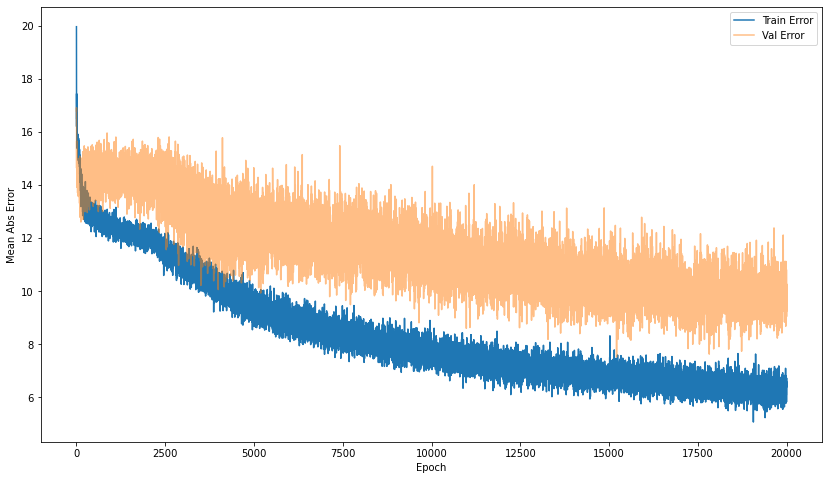

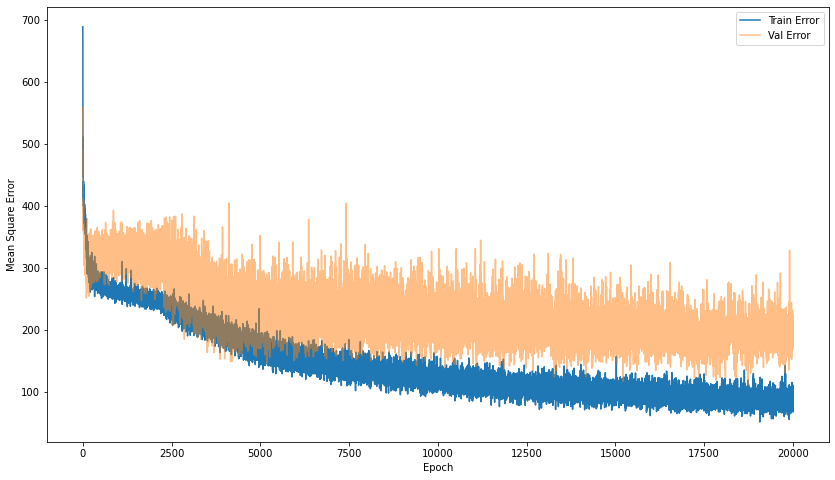

In [23]:
def plot_history(history: pd.DataFrame)-> None:
    
    plt.figure(figsize=(14,8))
    
    #plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error')
    plt.plot(hist['epoch'], hist['mae'], label = 'Train Error')
    plt.plot(hist['epoch'], hist['val_mae'], alpha=0.5, label='Val Error')
#     plt.ylim([0,10])
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(14,8))
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error')
    plt.plot(hist['epoch'], hist['mse'], label = 'Train Error')
    plt.plot(hist['epoch'], hist['val_mse'], alpha=0.5, label='Val Error')
#     plt.ylim([0,50])
    plt.legend()
    plt.show()
    
plot_history(history)

2/2 [==============================] - 0s 0s/step


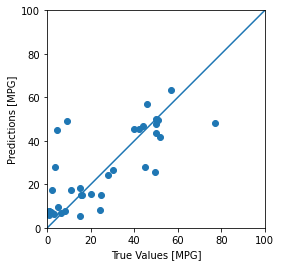

In [24]:
test_predictions = model.predict(test_pcc_1).flatten()
a = plt.axes(aspect = 'equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 100]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

2/2 [==============================] - 0s 8ms/step


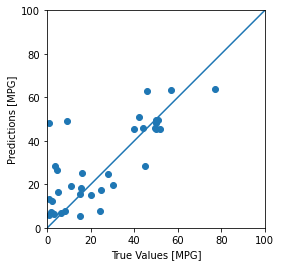

In [25]:
test_predictions = model.predict(test_pcc_1).flatten()
a = plt.axes(aspect = 'equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 100]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [26]:
yhats = [model.predict(test_pcc_1).flatten() for _ in range(100)]

2/2 [==============================] - 0s 0s/step


In [27]:
df1 = pd.DataFrame(yhats).T


In [28]:
df1.head()

0          1          2          3          4          5   \
0  47.787922  47.788490  48.106468  48.036015  48.160801  48.104156   
1  25.070841  21.939512  12.772907  16.895782  31.961315  12.496770   
2   7.014278   7.014069   6.503335   6.905436   7.012481   7.020279   
3  19.160801  16.887316  18.856529  18.455030  25.318935  17.171204   
4   9.891297  19.095955   9.660630  11.031972  10.839046  10.954103   

          6          7          8          9          10         11  \
0  48.143360  47.838177  48.234047  47.876247  48.223667  48.076344   
1  17.215870  14.971547  15.095534  17.146011  17.400263  17.823542   
2   6.915097   7.169313   7.230610   6.917438   7.495607   6.990762   
3  19.469313  17.550919  18.621529  21.029005  26.366344  18.307375   
4  27.069817   8.545092  26.626646   8.046244  17.648256  14.734382   

          12         13         14         15         16         17  \
0  48.071041  47.677559  48.340706  46.990147  48.187740  47.703876   
1  18.234945  31.928371  25.539173  24.806932  11.901242  19.291828   
2   7.107668   7.258083   7.414214   7.303110   7.744972   7.015621   
3  16.920418  18.133638  18.769035  19.177938  26.120054  19.707277   
4  13.338963  26.125084  34.702148  27.113932  10.789540  10.530862   

          18         19         20         21         22         23  \
0  47.989140  47.504490  47.763199  48.217930  47.972477  47.758396   
1  15.856571  29.823633  13.708029  19.357025  15.679307  19.152876   
2   7.379743   6.956472   7.044691   7.281755   6.718973   7.359476   
3  25.902901  17.442095  17.187374  17.642494  19.455332  20.607624   
4   9.643954  13.766765  15.733430  42.520065  17.413660  10.685285   

          24         25         26         27         28         29  \
0  47.946167  48.115807  48.062962  48.167576  48.342522  48.014420   
1  31.857758  13.842121  11.853421  26.896984  25.686596  17.656038   
2   6.988540   7.244053   6.939902   7.064897   7.267467   7.307863   
3  18.697287  19.254499  17.714846  17.171614  21.606710  18.219118   
4  15.890059  46.138054  10.377126  24.935602  36.067944  16.679138   

          30         31         32         33         34         35  \
0  47.830467  47.979996  48.032635  48.114803  47.720406  47.970783   
1  21.903547  16.389120  14.360618  21.332491  30.715357  11.070378   
2   7.285611   7.212269   7.161747   7.350268   6.723578   6.884127   
3  17.670496  20.389799  19.112936  20.385876  20.820452  15.166125   
4  15.336715   8.089561  42.403767  32.605122  22.399229  22.414606   

          36         37         38         39         40         41  \
0  47.850983  48.043663  47.930435  47.985630  47.818443  47.314621   
1  26.149080  13.873006  27.705622  17.809011  12.278800  31.005396   
2   6.895694   6.825619   7.170033   7.243617   7.334825   7.184902   
3  21.276861  18.302160  16.617392  19.572304  21.863779  20.592630   
4  27.374174  42.551266  12.742007  10.470050  21.392801  10.730575   

          42         43         44         45         46         47  \
0  47.685287  48.086994  48.336979  48.201946  48.014767  48.022114   
1  26.606894  15.641751  18.904949  12.822691  33.887512  33.311443   
2   6.823970   7.319605   7.119865   7.015382   7.378280   7.193372   
3  20.112555  18.453627  22.355032  13.632995  19.443632  18.126383   
4  24.808270   9.725743  11.069967   9.359608  22.211052   9.235094   

          48         49         50         51         52         53  \
0  47.986088  47.904457  47.368893  47.924629  47.739193  47.877735   
1  26.626068  17.593084  30.798140  26.050299  26.930910  16.448074   
2   6.980919   6.920884   7.270177   7.399206   7.284333   7.063622   
3  15.098844  19.260324  18.183704  19.580240  18.487558  16.338804   
4   9.992711  15.687552   9.394651  28.210890  12.057425  11.140546   

          54         55         56         57         58         59  \
0  47.966045  47.892326  47.804180  48.092831  47.991508  48.243458   
1  15.599886  18.605623  

# 7. Results Visualization

### 7.1 Error Plot

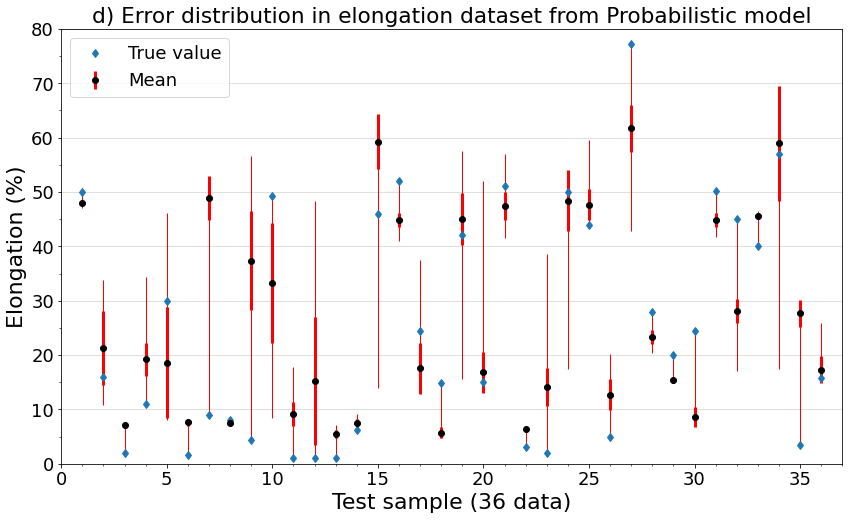

In [54]:
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import numpy as np
x=df1
#y_test=y_test.to_frame()
# construct some data like what you have:
#x = np.random.randn(100, 8)
mins = x.min(axis=1)
maxes = x.max(axis=1)

#means = y_test
means = x.mean(axis=1)

std = x.std(axis=1)

# create stacked errorbars:
plt.figure(figsize=(14,8))
plt.rcParams.update({'font.size': 18})

plt.errorbar(np.arange(start=1, stop=37, step=1), means, std, fmt='ok',ecolor='r', lw=3,  label="Mean",linestyle = 'None')
plt.errorbar(np.arange(start=1, stop=37, step=1), means, [means - mins, maxes - means],
             fmt='.k', ecolor='r', lw=1)
plt.plot(np.arange(start=1, stop=37, step=1),y_test, 'd', label="True value")
plt.xlim(0, 37)
plt.ylim(0, 80)

x_label = np.arange(0,37,5)
plt.xticks(x_label)

plt.gca().yaxis.set_minor_locator(tck.AutoMinorLocator(2))
plt.gca().xaxis.set_minor_locator(tck.AutoMinorLocator(5))

plt.xlabel('Test sample (36 data)',fontsize=22)
plt.ylabel('Elongation (%)',fontsize=22)
plt.title('d) Error distribution in elongation dataset from Probabilistic model')
plt.grid(True,axis='y',alpha=0.5)
#plt.grid(which='minor',axis='y',alpha=0.5)

#plt.legend(frameon=False,loc='upper right')
plt.legend(frameon=True, loc='upper left')


plt.savefig("plots\\elongation\\EL_probablistic_error.png",dpi=1200, bbox_inches='tight')
plt.show()

In [30]:
df1['y'] = y_test.values

In [31]:
df1

0          1          2          3          4          5  \
0   47.787922  47.788490  48.106468  48.036015  48.160801  48.104156   
1   25.070841  21.939512  12.772907  16.895782  31.961315  12.496770   
2    7.014278   7.014069   6.503335   6.905436   7.012481   7.020279   
3   19.160801  16.887316  18.856529  18.455030  25.318935  17.171204   
4    9.891297  19.095955   9.660630  11.031972  10.839046  10.954103   
5    7.806544   7.670378   7.645745   7.692688   7.563473   8.015251   
6   49.266174  49.232128  49.325237  49.346764  49.356388  49.417625   
7    7.597589   7.378406   7.215048   7.992008   7.261292   7.284230   
8   35.615902  38.001205  44.041126  43.310818  43.456776  46.337399   
9   46.469410  26.650316  23.849487  29.537075  45.538593  20.317118   
10  10.253599   8.004056   7.968745   8.217870   7.917303  12.148906   
11   9.816138   7.251200   8.123627  48.361206   8.077480  30.682528   
12   5.702609   5.382873   4.938736   5.862845   5.891726   5.312501   
13   7.614590   6.985812   8.215893   6.172902   7.927319   8.973587   
14  62.826015  62.230438  59.106205  55.436443  59.046093  56.760349   
15  44.862499  45.172970  40.994930  43.982647  47.286121  44.862343   
16  14.875543  15.823163  21.447580  14.977548  15.367400  13.892589   
17   5.367361   5.629074   5.371637   5.216516   5.620757   6.165299   
18  47.359219  48.258030  45.972759  45.551029  45.157497  40.953480   
19  16.082487  16.695982  16.886299  16.646048  16.534918  17.136110   
20  44.505840  45.186588  43.078808  51.046074  51.139347  45.543877   
21   6.344924   6.264745   5.909354   6.606779   6.445339   6.670757   
22  13.199004  12.777182  17.716507  13.859551  12.742738  28.330770   
23  48.815800  46.851814  50.585522  49.172077  45.685062  49.649403   
24  45.747902  54.092628  54.809902  46.161640  45.785461  51.089409   
25  17.186115  11.479436  11.440418  18.834553  11.104557  10.405602   
26  63.807026  60.671677  59.553474  45.704647  60.281456  61.030983   
27  24.185102  21.964325  21.676058  22.181540  23.878651  23.748314   
28  15.257556  15.243995  15.520164  15.181102  15.240533  15.205821   
29   9.263246   8.019026   7.558025  11.015868   8.395853   7.961013   
30  45.230633  45.355091  44.989216  45.897045  47.133381  41.843426   
31  28.429876  27.461523  28.424183  27.503416  27.883015  28.121048   
32  45.576694  45.647305  45.861393  45.710514  46.061466  45.509789   
33  61.850220  63.883846  61.629864  61.485764  63.925220  63.567417   
34  28.554218  27.477346  26.859209  27.190994  27.849991  27.768690   
35  15.454589  16.790140  17.781590  15.367593  15.855487  15.114133   

            6          7          8          9         10         11  \
0   48.143360  47.838177  48.234047  47.876247  48.223667  48.076344   
1   17.215870  14.971547  15.095534  17.146011  17.400263  17.823542   
2    6.915097   7.169313   7.230610   6.917438   7.495607   6.990762   
3   19.469313  17.550919  18.621529  21.029005  26.366344  18.307375   
4   27.069817   8.545092  26.626646   8.046244  17.648256  14.734382   
5    7.546336   7.590290   7.705998   7.692525   7.666189   7.670084   
6   49.320560  49.327705  49.222027  49.203236  49.383831  49.373577   
7    8.056323   7.192791   7.323001   7.214898   7.571383   7.352176   
8   44.111061  29.598312  42.803165  25.437943  30.053970  45.312569   
9   45.398235  24.763521  41.024105  19.136883  48.692905  26.246935   
10   9.601142   8.035157   8.198406   7.917682   8.966761   7.543596   
11   8.307271   7.909088   9.298269   7.520126  27.794168  13.413775   
12   5.284873   5.931446   5.818786   4.769550   5.663825   5.833444   
13   8.943097   6.736084   6.472264   8.100336   7.027308   7.362363   
14  59.371296  59.283550  61.748531  59.630184  61.361355  59.028080   
15  45.051235  45.388851  45.708279  45.265049  44.925201  43.843708   
16  15.287738  14.772560  18.477760  15.440476  29.730658  15.124762   
17   5.978585   5.036489   5.129703   5.276907   5.

In [32]:
import itertools

sample_preds = list(itertools.chain.from_iterable([[(j, x[-1]) for j in x if j != x[-1]] for x in df1.values]))

In [33]:
sample_preds[:15]

[(47.78792190551758, 50.0),
 (47.788490295410156, 50.0),
 (48.106468200683594, 50.0),
 (48.036014556884766, 50.0),
 (48.16080093383789, 50.0),
 (48.104156494140625, 50.0),
 (48.14336013793945, 50.0),
 (47.83817672729492, 50.0),
 (48.234046936035156, 50.0),
 (47.87624740600586, 50.0),
 (48.22366714477539, 50.0),
 (48.07634353637695, 50.0),
 (48.071041107177734, 50.0),
 (47.67755889892578, 50.0),
 (48.34070587158203, 50.0)]

## 7.2 Scatter Plot

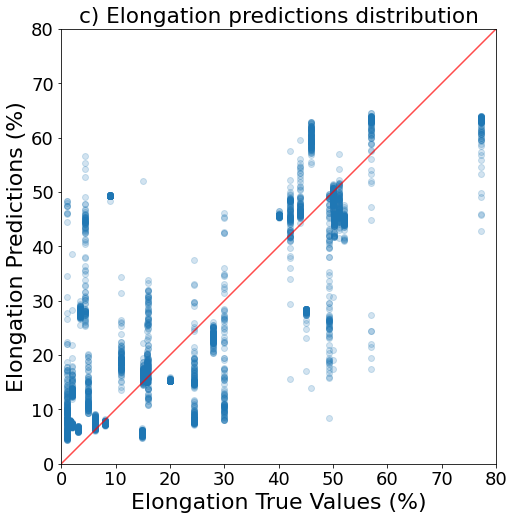

In [56]:
plt.figure(figsize=(8,8))
a = plt.axes(aspect = 'equal')
plt.scatter([x[1] for x in sample_preds], [x[0] for x in sample_preds],alpha=0.2)
plt.xlabel('Elongation True Values (%)',fontsize=22)
plt.ylabel('Elongation Predictions (%)',fontsize=22)
plt.title('c) Elongation predictions distribution')
lims = [0,80]
plt.xlim(lims)
plt.ylim(lims)
plt.rcParams.update({'font.size': 18})

_=plt.plot(lims, lims, color="r",alpha=0.7)
plt.savefig("plots\\elongation\\EL_probablistic_scatter-plot.png",dpi=1200, bbox_inches='tight')

2/2 [==============================] - 0s 16ms/step


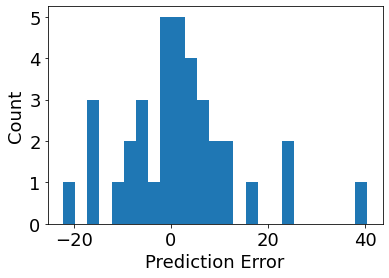

In [35]:
test_predictions = model.predict(test_pcc_1).flatten()
#test_predictions=test_predictions.reshape(69,1)

error = test_predictions - y_test
plt.hist(error, bins = 25)
plt.xlabel('Prediction Error')
_=plt.ylabel('Count')

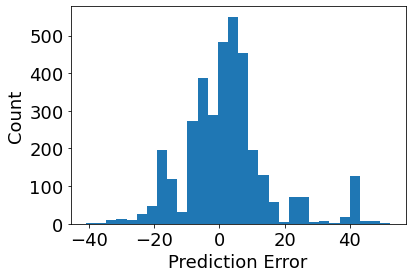

In [36]:
error = [x[0] - x[1] for x in sample_preds]
plt.hist(error, bins= 30)
plt.xlabel('Prediction Error')
_=plt.ylabel('Count')

2/2 [==============================] - 0s 0s/step


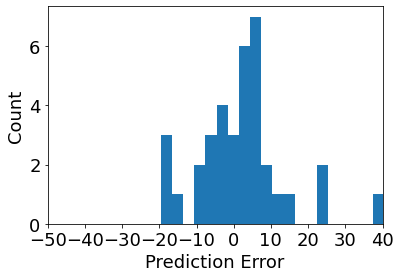

In [37]:
test_predictions = model.predict(test_pcc_1).flatten()
test_predictions=test_predictions.reshape(36,)
error = test_predictions - y_test
plt.hist(error, bins = 20)
plt.xlabel('Prediction Error')

x_label = np.arange(-50,50,10)
plt.xticks(x_label)
plt.xlim(-50, 40)
_=plt.ylabel('Count')

# 8. Results extraction in values

In [38]:
sd_pro = df1.std(axis=1)
mean_pro = df1.mean(axis=1)
min_pro = df1.min(axis=1)
max_pro = df1.max(axis=1)

In [39]:
test_real =pd.DataFrame(y_test.values)
test_real = pd.Series(test_real[0])

In [40]:
deviation_min_range = abs(mean_pro-min_pro)

deviation_max_range = abs(mean_pro-max_pro)

true_mean_deviation = abs(mean_pro-test_real)


In [41]:
print(max(sd_pro))
print(min(sd_pro))

11.789308286267769
0.23861853114959516


In [42]:
print(max(deviation_min_range))
print(max(deviation_max_range))

45.35215355146049
35.23642308641188


In [43]:
print(min(deviation_min_range))
print(min(deviation_max_range))

0.22838000495835153
0.4900918365705129


In [44]:
print(max(true_mean_deviation))
print(min(true_mean_deviation))

39.89467333803083
0.45330640585115667


In [45]:
import pandas as pd
df_result = pd.DataFrame(y_test.values,columns=["True"])
df_result['Mean']= mean_pro
df_result['SD']= sd_pro

df_result['Dev. from high'] = deviation_max_range
df_result['Dev. from low'] = deviation_min_range

df_result['Dev. from true'] = true_mean_deviation
#df_result["y"] = y_test.values

In [46]:
from IPython.display import display, HTML
df_result.index = np.arange(1,len(df_result)+1)
display(HTML(df_result.to_html()))


# $R^2$

In [47]:
import tensorflow_addons as tfa
y_true = np.array(y_test)
y_pred = np.array(model.predict(test_pcc_1).flatten())
y_pred=y_pred.reshape(36,)
metric = tfa.metrics.r_square.RSquare()
metric.update_state(y_true, y_pred)
result = metric.result()
result.numpy()


2/2 [==============================] - 0s 0s/step


0.6574092